## Waste Management Using CNN Model

In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define paths for training and testing datasets
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"


In [3]:
# Importing TensorFlow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [4]:
# Check if the train path exists and debug the directory structure
print("Train Path Exists:", os.path.exists(train_path))  # Should be True
print("Categories Found:", glob(train_path + '/*'))  # Debugging to see categories

Train Path Exists: True
Categories Found: ['dataset/TRAIN\\O', 'dataset/TRAIN\\R']


In [5]:
# Visualization
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    print("Category Path:", category)  # Debugging
    for file in tqdm(glob(category + '/*')):
        print("File Path:", file)  # Debugging
        img_array = cv2.imread(file)
        if img_array is not None:  # Ensure the image is read correctly
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            x_data.append(img_array)
            y_data.append(os.path.basename(category))  # Extract category name
        else:
            print("Error reading file:", file)

Category Path: dataset/TRAIN\O


  2%|▏         | 272/12565 [00:00<00:04, 2704.40it/s]

File Path: dataset/TRAIN\O\O_1.jpg
File Path: dataset/TRAIN\O\O_10.jpg
File Path: dataset/TRAIN\O\O_100.jpg
File Path: dataset/TRAIN\O\O_1000.jpg
File Path: dataset/TRAIN\O\O_10000.jpg
File Path: dataset/TRAIN\O\O_10001.jpg
File Path: dataset/TRAIN\O\O_10002.jpg
File Path: dataset/TRAIN\O\O_10003.jpg
File Path: dataset/TRAIN\O\O_10004.jpg
File Path: dataset/TRAIN\O\O_10005.jpg
File Path: dataset/TRAIN\O\O_10006.jpg
File Path: dataset/TRAIN\O\O_10007.jpg
File Path: dataset/TRAIN\O\O_10008.jpg
File Path: dataset/TRAIN\O\O_10009.jpg
File Path: dataset/TRAIN\O\O_1001.jpg
File Path: dataset/TRAIN\O\O_10010.jpg
File Path: dataset/TRAIN\O\O_10011.jpg
File Path: dataset/TRAIN\O\O_10012.jpg
File Path: dataset/TRAIN\O\O_10013.jpg
File Path: dataset/TRAIN\O\O_10014.jpg
File Path: dataset/TRAIN\O\O_10015.jpg
File Path: dataset/TRAIN\O\O_10016.jpg
File Path: dataset/TRAIN\O\O_10017.jpg
File Path: dataset/TRAIN\O\O_10018.jpg
File Path: dataset/TRAIN\O\O_10019.jpg
File Path: dataset/TRAIN\O\O_1002.jp

  6%|▋         | 803/12565 [00:00<00:04, 2572.92it/s]

File Path: dataset/TRAIN\O\O_10456.jpg
File Path: dataset/TRAIN\O\O_10457.jpg
File Path: dataset/TRAIN\O\O_10458.jpg
File Path: dataset/TRAIN\O\O_10459.jpg
File Path: dataset/TRAIN\O\O_1046.jpg
File Path: dataset/TRAIN\O\O_10460.jpg
File Path: dataset/TRAIN\O\O_10461.jpg
File Path: dataset/TRAIN\O\O_10462.jpg
File Path: dataset/TRAIN\O\O_10463.jpg
File Path: dataset/TRAIN\O\O_10464.jpg
File Path: dataset/TRAIN\O\O_10465.jpg
File Path: dataset/TRAIN\O\O_10466.jpg
File Path: dataset/TRAIN\O\O_10467.jpg
File Path: dataset/TRAIN\O\O_10468.jpg
File Path: dataset/TRAIN\O\O_10469.jpg
File Path: dataset/TRAIN\O\O_1047.jpg
File Path: dataset/TRAIN\O\O_10470.jpg
File Path: dataset/TRAIN\O\O_10471.jpg
File Path: dataset/TRAIN\O\O_10472.jpg
File Path: dataset/TRAIN\O\O_10473.jpg
File Path: dataset/TRAIN\O\O_10474.jpg
File Path: dataset/TRAIN\O\O_10475.jpg
File Path: dataset/TRAIN\O\O_10476.jpg
File Path: dataset/TRAIN\O\O_10477.jpg
File Path: dataset/TRAIN\O\O_10478.jpg
File Path: dataset/TRAIN\O\

  8%|▊         | 1061/12565 [00:00<00:04, 2550.14it/s]

File Path: dataset/TRAIN\O\O_10952.jpg
File Path: dataset/TRAIN\O\O_10953.jpg
File Path: dataset/TRAIN\O\O_10954.jpg
File Path: dataset/TRAIN\O\O_10955.jpg
File Path: dataset/TRAIN\O\O_10956.jpg
File Path: dataset/TRAIN\O\O_10957.jpg
File Path: dataset/TRAIN\O\O_10958.jpg
File Path: dataset/TRAIN\O\O_10959.jpg
File Path: dataset/TRAIN\O\O_1096.jpg
File Path: dataset/TRAIN\O\O_10960.jpg
File Path: dataset/TRAIN\O\O_10961.jpg
File Path: dataset/TRAIN\O\O_10962.jpg
File Path: dataset/TRAIN\O\O_10963.jpg
File Path: dataset/TRAIN\O\O_10964.jpg
File Path: dataset/TRAIN\O\O_10965.jpg
File Path: dataset/TRAIN\O\O_10966.jpg
File Path: dataset/TRAIN\O\O_10967.jpg
File Path: dataset/TRAIN\O\O_10968.jpg
File Path: dataset/TRAIN\O\O_10969.jpg
File Path: dataset/TRAIN\O\O_1097.jpg
File Path: dataset/TRAIN\O\O_10970.jpg
File Path: dataset/TRAIN\O\O_10971.jpg
File Path: dataset/TRAIN\O\O_10972.jpg
File Path: dataset/TRAIN\O\O_10973.jpg
File Path: dataset/TRAIN\O\O_10974.jpg
File Path: dataset/TRAIN\O\

 10%|█         | 1317/12565 [00:00<00:06, 1623.69it/s]

File Path: dataset/TRAIN\O\O_11177.jpg
File Path: dataset/TRAIN\O\O_11178.jpg
File Path: dataset/TRAIN\O\O_11179.jpg
File Path: dataset/TRAIN\O\O_1118.jpg
File Path: dataset/TRAIN\O\O_11180.jpg
File Path: dataset/TRAIN\O\O_11181.jpg
File Path: dataset/TRAIN\O\O_11182.jpg
File Path: dataset/TRAIN\O\O_11183.jpg
File Path: dataset/TRAIN\O\O_11184.jpg
File Path: dataset/TRAIN\O\O_11185.jpg
File Path: dataset/TRAIN\O\O_11186.jpg
File Path: dataset/TRAIN\O\O_11187.jpg
File Path: dataset/TRAIN\O\O_11188.jpg
File Path: dataset/TRAIN\O\O_11189.jpg
File Path: dataset/TRAIN\O\O_1119.jpg
File Path: dataset/TRAIN\O\O_11190.jpg
File Path: dataset/TRAIN\O\O_11191.jpg
File Path: dataset/TRAIN\O\O_11192.jpg
File Path: dataset/TRAIN\O\O_11193.jpg
File Path: dataset/TRAIN\O\O_11194.jpg
File Path: dataset/TRAIN\O\O_11195.jpg
File Path: dataset/TRAIN\O\O_11196.jpg
File Path: dataset/TRAIN\O\O_11197.jpg
File Path: dataset/TRAIN\O\O_11198.jpg
File Path: dataset/TRAIN\O\O_11199.jpg
File Path: dataset/TRAIN\O\

 12%|█▏        | 1516/12565 [00:01<00:12, 873.04it/s] 

File Path: dataset/TRAIN\O\O_11313.jpg
File Path: dataset/TRAIN\O\O_11314.jpg
File Path: dataset/TRAIN\O\O_11315.jpg
File Path: dataset/TRAIN\O\O_11316.jpg
File Path: dataset/TRAIN\O\O_11317.jpg
File Path: dataset/TRAIN\O\O_11318.jpg
File Path: dataset/TRAIN\O\O_11319.jpg
File Path: dataset/TRAIN\O\O_1132.jpg
File Path: dataset/TRAIN\O\O_11320.jpg
File Path: dataset/TRAIN\O\O_11321.jpg
File Path: dataset/TRAIN\O\O_11322.jpg
File Path: dataset/TRAIN\O\O_11323.jpg
File Path: dataset/TRAIN\O\O_11324.jpg
File Path: dataset/TRAIN\O\O_11325.jpg
File Path: dataset/TRAIN\O\O_11326.jpg
File Path: dataset/TRAIN\O\O_11327.jpg
File Path: dataset/TRAIN\O\O_11328.jpg
File Path: dataset/TRAIN\O\O_11329.jpg
File Path: dataset/TRAIN\O\O_1133.jpg
File Path: dataset/TRAIN\O\O_11330.jpg
File Path: dataset/TRAIN\O\O_11331.jpg
File Path: dataset/TRAIN\O\O_11332.jpg
File Path: dataset/TRAIN\O\O_11333.jpg
File Path: dataset/TRAIN\O\O_11334.jpg
File Path: dataset/TRAIN\O\O_11335.jpg
File Path: dataset/TRAIN\O\

 13%|█▎        | 1661/12565 [00:01<00:14, 759.58it/s]

File Path: dataset/TRAIN\O\O_11485.jpg
File Path: dataset/TRAIN\O\O_11486.jpg
File Path: dataset/TRAIN\O\O_11487.jpg
File Path: dataset/TRAIN\O\O_11488.jpg
File Path: dataset/TRAIN\O\O_11489.jpg
File Path: dataset/TRAIN\O\O_1149.jpg
File Path: dataset/TRAIN\O\O_11490.jpg
File Path: dataset/TRAIN\O\O_11491.jpg
File Path: dataset/TRAIN\O\O_11492.jpg
File Path: dataset/TRAIN\O\O_11493.jpg
File Path: dataset/TRAIN\O\O_11494.jpg
File Path: dataset/TRAIN\O\O_11495.jpg
File Path: dataset/TRAIN\O\O_11496.jpg
File Path: dataset/TRAIN\O\O_11497.jpg
File Path: dataset/TRAIN\O\O_11498.jpg
File Path: dataset/TRAIN\O\O_11499.jpg
File Path: dataset/TRAIN\O\O_115.jpg
File Path: dataset/TRAIN\O\O_1150.jpg
File Path: dataset/TRAIN\O\O_11500.jpg
File Path: dataset/TRAIN\O\O_11501.jpg
File Path: dataset/TRAIN\O\O_11502.jpg
File Path: dataset/TRAIN\O\O_11503.jpg
File Path: dataset/TRAIN\O\O_11504.jpg
File Path: dataset/TRAIN\O\O_11505.jpg
File Path: dataset/TRAIN\O\O_11506.jpg
File Path: dataset/TRAIN\O\O_

 15%|█▍        | 1873/12565 [00:01<00:16, 650.65it/s]

File Path: dataset/TRAIN\O\O_11597.jpg
File Path: dataset/TRAIN\O\O_11598.jpg
File Path: dataset/TRAIN\O\O_11599.jpg
File Path: dataset/TRAIN\O\O_116.jpg
File Path: dataset/TRAIN\O\O_1160.jpg
File Path: dataset/TRAIN\O\O_11600.jpg
File Path: dataset/TRAIN\O\O_11601.jpg
File Path: dataset/TRAIN\O\O_11602.jpg
File Path: dataset/TRAIN\O\O_11603.jpg
File Path: dataset/TRAIN\O\O_11604.jpg
File Path: dataset/TRAIN\O\O_11605.jpg
File Path: dataset/TRAIN\O\O_11606.jpg
File Path: dataset/TRAIN\O\O_11607.jpg
File Path: dataset/TRAIN\O\O_11608.jpg
File Path: dataset/TRAIN\O\O_11609.jpg
File Path: dataset/TRAIN\O\O_1161.jpg
File Path: dataset/TRAIN\O\O_11610.jpg
File Path: dataset/TRAIN\O\O_11611.jpg
File Path: dataset/TRAIN\O\O_11612.jpg
File Path: dataset/TRAIN\O\O_11613.jpg
File Path: dataset/TRAIN\O\O_11614.jpg
File Path: dataset/TRAIN\O\O_11615.jpg
File Path: dataset/TRAIN\O\O_11616.jpg
File Path: dataset/TRAIN\O\O_11617.jpg
File Path: dataset/TRAIN\O\O_11618.jpg
File Path: dataset/TRAIN\O\O_

 16%|█▌        | 1955/12565 [00:02<00:18, 583.37it/s]

File Path: dataset/TRAIN\O\O_11684.jpg
File Path: dataset/TRAIN\O\O_11685.jpg
File Path: dataset/TRAIN\O\O_11686.jpg
File Path: dataset/TRAIN\O\O_11687.jpg
File Path: dataset/TRAIN\O\O_11688.jpg
File Path: dataset/TRAIN\O\O_11689.jpg
File Path: dataset/TRAIN\O\O_1169.jpg
File Path: dataset/TRAIN\O\O_11690.jpg
File Path: dataset/TRAIN\O\O_11691.jpg
File Path: dataset/TRAIN\O\O_11692.jpg
File Path: dataset/TRAIN\O\O_11693.jpg
File Path: dataset/TRAIN\O\O_11694.jpg
File Path: dataset/TRAIN\O\O_11695.jpg
File Path: dataset/TRAIN\O\O_11696.jpg
File Path: dataset/TRAIN\O\O_11697.jpg
File Path: dataset/TRAIN\O\O_11698.jpg
File Path: dataset/TRAIN\O\O_11699.jpg
File Path: dataset/TRAIN\O\O_117.jpg
File Path: dataset/TRAIN\O\O_1170.jpg
File Path: dataset/TRAIN\O\O_11700.jpg
File Path: dataset/TRAIN\O\O_11701.jpg
File Path: dataset/TRAIN\O\O_11702.jpg
File Path: dataset/TRAIN\O\O_11703.jpg
File Path: dataset/TRAIN\O\O_11704.jpg
File Path: dataset/TRAIN\O\O_11705.jpg
File Path: dataset/TRAIN\O\O_

 16%|█▌        | 2024/12565 [00:02<00:18, 561.90it/s]

File Path: dataset/TRAIN\O\O_11758.jpg
File Path: dataset/TRAIN\O\O_11759.jpg
File Path: dataset/TRAIN\O\O_1176.jpg
File Path: dataset/TRAIN\O\O_11760.jpg
File Path: dataset/TRAIN\O\O_11761.jpg
File Path: dataset/TRAIN\O\O_11762.jpg
File Path: dataset/TRAIN\O\O_11763.jpg
File Path: dataset/TRAIN\O\O_11764.jpg
File Path: dataset/TRAIN\O\O_11765.jpg
File Path: dataset/TRAIN\O\O_11766.jpg
File Path: dataset/TRAIN\O\O_11767.jpg
File Path: dataset/TRAIN\O\O_11768.jpg
File Path: dataset/TRAIN\O\O_11769.jpg
File Path: dataset/TRAIN\O\O_1177.jpg
File Path: dataset/TRAIN\O\O_11770.jpg
File Path: dataset/TRAIN\O\O_11771.jpg
File Path: dataset/TRAIN\O\O_11772.jpg
File Path: dataset/TRAIN\O\O_11773.jpg
File Path: dataset/TRAIN\O\O_11774.jpg
File Path: dataset/TRAIN\O\O_11775.jpg
File Path: dataset/TRAIN\O\O_11776.jpg
File Path: dataset/TRAIN\O\O_11777.jpg
File Path: dataset/TRAIN\O\O_11778.jpg
File Path: dataset/TRAIN\O\O_11779.jpg
File Path: dataset/TRAIN\O\O_1178.jpg
File Path: dataset/TRAIN\O\O

 17%|█▋        | 2087/12565 [00:02<00:19, 533.93it/s]

File Path: dataset/TRAIN\O\O_11835.jpg
File Path: dataset/TRAIN\O\O_11836.jpg
File Path: dataset/TRAIN\O\O_11837.jpg
File Path: dataset/TRAIN\O\O_11838.jpg
File Path: dataset/TRAIN\O\O_11839.jpg
File Path: dataset/TRAIN\O\O_1184.jpg
File Path: dataset/TRAIN\O\O_11840.jpg
File Path: dataset/TRAIN\O\O_11841.jpg
File Path: dataset/TRAIN\O\O_11842.jpg
File Path: dataset/TRAIN\O\O_11843.jpg
File Path: dataset/TRAIN\O\O_11844.jpg
File Path: dataset/TRAIN\O\O_11845.jpg
File Path: dataset/TRAIN\O\O_11846.jpg
File Path: dataset/TRAIN\O\O_11847.jpg
File Path: dataset/TRAIN\O\O_11848.jpg
File Path: dataset/TRAIN\O\O_11849.jpg
File Path: dataset/TRAIN\O\O_1185.jpg
File Path: dataset/TRAIN\O\O_11850.jpg
File Path: dataset/TRAIN\O\O_11851.jpg
File Path: dataset/TRAIN\O\O_11852.jpg
File Path: dataset/TRAIN\O\O_11853.jpg
File Path: dataset/TRAIN\O\O_11854.jpg
File Path: dataset/TRAIN\O\O_11855.jpg
File Path: dataset/TRAIN\O\O_11856.jpg
File Path: dataset/TRAIN\O\O_11857.jpg
File Path: dataset/TRAIN\O\

 17%|█▋        | 2145/12565 [00:02<00:22, 468.03it/s]

File Path: dataset/TRAIN\O\O_11912.jpg
File Path: dataset/TRAIN\O\O_11913.jpg
File Path: dataset/TRAIN\O\O_11914.jpg
File Path: dataset/TRAIN\O\O_11915.jpg
File Path: dataset/TRAIN\O\O_11916.jpg
File Path: dataset/TRAIN\O\O_11917.jpg
File Path: dataset/TRAIN\O\O_11918.jpg
File Path: dataset/TRAIN\O\O_11919.jpg
File Path: dataset/TRAIN\O\O_1192.jpg
File Path: dataset/TRAIN\O\O_11920.jpg
File Path: dataset/TRAIN\O\O_11921.jpg
File Path: dataset/TRAIN\O\O_11922.jpg
File Path: dataset/TRAIN\O\O_11923.jpg
File Path: dataset/TRAIN\O\O_11924.jpg
File Path: dataset/TRAIN\O\O_11925.jpg
File Path: dataset/TRAIN\O\O_11926.jpg
File Path: dataset/TRAIN\O\O_11927.jpg
File Path: dataset/TRAIN\O\O_11928.jpg
File Path: dataset/TRAIN\O\O_11929.jpg
File Path: dataset/TRAIN\O\O_1193.jpg
File Path: dataset/TRAIN\O\O_11930.jpg
File Path: dataset/TRAIN\O\O_11931.jpg
File Path: dataset/TRAIN\O\O_11932.jpg
File Path: dataset/TRAIN\O\O_11933.jpg
File Path: dataset/TRAIN\O\O_11934.jpg
File Path: dataset/TRAIN\O\

 18%|█▊        | 2262/12565 [00:02<00:21, 473.08it/s]

File Path: dataset/TRAIN\O\O_11970.jpg
File Path: dataset/TRAIN\O\O_11971.jpg
File Path: dataset/TRAIN\O\O_11972.jpg
File Path: dataset/TRAIN\O\O_11973.jpg
File Path: dataset/TRAIN\O\O_11974.jpg
File Path: dataset/TRAIN\O\O_11975.jpg
File Path: dataset/TRAIN\O\O_11976.jpg
File Path: dataset/TRAIN\O\O_11977.jpg
File Path: dataset/TRAIN\O\O_11978.jpg
File Path: dataset/TRAIN\O\O_11979.jpg
File Path: dataset/TRAIN\O\O_1198.jpg
File Path: dataset/TRAIN\O\O_11980.jpg
File Path: dataset/TRAIN\O\O_11981.jpg
File Path: dataset/TRAIN\O\O_11982.jpg
File Path: dataset/TRAIN\O\O_11983.jpg
File Path: dataset/TRAIN\O\O_11984.jpg
File Path: dataset/TRAIN\O\O_11985.jpg
File Path: dataset/TRAIN\O\O_11986.jpg
File Path: dataset/TRAIN\O\O_11987.jpg
File Path: dataset/TRAIN\O\O_11988.jpg
File Path: dataset/TRAIN\O\O_11989.jpg
File Path: dataset/TRAIN\O\O_1199.jpg
File Path: dataset/TRAIN\O\O_11990.jpg
File Path: dataset/TRAIN\O\O_11991.jpg
File Path: dataset/TRAIN\O\O_11992.jpg
File Path: dataset/TRAIN\O\

 18%|█▊        | 2313/12565 [00:02<00:24, 417.82it/s]

File Path: dataset/TRAIN\O\O_12045.jpg
File Path: dataset/TRAIN\O\O_12046.jpg
File Path: dataset/TRAIN\O\O_12047.jpg
File Path: dataset/TRAIN\O\O_12048.jpg
File Path: dataset/TRAIN\O\O_12049.jpg
File Path: dataset/TRAIN\O\O_1205.jpg
File Path: dataset/TRAIN\O\O_12050.jpg
File Path: dataset/TRAIN\O\O_12051.jpg
File Path: dataset/TRAIN\O\O_12052.jpg
File Path: dataset/TRAIN\O\O_12053.jpg
File Path: dataset/TRAIN\O\O_12054.jpg
File Path: dataset/TRAIN\O\O_12055.jpg
File Path: dataset/TRAIN\O\O_12056.jpg
File Path: dataset/TRAIN\O\O_12057.jpg
File Path: dataset/TRAIN\O\O_12058.jpg
File Path: dataset/TRAIN\O\O_12059.jpg
File Path: dataset/TRAIN\O\O_1206.jpg
File Path: dataset/TRAIN\O\O_12060.jpg
File Path: dataset/TRAIN\O\O_12061.jpg
File Path: dataset/TRAIN\O\O_12062.jpg
File Path: dataset/TRAIN\O\O_12063.jpg
File Path: dataset/TRAIN\O\O_12064.jpg
File Path: dataset/TRAIN\O\O_12065.jpg
File Path: dataset/TRAIN\O\O_12066.jpg
File Path: dataset/TRAIN\O\O_12067.jpg
File Path: dataset/TRAIN\O\

 19%|█▉        | 2410/12565 [00:03<00:24, 418.56it/s]

File Path: dataset/TRAIN\O\O_12114.jpg
File Path: dataset/TRAIN\O\O_12115.jpg
File Path: dataset/TRAIN\O\O_12116.jpg
File Path: dataset/TRAIN\O\O_12117.jpg
File Path: dataset/TRAIN\O\O_12118.jpg
File Path: dataset/TRAIN\O\O_12119.jpg
File Path: dataset/TRAIN\O\O_1212.jpg
File Path: dataset/TRAIN\O\O_12120.jpg
File Path: dataset/TRAIN\O\O_12121.jpg
File Path: dataset/TRAIN\O\O_12122.jpg
File Path: dataset/TRAIN\O\O_12123.jpg
File Path: dataset/TRAIN\O\O_12124.jpg
File Path: dataset/TRAIN\O\O_12125.jpg
File Path: dataset/TRAIN\O\O_12126.jpg
File Path: dataset/TRAIN\O\O_12127.jpg
File Path: dataset/TRAIN\O\O_12128.jpg
File Path: dataset/TRAIN\O\O_12129.jpg
File Path: dataset/TRAIN\O\O_1213.jpg
File Path: dataset/TRAIN\O\O_12130.jpg
File Path: dataset/TRAIN\O\O_12131.jpg
File Path: dataset/TRAIN\O\O_12132.jpg
File Path: dataset/TRAIN\O\O_12133.jpg
File Path: dataset/TRAIN\O\O_12134.jpg
File Path: dataset/TRAIN\O\O_12135.jpg
File Path: dataset/TRAIN\O\O_12136.jpg
File Path: dataset/TRAIN\O\

 20%|█▉        | 2474/12565 [00:03<00:21, 468.60it/s]

File Path: dataset/TRAIN\O\O_12224.jpg
File Path: dataset/TRAIN\O\O_12225.jpg
File Path: dataset/TRAIN\O\O_12226.jpg
File Path: dataset/TRAIN\O\O_12227.jpg
File Path: dataset/TRAIN\O\O_12228.jpg
File Path: dataset/TRAIN\O\O_12229.jpg
File Path: dataset/TRAIN\O\O_1223.jpg
File Path: dataset/TRAIN\O\O_12230.jpg
File Path: dataset/TRAIN\O\O_12231.jpg
File Path: dataset/TRAIN\O\O_12232.jpg
File Path: dataset/TRAIN\O\O_12233.jpg
File Path: dataset/TRAIN\O\O_12234.jpg
File Path: dataset/TRAIN\O\O_12235.jpg
File Path: dataset/TRAIN\O\O_12236.jpg
File Path: dataset/TRAIN\O\O_12237.jpg
File Path: dataset/TRAIN\O\O_12238.jpg
File Path: dataset/TRAIN\O\O_12239.jpg
File Path: dataset/TRAIN\O\O_1224.jpg
File Path: dataset/TRAIN\O\O_12240.jpg
File Path: dataset/TRAIN\O\O_12241.jpg
File Path: dataset/TRAIN\O\O_12242.jpg
File Path: dataset/TRAIN\O\O_12243.jpg
File Path: dataset/TRAIN\O\O_12244.jpg
File Path: dataset/TRAIN\O\O_12245.jpg
File Path: dataset/TRAIN\O\O_12246.jpg
File Path: dataset/TRAIN\O\

 21%|██        | 2594/12565 [00:03<00:23, 426.94it/s]

File Path: dataset/TRAIN\O\O_12266.jpg
File Path: dataset/TRAIN\O\O_12267.jpg
File Path: dataset/TRAIN\O\O_12268.jpg
File Path: dataset/TRAIN\O\O_12269.jpg
File Path: dataset/TRAIN\O\O_1227.jpg
File Path: dataset/TRAIN\O\O_12270.jpg
File Path: dataset/TRAIN\O\O_12271.jpg
File Path: dataset/TRAIN\O\O_12272.jpg
File Path: dataset/TRAIN\O\O_12273.jpg
File Path: dataset/TRAIN\O\O_12274.jpg
File Path: dataset/TRAIN\O\O_12275.jpg
File Path: dataset/TRAIN\O\O_12276.jpg
File Path: dataset/TRAIN\O\O_12277.jpg
File Path: dataset/TRAIN\O\O_12278.jpg
File Path: dataset/TRAIN\O\O_12279.jpg
File Path: dataset/TRAIN\O\O_1228.jpg
File Path: dataset/TRAIN\O\O_12280.jpg
File Path: dataset/TRAIN\O\O_12281.jpg
File Path: dataset/TRAIN\O\O_12282.jpg
File Path: dataset/TRAIN\O\O_12283.jpg
File Path: dataset/TRAIN\O\O_12284.jpg
File Path: dataset/TRAIN\O\O_12285.jpg
File Path: dataset/TRAIN\O\O_12286.jpg
File Path: dataset/TRAIN\O\O_12287.jpg
File Path: dataset/TRAIN\O\O_12288.jpg
File Path: dataset/TRAIN\O\

 22%|██▏       | 2705/12565 [00:03<00:20, 476.22it/s]

File Path: dataset/TRAIN\O\O_12350.jpg
File Path: dataset/TRAIN\O\O_12351.jpg
File Path: dataset/TRAIN\O\O_12352.jpg
File Path: dataset/TRAIN\O\O_12353.jpg
File Path: dataset/TRAIN\O\O_12354.jpg
File Path: dataset/TRAIN\O\O_12355.jpg
File Path: dataset/TRAIN\O\O_12356.jpg
File Path: dataset/TRAIN\O\O_12357.jpg
File Path: dataset/TRAIN\O\O_12358.jpg
File Path: dataset/TRAIN\O\O_12359.jpg
File Path: dataset/TRAIN\O\O_1236.jpg
File Path: dataset/TRAIN\O\O_12360.jpg
File Path: dataset/TRAIN\O\O_12361.jpg
File Path: dataset/TRAIN\O\O_12362.jpg
File Path: dataset/TRAIN\O\O_12363.jpg
File Path: dataset/TRAIN\O\O_12364.jpg
File Path: dataset/TRAIN\O\O_12365.jpg
File Path: dataset/TRAIN\O\O_12366.jpg
File Path: dataset/TRAIN\O\O_12367.jpg
File Path: dataset/TRAIN\O\O_12368.jpg
File Path: dataset/TRAIN\O\O_12369.jpg
File Path: dataset/TRAIN\O\O_1237.jpg
File Path: dataset/TRAIN\O\O_12370.jpg
File Path: dataset/TRAIN\O\O_12371.jpg
File Path: dataset/TRAIN\O\O_12372.jpg
File Path: dataset/TRAIN\O\

 22%|██▏       | 2757/12565 [00:04<00:25, 381.15it/s]

File Path: dataset/TRAIN\O\O_12439.jpg
File Path: dataset/TRAIN\O\O_1244.jpg
File Path: dataset/TRAIN\O\O_12440.jpg
File Path: dataset/TRAIN\O\O_12441.jpg
File Path: dataset/TRAIN\O\O_12442.jpg
File Path: dataset/TRAIN\O\O_12443.jpg
File Path: dataset/TRAIN\O\O_12444.jpg
File Path: dataset/TRAIN\O\O_12445.jpg
File Path: dataset/TRAIN\O\O_12446.jpg
File Path: dataset/TRAIN\O\O_12447.jpg
File Path: dataset/TRAIN\O\O_12448.jpg
File Path: dataset/TRAIN\O\O_12449.jpg
File Path: dataset/TRAIN\O\O_1245.jpg
File Path: dataset/TRAIN\O\O_12450.jpg
File Path: dataset/TRAIN\O\O_12451.jpg
File Path: dataset/TRAIN\O\O_12452.jpg
File Path: dataset/TRAIN\O\O_12453.jpg
File Path: dataset/TRAIN\O\O_12454.jpg
File Path: dataset/TRAIN\O\O_12455.jpg
File Path: dataset/TRAIN\O\O_12456.jpg
File Path: dataset/TRAIN\O\O_12457.jpg
File Path: dataset/TRAIN\O\O_12458.jpg
File Path: dataset/TRAIN\O\O_12459.jpg
File Path: dataset/TRAIN\O\O_1246.jpg
File Path: dataset/TRAIN\O\O_12460.jpg
File Path: dataset/TRAIN\O\O

 22%|██▏       | 2801/12565 [00:04<00:29, 330.89it/s]

File Path: dataset/TRAIN\O\O_12491.jpg
File Path: dataset/TRAIN\O\O_12492.jpg
File Path: dataset/TRAIN\O\O_12493.jpg
File Path: dataset/TRAIN\O\O_12494.jpg
File Path: dataset/TRAIN\O\O_12495.jpg
File Path: dataset/TRAIN\O\O_12496.jpg
File Path: dataset/TRAIN\O\O_12497.jpg
File Path: dataset/TRAIN\O\O_12498.jpg
File Path: dataset/TRAIN\O\O_12499.jpg
File Path: dataset/TRAIN\O\O_125.jpg
File Path: dataset/TRAIN\O\O_1250.jpg
File Path: dataset/TRAIN\O\O_12500.jpg
File Path: dataset/TRAIN\O\O_12501.jpg
File Path: dataset/TRAIN\O\O_12502.jpg
File Path: dataset/TRAIN\O\O_12503.jpg
File Path: dataset/TRAIN\O\O_12504.jpg
File Path: dataset/TRAIN\O\O_12505.jpg
File Path: dataset/TRAIN\O\O_12506.jpg
File Path: dataset/TRAIN\O\O_12507.jpg
File Path: dataset/TRAIN\O\O_12508.jpg
File Path: dataset/TRAIN\O\O_12509.jpg
File Path: dataset/TRAIN\O\O_1251.jpg
File Path: dataset/TRAIN\O\O_12510.jpg
File Path: dataset/TRAIN\O\O_12511.jpg
File Path: dataset/TRAIN\O\O_12512.jpg
File Path: dataset/TRAIN\O\O_

 23%|██▎       | 2867/12565 [00:04<00:24, 400.52it/s]

File Path: dataset/TRAIN\O\O_12565.jpg
File Path: dataset/TRAIN\O\O_12566.jpg
File Path: dataset/TRAIN\O\O_12567.jpg
File Path: dataset/TRAIN\O\O_1257.jpg
File Path: dataset/TRAIN\O\O_1258.jpg
File Path: dataset/TRAIN\O\O_1259.jpg
File Path: dataset/TRAIN\O\O_126.jpg
File Path: dataset/TRAIN\O\O_1260.jpg
File Path: dataset/TRAIN\O\O_1261.jpg
File Path: dataset/TRAIN\O\O_1262.jpg
File Path: dataset/TRAIN\O\O_1263.jpg
File Path: dataset/TRAIN\O\O_1264.jpg
File Path: dataset/TRAIN\O\O_1265.jpg
File Path: dataset/TRAIN\O\O_1266.jpg
File Path: dataset/TRAIN\O\O_1267.jpg
File Path: dataset/TRAIN\O\O_1268.jpg
File Path: dataset/TRAIN\O\O_1269.jpg
File Path: dataset/TRAIN\O\O_127.jpg
File Path: dataset/TRAIN\O\O_1270.jpg
File Path: dataset/TRAIN\O\O_1271.jpg
File Path: dataset/TRAIN\O\O_1272.jpg
File Path: dataset/TRAIN\O\O_1273.jpg
File Path: dataset/TRAIN\O\O_1274.jpg
File Path: dataset/TRAIN\O\O_1275.jpg
File Path: dataset/TRAIN\O\O_1276.jpg
File Path: dataset/TRAIN\O\O_1277.jpg
File Path: 

 24%|██▎       | 2970/12565 [00:04<00:25, 383.39it/s]

File Path: dataset/TRAIN\O\O_1306.jpg
File Path: dataset/TRAIN\O\O_1307.jpg
File Path: dataset/TRAIN\O\O_1308.jpg
File Path: dataset/TRAIN\O\O_1309.jpg
File Path: dataset/TRAIN\O\O_131.jpg
File Path: dataset/TRAIN\O\O_1310.jpg
File Path: dataset/TRAIN\O\O_1311.jpg
File Path: dataset/TRAIN\O\O_1312.jpg
File Path: dataset/TRAIN\O\O_1313.jpg
File Path: dataset/TRAIN\O\O_1314.jpg
File Path: dataset/TRAIN\O\O_1315.jpg
File Path: dataset/TRAIN\O\O_1316.jpg
File Path: dataset/TRAIN\O\O_1317.jpg
File Path: dataset/TRAIN\O\O_1318.jpg
File Path: dataset/TRAIN\O\O_1319.jpg
File Path: dataset/TRAIN\O\O_132.jpg
File Path: dataset/TRAIN\O\O_1320.jpg
File Path: dataset/TRAIN\O\O_1321.jpg
File Path: dataset/TRAIN\O\O_1322.jpg
File Path: dataset/TRAIN\O\O_1323.jpg
File Path: dataset/TRAIN\O\O_1324.jpg
File Path: dataset/TRAIN\O\O_1325.jpg
File Path: dataset/TRAIN\O\O_1326.jpg
File Path: dataset/TRAIN\O\O_1327.jpg
File Path: dataset/TRAIN\O\O_1328.jpg
File Path: dataset/TRAIN\O\O_1329.jpg
File Path: dat

 25%|██▍       | 3084/12565 [00:04<00:20, 469.88it/s]

File Path: dataset/TRAIN\O\O_140.jpg
File Path: dataset/TRAIN\O\O_1400.jpg
File Path: dataset/TRAIN\O\O_1401.jpg
File Path: dataset/TRAIN\O\O_1402.jpg
File Path: dataset/TRAIN\O\O_1403.jpg
File Path: dataset/TRAIN\O\O_1404.jpg
File Path: dataset/TRAIN\O\O_1405.jpg
File Path: dataset/TRAIN\O\O_1406.jpg
File Path: dataset/TRAIN\O\O_1407.jpg
File Path: dataset/TRAIN\O\O_1408.jpg
File Path: dataset/TRAIN\O\O_1409.jpg
File Path: dataset/TRAIN\O\O_141.jpg
File Path: dataset/TRAIN\O\O_1410.jpg
File Path: dataset/TRAIN\O\O_1411.jpg
File Path: dataset/TRAIN\O\O_1412.jpg
File Path: dataset/TRAIN\O\O_1413.jpg
File Path: dataset/TRAIN\O\O_1414.jpg
File Path: dataset/TRAIN\O\O_1415.jpg
File Path: dataset/TRAIN\O\O_1416.jpg
File Path: dataset/TRAIN\O\O_1417.jpg
File Path: dataset/TRAIN\O\O_1418.jpg
File Path: dataset/TRAIN\O\O_1419.jpg
File Path: dataset/TRAIN\O\O_142.jpg
File Path: dataset/TRAIN\O\O_1420.jpg
File Path: dataset/TRAIN\O\O_1421.jpg
File Path: dataset/TRAIN\O\O_1422.jpg
File Path: data

 25%|██▍       | 3136/12565 [00:04<00:21, 437.73it/s]

File Path: dataset/TRAIN\O\O_1488.jpg
File Path: dataset/TRAIN\O\O_1489.jpg
File Path: dataset/TRAIN\O\O_149.jpg
File Path: dataset/TRAIN\O\O_1490.jpg
File Path: dataset/TRAIN\O\O_1491.jpg
File Path: dataset/TRAIN\O\O_1492.jpg
File Path: dataset/TRAIN\O\O_1493.jpg
File Path: dataset/TRAIN\O\O_1494.jpg
File Path: dataset/TRAIN\O\O_1495.jpg
File Path: dataset/TRAIN\O\O_1496.jpg
File Path: dataset/TRAIN\O\O_1497.jpg
File Path: dataset/TRAIN\O\O_1498.jpg
File Path: dataset/TRAIN\O\O_1499.jpg
File Path: dataset/TRAIN\O\O_15.jpg
File Path: dataset/TRAIN\O\O_150.jpg
File Path: dataset/TRAIN\O\O_1500.jpg
File Path: dataset/TRAIN\O\O_1501.jpg
File Path: dataset/TRAIN\O\O_1502.jpg
File Path: dataset/TRAIN\O\O_1503.jpg
File Path: dataset/TRAIN\O\O_1504.jpg
File Path: dataset/TRAIN\O\O_1505.jpg
File Path: dataset/TRAIN\O\O_1506.jpg
File Path: dataset/TRAIN\O\O_1507.jpg
File Path: dataset/TRAIN\O\O_1508.jpg
File Path: dataset/TRAIN\O\O_1509.jpg
File Path: dataset/TRAIN\O\O_151.jpg
File Path: datase

 26%|██▌       | 3228/12565 [00:05<00:24, 381.51it/s]

File Path: dataset/TRAIN\O\O_1543.jpg
File Path: dataset/TRAIN\O\O_1544.jpg
File Path: dataset/TRAIN\O\O_1545.jpg
File Path: dataset/TRAIN\O\O_1546.jpg
File Path: dataset/TRAIN\O\O_1547.jpg
File Path: dataset/TRAIN\O\O_1548.jpg
File Path: dataset/TRAIN\O\O_1549.jpg
File Path: dataset/TRAIN\O\O_155.jpg
File Path: dataset/TRAIN\O\O_1550.jpg
File Path: dataset/TRAIN\O\O_1551.jpg
File Path: dataset/TRAIN\O\O_1552.jpg
File Path: dataset/TRAIN\O\O_1553.jpg
File Path: dataset/TRAIN\O\O_1554.jpg
File Path: dataset/TRAIN\O\O_1555.jpg
File Path: dataset/TRAIN\O\O_1556.jpg
File Path: dataset/TRAIN\O\O_1557.jpg
File Path: dataset/TRAIN\O\O_1558.jpg
File Path: dataset/TRAIN\O\O_1559.jpg
File Path: dataset/TRAIN\O\O_156.jpg
File Path: dataset/TRAIN\O\O_1560.jpg
File Path: dataset/TRAIN\O\O_1561.jpg
File Path: dataset/TRAIN\O\O_1562.jpg
File Path: dataset/TRAIN\O\O_1563.jpg
File Path: dataset/TRAIN\O\O_1564.jpg
File Path: dataset/TRAIN\O\O_1565.jpg
File Path: dataset/TRAIN\O\O_1566.jpg
File Path: dat

 26%|██▋       | 3322/12565 [00:05<00:23, 393.70it/s]

File Path: dataset/TRAIN\O\O_1638.jpg
File Path: dataset/TRAIN\O\O_1639.jpg
File Path: dataset/TRAIN\O\O_164.jpg
File Path: dataset/TRAIN\O\O_1640.jpg
File Path: dataset/TRAIN\O\O_1641.jpg
File Path: dataset/TRAIN\O\O_1642.jpg
File Path: dataset/TRAIN\O\O_1643.jpg
File Path: dataset/TRAIN\O\O_1644.jpg
File Path: dataset/TRAIN\O\O_1645.jpg
File Path: dataset/TRAIN\O\O_1646.jpg
File Path: dataset/TRAIN\O\O_1647.jpg
File Path: dataset/TRAIN\O\O_1648.jpg
File Path: dataset/TRAIN\O\O_1649.jpg
File Path: dataset/TRAIN\O\O_165.jpg
File Path: dataset/TRAIN\O\O_1650.jpg
File Path: dataset/TRAIN\O\O_1651.jpg
File Path: dataset/TRAIN\O\O_1652.jpg
File Path: dataset/TRAIN\O\O_1653.jpg
File Path: dataset/TRAIN\O\O_1654.jpg
File Path: dataset/TRAIN\O\O_1655.jpg
File Path: dataset/TRAIN\O\O_1656.jpg
File Path: dataset/TRAIN\O\O_1657.jpg
File Path: dataset/TRAIN\O\O_1658.jpg
File Path: dataset/TRAIN\O\O_1659.jpg
File Path: dataset/TRAIN\O\O_166.jpg
File Path: dataset/TRAIN\O\O_1660.jpg
File Path: data

 27%|██▋       | 3403/12565 [00:05<00:24, 366.87it/s]

File Path: dataset/TRAIN\O\O_1697.jpg
File Path: dataset/TRAIN\O\O_1698.jpg
File Path: dataset/TRAIN\O\O_1699.jpg
File Path: dataset/TRAIN\O\O_17.jpg
File Path: dataset/TRAIN\O\O_170.jpg
File Path: dataset/TRAIN\O\O_1700.jpg
File Path: dataset/TRAIN\O\O_1701.jpg
File Path: dataset/TRAIN\O\O_1702.jpg
File Path: dataset/TRAIN\O\O_1703.jpg
File Path: dataset/TRAIN\O\O_1704.jpg
File Path: dataset/TRAIN\O\O_1705.jpg
File Path: dataset/TRAIN\O\O_1706.jpg
File Path: dataset/TRAIN\O\O_1707.jpg
File Path: dataset/TRAIN\O\O_1708.jpg
File Path: dataset/TRAIN\O\O_1709.jpg
File Path: dataset/TRAIN\O\O_171.jpg
File Path: dataset/TRAIN\O\O_1710.jpg
File Path: dataset/TRAIN\O\O_1711.jpg
File Path: dataset/TRAIN\O\O_1712.jpg
File Path: dataset/TRAIN\O\O_1713.jpg
File Path: dataset/TRAIN\O\O_1714.jpg
File Path: dataset/TRAIN\O\O_1715.jpg
File Path: dataset/TRAIN\O\O_1716.jpg
File Path: dataset/TRAIN\O\O_1717.jpg
File Path: dataset/TRAIN\O\O_1718.jpg
File Path: dataset/TRAIN\O\O_1719.jpg
File Path: datas

 28%|██▊       | 3460/12565 [00:05<00:21, 416.96it/s]

File Path: dataset/TRAIN\O\O_180.jpg
File Path: dataset/TRAIN\O\O_1800.jpg
File Path: dataset/TRAIN\O\O_1801.jpg
File Path: dataset/TRAIN\O\O_1802.jpg
File Path: dataset/TRAIN\O\O_1803.jpg
File Path: dataset/TRAIN\O\O_1804.jpg
File Path: dataset/TRAIN\O\O_1805.jpg
File Path: dataset/TRAIN\O\O_1806.jpg
File Path: dataset/TRAIN\O\O_1807.jpg
File Path: dataset/TRAIN\O\O_1808.jpg
File Path: dataset/TRAIN\O\O_1809.jpg


 28%|██▊       | 3504/12565 [00:06<00:30, 295.11it/s]

File Path: dataset/TRAIN\O\O_181.jpg
File Path: dataset/TRAIN\O\O_1810.jpg
File Path: dataset/TRAIN\O\O_1811.jpg
File Path: dataset/TRAIN\O\O_1812.jpg
File Path: dataset/TRAIN\O\O_1813.jpg
File Path: dataset/TRAIN\O\O_1814.jpg
File Path: dataset/TRAIN\O\O_1815.jpg
File Path: dataset/TRAIN\O\O_1816.jpg
File Path: dataset/TRAIN\O\O_1817.jpg
File Path: dataset/TRAIN\O\O_1818.jpg
File Path: dataset/TRAIN\O\O_1819.jpg
File Path: dataset/TRAIN\O\O_182.jpg
File Path: dataset/TRAIN\O\O_1820.jpg
File Path: dataset/TRAIN\O\O_1821.jpg
File Path: dataset/TRAIN\O\O_1822.jpg
File Path: dataset/TRAIN\O\O_1823.jpg
File Path: dataset/TRAIN\O\O_1824.jpg
File Path: dataset/TRAIN\O\O_1825.jpg
File Path: dataset/TRAIN\O\O_1826.jpg
File Path: dataset/TRAIN\O\O_1827.jpg
File Path: dataset/TRAIN\O\O_1828.jpg
File Path: dataset/TRAIN\O\O_1829.jpg
File Path: dataset/TRAIN\O\O_183.jpg
File Path: dataset/TRAIN\O\O_1830.jpg
File Path: dataset/TRAIN\O\O_1831.jpg
File Path: dataset/TRAIN\O\O_1832.jpg
File Path: data

 29%|██▊       | 3592/12565 [00:06<00:28, 314.75it/s]

File Path: dataset/TRAIN\O\O_1868.jpg
File Path: dataset/TRAIN\O\O_1869.jpg
File Path: dataset/TRAIN\O\O_187.jpg
File Path: dataset/TRAIN\O\O_1870.jpg
File Path: dataset/TRAIN\O\O_1871.jpg
File Path: dataset/TRAIN\O\O_1872.jpg
File Path: dataset/TRAIN\O\O_1873.jpg
File Path: dataset/TRAIN\O\O_1874.jpg
File Path: dataset/TRAIN\O\O_1875.jpg
File Path: dataset/TRAIN\O\O_1876.jpg
File Path: dataset/TRAIN\O\O_1877.jpg
File Path: dataset/TRAIN\O\O_1878.jpg
File Path: dataset/TRAIN\O\O_1879.jpg
File Path: dataset/TRAIN\O\O_188.jpg
File Path: dataset/TRAIN\O\O_1880.jpg
File Path: dataset/TRAIN\O\O_1881.jpg
File Path: dataset/TRAIN\O\O_1882.jpg
File Path: dataset/TRAIN\O\O_1883.jpg
File Path: dataset/TRAIN\O\O_1884.jpg
File Path: dataset/TRAIN\O\O_1885.jpg
File Path: dataset/TRAIN\O\O_1886.jpg
File Path: dataset/TRAIN\O\O_1887.jpg
File Path: dataset/TRAIN\O\O_1888.jpg
File Path: dataset/TRAIN\O\O_1889.jpg
File Path: dataset/TRAIN\O\O_189.jpg
File Path: dataset/TRAIN\O\O_1890.jpg
File Path: data

 29%|██▉       | 3687/12565 [00:06<00:24, 363.86it/s]

File Path: dataset/TRAIN\O\O_197.jpg
File Path: dataset/TRAIN\O\O_1970.jpg
File Path: dataset/TRAIN\O\O_1971.jpg
File Path: dataset/TRAIN\O\O_1972.jpg
File Path: dataset/TRAIN\O\O_1973.jpg
File Path: dataset/TRAIN\O\O_1974.jpg
File Path: dataset/TRAIN\O\O_1975.jpg
File Path: dataset/TRAIN\O\O_1976.jpg
File Path: dataset/TRAIN\O\O_1977.jpg
File Path: dataset/TRAIN\O\O_1978.jpg
File Path: dataset/TRAIN\O\O_1979.jpg
File Path: dataset/TRAIN\O\O_198.jpg
File Path: dataset/TRAIN\O\O_1980.jpg
File Path: dataset/TRAIN\O\O_1981.jpg
File Path: dataset/TRAIN\O\O_1982.jpg
File Path: dataset/TRAIN\O\O_1983.jpg
File Path: dataset/TRAIN\O\O_1984.jpg
File Path: dataset/TRAIN\O\O_1985.jpg
File Path: dataset/TRAIN\O\O_1986.jpg
File Path: dataset/TRAIN\O\O_1987.jpg
File Path: dataset/TRAIN\O\O_1988.jpg
File Path: dataset/TRAIN\O\O_1989.jpg
File Path: dataset/TRAIN\O\O_199.jpg
File Path: dataset/TRAIN\O\O_1990.jpg
File Path: dataset/TRAIN\O\O_1991.jpg
File Path: dataset/TRAIN\O\O_1992.jpg
File Path: data

 30%|███       | 3770/12565 [00:06<00:25, 338.53it/s]

File Path: dataset/TRAIN\O\O_203.jpg
File Path: dataset/TRAIN\O\O_2030.jpg
File Path: dataset/TRAIN\O\O_2031.jpg
File Path: dataset/TRAIN\O\O_2032.jpg
File Path: dataset/TRAIN\O\O_2033.jpg
File Path: dataset/TRAIN\O\O_2034.jpg
File Path: dataset/TRAIN\O\O_2035.jpg
File Path: dataset/TRAIN\O\O_2036.jpg
File Path: dataset/TRAIN\O\O_2037.jpg
File Path: dataset/TRAIN\O\O_2038.jpg
File Path: dataset/TRAIN\O\O_2039.jpg
File Path: dataset/TRAIN\O\O_204.jpg
File Path: dataset/TRAIN\O\O_2040.jpg
File Path: dataset/TRAIN\O\O_2041.jpg
File Path: dataset/TRAIN\O\O_2042.jpg
File Path: dataset/TRAIN\O\O_2043.jpg
File Path: dataset/TRAIN\O\O_2044.jpg
File Path: dataset/TRAIN\O\O_2045.jpg
File Path: dataset/TRAIN\O\O_2046.jpg
File Path: dataset/TRAIN\O\O_2047.jpg
File Path: dataset/TRAIN\O\O_2048.jpg
File Path: dataset/TRAIN\O\O_2049.jpg
File Path: dataset/TRAIN\O\O_205.jpg
File Path: dataset/TRAIN\O\O_2050.jpg
File Path: dataset/TRAIN\O\O_2051.jpg
File Path: dataset/TRAIN\O\O_2052.jpg
File Path: data

 30%|███       | 3807/12565 [00:06<00:26, 335.45it/s]

File Path: dataset/TRAIN\O\O_2085.jpg
File Path: dataset/TRAIN\O\O_2086.jpg
File Path: dataset/TRAIN\O\O_2087.jpg
File Path: dataset/TRAIN\O\O_2088.jpg
File Path: dataset/TRAIN\O\O_2089.jpg
File Path: dataset/TRAIN\O\O_209.jpg
File Path: dataset/TRAIN\O\O_2090.jpg
File Path: dataset/TRAIN\O\O_2091.jpg
File Path: dataset/TRAIN\O\O_2092.jpg
File Path: dataset/TRAIN\O\O_2093.jpg
File Path: dataset/TRAIN\O\O_2094.jpg
File Path: dataset/TRAIN\O\O_2095.jpg
File Path: dataset/TRAIN\O\O_2096.jpg
File Path: dataset/TRAIN\O\O_2097.jpg
File Path: dataset/TRAIN\O\O_2098.jpg
File Path: dataset/TRAIN\O\O_2099.jpg
File Path: dataset/TRAIN\O\O_21.jpg
File Path: dataset/TRAIN\O\O_210.jpg
File Path: dataset/TRAIN\O\O_2100.jpg
File Path: dataset/TRAIN\O\O_2101.jpg
File Path: dataset/TRAIN\O\O_2102.jpg
File Path: dataset/TRAIN\O\O_2103.jpg
File Path: dataset/TRAIN\O\O_2104.jpg
File Path: dataset/TRAIN\O\O_2105.jpg
File Path: dataset/TRAIN\O\O_2106.jpg
File Path: dataset/TRAIN\O\O_2107.jpg
File Path: datas

 31%|███       | 3896/12565 [00:07<00:24, 350.52it/s]

File Path: dataset/TRAIN\O\O_2143.jpg
File Path: dataset/TRAIN\O\O_2144.jpg
File Path: dataset/TRAIN\O\O_2145.jpg
File Path: dataset/TRAIN\O\O_2146.jpg
File Path: dataset/TRAIN\O\O_2147.jpg
File Path: dataset/TRAIN\O\O_2148.jpg
File Path: dataset/TRAIN\O\O_2149.jpg
File Path: dataset/TRAIN\O\O_215.jpg
File Path: dataset/TRAIN\O\O_2150.jpg
File Path: dataset/TRAIN\O\O_2151.jpg
File Path: dataset/TRAIN\O\O_2152.jpg
File Path: dataset/TRAIN\O\O_2153.jpg
File Path: dataset/TRAIN\O\O_2154.jpg
File Path: dataset/TRAIN\O\O_2155.jpg
File Path: dataset/TRAIN\O\O_2156.jpg
File Path: dataset/TRAIN\O\O_2157.jpg
File Path: dataset/TRAIN\O\O_2158.jpg
File Path: dataset/TRAIN\O\O_2159.jpg
File Path: dataset/TRAIN\O\O_216.jpg
File Path: dataset/TRAIN\O\O_2160.jpg
File Path: dataset/TRAIN\O\O_2161.jpg
File Path: dataset/TRAIN\O\O_2162.jpg
File Path: dataset/TRAIN\O\O_2163.jpg
File Path: dataset/TRAIN\O\O_2164.jpg
File Path: dataset/TRAIN\O\O_2165.jpg
File Path: dataset/TRAIN\O\O_2166.jpg
File Path: dat

 31%|███▏      | 3934/12565 [00:07<00:26, 321.47it/s]

File Path: dataset/TRAIN\O\O_220.jpg
File Path: dataset/TRAIN\O\O_2200.jpg
File Path: dataset/TRAIN\O\O_2201.jpg
File Path: dataset/TRAIN\O\O_2202.jpg
File Path: dataset/TRAIN\O\O_2203.jpg
File Path: dataset/TRAIN\O\O_2204.jpg
File Path: dataset/TRAIN\O\O_2205.jpg
File Path: dataset/TRAIN\O\O_2206.jpg
File Path: dataset/TRAIN\O\O_2207.jpg
File Path: dataset/TRAIN\O\O_2208.jpg
File Path: dataset/TRAIN\O\O_2209.jpg
File Path: dataset/TRAIN\O\O_221.jpg
File Path: dataset/TRAIN\O\O_2210.jpg
File Path: dataset/TRAIN\O\O_2211.jpg
File Path: dataset/TRAIN\O\O_2212.jpg
File Path: dataset/TRAIN\O\O_2213.jpg
File Path: dataset/TRAIN\O\O_2214.jpg
File Path: dataset/TRAIN\O\O_2215.jpg
File Path: dataset/TRAIN\O\O_2216.jpg
File Path: dataset/TRAIN\O\O_2217.jpg
File Path: dataset/TRAIN\O\O_2218.jpg
File Path: dataset/TRAIN\O\O_2219.jpg
File Path: dataset/TRAIN\O\O_222.jpg
File Path: dataset/TRAIN\O\O_2220.jpg
File Path: dataset/TRAIN\O\O_2221.jpg
File Path: dataset/TRAIN\O\O_2222.jpg
File Path: data

 32%|███▏      | 4013/12565 [00:07<00:29, 291.38it/s]

File Path: dataset/TRAIN\O\O_2242.jpg
File Path: dataset/TRAIN\O\O_2243.jpg
File Path: dataset/TRAIN\O\O_2244.jpg
File Path: dataset/TRAIN\O\O_2245.jpg
File Path: dataset/TRAIN\O\O_2246.jpg
File Path: dataset/TRAIN\O\O_2247.jpg
File Path: dataset/TRAIN\O\O_2248.jpg
File Path: dataset/TRAIN\O\O_2249.jpg
File Path: dataset/TRAIN\O\O_225.jpg
File Path: dataset/TRAIN\O\O_2250.jpg
File Path: dataset/TRAIN\O\O_2251.jpg
File Path: dataset/TRAIN\O\O_2252.jpg
File Path: dataset/TRAIN\O\O_2253.jpg
File Path: dataset/TRAIN\O\O_2254.jpg
File Path: dataset/TRAIN\O\O_2255.jpg
File Path: dataset/TRAIN\O\O_2256.jpg
File Path: dataset/TRAIN\O\O_2257.jpg
File Path: dataset/TRAIN\O\O_2258.jpg
File Path: dataset/TRAIN\O\O_2259.jpg
File Path: dataset/TRAIN\O\O_226.jpg
File Path: dataset/TRAIN\O\O_2260.jpg
File Path: dataset/TRAIN\O\O_2261.jpg
File Path: dataset/TRAIN\O\O_2262.jpg
File Path: dataset/TRAIN\O\O_2263.jpg
File Path: dataset/TRAIN\O\O_2264.jpg
File Path: dataset/TRAIN\O\O_2265.jpg
File Path: dat

 32%|███▏      | 4065/12565 [00:07<00:24, 344.38it/s]

File Path: dataset/TRAIN\O\O_230.jpg
File Path: dataset/TRAIN\O\O_2300.jpg
File Path: dataset/TRAIN\O\O_2301.jpg
File Path: dataset/TRAIN\O\O_2302.jpg
File Path: dataset/TRAIN\O\O_2303.jpg
File Path: dataset/TRAIN\O\O_2304.jpg
File Path: dataset/TRAIN\O\O_2305.jpg
File Path: dataset/TRAIN\O\O_2306.jpg
File Path: dataset/TRAIN\O\O_2307.jpg
File Path: dataset/TRAIN\O\O_2308.jpg
File Path: dataset/TRAIN\O\O_2309.jpg
File Path: dataset/TRAIN\O\O_231.jpg
File Path: dataset/TRAIN\O\O_2310.jpg
File Path: dataset/TRAIN\O\O_2311.jpg
File Path: dataset/TRAIN\O\O_2312.jpg
File Path: dataset/TRAIN\O\O_2313.jpg
File Path: dataset/TRAIN\O\O_2314.jpg
File Path: dataset/TRAIN\O\O_2315.jpg
File Path: dataset/TRAIN\O\O_2316.jpg
File Path: dataset/TRAIN\O\O_2317.jpg
File Path: dataset/TRAIN\O\O_2318.jpg
File Path: dataset/TRAIN\O\O_2319.jpg
File Path: dataset/TRAIN\O\O_232.jpg
File Path: dataset/TRAIN\O\O_2320.jpg
File Path: dataset/TRAIN\O\O_2321.jpg
File Path: dataset/TRAIN\O\O_2322.jpg
File Path: data

 33%|███▎      | 4145/12565 [00:08<00:26, 318.45it/s]

File Path: dataset/TRAIN\O\O_2361.jpg
File Path: dataset/TRAIN\O\O_2362.jpg
File Path: dataset/TRAIN\O\O_2363.jpg
File Path: dataset/TRAIN\O\O_2364.jpg
File Path: dataset/TRAIN\O\O_2365.jpg
File Path: dataset/TRAIN\O\O_2366.jpg
File Path: dataset/TRAIN\O\O_2367.jpg
File Path: dataset/TRAIN\O\O_2368.jpg
File Path: dataset/TRAIN\O\O_2369.jpg
File Path: dataset/TRAIN\O\O_237.jpg
File Path: dataset/TRAIN\O\O_2370.jpg
File Path: dataset/TRAIN\O\O_2371.jpg
File Path: dataset/TRAIN\O\O_2372.jpg
File Path: dataset/TRAIN\O\O_2373.jpg
File Path: dataset/TRAIN\O\O_2374.jpg
File Path: dataset/TRAIN\O\O_2375.jpg
File Path: dataset/TRAIN\O\O_2376.jpg
File Path: dataset/TRAIN\O\O_2377.jpg
File Path: dataset/TRAIN\O\O_2378.jpg
File Path: dataset/TRAIN\O\O_2379.jpg
File Path: dataset/TRAIN\O\O_238.jpg
File Path: dataset/TRAIN\O\O_2380.jpg
File Path: dataset/TRAIN\O\O_2381.jpg
File Path: dataset/TRAIN\O\O_2382.jpg
File Path: dataset/TRAIN\O\O_2383.jpg
File Path: dataset/TRAIN\O\O_2384.jpg
File Path: dat

 34%|███▍      | 4255/12565 [00:08<00:20, 408.84it/s]

File Path: dataset/TRAIN\O\O_2423.jpg
File Path: dataset/TRAIN\O\O_2424.jpg
File Path: dataset/TRAIN\O\O_2425.jpg
File Path: dataset/TRAIN\O\O_2426.jpg
File Path: dataset/TRAIN\O\O_2427.jpg
File Path: dataset/TRAIN\O\O_2428.jpg
File Path: dataset/TRAIN\O\O_2429.jpg
File Path: dataset/TRAIN\O\O_243.jpg
File Path: dataset/TRAIN\O\O_2430.jpg
File Path: dataset/TRAIN\O\O_2431.jpg
File Path: dataset/TRAIN\O\O_2432.jpg
File Path: dataset/TRAIN\O\O_2433.jpg
File Path: dataset/TRAIN\O\O_2434.jpg
File Path: dataset/TRAIN\O\O_2435.jpg
File Path: dataset/TRAIN\O\O_2436.jpg
File Path: dataset/TRAIN\O\O_2437.jpg
File Path: dataset/TRAIN\O\O_2438.jpg
File Path: dataset/TRAIN\O\O_2439.jpg
File Path: dataset/TRAIN\O\O_244.jpg
File Path: dataset/TRAIN\O\O_2440.jpg
File Path: dataset/TRAIN\O\O_2441.jpg
File Path: dataset/TRAIN\O\O_2442.jpg
File Path: dataset/TRAIN\O\O_2443.jpg
File Path: dataset/TRAIN\O\O_2444.jpg
File Path: dataset/TRAIN\O\O_2445.jpg
File Path: dataset/TRAIN\O\O_2446.jpg
File Path: dat

 34%|███▍      | 4299/12565 [00:08<00:32, 257.63it/s]

File Path: dataset/TRAIN\O\O_2551.jpg
File Path: dataset/TRAIN\O\O_2552.jpg
File Path: dataset/TRAIN\O\O_2553.jpg
File Path: dataset/TRAIN\O\O_2554.jpg
File Path: dataset/TRAIN\O\O_2555.jpg
File Path: dataset/TRAIN\O\O_2556.jpg
File Path: dataset/TRAIN\O\O_2557.jpg
File Path: dataset/TRAIN\O\O_2558.jpg
File Path: dataset/TRAIN\O\O_2559.jpg
File Path: dataset/TRAIN\O\O_256.jpg
File Path: dataset/TRAIN\O\O_2560.jpg
File Path: dataset/TRAIN\O\O_2561.jpg
File Path: dataset/TRAIN\O\O_2562.jpg
File Path: dataset/TRAIN\O\O_2563.jpg
File Path: dataset/TRAIN\O\O_2564.jpg
File Path: dataset/TRAIN\O\O_2565.jpg
File Path: dataset/TRAIN\O\O_2566.jpg
File Path: dataset/TRAIN\O\O_2567.jpg
File Path: dataset/TRAIN\O\O_2568.jpg
File Path: dataset/TRAIN\O\O_2569.jpg
File Path: dataset/TRAIN\O\O_257.jpg
File Path: dataset/TRAIN\O\O_2570.jpg
File Path: dataset/TRAIN\O\O_2571.jpg
File Path: dataset/TRAIN\O\O_2572.jpg


 34%|███▍      | 4334/12565 [00:08<00:43, 187.71it/s]

File Path: dataset/TRAIN\O\O_2573.jpg
File Path: dataset/TRAIN\O\O_2574.jpg
File Path: dataset/TRAIN\O\O_2575.jpg
File Path: dataset/TRAIN\O\O_2576.jpg
File Path: dataset/TRAIN\O\O_2577.jpg
File Path: dataset/TRAIN\O\O_2578.jpg
File Path: dataset/TRAIN\O\O_2579.jpg
File Path: dataset/TRAIN\O\O_258.jpg
File Path: dataset/TRAIN\O\O_2580.jpg
File Path: dataset/TRAIN\O\O_2581.jpg
File Path: dataset/TRAIN\O\O_2582.jpg
File Path: dataset/TRAIN\O\O_2583.jpg
File Path: dataset/TRAIN\O\O_2584.jpg
File Path: dataset/TRAIN\O\O_2585.jpg
File Path: dataset/TRAIN\O\O_2586.jpg
File Path: dataset/TRAIN\O\O_2587.jpg
File Path: dataset/TRAIN\O\O_2588.jpg
File Path: dataset/TRAIN\O\O_2589.jpg
File Path: dataset/TRAIN\O\O_259.jpg
File Path: dataset/TRAIN\O\O_2590.jpg
File Path: dataset/TRAIN\O\O_2591.jpg
File Path: dataset/TRAIN\O\O_2592.jpg
File Path: dataset/TRAIN\O\O_2593.jpg
File Path: dataset/TRAIN\O\O_2594.jpg
File Path: dataset/TRAIN\O\O_2595.jpg
File Path: dataset/TRAIN\O\O_2596.jpg
File Path: dat

 35%|███▍      | 4362/12565 [00:09<00:52, 157.57it/s]

File Path: dataset/TRAIN\O\O_2609.jpg
File Path: dataset/TRAIN\O\O_261.jpg
File Path: dataset/TRAIN\O\O_2610.jpg
File Path: dataset/TRAIN\O\O_2611.jpg
File Path: dataset/TRAIN\O\O_2612.jpg
File Path: dataset/TRAIN\O\O_2613.jpg
File Path: dataset/TRAIN\O\O_2614.jpg
File Path: dataset/TRAIN\O\O_2615.jpg
File Path: dataset/TRAIN\O\O_2616.jpg
File Path: dataset/TRAIN\O\O_2617.jpg
File Path: dataset/TRAIN\O\O_2618.jpg
File Path: dataset/TRAIN\O\O_2619.jpg
File Path: dataset/TRAIN\O\O_262.jpg
File Path: dataset/TRAIN\O\O_2620.jpg
File Path: dataset/TRAIN\O\O_2621.jpg
File Path: dataset/TRAIN\O\O_2622.jpg
File Path: dataset/TRAIN\O\O_2623.jpg
File Path: dataset/TRAIN\O\O_2624.jpg
File Path: dataset/TRAIN\O\O_2625.jpg
File Path: dataset/TRAIN\O\O_2626.jpg
File Path: dataset/TRAIN\O\O_2627.jpg
File Path: dataset/TRAIN\O\O_2628.jpg
File Path: dataset/TRAIN\O\O_2629.jpg


 35%|███▍      | 4385/12565 [00:09<01:01, 132.73it/s]

File Path: dataset/TRAIN\O\O_263.jpg
File Path: dataset/TRAIN\O\O_2630.jpg
File Path: dataset/TRAIN\O\O_2631.jpg
File Path: dataset/TRAIN\O\O_2632.jpg
File Path: dataset/TRAIN\O\O_2633.jpg
File Path: dataset/TRAIN\O\O_2634.jpg
File Path: dataset/TRAIN\O\O_2635.jpg
File Path: dataset/TRAIN\O\O_2636.jpg
File Path: dataset/TRAIN\O\O_2637.jpg
File Path: dataset/TRAIN\O\O_2638.jpg
File Path: dataset/TRAIN\O\O_2639.jpg
File Path: dataset/TRAIN\O\O_264.jpg
File Path: dataset/TRAIN\O\O_2640.jpg
File Path: dataset/TRAIN\O\O_2641.jpg
File Path: dataset/TRAIN\O\O_2642.jpg


 35%|███▌      | 4403/12565 [00:09<01:05, 124.93it/s]

File Path: dataset/TRAIN\O\O_2643.jpg
File Path: dataset/TRAIN\O\O_2644.jpg
File Path: dataset/TRAIN\O\O_2645.jpg
File Path: dataset/TRAIN\O\O_2646.jpg
File Path: dataset/TRAIN\O\O_2647.jpg
File Path: dataset/TRAIN\O\O_2648.jpg
File Path: dataset/TRAIN\O\O_2649.jpg
File Path: dataset/TRAIN\O\O_265.jpg
File Path: dataset/TRAIN\O\O_2650.jpg
File Path: dataset/TRAIN\O\O_2651.jpg
File Path: dataset/TRAIN\O\O_2652.jpg
File Path: dataset/TRAIN\O\O_2653.jpg
File Path: dataset/TRAIN\O\O_2654.jpg
File Path: dataset/TRAIN\O\O_2655.jpg
File Path: dataset/TRAIN\O\O_2656.jpg
File Path: dataset/TRAIN\O\O_2657.jpg
File Path: dataset/TRAIN\O\O_2658.jpg
File Path: dataset/TRAIN\O\O_2659.jpg
File Path: dataset/TRAIN\O\O_266.jpg
File Path: dataset/TRAIN\O\O_2660.jpg
File Path: dataset/TRAIN\O\O_2661.jpg


 35%|███▌      | 4433/12565 [00:10<01:09, 117.62it/s]

File Path: dataset/TRAIN\O\O_2662.jpg
File Path: dataset/TRAIN\O\O_2663.jpg
File Path: dataset/TRAIN\O\O_2664.jpg
File Path: dataset/TRAIN\O\O_2665.jpg
File Path: dataset/TRAIN\O\O_2666.jpg
File Path: dataset/TRAIN\O\O_2667.jpg
File Path: dataset/TRAIN\O\O_2668.jpg
File Path: dataset/TRAIN\O\O_2669.jpg
File Path: dataset/TRAIN\O\O_267.jpg
File Path: dataset/TRAIN\O\O_2670.jpg
File Path: dataset/TRAIN\O\O_2671.jpg
File Path: dataset/TRAIN\O\O_2672.jpg
File Path: dataset/TRAIN\O\O_2673.jpg
File Path: dataset/TRAIN\O\O_2674.jpg
File Path: dataset/TRAIN\O\O_2675.jpg
File Path: dataset/TRAIN\O\O_2676.jpg
File Path: dataset/TRAIN\O\O_2677.jpg
File Path: dataset/TRAIN\O\O_2678.jpg
File Path: dataset/TRAIN\O\O_2679.jpg
File Path: dataset/TRAIN\O\O_268.jpg
File Path: dataset/TRAIN\O\O_2680.jpg
File Path: dataset/TRAIN\O\O_2681.jpg
File Path: dataset/TRAIN\O\O_2682.jpg
File Path: dataset/TRAIN\O\O_2683.jpg


 35%|███▌      | 4447/12565 [00:10<01:11, 113.96it/s]

File Path: dataset/TRAIN\O\O_2684.jpg
File Path: dataset/TRAIN\O\O_2685.jpg
File Path: dataset/TRAIN\O\O_2686.jpg
File Path: dataset/TRAIN\O\O_2687.jpg
File Path: dataset/TRAIN\O\O_2688.jpg
File Path: dataset/TRAIN\O\O_2689.jpg
File Path: dataset/TRAIN\O\O_269.jpg
File Path: dataset/TRAIN\O\O_2690.jpg
File Path: dataset/TRAIN\O\O_2691.jpg
File Path: dataset/TRAIN\O\O_2692.jpg
File Path: dataset/TRAIN\O\O_2693.jpg
File Path: dataset/TRAIN\O\O_2694.jpg
File Path: dataset/TRAIN\O\O_2695.jpg
File Path: dataset/TRAIN\O\O_2696.jpg
File Path: dataset/TRAIN\O\O_2697.jpg
File Path: dataset/TRAIN\O\O_2698.jpg
File Path: dataset/TRAIN\O\O_2699.jpg
File Path: dataset/TRAIN\O\O_27.jpg
File Path: dataset/TRAIN\O\O_270.jpg
File Path: dataset/TRAIN\O\O_2700.jpg
File Path: dataset/TRAIN\O\O_2701.jpg


 36%|███▌      | 4472/12565 [00:10<01:17, 105.09it/s]

File Path: dataset/TRAIN\O\O_2702.jpg
File Path: dataset/TRAIN\O\O_2703.jpg
File Path: dataset/TRAIN\O\O_2704.jpg
File Path: dataset/TRAIN\O\O_2705.jpg
File Path: dataset/TRAIN\O\O_2706.jpg
File Path: dataset/TRAIN\O\O_2707.jpg
File Path: dataset/TRAIN\O\O_2708.jpg
File Path: dataset/TRAIN\O\O_2709.jpg
File Path: dataset/TRAIN\O\O_271.jpg
File Path: dataset/TRAIN\O\O_2710.jpg
File Path: dataset/TRAIN\O\O_2711.jpg
File Path: dataset/TRAIN\O\O_2712.jpg
File Path: dataset/TRAIN\O\O_2713.jpg
File Path: dataset/TRAIN\O\O_2714.jpg
File Path: dataset/TRAIN\O\O_2715.jpg
File Path: dataset/TRAIN\O\O_2716.jpg
File Path: dataset/TRAIN\O\O_2717.jpg
File Path: dataset/TRAIN\O\O_2718.jpg
File Path: dataset/TRAIN\O\O_2719.jpg


 36%|███▌      | 4494/12565 [00:10<01:17, 103.75it/s]

File Path: dataset/TRAIN\O\O_272.jpg
File Path: dataset/TRAIN\O\O_2720.jpg
File Path: dataset/TRAIN\O\O_2721.jpg
File Path: dataset/TRAIN\O\O_2722.jpg
File Path: dataset/TRAIN\O\O_2723.jpg
File Path: dataset/TRAIN\O\O_2724.jpg
File Path: dataset/TRAIN\O\O_2725.jpg
File Path: dataset/TRAIN\O\O_2726.jpg
File Path: dataset/TRAIN\O\O_2727.jpg
File Path: dataset/TRAIN\O\O_2728.jpg
File Path: dataset/TRAIN\O\O_2729.jpg
File Path: dataset/TRAIN\O\O_273.jpg
File Path: dataset/TRAIN\O\O_2730.jpg
File Path: dataset/TRAIN\O\O_2731.jpg
File Path: dataset/TRAIN\O\O_2732.jpg
File Path: dataset/TRAIN\O\O_2733.jpg
File Path: dataset/TRAIN\O\O_2734.jpg
File Path: dataset/TRAIN\O\O_2735.jpg
File Path: dataset/TRAIN\O\O_2736.jpg
File Path: dataset/TRAIN\O\O_2737.jpg
File Path: dataset/TRAIN\O\O_2738.jpg


 36%|███▌      | 4516/12565 [00:10<01:17, 103.44it/s]

File Path: dataset/TRAIN\O\O_2739.jpg
File Path: dataset/TRAIN\O\O_274.jpg
File Path: dataset/TRAIN\O\O_2740.jpg
File Path: dataset/TRAIN\O\O_2741.jpg
File Path: dataset/TRAIN\O\O_2742.jpg
File Path: dataset/TRAIN\O\O_2743.jpg
File Path: dataset/TRAIN\O\O_2744.jpg
File Path: dataset/TRAIN\O\O_2745.jpg
File Path: dataset/TRAIN\O\O_2746.jpg
File Path: dataset/TRAIN\O\O_2747.jpg
File Path: dataset/TRAIN\O\O_2748.jpg
File Path: dataset/TRAIN\O\O_2749.jpg
File Path: dataset/TRAIN\O\O_275.jpg
File Path: dataset/TRAIN\O\O_2750.jpg
File Path: dataset/TRAIN\O\O_2751.jpg
File Path: dataset/TRAIN\O\O_2752.jpg
File Path: dataset/TRAIN\O\O_2753.jpg
File Path: dataset/TRAIN\O\O_2754.jpg
File Path: dataset/TRAIN\O\O_2755.jpg
File Path: dataset/TRAIN\O\O_2756.jpg
File Path: dataset/TRAIN\O\O_2757.jpg
File Path: dataset/TRAIN\O\O_2758.jpg
File Path: dataset/TRAIN\O\O_2759.jpg


 36%|███▌      | 4527/12565 [00:10<01:17, 103.34it/s]

File Path: dataset/TRAIN\O\O_276.jpg
File Path: dataset/TRAIN\O\O_2760.jpg
File Path: dataset/TRAIN\O\O_2761.jpg
File Path: dataset/TRAIN\O\O_2762.jpg
File Path: dataset/TRAIN\O\O_2763.jpg
File Path: dataset/TRAIN\O\O_2764.jpg
File Path: dataset/TRAIN\O\O_2765.jpg
File Path: dataset/TRAIN\O\O_2766.jpg
File Path: dataset/TRAIN\O\O_2767.jpg
File Path: dataset/TRAIN\O\O_2768.jpg
File Path: dataset/TRAIN\O\O_2769.jpg
File Path: dataset/TRAIN\O\O_277.jpg
File Path: dataset/TRAIN\O\O_2770.jpg
File Path: dataset/TRAIN\O\O_2771.jpg
File Path: dataset/TRAIN\O\O_2772.jpg


 36%|███▌      | 4549/12565 [00:11<01:23, 95.51it/s] 

File Path: dataset/TRAIN\O\O_2773.jpg
File Path: dataset/TRAIN\O\O_2774.jpg
File Path: dataset/TRAIN\O\O_2775.jpg
File Path: dataset/TRAIN\O\O_2776.jpg
File Path: dataset/TRAIN\O\O_2777.jpg
File Path: dataset/TRAIN\O\O_2778.jpg
File Path: dataset/TRAIN\O\O_2779.jpg
File Path: dataset/TRAIN\O\O_278.jpg
File Path: dataset/TRAIN\O\O_2780.jpg
File Path: dataset/TRAIN\O\O_2781.jpg
File Path: dataset/TRAIN\O\O_2782.jpg
File Path: dataset/TRAIN\O\O_2783.jpg
File Path: dataset/TRAIN\O\O_2784.jpg
File Path: dataset/TRAIN\O\O_2785.jpg
File Path: dataset/TRAIN\O\O_2786.jpg
File Path: dataset/TRAIN\O\O_2787.jpg
File Path: dataset/TRAIN\O\O_2788.jpg
File Path: dataset/TRAIN\O\O_2789.jpg
File Path: dataset/TRAIN\O\O_279.jpg
File Path: dataset/TRAIN\O\O_2790.jpg
File Path: dataset/TRAIN\O\O_2791.jpg


 36%|███▋      | 4570/12565 [00:11<01:20, 99.67it/s]

File Path: dataset/TRAIN\O\O_2792.jpg
File Path: dataset/TRAIN\O\O_2793.jpg
File Path: dataset/TRAIN\O\O_2794.jpg
File Path: dataset/TRAIN\O\O_2795.jpg
File Path: dataset/TRAIN\O\O_2796.jpg
File Path: dataset/TRAIN\O\O_2797.jpg
File Path: dataset/TRAIN\O\O_2798.jpg
File Path: dataset/TRAIN\O\O_2799.jpg
File Path: dataset/TRAIN\O\O_28.jpg
File Path: dataset/TRAIN\O\O_280.jpg
File Path: dataset/TRAIN\O\O_2800.jpg
File Path: dataset/TRAIN\O\O_2801.jpg
File Path: dataset/TRAIN\O\O_2802.jpg
File Path: dataset/TRAIN\O\O_2803.jpg
File Path: dataset/TRAIN\O\O_2804.jpg
File Path: dataset/TRAIN\O\O_2805.jpg
File Path: dataset/TRAIN\O\O_2806.jpg
File Path: dataset/TRAIN\O\O_2807.jpg
File Path: dataset/TRAIN\O\O_2808.jpg
File Path: dataset/TRAIN\O\O_2809.jpg
File Path: dataset/TRAIN\O\O_281.jpg
File Path: dataset/TRAIN\O\O_2810.jpg
File Path: dataset/TRAIN\O\O_2811.jpg


 37%|███▋      | 4593/12565 [00:11<01:16, 104.50it/s]

File Path: dataset/TRAIN\O\O_2812.jpg
File Path: dataset/TRAIN\O\O_2813.jpg
File Path: dataset/TRAIN\O\O_2814.jpg
File Path: dataset/TRAIN\O\O_2815.jpg
File Path: dataset/TRAIN\O\O_2816.jpg
File Path: dataset/TRAIN\O\O_2817.jpg
File Path: dataset/TRAIN\O\O_2818.jpg
File Path: dataset/TRAIN\O\O_2819.jpg
File Path: dataset/TRAIN\O\O_282.jpg
File Path: dataset/TRAIN\O\O_2820.jpg
File Path: dataset/TRAIN\O\O_2821.jpg
File Path: dataset/TRAIN\O\O_2822.jpg
File Path: dataset/TRAIN\O\O_2823.jpg
File Path: dataset/TRAIN\O\O_2824.jpg
File Path: dataset/TRAIN\O\O_2825.jpg
File Path: dataset/TRAIN\O\O_2826.jpg
File Path: dataset/TRAIN\O\O_2827.jpg
File Path: dataset/TRAIN\O\O_2828.jpg
File Path: dataset/TRAIN\O\O_2829.jpg
File Path: dataset/TRAIN\O\O_283.jpg
File Path: dataset/TRAIN\O\O_2830.jpg


 37%|███▋      | 4615/12565 [00:11<01:26, 91.72it/s] 

File Path: dataset/TRAIN\O\O_2831.jpg
File Path: dataset/TRAIN\O\O_2832.jpg
File Path: dataset/TRAIN\O\O_2833.jpg
File Path: dataset/TRAIN\O\O_2834.jpg
File Path: dataset/TRAIN\O\O_2835.jpg
File Path: dataset/TRAIN\O\O_2836.jpg
File Path: dataset/TRAIN\O\O_2837.jpg
File Path: dataset/TRAIN\O\O_2838.jpg
File Path: dataset/TRAIN\O\O_2839.jpg
File Path: dataset/TRAIN\O\O_284.jpg
File Path: dataset/TRAIN\O\O_2840.jpg
File Path: dataset/TRAIN\O\O_2841.jpg
File Path: dataset/TRAIN\O\O_2842.jpg
File Path: dataset/TRAIN\O\O_2843.jpg
File Path: dataset/TRAIN\O\O_2844.jpg
File Path: dataset/TRAIN\O\O_2845.jpg
File Path: dataset/TRAIN\O\O_2846.jpg


 37%|███▋      | 4636/12565 [00:12<01:22, 95.71it/s]

File Path: dataset/TRAIN\O\O_2847.jpg
File Path: dataset/TRAIN\O\O_2848.jpg
File Path: dataset/TRAIN\O\O_2849.jpg
File Path: dataset/TRAIN\O\O_285.jpg
File Path: dataset/TRAIN\O\O_2850.jpg
File Path: dataset/TRAIN\O\O_2851.jpg
File Path: dataset/TRAIN\O\O_2852.jpg
File Path: dataset/TRAIN\O\O_2853.jpg
File Path: dataset/TRAIN\O\O_2854.jpg
File Path: dataset/TRAIN\O\O_2855.jpg
File Path: dataset/TRAIN\O\O_2856.jpg
File Path: dataset/TRAIN\O\O_2857.jpg
File Path: dataset/TRAIN\O\O_2858.jpg
File Path: dataset/TRAIN\O\O_2859.jpg
File Path: dataset/TRAIN\O\O_286.jpg
File Path: dataset/TRAIN\O\O_2860.jpg
File Path: dataset/TRAIN\O\O_2861.jpg
File Path: dataset/TRAIN\O\O_2862.jpg
File Path: dataset/TRAIN\O\O_2863.jpg
File Path: dataset/TRAIN\O\O_2864.jpg
File Path: dataset/TRAIN\O\O_2865.jpg
File Path: dataset/TRAIN\O\O_2866.jpg
File Path: dataset/TRAIN\O\O_2867.jpg


 37%|███▋      | 4658/12565 [00:12<01:18, 100.47it/s]

File Path: dataset/TRAIN\O\O_2868.jpg
File Path: dataset/TRAIN\O\O_2869.jpg
File Path: dataset/TRAIN\O\O_287.jpg
File Path: dataset/TRAIN\O\O_2870.jpg
File Path: dataset/TRAIN\O\O_2871.jpg
File Path: dataset/TRAIN\O\O_2872.jpg
File Path: dataset/TRAIN\O\O_2873.jpg
File Path: dataset/TRAIN\O\O_2874.jpg
File Path: dataset/TRAIN\O\O_2875.jpg
File Path: dataset/TRAIN\O\O_2876.jpg
File Path: dataset/TRAIN\O\O_2877.jpg
File Path: dataset/TRAIN\O\O_2878.jpg
File Path: dataset/TRAIN\O\O_2879.jpg
File Path: dataset/TRAIN\O\O_288.jpg
File Path: dataset/TRAIN\O\O_2880.jpg
File Path: dataset/TRAIN\O\O_2881.jpg
File Path: dataset/TRAIN\O\O_2882.jpg
File Path: dataset/TRAIN\O\O_2883.jpg
File Path: dataset/TRAIN\O\O_2884.jpg
File Path: dataset/TRAIN\O\O_2885.jpg
File Path: dataset/TRAIN\O\O_2886.jpg


 37%|███▋      | 4680/12565 [00:12<01:18, 100.37it/s]

File Path: dataset/TRAIN\O\O_2887.jpg
File Path: dataset/TRAIN\O\O_2888.jpg
File Path: dataset/TRAIN\O\O_2889.jpg
File Path: dataset/TRAIN\O\O_289.jpg
File Path: dataset/TRAIN\O\O_2890.jpg
File Path: dataset/TRAIN\O\O_2891.jpg
File Path: dataset/TRAIN\O\O_2892.jpg
File Path: dataset/TRAIN\O\O_2893.jpg
File Path: dataset/TRAIN\O\O_2894.jpg
File Path: dataset/TRAIN\O\O_2895.jpg
File Path: dataset/TRAIN\O\O_2896.jpg
File Path: dataset/TRAIN\O\O_2897.jpg
File Path: dataset/TRAIN\O\O_2898.jpg
File Path: dataset/TRAIN\O\O_2899.jpg
File Path: dataset/TRAIN\O\O_29.jpg
File Path: dataset/TRAIN\O\O_290.jpg
File Path: dataset/TRAIN\O\O_2900.jpg
File Path: dataset/TRAIN\O\O_2901.jpg
File Path: dataset/TRAIN\O\O_2902.jpg
File Path: dataset/TRAIN\O\O_2903.jpg


 37%|███▋      | 4691/12565 [00:12<01:17, 101.17it/s]

File Path: dataset/TRAIN\O\O_2904.jpg
File Path: dataset/TRAIN\O\O_2905.jpg
File Path: dataset/TRAIN\O\O_2906.jpg
File Path: dataset/TRAIN\O\O_2907.jpg
File Path: dataset/TRAIN\O\O_2908.jpg
File Path: dataset/TRAIN\O\O_2909.jpg
File Path: dataset/TRAIN\O\O_291.jpg
File Path: dataset/TRAIN\O\O_2910.jpg
File Path: dataset/TRAIN\O\O_2911.jpg
File Path: dataset/TRAIN\O\O_2912.jpg
File Path: dataset/TRAIN\O\O_2913.jpg
File Path: dataset/TRAIN\O\O_2914.jpg
File Path: dataset/TRAIN\O\O_2915.jpg
File Path: dataset/TRAIN\O\O_2916.jpg
File Path: dataset/TRAIN\O\O_2917.jpg


 38%|███▊      | 4712/12565 [00:12<01:24, 92.47it/s] 

File Path: dataset/TRAIN\O\O_2918.jpg
File Path: dataset/TRAIN\O\O_2919.jpg
File Path: dataset/TRAIN\O\O_292.jpg
File Path: dataset/TRAIN\O\O_2920.jpg
File Path: dataset/TRAIN\O\O_2921.jpg
File Path: dataset/TRAIN\O\O_2922.jpg
File Path: dataset/TRAIN\O\O_2923.jpg
File Path: dataset/TRAIN\O\O_2924.jpg
File Path: dataset/TRAIN\O\O_2925.jpg
File Path: dataset/TRAIN\O\O_2926.jpg
File Path: dataset/TRAIN\O\O_2927.jpg
File Path: dataset/TRAIN\O\O_2928.jpg
File Path: dataset/TRAIN\O\O_2929.jpg
File Path: dataset/TRAIN\O\O_293.jpg
File Path: dataset/TRAIN\O\O_2930.jpg
File Path: dataset/TRAIN\O\O_2931.jpg
File Path: dataset/TRAIN\O\O_2932.jpg
File Path: dataset/TRAIN\O\O_2933.jpg
File Path: dataset/TRAIN\O\O_2934.jpg
File Path: dataset/TRAIN\O\O_2935.jpg
File Path: dataset/TRAIN\O\O_2936.jpg


 38%|███▊      | 4734/12565 [00:13<01:17, 100.76it/s]

File Path: dataset/TRAIN\O\O_2937.jpg
File Path: dataset/TRAIN\O\O_2938.jpg
File Path: dataset/TRAIN\O\O_2939.jpg
File Path: dataset/TRAIN\O\O_294.jpg
File Path: dataset/TRAIN\O\O_2940.jpg
File Path: dataset/TRAIN\O\O_2941.jpg
File Path: dataset/TRAIN\O\O_2942.jpg
File Path: dataset/TRAIN\O\O_2943.jpg
File Path: dataset/TRAIN\O\O_2944.jpg
File Path: dataset/TRAIN\O\O_2945.jpg
File Path: dataset/TRAIN\O\O_2946.jpg
File Path: dataset/TRAIN\O\O_2947.jpg
File Path: dataset/TRAIN\O\O_2948.jpg
File Path: dataset/TRAIN\O\O_2949.jpg
File Path: dataset/TRAIN\O\O_295.jpg
File Path: dataset/TRAIN\O\O_2950.jpg
File Path: dataset/TRAIN\O\O_2951.jpg
File Path: dataset/TRAIN\O\O_2952.jpg
File Path: dataset/TRAIN\O\O_2953.jpg
File Path: dataset/TRAIN\O\O_2954.jpg
File Path: dataset/TRAIN\O\O_2955.jpg
File Path: dataset/TRAIN\O\O_2956.jpg
File Path: dataset/TRAIN\O\O_2957.jpg


 38%|███▊      | 4756/12565 [00:13<01:17, 101.21it/s]

File Path: dataset/TRAIN\O\O_2958.jpg
File Path: dataset/TRAIN\O\O_2959.jpg
File Path: dataset/TRAIN\O\O_296.jpg
File Path: dataset/TRAIN\O\O_2960.jpg
File Path: dataset/TRAIN\O\O_2961.jpg
File Path: dataset/TRAIN\O\O_2962.jpg
File Path: dataset/TRAIN\O\O_2963.jpg
File Path: dataset/TRAIN\O\O_2964.jpg
File Path: dataset/TRAIN\O\O_2965.jpg
File Path: dataset/TRAIN\O\O_2966.jpg
File Path: dataset/TRAIN\O\O_2967.jpg
File Path: dataset/TRAIN\O\O_2968.jpg
File Path: dataset/TRAIN\O\O_2969.jpg
File Path: dataset/TRAIN\O\O_297.jpg
File Path: dataset/TRAIN\O\O_2970.jpg
File Path: dataset/TRAIN\O\O_2971.jpg
File Path: dataset/TRAIN\O\O_2972.jpg
File Path: dataset/TRAIN\O\O_2973.jpg
File Path: dataset/TRAIN\O\O_2974.jpg
File Path: dataset/TRAIN\O\O_2975.jpg
File Path: dataset/TRAIN\O\O_2976.jpg
File Path: dataset/TRAIN\O\O_2977.jpg
File Path: dataset/TRAIN\O\O_2978.jpg


 38%|███▊      | 4779/12565 [00:13<01:16, 102.07it/s]

File Path: dataset/TRAIN\O\O_2979.jpg
File Path: dataset/TRAIN\O\O_298.jpg
File Path: dataset/TRAIN\O\O_2980.jpg
File Path: dataset/TRAIN\O\O_2981.jpg
File Path: dataset/TRAIN\O\O_2982.jpg
File Path: dataset/TRAIN\O\O_2983.jpg
File Path: dataset/TRAIN\O\O_2984.jpg
File Path: dataset/TRAIN\O\O_2985.jpg
File Path: dataset/TRAIN\O\O_2986.jpg
File Path: dataset/TRAIN\O\O_2987.jpg
File Path: dataset/TRAIN\O\O_2988.jpg
File Path: dataset/TRAIN\O\O_2989.jpg
File Path: dataset/TRAIN\O\O_299.jpg
File Path: dataset/TRAIN\O\O_2990.jpg
File Path: dataset/TRAIN\O\O_2991.jpg
File Path: dataset/TRAIN\O\O_2992.jpg
File Path: dataset/TRAIN\O\O_2993.jpg
File Path: dataset/TRAIN\O\O_2994.jpg
File Path: dataset/TRAIN\O\O_2995.jpg
File Path: dataset/TRAIN\O\O_2996.jpg
File Path: dataset/TRAIN\O\O_2997.jpg
File Path: dataset/TRAIN\O\O_2998.jpg


 38%|███▊      | 4801/12565 [00:13<01:14, 103.54it/s]

File Path: dataset/TRAIN\O\O_2999.jpg
File Path: dataset/TRAIN\O\O_3.jpg
File Path: dataset/TRAIN\O\O_30.jpg
File Path: dataset/TRAIN\O\O_300.jpg
File Path: dataset/TRAIN\O\O_3000.jpg
File Path: dataset/TRAIN\O\O_3001.jpg
File Path: dataset/TRAIN\O\O_3002.jpg
File Path: dataset/TRAIN\O\O_3003.jpg
File Path: dataset/TRAIN\O\O_3004.jpg
File Path: dataset/TRAIN\O\O_3005.jpg
File Path: dataset/TRAIN\O\O_3006.jpg
File Path: dataset/TRAIN\O\O_3007.jpg
File Path: dataset/TRAIN\O\O_3008.jpg
File Path: dataset/TRAIN\O\O_3009.jpg
File Path: dataset/TRAIN\O\O_301.jpg
File Path: dataset/TRAIN\O\O_3010.jpg
File Path: dataset/TRAIN\O\O_3011.jpg
File Path: dataset/TRAIN\O\O_3012.jpg
File Path: dataset/TRAIN\O\O_3013.jpg
File Path: dataset/TRAIN\O\O_3014.jpg
File Path: dataset/TRAIN\O\O_3015.jpg


 38%|███▊      | 4823/12565 [00:13<01:13, 105.59it/s]

File Path: dataset/TRAIN\O\O_3016.jpg
File Path: dataset/TRAIN\O\O_3017.jpg
File Path: dataset/TRAIN\O\O_3018.jpg
File Path: dataset/TRAIN\O\O_3019.jpg
File Path: dataset/TRAIN\O\O_302.jpg
File Path: dataset/TRAIN\O\O_3020.jpg
File Path: dataset/TRAIN\O\O_3021.jpg
File Path: dataset/TRAIN\O\O_3022.jpg
File Path: dataset/TRAIN\O\O_3023.jpg
File Path: dataset/TRAIN\O\O_3024.jpg
File Path: dataset/TRAIN\O\O_3025.jpg
File Path: dataset/TRAIN\O\O_3026.jpg
File Path: dataset/TRAIN\O\O_3027.jpg
File Path: dataset/TRAIN\O\O_3028.jpg
File Path: dataset/TRAIN\O\O_3029.jpg
File Path: dataset/TRAIN\O\O_303.jpg
File Path: dataset/TRAIN\O\O_3030.jpg
File Path: dataset/TRAIN\O\O_3031.jpg
File Path: dataset/TRAIN\O\O_3032.jpg
File Path: dataset/TRAIN\O\O_3033.jpg
File Path: dataset/TRAIN\O\O_3034.jpg
File Path: dataset/TRAIN\O\O_3035.jpg


 38%|███▊      | 4834/12565 [00:14<01:14, 104.02it/s]

File Path: dataset/TRAIN\O\O_3036.jpg
File Path: dataset/TRAIN\O\O_3037.jpg
File Path: dataset/TRAIN\O\O_3038.jpg
File Path: dataset/TRAIN\O\O_3039.jpg
File Path: dataset/TRAIN\O\O_304.jpg
File Path: dataset/TRAIN\O\O_3040.jpg
File Path: dataset/TRAIN\O\O_3041.jpg
File Path: dataset/TRAIN\O\O_3042.jpg
File Path: dataset/TRAIN\O\O_3043.jpg
File Path: dataset/TRAIN\O\O_3044.jpg
File Path: dataset/TRAIN\O\O_3045.jpg
File Path: dataset/TRAIN\O\O_3046.jpg
File Path: dataset/TRAIN\O\O_3047.jpg
File Path: dataset/TRAIN\O\O_3048.jpg


 39%|███▊      | 4866/12565 [00:14<01:19, 96.49it/s] 

File Path: dataset/TRAIN\O\O_3049.jpg
File Path: dataset/TRAIN\O\O_305.jpg
File Path: dataset/TRAIN\O\O_3050.jpg
File Path: dataset/TRAIN\O\O_3051.jpg
File Path: dataset/TRAIN\O\O_3052.jpg
File Path: dataset/TRAIN\O\O_3053.jpg
File Path: dataset/TRAIN\O\O_3054.jpg
File Path: dataset/TRAIN\O\O_3055.jpg
File Path: dataset/TRAIN\O\O_3056.jpg
File Path: dataset/TRAIN\O\O_3057.jpg
File Path: dataset/TRAIN\O\O_3058.jpg
File Path: dataset/TRAIN\O\O_3059.jpg
File Path: dataset/TRAIN\O\O_306.jpg
File Path: dataset/TRAIN\O\O_3060.jpg
File Path: dataset/TRAIN\O\O_3061.jpg
File Path: dataset/TRAIN\O\O_3062.jpg
File Path: dataset/TRAIN\O\O_3063.jpg
File Path: dataset/TRAIN\O\O_3064.jpg
File Path: dataset/TRAIN\O\O_3065.jpg
File Path: dataset/TRAIN\O\O_3066.jpg
File Path: dataset/TRAIN\O\O_3067.jpg


 39%|███▉      | 4887/12565 [00:14<01:16, 100.14it/s]

File Path: dataset/TRAIN\O\O_3068.jpg
File Path: dataset/TRAIN\O\O_3069.jpg
File Path: dataset/TRAIN\O\O_307.jpg
File Path: dataset/TRAIN\O\O_3070.jpg
File Path: dataset/TRAIN\O\O_3071.jpg
File Path: dataset/TRAIN\O\O_3072.jpg
File Path: dataset/TRAIN\O\O_3073.jpg
File Path: dataset/TRAIN\O\O_3074.jpg
File Path: dataset/TRAIN\O\O_3075.jpg
File Path: dataset/TRAIN\O\O_3076.jpg
File Path: dataset/TRAIN\O\O_3077.jpg
File Path: dataset/TRAIN\O\O_3078.jpg
File Path: dataset/TRAIN\O\O_3079.jpg
File Path: dataset/TRAIN\O\O_308.jpg
File Path: dataset/TRAIN\O\O_3080.jpg
File Path: dataset/TRAIN\O\O_3081.jpg
File Path: dataset/TRAIN\O\O_3082.jpg
File Path: dataset/TRAIN\O\O_3083.jpg
File Path: dataset/TRAIN\O\O_3084.jpg
File Path: dataset/TRAIN\O\O_3085.jpg
File Path: dataset/TRAIN\O\O_3086.jpg


 39%|███▉      | 4910/12565 [00:14<01:12, 105.19it/s]

File Path: dataset/TRAIN\O\O_3087.jpg
File Path: dataset/TRAIN\O\O_3088.jpg
File Path: dataset/TRAIN\O\O_3089.jpg
File Path: dataset/TRAIN\O\O_309.jpg
File Path: dataset/TRAIN\O\O_3090.jpg
File Path: dataset/TRAIN\O\O_3091.jpg
File Path: dataset/TRAIN\O\O_3092.jpg
File Path: dataset/TRAIN\O\O_3093.jpg
File Path: dataset/TRAIN\O\O_3094.jpg
File Path: dataset/TRAIN\O\O_3095.jpg
File Path: dataset/TRAIN\O\O_3096.jpg
File Path: dataset/TRAIN\O\O_3097.jpg
File Path: dataset/TRAIN\O\O_3098.jpg
File Path: dataset/TRAIN\O\O_3099.jpg
File Path: dataset/TRAIN\O\O_31.jpg
File Path: dataset/TRAIN\O\O_310.jpg
File Path: dataset/TRAIN\O\O_3100.jpg
File Path: dataset/TRAIN\O\O_3101.jpg
File Path: dataset/TRAIN\O\O_3102.jpg
File Path: dataset/TRAIN\O\O_3103.jpg
File Path: dataset/TRAIN\O\O_3104.jpg
File Path: dataset/TRAIN\O\O_3105.jpg
File Path: dataset/TRAIN\O\O_3106.jpg


 39%|███▉      | 4922/12565 [00:14<01:10, 107.90it/s]

File Path: dataset/TRAIN\O\O_3107.jpg
File Path: dataset/TRAIN\O\O_3108.jpg
File Path: dataset/TRAIN\O\O_3109.jpg
File Path: dataset/TRAIN\O\O_311.jpg
File Path: dataset/TRAIN\O\O_3110.jpg
File Path: dataset/TRAIN\O\O_3111.jpg
File Path: dataset/TRAIN\O\O_3112.jpg
File Path: dataset/TRAIN\O\O_3113.jpg
File Path: dataset/TRAIN\O\O_3114.jpg
File Path: dataset/TRAIN\O\O_3115.jpg
File Path: dataset/TRAIN\O\O_3116.jpg
File Path: dataset/TRAIN\O\O_3117.jpg
File Path: dataset/TRAIN\O\O_3118.jpg
File Path: dataset/TRAIN\O\O_3119.jpg
File Path: dataset/TRAIN\O\O_312.jpg
File Path: dataset/TRAIN\O\O_3120.jpg
File Path: dataset/TRAIN\O\O_3121.jpg
File Path: dataset/TRAIN\O\O_3122.jpg
File Path: dataset/TRAIN\O\O_3123.jpg
File Path: dataset/TRAIN\O\O_3124.jpg
File Path: dataset/TRAIN\O\O_3125.jpg
File Path: dataset/TRAIN\O\O_3126.jpg
File Path: dataset/TRAIN\O\O_3127.jpg


 39%|███▉      | 4945/12565 [00:15<01:11, 106.12it/s]

File Path: dataset/TRAIN\O\O_3128.jpg
File Path: dataset/TRAIN\O\O_3129.jpg
File Path: dataset/TRAIN\O\O_313.jpg
File Path: dataset/TRAIN\O\O_3130.jpg
File Path: dataset/TRAIN\O\O_3131.jpg
File Path: dataset/TRAIN\O\O_3132.jpg
File Path: dataset/TRAIN\O\O_3133.jpg
File Path: dataset/TRAIN\O\O_3134.jpg
File Path: dataset/TRAIN\O\O_3135.jpg
File Path: dataset/TRAIN\O\O_3136.jpg
File Path: dataset/TRAIN\O\O_3137.jpg
File Path: dataset/TRAIN\O\O_3138.jpg
File Path: dataset/TRAIN\O\O_3139.jpg
File Path: dataset/TRAIN\O\O_314.jpg
File Path: dataset/TRAIN\O\O_3140.jpg
File Path: dataset/TRAIN\O\O_3141.jpg
File Path: dataset/TRAIN\O\O_3142.jpg
File Path: dataset/TRAIN\O\O_3143.jpg
File Path: dataset/TRAIN\O\O_3144.jpg
File Path: dataset/TRAIN\O\O_3145.jpg
File Path: dataset/TRAIN\O\O_3146.jpg


 40%|███▉      | 4968/12565 [00:15<01:10, 107.14it/s]

File Path: dataset/TRAIN\O\O_3147.jpg
File Path: dataset/TRAIN\O\O_3148.jpg
File Path: dataset/TRAIN\O\O_3149.jpg
File Path: dataset/TRAIN\O\O_315.jpg
File Path: dataset/TRAIN\O\O_3150.jpg
File Path: dataset/TRAIN\O\O_3151.jpg
File Path: dataset/TRAIN\O\O_3152.jpg
File Path: dataset/TRAIN\O\O_3153.jpg
File Path: dataset/TRAIN\O\O_3154.jpg
File Path: dataset/TRAIN\O\O_3155.jpg
File Path: dataset/TRAIN\O\O_3156.jpg
File Path: dataset/TRAIN\O\O_3157.jpg
File Path: dataset/TRAIN\O\O_3158.jpg
File Path: dataset/TRAIN\O\O_3159.jpg
File Path: dataset/TRAIN\O\O_316.jpg
File Path: dataset/TRAIN\O\O_3160.jpg
File Path: dataset/TRAIN\O\O_3161.jpg
File Path: dataset/TRAIN\O\O_3162.jpg
File Path: dataset/TRAIN\O\O_3163.jpg
File Path: dataset/TRAIN\O\O_3164.jpg
File Path: dataset/TRAIN\O\O_3165.jpg


 40%|███▉      | 4990/12565 [00:15<01:12, 104.36it/s]

File Path: dataset/TRAIN\O\O_3166.jpg
File Path: dataset/TRAIN\O\O_3167.jpg
File Path: dataset/TRAIN\O\O_3168.jpg
File Path: dataset/TRAIN\O\O_3169.jpg
File Path: dataset/TRAIN\O\O_317.jpg
File Path: dataset/TRAIN\O\O_3170.jpg
File Path: dataset/TRAIN\O\O_3171.jpg
File Path: dataset/TRAIN\O\O_3172.jpg
File Path: dataset/TRAIN\O\O_3173.jpg
File Path: dataset/TRAIN\O\O_3174.jpg
File Path: dataset/TRAIN\O\O_3175.jpg
File Path: dataset/TRAIN\O\O_3176.jpg
File Path: dataset/TRAIN\O\O_3177.jpg
File Path: dataset/TRAIN\O\O_3178.jpg
File Path: dataset/TRAIN\O\O_3179.jpg
File Path: dataset/TRAIN\O\O_318.jpg
File Path: dataset/TRAIN\O\O_3180.jpg
File Path: dataset/TRAIN\O\O_3181.jpg
File Path: dataset/TRAIN\O\O_3182.jpg
File Path: dataset/TRAIN\O\O_3183.jpg


 40%|███▉      | 5001/12565 [00:15<01:18, 95.89it/s] 

File Path: dataset/TRAIN\O\O_3184.jpg
File Path: dataset/TRAIN\O\O_3185.jpg
File Path: dataset/TRAIN\O\O_3186.jpg
File Path: dataset/TRAIN\O\O_3187.jpg
File Path: dataset/TRAIN\O\O_3188.jpg
File Path: dataset/TRAIN\O\O_3189.jpg
File Path: dataset/TRAIN\O\O_319.jpg
File Path: dataset/TRAIN\O\O_3190.jpg
File Path: dataset/TRAIN\O\O_3191.jpg
File Path: dataset/TRAIN\O\O_3192.jpg
File Path: dataset/TRAIN\O\O_3193.jpg
File Path: dataset/TRAIN\O\O_3194.jpg
File Path: dataset/TRAIN\O\O_3195.jpg
File Path: dataset/TRAIN\O\O_3196.jpg
File Path: dataset/TRAIN\O\O_3197.jpg
File Path: dataset/TRAIN\O\O_3198.jpg


 40%|████      | 5032/12565 [00:16<01:17, 97.13it/s]

File Path: dataset/TRAIN\O\O_3199.jpg
File Path: dataset/TRAIN\O\O_32.jpg
File Path: dataset/TRAIN\O\O_320.jpg
File Path: dataset/TRAIN\O\O_3200.jpg
File Path: dataset/TRAIN\O\O_3201.jpg
File Path: dataset/TRAIN\O\O_3202.jpg
File Path: dataset/TRAIN\O\O_3203.jpg
File Path: dataset/TRAIN\O\O_3204.jpg
File Path: dataset/TRAIN\O\O_3205.jpg
File Path: dataset/TRAIN\O\O_3206.jpg
File Path: dataset/TRAIN\O\O_3207.jpg
File Path: dataset/TRAIN\O\O_3208.jpg
File Path: dataset/TRAIN\O\O_3209.jpg
File Path: dataset/TRAIN\O\O_321.jpg
File Path: dataset/TRAIN\O\O_3210.jpg
File Path: dataset/TRAIN\O\O_3211.jpg
File Path: dataset/TRAIN\O\O_3212.jpg
File Path: dataset/TRAIN\O\O_3213.jpg
File Path: dataset/TRAIN\O\O_3214.jpg
File Path: dataset/TRAIN\O\O_3215.jpg
File Path: dataset/TRAIN\O\O_3216.jpg


 40%|████      | 5042/12565 [00:16<01:17, 97.63it/s]

File Path: dataset/TRAIN\O\O_3217.jpg
File Path: dataset/TRAIN\O\O_3218.jpg
File Path: dataset/TRAIN\O\O_3219.jpg
File Path: dataset/TRAIN\O\O_322.jpg
File Path: dataset/TRAIN\O\O_3220.jpg
File Path: dataset/TRAIN\O\O_3221.jpg
File Path: dataset/TRAIN\O\O_3222.jpg
File Path: dataset/TRAIN\O\O_3223.jpg
File Path: dataset/TRAIN\O\O_3224.jpg
File Path: dataset/TRAIN\O\O_3225.jpg
File Path: dataset/TRAIN\O\O_3226.jpg
File Path: dataset/TRAIN\O\O_3227.jpg
File Path: dataset/TRAIN\O\O_3228.jpg
File Path: dataset/TRAIN\O\O_3229.jpg
File Path: dataset/TRAIN\O\O_323.jpg
File Path: dataset/TRAIN\O\O_3230.jpg
File Path: dataset/TRAIN\O\O_3231.jpg
File Path: dataset/TRAIN\O\O_3232.jpg
File Path: dataset/TRAIN\O\O_3233.jpg
File Path: dataset/TRAIN\O\O_3234.jpg
File Path: dataset/TRAIN\O\O_3235.jpg
File Path: dataset/TRAIN\O\O_3236.jpg
File Path: dataset/TRAIN\O\O_3237.jpg


 40%|████      | 5077/12565 [00:16<01:11, 105.40it/s]

File Path: dataset/TRAIN\O\O_3238.jpg
File Path: dataset/TRAIN\O\O_3239.jpg
File Path: dataset/TRAIN\O\O_324.jpg
File Path: dataset/TRAIN\O\O_3240.jpg
File Path: dataset/TRAIN\O\O_3241.jpg
File Path: dataset/TRAIN\O\O_3242.jpg
File Path: dataset/TRAIN\O\O_3243.jpg
File Path: dataset/TRAIN\O\O_3244.jpg
File Path: dataset/TRAIN\O\O_3245.jpg
File Path: dataset/TRAIN\O\O_3246.jpg
File Path: dataset/TRAIN\O\O_3247.jpg
File Path: dataset/TRAIN\O\O_3248.jpg
File Path: dataset/TRAIN\O\O_3249.jpg
File Path: dataset/TRAIN\O\O_325.jpg
File Path: dataset/TRAIN\O\O_3250.jpg
File Path: dataset/TRAIN\O\O_3251.jpg
File Path: dataset/TRAIN\O\O_3252.jpg
File Path: dataset/TRAIN\O\O_3253.jpg
File Path: dataset/TRAIN\O\O_3254.jpg
File Path: dataset/TRAIN\O\O_3255.jpg
File Path: dataset/TRAIN\O\O_3256.jpg
File Path: dataset/TRAIN\O\O_3257.jpg


 40%|████      | 5088/12565 [00:16<01:11, 104.94it/s]

File Path: dataset/TRAIN\O\O_3258.jpg
File Path: dataset/TRAIN\O\O_3259.jpg
File Path: dataset/TRAIN\O\O_326.jpg
File Path: dataset/TRAIN\O\O_3260.jpg
File Path: dataset/TRAIN\O\O_3261.jpg
File Path: dataset/TRAIN\O\O_3262.jpg
File Path: dataset/TRAIN\O\O_3263.jpg
File Path: dataset/TRAIN\O\O_3264.jpg
File Path: dataset/TRAIN\O\O_3265.jpg
File Path: dataset/TRAIN\O\O_3266.jpg
File Path: dataset/TRAIN\O\O_3267.jpg
File Path: dataset/TRAIN\O\O_3268.jpg
File Path: dataset/TRAIN\O\O_3269.jpg
File Path: dataset/TRAIN\O\O_327.jpg
File Path: dataset/TRAIN\O\O_3270.jpg
File Path: dataset/TRAIN\O\O_3271.jpg
File Path: dataset/TRAIN\O\O_3272.jpg
File Path: dataset/TRAIN\O\O_3273.jpg
File Path: dataset/TRAIN\O\O_3274.jpg
File Path: dataset/TRAIN\O\O_3275.jpg
File Path: dataset/TRAIN\O\O_3276.jpg
File Path: dataset/TRAIN\O\O_3277.jpg
File Path: dataset/TRAIN\O\O_3278.jpg


 41%|████      | 5111/12565 [00:16<01:13, 101.41it/s]

File Path: dataset/TRAIN\O\O_3279.jpg
File Path: dataset/TRAIN\O\O_328.jpg
File Path: dataset/TRAIN\O\O_3280.jpg
File Path: dataset/TRAIN\O\O_3281.jpg
File Path: dataset/TRAIN\O\O_3282.jpg
File Path: dataset/TRAIN\O\O_3283.jpg
File Path: dataset/TRAIN\O\O_3284.jpg
File Path: dataset/TRAIN\O\O_3285.jpg
File Path: dataset/TRAIN\O\O_3286.jpg
File Path: dataset/TRAIN\O\O_3287.jpg
File Path: dataset/TRAIN\O\O_3288.jpg
File Path: dataset/TRAIN\O\O_3289.jpg
File Path: dataset/TRAIN\O\O_329.jpg
File Path: dataset/TRAIN\O\O_3290.jpg
File Path: dataset/TRAIN\O\O_3291.jpg
File Path: dataset/TRAIN\O\O_3292.jpg
File Path: dataset/TRAIN\O\O_3293.jpg
File Path: dataset/TRAIN\O\O_3294.jpg
File Path: dataset/TRAIN\O\O_3295.jpg
File Path: dataset/TRAIN\O\O_3296.jpg
File Path: dataset/TRAIN\O\O_3297.jpg
File Path: dataset/TRAIN\O\O_3298.jpg


 41%|████      | 5133/12565 [00:17<01:13, 101.21it/s]

File Path: dataset/TRAIN\O\O_3299.jpg
File Path: dataset/TRAIN\O\O_33.jpg
File Path: dataset/TRAIN\O\O_330.jpg
File Path: dataset/TRAIN\O\O_3300.jpg
File Path: dataset/TRAIN\O\O_3301.jpg
File Path: dataset/TRAIN\O\O_3302.jpg
File Path: dataset/TRAIN\O\O_3303.jpg
File Path: dataset/TRAIN\O\O_3304.jpg
File Path: dataset/TRAIN\O\O_3305.jpg
File Path: dataset/TRAIN\O\O_3306.jpg
File Path: dataset/TRAIN\O\O_3307.jpg
File Path: dataset/TRAIN\O\O_3308.jpg
File Path: dataset/TRAIN\O\O_3309.jpg
File Path: dataset/TRAIN\O\O_331.jpg
File Path: dataset/TRAIN\O\O_3310.jpg
File Path: dataset/TRAIN\O\O_3311.jpg
File Path: dataset/TRAIN\O\O_3312.jpg
File Path: dataset/TRAIN\O\O_3313.jpg
File Path: dataset/TRAIN\O\O_3314.jpg
File Path: dataset/TRAIN\O\O_3315.jpg


 41%|████      | 5154/12565 [00:17<01:16, 96.60it/s] 

File Path: dataset/TRAIN\O\O_3316.jpg
File Path: dataset/TRAIN\O\O_3317.jpg
File Path: dataset/TRAIN\O\O_3318.jpg
File Path: dataset/TRAIN\O\O_3319.jpg
File Path: dataset/TRAIN\O\O_332.jpg
File Path: dataset/TRAIN\O\O_3320.jpg
File Path: dataset/TRAIN\O\O_3321.jpg
File Path: dataset/TRAIN\O\O_3322.jpg
File Path: dataset/TRAIN\O\O_3323.jpg
File Path: dataset/TRAIN\O\O_3324.jpg
File Path: dataset/TRAIN\O\O_3325.jpg
File Path: dataset/TRAIN\O\O_3326.jpg
File Path: dataset/TRAIN\O\O_3327.jpg
File Path: dataset/TRAIN\O\O_3328.jpg
File Path: dataset/TRAIN\O\O_3329.jpg
File Path: dataset/TRAIN\O\O_333.jpg
File Path: dataset/TRAIN\O\O_3330.jpg
File Path: dataset/TRAIN\O\O_3331.jpg
File Path: dataset/TRAIN\O\O_3332.jpg
File Path: dataset/TRAIN\O\O_3333.jpg


 41%|████      | 5176/12565 [00:17<01:14, 98.66it/s] 

File Path: dataset/TRAIN\O\O_3334.jpg
File Path: dataset/TRAIN\O\O_3335.jpg
File Path: dataset/TRAIN\O\O_3336.jpg
File Path: dataset/TRAIN\O\O_3337.jpg
File Path: dataset/TRAIN\O\O_3338.jpg
File Path: dataset/TRAIN\O\O_3339.jpg
File Path: dataset/TRAIN\O\O_334.jpg
File Path: dataset/TRAIN\O\O_3340.jpg
File Path: dataset/TRAIN\O\O_3341.jpg
File Path: dataset/TRAIN\O\O_3342.jpg
File Path: dataset/TRAIN\O\O_3343.jpg
File Path: dataset/TRAIN\O\O_3344.jpg
File Path: dataset/TRAIN\O\O_3345.jpg
File Path: dataset/TRAIN\O\O_3346.jpg
File Path: dataset/TRAIN\O\O_3347.jpg
File Path: dataset/TRAIN\O\O_3348.jpg
File Path: dataset/TRAIN\O\O_3349.jpg
File Path: dataset/TRAIN\O\O_335.jpg
File Path: dataset/TRAIN\O\O_3350.jpg
File Path: dataset/TRAIN\O\O_3351.jpg
File Path: dataset/TRAIN\O\O_3352.jpg
File Path: dataset/TRAIN\O\O_3353.jpg


 41%|████▏     | 5197/12565 [00:17<01:15, 98.17it/s]

File Path: dataset/TRAIN\O\O_3354.jpg
File Path: dataset/TRAIN\O\O_3355.jpg
File Path: dataset/TRAIN\O\O_3356.jpg
File Path: dataset/TRAIN\O\O_3357.jpg
File Path: dataset/TRAIN\O\O_3358.jpg
File Path: dataset/TRAIN\O\O_3359.jpg
File Path: dataset/TRAIN\O\O_336.jpg
File Path: dataset/TRAIN\O\O_3360.jpg
File Path: dataset/TRAIN\O\O_3361.jpg
File Path: dataset/TRAIN\O\O_3362.jpg
File Path: dataset/TRAIN\O\O_3363.jpg
File Path: dataset/TRAIN\O\O_3364.jpg
File Path: dataset/TRAIN\O\O_3365.jpg
File Path: dataset/TRAIN\O\O_3366.jpg
File Path: dataset/TRAIN\O\O_3367.jpg
File Path: dataset/TRAIN\O\O_3368.jpg
File Path: dataset/TRAIN\O\O_3369.jpg
File Path: dataset/TRAIN\O\O_337.jpg
File Path: dataset/TRAIN\O\O_3370.jpg
File Path: dataset/TRAIN\O\O_3371.jpg


 42%|████▏     | 5218/12565 [00:17<01:31, 80.20it/s]

File Path: dataset/TRAIN\O\O_3372.jpg
File Path: dataset/TRAIN\O\O_3373.jpg
File Path: dataset/TRAIN\O\O_3374.jpg
File Path: dataset/TRAIN\O\O_3375.jpg
File Path: dataset/TRAIN\O\O_3376.jpg
File Path: dataset/TRAIN\O\O_3377.jpg
File Path: dataset/TRAIN\O\O_3378.jpg
File Path: dataset/TRAIN\O\O_3379.jpg
File Path: dataset/TRAIN\O\O_338.jpg
File Path: dataset/TRAIN\O\O_3380.jpg
File Path: dataset/TRAIN\O\O_3381.jpg
File Path: dataset/TRAIN\O\O_3382.jpg
File Path: dataset/TRAIN\O\O_3383.jpg
File Path: dataset/TRAIN\O\O_3384.jpg
File Path: dataset/TRAIN\O\O_3385.jpg
File Path: dataset/TRAIN\O\O_3386.jpg
File Path: dataset/TRAIN\O\O_3387.jpg
File Path: dataset/TRAIN\O\O_3388.jpg
File Path: dataset/TRAIN\O\O_3389.jpg
File Path: dataset/TRAIN\O\O_339.jpg
File Path: dataset/TRAIN\O\O_3390.jpg
File Path: dataset/TRAIN\O\O_3391.jpg


 42%|████▏     | 5240/12565 [00:18<01:18, 92.72it/s]

File Path: dataset/TRAIN\O\O_3392.jpg
File Path: dataset/TRAIN\O\O_3393.jpg
File Path: dataset/TRAIN\O\O_3394.jpg
File Path: dataset/TRAIN\O\O_3395.jpg
File Path: dataset/TRAIN\O\O_3396.jpg
File Path: dataset/TRAIN\O\O_3397.jpg
File Path: dataset/TRAIN\O\O_3398.jpg
File Path: dataset/TRAIN\O\O_3399.jpg
File Path: dataset/TRAIN\O\O_34.jpg
File Path: dataset/TRAIN\O\O_340.jpg
File Path: dataset/TRAIN\O\O_3400.jpg
File Path: dataset/TRAIN\O\O_3401.jpg
File Path: dataset/TRAIN\O\O_3402.jpg
File Path: dataset/TRAIN\O\O_3403.jpg
File Path: dataset/TRAIN\O\O_3404.jpg
File Path: dataset/TRAIN\O\O_3405.jpg
File Path: dataset/TRAIN\O\O_3406.jpg
File Path: dataset/TRAIN\O\O_3407.jpg
File Path: dataset/TRAIN\O\O_3408.jpg
File Path: dataset/TRAIN\O\O_3409.jpg
File Path: dataset/TRAIN\O\O_341.jpg
File Path: dataset/TRAIN\O\O_3410.jpg


 42%|████▏     | 5262/12565 [00:18<01:15, 96.85it/s]

File Path: dataset/TRAIN\O\O_3411.jpg
File Path: dataset/TRAIN\O\O_3412.jpg
File Path: dataset/TRAIN\O\O_3413.jpg
File Path: dataset/TRAIN\O\O_3414.jpg
File Path: dataset/TRAIN\O\O_3415.jpg
File Path: dataset/TRAIN\O\O_3416.jpg
File Path: dataset/TRAIN\O\O_3417.jpg
File Path: dataset/TRAIN\O\O_3418.jpg
File Path: dataset/TRAIN\O\O_3419.jpg
File Path: dataset/TRAIN\O\O_342.jpg
File Path: dataset/TRAIN\O\O_3420.jpg
File Path: dataset/TRAIN\O\O_3421.jpg
File Path: dataset/TRAIN\O\O_3422.jpg
File Path: dataset/TRAIN\O\O_3423.jpg
File Path: dataset/TRAIN\O\O_3424.jpg
File Path: dataset/TRAIN\O\O_3425.jpg
File Path: dataset/TRAIN\O\O_3426.jpg
File Path: dataset/TRAIN\O\O_3427.jpg
File Path: dataset/TRAIN\O\O_3428.jpg
File Path: dataset/TRAIN\O\O_3429.jpg


 42%|████▏     | 5284/12565 [00:18<01:11, 101.20it/s]

File Path: dataset/TRAIN\O\O_343.jpg
File Path: dataset/TRAIN\O\O_3430.jpg
File Path: dataset/TRAIN\O\O_3431.jpg
File Path: dataset/TRAIN\O\O_3432.jpg
File Path: dataset/TRAIN\O\O_3433.jpg
File Path: dataset/TRAIN\O\O_3434.jpg
File Path: dataset/TRAIN\O\O_3435.jpg
File Path: dataset/TRAIN\O\O_3436.jpg
File Path: dataset/TRAIN\O\O_3437.jpg
File Path: dataset/TRAIN\O\O_3438.jpg
File Path: dataset/TRAIN\O\O_3439.jpg
File Path: dataset/TRAIN\O\O_344.jpg
File Path: dataset/TRAIN\O\O_3440.jpg
File Path: dataset/TRAIN\O\O_3441.jpg
File Path: dataset/TRAIN\O\O_3442.jpg
File Path: dataset/TRAIN\O\O_3443.jpg
File Path: dataset/TRAIN\O\O_3444.jpg
File Path: dataset/TRAIN\O\O_3445.jpg
File Path: dataset/TRAIN\O\O_3446.jpg
File Path: dataset/TRAIN\O\O_3447.jpg
File Path: dataset/TRAIN\O\O_3448.jpg
File Path: dataset/TRAIN\O\O_3449.jpg
File Path: dataset/TRAIN\O\O_345.jpg
File Path: dataset/TRAIN\O\O_3450.jpg


 42%|████▏     | 5306/12565 [00:18<01:11, 101.56it/s]

File Path: dataset/TRAIN\O\O_3451.jpg
File Path: dataset/TRAIN\O\O_3452.jpg
File Path: dataset/TRAIN\O\O_3453.jpg
File Path: dataset/TRAIN\O\O_3454.jpg
File Path: dataset/TRAIN\O\O_3455.jpg
File Path: dataset/TRAIN\O\O_3456.jpg
File Path: dataset/TRAIN\O\O_3457.jpg
File Path: dataset/TRAIN\O\O_3458.jpg
File Path: dataset/TRAIN\O\O_3459.jpg
File Path: dataset/TRAIN\O\O_346.jpg
File Path: dataset/TRAIN\O\O_3460.jpg
File Path: dataset/TRAIN\O\O_3461.jpg
File Path: dataset/TRAIN\O\O_3462.jpg
File Path: dataset/TRAIN\O\O_3463.jpg
File Path: dataset/TRAIN\O\O_3464.jpg
File Path: dataset/TRAIN\O\O_3465.jpg
File Path: dataset/TRAIN\O\O_3466.jpg
File Path: dataset/TRAIN\O\O_3467.jpg
File Path: dataset/TRAIN\O\O_3468.jpg
File Path: dataset/TRAIN\O\O_3469.jpg
File Path: dataset/TRAIN\O\O_347.jpg
File Path: dataset/TRAIN\O\O_3470.jpg


 42%|████▏     | 5327/12565 [00:19<01:13, 98.34it/s] 

File Path: dataset/TRAIN\O\O_3471.jpg
File Path: dataset/TRAIN\O\O_3472.jpg
File Path: dataset/TRAIN\O\O_3473.jpg
File Path: dataset/TRAIN\O\O_3474.jpg
File Path: dataset/TRAIN\O\O_3475.jpg
File Path: dataset/TRAIN\O\O_3476.jpg
File Path: dataset/TRAIN\O\O_3477.jpg
File Path: dataset/TRAIN\O\O_3478.jpg
File Path: dataset/TRAIN\O\O_3479.jpg
File Path: dataset/TRAIN\O\O_348.jpg
File Path: dataset/TRAIN\O\O_3480.jpg
File Path: dataset/TRAIN\O\O_3481.jpg
File Path: dataset/TRAIN\O\O_3482.jpg
File Path: dataset/TRAIN\O\O_3483.jpg
File Path: dataset/TRAIN\O\O_3484.jpg
File Path: dataset/TRAIN\O\O_3485.jpg
File Path: dataset/TRAIN\O\O_3486.jpg
File Path: dataset/TRAIN\O\O_3487.jpg
File Path: dataset/TRAIN\O\O_3488.jpg
File Path: dataset/TRAIN\O\O_3489.jpg


 43%|████▎     | 5348/12565 [00:19<01:12, 99.97it/s]

File Path: dataset/TRAIN\O\O_349.jpg
File Path: dataset/TRAIN\O\O_3490.jpg
File Path: dataset/TRAIN\O\O_3491.jpg
File Path: dataset/TRAIN\O\O_3492.jpg
File Path: dataset/TRAIN\O\O_3493.jpg
File Path: dataset/TRAIN\O\O_3494.jpg
File Path: dataset/TRAIN\O\O_3495.jpg
File Path: dataset/TRAIN\O\O_3496.jpg
File Path: dataset/TRAIN\O\O_3497.jpg
File Path: dataset/TRAIN\O\O_3498.jpg
File Path: dataset/TRAIN\O\O_3499.jpg
File Path: dataset/TRAIN\O\O_35.jpg
File Path: dataset/TRAIN\O\O_350.jpg
File Path: dataset/TRAIN\O\O_3500.jpg
File Path: dataset/TRAIN\O\O_3501.jpg
File Path: dataset/TRAIN\O\O_3502.jpg
File Path: dataset/TRAIN\O\O_3503.jpg
File Path: dataset/TRAIN\O\O_3504.jpg
File Path: dataset/TRAIN\O\O_3505.jpg
File Path: dataset/TRAIN\O\O_3506.jpg
File Path: dataset/TRAIN\O\O_3507.jpg
File Path: dataset/TRAIN\O\O_3508.jpg


 43%|████▎     | 5370/12565 [00:19<01:12, 99.02it/s]

File Path: dataset/TRAIN\O\O_3509.jpg
File Path: dataset/TRAIN\O\O_351.jpg
File Path: dataset/TRAIN\O\O_3510.jpg
File Path: dataset/TRAIN\O\O_3511.jpg
File Path: dataset/TRAIN\O\O_3512.jpg
File Path: dataset/TRAIN\O\O_3513.jpg
File Path: dataset/TRAIN\O\O_3514.jpg
File Path: dataset/TRAIN\O\O_3515.jpg
File Path: dataset/TRAIN\O\O_3516.jpg
File Path: dataset/TRAIN\O\O_3517.jpg
File Path: dataset/TRAIN\O\O_3518.jpg
File Path: dataset/TRAIN\O\O_3519.jpg
File Path: dataset/TRAIN\O\O_352.jpg
File Path: dataset/TRAIN\O\O_3520.jpg
File Path: dataset/TRAIN\O\O_3521.jpg
File Path: dataset/TRAIN\O\O_3522.jpg
File Path: dataset/TRAIN\O\O_3523.jpg
File Path: dataset/TRAIN\O\O_3524.jpg
File Path: dataset/TRAIN\O\O_3525.jpg


 43%|████▎     | 5380/12565 [00:19<01:26, 82.61it/s]

File Path: dataset/TRAIN\O\O_3526.jpg
File Path: dataset/TRAIN\O\O_3527.jpg
File Path: dataset/TRAIN\O\O_3528.jpg
File Path: dataset/TRAIN\O\O_3529.jpg
File Path: dataset/TRAIN\O\O_353.jpg
File Path: dataset/TRAIN\O\O_3530.jpg
File Path: dataset/TRAIN\O\O_3531.jpg
File Path: dataset/TRAIN\O\O_3532.jpg
File Path: dataset/TRAIN\O\O_3533.jpg


 43%|████▎     | 5389/12565 [00:19<01:52, 63.54it/s]

File Path: dataset/TRAIN\O\O_3534.jpg
File Path: dataset/TRAIN\O\O_3535.jpg
File Path: dataset/TRAIN\O\O_3536.jpg
File Path: dataset/TRAIN\O\O_3537.jpg
File Path: dataset/TRAIN\O\O_3538.jpg
File Path: dataset/TRAIN\O\O_3539.jpg
File Path: dataset/TRAIN\O\O_354.jpg
File Path: dataset/TRAIN\O\O_3540.jpg
File Path: dataset/TRAIN\O\O_3541.jpg
File Path: dataset/TRAIN\O\O_3542.jpg
File Path: dataset/TRAIN\O\O_3543.jpg
File Path: dataset/TRAIN\O\O_3544.jpg
File Path: dataset/TRAIN\O\O_3545.jpg
File Path: dataset/TRAIN\O\O_3546.jpg


 43%|████▎     | 5416/12565 [00:20<01:33, 76.66it/s]

File Path: dataset/TRAIN\O\O_3547.jpg
File Path: dataset/TRAIN\O\O_3548.jpg
File Path: dataset/TRAIN\O\O_3549.jpg
File Path: dataset/TRAIN\O\O_355.jpg
File Path: dataset/TRAIN\O\O_3550.jpg
File Path: dataset/TRAIN\O\O_3551.jpg
File Path: dataset/TRAIN\O\O_3552.jpg
File Path: dataset/TRAIN\O\O_3553.jpg
File Path: dataset/TRAIN\O\O_3554.jpg
File Path: dataset/TRAIN\O\O_3555.jpg
File Path: dataset/TRAIN\O\O_3556.jpg
File Path: dataset/TRAIN\O\O_3557.jpg
File Path: dataset/TRAIN\O\O_3558.jpg
File Path: dataset/TRAIN\O\O_3559.jpg
File Path: dataset/TRAIN\O\O_356.jpg
File Path: dataset/TRAIN\O\O_3560.jpg
File Path: dataset/TRAIN\O\O_3561.jpg
File Path: dataset/TRAIN\O\O_3562.jpg


 43%|████▎     | 5425/12565 [00:20<01:43, 69.11it/s]

File Path: dataset/TRAIN\O\O_3563.jpg
File Path: dataset/TRAIN\O\O_3564.jpg
File Path: dataset/TRAIN\O\O_3565.jpg
File Path: dataset/TRAIN\O\O_3566.jpg
File Path: dataset/TRAIN\O\O_3567.jpg
File Path: dataset/TRAIN\O\O_3568.jpg
File Path: dataset/TRAIN\O\O_3569.jpg
File Path: dataset/TRAIN\O\O_357.jpg
File Path: dataset/TRAIN\O\O_3570.jpg
File Path: dataset/TRAIN\O\O_3571.jpg
File Path: dataset/TRAIN\O\O_3572.jpg
File Path: dataset/TRAIN\O\O_3573.jpg


 43%|████▎     | 5433/12565 [00:20<02:04, 57.43it/s]

File Path: dataset/TRAIN\O\O_3574.jpg
File Path: dataset/TRAIN\O\O_3575.jpg
File Path: dataset/TRAIN\O\O_3576.jpg
File Path: dataset/TRAIN\O\O_3577.jpg
File Path: dataset/TRAIN\O\O_3578.jpg
File Path: dataset/TRAIN\O\O_3579.jpg
File Path: dataset/TRAIN\O\O_358.jpg
File Path: dataset/TRAIN\O\O_3580.jpg


 43%|████▎     | 5440/12565 [00:20<02:13, 53.56it/s]

File Path: dataset/TRAIN\O\O_3581.jpg
File Path: dataset/TRAIN\O\O_3582.jpg
File Path: dataset/TRAIN\O\O_3583.jpg
File Path: dataset/TRAIN\O\O_3584.jpg
File Path: dataset/TRAIN\O\O_3585.jpg
File Path: dataset/TRAIN\O\O_3586.jpg
File Path: dataset/TRAIN\O\O_3587.jpg
File Path: dataset/TRAIN\O\O_3588.jpg
File Path: dataset/TRAIN\O\O_3589.jpg
File Path: dataset/TRAIN\O\O_359.jpg
File Path: dataset/TRAIN\O\O_3590.jpg


 43%|████▎     | 5462/12565 [00:21<01:52, 63.18it/s]

File Path: dataset/TRAIN\O\O_3591.jpg
File Path: dataset/TRAIN\O\O_3592.jpg
File Path: dataset/TRAIN\O\O_3593.jpg
File Path: dataset/TRAIN\O\O_3594.jpg
File Path: dataset/TRAIN\O\O_3595.jpg
File Path: dataset/TRAIN\O\O_3596.jpg
File Path: dataset/TRAIN\O\O_3597.jpg
File Path: dataset/TRAIN\O\O_3598.jpg
File Path: dataset/TRAIN\O\O_3599.jpg
File Path: dataset/TRAIN\O\O_36.jpg
File Path: dataset/TRAIN\O\O_360.jpg
File Path: dataset/TRAIN\O\O_3600.jpg
File Path: dataset/TRAIN\O\O_3601.jpg
File Path: dataset/TRAIN\O\O_3602.jpg
File Path: dataset/TRAIN\O\O_3603.jpg


 44%|████▎     | 5484/12565 [00:21<01:26, 81.90it/s]

File Path: dataset/TRAIN\O\O_3604.jpg
File Path: dataset/TRAIN\O\O_3605.jpg
File Path: dataset/TRAIN\O\O_3606.jpg
File Path: dataset/TRAIN\O\O_3607.jpg
File Path: dataset/TRAIN\O\O_3608.jpg
File Path: dataset/TRAIN\O\O_3609.jpg
File Path: dataset/TRAIN\O\O_361.jpg
File Path: dataset/TRAIN\O\O_3610.jpg
File Path: dataset/TRAIN\O\O_3611.jpg
File Path: dataset/TRAIN\O\O_3612.jpg
File Path: dataset/TRAIN\O\O_3613.jpg
File Path: dataset/TRAIN\O\O_3614.jpg
File Path: dataset/TRAIN\O\O_3615.jpg
File Path: dataset/TRAIN\O\O_3616.jpg
File Path: dataset/TRAIN\O\O_3617.jpg
File Path: dataset/TRAIN\O\O_3618.jpg
File Path: dataset/TRAIN\O\O_3619.jpg
File Path: dataset/TRAIN\O\O_362.jpg
File Path: dataset/TRAIN\O\O_3620.jpg
File Path: dataset/TRAIN\O\O_3621.jpg
File Path: dataset/TRAIN\O\O_3622.jpg
File Path: dataset/TRAIN\O\O_3623.jpg


 44%|████▎     | 5496/12565 [00:21<01:17, 91.34it/s]

File Path: dataset/TRAIN\O\O_3624.jpg
File Path: dataset/TRAIN\O\O_3625.jpg
File Path: dataset/TRAIN\O\O_3626.jpg
File Path: dataset/TRAIN\O\O_3627.jpg
File Path: dataset/TRAIN\O\O_3628.jpg
File Path: dataset/TRAIN\O\O_3629.jpg
File Path: dataset/TRAIN\O\O_363.jpg
File Path: dataset/TRAIN\O\O_3630.jpg
File Path: dataset/TRAIN\O\O_3631.jpg
File Path: dataset/TRAIN\O\O_3632.jpg
File Path: dataset/TRAIN\O\O_3633.jpg
File Path: dataset/TRAIN\O\O_3634.jpg
File Path: dataset/TRAIN\O\O_3635.jpg
File Path: dataset/TRAIN\O\O_3636.jpg
File Path: dataset/TRAIN\O\O_3637.jpg
File Path: dataset/TRAIN\O\O_3638.jpg
File Path: dataset/TRAIN\O\O_3639.jpg
File Path: dataset/TRAIN\O\O_364.jpg
File Path: dataset/TRAIN\O\O_3640.jpg
File Path: dataset/TRAIN\O\O_3641.jpg
File Path: dataset/TRAIN\O\O_3642.jpg
File Path: dataset/TRAIN\O\O_3643.jpg
File Path: dataset/TRAIN\O\O_3644.jpg


 44%|████▍     | 5532/12565 [00:21<01:05, 107.08it/s]

File Path: dataset/TRAIN\O\O_3645.jpg
File Path: dataset/TRAIN\O\O_3646.jpg
File Path: dataset/TRAIN\O\O_3647.jpg
File Path: dataset/TRAIN\O\O_3648.jpg
File Path: dataset/TRAIN\O\O_3649.jpg
File Path: dataset/TRAIN\O\O_365.jpg
File Path: dataset/TRAIN\O\O_3650.jpg
File Path: dataset/TRAIN\O\O_3651.jpg
File Path: dataset/TRAIN\O\O_3652.jpg
File Path: dataset/TRAIN\O\O_3653.jpg
File Path: dataset/TRAIN\O\O_3654.jpg
File Path: dataset/TRAIN\O\O_3655.jpg
File Path: dataset/TRAIN\O\O_3656.jpg
File Path: dataset/TRAIN\O\O_3657.jpg
File Path: dataset/TRAIN\O\O_3658.jpg
File Path: dataset/TRAIN\O\O_3659.jpg
File Path: dataset/TRAIN\O\O_366.jpg
File Path: dataset/TRAIN\O\O_3660.jpg
File Path: dataset/TRAIN\O\O_3661.jpg
File Path: dataset/TRAIN\O\O_3662.jpg
File Path: dataset/TRAIN\O\O_3663.jpg
File Path: dataset/TRAIN\O\O_3664.jpg
File Path: dataset/TRAIN\O\O_3665.jpg
File Path: dataset/TRAIN\O\O_3666.jpg
File Path: dataset/TRAIN\O\O_3667.jpg


 44%|████▍     | 5543/12565 [00:21<01:06, 104.91it/s]

File Path: dataset/TRAIN\O\O_3668.jpg
File Path: dataset/TRAIN\O\O_3669.jpg
File Path: dataset/TRAIN\O\O_367.jpg
File Path: dataset/TRAIN\O\O_3670.jpg
File Path: dataset/TRAIN\O\O_3671.jpg
File Path: dataset/TRAIN\O\O_3672.jpg
File Path: dataset/TRAIN\O\O_3673.jpg
File Path: dataset/TRAIN\O\O_3674.jpg
File Path: dataset/TRAIN\O\O_3675.jpg
File Path: dataset/TRAIN\O\O_3676.jpg
File Path: dataset/TRAIN\O\O_3677.jpg
File Path: dataset/TRAIN\O\O_3678.jpg
File Path: dataset/TRAIN\O\O_3679.jpg
File Path: dataset/TRAIN\O\O_368.jpg
File Path: dataset/TRAIN\O\O_3680.jpg
File Path: dataset/TRAIN\O\O_3681.jpg
File Path: dataset/TRAIN\O\O_3682.jpg
File Path: dataset/TRAIN\O\O_3683.jpg


 44%|████▍     | 5566/12565 [00:22<01:10, 99.05it/s] 

File Path: dataset/TRAIN\O\O_3684.jpg
File Path: dataset/TRAIN\O\O_3685.jpg
File Path: dataset/TRAIN\O\O_3686.jpg
File Path: dataset/TRAIN\O\O_3687.jpg
File Path: dataset/TRAIN\O\O_3688.jpg
File Path: dataset/TRAIN\O\O_3689.jpg
File Path: dataset/TRAIN\O\O_369.jpg
File Path: dataset/TRAIN\O\O_3690.jpg
File Path: dataset/TRAIN\O\O_3691.jpg
File Path: dataset/TRAIN\O\O_3692.jpg
File Path: dataset/TRAIN\O\O_3693.jpg
File Path: dataset/TRAIN\O\O_3694.jpg
File Path: dataset/TRAIN\O\O_3695.jpg
File Path: dataset/TRAIN\O\O_3696.jpg
File Path: dataset/TRAIN\O\O_3697.jpg
File Path: dataset/TRAIN\O\O_3698.jpg
File Path: dataset/TRAIN\O\O_3699.jpg
File Path: dataset/TRAIN\O\O_37.jpg
File Path: dataset/TRAIN\O\O_370.jpg
File Path: dataset/TRAIN\O\O_3700.jpg
File Path: dataset/TRAIN\O\O_3701.jpg
File Path: dataset/TRAIN\O\O_3702.jpg


 44%|████▍     | 5588/12565 [00:22<01:09, 100.68it/s]

File Path: dataset/TRAIN\O\O_3703.jpg
File Path: dataset/TRAIN\O\O_3704.jpg
File Path: dataset/TRAIN\O\O_3705.jpg
File Path: dataset/TRAIN\O\O_3706.jpg
File Path: dataset/TRAIN\O\O_3707.jpg
File Path: dataset/TRAIN\O\O_3708.jpg
File Path: dataset/TRAIN\O\O_3709.jpg
File Path: dataset/TRAIN\O\O_371.jpg
File Path: dataset/TRAIN\O\O_3710.jpg
File Path: dataset/TRAIN\O\O_3711.jpg
File Path: dataset/TRAIN\O\O_3712.jpg
File Path: dataset/TRAIN\O\O_3713.jpg
File Path: dataset/TRAIN\O\O_3714.jpg
File Path: dataset/TRAIN\O\O_3715.jpg
File Path: dataset/TRAIN\O\O_3716.jpg
File Path: dataset/TRAIN\O\O_3717.jpg
File Path: dataset/TRAIN\O\O_3718.jpg
File Path: dataset/TRAIN\O\O_3719.jpg
File Path: dataset/TRAIN\O\O_372.jpg
File Path: dataset/TRAIN\O\O_3720.jpg


 45%|████▍     | 5610/12565 [00:22<01:13, 95.13it/s] 

File Path: dataset/TRAIN\O\O_3721.jpg
File Path: dataset/TRAIN\O\O_3722.jpg
File Path: dataset/TRAIN\O\O_3723.jpg
File Path: dataset/TRAIN\O\O_3724.jpg
File Path: dataset/TRAIN\O\O_3725.jpg
File Path: dataset/TRAIN\O\O_3726.jpg
File Path: dataset/TRAIN\O\O_3727.jpg
File Path: dataset/TRAIN\O\O_3728.jpg
File Path: dataset/TRAIN\O\O_3729.jpg
File Path: dataset/TRAIN\O\O_373.jpg
File Path: dataset/TRAIN\O\O_3730.jpg
File Path: dataset/TRAIN\O\O_3731.jpg
File Path: dataset/TRAIN\O\O_3732.jpg
File Path: dataset/TRAIN\O\O_3733.jpg
File Path: dataset/TRAIN\O\O_3734.jpg
File Path: dataset/TRAIN\O\O_3735.jpg
File Path: dataset/TRAIN\O\O_3736.jpg
File Path: dataset/TRAIN\O\O_3737.jpg


 45%|████▍     | 5621/12565 [00:22<01:10, 98.45it/s]

File Path: dataset/TRAIN\O\O_3738.jpg
File Path: dataset/TRAIN\O\O_3739.jpg
File Path: dataset/TRAIN\O\O_374.jpg
File Path: dataset/TRAIN\O\O_3740.jpg
File Path: dataset/TRAIN\O\O_3741.jpg
File Path: dataset/TRAIN\O\O_3742.jpg
File Path: dataset/TRAIN\O\O_3743.jpg
File Path: dataset/TRAIN\O\O_3744.jpg
File Path: dataset/TRAIN\O\O_3745.jpg
File Path: dataset/TRAIN\O\O_3746.jpg
File Path: dataset/TRAIN\O\O_3747.jpg
File Path: dataset/TRAIN\O\O_3748.jpg
File Path: dataset/TRAIN\O\O_3749.jpg
File Path: dataset/TRAIN\O\O_375.jpg
File Path: dataset/TRAIN\O\O_3750.jpg
File Path: dataset/TRAIN\O\O_3751.jpg
File Path: dataset/TRAIN\O\O_3752.jpg
File Path: dataset/TRAIN\O\O_3753.jpg
File Path: dataset/TRAIN\O\O_3754.jpg
File Path: dataset/TRAIN\O\O_3755.jpg
File Path: dataset/TRAIN\O\O_3756.jpg
File Path: dataset/TRAIN\O\O_3757.jpg


 45%|████▌     | 5657/12565 [00:22<01:02, 110.43it/s]

File Path: dataset/TRAIN\O\O_3758.jpg
File Path: dataset/TRAIN\O\O_3759.jpg
File Path: dataset/TRAIN\O\O_376.jpg
File Path: dataset/TRAIN\O\O_3760.jpg
File Path: dataset/TRAIN\O\O_3761.jpg
File Path: dataset/TRAIN\O\O_3762.jpg
File Path: dataset/TRAIN\O\O_3763.jpg
File Path: dataset/TRAIN\O\O_3764.jpg
File Path: dataset/TRAIN\O\O_3765.jpg
File Path: dataset/TRAIN\O\O_3766.jpg
File Path: dataset/TRAIN\O\O_3767.jpg
File Path: dataset/TRAIN\O\O_3768.jpg
File Path: dataset/TRAIN\O\O_3769.jpg
File Path: dataset/TRAIN\O\O_377.jpg
File Path: dataset/TRAIN\O\O_3770.jpg
File Path: dataset/TRAIN\O\O_3771.jpg
File Path: dataset/TRAIN\O\O_3772.jpg
File Path: dataset/TRAIN\O\O_3773.jpg
File Path: dataset/TRAIN\O\O_3774.jpg
File Path: dataset/TRAIN\O\O_3775.jpg
File Path: dataset/TRAIN\O\O_3776.jpg
File Path: dataset/TRAIN\O\O_3777.jpg
File Path: dataset/TRAIN\O\O_3778.jpg
File Path: dataset/TRAIN\O\O_3779.jpg
File Path: dataset/TRAIN\O\O_378.jpg


 45%|████▌     | 5669/12565 [00:23<01:02, 109.90it/s]

File Path: dataset/TRAIN\O\O_3780.jpg
File Path: dataset/TRAIN\O\O_3781.jpg
File Path: dataset/TRAIN\O\O_3782.jpg
File Path: dataset/TRAIN\O\O_3783.jpg
File Path: dataset/TRAIN\O\O_3784.jpg
File Path: dataset/TRAIN\O\O_3785.jpg
File Path: dataset/TRAIN\O\O_3786.jpg
File Path: dataset/TRAIN\O\O_3787.jpg
File Path: dataset/TRAIN\O\O_3788.jpg
File Path: dataset/TRAIN\O\O_3789.jpg
File Path: dataset/TRAIN\O\O_379.jpg
File Path: dataset/TRAIN\O\O_3790.jpg
File Path: dataset/TRAIN\O\O_3791.jpg
File Path: dataset/TRAIN\O\O_3792.jpg
File Path: dataset/TRAIN\O\O_3793.jpg
File Path: dataset/TRAIN\O\O_3794.jpg
File Path: dataset/TRAIN\O\O_3795.jpg
File Path: dataset/TRAIN\O\O_3796.jpg
File Path: dataset/TRAIN\O\O_3797.jpg
File Path: dataset/TRAIN\O\O_3798.jpg
File Path: dataset/TRAIN\O\O_3799.jpg
File Path: dataset/TRAIN\O\O_38.jpg
File Path: dataset/TRAIN\O\O_380.jpg
File Path: dataset/TRAIN\O\O_3800.jpg


 45%|████▌     | 5692/12565 [00:23<01:04, 106.64it/s]

File Path: dataset/TRAIN\O\O_3801.jpg
File Path: dataset/TRAIN\O\O_3802.jpg
File Path: dataset/TRAIN\O\O_3803.jpg
File Path: dataset/TRAIN\O\O_3804.jpg
File Path: dataset/TRAIN\O\O_3805.jpg
File Path: dataset/TRAIN\O\O_3806.jpg
File Path: dataset/TRAIN\O\O_3807.jpg
File Path: dataset/TRAIN\O\O_3808.jpg
File Path: dataset/TRAIN\O\O_3809.jpg
File Path: dataset/TRAIN\O\O_381.jpg
File Path: dataset/TRAIN\O\O_3810.jpg
File Path: dataset/TRAIN\O\O_3811.jpg
File Path: dataset/TRAIN\O\O_3812.jpg
File Path: dataset/TRAIN\O\O_3813.jpg
File Path: dataset/TRAIN\O\O_3814.jpg
File Path: dataset/TRAIN\O\O_3815.jpg
File Path: dataset/TRAIN\O\O_3816.jpg
File Path: dataset/TRAIN\O\O_3817.jpg
File Path: dataset/TRAIN\O\O_3818.jpg
File Path: dataset/TRAIN\O\O_3819.jpg
File Path: dataset/TRAIN\O\O_382.jpg
File Path: dataset/TRAIN\O\O_3820.jpg


 45%|████▌     | 5714/12565 [00:23<01:06, 103.30it/s]

File Path: dataset/TRAIN\O\O_3821.jpg
File Path: dataset/TRAIN\O\O_3822.jpg
File Path: dataset/TRAIN\O\O_3823.jpg
File Path: dataset/TRAIN\O\O_3824.jpg
File Path: dataset/TRAIN\O\O_3825.jpg
File Path: dataset/TRAIN\O\O_3826.jpg
File Path: dataset/TRAIN\O\O_3827.jpg
File Path: dataset/TRAIN\O\O_3828.jpg
File Path: dataset/TRAIN\O\O_3829.jpg
File Path: dataset/TRAIN\O\O_383.jpg
File Path: dataset/TRAIN\O\O_3830.jpg
File Path: dataset/TRAIN\O\O_3831.jpg
File Path: dataset/TRAIN\O\O_3832.jpg
File Path: dataset/TRAIN\O\O_3833.jpg
File Path: dataset/TRAIN\O\O_3834.jpg
File Path: dataset/TRAIN\O\O_3835.jpg
File Path: dataset/TRAIN\O\O_3836.jpg
File Path: dataset/TRAIN\O\O_3837.jpg
File Path: dataset/TRAIN\O\O_3838.jpg
File Path: dataset/TRAIN\O\O_3839.jpg
File Path: dataset/TRAIN\O\O_384.jpg
File Path: dataset/TRAIN\O\O_3840.jpg


 46%|████▌     | 5736/12565 [00:23<01:06, 102.26it/s]

File Path: dataset/TRAIN\O\O_3841.jpg
File Path: dataset/TRAIN\O\O_3842.jpg
File Path: dataset/TRAIN\O\O_3843.jpg
File Path: dataset/TRAIN\O\O_3844.jpg
File Path: dataset/TRAIN\O\O_3845.jpg
File Path: dataset/TRAIN\O\O_3846.jpg
File Path: dataset/TRAIN\O\O_3847.jpg
File Path: dataset/TRAIN\O\O_3848.jpg
File Path: dataset/TRAIN\O\O_3849.jpg
File Path: dataset/TRAIN\O\O_385.jpg
File Path: dataset/TRAIN\O\O_3850.jpg
File Path: dataset/TRAIN\O\O_3851.jpg
File Path: dataset/TRAIN\O\O_3852.jpg
File Path: dataset/TRAIN\O\O_3853.jpg
File Path: dataset/TRAIN\O\O_3854.jpg
File Path: dataset/TRAIN\O\O_3855.jpg
File Path: dataset/TRAIN\O\O_3856.jpg
File Path: dataset/TRAIN\O\O_3857.jpg
File Path: dataset/TRAIN\O\O_3858.jpg
File Path: dataset/TRAIN\O\O_3859.jpg
File Path: dataset/TRAIN\O\O_386.jpg
File Path: dataset/TRAIN\O\O_3860.jpg


 46%|████▌     | 5758/12565 [00:23<01:18, 87.15it/s] 

File Path: dataset/TRAIN\O\O_3861.jpg
File Path: dataset/TRAIN\O\O_3862.jpg
File Path: dataset/TRAIN\O\O_3863.jpg
File Path: dataset/TRAIN\O\O_3864.jpg
File Path: dataset/TRAIN\O\O_3865.jpg
File Path: dataset/TRAIN\O\O_3866.jpg
File Path: dataset/TRAIN\O\O_3867.jpg
File Path: dataset/TRAIN\O\O_3868.jpg
File Path: dataset/TRAIN\O\O_3869.jpg
File Path: dataset/TRAIN\O\O_387.jpg
File Path: dataset/TRAIN\O\O_3870.jpg
File Path: dataset/TRAIN\O\O_3871.jpg
File Path: dataset/TRAIN\O\O_3872.jpg
File Path: dataset/TRAIN\O\O_3873.jpg
File Path: dataset/TRAIN\O\O_3874.jpg


 46%|████▌     | 5778/12565 [00:24<01:13, 91.72it/s]

File Path: dataset/TRAIN\O\O_3875.jpg
File Path: dataset/TRAIN\O\O_3876.jpg
File Path: dataset/TRAIN\O\O_3877.jpg
File Path: dataset/TRAIN\O\O_3878.jpg
File Path: dataset/TRAIN\O\O_3879.jpg
File Path: dataset/TRAIN\O\O_388.jpg
File Path: dataset/TRAIN\O\O_3880.jpg
File Path: dataset/TRAIN\O\O_3881.jpg
File Path: dataset/TRAIN\O\O_3882.jpg
File Path: dataset/TRAIN\O\O_3883.jpg
File Path: dataset/TRAIN\O\O_3884.jpg
File Path: dataset/TRAIN\O\O_3885.jpg
File Path: dataset/TRAIN\O\O_3886.jpg
File Path: dataset/TRAIN\O\O_3887.jpg
File Path: dataset/TRAIN\O\O_3888.jpg
File Path: dataset/TRAIN\O\O_3889.jpg
File Path: dataset/TRAIN\O\O_389.jpg
File Path: dataset/TRAIN\O\O_3890.jpg
File Path: dataset/TRAIN\O\O_3891.jpg
File Path: dataset/TRAIN\O\O_3892.jpg
File Path: dataset/TRAIN\O\O_3893.jpg


 46%|████▌     | 5798/12565 [00:24<01:12, 93.78it/s]

File Path: dataset/TRAIN\O\O_3894.jpg
File Path: dataset/TRAIN\O\O_3895.jpg
File Path: dataset/TRAIN\O\O_3896.jpg
File Path: dataset/TRAIN\O\O_3897.jpg
File Path: dataset/TRAIN\O\O_3898.jpg
File Path: dataset/TRAIN\O\O_3899.jpg
File Path: dataset/TRAIN\O\O_39.jpg
File Path: dataset/TRAIN\O\O_390.jpg
File Path: dataset/TRAIN\O\O_3900.jpg
File Path: dataset/TRAIN\O\O_3901.jpg
File Path: dataset/TRAIN\O\O_3902.jpg
File Path: dataset/TRAIN\O\O_3903.jpg
File Path: dataset/TRAIN\O\O_3904.jpg
File Path: dataset/TRAIN\O\O_3905.jpg
File Path: dataset/TRAIN\O\O_3906.jpg
File Path: dataset/TRAIN\O\O_3907.jpg
File Path: dataset/TRAIN\O\O_3908.jpg
File Path: dataset/TRAIN\O\O_3909.jpg
File Path: dataset/TRAIN\O\O_391.jpg
File Path: dataset/TRAIN\O\O_3910.jpg
File Path: dataset/TRAIN\O\O_3911.jpg


 46%|████▋     | 5821/12565 [00:24<01:07, 99.54it/s]

File Path: dataset/TRAIN\O\O_3912.jpg
File Path: dataset/TRAIN\O\O_3913.jpg
File Path: dataset/TRAIN\O\O_3914.jpg
File Path: dataset/TRAIN\O\O_3915.jpg
File Path: dataset/TRAIN\O\O_3916.jpg
File Path: dataset/TRAIN\O\O_3917.jpg
File Path: dataset/TRAIN\O\O_3918.jpg
File Path: dataset/TRAIN\O\O_3919.jpg
File Path: dataset/TRAIN\O\O_392.jpg
File Path: dataset/TRAIN\O\O_3920.jpg
File Path: dataset/TRAIN\O\O_3921.jpg
File Path: dataset/TRAIN\O\O_3922.jpg
File Path: dataset/TRAIN\O\O_3923.jpg
File Path: dataset/TRAIN\O\O_3924.jpg
File Path: dataset/TRAIN\O\O_3925.jpg
File Path: dataset/TRAIN\O\O_3926.jpg
File Path: dataset/TRAIN\O\O_3927.jpg
File Path: dataset/TRAIN\O\O_3928.jpg
File Path: dataset/TRAIN\O\O_3929.jpg
File Path: dataset/TRAIN\O\O_393.jpg
File Path: dataset/TRAIN\O\O_3930.jpg
File Path: dataset/TRAIN\O\O_3931.jpg
File Path: dataset/TRAIN\O\O_3932.jpg


 46%|████▋     | 5842/12565 [00:24<01:11, 93.89it/s]

File Path: dataset/TRAIN\O\O_3933.jpg
File Path: dataset/TRAIN\O\O_3934.jpg
File Path: dataset/TRAIN\O\O_3935.jpg
File Path: dataset/TRAIN\O\O_3936.jpg
File Path: dataset/TRAIN\O\O_3937.jpg
File Path: dataset/TRAIN\O\O_3938.jpg
File Path: dataset/TRAIN\O\O_3939.jpg
File Path: dataset/TRAIN\O\O_394.jpg
File Path: dataset/TRAIN\O\O_3940.jpg
File Path: dataset/TRAIN\O\O_3941.jpg
File Path: dataset/TRAIN\O\O_3942.jpg
File Path: dataset/TRAIN\O\O_3943.jpg
File Path: dataset/TRAIN\O\O_3944.jpg
File Path: dataset/TRAIN\O\O_3945.jpg
File Path: dataset/TRAIN\O\O_3946.jpg
File Path: dataset/TRAIN\O\O_3947.jpg
File Path: dataset/TRAIN\O\O_3948.jpg
File Path: dataset/TRAIN\O\O_3949.jpg
File Path: dataset/TRAIN\O\O_395.jpg


 47%|████▋     | 5864/12565 [00:25<01:06, 100.15it/s]

File Path: dataset/TRAIN\O\O_3950.jpg
File Path: dataset/TRAIN\O\O_3951.jpg
File Path: dataset/TRAIN\O\O_3952.jpg
File Path: dataset/TRAIN\O\O_3953.jpg
File Path: dataset/TRAIN\O\O_3954.jpg
File Path: dataset/TRAIN\O\O_3955.jpg
File Path: dataset/TRAIN\O\O_3956.jpg
File Path: dataset/TRAIN\O\O_3957.jpg
File Path: dataset/TRAIN\O\O_3958.jpg
File Path: dataset/TRAIN\O\O_3959.jpg
File Path: dataset/TRAIN\O\O_396.jpg
File Path: dataset/TRAIN\O\O_3960.jpg
File Path: dataset/TRAIN\O\O_3961.jpg
File Path: dataset/TRAIN\O\O_3962.jpg
File Path: dataset/TRAIN\O\O_3963.jpg
File Path: dataset/TRAIN\O\O_3964.jpg
File Path: dataset/TRAIN\O\O_3965.jpg
File Path: dataset/TRAIN\O\O_3966.jpg
File Path: dataset/TRAIN\O\O_3967.jpg
File Path: dataset/TRAIN\O\O_3968.jpg
File Path: dataset/TRAIN\O\O_3969.jpg
File Path: dataset/TRAIN\O\O_397.jpg
File Path: dataset/TRAIN\O\O_3970.jpg


 47%|████▋     | 5886/12565 [00:25<01:05, 102.22it/s]

File Path: dataset/TRAIN\O\O_3971.jpg
File Path: dataset/TRAIN\O\O_3972.jpg
File Path: dataset/TRAIN\O\O_3973.jpg
File Path: dataset/TRAIN\O\O_3974.jpg
File Path: dataset/TRAIN\O\O_3975.jpg
File Path: dataset/TRAIN\O\O_3976.jpg
File Path: dataset/TRAIN\O\O_3977.jpg
File Path: dataset/TRAIN\O\O_3978.jpg
File Path: dataset/TRAIN\O\O_3979.jpg
File Path: dataset/TRAIN\O\O_398.jpg
File Path: dataset/TRAIN\O\O_3980.jpg
File Path: dataset/TRAIN\O\O_3981.jpg
File Path: dataset/TRAIN\O\O_3982.jpg
File Path: dataset/TRAIN\O\O_3983.jpg
File Path: dataset/TRAIN\O\O_3984.jpg
File Path: dataset/TRAIN\O\O_3985.jpg
File Path: dataset/TRAIN\O\O_3986.jpg
File Path: dataset/TRAIN\O\O_3987.jpg
File Path: dataset/TRAIN\O\O_3988.jpg
File Path: dataset/TRAIN\O\O_3989.jpg
File Path: dataset/TRAIN\O\O_399.jpg


 47%|████▋     | 5908/12565 [00:25<01:04, 102.89it/s]

File Path: dataset/TRAIN\O\O_3990.jpg
File Path: dataset/TRAIN\O\O_3991.jpg
File Path: dataset/TRAIN\O\O_3992.jpg
File Path: dataset/TRAIN\O\O_3993.jpg
File Path: dataset/TRAIN\O\O_3994.jpg
File Path: dataset/TRAIN\O\O_3995.jpg
File Path: dataset/TRAIN\O\O_3996.jpg
File Path: dataset/TRAIN\O\O_3997.jpg
File Path: dataset/TRAIN\O\O_3998.jpg
File Path: dataset/TRAIN\O\O_3999.jpg
File Path: dataset/TRAIN\O\O_4.jpg
File Path: dataset/TRAIN\O\O_40.jpg
File Path: dataset/TRAIN\O\O_400.jpg
File Path: dataset/TRAIN\O\O_4000.jpg
File Path: dataset/TRAIN\O\O_4001.jpg
File Path: dataset/TRAIN\O\O_4002.jpg
File Path: dataset/TRAIN\O\O_4003.jpg
File Path: dataset/TRAIN\O\O_4004.jpg


 47%|████▋     | 5919/12565 [00:25<01:04, 103.75it/s]

File Path: dataset/TRAIN\O\O_4005.jpg
File Path: dataset/TRAIN\O\O_4006.jpg
File Path: dataset/TRAIN\O\O_4007.jpg
File Path: dataset/TRAIN\O\O_4008.jpg
File Path: dataset/TRAIN\O\O_4009.jpg
File Path: dataset/TRAIN\O\O_401.jpg
File Path: dataset/TRAIN\O\O_4010.jpg
File Path: dataset/TRAIN\O\O_4011.jpg
File Path: dataset/TRAIN\O\O_4012.jpg
File Path: dataset/TRAIN\O\O_4013.jpg
File Path: dataset/TRAIN\O\O_4014.jpg
File Path: dataset/TRAIN\O\O_4015.jpg
File Path: dataset/TRAIN\O\O_4016.jpg
File Path: dataset/TRAIN\O\O_4017.jpg
File Path: dataset/TRAIN\O\O_4018.jpg
File Path: dataset/TRAIN\O\O_4019.jpg
File Path: dataset/TRAIN\O\O_402.jpg
File Path: dataset/TRAIN\O\O_4020.jpg


 47%|████▋     | 5941/12565 [00:25<01:11, 93.15it/s] 

File Path: dataset/TRAIN\O\O_4021.jpg
File Path: dataset/TRAIN\O\O_4022.jpg
File Path: dataset/TRAIN\O\O_4023.jpg
File Path: dataset/TRAIN\O\O_4024.jpg
File Path: dataset/TRAIN\O\O_4025.jpg
File Path: dataset/TRAIN\O\O_4026.jpg
File Path: dataset/TRAIN\O\O_4027.jpg
File Path: dataset/TRAIN\O\O_4028.jpg
File Path: dataset/TRAIN\O\O_4029.jpg
File Path: dataset/TRAIN\O\O_403.jpg
File Path: dataset/TRAIN\O\O_4030.jpg
File Path: dataset/TRAIN\O\O_4031.jpg
File Path: dataset/TRAIN\O\O_4032.jpg
File Path: dataset/TRAIN\O\O_4033.jpg
File Path: dataset/TRAIN\O\O_4034.jpg
File Path: dataset/TRAIN\O\O_4035.jpg
File Path: dataset/TRAIN\O\O_4036.jpg
File Path: dataset/TRAIN\O\O_4037.jpg
File Path: dataset/TRAIN\O\O_4038.jpg
File Path: dataset/TRAIN\O\O_4039.jpg
File Path: dataset/TRAIN\O\O_404.jpg


 47%|████▋     | 5965/12565 [00:26<01:04, 102.67it/s]

File Path: dataset/TRAIN\O\O_4040.jpg
File Path: dataset/TRAIN\O\O_4041.jpg
File Path: dataset/TRAIN\O\O_4042.jpg
File Path: dataset/TRAIN\O\O_4043.jpg
File Path: dataset/TRAIN\O\O_4044.jpg
File Path: dataset/TRAIN\O\O_4045.jpg
File Path: dataset/TRAIN\O\O_4046.jpg
File Path: dataset/TRAIN\O\O_4047.jpg
File Path: dataset/TRAIN\O\O_4048.jpg
File Path: dataset/TRAIN\O\O_4049.jpg
File Path: dataset/TRAIN\O\O_405.jpg
File Path: dataset/TRAIN\O\O_4050.jpg
File Path: dataset/TRAIN\O\O_4051.jpg
File Path: dataset/TRAIN\O\O_4052.jpg
File Path: dataset/TRAIN\O\O_4053.jpg
File Path: dataset/TRAIN\O\O_4054.jpg
File Path: dataset/TRAIN\O\O_4055.jpg
File Path: dataset/TRAIN\O\O_4056.jpg
File Path: dataset/TRAIN\O\O_4057.jpg
File Path: dataset/TRAIN\O\O_4058.jpg
File Path: dataset/TRAIN\O\O_4059.jpg
File Path: dataset/TRAIN\O\O_406.jpg
File Path: dataset/TRAIN\O\O_4060.jpg
File Path: dataset/TRAIN\O\O_4061.jpg


 48%|████▊     | 5987/12565 [00:26<01:03, 104.16it/s]

File Path: dataset/TRAIN\O\O_4062.jpg
File Path: dataset/TRAIN\O\O_4063.jpg
File Path: dataset/TRAIN\O\O_4064.jpg
File Path: dataset/TRAIN\O\O_4065.jpg
File Path: dataset/TRAIN\O\O_4066.jpg
File Path: dataset/TRAIN\O\O_4067.jpg
File Path: dataset/TRAIN\O\O_4068.jpg
File Path: dataset/TRAIN\O\O_4069.jpg
File Path: dataset/TRAIN\O\O_407.jpg
File Path: dataset/TRAIN\O\O_4070.jpg
File Path: dataset/TRAIN\O\O_4071.jpg
File Path: dataset/TRAIN\O\O_4072.jpg
File Path: dataset/TRAIN\O\O_4073.jpg
File Path: dataset/TRAIN\O\O_4074.jpg
File Path: dataset/TRAIN\O\O_4075.jpg
File Path: dataset/TRAIN\O\O_4076.jpg
File Path: dataset/TRAIN\O\O_4077.jpg
File Path: dataset/TRAIN\O\O_4078.jpg
File Path: dataset/TRAIN\O\O_4079.jpg
File Path: dataset/TRAIN\O\O_408.jpg
File Path: dataset/TRAIN\O\O_4080.jpg
File Path: dataset/TRAIN\O\O_4081.jpg


 48%|████▊     | 6011/12565 [00:26<01:00, 108.01it/s]

File Path: dataset/TRAIN\O\O_4082.jpg
File Path: dataset/TRAIN\O\O_4083.jpg
File Path: dataset/TRAIN\O\O_4084.jpg
File Path: dataset/TRAIN\O\O_4085.jpg
File Path: dataset/TRAIN\O\O_4086.jpg
File Path: dataset/TRAIN\O\O_4087.jpg
File Path: dataset/TRAIN\O\O_4088.jpg
File Path: dataset/TRAIN\O\O_4089.jpg
File Path: dataset/TRAIN\O\O_409.jpg
File Path: dataset/TRAIN\O\O_4090.jpg
File Path: dataset/TRAIN\O\O_4091.jpg
File Path: dataset/TRAIN\O\O_4092.jpg
File Path: dataset/TRAIN\O\O_4093.jpg
File Path: dataset/TRAIN\O\O_4094.jpg
File Path: dataset/TRAIN\O\O_4095.jpg
File Path: dataset/TRAIN\O\O_4096.jpg
File Path: dataset/TRAIN\O\O_4097.jpg
File Path: dataset/TRAIN\O\O_4098.jpg
File Path: dataset/TRAIN\O\O_4099.jpg
File Path: dataset/TRAIN\O\O_41.jpg
File Path: dataset/TRAIN\O\O_410.jpg
File Path: dataset/TRAIN\O\O_4100.jpg
File Path: dataset/TRAIN\O\O_4101.jpg
File Path: dataset/TRAIN\O\O_4102.jpg
File Path: dataset/TRAIN\O\O_4103.jpg


 48%|████▊     | 6035/12565 [00:26<01:00, 107.39it/s]

File Path: dataset/TRAIN\O\O_4104.jpg
File Path: dataset/TRAIN\O\O_4105.jpg
File Path: dataset/TRAIN\O\O_4106.jpg
File Path: dataset/TRAIN\O\O_4107.jpg
File Path: dataset/TRAIN\O\O_4108.jpg
File Path: dataset/TRAIN\O\O_4109.jpg
File Path: dataset/TRAIN\O\O_411.jpg
File Path: dataset/TRAIN\O\O_4110.jpg
File Path: dataset/TRAIN\O\O_4111.jpg
File Path: dataset/TRAIN\O\O_4112.jpg
File Path: dataset/TRAIN\O\O_4113.jpg
File Path: dataset/TRAIN\O\O_4114.jpg
File Path: dataset/TRAIN\O\O_4115.jpg
File Path: dataset/TRAIN\O\O_4116.jpg
File Path: dataset/TRAIN\O\O_4117.jpg
File Path: dataset/TRAIN\O\O_4118.jpg
File Path: dataset/TRAIN\O\O_4119.jpg
File Path: dataset/TRAIN\O\O_412.jpg
File Path: dataset/TRAIN\O\O_4120.jpg
File Path: dataset/TRAIN\O\O_4121.jpg
File Path: dataset/TRAIN\O\O_4122.jpg
File Path: dataset/TRAIN\O\O_4123.jpg


 48%|████▊     | 6059/12565 [00:26<00:58, 111.00it/s]

File Path: dataset/TRAIN\O\O_4124.jpg
File Path: dataset/TRAIN\O\O_4125.jpg
File Path: dataset/TRAIN\O\O_4126.jpg
File Path: dataset/TRAIN\O\O_4127.jpg
File Path: dataset/TRAIN\O\O_4128.jpg
File Path: dataset/TRAIN\O\O_4129.jpg
File Path: dataset/TRAIN\O\O_413.jpg
File Path: dataset/TRAIN\O\O_4130.jpg
File Path: dataset/TRAIN\O\O_4131.jpg
File Path: dataset/TRAIN\O\O_4132.jpg
File Path: dataset/TRAIN\O\O_4133.jpg
File Path: dataset/TRAIN\O\O_4134.jpg
File Path: dataset/TRAIN\O\O_4135.jpg
File Path: dataset/TRAIN\O\O_4136.jpg
File Path: dataset/TRAIN\O\O_4137.jpg
File Path: dataset/TRAIN\O\O_4138.jpg
File Path: dataset/TRAIN\O\O_4139.jpg
File Path: dataset/TRAIN\O\O_414.jpg
File Path: dataset/TRAIN\O\O_4140.jpg
File Path: dataset/TRAIN\O\O_4141.jpg
File Path: dataset/TRAIN\O\O_4142.jpg
File Path: dataset/TRAIN\O\O_4143.jpg
File Path: dataset/TRAIN\O\O_4144.jpg


 48%|████▊     | 6084/12565 [00:27<00:56, 113.90it/s]

File Path: dataset/TRAIN\O\O_4145.jpg
File Path: dataset/TRAIN\O\O_4146.jpg
File Path: dataset/TRAIN\O\O_4147.jpg
File Path: dataset/TRAIN\O\O_4148.jpg
File Path: dataset/TRAIN\O\O_4149.jpg
File Path: dataset/TRAIN\O\O_415.jpg
File Path: dataset/TRAIN\O\O_4150.jpg
File Path: dataset/TRAIN\O\O_4151.jpg
File Path: dataset/TRAIN\O\O_4152.jpg
File Path: dataset/TRAIN\O\O_4153.jpg
File Path: dataset/TRAIN\O\O_4154.jpg
File Path: dataset/TRAIN\O\O_4155.jpg
File Path: dataset/TRAIN\O\O_4156.jpg
File Path: dataset/TRAIN\O\O_4157.jpg
File Path: dataset/TRAIN\O\O_4158.jpg
File Path: dataset/TRAIN\O\O_4159.jpg
File Path: dataset/TRAIN\O\O_416.jpg
File Path: dataset/TRAIN\O\O_4160.jpg
File Path: dataset/TRAIN\O\O_4161.jpg
File Path: dataset/TRAIN\O\O_4162.jpg
File Path: dataset/TRAIN\O\O_4163.jpg


 49%|████▊     | 6097/12565 [00:27<00:55, 117.13it/s]

File Path: dataset/TRAIN\O\O_4164.jpg
File Path: dataset/TRAIN\O\O_4165.jpg
File Path: dataset/TRAIN\O\O_4166.jpg
File Path: dataset/TRAIN\O\O_4167.jpg
File Path: dataset/TRAIN\O\O_4168.jpg
File Path: dataset/TRAIN\O\O_4169.jpg
File Path: dataset/TRAIN\O\O_417.jpg
File Path: dataset/TRAIN\O\O_4170.jpg
File Path: dataset/TRAIN\O\O_4171.jpg
File Path: dataset/TRAIN\O\O_4172.jpg
File Path: dataset/TRAIN\O\O_4173.jpg
File Path: dataset/TRAIN\O\O_4174.jpg
File Path: dataset/TRAIN\O\O_4175.jpg
File Path: dataset/TRAIN\O\O_4176.jpg
File Path: dataset/TRAIN\O\O_4177.jpg
File Path: dataset/TRAIN\O\O_4178.jpg
File Path: dataset/TRAIN\O\O_4179.jpg
File Path: dataset/TRAIN\O\O_418.jpg
File Path: dataset/TRAIN\O\O_4180.jpg
File Path: dataset/TRAIN\O\O_4181.jpg
File Path: dataset/TRAIN\O\O_4182.jpg


 49%|████▊     | 6121/12565 [00:27<01:02, 103.15it/s]

File Path: dataset/TRAIN\O\O_4183.jpg
File Path: dataset/TRAIN\O\O_4184.jpg
File Path: dataset/TRAIN\O\O_4185.jpg
File Path: dataset/TRAIN\O\O_4186.jpg
File Path: dataset/TRAIN\O\O_4187.jpg
File Path: dataset/TRAIN\O\O_4188.jpg
File Path: dataset/TRAIN\O\O_4189.jpg
File Path: dataset/TRAIN\O\O_419.jpg
File Path: dataset/TRAIN\O\O_4190.jpg
File Path: dataset/TRAIN\O\O_4191.jpg
File Path: dataset/TRAIN\O\O_4192.jpg
File Path: dataset/TRAIN\O\O_4193.jpg
File Path: dataset/TRAIN\O\O_4194.jpg
File Path: dataset/TRAIN\O\O_4195.jpg
File Path: dataset/TRAIN\O\O_4196.jpg
File Path: dataset/TRAIN\O\O_4197.jpg
File Path: dataset/TRAIN\O\O_4198.jpg
File Path: dataset/TRAIN\O\O_4199.jpg
File Path: dataset/TRAIN\O\O_42.jpg
File Path: dataset/TRAIN\O\O_420.jpg
File Path: dataset/TRAIN\O\O_4200.jpg
File Path: dataset/TRAIN\O\O_4201.jpg
File Path: dataset/TRAIN\O\O_4202.jpg
File Path: dataset/TRAIN\O\O_4203.jpg


 49%|████▉     | 6145/12565 [00:27<00:58, 110.42it/s]

File Path: dataset/TRAIN\O\O_4204.jpg
File Path: dataset/TRAIN\O\O_4205.jpg
File Path: dataset/TRAIN\O\O_4206.jpg
File Path: dataset/TRAIN\O\O_4207.jpg
File Path: dataset/TRAIN\O\O_4208.jpg
File Path: dataset/TRAIN\O\O_4209.jpg
File Path: dataset/TRAIN\O\O_421.jpg
File Path: dataset/TRAIN\O\O_4210.jpg
File Path: dataset/TRAIN\O\O_4211.jpg
File Path: dataset/TRAIN\O\O_4212.jpg
File Path: dataset/TRAIN\O\O_4213.jpg
File Path: dataset/TRAIN\O\O_4214.jpg
File Path: dataset/TRAIN\O\O_4215.jpg
File Path: dataset/TRAIN\O\O_4216.jpg
File Path: dataset/TRAIN\O\O_4217.jpg
File Path: dataset/TRAIN\O\O_4218.jpg
File Path: dataset/TRAIN\O\O_4219.jpg
File Path: dataset/TRAIN\O\O_422.jpg
File Path: dataset/TRAIN\O\O_4220.jpg
File Path: dataset/TRAIN\O\O_4221.jpg
File Path: dataset/TRAIN\O\O_4222.jpg
File Path: dataset/TRAIN\O\O_4223.jpg
File Path: dataset/TRAIN\O\O_4224.jpg
File Path: dataset/TRAIN\O\O_4225.jpg
File Path: dataset/TRAIN\O\O_4226.jpg


 49%|████▉     | 6170/12565 [00:27<00:58, 109.71it/s]

File Path: dataset/TRAIN\O\O_4227.jpg
File Path: dataset/TRAIN\O\O_4228.jpg
File Path: dataset/TRAIN\O\O_4229.jpg
File Path: dataset/TRAIN\O\O_423.jpg
File Path: dataset/TRAIN\O\O_4230.jpg
File Path: dataset/TRAIN\O\O_4231.jpg
File Path: dataset/TRAIN\O\O_4232.jpg
File Path: dataset/TRAIN\O\O_4233.jpg
File Path: dataset/TRAIN\O\O_4234.jpg
File Path: dataset/TRAIN\O\O_4235.jpg
File Path: dataset/TRAIN\O\O_4236.jpg
File Path: dataset/TRAIN\O\O_4237.jpg
File Path: dataset/TRAIN\O\O_4238.jpg
File Path: dataset/TRAIN\O\O_4239.jpg
File Path: dataset/TRAIN\O\O_424.jpg
File Path: dataset/TRAIN\O\O_4240.jpg
File Path: dataset/TRAIN\O\O_4241.jpg
File Path: dataset/TRAIN\O\O_4242.jpg
File Path: dataset/TRAIN\O\O_4243.jpg
File Path: dataset/TRAIN\O\O_4244.jpg
File Path: dataset/TRAIN\O\O_4245.jpg
File Path: dataset/TRAIN\O\O_4246.jpg
File Path: dataset/TRAIN\O\O_4247.jpg
File Path: dataset/TRAIN\O\O_4248.jpg
File Path: dataset/TRAIN\O\O_4249.jpg


 49%|████▉     | 6195/12565 [00:28<00:59, 107.30it/s]

File Path: dataset/TRAIN\O\O_425.jpg
File Path: dataset/TRAIN\O\O_4250.jpg
File Path: dataset/TRAIN\O\O_4251.jpg
File Path: dataset/TRAIN\O\O_4252.jpg
File Path: dataset/TRAIN\O\O_4253.jpg
File Path: dataset/TRAIN\O\O_4254.jpg
File Path: dataset/TRAIN\O\O_4255.jpg
File Path: dataset/TRAIN\O\O_4256.jpg
File Path: dataset/TRAIN\O\O_4257.jpg
File Path: dataset/TRAIN\O\O_4258.jpg
File Path: dataset/TRAIN\O\O_4259.jpg
File Path: dataset/TRAIN\O\O_426.jpg
File Path: dataset/TRAIN\O\O_4260.jpg
File Path: dataset/TRAIN\O\O_4261.jpg
File Path: dataset/TRAIN\O\O_4262.jpg
File Path: dataset/TRAIN\O\O_4263.jpg
File Path: dataset/TRAIN\O\O_4264.jpg
File Path: dataset/TRAIN\O\O_4265.jpg
File Path: dataset/TRAIN\O\O_4266.jpg
File Path: dataset/TRAIN\O\O_4267.jpg
File Path: dataset/TRAIN\O\O_4268.jpg


 49%|████▉     | 6218/12565 [00:28<00:59, 107.06it/s]

File Path: dataset/TRAIN\O\O_4269.jpg
File Path: dataset/TRAIN\O\O_427.jpg
File Path: dataset/TRAIN\O\O_4270.jpg
File Path: dataset/TRAIN\O\O_4271.jpg
File Path: dataset/TRAIN\O\O_4272.jpg
File Path: dataset/TRAIN\O\O_4273.jpg
File Path: dataset/TRAIN\O\O_4274.jpg
File Path: dataset/TRAIN\O\O_4275.jpg
File Path: dataset/TRAIN\O\O_4276.jpg
File Path: dataset/TRAIN\O\O_4277.jpg
File Path: dataset/TRAIN\O\O_4278.jpg
File Path: dataset/TRAIN\O\O_4279.jpg
File Path: dataset/TRAIN\O\O_428.jpg
File Path: dataset/TRAIN\O\O_4280.jpg
File Path: dataset/TRAIN\O\O_4281.jpg
File Path: dataset/TRAIN\O\O_4282.jpg
File Path: dataset/TRAIN\O\O_4283.jpg
File Path: dataset/TRAIN\O\O_4284.jpg
File Path: dataset/TRAIN\O\O_4285.jpg
File Path: dataset/TRAIN\O\O_4286.jpg
File Path: dataset/TRAIN\O\O_4287.jpg
File Path: dataset/TRAIN\O\O_4288.jpg
File Path: dataset/TRAIN\O\O_4289.jpg
File Path: dataset/TRAIN\O\O_429.jpg
File Path: dataset/TRAIN\O\O_4290.jpg


 50%|████▉     | 6240/12565 [00:28<01:02, 101.51it/s]

File Path: dataset/TRAIN\O\O_4291.jpg
File Path: dataset/TRAIN\O\O_4292.jpg
File Path: dataset/TRAIN\O\O_4293.jpg
File Path: dataset/TRAIN\O\O_4294.jpg
File Path: dataset/TRAIN\O\O_4295.jpg
File Path: dataset/TRAIN\O\O_4296.jpg
File Path: dataset/TRAIN\O\O_4297.jpg
File Path: dataset/TRAIN\O\O_4298.jpg
File Path: dataset/TRAIN\O\O_4299.jpg
File Path: dataset/TRAIN\O\O_43.jpg
File Path: dataset/TRAIN\O\O_430.jpg
File Path: dataset/TRAIN\O\O_4300.jpg
File Path: dataset/TRAIN\O\O_4301.jpg
File Path: dataset/TRAIN\O\O_4302.jpg
File Path: dataset/TRAIN\O\O_4303.jpg
File Path: dataset/TRAIN\O\O_4304.jpg
File Path: dataset/TRAIN\O\O_4305.jpg
File Path: dataset/TRAIN\O\O_4306.jpg
File Path: dataset/TRAIN\O\O_4307.jpg
File Path: dataset/TRAIN\O\O_4308.jpg
File Path: dataset/TRAIN\O\O_4309.jpg


 50%|████▉     | 6262/12565 [00:28<01:01, 102.57it/s]

File Path: dataset/TRAIN\O\O_431.jpg
File Path: dataset/TRAIN\O\O_4310.jpg
File Path: dataset/TRAIN\O\O_4311.jpg
File Path: dataset/TRAIN\O\O_4312.jpg
File Path: dataset/TRAIN\O\O_4313.jpg
File Path: dataset/TRAIN\O\O_4314.jpg
File Path: dataset/TRAIN\O\O_4315.jpg
File Path: dataset/TRAIN\O\O_4316.jpg
File Path: dataset/TRAIN\O\O_4317.jpg
File Path: dataset/TRAIN\O\O_4318.jpg
File Path: dataset/TRAIN\O\O_4319.jpg
File Path: dataset/TRAIN\O\O_432.jpg
File Path: dataset/TRAIN\O\O_4320.jpg
File Path: dataset/TRAIN\O\O_4321.jpg
File Path: dataset/TRAIN\O\O_4322.jpg
File Path: dataset/TRAIN\O\O_4323.jpg
File Path: dataset/TRAIN\O\O_4324.jpg
File Path: dataset/TRAIN\O\O_4325.jpg
File Path: dataset/TRAIN\O\O_4326.jpg
File Path: dataset/TRAIN\O\O_4327.jpg
File Path: dataset/TRAIN\O\O_4328.jpg
File Path: dataset/TRAIN\O\O_4329.jpg
File Path: dataset/TRAIN\O\O_433.jpg


 50%|█████     | 6284/12565 [00:29<01:08, 91.71it/s] 

File Path: dataset/TRAIN\O\O_4330.jpg
File Path: dataset/TRAIN\O\O_4331.jpg
File Path: dataset/TRAIN\O\O_4332.jpg
File Path: dataset/TRAIN\O\O_4333.jpg
File Path: dataset/TRAIN\O\O_4334.jpg
File Path: dataset/TRAIN\O\O_4335.jpg
File Path: dataset/TRAIN\O\O_4336.jpg
File Path: dataset/TRAIN\O\O_4337.jpg
File Path: dataset/TRAIN\O\O_4338.jpg
File Path: dataset/TRAIN\O\O_4339.jpg
File Path: dataset/TRAIN\O\O_434.jpg
File Path: dataset/TRAIN\O\O_4340.jpg
File Path: dataset/TRAIN\O\O_4341.jpg
File Path: dataset/TRAIN\O\O_4342.jpg
File Path: dataset/TRAIN\O\O_4343.jpg


 50%|█████     | 6294/12565 [00:29<01:17, 80.59it/s]

File Path: dataset/TRAIN\O\O_4344.jpg
File Path: dataset/TRAIN\O\O_4345.jpg
File Path: dataset/TRAIN\O\O_4346.jpg
File Path: dataset/TRAIN\O\O_4347.jpg
File Path: dataset/TRAIN\O\O_4348.jpg
File Path: dataset/TRAIN\O\O_4349.jpg
File Path: dataset/TRAIN\O\O_435.jpg
File Path: dataset/TRAIN\O\O_4350.jpg
File Path: dataset/TRAIN\O\O_4351.jpg
File Path: dataset/TRAIN\O\O_4352.jpg
File Path: dataset/TRAIN\O\O_4353.jpg
File Path: dataset/TRAIN\O\O_4354.jpg
File Path: dataset/TRAIN\O\O_4355.jpg
File Path: dataset/TRAIN\O\O_4356.jpg
File Path: dataset/TRAIN\O\O_4357.jpg
File Path: dataset/TRAIN\O\O_4358.jpg


 50%|█████     | 6318/12565 [00:29<01:06, 94.52it/s]

File Path: dataset/TRAIN\O\O_4359.jpg
File Path: dataset/TRAIN\O\O_436.jpg
File Path: dataset/TRAIN\O\O_4360.jpg
File Path: dataset/TRAIN\O\O_4361.jpg
File Path: dataset/TRAIN\O\O_4362.jpg
File Path: dataset/TRAIN\O\O_4363.jpg
File Path: dataset/TRAIN\O\O_4364.jpg
File Path: dataset/TRAIN\O\O_4365.jpg
File Path: dataset/TRAIN\O\O_4366.jpg
File Path: dataset/TRAIN\O\O_4367.jpg
File Path: dataset/TRAIN\O\O_4368.jpg
File Path: dataset/TRAIN\O\O_4369.jpg
File Path: dataset/TRAIN\O\O_437.jpg
File Path: dataset/TRAIN\O\O_4370.jpg
File Path: dataset/TRAIN\O\O_4371.jpg
File Path: dataset/TRAIN\O\O_4372.jpg
File Path: dataset/TRAIN\O\O_4373.jpg
File Path: dataset/TRAIN\O\O_4374.jpg
File Path: dataset/TRAIN\O\O_4375.jpg
File Path: dataset/TRAIN\O\O_4376.jpg
File Path: dataset/TRAIN\O\O_4377.jpg
File Path: dataset/TRAIN\O\O_4378.jpg
File Path: dataset/TRAIN\O\O_4379.jpg


 50%|█████     | 6328/12565 [00:29<01:09, 89.97it/s]

File Path: dataset/TRAIN\O\O_438.jpg
File Path: dataset/TRAIN\O\O_4380.jpg
File Path: dataset/TRAIN\O\O_4381.jpg
File Path: dataset/TRAIN\O\O_4382.jpg
File Path: dataset/TRAIN\O\O_4383.jpg
File Path: dataset/TRAIN\O\O_4384.jpg
File Path: dataset/TRAIN\O\O_4385.jpg
File Path: dataset/TRAIN\O\O_4386.jpg
File Path: dataset/TRAIN\O\O_4387.jpg
File Path: dataset/TRAIN\O\O_4388.jpg
File Path: dataset/TRAIN\O\O_4389.jpg
File Path: dataset/TRAIN\O\O_439.jpg
File Path: dataset/TRAIN\O\O_4390.jpg


 50%|█████     | 6338/12565 [00:29<01:23, 74.97it/s]

File Path: dataset/TRAIN\O\O_4391.jpg
File Path: dataset/TRAIN\O\O_4392.jpg
File Path: dataset/TRAIN\O\O_4393.jpg
File Path: dataset/TRAIN\O\O_4394.jpg
File Path: dataset/TRAIN\O\O_4395.jpg
File Path: dataset/TRAIN\O\O_4396.jpg
File Path: dataset/TRAIN\O\O_4397.jpg
File Path: dataset/TRAIN\O\O_4398.jpg
File Path: dataset/TRAIN\O\O_4399.jpg
File Path: dataset/TRAIN\O\O_44.jpg
File Path: dataset/TRAIN\O\O_440.jpg


 51%|█████     | 6355/12565 [00:30<01:33, 66.22it/s]

File Path: dataset/TRAIN\O\O_4400.jpg
File Path: dataset/TRAIN\O\O_4401.jpg
File Path: dataset/TRAIN\O\O_4402.jpg
File Path: dataset/TRAIN\O\O_4403.jpg
File Path: dataset/TRAIN\O\O_4404.jpg
File Path: dataset/TRAIN\O\O_4405.jpg
File Path: dataset/TRAIN\O\O_4406.jpg
File Path: dataset/TRAIN\O\O_4407.jpg
File Path: dataset/TRAIN\O\O_4408.jpg
File Path: dataset/TRAIN\O\O_4409.jpg
File Path: dataset/TRAIN\O\O_441.jpg
File Path: dataset/TRAIN\O\O_4410.jpg
File Path: dataset/TRAIN\O\O_4411.jpg
File Path: dataset/TRAIN\O\O_4412.jpg
File Path: dataset/TRAIN\O\O_4413.jpg
File Path: dataset/TRAIN\O\O_4414.jpg
File Path: dataset/TRAIN\O\O_4415.jpg
File Path: dataset/TRAIN\O\O_4416.jpg
File Path: dataset/TRAIN\O\O_4417.jpg


 51%|█████     | 6377/12565 [00:30<01:14, 83.00it/s]

File Path: dataset/TRAIN\O\O_4418.jpg
File Path: dataset/TRAIN\O\O_4419.jpg
File Path: dataset/TRAIN\O\O_442.jpg
File Path: dataset/TRAIN\O\O_4420.jpg
File Path: dataset/TRAIN\O\O_4421.jpg
File Path: dataset/TRAIN\O\O_4422.jpg
File Path: dataset/TRAIN\O\O_4423.jpg
File Path: dataset/TRAIN\O\O_4424.jpg
File Path: dataset/TRAIN\O\O_4425.jpg
File Path: dataset/TRAIN\O\O_4426.jpg
File Path: dataset/TRAIN\O\O_4427.jpg
File Path: dataset/TRAIN\O\O_4428.jpg
File Path: dataset/TRAIN\O\O_4429.jpg
File Path: dataset/TRAIN\O\O_443.jpg
File Path: dataset/TRAIN\O\O_4431.jpg
File Path: dataset/TRAIN\O\O_4432.jpg
File Path: dataset/TRAIN\O\O_4433.jpg
File Path: dataset/TRAIN\O\O_4434.jpg
File Path: dataset/TRAIN\O\O_4435.jpg
File Path: dataset/TRAIN\O\O_4436.jpg
File Path: dataset/TRAIN\O\O_4437.jpg
File Path: dataset/TRAIN\O\O_4438.jpg


 51%|█████     | 6398/12565 [00:30<01:16, 80.48it/s]

File Path: dataset/TRAIN\O\O_4439.jpg
File Path: dataset/TRAIN\O\O_444.jpg
File Path: dataset/TRAIN\O\O_4440.jpg
File Path: dataset/TRAIN\O\O_4441.jpg
File Path: dataset/TRAIN\O\O_4442.jpg
File Path: dataset/TRAIN\O\O_4443.jpg
File Path: dataset/TRAIN\O\O_4444.jpg
File Path: dataset/TRAIN\O\O_4445.jpg
File Path: dataset/TRAIN\O\O_4446.jpg
File Path: dataset/TRAIN\O\O_4447.jpg
File Path: dataset/TRAIN\O\O_4448.jpg
File Path: dataset/TRAIN\O\O_4449.jpg
File Path: dataset/TRAIN\O\O_445.jpg
File Path: dataset/TRAIN\O\O_4450.jpg
File Path: dataset/TRAIN\O\O_4451.jpg
File Path: dataset/TRAIN\O\O_4452.jpg


 51%|█████     | 6419/12565 [00:30<01:08, 90.01it/s]

File Path: dataset/TRAIN\O\O_4453.jpg
File Path: dataset/TRAIN\O\O_4454.jpg
File Path: dataset/TRAIN\O\O_4455.jpg
File Path: dataset/TRAIN\O\O_4456.jpg
File Path: dataset/TRAIN\O\O_4457.jpg
File Path: dataset/TRAIN\O\O_4458.jpg
File Path: dataset/TRAIN\O\O_4459.jpg
File Path: dataset/TRAIN\O\O_446.jpg
File Path: dataset/TRAIN\O\O_4460.jpg
File Path: dataset/TRAIN\O\O_4461.jpg
File Path: dataset/TRAIN\O\O_4462.jpg
File Path: dataset/TRAIN\O\O_4463.jpg
File Path: dataset/TRAIN\O\O_4464.jpg
File Path: dataset/TRAIN\O\O_4465.jpg
File Path: dataset/TRAIN\O\O_4466.jpg
File Path: dataset/TRAIN\O\O_4467.jpg
File Path: dataset/TRAIN\O\O_4468.jpg
File Path: dataset/TRAIN\O\O_4469.jpg
File Path: dataset/TRAIN\O\O_447.jpg
File Path: dataset/TRAIN\O\O_4470.jpg
File Path: dataset/TRAIN\O\O_4471.jpg
File Path: dataset/TRAIN\O\O_4472.jpg
File Path: dataset/TRAIN\O\O_4473.jpg


 51%|█████▏    | 6440/12565 [00:30<01:04, 94.31it/s]

File Path: dataset/TRAIN\O\O_4474.jpg
File Path: dataset/TRAIN\O\O_4475.jpg
File Path: dataset/TRAIN\O\O_4476.jpg
File Path: dataset/TRAIN\O\O_4477.jpg
File Path: dataset/TRAIN\O\O_4478.jpg
File Path: dataset/TRAIN\O\O_4479.jpg
File Path: dataset/TRAIN\O\O_448.jpg
File Path: dataset/TRAIN\O\O_4480.jpg
File Path: dataset/TRAIN\O\O_4481.jpg
File Path: dataset/TRAIN\O\O_4482.jpg
File Path: dataset/TRAIN\O\O_4483.jpg
File Path: dataset/TRAIN\O\O_4484.jpg
File Path: dataset/TRAIN\O\O_4485.jpg
File Path: dataset/TRAIN\O\O_4486.jpg
File Path: dataset/TRAIN\O\O_4487.jpg
File Path: dataset/TRAIN\O\O_4488.jpg
File Path: dataset/TRAIN\O\O_4489.jpg
File Path: dataset/TRAIN\O\O_449.jpg
File Path: dataset/TRAIN\O\O_4490.jpg
File Path: dataset/TRAIN\O\O_4491.jpg
File Path: dataset/TRAIN\O\O_4492.jpg
File Path: dataset/TRAIN\O\O_4493.jpg
File Path: dataset/TRAIN\O\O_4494.jpg


 51%|█████▏    | 6465/12565 [00:31<00:58, 104.59it/s]

File Path: dataset/TRAIN\O\O_4495.jpg
File Path: dataset/TRAIN\O\O_4496.jpg
File Path: dataset/TRAIN\O\O_4497.jpg
File Path: dataset/TRAIN\O\O_4498.jpg
File Path: dataset/TRAIN\O\O_4499.jpg
File Path: dataset/TRAIN\O\O_45.jpg
File Path: dataset/TRAIN\O\O_450.jpg
File Path: dataset/TRAIN\O\O_4500.jpg
File Path: dataset/TRAIN\O\O_4501.jpg
File Path: dataset/TRAIN\O\O_4502.jpg
File Path: dataset/TRAIN\O\O_4503.jpg
File Path: dataset/TRAIN\O\O_4504.jpg
File Path: dataset/TRAIN\O\O_4505.jpg
File Path: dataset/TRAIN\O\O_4506.jpg
File Path: dataset/TRAIN\O\O_4507.jpg
File Path: dataset/TRAIN\O\O_4508.jpg
File Path: dataset/TRAIN\O\O_4509.jpg
File Path: dataset/TRAIN\O\O_451.jpg
File Path: dataset/TRAIN\O\O_4510.jpg
File Path: dataset/TRAIN\O\O_4511.jpg
File Path: dataset/TRAIN\O\O_4512.jpg
File Path: dataset/TRAIN\O\O_4513.jpg
File Path: dataset/TRAIN\O\O_4514.jpg


 52%|█████▏    | 6487/12565 [00:31<01:02, 96.67it/s] 

File Path: dataset/TRAIN\O\O_4515.jpg
File Path: dataset/TRAIN\O\O_4516.jpg
File Path: dataset/TRAIN\O\O_4517.jpg
File Path: dataset/TRAIN\O\O_4518.jpg
File Path: dataset/TRAIN\O\O_4519.jpg
File Path: dataset/TRAIN\O\O_452.jpg
File Path: dataset/TRAIN\O\O_4520.jpg
File Path: dataset/TRAIN\O\O_4521.jpg
File Path: dataset/TRAIN\O\O_4522.jpg
File Path: dataset/TRAIN\O\O_4523.jpg
File Path: dataset/TRAIN\O\O_4524.jpg
File Path: dataset/TRAIN\O\O_4525.jpg
File Path: dataset/TRAIN\O\O_4526.jpg
File Path: dataset/TRAIN\O\O_4527.jpg
File Path: dataset/TRAIN\O\O_4528.jpg
File Path: dataset/TRAIN\O\O_4529.jpg
File Path: dataset/TRAIN\O\O_453.jpg
File Path: dataset/TRAIN\O\O_4530.jpg
File Path: dataset/TRAIN\O\O_4531.jpg
File Path: dataset/TRAIN\O\O_4532.jpg


 52%|█████▏    | 6509/12565 [00:31<01:01, 99.21it/s]

File Path: dataset/TRAIN\O\O_4533.jpg
File Path: dataset/TRAIN\O\O_4534.jpg
File Path: dataset/TRAIN\O\O_4535.jpg
File Path: dataset/TRAIN\O\O_4536.jpg
File Path: dataset/TRAIN\O\O_4537.jpg
File Path: dataset/TRAIN\O\O_4538.jpg
File Path: dataset/TRAIN\O\O_4539.jpg
File Path: dataset/TRAIN\O\O_454.jpg
File Path: dataset/TRAIN\O\O_4540.jpg
File Path: dataset/TRAIN\O\O_4541.jpg
File Path: dataset/TRAIN\O\O_4542.jpg
File Path: dataset/TRAIN\O\O_4543.jpg
File Path: dataset/TRAIN\O\O_4544.jpg
File Path: dataset/TRAIN\O\O_4545.jpg
File Path: dataset/TRAIN\O\O_4546.jpg
File Path: dataset/TRAIN\O\O_4547.jpg
File Path: dataset/TRAIN\O\O_4548.jpg
File Path: dataset/TRAIN\O\O_4549.jpg
File Path: dataset/TRAIN\O\O_455.jpg
File Path: dataset/TRAIN\O\O_4550.jpg
File Path: dataset/TRAIN\O\O_4551.jpg
File Path: dataset/TRAIN\O\O_4552.jpg
File Path: dataset/TRAIN\O\O_4553.jpg


 52%|█████▏    | 6521/12565 [00:31<00:58, 102.62it/s]

File Path: dataset/TRAIN\O\O_4554.jpg
File Path: dataset/TRAIN\O\O_4555.jpg
File Path: dataset/TRAIN\O\O_4556.jpg
File Path: dataset/TRAIN\O\O_4557.jpg
File Path: dataset/TRAIN\O\O_4558.jpg
File Path: dataset/TRAIN\O\O_4559.jpg
File Path: dataset/TRAIN\O\O_456.jpg
File Path: dataset/TRAIN\O\O_4560.jpg
File Path: dataset/TRAIN\O\O_4561.jpg
File Path: dataset/TRAIN\O\O_4562.jpg
File Path: dataset/TRAIN\O\O_4563.jpg
File Path: dataset/TRAIN\O\O_4564.jpg
File Path: dataset/TRAIN\O\O_4565.jpg
File Path: dataset/TRAIN\O\O_4566.jpg
File Path: dataset/TRAIN\O\O_4567.jpg


 52%|█████▏    | 6542/12565 [00:32<01:11, 84.04it/s] 

File Path: dataset/TRAIN\O\O_4568.jpg
File Path: dataset/TRAIN\O\O_4569.jpg
File Path: dataset/TRAIN\O\O_457.jpg
File Path: dataset/TRAIN\O\O_4570.jpg
File Path: dataset/TRAIN\O\O_4571.jpg
File Path: dataset/TRAIN\O\O_4572.jpg
File Path: dataset/TRAIN\O\O_4573.jpg
File Path: dataset/TRAIN\O\O_4574.jpg
File Path: dataset/TRAIN\O\O_4575.jpg
File Path: dataset/TRAIN\O\O_4576.jpg
File Path: dataset/TRAIN\O\O_4577.jpg
File Path: dataset/TRAIN\O\O_4578.jpg
File Path: dataset/TRAIN\O\O_4579.jpg
File Path: dataset/TRAIN\O\O_458.jpg
File Path: dataset/TRAIN\O\O_4580.jpg
File Path: dataset/TRAIN\O\O_4581.jpg
File Path: dataset/TRAIN\O\O_4582.jpg
File Path: dataset/TRAIN\O\O_4583.jpg


 52%|█████▏    | 6564/12565 [00:32<01:04, 93.52it/s]

File Path: dataset/TRAIN\O\O_4584.jpg
File Path: dataset/TRAIN\O\O_4585.jpg
File Path: dataset/TRAIN\O\O_4586.jpg
File Path: dataset/TRAIN\O\O_4587.jpg
File Path: dataset/TRAIN\O\O_4588.jpg
File Path: dataset/TRAIN\O\O_4589.jpg
File Path: dataset/TRAIN\O\O_459.jpg
File Path: dataset/TRAIN\O\O_4590.jpg
File Path: dataset/TRAIN\O\O_4591.jpg
File Path: dataset/TRAIN\O\O_4592.jpg
File Path: dataset/TRAIN\O\O_4593.jpg
File Path: dataset/TRAIN\O\O_4594.jpg
File Path: dataset/TRAIN\O\O_4595.jpg
File Path: dataset/TRAIN\O\O_4596.jpg
File Path: dataset/TRAIN\O\O_4597.jpg
File Path: dataset/TRAIN\O\O_4598.jpg
File Path: dataset/TRAIN\O\O_4599.jpg
File Path: dataset/TRAIN\O\O_46.jpg
File Path: dataset/TRAIN\O\O_460.jpg
File Path: dataset/TRAIN\O\O_4600.jpg
File Path: dataset/TRAIN\O\O_4601.jpg
File Path: dataset/TRAIN\O\O_4602.jpg
File Path: dataset/TRAIN\O\O_4603.jpg


 52%|█████▏    | 6585/12565 [00:32<01:03, 93.97it/s]

File Path: dataset/TRAIN\O\O_4604.jpg
File Path: dataset/TRAIN\O\O_4605.jpg
File Path: dataset/TRAIN\O\O_4606.jpg
File Path: dataset/TRAIN\O\O_4607.jpg
File Path: dataset/TRAIN\O\O_4608.jpg
File Path: dataset/TRAIN\O\O_4609.jpg
File Path: dataset/TRAIN\O\O_461.jpg
File Path: dataset/TRAIN\O\O_4610.jpg
File Path: dataset/TRAIN\O\O_4611.jpg
File Path: dataset/TRAIN\O\O_4612.jpg
File Path: dataset/TRAIN\O\O_4613.jpg
File Path: dataset/TRAIN\O\O_4614.jpg
File Path: dataset/TRAIN\O\O_4615.jpg
File Path: dataset/TRAIN\O\O_4616.jpg
File Path: dataset/TRAIN\O\O_4617.jpg
File Path: dataset/TRAIN\O\O_4618.jpg
File Path: dataset/TRAIN\O\O_4619.jpg
File Path: dataset/TRAIN\O\O_462.jpg
File Path: dataset/TRAIN\O\O_4620.jpg


 53%|█████▎    | 6605/12565 [00:32<01:04, 92.09it/s]

File Path: dataset/TRAIN\O\O_4621.jpg
File Path: dataset/TRAIN\O\O_4622.jpg
File Path: dataset/TRAIN\O\O_4623.jpg
File Path: dataset/TRAIN\O\O_4624.jpg
File Path: dataset/TRAIN\O\O_4625.jpg
File Path: dataset/TRAIN\O\O_4626.jpg
File Path: dataset/TRAIN\O\O_4627.jpg
File Path: dataset/TRAIN\O\O_4628.jpg
File Path: dataset/TRAIN\O\O_4629.jpg
File Path: dataset/TRAIN\O\O_463.jpg
File Path: dataset/TRAIN\O\O_4630.jpg
File Path: dataset/TRAIN\O\O_4631.jpg
File Path: dataset/TRAIN\O\O_4632.jpg
File Path: dataset/TRAIN\O\O_4633.jpg
File Path: dataset/TRAIN\O\O_4634.jpg
File Path: dataset/TRAIN\O\O_4635.jpg
File Path: dataset/TRAIN\O\O_4636.jpg
File Path: dataset/TRAIN\O\O_4637.jpg
File Path: dataset/TRAIN\O\O_4638.jpg
File Path: dataset/TRAIN\O\O_4639.jpg
File Path: dataset/TRAIN\O\O_464.jpg


 53%|█████▎    | 6627/12565 [00:32<01:07, 88.22it/s]

File Path: dataset/TRAIN\O\O_4640.jpg
File Path: dataset/TRAIN\O\O_4641.jpg
File Path: dataset/TRAIN\O\O_4642.jpg
File Path: dataset/TRAIN\O\O_4643.jpg
File Path: dataset/TRAIN\O\O_4644.jpg
File Path: dataset/TRAIN\O\O_4645.jpg
File Path: dataset/TRAIN\O\O_4646.jpg
File Path: dataset/TRAIN\O\O_4647.jpg
File Path: dataset/TRAIN\O\O_4648.jpg
File Path: dataset/TRAIN\O\O_4649.jpg
File Path: dataset/TRAIN\O\O_465.jpg
File Path: dataset/TRAIN\O\O_4650.jpg
File Path: dataset/TRAIN\O\O_4651.jpg
File Path: dataset/TRAIN\O\O_4652.jpg
File Path: dataset/TRAIN\O\O_4653.jpg


 53%|█████▎    | 6649/12565 [00:33<01:01, 95.63it/s]

File Path: dataset/TRAIN\O\O_4654.jpg
File Path: dataset/TRAIN\O\O_4655.jpg
File Path: dataset/TRAIN\O\O_4656.jpg
File Path: dataset/TRAIN\O\O_4657.jpg
File Path: dataset/TRAIN\O\O_4658.jpg
File Path: dataset/TRAIN\O\O_4659.jpg
File Path: dataset/TRAIN\O\O_466.jpg
File Path: dataset/TRAIN\O\O_4660.jpg
File Path: dataset/TRAIN\O\O_4661.jpg
File Path: dataset/TRAIN\O\O_4662.jpg
File Path: dataset/TRAIN\O\O_4663.jpg
File Path: dataset/TRAIN\O\O_4664.jpg
File Path: dataset/TRAIN\O\O_4665.jpg
File Path: dataset/TRAIN\O\O_4666.jpg
File Path: dataset/TRAIN\O\O_4667.jpg
File Path: dataset/TRAIN\O\O_4668.jpg
File Path: dataset/TRAIN\O\O_4669.jpg
File Path: dataset/TRAIN\O\O_467.jpg
File Path: dataset/TRAIN\O\O_4670.jpg
File Path: dataset/TRAIN\O\O_4671.jpg
File Path: dataset/TRAIN\O\O_4672.jpg
File Path: dataset/TRAIN\O\O_4673.jpg


 53%|█████▎    | 6660/12565 [00:33<00:59, 98.82it/s]

File Path: dataset/TRAIN\O\O_4674.jpg
File Path: dataset/TRAIN\O\O_4675.jpg
File Path: dataset/TRAIN\O\O_4676.jpg
File Path: dataset/TRAIN\O\O_4677.jpg
File Path: dataset/TRAIN\O\O_4678.jpg
File Path: dataset/TRAIN\O\O_4679.jpg
File Path: dataset/TRAIN\O\O_468.jpg
File Path: dataset/TRAIN\O\O_4680.jpg
File Path: dataset/TRAIN\O\O_4681.jpg
File Path: dataset/TRAIN\O\O_4682.jpg
File Path: dataset/TRAIN\O\O_4683.jpg
File Path: dataset/TRAIN\O\O_4684.jpg
File Path: dataset/TRAIN\O\O_4685.jpg
File Path: dataset/TRAIN\O\O_4686.jpg
File Path: dataset/TRAIN\O\O_4687.jpg
File Path: dataset/TRAIN\O\O_4688.jpg
File Path: dataset/TRAIN\O\O_4689.jpg
File Path: dataset/TRAIN\O\O_469.jpg
File Path: dataset/TRAIN\O\O_4690.jpg
File Path: dataset/TRAIN\O\O_4691.jpg
File Path: dataset/TRAIN\O\O_4692.jpg


 53%|█████▎    | 6682/12565 [00:33<00:58, 99.96it/s] 

File Path: dataset/TRAIN\O\O_4693.jpg
File Path: dataset/TRAIN\O\O_4694.jpg
File Path: dataset/TRAIN\O\O_4695.jpg
File Path: dataset/TRAIN\O\O_4696.jpg
File Path: dataset/TRAIN\O\O_4697.jpg
File Path: dataset/TRAIN\O\O_4698.jpg
File Path: dataset/TRAIN\O\O_4699.jpg
File Path: dataset/TRAIN\O\O_47.jpg
File Path: dataset/TRAIN\O\O_470.jpg
File Path: dataset/TRAIN\O\O_4700.jpg
File Path: dataset/TRAIN\O\O_4701.jpg
File Path: dataset/TRAIN\O\O_4702.jpg
File Path: dataset/TRAIN\O\O_4703.jpg
File Path: dataset/TRAIN\O\O_4704.jpg
File Path: dataset/TRAIN\O\O_4705.jpg
File Path: dataset/TRAIN\O\O_4706.jpg
File Path: dataset/TRAIN\O\O_4707.jpg
File Path: dataset/TRAIN\O\O_4708.jpg
File Path: dataset/TRAIN\O\O_4709.jpg
File Path: dataset/TRAIN\O\O_471.jpg
File Path: dataset/TRAIN\O\O_4710.jpg
File Path: dataset/TRAIN\O\O_4711.jpg
File Path: dataset/TRAIN\O\O_4712.jpg
File Path: dataset/TRAIN\O\O_4713.jpg
File Path: dataset/TRAIN\O\O_4714.jpg


 53%|█████▎    | 6708/12565 [00:33<00:58, 100.33it/s]

File Path: dataset/TRAIN\O\O_4715.jpg
File Path: dataset/TRAIN\O\O_4716.jpg
File Path: dataset/TRAIN\O\O_4717.jpg
File Path: dataset/TRAIN\O\O_4718.jpg
File Path: dataset/TRAIN\O\O_4719.jpg
File Path: dataset/TRAIN\O\O_472.jpg
File Path: dataset/TRAIN\O\O_4720.jpg
File Path: dataset/TRAIN\O\O_4721.jpg
File Path: dataset/TRAIN\O\O_4722.jpg
File Path: dataset/TRAIN\O\O_4723.jpg
File Path: dataset/TRAIN\O\O_4724.jpg
File Path: dataset/TRAIN\O\O_4725.jpg
File Path: dataset/TRAIN\O\O_4726.jpg
File Path: dataset/TRAIN\O\O_4727.jpg
File Path: dataset/TRAIN\O\O_4728.jpg
File Path: dataset/TRAIN\O\O_4729.jpg
File Path: dataset/TRAIN\O\O_473.jpg
File Path: dataset/TRAIN\O\O_4730.jpg
File Path: dataset/TRAIN\O\O_4731.jpg
File Path: dataset/TRAIN\O\O_4732.jpg
File Path: dataset/TRAIN\O\O_4733.jpg


 53%|█████▎    | 6720/12565 [00:33<00:57, 101.69it/s]

File Path: dataset/TRAIN\O\O_4734.jpg
File Path: dataset/TRAIN\O\O_4735.jpg
File Path: dataset/TRAIN\O\O_4736.jpg
File Path: dataset/TRAIN\O\O_4737.jpg
File Path: dataset/TRAIN\O\O_4738.jpg
File Path: dataset/TRAIN\O\O_4739.jpg
File Path: dataset/TRAIN\O\O_474.jpg
File Path: dataset/TRAIN\O\O_4740.jpg
File Path: dataset/TRAIN\O\O_4741.jpg
File Path: dataset/TRAIN\O\O_4742.jpg
File Path: dataset/TRAIN\O\O_4743.jpg
File Path: dataset/TRAIN\O\O_4744.jpg
File Path: dataset/TRAIN\O\O_4745.jpg
File Path: dataset/TRAIN\O\O_4746.jpg
File Path: dataset/TRAIN\O\O_4747.jpg


 54%|█████▍    | 6755/12565 [00:34<00:53, 107.61it/s]

File Path: dataset/TRAIN\O\O_4748.jpg
File Path: dataset/TRAIN\O\O_4749.jpg
File Path: dataset/TRAIN\O\O_475.jpg
File Path: dataset/TRAIN\O\O_4750.jpg
File Path: dataset/TRAIN\O\O_4751.jpg
File Path: dataset/TRAIN\O\O_4752.jpg
File Path: dataset/TRAIN\O\O_4753.jpg
File Path: dataset/TRAIN\O\O_4754.jpg
File Path: dataset/TRAIN\O\O_4755.jpg
File Path: dataset/TRAIN\O\O_4756.jpg
File Path: dataset/TRAIN\O\O_4757.jpg
File Path: dataset/TRAIN\O\O_4758.jpg
File Path: dataset/TRAIN\O\O_4759.jpg
File Path: dataset/TRAIN\O\O_476.jpg
File Path: dataset/TRAIN\O\O_4760.jpg
File Path: dataset/TRAIN\O\O_4761.jpg
File Path: dataset/TRAIN\O\O_4762.jpg
File Path: dataset/TRAIN\O\O_4763.jpg
File Path: dataset/TRAIN\O\O_4764.jpg
File Path: dataset/TRAIN\O\O_4765.jpg
File Path: dataset/TRAIN\O\O_4766.jpg
File Path: dataset/TRAIN\O\O_4767.jpg
File Path: dataset/TRAIN\O\O_4768.jpg
File Path: dataset/TRAIN\O\O_4769.jpg


 54%|█████▍    | 6767/12565 [00:34<00:52, 109.68it/s]

File Path: dataset/TRAIN\O\O_477.jpg
File Path: dataset/TRAIN\O\O_4770.jpg
File Path: dataset/TRAIN\O\O_4771.jpg
File Path: dataset/TRAIN\O\O_4772.jpg
File Path: dataset/TRAIN\O\O_4773.jpg
File Path: dataset/TRAIN\O\O_4774.jpg
File Path: dataset/TRAIN\O\O_4775.jpg
File Path: dataset/TRAIN\O\O_4776.jpg
File Path: dataset/TRAIN\O\O_4777.jpg
File Path: dataset/TRAIN\O\O_4778.jpg
File Path: dataset/TRAIN\O\O_4779.jpg
File Path: dataset/TRAIN\O\O_478.jpg
File Path: dataset/TRAIN\O\O_4780.jpg
File Path: dataset/TRAIN\O\O_4781.jpg
File Path: dataset/TRAIN\O\O_4782.jpg
File Path: dataset/TRAIN\O\O_4783.jpg
File Path: dataset/TRAIN\O\O_4784.jpg
File Path: dataset/TRAIN\O\O_4785.jpg
File Path: dataset/TRAIN\O\O_4786.jpg
File Path: dataset/TRAIN\O\O_4787.jpg
File Path: dataset/TRAIN\O\O_4788.jpg
File Path: dataset/TRAIN\O\O_4789.jpg
File Path: dataset/TRAIN\O\O_479.jpg
File Path: dataset/TRAIN\O\O_4790.jpg


 54%|█████▍    | 6791/12565 [00:34<00:51, 112.02it/s]

File Path: dataset/TRAIN\O\O_4791.jpg
File Path: dataset/TRAIN\O\O_4792.jpg
File Path: dataset/TRAIN\O\O_4793.jpg
File Path: dataset/TRAIN\O\O_4794.jpg
File Path: dataset/TRAIN\O\O_4795.jpg
File Path: dataset/TRAIN\O\O_4796.jpg
File Path: dataset/TRAIN\O\O_4797.jpg
File Path: dataset/TRAIN\O\O_4798.jpg
File Path: dataset/TRAIN\O\O_4799.jpg
File Path: dataset/TRAIN\O\O_48.jpg
File Path: dataset/TRAIN\O\O_480.jpg
File Path: dataset/TRAIN\O\O_4800.jpg
File Path: dataset/TRAIN\O\O_4801.jpg
File Path: dataset/TRAIN\O\O_4802.jpg
File Path: dataset/TRAIN\O\O_4803.jpg
File Path: dataset/TRAIN\O\O_4804.jpg
File Path: dataset/TRAIN\O\O_4805.jpg
File Path: dataset/TRAIN\O\O_4806.jpg
File Path: dataset/TRAIN\O\O_4807.jpg
File Path: dataset/TRAIN\O\O_4808.jpg
File Path: dataset/TRAIN\O\O_4809.jpg
File Path: dataset/TRAIN\O\O_481.jpg
File Path: dataset/TRAIN\O\O_4810.jpg


 54%|█████▍    | 6814/12565 [00:34<00:56, 102.61it/s]

File Path: dataset/TRAIN\O\O_4811.jpg
File Path: dataset/TRAIN\O\O_4812.jpg
File Path: dataset/TRAIN\O\O_4813.jpg
File Path: dataset/TRAIN\O\O_4814.jpg
File Path: dataset/TRAIN\O\O_4815.jpg
File Path: dataset/TRAIN\O\O_4816.jpg
File Path: dataset/TRAIN\O\O_4817.jpg
File Path: dataset/TRAIN\O\O_4818.jpg
File Path: dataset/TRAIN\O\O_4819.jpg
File Path: dataset/TRAIN\O\O_482.jpg
File Path: dataset/TRAIN\O\O_4820.jpg
File Path: dataset/TRAIN\O\O_4821.jpg
File Path: dataset/TRAIN\O\O_4822.jpg
File Path: dataset/TRAIN\O\O_4823.jpg
File Path: dataset/TRAIN\O\O_4824.jpg
File Path: dataset/TRAIN\O\O_4825.jpg
File Path: dataset/TRAIN\O\O_4826.jpg
File Path: dataset/TRAIN\O\O_4827.jpg
File Path: dataset/TRAIN\O\O_4828.jpg


 54%|█████▍    | 6836/12565 [00:34<01:01, 92.80it/s] 

File Path: dataset/TRAIN\O\O_4829.jpg
File Path: dataset/TRAIN\O\O_483.jpg
File Path: dataset/TRAIN\O\O_4830.jpg
File Path: dataset/TRAIN\O\O_4831.jpg
File Path: dataset/TRAIN\O\O_4832.jpg
File Path: dataset/TRAIN\O\O_4833.jpg
File Path: dataset/TRAIN\O\O_4834.jpg
File Path: dataset/TRAIN\O\O_4835.jpg
File Path: dataset/TRAIN\O\O_4836.jpg
File Path: dataset/TRAIN\O\O_4837.jpg
File Path: dataset/TRAIN\O\O_4838.jpg
File Path: dataset/TRAIN\O\O_4839.jpg
File Path: dataset/TRAIN\O\O_484.jpg
File Path: dataset/TRAIN\O\O_4840.jpg
File Path: dataset/TRAIN\O\O_4841.jpg


 54%|█████▍    | 6846/12565 [00:35<01:01, 92.98it/s]

File Path: dataset/TRAIN\O\O_4842.jpg
File Path: dataset/TRAIN\O\O_4843.jpg
File Path: dataset/TRAIN\O\O_4844.jpg
File Path: dataset/TRAIN\O\O_4845.jpg
File Path: dataset/TRAIN\O\O_4846.jpg
File Path: dataset/TRAIN\O\O_4847.jpg
File Path: dataset/TRAIN\O\O_4848.jpg
File Path: dataset/TRAIN\O\O_4849.jpg
File Path: dataset/TRAIN\O\O_485.jpg
File Path: dataset/TRAIN\O\O_4850.jpg
File Path: dataset/TRAIN\O\O_4851.jpg
File Path: dataset/TRAIN\O\O_4852.jpg
File Path: dataset/TRAIN\O\O_4853.jpg
File Path: dataset/TRAIN\O\O_4854.jpg
File Path: dataset/TRAIN\O\O_4855.jpg
File Path: dataset/TRAIN\O\O_4856.jpg
File Path: dataset/TRAIN\O\O_4857.jpg
File Path: dataset/TRAIN\O\O_4858.jpg
File Path: dataset/TRAIN\O\O_4859.jpg
File Path: dataset/TRAIN\O\O_486.jpg


 55%|█████▍    | 6878/12565 [00:35<00:56, 100.01it/s]

File Path: dataset/TRAIN\O\O_4860.jpg
File Path: dataset/TRAIN\O\O_4861.jpg
File Path: dataset/TRAIN\O\O_4862.jpg
File Path: dataset/TRAIN\O\O_4863.jpg
File Path: dataset/TRAIN\O\O_4864.jpg
File Path: dataset/TRAIN\O\O_4865.jpg
File Path: dataset/TRAIN\O\O_4866.jpg
File Path: dataset/TRAIN\O\O_4867.jpg
File Path: dataset/TRAIN\O\O_4868.jpg
File Path: dataset/TRAIN\O\O_4869.jpg
File Path: dataset/TRAIN\O\O_487.jpg
File Path: dataset/TRAIN\O\O_4870.jpg
File Path: dataset/TRAIN\O\O_4871.jpg
File Path: dataset/TRAIN\O\O_4872.jpg
File Path: dataset/TRAIN\O\O_4873.jpg
File Path: dataset/TRAIN\O\O_4874.jpg
File Path: dataset/TRAIN\O\O_4875.jpg
File Path: dataset/TRAIN\O\O_4876.jpg
File Path: dataset/TRAIN\O\O_4877.jpg
File Path: dataset/TRAIN\O\O_4878.jpg
File Path: dataset/TRAIN\O\O_4879.jpg
File Path: dataset/TRAIN\O\O_488.jpg


 55%|█████▍    | 6890/12565 [00:35<00:54, 104.54it/s]

File Path: dataset/TRAIN\O\O_4880.jpg
File Path: dataset/TRAIN\O\O_4881.jpg
File Path: dataset/TRAIN\O\O_4882.jpg
File Path: dataset/TRAIN\O\O_4883.jpg
File Path: dataset/TRAIN\O\O_4884.jpg
File Path: dataset/TRAIN\O\O_4885.jpg
File Path: dataset/TRAIN\O\O_4886.jpg
File Path: dataset/TRAIN\O\O_4887.jpg
File Path: dataset/TRAIN\O\O_4888.jpg
File Path: dataset/TRAIN\O\O_4889.jpg
File Path: dataset/TRAIN\O\O_489.jpg
File Path: dataset/TRAIN\O\O_4890.jpg
File Path: dataset/TRAIN\O\O_4891.jpg
File Path: dataset/TRAIN\O\O_4892.jpg
File Path: dataset/TRAIN\O\O_4893.jpg
File Path: dataset/TRAIN\O\O_4894.jpg
File Path: dataset/TRAIN\O\O_4895.jpg
File Path: dataset/TRAIN\O\O_4896.jpg
File Path: dataset/TRAIN\O\O_4897.jpg
File Path: dataset/TRAIN\O\O_4898.jpg
File Path: dataset/TRAIN\O\O_4899.jpg
File Path: dataset/TRAIN\O\O_49.jpg
File Path: dataset/TRAIN\O\O_490.jpg
File Path: dataset/TRAIN\O\O_4900.jpg


 55%|█████▌    | 6913/12565 [00:35<00:59, 94.81it/s] 

File Path: dataset/TRAIN\O\O_4901.jpg
File Path: dataset/TRAIN\O\O_4902.jpg
File Path: dataset/TRAIN\O\O_4903.jpg
File Path: dataset/TRAIN\O\O_4904.jpg
File Path: dataset/TRAIN\O\O_4905.jpg
File Path: dataset/TRAIN\O\O_4906.jpg
File Path: dataset/TRAIN\O\O_4907.jpg
File Path: dataset/TRAIN\O\O_4908.jpg
File Path: dataset/TRAIN\O\O_4909.jpg
File Path: dataset/TRAIN\O\O_491.jpg
File Path: dataset/TRAIN\O\O_4910.jpg
File Path: dataset/TRAIN\O\O_4911.jpg
File Path: dataset/TRAIN\O\O_4912.jpg
File Path: dataset/TRAIN\O\O_4913.jpg
File Path: dataset/TRAIN\O\O_4914.jpg
File Path: dataset/TRAIN\O\O_4915.jpg
File Path: dataset/TRAIN\O\O_4916.jpg
File Path: dataset/TRAIN\O\O_4917.jpg
File Path: dataset/TRAIN\O\O_4918.jpg


 55%|█████▌    | 6938/12565 [00:35<00:53, 104.88it/s]

File Path: dataset/TRAIN\O\O_4919.jpg
File Path: dataset/TRAIN\O\O_492.jpg
File Path: dataset/TRAIN\O\O_4920.jpg
File Path: dataset/TRAIN\O\O_4921.jpg
File Path: dataset/TRAIN\O\O_4922.jpg
File Path: dataset/TRAIN\O\O_4923.jpg
File Path: dataset/TRAIN\O\O_4924.jpg
File Path: dataset/TRAIN\O\O_4925.jpg
File Path: dataset/TRAIN\O\O_4926.jpg
File Path: dataset/TRAIN\O\O_4927.jpg
File Path: dataset/TRAIN\O\O_4928.jpg
File Path: dataset/TRAIN\O\O_4929.jpg
File Path: dataset/TRAIN\O\O_493.jpg
File Path: dataset/TRAIN\O\O_4930.jpg
File Path: dataset/TRAIN\O\O_4931.jpg
File Path: dataset/TRAIN\O\O_4932.jpg
File Path: dataset/TRAIN\O\O_4933.jpg
File Path: dataset/TRAIN\O\O_4934.jpg
File Path: dataset/TRAIN\O\O_4935.jpg
File Path: dataset/TRAIN\O\O_4936.jpg
File Path: dataset/TRAIN\O\O_4937.jpg
File Path: dataset/TRAIN\O\O_4938.jpg
File Path: dataset/TRAIN\O\O_4939.jpg


 55%|█████▌    | 6964/12565 [00:36<00:49, 113.68it/s]

File Path: dataset/TRAIN\O\O_494.jpg
File Path: dataset/TRAIN\O\O_4940.jpg
File Path: dataset/TRAIN\O\O_4941.jpg
File Path: dataset/TRAIN\O\O_4942.jpg
File Path: dataset/TRAIN\O\O_4943.jpg
File Path: dataset/TRAIN\O\O_4944.jpg
File Path: dataset/TRAIN\O\O_4945.jpg
File Path: dataset/TRAIN\O\O_4946.jpg
File Path: dataset/TRAIN\O\O_4947.jpg
File Path: dataset/TRAIN\O\O_4948.jpg
File Path: dataset/TRAIN\O\O_4949.jpg
File Path: dataset/TRAIN\O\O_495.jpg
File Path: dataset/TRAIN\O\O_4950.jpg
File Path: dataset/TRAIN\O\O_4951.jpg
File Path: dataset/TRAIN\O\O_4952.jpg
File Path: dataset/TRAIN\O\O_4953.jpg
File Path: dataset/TRAIN\O\O_4954.jpg
File Path: dataset/TRAIN\O\O_4955.jpg
File Path: dataset/TRAIN\O\O_4956.jpg
File Path: dataset/TRAIN\O\O_4957.jpg
File Path: dataset/TRAIN\O\O_4958.jpg
File Path: dataset/TRAIN\O\O_4959.jpg
File Path: dataset/TRAIN\O\O_496.jpg
File Path: dataset/TRAIN\O\O_4960.jpg
File Path: dataset/TRAIN\O\O_4961.jpg
File Path: dataset/TRAIN\O\O_4962.jpg


 56%|█████▌    | 6988/12565 [00:36<00:48, 114.06it/s]

File Path: dataset/TRAIN\O\O_4963.jpg
File Path: dataset/TRAIN\O\O_4964.jpg
File Path: dataset/TRAIN\O\O_4965.jpg
File Path: dataset/TRAIN\O\O_4966.jpg
File Path: dataset/TRAIN\O\O_4967.jpg
File Path: dataset/TRAIN\O\O_4968.jpg
File Path: dataset/TRAIN\O\O_4969.jpg
File Path: dataset/TRAIN\O\O_497.jpg
File Path: dataset/TRAIN\O\O_4970.jpg
File Path: dataset/TRAIN\O\O_4971.jpg
File Path: dataset/TRAIN\O\O_4972.jpg
File Path: dataset/TRAIN\O\O_4973.jpg
File Path: dataset/TRAIN\O\O_4974.jpg
File Path: dataset/TRAIN\O\O_4975.jpg
File Path: dataset/TRAIN\O\O_4976.jpg
File Path: dataset/TRAIN\O\O_4977.jpg
File Path: dataset/TRAIN\O\O_4978.jpg
File Path: dataset/TRAIN\O\O_4979.jpg
File Path: dataset/TRAIN\O\O_498.jpg
File Path: dataset/TRAIN\O\O_4980.jpg
File Path: dataset/TRAIN\O\O_4981.jpg
File Path: dataset/TRAIN\O\O_4982.jpg
File Path: dataset/TRAIN\O\O_4983.jpg
File Path: dataset/TRAIN\O\O_4984.jpg
File Path: dataset/TRAIN\O\O_4985.jpg


 56%|█████▌    | 7012/12565 [00:36<00:48, 113.66it/s]

File Path: dataset/TRAIN\O\O_4986.jpg
File Path: dataset/TRAIN\O\O_4987.jpg
File Path: dataset/TRAIN\O\O_4988.jpg
File Path: dataset/TRAIN\O\O_4989.jpg
File Path: dataset/TRAIN\O\O_499.jpg
File Path: dataset/TRAIN\O\O_4990.jpg
File Path: dataset/TRAIN\O\O_4991.jpg
File Path: dataset/TRAIN\O\O_4992.jpg
File Path: dataset/TRAIN\O\O_4993.jpg
File Path: dataset/TRAIN\O\O_4994.jpg
File Path: dataset/TRAIN\O\O_4995.jpg
File Path: dataset/TRAIN\O\O_4996.jpg
File Path: dataset/TRAIN\O\O_4997.jpg
File Path: dataset/TRAIN\O\O_4998.jpg
File Path: dataset/TRAIN\O\O_4999.jpg
File Path: dataset/TRAIN\O\O_5.jpg
File Path: dataset/TRAIN\O\O_50.jpg
File Path: dataset/TRAIN\O\O_500.jpg
File Path: dataset/TRAIN\O\O_5000.jpg
File Path: dataset/TRAIN\O\O_5001.jpg
File Path: dataset/TRAIN\O\O_5002.jpg
File Path: dataset/TRAIN\O\O_5003.jpg
File Path: dataset/TRAIN\O\O_5004.jpg
File Path: dataset/TRAIN\O\O_5005.jpg


 56%|█████▌    | 7036/12565 [00:36<00:50, 110.13it/s]

File Path: dataset/TRAIN\O\O_5006.jpg
File Path: dataset/TRAIN\O\O_5007.jpg
File Path: dataset/TRAIN\O\O_5008.jpg
File Path: dataset/TRAIN\O\O_5009.jpg
File Path: dataset/TRAIN\O\O_501.jpg
File Path: dataset/TRAIN\O\O_5010.jpg
File Path: dataset/TRAIN\O\O_5011.jpg
File Path: dataset/TRAIN\O\O_5012.jpg
File Path: dataset/TRAIN\O\O_5013.jpg
File Path: dataset/TRAIN\O\O_5014.jpg
File Path: dataset/TRAIN\O\O_5015.jpg
File Path: dataset/TRAIN\O\O_5016.jpg
File Path: dataset/TRAIN\O\O_5017.jpg
File Path: dataset/TRAIN\O\O_5018.jpg
File Path: dataset/TRAIN\O\O_5019.jpg
File Path: dataset/TRAIN\O\O_502.jpg
File Path: dataset/TRAIN\O\O_5020.jpg
File Path: dataset/TRAIN\O\O_5021.jpg
File Path: dataset/TRAIN\O\O_5022.jpg
File Path: dataset/TRAIN\O\O_5023.jpg
File Path: dataset/TRAIN\O\O_5024.jpg


 56%|█████▌    | 7061/12565 [00:37<00:48, 113.93it/s]

File Path: dataset/TRAIN\O\O_5025.jpg
File Path: dataset/TRAIN\O\O_5026.jpg
File Path: dataset/TRAIN\O\O_5027.jpg
File Path: dataset/TRAIN\O\O_5028.jpg
File Path: dataset/TRAIN\O\O_5029.jpg
File Path: dataset/TRAIN\O\O_503.jpg
File Path: dataset/TRAIN\O\O_5030.jpg
File Path: dataset/TRAIN\O\O_5031.jpg
File Path: dataset/TRAIN\O\O_5032.jpg
File Path: dataset/TRAIN\O\O_5033.jpg
File Path: dataset/TRAIN\O\O_5034.jpg
File Path: dataset/TRAIN\O\O_5035.jpg
File Path: dataset/TRAIN\O\O_5036.jpg
File Path: dataset/TRAIN\O\O_5037.jpg
File Path: dataset/TRAIN\O\O_5038.jpg
File Path: dataset/TRAIN\O\O_5039.jpg
File Path: dataset/TRAIN\O\O_504.jpg
File Path: dataset/TRAIN\O\O_5040.jpg
File Path: dataset/TRAIN\O\O_5041.jpg
File Path: dataset/TRAIN\O\O_5042.jpg
File Path: dataset/TRAIN\O\O_5043.jpg


 56%|█████▋    | 7073/12565 [00:37<00:47, 114.90it/s]

File Path: dataset/TRAIN\O\O_5044.jpg
File Path: dataset/TRAIN\O\O_5045.jpg
File Path: dataset/TRAIN\O\O_5046.jpg
File Path: dataset/TRAIN\O\O_5047.jpg
File Path: dataset/TRAIN\O\O_5048.jpg
File Path: dataset/TRAIN\O\O_5049.jpg
File Path: dataset/TRAIN\O\O_505.jpg
File Path: dataset/TRAIN\O\O_5050.jpg
File Path: dataset/TRAIN\O\O_5051.jpg
File Path: dataset/TRAIN\O\O_5052.jpg
File Path: dataset/TRAIN\O\O_5053.jpg
File Path: dataset/TRAIN\O\O_5054.jpg
File Path: dataset/TRAIN\O\O_5055.jpg
File Path: dataset/TRAIN\O\O_5056.jpg
File Path: dataset/TRAIN\O\O_5057.jpg
File Path: dataset/TRAIN\O\O_5058.jpg
File Path: dataset/TRAIN\O\O_5059.jpg
File Path: dataset/TRAIN\O\O_506.jpg
File Path: dataset/TRAIN\O\O_5060.jpg
File Path: dataset/TRAIN\O\O_5061.jpg
File Path: dataset/TRAIN\O\O_5062.jpg
File Path: dataset/TRAIN\O\O_5063.jpg
File Path: dataset/TRAIN\O\O_5064.jpg


 56%|█████▋    | 7097/12565 [00:37<00:52, 104.17it/s]

File Path: dataset/TRAIN\O\O_5065.jpg
File Path: dataset/TRAIN\O\O_5066.jpg
File Path: dataset/TRAIN\O\O_5067.jpg
File Path: dataset/TRAIN\O\O_5068.jpg
File Path: dataset/TRAIN\O\O_5069.jpg
File Path: dataset/TRAIN\O\O_507.jpg
File Path: dataset/TRAIN\O\O_5070.jpg
File Path: dataset/TRAIN\O\O_5071.jpg
File Path: dataset/TRAIN\O\O_5072.jpg
File Path: dataset/TRAIN\O\O_5073.jpg
File Path: dataset/TRAIN\O\O_5074.jpg
File Path: dataset/TRAIN\O\O_5075.jpg
File Path: dataset/TRAIN\O\O_5076.jpg
File Path: dataset/TRAIN\O\O_5077.jpg
File Path: dataset/TRAIN\O\O_5078.jpg
File Path: dataset/TRAIN\O\O_5079.jpg
File Path: dataset/TRAIN\O\O_508.jpg
File Path: dataset/TRAIN\O\O_5080.jpg


 57%|█████▋    | 7120/12565 [00:37<00:51, 106.01it/s]

File Path: dataset/TRAIN\O\O_5081.jpg
File Path: dataset/TRAIN\O\O_5082.jpg
File Path: dataset/TRAIN\O\O_5083.jpg
File Path: dataset/TRAIN\O\O_5084.jpg
File Path: dataset/TRAIN\O\O_5085.jpg
File Path: dataset/TRAIN\O\O_5086.jpg
File Path: dataset/TRAIN\O\O_5087.jpg
File Path: dataset/TRAIN\O\O_5088.jpg
File Path: dataset/TRAIN\O\O_5089.jpg
File Path: dataset/TRAIN\O\O_509.jpg
File Path: dataset/TRAIN\O\O_5090.jpg
File Path: dataset/TRAIN\O\O_5091.jpg
File Path: dataset/TRAIN\O\O_5092.jpg
File Path: dataset/TRAIN\O\O_5093.jpg
File Path: dataset/TRAIN\O\O_5094.jpg
File Path: dataset/TRAIN\O\O_5095.jpg
File Path: dataset/TRAIN\O\O_5096.jpg
File Path: dataset/TRAIN\O\O_5097.jpg
File Path: dataset/TRAIN\O\O_5098.jpg
File Path: dataset/TRAIN\O\O_5099.jpg
File Path: dataset/TRAIN\O\O_51.jpg
File Path: dataset/TRAIN\O\O_510.jpg
File Path: dataset/TRAIN\O\O_5100.jpg


 57%|█████▋    | 7143/12565 [00:37<00:50, 108.06it/s]

File Path: dataset/TRAIN\O\O_5101.jpg
File Path: dataset/TRAIN\O\O_5102.jpg
File Path: dataset/TRAIN\O\O_5103.jpg
File Path: dataset/TRAIN\O\O_5104.jpg
File Path: dataset/TRAIN\O\O_5105.jpg
File Path: dataset/TRAIN\O\O_5106.jpg
File Path: dataset/TRAIN\O\O_5107.jpg
File Path: dataset/TRAIN\O\O_5108.jpg
File Path: dataset/TRAIN\O\O_5109.jpg
File Path: dataset/TRAIN\O\O_511.jpg
File Path: dataset/TRAIN\O\O_5110.jpg
File Path: dataset/TRAIN\O\O_5111.jpg
File Path: dataset/TRAIN\O\O_5112.jpg
File Path: dataset/TRAIN\O\O_5113.jpg
File Path: dataset/TRAIN\O\O_5114.jpg
File Path: dataset/TRAIN\O\O_5115.jpg
File Path: dataset/TRAIN\O\O_5116.jpg
File Path: dataset/TRAIN\O\O_5117.jpg
File Path: dataset/TRAIN\O\O_5118.jpg
File Path: dataset/TRAIN\O\O_5119.jpg
File Path: dataset/TRAIN\O\O_512.jpg
File Path: dataset/TRAIN\O\O_5120.jpg
File Path: dataset/TRAIN\O\O_5121.jpg
File Path: dataset/TRAIN\O\O_5122.jpg
File Path: dataset/TRAIN\O\O_5123.jpg
File Path: dataset/TRAIN\O\O_5124.jpg


 57%|█████▋    | 7168/12565 [00:38<00:47, 114.22it/s]

File Path: dataset/TRAIN\O\O_5125.jpg
File Path: dataset/TRAIN\O\O_5126.jpg
File Path: dataset/TRAIN\O\O_5127.jpg
File Path: dataset/TRAIN\O\O_5128.jpg
File Path: dataset/TRAIN\O\O_5129.jpg
File Path: dataset/TRAIN\O\O_513.jpg
File Path: dataset/TRAIN\O\O_5130.jpg
File Path: dataset/TRAIN\O\O_5131.jpg
File Path: dataset/TRAIN\O\O_5132.jpg
File Path: dataset/TRAIN\O\O_5133.jpg
File Path: dataset/TRAIN\O\O_5134.jpg
File Path: dataset/TRAIN\O\O_5135.jpg
File Path: dataset/TRAIN\O\O_5136.jpg
File Path: dataset/TRAIN\O\O_5137.jpg
File Path: dataset/TRAIN\O\O_5138.jpg
File Path: dataset/TRAIN\O\O_5139.jpg
File Path: dataset/TRAIN\O\O_514.jpg
File Path: dataset/TRAIN\O\O_5140.jpg
File Path: dataset/TRAIN\O\O_5141.jpg
File Path: dataset/TRAIN\O\O_5142.jpg
File Path: dataset/TRAIN\O\O_5143.jpg
File Path: dataset/TRAIN\O\O_5144.jpg
File Path: dataset/TRAIN\O\O_5145.jpg
File Path: dataset/TRAIN\O\O_5146.jpg
File Path: dataset/TRAIN\O\O_5147.jpg
File Path: dataset/TRAIN\O\O_5148.jpg


 57%|█████▋    | 7193/12565 [00:38<00:47, 112.83it/s]

File Path: dataset/TRAIN\O\O_5149.jpg
File Path: dataset/TRAIN\O\O_515.jpg
File Path: dataset/TRAIN\O\O_5150.jpg
File Path: dataset/TRAIN\O\O_5151.jpg
File Path: dataset/TRAIN\O\O_5152.jpg
File Path: dataset/TRAIN\O\O_5153.jpg
File Path: dataset/TRAIN\O\O_5154.jpg
File Path: dataset/TRAIN\O\O_5155.jpg
File Path: dataset/TRAIN\O\O_5156.jpg
File Path: dataset/TRAIN\O\O_5157.jpg
File Path: dataset/TRAIN\O\O_5158.jpg
File Path: dataset/TRAIN\O\O_5159.jpg
File Path: dataset/TRAIN\O\O_516.jpg
File Path: dataset/TRAIN\O\O_5160.jpg
File Path: dataset/TRAIN\O\O_5161.jpg
File Path: dataset/TRAIN\O\O_5162.jpg
File Path: dataset/TRAIN\O\O_5163.jpg
File Path: dataset/TRAIN\O\O_5164.jpg
File Path: dataset/TRAIN\O\O_5165.jpg
File Path: dataset/TRAIN\O\O_5166.jpg
File Path: dataset/TRAIN\O\O_5167.jpg
File Path: dataset/TRAIN\O\O_5168.jpg
File Path: dataset/TRAIN\O\O_5169.jpg
File Path: dataset/TRAIN\O\O_517.jpg
File Path: dataset/TRAIN\O\O_5170.jpg


 57%|█████▋    | 7217/12565 [00:38<00:46, 113.83it/s]

File Path: dataset/TRAIN\O\O_5171.jpg
File Path: dataset/TRAIN\O\O_5172.jpg
File Path: dataset/TRAIN\O\O_5173.jpg
File Path: dataset/TRAIN\O\O_5174.jpg
File Path: dataset/TRAIN\O\O_5175.jpg
File Path: dataset/TRAIN\O\O_5176.jpg
File Path: dataset/TRAIN\O\O_5177.jpg
File Path: dataset/TRAIN\O\O_5178.jpg
File Path: dataset/TRAIN\O\O_5179.jpg
File Path: dataset/TRAIN\O\O_518.jpg
File Path: dataset/TRAIN\O\O_5180.jpg
File Path: dataset/TRAIN\O\O_5181.jpg
File Path: dataset/TRAIN\O\O_5182.jpg
File Path: dataset/TRAIN\O\O_5183.jpg
File Path: dataset/TRAIN\O\O_5184.jpg
File Path: dataset/TRAIN\O\O_5185.jpg
File Path: dataset/TRAIN\O\O_5186.jpg
File Path: dataset/TRAIN\O\O_5187.jpg
File Path: dataset/TRAIN\O\O_5188.jpg
File Path: dataset/TRAIN\O\O_5189.jpg
File Path: dataset/TRAIN\O\O_519.jpg
File Path: dataset/TRAIN\O\O_5190.jpg
File Path: dataset/TRAIN\O\O_5191.jpg
File Path: dataset/TRAIN\O\O_5192.jpg
File Path: dataset/TRAIN\O\O_5193.jpg


 58%|█████▊    | 7242/12565 [00:38<00:45, 116.87it/s]

File Path: dataset/TRAIN\O\O_5194.jpg
File Path: dataset/TRAIN\O\O_5195.jpg
File Path: dataset/TRAIN\O\O_5196.jpg
File Path: dataset/TRAIN\O\O_5197.jpg
File Path: dataset/TRAIN\O\O_5198.jpg
File Path: dataset/TRAIN\O\O_5199.jpg
File Path: dataset/TRAIN\O\O_52.jpg
File Path: dataset/TRAIN\O\O_520.jpg
File Path: dataset/TRAIN\O\O_5200.jpg
File Path: dataset/TRAIN\O\O_5201.jpg
File Path: dataset/TRAIN\O\O_5202.jpg
File Path: dataset/TRAIN\O\O_5203.jpg
File Path: dataset/TRAIN\O\O_5204.jpg
File Path: dataset/TRAIN\O\O_5205.jpg
File Path: dataset/TRAIN\O\O_5206.jpg
File Path: dataset/TRAIN\O\O_5207.jpg
File Path: dataset/TRAIN\O\O_5208.jpg
File Path: dataset/TRAIN\O\O_5209.jpg
File Path: dataset/TRAIN\O\O_521.jpg
File Path: dataset/TRAIN\O\O_5210.jpg
File Path: dataset/TRAIN\O\O_5211.jpg
File Path: dataset/TRAIN\O\O_5212.jpg
File Path: dataset/TRAIN\O\O_5213.jpg
File Path: dataset/TRAIN\O\O_5214.jpg
File Path: dataset/TRAIN\O\O_5215.jpg


 58%|█████▊    | 7267/12565 [00:38<00:45, 117.14it/s]

File Path: dataset/TRAIN\O\O_5216.jpg
File Path: dataset/TRAIN\O\O_5217.jpg
File Path: dataset/TRAIN\O\O_5218.jpg
File Path: dataset/TRAIN\O\O_5219.jpg
File Path: dataset/TRAIN\O\O_522.jpg
File Path: dataset/TRAIN\O\O_5220.jpg
File Path: dataset/TRAIN\O\O_5221.jpg
File Path: dataset/TRAIN\O\O_5222.jpg
File Path: dataset/TRAIN\O\O_5223.jpg
File Path: dataset/TRAIN\O\O_5224.jpg
File Path: dataset/TRAIN\O\O_5225.jpg
File Path: dataset/TRAIN\O\O_5226.jpg
File Path: dataset/TRAIN\O\O_5227.jpg
File Path: dataset/TRAIN\O\O_5228.jpg
File Path: dataset/TRAIN\O\O_5229.jpg
File Path: dataset/TRAIN\O\O_523.jpg
File Path: dataset/TRAIN\O\O_5230.jpg
File Path: dataset/TRAIN\O\O_5231.jpg
File Path: dataset/TRAIN\O\O_5232.jpg
File Path: dataset/TRAIN\O\O_5233.jpg
File Path: dataset/TRAIN\O\O_5234.jpg
File Path: dataset/TRAIN\O\O_5235.jpg
File Path: dataset/TRAIN\O\O_5236.jpg
File Path: dataset/TRAIN\O\O_5237.jpg
File Path: dataset/TRAIN\O\O_5238.jpg


 58%|█████▊    | 7280/12565 [00:39<00:45, 117.03it/s]

File Path: dataset/TRAIN\O\O_5239.jpg
File Path: dataset/TRAIN\O\O_524.jpg
File Path: dataset/TRAIN\O\O_5240.jpg
File Path: dataset/TRAIN\O\O_5241.jpg
File Path: dataset/TRAIN\O\O_5242.jpg
File Path: dataset/TRAIN\O\O_5243.jpg
File Path: dataset/TRAIN\O\O_5244.jpg
File Path: dataset/TRAIN\O\O_5245.jpg
File Path: dataset/TRAIN\O\O_5246.jpg
File Path: dataset/TRAIN\O\O_5247.jpg
File Path: dataset/TRAIN\O\O_5248.jpg
File Path: dataset/TRAIN\O\O_5249.jpg
File Path: dataset/TRAIN\O\O_525.jpg
File Path: dataset/TRAIN\O\O_5250.jpg


 58%|█████▊    | 7303/12565 [00:39<00:52, 101.03it/s]

File Path: dataset/TRAIN\O\O_5251.jpg
File Path: dataset/TRAIN\O\O_5252.jpg
File Path: dataset/TRAIN\O\O_5253.jpg
File Path: dataset/TRAIN\O\O_5254.jpg
File Path: dataset/TRAIN\O\O_5255.jpg
File Path: dataset/TRAIN\O\O_5256.jpg
File Path: dataset/TRAIN\O\O_5257.jpg
File Path: dataset/TRAIN\O\O_5258.jpg
File Path: dataset/TRAIN\O\O_5259.jpg
File Path: dataset/TRAIN\O\O_526.jpg
File Path: dataset/TRAIN\O\O_5260.jpg
File Path: dataset/TRAIN\O\O_5261.jpg
File Path: dataset/TRAIN\O\O_5262.jpg
File Path: dataset/TRAIN\O\O_5263.jpg
File Path: dataset/TRAIN\O\O_5264.jpg
File Path: dataset/TRAIN\O\O_5265.jpg
File Path: dataset/TRAIN\O\O_5266.jpg
File Path: dataset/TRAIN\O\O_5267.jpg
File Path: dataset/TRAIN\O\O_5268.jpg
File Path: dataset/TRAIN\O\O_5269.jpg
File Path: dataset/TRAIN\O\O_527.jpg
File Path: dataset/TRAIN\O\O_5270.jpg
File Path: dataset/TRAIN\O\O_5271.jpg
File Path: dataset/TRAIN\O\O_5272.jpg


 58%|█████▊    | 7328/12565 [00:39<00:48, 108.67it/s]

File Path: dataset/TRAIN\O\O_5273.jpg
File Path: dataset/TRAIN\O\O_5274.jpg
File Path: dataset/TRAIN\O\O_5275.jpg
File Path: dataset/TRAIN\O\O_5276.jpg
File Path: dataset/TRAIN\O\O_5277.jpg
File Path: dataset/TRAIN\O\O_5278.jpg
File Path: dataset/TRAIN\O\O_5279.jpg
File Path: dataset/TRAIN\O\O_528.jpg
File Path: dataset/TRAIN\O\O_5280.jpg
File Path: dataset/TRAIN\O\O_5281.jpg
File Path: dataset/TRAIN\O\O_5282.jpg
File Path: dataset/TRAIN\O\O_5283.jpg
File Path: dataset/TRAIN\O\O_5284.jpg
File Path: dataset/TRAIN\O\O_5285.jpg
File Path: dataset/TRAIN\O\O_5286.jpg
File Path: dataset/TRAIN\O\O_5287.jpg
File Path: dataset/TRAIN\O\O_5288.jpg
File Path: dataset/TRAIN\O\O_5289.jpg
File Path: dataset/TRAIN\O\O_529.jpg
File Path: dataset/TRAIN\O\O_5290.jpg
File Path: dataset/TRAIN\O\O_5291.jpg
File Path: dataset/TRAIN\O\O_5292.jpg
File Path: dataset/TRAIN\O\O_5293.jpg
File Path: dataset/TRAIN\O\O_5294.jpg


 59%|█████▊    | 7353/12565 [00:39<00:48, 107.67it/s]

File Path: dataset/TRAIN\O\O_5295.jpg
File Path: dataset/TRAIN\O\O_5296.jpg
File Path: dataset/TRAIN\O\O_5297.jpg
File Path: dataset/TRAIN\O\O_5298.jpg
File Path: dataset/TRAIN\O\O_5299.jpg
File Path: dataset/TRAIN\O\O_53.jpg
File Path: dataset/TRAIN\O\O_530.jpg
File Path: dataset/TRAIN\O\O_5300.jpg
File Path: dataset/TRAIN\O\O_5301.jpg
File Path: dataset/TRAIN\O\O_5302.jpg
File Path: dataset/TRAIN\O\O_5303.jpg
File Path: dataset/TRAIN\O\O_5304.jpg
File Path: dataset/TRAIN\O\O_5305.jpg
File Path: dataset/TRAIN\O\O_5306.jpg
File Path: dataset/TRAIN\O\O_5307.jpg
File Path: dataset/TRAIN\O\O_5308.jpg
File Path: dataset/TRAIN\O\O_5309.jpg
File Path: dataset/TRAIN\O\O_531.jpg
File Path: dataset/TRAIN\O\O_5310.jpg
File Path: dataset/TRAIN\O\O_5311.jpg
File Path: dataset/TRAIN\O\O_5312.jpg
File Path: dataset/TRAIN\O\O_5313.jpg
File Path: dataset/TRAIN\O\O_5314.jpg


 59%|█████▊    | 7378/12565 [00:39<00:46, 110.41it/s]

File Path: dataset/TRAIN\O\O_5315.jpg
File Path: dataset/TRAIN\O\O_5316.jpg
File Path: dataset/TRAIN\O\O_5317.jpg
File Path: dataset/TRAIN\O\O_5318.jpg
File Path: dataset/TRAIN\O\O_5319.jpg
File Path: dataset/TRAIN\O\O_532.jpg
File Path: dataset/TRAIN\O\O_5320.jpg
File Path: dataset/TRAIN\O\O_5321.jpg
File Path: dataset/TRAIN\O\O_5322.jpg
File Path: dataset/TRAIN\O\O_5323.jpg
File Path: dataset/TRAIN\O\O_5324.jpg
File Path: dataset/TRAIN\O\O_5325.jpg
File Path: dataset/TRAIN\O\O_5326.jpg
File Path: dataset/TRAIN\O\O_5327.jpg
File Path: dataset/TRAIN\O\O_5328.jpg
File Path: dataset/TRAIN\O\O_5329.jpg
File Path: dataset/TRAIN\O\O_533.jpg
File Path: dataset/TRAIN\O\O_5330.jpg
File Path: dataset/TRAIN\O\O_5331.jpg
File Path: dataset/TRAIN\O\O_5332.jpg
File Path: dataset/TRAIN\O\O_5333.jpg
File Path: dataset/TRAIN\O\O_5334.jpg
File Path: dataset/TRAIN\O\O_5335.jpg


 59%|█████▉    | 7402/12565 [00:40<00:46, 111.47it/s]

File Path: dataset/TRAIN\O\O_5336.jpg
File Path: dataset/TRAIN\O\O_5337.jpg
File Path: dataset/TRAIN\O\O_5338.jpg
File Path: dataset/TRAIN\O\O_5339.jpg
File Path: dataset/TRAIN\O\O_534.jpg
File Path: dataset/TRAIN\O\O_5340.jpg
File Path: dataset/TRAIN\O\O_5341.jpg
File Path: dataset/TRAIN\O\O_5342.jpg
File Path: dataset/TRAIN\O\O_5343.jpg
File Path: dataset/TRAIN\O\O_5344.jpg
File Path: dataset/TRAIN\O\O_5345.jpg
File Path: dataset/TRAIN\O\O_5346.jpg
File Path: dataset/TRAIN\O\O_5347.jpg
File Path: dataset/TRAIN\O\O_5348.jpg
File Path: dataset/TRAIN\O\O_5349.jpg
File Path: dataset/TRAIN\O\O_535.jpg
File Path: dataset/TRAIN\O\O_5350.jpg
File Path: dataset/TRAIN\O\O_5351.jpg
File Path: dataset/TRAIN\O\O_5352.jpg
File Path: dataset/TRAIN\O\O_5353.jpg
File Path: dataset/TRAIN\O\O_5354.jpg
File Path: dataset/TRAIN\O\O_5355.jpg
File Path: dataset/TRAIN\O\O_5356.jpg
File Path: dataset/TRAIN\O\O_5357.jpg
File Path: dataset/TRAIN\O\O_5358.jpg
File Path: dataset/TRAIN\O\O_5359.jpg


 59%|█████▉    | 7427/12565 [00:40<00:44, 114.39it/s]

File Path: dataset/TRAIN\O\O_536.jpg
File Path: dataset/TRAIN\O\O_5360.jpg
File Path: dataset/TRAIN\O\O_5361.jpg
File Path: dataset/TRAIN\O\O_5362.jpg
File Path: dataset/TRAIN\O\O_5363.jpg
File Path: dataset/TRAIN\O\O_5364.jpg
File Path: dataset/TRAIN\O\O_5365.jpg
File Path: dataset/TRAIN\O\O_5366.jpg
File Path: dataset/TRAIN\O\O_5367.jpg
File Path: dataset/TRAIN\O\O_5368.jpg
File Path: dataset/TRAIN\O\O_5369.jpg
File Path: dataset/TRAIN\O\O_537.jpg
File Path: dataset/TRAIN\O\O_5370.jpg
File Path: dataset/TRAIN\O\O_5371.jpg
File Path: dataset/TRAIN\O\O_5372.jpg
File Path: dataset/TRAIN\O\O_5373.jpg
File Path: dataset/TRAIN\O\O_5374.jpg
File Path: dataset/TRAIN\O\O_5375.jpg
File Path: dataset/TRAIN\O\O_5376.jpg
File Path: dataset/TRAIN\O\O_5377.jpg
File Path: dataset/TRAIN\O\O_5378.jpg
File Path: dataset/TRAIN\O\O_5379.jpg
File Path: dataset/TRAIN\O\O_538.jpg
File Path: dataset/TRAIN\O\O_5380.jpg


 59%|█████▉    | 7451/12565 [00:40<00:44, 113.74it/s]

File Path: dataset/TRAIN\O\O_5381.jpg
File Path: dataset/TRAIN\O\O_5382.jpg
File Path: dataset/TRAIN\O\O_5383.jpg
File Path: dataset/TRAIN\O\O_5384.jpg
File Path: dataset/TRAIN\O\O_5385.jpg
File Path: dataset/TRAIN\O\O_5386.jpg
File Path: dataset/TRAIN\O\O_5387.jpg
File Path: dataset/TRAIN\O\O_5388.jpg
File Path: dataset/TRAIN\O\O_5389.jpg
File Path: dataset/TRAIN\O\O_539.jpg
File Path: dataset/TRAIN\O\O_5390.jpg
File Path: dataset/TRAIN\O\O_5391.jpg
File Path: dataset/TRAIN\O\O_5392.jpg
File Path: dataset/TRAIN\O\O_5393.jpg
File Path: dataset/TRAIN\O\O_5394.jpg
File Path: dataset/TRAIN\O\O_5395.jpg
File Path: dataset/TRAIN\O\O_5396.jpg
File Path: dataset/TRAIN\O\O_5397.jpg
File Path: dataset/TRAIN\O\O_5398.jpg
File Path: dataset/TRAIN\O\O_5399.jpg
File Path: dataset/TRAIN\O\O_54.jpg
File Path: dataset/TRAIN\O\O_540.jpg
File Path: dataset/TRAIN\O\O_5400.jpg
File Path: dataset/TRAIN\O\O_5401.jpg
File Path: dataset/TRAIN\O\O_5402.jpg


 59%|█████▉    | 7464/12565 [00:40<00:43, 117.44it/s]

File Path: dataset/TRAIN\O\O_5403.jpg
File Path: dataset/TRAIN\O\O_5404.jpg
File Path: dataset/TRAIN\O\O_5405.jpg
File Path: dataset/TRAIN\O\O_5406.jpg
File Path: dataset/TRAIN\O\O_5407.jpg
File Path: dataset/TRAIN\O\O_5408.jpg
File Path: dataset/TRAIN\O\O_5409.jpg
File Path: dataset/TRAIN\O\O_541.jpg
File Path: dataset/TRAIN\O\O_5410.jpg
File Path: dataset/TRAIN\O\O_5411.jpg
File Path: dataset/TRAIN\O\O_5412.jpg
File Path: dataset/TRAIN\O\O_5413.jpg
File Path: dataset/TRAIN\O\O_5414.jpg
File Path: dataset/TRAIN\O\O_5415.jpg
File Path: dataset/TRAIN\O\O_5416.jpg
File Path: dataset/TRAIN\O\O_5417.jpg


 60%|█████▉    | 7488/12565 [00:40<00:48, 105.43it/s]

File Path: dataset/TRAIN\O\O_5418.jpg
File Path: dataset/TRAIN\O\O_5419.jpg
File Path: dataset/TRAIN\O\O_542.jpg
File Path: dataset/TRAIN\O\O_5420.jpg
File Path: dataset/TRAIN\O\O_5421.jpg
File Path: dataset/TRAIN\O\O_5422.jpg
File Path: dataset/TRAIN\O\O_5423.jpg
File Path: dataset/TRAIN\O\O_5424.jpg
File Path: dataset/TRAIN\O\O_5425.jpg
File Path: dataset/TRAIN\O\O_5426.jpg
File Path: dataset/TRAIN\O\O_5427.jpg
File Path: dataset/TRAIN\O\O_5428.jpg
File Path: dataset/TRAIN\O\O_5429.jpg
File Path: dataset/TRAIN\O\O_543.jpg
File Path: dataset/TRAIN\O\O_5430.jpg
File Path: dataset/TRAIN\O\O_5431.jpg
File Path: dataset/TRAIN\O\O_5432.jpg
File Path: dataset/TRAIN\O\O_5433.jpg
File Path: dataset/TRAIN\O\O_5434.jpg
File Path: dataset/TRAIN\O\O_5435.jpg
File Path: dataset/TRAIN\O\O_5436.jpg
File Path: dataset/TRAIN\O\O_5437.jpg
File Path: dataset/TRAIN\O\O_5438.jpg
File Path: dataset/TRAIN\O\O_5439.jpg
File Path: dataset/TRAIN\O\O_544.jpg
File Path: dataset/TRAIN\O\O_5440.jpg


 60%|█████▉    | 7514/12565 [00:41<00:44, 114.04it/s]

File Path: dataset/TRAIN\O\O_5441.jpg
File Path: dataset/TRAIN\O\O_5442.jpg
File Path: dataset/TRAIN\O\O_5443.jpg
File Path: dataset/TRAIN\O\O_5444.jpg
File Path: dataset/TRAIN\O\O_5445.jpg
File Path: dataset/TRAIN\O\O_5446.jpg
File Path: dataset/TRAIN\O\O_5447.jpg
File Path: dataset/TRAIN\O\O_5448.jpg
File Path: dataset/TRAIN\O\O_5449.jpg
File Path: dataset/TRAIN\O\O_545.jpg
File Path: dataset/TRAIN\O\O_5450.jpg
File Path: dataset/TRAIN\O\O_5451.jpg
File Path: dataset/TRAIN\O\O_5452.jpg
File Path: dataset/TRAIN\O\O_5453.jpg
File Path: dataset/TRAIN\O\O_5454.jpg
File Path: dataset/TRAIN\O\O_5455.jpg
File Path: dataset/TRAIN\O\O_5456.jpg
File Path: dataset/TRAIN\O\O_5457.jpg
File Path: dataset/TRAIN\O\O_5458.jpg
File Path: dataset/TRAIN\O\O_5459.jpg
File Path: dataset/TRAIN\O\O_546.jpg
File Path: dataset/TRAIN\O\O_5460.jpg
File Path: dataset/TRAIN\O\O_5461.jpg
File Path: dataset/TRAIN\O\O_5462.jpg
File Path: dataset/TRAIN\O\O_5463.jpg


 60%|██████    | 7541/12565 [00:41<00:45, 111.24it/s]

File Path: dataset/TRAIN\O\O_5464.jpg
File Path: dataset/TRAIN\O\O_5465.jpg
File Path: dataset/TRAIN\O\O_5466.jpg
File Path: dataset/TRAIN\O\O_5467.jpg
File Path: dataset/TRAIN\O\O_5468.jpg
File Path: dataset/TRAIN\O\O_5469.jpg
File Path: dataset/TRAIN\O\O_547.jpg
File Path: dataset/TRAIN\O\O_5470.jpg
File Path: dataset/TRAIN\O\O_5471.jpg
File Path: dataset/TRAIN\O\O_5472.jpg
File Path: dataset/TRAIN\O\O_5473.jpg
File Path: dataset/TRAIN\O\O_5474.jpg
File Path: dataset/TRAIN\O\O_5475.jpg
File Path: dataset/TRAIN\O\O_5476.jpg
File Path: dataset/TRAIN\O\O_5477.jpg
File Path: dataset/TRAIN\O\O_5478.jpg
File Path: dataset/TRAIN\O\O_5479.jpg
File Path: dataset/TRAIN\O\O_548.jpg
File Path: dataset/TRAIN\O\O_5480.jpg
File Path: dataset/TRAIN\O\O_5481.jpg
File Path: dataset/TRAIN\O\O_5482.jpg
File Path: dataset/TRAIN\O\O_5483.jpg
File Path: dataset/TRAIN\O\O_5484.jpg


 60%|██████    | 7566/12565 [00:41<00:43, 114.31it/s]

File Path: dataset/TRAIN\O\O_5485.jpg
File Path: dataset/TRAIN\O\O_5486.jpg
File Path: dataset/TRAIN\O\O_5487.jpg
File Path: dataset/TRAIN\O\O_5488.jpg
File Path: dataset/TRAIN\O\O_5489.jpg
File Path: dataset/TRAIN\O\O_549.jpg
File Path: dataset/TRAIN\O\O_5490.jpg
File Path: dataset/TRAIN\O\O_5491.jpg
File Path: dataset/TRAIN\O\O_5492.jpg
File Path: dataset/TRAIN\O\O_5493.jpg
File Path: dataset/TRAIN\O\O_5494.jpg
File Path: dataset/TRAIN\O\O_5495.jpg
File Path: dataset/TRAIN\O\O_5496.jpg
File Path: dataset/TRAIN\O\O_5497.jpg
File Path: dataset/TRAIN\O\O_5498.jpg
File Path: dataset/TRAIN\O\O_5499.jpg
File Path: dataset/TRAIN\O\O_55.jpg
File Path: dataset/TRAIN\O\O_550.jpg
File Path: dataset/TRAIN\O\O_5500.jpg
File Path: dataset/TRAIN\O\O_5501.jpg
File Path: dataset/TRAIN\O\O_5502.jpg
File Path: dataset/TRAIN\O\O_5503.jpg
File Path: dataset/TRAIN\O\O_5504.jpg
File Path: dataset/TRAIN\O\O_5505.jpg


 60%|██████    | 7591/12565 [00:41<00:43, 115.54it/s]

File Path: dataset/TRAIN\O\O_5506.jpg
File Path: dataset/TRAIN\O\O_5507.jpg
File Path: dataset/TRAIN\O\O_5508.jpg
File Path: dataset/TRAIN\O\O_5509.jpg
File Path: dataset/TRAIN\O\O_551.jpg
File Path: dataset/TRAIN\O\O_5510.jpg
File Path: dataset/TRAIN\O\O_5511.jpg
File Path: dataset/TRAIN\O\O_5512.jpg
File Path: dataset/TRAIN\O\O_5513.jpg
File Path: dataset/TRAIN\O\O_5514.jpg
File Path: dataset/TRAIN\O\O_5515.jpg
File Path: dataset/TRAIN\O\O_5516.jpg
File Path: dataset/TRAIN\O\O_5517.jpg
File Path: dataset/TRAIN\O\O_5518.jpg
File Path: dataset/TRAIN\O\O_5519.jpg
File Path: dataset/TRAIN\O\O_552.jpg
File Path: dataset/TRAIN\O\O_5520.jpg
File Path: dataset/TRAIN\O\O_5521.jpg
File Path: dataset/TRAIN\O\O_5522.jpg
File Path: dataset/TRAIN\O\O_5523.jpg
File Path: dataset/TRAIN\O\O_5524.jpg
File Path: dataset/TRAIN\O\O_5525.jpg
File Path: dataset/TRAIN\O\O_5526.jpg
File Path: dataset/TRAIN\O\O_5527.jpg
File Path: dataset/TRAIN\O\O_5528.jpg
File Path: dataset/TRAIN\O\O_5529.jpg


 61%|██████    | 7615/12565 [00:42<00:43, 113.66it/s]

File Path: dataset/TRAIN\O\O_553.jpg
File Path: dataset/TRAIN\O\O_5530.jpg
File Path: dataset/TRAIN\O\O_5531.jpg
File Path: dataset/TRAIN\O\O_5532.jpg
File Path: dataset/TRAIN\O\O_5533.jpg
File Path: dataset/TRAIN\O\O_5534.jpg
File Path: dataset/TRAIN\O\O_5535.jpg
File Path: dataset/TRAIN\O\O_5536.jpg
File Path: dataset/TRAIN\O\O_5537.jpg
File Path: dataset/TRAIN\O\O_5538.jpg
File Path: dataset/TRAIN\O\O_5539.jpg
File Path: dataset/TRAIN\O\O_554.jpg
File Path: dataset/TRAIN\O\O_5540.jpg
File Path: dataset/TRAIN\O\O_5541.jpg
File Path: dataset/TRAIN\O\O_5542.jpg
File Path: dataset/TRAIN\O\O_5543.jpg
File Path: dataset/TRAIN\O\O_5544.jpg
File Path: dataset/TRAIN\O\O_5545.jpg
File Path: dataset/TRAIN\O\O_5546.jpg
File Path: dataset/TRAIN\O\O_5547.jpg
File Path: dataset/TRAIN\O\O_5548.jpg
File Path: dataset/TRAIN\O\O_5549.jpg
File Path: dataset/TRAIN\O\O_555.jpg
File Path: dataset/TRAIN\O\O_5550.jpg


 61%|██████    | 7639/12565 [00:42<00:43, 112.55it/s]

File Path: dataset/TRAIN\O\O_5551.jpg
File Path: dataset/TRAIN\O\O_5552.jpg
File Path: dataset/TRAIN\O\O_5553.jpg
File Path: dataset/TRAIN\O\O_5554.jpg
File Path: dataset/TRAIN\O\O_5555.jpg
File Path: dataset/TRAIN\O\O_5556.jpg
File Path: dataset/TRAIN\O\O_5557.jpg
File Path: dataset/TRAIN\O\O_5558.jpg
File Path: dataset/TRAIN\O\O_5559.jpg
File Path: dataset/TRAIN\O\O_556.jpg
File Path: dataset/TRAIN\O\O_5560.jpg
File Path: dataset/TRAIN\O\O_5561.jpg
File Path: dataset/TRAIN\O\O_5562.jpg
File Path: dataset/TRAIN\O\O_5563.jpg
File Path: dataset/TRAIN\O\O_5564.jpg
File Path: dataset/TRAIN\O\O_5565.jpg
File Path: dataset/TRAIN\O\O_5566.jpg
File Path: dataset/TRAIN\O\O_5567.jpg
File Path: dataset/TRAIN\O\O_5568.jpg
File Path: dataset/TRAIN\O\O_5569.jpg
File Path: dataset/TRAIN\O\O_557.jpg
File Path: dataset/TRAIN\O\O_5570.jpg
File Path: dataset/TRAIN\O\O_5571.jpg


 61%|██████    | 7651/12565 [00:42<00:47, 104.19it/s]

File Path: dataset/TRAIN\O\O_5572.jpg
File Path: dataset/TRAIN\O\O_5573.jpg
File Path: dataset/TRAIN\O\O_5574.jpg
File Path: dataset/TRAIN\O\O_5575.jpg
File Path: dataset/TRAIN\O\O_5576.jpg
File Path: dataset/TRAIN\O\O_5577.jpg
File Path: dataset/TRAIN\O\O_5578.jpg
File Path: dataset/TRAIN\O\O_5579.jpg
File Path: dataset/TRAIN\O\O_558.jpg
File Path: dataset/TRAIN\O\O_5580.jpg
File Path: dataset/TRAIN\O\O_5581.jpg
File Path: dataset/TRAIN\O\O_5582.jpg
File Path: dataset/TRAIN\O\O_5583.jpg
File Path: dataset/TRAIN\O\O_5584.jpg
File Path: dataset/TRAIN\O\O_5585.jpg


 61%|██████    | 7674/12565 [00:42<00:48, 101.48it/s]

File Path: dataset/TRAIN\O\O_5586.jpg
File Path: dataset/TRAIN\O\O_5587.jpg
File Path: dataset/TRAIN\O\O_5588.jpg
File Path: dataset/TRAIN\O\O_5589.jpg
File Path: dataset/TRAIN\O\O_559.jpg
File Path: dataset/TRAIN\O\O_5590.jpg
File Path: dataset/TRAIN\O\O_5591.jpg
File Path: dataset/TRAIN\O\O_5592.jpg
File Path: dataset/TRAIN\O\O_5593.jpg
File Path: dataset/TRAIN\O\O_5594.jpg
File Path: dataset/TRAIN\O\O_5595.jpg
File Path: dataset/TRAIN\O\O_5596.jpg
File Path: dataset/TRAIN\O\O_5597.jpg
File Path: dataset/TRAIN\O\O_5598.jpg
File Path: dataset/TRAIN\O\O_5599.jpg
File Path: dataset/TRAIN\O\O_56.jpg
File Path: dataset/TRAIN\O\O_560.jpg
File Path: dataset/TRAIN\O\O_5600.jpg
File Path: dataset/TRAIN\O\O_5601.jpg
File Path: dataset/TRAIN\O\O_5602.jpg
File Path: dataset/TRAIN\O\O_5603.jpg
File Path: dataset/TRAIN\O\O_5604.jpg
File Path: dataset/TRAIN\O\O_5605.jpg


 61%|██████▏   | 7697/12565 [00:42<00:48, 101.33it/s]

File Path: dataset/TRAIN\O\O_5606.jpg
File Path: dataset/TRAIN\O\O_5607.jpg
File Path: dataset/TRAIN\O\O_5608.jpg
File Path: dataset/TRAIN\O\O_5609.jpg
File Path: dataset/TRAIN\O\O_561.jpg
File Path: dataset/TRAIN\O\O_5610.jpg
File Path: dataset/TRAIN\O\O_5611.jpg
File Path: dataset/TRAIN\O\O_5612.jpg
File Path: dataset/TRAIN\O\O_5613.jpg
File Path: dataset/TRAIN\O\O_5614.jpg
File Path: dataset/TRAIN\O\O_5615.jpg
File Path: dataset/TRAIN\O\O_5616.jpg
File Path: dataset/TRAIN\O\O_5617.jpg
File Path: dataset/TRAIN\O\O_5618.jpg
File Path: dataset/TRAIN\O\O_5619.jpg
File Path: dataset/TRAIN\O\O_562.jpg
File Path: dataset/TRAIN\O\O_5620.jpg
File Path: dataset/TRAIN\O\O_5621.jpg
File Path: dataset/TRAIN\O\O_5622.jpg
File Path: dataset/TRAIN\O\O_5623.jpg
File Path: dataset/TRAIN\O\O_5624.jpg
File Path: dataset/TRAIN\O\O_5625.jpg


 61%|██████▏   | 7719/12565 [00:43<00:49, 97.96it/s] 

File Path: dataset/TRAIN\O\O_5626.jpg
File Path: dataset/TRAIN\O\O_5627.jpg
File Path: dataset/TRAIN\O\O_5628.jpg
File Path: dataset/TRAIN\O\O_5629.jpg
File Path: dataset/TRAIN\O\O_563.jpg
File Path: dataset/TRAIN\O\O_5630.jpg
File Path: dataset/TRAIN\O\O_5631.jpg
File Path: dataset/TRAIN\O\O_5632.jpg
File Path: dataset/TRAIN\O\O_5633.jpg
File Path: dataset/TRAIN\O\O_5634.jpg
File Path: dataset/TRAIN\O\O_5635.jpg
File Path: dataset/TRAIN\O\O_5636.jpg
File Path: dataset/TRAIN\O\O_5637.jpg
File Path: dataset/TRAIN\O\O_5638.jpg
File Path: dataset/TRAIN\O\O_5639.jpg
File Path: dataset/TRAIN\O\O_564.jpg
File Path: dataset/TRAIN\O\O_5640.jpg
File Path: dataset/TRAIN\O\O_5641.jpg
File Path: dataset/TRAIN\O\O_5642.jpg
File Path: dataset/TRAIN\O\O_5643.jpg


 62%|██████▏   | 7742/12565 [00:43<00:46, 103.83it/s]

File Path: dataset/TRAIN\O\O_5644.jpg
File Path: dataset/TRAIN\O\O_5645.jpg
File Path: dataset/TRAIN\O\O_5646.jpg
File Path: dataset/TRAIN\O\O_5647.jpg
File Path: dataset/TRAIN\O\O_5648.jpg
File Path: dataset/TRAIN\O\O_5649.jpg
File Path: dataset/TRAIN\O\O_565.jpg
File Path: dataset/TRAIN\O\O_5650.jpg
File Path: dataset/TRAIN\O\O_5651.jpg
File Path: dataset/TRAIN\O\O_5652.jpg
File Path: dataset/TRAIN\O\O_5653.jpg
File Path: dataset/TRAIN\O\O_5654.jpg
File Path: dataset/TRAIN\O\O_5655.jpg
File Path: dataset/TRAIN\O\O_5656.jpg
File Path: dataset/TRAIN\O\O_5657.jpg
File Path: dataset/TRAIN\O\O_5658.jpg
File Path: dataset/TRAIN\O\O_5659.jpg
File Path: dataset/TRAIN\O\O_566.jpg
File Path: dataset/TRAIN\O\O_5660.jpg
File Path: dataset/TRAIN\O\O_5661.jpg
File Path: dataset/TRAIN\O\O_5662.jpg
File Path: dataset/TRAIN\O\O_5663.jpg
File Path: dataset/TRAIN\O\O_5664.jpg
File Path: dataset/TRAIN\O\O_5665.jpg
File Path: dataset/TRAIN\O\O_5666.jpg


 62%|██████▏   | 7767/12565 [00:43<00:43, 109.21it/s]

File Path: dataset/TRAIN\O\O_5667.jpg
File Path: dataset/TRAIN\O\O_5668.jpg
File Path: dataset/TRAIN\O\O_5669.jpg
File Path: dataset/TRAIN\O\O_567.jpg
File Path: dataset/TRAIN\O\O_5670.jpg
File Path: dataset/TRAIN\O\O_5671.jpg
File Path: dataset/TRAIN\O\O_5672.jpg
File Path: dataset/TRAIN\O\O_5673.jpg
File Path: dataset/TRAIN\O\O_5674.jpg
File Path: dataset/TRAIN\O\O_5675.jpg
File Path: dataset/TRAIN\O\O_5676.jpg
File Path: dataset/TRAIN\O\O_5677.jpg
File Path: dataset/TRAIN\O\O_5678.jpg
File Path: dataset/TRAIN\O\O_5679.jpg
File Path: dataset/TRAIN\O\O_568.jpg
File Path: dataset/TRAIN\O\O_5680.jpg
File Path: dataset/TRAIN\O\O_5681.jpg
File Path: dataset/TRAIN\O\O_5682.jpg
File Path: dataset/TRAIN\O\O_5683.jpg
File Path: dataset/TRAIN\O\O_5684.jpg
File Path: dataset/TRAIN\O\O_5685.jpg
File Path: dataset/TRAIN\O\O_5686.jpg
File Path: dataset/TRAIN\O\O_5687.jpg
File Path: dataset/TRAIN\O\O_5688.jpg
File Path: dataset/TRAIN\O\O_5689.jpg


 62%|██████▏   | 7791/12565 [00:43<00:44, 106.91it/s]

File Path: dataset/TRAIN\O\O_569.jpg
File Path: dataset/TRAIN\O\O_5690.jpg
File Path: dataset/TRAIN\O\O_5691.jpg
File Path: dataset/TRAIN\O\O_5692.jpg
File Path: dataset/TRAIN\O\O_5693.jpg
File Path: dataset/TRAIN\O\O_5694.jpg
File Path: dataset/TRAIN\O\O_5695.jpg
File Path: dataset/TRAIN\O\O_5696.jpg
File Path: dataset/TRAIN\O\O_5697.jpg
File Path: dataset/TRAIN\O\O_5698.jpg
File Path: dataset/TRAIN\O\O_5699.jpg
File Path: dataset/TRAIN\O\O_57.jpg
File Path: dataset/TRAIN\O\O_570.jpg
File Path: dataset/TRAIN\O\O_5700.jpg
File Path: dataset/TRAIN\O\O_5701.jpg
File Path: dataset/TRAIN\O\O_5702.jpg
File Path: dataset/TRAIN\O\O_5703.jpg
File Path: dataset/TRAIN\O\O_5704.jpg
File Path: dataset/TRAIN\O\O_5705.jpg
File Path: dataset/TRAIN\O\O_5706.jpg
File Path: dataset/TRAIN\O\O_5707.jpg
File Path: dataset/TRAIN\O\O_5708.jpg


 62%|██████▏   | 7814/12565 [00:43<00:43, 108.18it/s]

File Path: dataset/TRAIN\O\O_5709.jpg
File Path: dataset/TRAIN\O\O_571.jpg
File Path: dataset/TRAIN\O\O_5710.jpg
File Path: dataset/TRAIN\O\O_5711.jpg
File Path: dataset/TRAIN\O\O_5712.jpg
File Path: dataset/TRAIN\O\O_5713.jpg
File Path: dataset/TRAIN\O\O_5714.jpg
File Path: dataset/TRAIN\O\O_5715.jpg
File Path: dataset/TRAIN\O\O_5716.jpg
File Path: dataset/TRAIN\O\O_5717.jpg
File Path: dataset/TRAIN\O\O_5718.jpg
File Path: dataset/TRAIN\O\O_5719.jpg
File Path: dataset/TRAIN\O\O_572.jpg
File Path: dataset/TRAIN\O\O_5720.jpg
File Path: dataset/TRAIN\O\O_5721.jpg
File Path: dataset/TRAIN\O\O_5722.jpg
File Path: dataset/TRAIN\O\O_5723.jpg
File Path: dataset/TRAIN\O\O_5724.jpg
File Path: dataset/TRAIN\O\O_5725.jpg
File Path: dataset/TRAIN\O\O_5726.jpg
File Path: dataset/TRAIN\O\O_5727.jpg
File Path: dataset/TRAIN\O\O_5728.jpg
File Path: dataset/TRAIN\O\O_5729.jpg


 62%|██████▏   | 7837/12565 [00:44<00:49, 95.20it/s] 

File Path: dataset/TRAIN\O\O_573.jpg
File Path: dataset/TRAIN\O\O_5730.jpg
File Path: dataset/TRAIN\O\O_5731.jpg
File Path: dataset/TRAIN\O\O_5732.jpg
File Path: dataset/TRAIN\O\O_5733.jpg
File Path: dataset/TRAIN\O\O_5734.jpg
File Path: dataset/TRAIN\O\O_5735.jpg
File Path: dataset/TRAIN\O\O_5736.jpg
File Path: dataset/TRAIN\O\O_5737.jpg
File Path: dataset/TRAIN\O\O_5738.jpg
File Path: dataset/TRAIN\O\O_5739.jpg
File Path: dataset/TRAIN\O\O_574.jpg
File Path: dataset/TRAIN\O\O_5740.jpg
File Path: dataset/TRAIN\O\O_5741.jpg
File Path: dataset/TRAIN\O\O_5742.jpg


 62%|██████▏   | 7849/12565 [00:44<00:46, 100.98it/s]

File Path: dataset/TRAIN\O\O_5743.jpg
File Path: dataset/TRAIN\O\O_5744.jpg
File Path: dataset/TRAIN\O\O_5745.jpg
File Path: dataset/TRAIN\O\O_5746.jpg
File Path: dataset/TRAIN\O\O_5747.jpg
File Path: dataset/TRAIN\O\O_5748.jpg
File Path: dataset/TRAIN\O\O_5749.jpg
File Path: dataset/TRAIN\O\O_575.jpg
File Path: dataset/TRAIN\O\O_5750.jpg
File Path: dataset/TRAIN\O\O_5751.jpg
File Path: dataset/TRAIN\O\O_5752.jpg
File Path: dataset/TRAIN\O\O_5753.jpg
File Path: dataset/TRAIN\O\O_5754.jpg
File Path: dataset/TRAIN\O\O_5755.jpg
File Path: dataset/TRAIN\O\O_5756.jpg
File Path: dataset/TRAIN\O\O_5757.jpg
File Path: dataset/TRAIN\O\O_5758.jpg
File Path: dataset/TRAIN\O\O_5759.jpg
File Path: dataset/TRAIN\O\O_576.jpg
File Path: dataset/TRAIN\O\O_5760.jpg
File Path: dataset/TRAIN\O\O_5761.jpg
File Path: dataset/TRAIN\O\O_5762.jpg
File Path: dataset/TRAIN\O\O_5763.jpg


 63%|██████▎   | 7872/12565 [00:44<00:47, 99.36it/s] 

File Path: dataset/TRAIN\O\O_5764.jpg
File Path: dataset/TRAIN\O\O_5765.jpg
File Path: dataset/TRAIN\O\O_5766.jpg
File Path: dataset/TRAIN\O\O_5767.jpg
File Path: dataset/TRAIN\O\O_5768.jpg
File Path: dataset/TRAIN\O\O_5769.jpg
File Path: dataset/TRAIN\O\O_577.jpg
File Path: dataset/TRAIN\O\O_5770.jpg
File Path: dataset/TRAIN\O\O_5771.jpg
File Path: dataset/TRAIN\O\O_5772.jpg
File Path: dataset/TRAIN\O\O_5773.jpg
File Path: dataset/TRAIN\O\O_5774.jpg
File Path: dataset/TRAIN\O\O_5775.jpg
File Path: dataset/TRAIN\O\O_5776.jpg
File Path: dataset/TRAIN\O\O_5777.jpg
File Path: dataset/TRAIN\O\O_5778.jpg
File Path: dataset/TRAIN\O\O_5779.jpg
File Path: dataset/TRAIN\O\O_578.jpg
File Path: dataset/TRAIN\O\O_5780.jpg
File Path: dataset/TRAIN\O\O_5781.jpg
File Path: dataset/TRAIN\O\O_5782.jpg
File Path: dataset/TRAIN\O\O_5783.jpg
File Path: dataset/TRAIN\O\O_5784.jpg


 63%|██████▎   | 7898/12565 [00:44<00:42, 109.84it/s]

File Path: dataset/TRAIN\O\O_5785.jpg
File Path: dataset/TRAIN\O\O_5786.jpg
File Path: dataset/TRAIN\O\O_5787.jpg
File Path: dataset/TRAIN\O\O_5788.jpg
File Path: dataset/TRAIN\O\O_5789.jpg
File Path: dataset/TRAIN\O\O_579.jpg
File Path: dataset/TRAIN\O\O_5790.jpg
File Path: dataset/TRAIN\O\O_5791.jpg
File Path: dataset/TRAIN\O\O_5792.jpg
File Path: dataset/TRAIN\O\O_5793.jpg
File Path: dataset/TRAIN\O\O_5794.jpg
File Path: dataset/TRAIN\O\O_5795.jpg
File Path: dataset/TRAIN\O\O_5796.jpg
File Path: dataset/TRAIN\O\O_5797.jpg
File Path: dataset/TRAIN\O\O_5798.jpg
File Path: dataset/TRAIN\O\O_5799.jpg
File Path: dataset/TRAIN\O\O_58.jpg
File Path: dataset/TRAIN\O\O_580.jpg
File Path: dataset/TRAIN\O\O_5800.jpg
File Path: dataset/TRAIN\O\O_5801.jpg
File Path: dataset/TRAIN\O\O_5802.jpg
File Path: dataset/TRAIN\O\O_5803.jpg
File Path: dataset/TRAIN\O\O_5804.jpg
File Path: dataset/TRAIN\O\O_5805.jpg
File Path: dataset/TRAIN\O\O_5806.jpg
File Path: dataset/TRAIN\O\O_5807.jpg


 63%|██████▎   | 7923/12565 [00:44<00:42, 110.44it/s]

File Path: dataset/TRAIN\O\O_5808.jpg
File Path: dataset/TRAIN\O\O_5809.jpg
File Path: dataset/TRAIN\O\O_581.jpg
File Path: dataset/TRAIN\O\O_5810.jpg
File Path: dataset/TRAIN\O\O_5811.jpg
File Path: dataset/TRAIN\O\O_5812.jpg
File Path: dataset/TRAIN\O\O_5813.jpg
File Path: dataset/TRAIN\O\O_5814.jpg
File Path: dataset/TRAIN\O\O_5815.jpg
File Path: dataset/TRAIN\O\O_5816.jpg
File Path: dataset/TRAIN\O\O_5817.jpg
File Path: dataset/TRAIN\O\O_5818.jpg
File Path: dataset/TRAIN\O\O_5819.jpg
File Path: dataset/TRAIN\O\O_582.jpg
File Path: dataset/TRAIN\O\O_5820.jpg
File Path: dataset/TRAIN\O\O_5821.jpg
File Path: dataset/TRAIN\O\O_5822.jpg
File Path: dataset/TRAIN\O\O_5823.jpg
File Path: dataset/TRAIN\O\O_5824.jpg
File Path: dataset/TRAIN\O\O_5825.jpg
File Path: dataset/TRAIN\O\O_5826.jpg
File Path: dataset/TRAIN\O\O_5827.jpg
File Path: dataset/TRAIN\O\O_5828.jpg
File Path: dataset/TRAIN\O\O_5829.jpg


 63%|██████▎   | 7946/12565 [00:45<00:42, 108.55it/s]

File Path: dataset/TRAIN\O\O_583.jpg
File Path: dataset/TRAIN\O\O_5830.jpg
File Path: dataset/TRAIN\O\O_5831.jpg
File Path: dataset/TRAIN\O\O_5832.jpg
File Path: dataset/TRAIN\O\O_5833.jpg
File Path: dataset/TRAIN\O\O_5834.jpg
File Path: dataset/TRAIN\O\O_5835.jpg
File Path: dataset/TRAIN\O\O_5836.jpg
File Path: dataset/TRAIN\O\O_5837.jpg
File Path: dataset/TRAIN\O\O_5838.jpg
File Path: dataset/TRAIN\O\O_5839.jpg
File Path: dataset/TRAIN\O\O_584.jpg
File Path: dataset/TRAIN\O\O_5840.jpg
File Path: dataset/TRAIN\O\O_5841.jpg
File Path: dataset/TRAIN\O\O_5842.jpg
File Path: dataset/TRAIN\O\O_5843.jpg
File Path: dataset/TRAIN\O\O_5844.jpg
File Path: dataset/TRAIN\O\O_5845.jpg
File Path: dataset/TRAIN\O\O_5846.jpg
File Path: dataset/TRAIN\O\O_5847.jpg
File Path: dataset/TRAIN\O\O_5848.jpg
File Path: dataset/TRAIN\O\O_5849.jpg
File Path: dataset/TRAIN\O\O_585.jpg


 63%|██████▎   | 7971/12565 [00:45<00:42, 108.40it/s]

File Path: dataset/TRAIN\O\O_5850.jpg
File Path: dataset/TRAIN\O\O_5851.jpg
File Path: dataset/TRAIN\O\O_5852.jpg
File Path: dataset/TRAIN\O\O_5853.jpg
File Path: dataset/TRAIN\O\O_5854.jpg
File Path: dataset/TRAIN\O\O_5855.jpg
File Path: dataset/TRAIN\O\O_5856.jpg
File Path: dataset/TRAIN\O\O_5857.jpg
File Path: dataset/TRAIN\O\O_5858.jpg
File Path: dataset/TRAIN\O\O_5859.jpg
File Path: dataset/TRAIN\O\O_586.jpg
File Path: dataset/TRAIN\O\O_5860.jpg
File Path: dataset/TRAIN\O\O_5861.jpg
File Path: dataset/TRAIN\O\O_5862.jpg
File Path: dataset/TRAIN\O\O_5863.jpg
File Path: dataset/TRAIN\O\O_5864.jpg
File Path: dataset/TRAIN\O\O_5865.jpg
File Path: dataset/TRAIN\O\O_5866.jpg
File Path: dataset/TRAIN\O\O_5867.jpg
File Path: dataset/TRAIN\O\O_5868.jpg
File Path: dataset/TRAIN\O\O_5869.jpg


 64%|██████▎   | 7994/12565 [00:45<00:46, 98.53it/s] 

File Path: dataset/TRAIN\O\O_587.jpg
File Path: dataset/TRAIN\O\O_5870.jpg
File Path: dataset/TRAIN\O\O_5871.jpg
File Path: dataset/TRAIN\O\O_5872.jpg
File Path: dataset/TRAIN\O\O_5873.jpg
File Path: dataset/TRAIN\O\O_5874.jpg
File Path: dataset/TRAIN\O\O_5875.jpg
File Path: dataset/TRAIN\O\O_5876.jpg
File Path: dataset/TRAIN\O\O_5877.jpg
File Path: dataset/TRAIN\O\O_5878.jpg
File Path: dataset/TRAIN\O\O_5879.jpg
File Path: dataset/TRAIN\O\O_588.jpg
File Path: dataset/TRAIN\O\O_5880.jpg
File Path: dataset/TRAIN\O\O_5881.jpg
File Path: dataset/TRAIN\O\O_5882.jpg
File Path: dataset/TRAIN\O\O_5883.jpg
File Path: dataset/TRAIN\O\O_5884.jpg


 64%|██████▎   | 8005/12565 [00:45<00:45, 99.93it/s]

File Path: dataset/TRAIN\O\O_5885.jpg
File Path: dataset/TRAIN\O\O_5886.jpg
File Path: dataset/TRAIN\O\O_5887.jpg
File Path: dataset/TRAIN\O\O_5888.jpg
File Path: dataset/TRAIN\O\O_5889.jpg
File Path: dataset/TRAIN\O\O_589.jpg
File Path: dataset/TRAIN\O\O_5890.jpg
File Path: dataset/TRAIN\O\O_5891.jpg
File Path: dataset/TRAIN\O\O_5892.jpg
File Path: dataset/TRAIN\O\O_5893.jpg
File Path: dataset/TRAIN\O\O_5894.jpg
File Path: dataset/TRAIN\O\O_5895.jpg
File Path: dataset/TRAIN\O\O_5896.jpg
File Path: dataset/TRAIN\O\O_5897.jpg
File Path: dataset/TRAIN\O\O_5898.jpg
File Path: dataset/TRAIN\O\O_5899.jpg
File Path: dataset/TRAIN\O\O_59.jpg
File Path: dataset/TRAIN\O\O_590.jpg
File Path: dataset/TRAIN\O\O_5900.jpg
File Path: dataset/TRAIN\O\O_5901.jpg
File Path: dataset/TRAIN\O\O_5902.jpg
File Path: dataset/TRAIN\O\O_5903.jpg


 64%|██████▍   | 8027/12565 [00:45<00:46, 97.47it/s]

File Path: dataset/TRAIN\O\O_5904.jpg
File Path: dataset/TRAIN\O\O_5905.jpg
File Path: dataset/TRAIN\O\O_5906.jpg
File Path: dataset/TRAIN\O\O_5907.jpg
File Path: dataset/TRAIN\O\O_5908.jpg
File Path: dataset/TRAIN\O\O_5909.jpg
File Path: dataset/TRAIN\O\O_591.jpg
File Path: dataset/TRAIN\O\O_5910.jpg
File Path: dataset/TRAIN\O\O_5911.jpg
File Path: dataset/TRAIN\O\O_5912.jpg
File Path: dataset/TRAIN\O\O_5913.jpg
File Path: dataset/TRAIN\O\O_5914.jpg
File Path: dataset/TRAIN\O\O_5915.jpg
File Path: dataset/TRAIN\O\O_5916.jpg
File Path: dataset/TRAIN\O\O_5917.jpg
File Path: dataset/TRAIN\O\O_5918.jpg
File Path: dataset/TRAIN\O\O_5919.jpg
File Path: dataset/TRAIN\O\O_592.jpg
File Path: dataset/TRAIN\O\O_5920.jpg
File Path: dataset/TRAIN\O\O_5921.jpg
File Path: dataset/TRAIN\O\O_5922.jpg
File Path: dataset/TRAIN\O\O_5923.jpg
File Path: dataset/TRAIN\O\O_5924.jpg
File Path: dataset/TRAIN\O\O_5925.jpg


 64%|██████▍   | 8051/12565 [00:46<00:43, 104.44it/s]

File Path: dataset/TRAIN\O\O_5926.jpg
File Path: dataset/TRAIN\O\O_5927.jpg
File Path: dataset/TRAIN\O\O_5928.jpg
File Path: dataset/TRAIN\O\O_5929.jpg
File Path: dataset/TRAIN\O\O_593.jpg
File Path: dataset/TRAIN\O\O_5930.jpg
File Path: dataset/TRAIN\O\O_5931.jpg
File Path: dataset/TRAIN\O\O_5932.jpg
File Path: dataset/TRAIN\O\O_5933.jpg
File Path: dataset/TRAIN\O\O_5934.jpg
File Path: dataset/TRAIN\O\O_5935.jpg
File Path: dataset/TRAIN\O\O_5936.jpg
File Path: dataset/TRAIN\O\O_5937.jpg
File Path: dataset/TRAIN\O\O_5938.jpg
File Path: dataset/TRAIN\O\O_5939.jpg
File Path: dataset/TRAIN\O\O_594.jpg
File Path: dataset/TRAIN\O\O_5940.jpg
File Path: dataset/TRAIN\O\O_5941.jpg
File Path: dataset/TRAIN\O\O_5942.jpg
File Path: dataset/TRAIN\O\O_5943.jpg
File Path: dataset/TRAIN\O\O_5944.jpg
File Path: dataset/TRAIN\O\O_5945.jpg
File Path: dataset/TRAIN\O\O_5946.jpg


 64%|██████▍   | 8076/12565 [00:46<00:42, 106.62it/s]

File Path: dataset/TRAIN\O\O_5947.jpg
File Path: dataset/TRAIN\O\O_5948.jpg
File Path: dataset/TRAIN\O\O_5949.jpg
File Path: dataset/TRAIN\O\O_595.jpg
File Path: dataset/TRAIN\O\O_5950.jpg
File Path: dataset/TRAIN\O\O_5951.jpg
File Path: dataset/TRAIN\O\O_5952.jpg
File Path: dataset/TRAIN\O\O_5953.jpg
File Path: dataset/TRAIN\O\O_5954.jpg
File Path: dataset/TRAIN\O\O_5955.jpg
File Path: dataset/TRAIN\O\O_5956.jpg
File Path: dataset/TRAIN\O\O_5957.jpg
File Path: dataset/TRAIN\O\O_5958.jpg
File Path: dataset/TRAIN\O\O_5959.jpg
File Path: dataset/TRAIN\O\O_596.jpg
File Path: dataset/TRAIN\O\O_5960.jpg
File Path: dataset/TRAIN\O\O_5961.jpg
File Path: dataset/TRAIN\O\O_5962.jpg
File Path: dataset/TRAIN\O\O_5963.jpg
File Path: dataset/TRAIN\O\O_5964.jpg
File Path: dataset/TRAIN\O\O_5965.jpg
File Path: dataset/TRAIN\O\O_5966.jpg
File Path: dataset/TRAIN\O\O_5967.jpg
File Path: dataset/TRAIN\O\O_5968.jpg


 64%|██████▍   | 8101/12565 [00:46<00:40, 110.25it/s]

File Path: dataset/TRAIN\O\O_5969.jpg
File Path: dataset/TRAIN\O\O_597.jpg
File Path: dataset/TRAIN\O\O_5970.jpg
File Path: dataset/TRAIN\O\O_5971.jpg
File Path: dataset/TRAIN\O\O_5972.jpg
File Path: dataset/TRAIN\O\O_5973.jpg
File Path: dataset/TRAIN\O\O_5974.jpg
File Path: dataset/TRAIN\O\O_5975.jpg
File Path: dataset/TRAIN\O\O_5976.jpg
File Path: dataset/TRAIN\O\O_5977.jpg
File Path: dataset/TRAIN\O\O_5978.jpg
File Path: dataset/TRAIN\O\O_5979.jpg
File Path: dataset/TRAIN\O\O_598.jpg
File Path: dataset/TRAIN\O\O_5980.jpg
File Path: dataset/TRAIN\O\O_5981.jpg
File Path: dataset/TRAIN\O\O_5982.jpg
File Path: dataset/TRAIN\O\O_5983.jpg
File Path: dataset/TRAIN\O\O_5984.jpg
File Path: dataset/TRAIN\O\O_5985.jpg
File Path: dataset/TRAIN\O\O_5986.jpg
File Path: dataset/TRAIN\O\O_5987.jpg
File Path: dataset/TRAIN\O\O_5988.jpg
File Path: dataset/TRAIN\O\O_5989.jpg
File Path: dataset/TRAIN\O\O_599.jpg
File Path: dataset/TRAIN\O\O_5990.jpg


 65%|██████▍   | 8126/12565 [00:46<00:40, 108.73it/s]

File Path: dataset/TRAIN\O\O_5991.jpg
File Path: dataset/TRAIN\O\O_5992.jpg
File Path: dataset/TRAIN\O\O_5993.jpg
File Path: dataset/TRAIN\O\O_5994.jpg
File Path: dataset/TRAIN\O\O_5995.jpg
File Path: dataset/TRAIN\O\O_5996.jpg
File Path: dataset/TRAIN\O\O_5997.jpg
File Path: dataset/TRAIN\O\O_5998.jpg
File Path: dataset/TRAIN\O\O_5999.jpg
File Path: dataset/TRAIN\O\O_6.jpg
File Path: dataset/TRAIN\O\O_60.jpg
File Path: dataset/TRAIN\O\O_600.jpg
File Path: dataset/TRAIN\O\O_6000.jpg
File Path: dataset/TRAIN\O\O_6001.jpg
File Path: dataset/TRAIN\O\O_6002.jpg
File Path: dataset/TRAIN\O\O_6003.jpg
File Path: dataset/TRAIN\O\O_6004.jpg
File Path: dataset/TRAIN\O\O_6005.jpg
File Path: dataset/TRAIN\O\O_6006.jpg
File Path: dataset/TRAIN\O\O_6007.jpg
File Path: dataset/TRAIN\O\O_6008.jpg


 65%|██████▍   | 8148/12565 [00:47<00:42, 103.23it/s]

File Path: dataset/TRAIN\O\O_6009.jpg
File Path: dataset/TRAIN\O\O_601.jpg
File Path: dataset/TRAIN\O\O_6010.jpg
File Path: dataset/TRAIN\O\O_6011.jpg
File Path: dataset/TRAIN\O\O_6012.jpg
File Path: dataset/TRAIN\O\O_6013.jpg
File Path: dataset/TRAIN\O\O_6014.jpg
File Path: dataset/TRAIN\O\O_6015.jpg
File Path: dataset/TRAIN\O\O_6016.jpg
File Path: dataset/TRAIN\O\O_6017.jpg
File Path: dataset/TRAIN\O\O_6018.jpg
File Path: dataset/TRAIN\O\O_6019.jpg
File Path: dataset/TRAIN\O\O_602.jpg
File Path: dataset/TRAIN\O\O_6020.jpg
File Path: dataset/TRAIN\O\O_6021.jpg
File Path: dataset/TRAIN\O\O_6022.jpg
File Path: dataset/TRAIN\O\O_6023.jpg
File Path: dataset/TRAIN\O\O_6024.jpg
File Path: dataset/TRAIN\O\O_6025.jpg
File Path: dataset/TRAIN\O\O_6026.jpg
File Path: dataset/TRAIN\O\O_6027.jpg


 65%|██████▍   | 8159/12565 [00:47<00:48, 90.79it/s] 

File Path: dataset/TRAIN\O\O_6028.jpg
File Path: dataset/TRAIN\O\O_6029.jpg
File Path: dataset/TRAIN\O\O_603.jpg
File Path: dataset/TRAIN\O\O_6030.jpg
File Path: dataset/TRAIN\O\O_6031.jpg
File Path: dataset/TRAIN\O\O_6032.jpg
File Path: dataset/TRAIN\O\O_6033.jpg
File Path: dataset/TRAIN\O\O_6034.jpg
File Path: dataset/TRAIN\O\O_6035.jpg
File Path: dataset/TRAIN\O\O_6036.jpg
File Path: dataset/TRAIN\O\O_6037.jpg
File Path: dataset/TRAIN\O\O_6038.jpg
File Path: dataset/TRAIN\O\O_6039.jpg
File Path: dataset/TRAIN\O\O_604.jpg
File Path: dataset/TRAIN\O\O_6040.jpg


 65%|██████▌   | 8180/12565 [00:47<00:45, 96.12it/s]

File Path: dataset/TRAIN\O\O_6041.jpg
File Path: dataset/TRAIN\O\O_6042.jpg
File Path: dataset/TRAIN\O\O_6043.jpg
File Path: dataset/TRAIN\O\O_6044.jpg
File Path: dataset/TRAIN\O\O_6045.jpg
File Path: dataset/TRAIN\O\O_6046.jpg
File Path: dataset/TRAIN\O\O_6047.jpg
File Path: dataset/TRAIN\O\O_6048.jpg
File Path: dataset/TRAIN\O\O_6049.jpg
File Path: dataset/TRAIN\O\O_605.jpg
File Path: dataset/TRAIN\O\O_6050.jpg
File Path: dataset/TRAIN\O\O_6051.jpg
File Path: dataset/TRAIN\O\O_6052.jpg
File Path: dataset/TRAIN\O\O_6053.jpg
File Path: dataset/TRAIN\O\O_6054.jpg
File Path: dataset/TRAIN\O\O_6055.jpg
File Path: dataset/TRAIN\O\O_6056.jpg
File Path: dataset/TRAIN\O\O_6057.jpg
File Path: dataset/TRAIN\O\O_6058.jpg
File Path: dataset/TRAIN\O\O_6059.jpg
File Path: dataset/TRAIN\O\O_606.jpg
File Path: dataset/TRAIN\O\O_6060.jpg


 65%|██████▌   | 8201/12565 [00:47<00:47, 92.47it/s]

File Path: dataset/TRAIN\O\O_6061.jpg
File Path: dataset/TRAIN\O\O_6062.jpg
File Path: dataset/TRAIN\O\O_6063.jpg
File Path: dataset/TRAIN\O\O_6064.jpg
File Path: dataset/TRAIN\O\O_6065.jpg
File Path: dataset/TRAIN\O\O_6066.jpg
File Path: dataset/TRAIN\O\O_6067.jpg
File Path: dataset/TRAIN\O\O_6068.jpg
File Path: dataset/TRAIN\O\O_6069.jpg
File Path: dataset/TRAIN\O\O_607.jpg
File Path: dataset/TRAIN\O\O_6070.jpg
File Path: dataset/TRAIN\O\O_6071.jpg
File Path: dataset/TRAIN\O\O_6072.jpg
File Path: dataset/TRAIN\O\O_6073.jpg
File Path: dataset/TRAIN\O\O_6074.jpg
File Path: dataset/TRAIN\O\O_6075.jpg
File Path: dataset/TRAIN\O\O_6076.jpg
File Path: dataset/TRAIN\O\O_6077.jpg
File Path: dataset/TRAIN\O\O_6078.jpg


 65%|██████▌   | 8221/12565 [00:47<00:48, 89.63it/s]

File Path: dataset/TRAIN\O\O_6079.jpg
File Path: dataset/TRAIN\O\O_608.jpg
File Path: dataset/TRAIN\O\O_6080.jpg
File Path: dataset/TRAIN\O\O_6081.jpg
File Path: dataset/TRAIN\O\O_6082.jpg
File Path: dataset/TRAIN\O\O_6083.jpg
File Path: dataset/TRAIN\O\O_6084.jpg
File Path: dataset/TRAIN\O\O_6085.jpg
File Path: dataset/TRAIN\O\O_6086.jpg
File Path: dataset/TRAIN\O\O_6087.jpg
File Path: dataset/TRAIN\O\O_6088.jpg
File Path: dataset/TRAIN\O\O_6089.jpg
File Path: dataset/TRAIN\O\O_609.jpg
File Path: dataset/TRAIN\O\O_6090.jpg
File Path: dataset/TRAIN\O\O_6091.jpg
File Path: dataset/TRAIN\O\O_6092.jpg
File Path: dataset/TRAIN\O\O_6093.jpg
File Path: dataset/TRAIN\O\O_6094.jpg
File Path: dataset/TRAIN\O\O_6095.jpg
File Path: dataset/TRAIN\O\O_6096.jpg


 66%|██████▌   | 8242/12565 [00:48<00:45, 94.14it/s]

File Path: dataset/TRAIN\O\O_6097.jpg
File Path: dataset/TRAIN\O\O_6098.jpg
File Path: dataset/TRAIN\O\O_6099.jpg
File Path: dataset/TRAIN\O\O_61.jpg
File Path: dataset/TRAIN\O\O_610.jpg
File Path: dataset/TRAIN\O\O_6100.jpg
File Path: dataset/TRAIN\O\O_6101.jpg
File Path: dataset/TRAIN\O\O_6102.jpg
File Path: dataset/TRAIN\O\O_6103.jpg
File Path: dataset/TRAIN\O\O_6104.jpg
File Path: dataset/TRAIN\O\O_6105.jpg
File Path: dataset/TRAIN\O\O_6106.jpg
File Path: dataset/TRAIN\O\O_6107.jpg
File Path: dataset/TRAIN\O\O_6108.jpg
File Path: dataset/TRAIN\O\O_6109.jpg
File Path: dataset/TRAIN\O\O_611.jpg
File Path: dataset/TRAIN\O\O_6110.jpg
File Path: dataset/TRAIN\O\O_6111.jpg
File Path: dataset/TRAIN\O\O_6112.jpg
File Path: dataset/TRAIN\O\O_6113.jpg


 66%|██████▌   | 8265/12565 [00:48<00:43, 99.55it/s]

File Path: dataset/TRAIN\O\O_6114.jpg
File Path: dataset/TRAIN\O\O_6115.jpg
File Path: dataset/TRAIN\O\O_6116.jpg
File Path: dataset/TRAIN\O\O_6117.jpg
File Path: dataset/TRAIN\O\O_6118.jpg
File Path: dataset/TRAIN\O\O_6119.jpg
File Path: dataset/TRAIN\O\O_612.jpg
File Path: dataset/TRAIN\O\O_6120.jpg
File Path: dataset/TRAIN\O\O_6121.jpg
File Path: dataset/TRAIN\O\O_6122.jpg
File Path: dataset/TRAIN\O\O_6123.jpg
File Path: dataset/TRAIN\O\O_6124.jpg
File Path: dataset/TRAIN\O\O_6125.jpg
File Path: dataset/TRAIN\O\O_6126.jpg
File Path: dataset/TRAIN\O\O_6127.jpg
File Path: dataset/TRAIN\O\O_6128.jpg
File Path: dataset/TRAIN\O\O_6129.jpg
File Path: dataset/TRAIN\O\O_613.jpg
File Path: dataset/TRAIN\O\O_6130.jpg
File Path: dataset/TRAIN\O\O_6131.jpg
File Path: dataset/TRAIN\O\O_6132.jpg
File Path: dataset/TRAIN\O\O_6133.jpg
File Path: dataset/TRAIN\O\O_6134.jpg
File Path: dataset/TRAIN\O\O_6135.jpg


 66%|██████▌   | 8287/12565 [00:48<00:44, 96.35it/s] 

File Path: dataset/TRAIN\O\O_6136.jpg
File Path: dataset/TRAIN\O\O_6137.jpg
File Path: dataset/TRAIN\O\O_6138.jpg
File Path: dataset/TRAIN\O\O_6139.jpg
File Path: dataset/TRAIN\O\O_614.jpg
File Path: dataset/TRAIN\O\O_6140.jpg
File Path: dataset/TRAIN\O\O_6141.jpg
File Path: dataset/TRAIN\O\O_6142.jpg
File Path: dataset/TRAIN\O\O_6143.jpg
File Path: dataset/TRAIN\O\O_6144.jpg
File Path: dataset/TRAIN\O\O_6145.jpg
File Path: dataset/TRAIN\O\O_6146.jpg
File Path: dataset/TRAIN\O\O_6147.jpg
File Path: dataset/TRAIN\O\O_6148.jpg
File Path: dataset/TRAIN\O\O_6149.jpg
File Path: dataset/TRAIN\O\O_615.jpg
File Path: dataset/TRAIN\O\O_6150.jpg
File Path: dataset/TRAIN\O\O_6151.jpg
File Path: dataset/TRAIN\O\O_6152.jpg


 66%|██████▌   | 8306/12565 [00:48<00:51, 83.20it/s]

File Path: dataset/TRAIN\O\O_6153.jpg
File Path: dataset/TRAIN\O\O_6154.jpg
File Path: dataset/TRAIN\O\O_6155.jpg
File Path: dataset/TRAIN\O\O_6156.jpg
File Path: dataset/TRAIN\O\O_6157.jpg
File Path: dataset/TRAIN\O\O_6158.jpg
File Path: dataset/TRAIN\O\O_6159.jpg
File Path: dataset/TRAIN\O\O_616.jpg
File Path: dataset/TRAIN\O\O_6160.jpg
File Path: dataset/TRAIN\O\O_6161.jpg
File Path: dataset/TRAIN\O\O_6162.jpg
File Path: dataset/TRAIN\O\O_6163.jpg
File Path: dataset/TRAIN\O\O_6164.jpg


 66%|██████▌   | 8317/12565 [00:48<00:47, 89.75it/s]

File Path: dataset/TRAIN\O\O_6165.jpg
File Path: dataset/TRAIN\O\O_6166.jpg
File Path: dataset/TRAIN\O\O_6167.jpg
File Path: dataset/TRAIN\O\O_6168.jpg
File Path: dataset/TRAIN\O\O_6169.jpg
File Path: dataset/TRAIN\O\O_617.jpg
File Path: dataset/TRAIN\O\O_6170.jpg
File Path: dataset/TRAIN\O\O_6171.jpg
File Path: dataset/TRAIN\O\O_6172.jpg
File Path: dataset/TRAIN\O\O_6173.jpg
File Path: dataset/TRAIN\O\O_6174.jpg
File Path: dataset/TRAIN\O\O_6175.jpg
File Path: dataset/TRAIN\O\O_6176.jpg
File Path: dataset/TRAIN\O\O_6177.jpg
File Path: dataset/TRAIN\O\O_6178.jpg
File Path: dataset/TRAIN\O\O_6179.jpg
File Path: dataset/TRAIN\O\O_618.jpg
File Path: dataset/TRAIN\O\O_6180.jpg
File Path: dataset/TRAIN\O\O_6181.jpg
File Path: dataset/TRAIN\O\O_6182.jpg
File Path: dataset/TRAIN\O\O_6183.jpg
File Path: dataset/TRAIN\O\O_6184.jpg


 66%|██████▋   | 8339/12565 [00:49<00:43, 96.28it/s]

File Path: dataset/TRAIN\O\O_6185.jpg
File Path: dataset/TRAIN\O\O_6186.jpg
File Path: dataset/TRAIN\O\O_6187.jpg
File Path: dataset/TRAIN\O\O_6188.jpg
File Path: dataset/TRAIN\O\O_6189.jpg
File Path: dataset/TRAIN\O\O_619.jpg
File Path: dataset/TRAIN\O\O_6190.jpg
File Path: dataset/TRAIN\O\O_6191.jpg
File Path: dataset/TRAIN\O\O_6192.jpg
File Path: dataset/TRAIN\O\O_6193.jpg
File Path: dataset/TRAIN\O\O_6194.jpg
File Path: dataset/TRAIN\O\O_6195.jpg
File Path: dataset/TRAIN\O\O_6196.jpg
File Path: dataset/TRAIN\O\O_6197.jpg
File Path: dataset/TRAIN\O\O_6198.jpg
File Path: dataset/TRAIN\O\O_6199.jpg
File Path: dataset/TRAIN\O\O_62.jpg
File Path: dataset/TRAIN\O\O_620.jpg
File Path: dataset/TRAIN\O\O_6200.jpg
File Path: dataset/TRAIN\O\O_6201.jpg
File Path: dataset/TRAIN\O\O_6202.jpg
File Path: dataset/TRAIN\O\O_6203.jpg
File Path: dataset/TRAIN\O\O_6204.jpg
File Path: dataset/TRAIN\O\O_6205.jpg


 67%|██████▋   | 8364/12565 [00:49<00:39, 106.41it/s]

File Path: dataset/TRAIN\O\O_6206.jpg
File Path: dataset/TRAIN\O\O_6207.jpg
File Path: dataset/TRAIN\O\O_6208.jpg
File Path: dataset/TRAIN\O\O_6209.jpg
File Path: dataset/TRAIN\O\O_621.jpg
File Path: dataset/TRAIN\O\O_6210.jpg
File Path: dataset/TRAIN\O\O_6211.jpg
File Path: dataset/TRAIN\O\O_6212.jpg
File Path: dataset/TRAIN\O\O_6213.jpg
File Path: dataset/TRAIN\O\O_6214.jpg
File Path: dataset/TRAIN\O\O_6215.jpg
File Path: dataset/TRAIN\O\O_6216.jpg
File Path: dataset/TRAIN\O\O_6217.jpg
File Path: dataset/TRAIN\O\O_6218.jpg
File Path: dataset/TRAIN\O\O_6219.jpg
File Path: dataset/TRAIN\O\O_622.jpg
File Path: dataset/TRAIN\O\O_6220.jpg
File Path: dataset/TRAIN\O\O_6221.jpg
File Path: dataset/TRAIN\O\O_6222.jpg
File Path: dataset/TRAIN\O\O_6223.jpg
File Path: dataset/TRAIN\O\O_6224.jpg
File Path: dataset/TRAIN\O\O_6225.jpg
File Path: dataset/TRAIN\O\O_6226.jpg
File Path: dataset/TRAIN\O\O_6227.jpg
File Path: dataset/TRAIN\O\O_6228.jpg


 67%|██████▋   | 8389/12565 [00:49<00:40, 102.44it/s]

File Path: dataset/TRAIN\O\O_6229.jpg
File Path: dataset/TRAIN\O\O_623.jpg
File Path: dataset/TRAIN\O\O_6230.jpg
File Path: dataset/TRAIN\O\O_6231.jpg
File Path: dataset/TRAIN\O\O_6232.jpg
File Path: dataset/TRAIN\O\O_6233.jpg
File Path: dataset/TRAIN\O\O_6234.jpg
File Path: dataset/TRAIN\O\O_6235.jpg
File Path: dataset/TRAIN\O\O_6236.jpg
File Path: dataset/TRAIN\O\O_6237.jpg
File Path: dataset/TRAIN\O\O_6238.jpg
File Path: dataset/TRAIN\O\O_6239.jpg
File Path: dataset/TRAIN\O\O_624.jpg
File Path: dataset/TRAIN\O\O_6240.jpg
File Path: dataset/TRAIN\O\O_6241.jpg
File Path: dataset/TRAIN\O\O_6242.jpg
File Path: dataset/TRAIN\O\O_6243.jpg
File Path: dataset/TRAIN\O\O_6244.jpg


 67%|██████▋   | 8410/12565 [00:49<00:44, 93.30it/s] 

File Path: dataset/TRAIN\O\O_6245.jpg
File Path: dataset/TRAIN\O\O_6246.jpg
File Path: dataset/TRAIN\O\O_6247.jpg
File Path: dataset/TRAIN\O\O_6248.jpg
File Path: dataset/TRAIN\O\O_6249.jpg
File Path: dataset/TRAIN\O\O_625.jpg
File Path: dataset/TRAIN\O\O_6250.jpg
File Path: dataset/TRAIN\O\O_6251.jpg
File Path: dataset/TRAIN\O\O_6252.jpg
File Path: dataset/TRAIN\O\O_6253.jpg
File Path: dataset/TRAIN\O\O_6254.jpg
File Path: dataset/TRAIN\O\O_6255.jpg
File Path: dataset/TRAIN\O\O_6256.jpg
File Path: dataset/TRAIN\O\O_6257.jpg
File Path: dataset/TRAIN\O\O_6258.jpg
File Path: dataset/TRAIN\O\O_6259.jpg
File Path: dataset/TRAIN\O\O_626.jpg
File Path: dataset/TRAIN\O\O_6260.jpg
File Path: dataset/TRAIN\O\O_6261.jpg


 67%|██████▋   | 8433/12565 [00:50<00:41, 98.68it/s]

File Path: dataset/TRAIN\O\O_6262.jpg
File Path: dataset/TRAIN\O\O_6263.jpg
File Path: dataset/TRAIN\O\O_6264.jpg
File Path: dataset/TRAIN\O\O_6265.jpg
File Path: dataset/TRAIN\O\O_6266.jpg
File Path: dataset/TRAIN\O\O_6267.jpg
File Path: dataset/TRAIN\O\O_6268.jpg
File Path: dataset/TRAIN\O\O_6269.jpg
File Path: dataset/TRAIN\O\O_627.jpg
File Path: dataset/TRAIN\O\O_6270.jpg
File Path: dataset/TRAIN\O\O_6271.jpg
File Path: dataset/TRAIN\O\O_6272.jpg
File Path: dataset/TRAIN\O\O_6273.jpg
File Path: dataset/TRAIN\O\O_6274.jpg
File Path: dataset/TRAIN\O\O_6275.jpg
File Path: dataset/TRAIN\O\O_6276.jpg
File Path: dataset/TRAIN\O\O_6277.jpg
File Path: dataset/TRAIN\O\O_6278.jpg
File Path: dataset/TRAIN\O\O_6279.jpg
File Path: dataset/TRAIN\O\O_628.jpg
File Path: dataset/TRAIN\O\O_6280.jpg
File Path: dataset/TRAIN\O\O_6281.jpg


 67%|██████▋   | 8443/12565 [00:50<00:53, 77.72it/s]

File Path: dataset/TRAIN\O\O_6282.jpg
File Path: dataset/TRAIN\O\O_6283.jpg
File Path: dataset/TRAIN\O\O_6284.jpg
File Path: dataset/TRAIN\O\O_6285.jpg
File Path: dataset/TRAIN\O\O_6286.jpg
File Path: dataset/TRAIN\O\O_6287.jpg
File Path: dataset/TRAIN\O\O_6288.jpg
File Path: dataset/TRAIN\O\O_6289.jpg
File Path: dataset/TRAIN\O\O_629.jpg
File Path: dataset/TRAIN\O\O_6290.jpg
File Path: dataset/TRAIN\O\O_6291.jpg
File Path: dataset/TRAIN\O\O_6292.jpg


 67%|██████▋   | 8462/12565 [00:50<00:49, 82.35it/s]

File Path: dataset/TRAIN\O\O_6293.jpg
File Path: dataset/TRAIN\O\O_6294.jpg
File Path: dataset/TRAIN\O\O_6295.jpg
File Path: dataset/TRAIN\O\O_6296.jpg
File Path: dataset/TRAIN\O\O_6297.jpg
File Path: dataset/TRAIN\O\O_6298.jpg
File Path: dataset/TRAIN\O\O_6299.jpg
File Path: dataset/TRAIN\O\O_63.jpg
File Path: dataset/TRAIN\O\O_630.jpg
File Path: dataset/TRAIN\O\O_6300.jpg
File Path: dataset/TRAIN\O\O_6301.jpg
File Path: dataset/TRAIN\O\O_6302.jpg
File Path: dataset/TRAIN\O\O_6303.jpg
File Path: dataset/TRAIN\O\O_6304.jpg
File Path: dataset/TRAIN\O\O_6305.jpg
File Path: dataset/TRAIN\O\O_6306.jpg
File Path: dataset/TRAIN\O\O_6307.jpg
File Path: dataset/TRAIN\O\O_6308.jpg
File Path: dataset/TRAIN\O\O_6309.jpg
File Path: dataset/TRAIN\O\O_631.jpg


 68%|██████▊   | 8482/12565 [00:50<00:46, 88.70it/s]

File Path: dataset/TRAIN\O\O_6310.jpg
File Path: dataset/TRAIN\O\O_6311.jpg
File Path: dataset/TRAIN\O\O_6312.jpg
File Path: dataset/TRAIN\O\O_6313.jpg
File Path: dataset/TRAIN\O\O_6314.jpg
File Path: dataset/TRAIN\O\O_6315.jpg
File Path: dataset/TRAIN\O\O_6316.jpg
File Path: dataset/TRAIN\O\O_6317.jpg
File Path: dataset/TRAIN\O\O_6318.jpg
File Path: dataset/TRAIN\O\O_6319.jpg
File Path: dataset/TRAIN\O\O_632.jpg
File Path: dataset/TRAIN\O\O_6320.jpg
File Path: dataset/TRAIN\O\O_6321.jpg
File Path: dataset/TRAIN\O\O_6322.jpg
File Path: dataset/TRAIN\O\O_6323.jpg
File Path: dataset/TRAIN\O\O_6324.jpg
File Path: dataset/TRAIN\O\O_6325.jpg
File Path: dataset/TRAIN\O\O_6326.jpg
File Path: dataset/TRAIN\O\O_6327.jpg
File Path: dataset/TRAIN\O\O_6328.jpg
File Path: dataset/TRAIN\O\O_6329.jpg
File Path: dataset/TRAIN\O\O_633.jpg


 68%|██████▊   | 8504/12565 [00:50<00:42, 96.31it/s]

File Path: dataset/TRAIN\O\O_6330.jpg
File Path: dataset/TRAIN\O\O_6331.jpg
File Path: dataset/TRAIN\O\O_6332.jpg
File Path: dataset/TRAIN\O\O_6333.jpg
File Path: dataset/TRAIN\O\O_6334.jpg
File Path: dataset/TRAIN\O\O_6335.jpg
File Path: dataset/TRAIN\O\O_6336.jpg
File Path: dataset/TRAIN\O\O_6337.jpg
File Path: dataset/TRAIN\O\O_6338.jpg
File Path: dataset/TRAIN\O\O_6339.jpg
File Path: dataset/TRAIN\O\O_634.jpg
File Path: dataset/TRAIN\O\O_6340.jpg
File Path: dataset/TRAIN\O\O_6341.jpg
File Path: dataset/TRAIN\O\O_6342.jpg
File Path: dataset/TRAIN\O\O_6343.jpg
File Path: dataset/TRAIN\O\O_6344.jpg
File Path: dataset/TRAIN\O\O_6345.jpg
File Path: dataset/TRAIN\O\O_6346.jpg
File Path: dataset/TRAIN\O\O_6347.jpg
File Path: dataset/TRAIN\O\O_6348.jpg
File Path: dataset/TRAIN\O\O_6349.jpg


 68%|██████▊   | 8524/12565 [00:51<00:45, 88.92it/s]

File Path: dataset/TRAIN\O\O_635.jpg
File Path: dataset/TRAIN\O\O_6350.jpg
File Path: dataset/TRAIN\O\O_6351.jpg
File Path: dataset/TRAIN\O\O_6352.jpg
File Path: dataset/TRAIN\O\O_6353.jpg
File Path: dataset/TRAIN\O\O_6354.jpg
File Path: dataset/TRAIN\O\O_6355.jpg
File Path: dataset/TRAIN\O\O_6356.jpg
File Path: dataset/TRAIN\O\O_6357.jpg
File Path: dataset/TRAIN\O\O_6358.jpg
File Path: dataset/TRAIN\O\O_6359.jpg
File Path: dataset/TRAIN\O\O_636.jpg
File Path: dataset/TRAIN\O\O_6360.jpg
File Path: dataset/TRAIN\O\O_6361.jpg
File Path: dataset/TRAIN\O\O_6362.jpg
File Path: dataset/TRAIN\O\O_6363.jpg
File Path: dataset/TRAIN\O\O_6364.jpg


 68%|██████▊   | 8545/12565 [00:51<00:42, 94.36it/s]

File Path: dataset/TRAIN\O\O_6365.jpg
File Path: dataset/TRAIN\O\O_6366.jpg
File Path: dataset/TRAIN\O\O_6367.jpg
File Path: dataset/TRAIN\O\O_6368.jpg
File Path: dataset/TRAIN\O\O_6369.jpg
File Path: dataset/TRAIN\O\O_637.jpg
File Path: dataset/TRAIN\O\O_6370.jpg
File Path: dataset/TRAIN\O\O_6371.jpg
File Path: dataset/TRAIN\O\O_6372.jpg
File Path: dataset/TRAIN\O\O_6373.jpg
File Path: dataset/TRAIN\O\O_6374.jpg
File Path: dataset/TRAIN\O\O_6375.jpg
File Path: dataset/TRAIN\O\O_6376.jpg
File Path: dataset/TRAIN\O\O_6377.jpg
File Path: dataset/TRAIN\O\O_6378.jpg
File Path: dataset/TRAIN\O\O_6379.jpg
File Path: dataset/TRAIN\O\O_638.jpg
File Path: dataset/TRAIN\O\O_6380.jpg
File Path: dataset/TRAIN\O\O_6381.jpg
File Path: dataset/TRAIN\O\O_6382.jpg
File Path: dataset/TRAIN\O\O_6383.jpg
File Path: dataset/TRAIN\O\O_6384.jpg


 68%|██████▊   | 8555/12565 [00:51<00:41, 95.63it/s]

File Path: dataset/TRAIN\O\O_6385.jpg
File Path: dataset/TRAIN\O\O_6386.jpg
File Path: dataset/TRAIN\O\O_6387.jpg
File Path: dataset/TRAIN\O\O_6388.jpg
File Path: dataset/TRAIN\O\O_6389.jpg
File Path: dataset/TRAIN\O\O_639.jpg
File Path: dataset/TRAIN\O\O_6390.jpg
File Path: dataset/TRAIN\O\O_6391.jpg
File Path: dataset/TRAIN\O\O_6392.jpg
File Path: dataset/TRAIN\O\O_6393.jpg
File Path: dataset/TRAIN\O\O_6394.jpg
File Path: dataset/TRAIN\O\O_6395.jpg
File Path: dataset/TRAIN\O\O_6396.jpg
File Path: dataset/TRAIN\O\O_6397.jpg
File Path: dataset/TRAIN\O\O_6398.jpg


 68%|██████▊   | 8587/12565 [00:51<00:41, 96.38it/s]

File Path: dataset/TRAIN\O\O_6399.jpg
File Path: dataset/TRAIN\O\O_64.jpg
File Path: dataset/TRAIN\O\O_640.jpg
File Path: dataset/TRAIN\O\O_6400.jpg
File Path: dataset/TRAIN\O\O_6401.jpg
File Path: dataset/TRAIN\O\O_6402.jpg
File Path: dataset/TRAIN\O\O_6403.jpg
File Path: dataset/TRAIN\O\O_6404.jpg
File Path: dataset/TRAIN\O\O_6405.jpg
File Path: dataset/TRAIN\O\O_6406.jpg
File Path: dataset/TRAIN\O\O_6407.jpg
File Path: dataset/TRAIN\O\O_6408.jpg
File Path: dataset/TRAIN\O\O_6409.jpg
File Path: dataset/TRAIN\O\O_641.jpg
File Path: dataset/TRAIN\O\O_6410.jpg
File Path: dataset/TRAIN\O\O_6411.jpg
File Path: dataset/TRAIN\O\O_6412.jpg
File Path: dataset/TRAIN\O\O_6413.jpg
File Path: dataset/TRAIN\O\O_6414.jpg
File Path: dataset/TRAIN\O\O_6415.jpg
File Path: dataset/TRAIN\O\O_6416.jpg
File Path: dataset/TRAIN\O\O_6417.jpg


 69%|██████▊   | 8608/12565 [00:52<00:40, 97.75it/s]

File Path: dataset/TRAIN\O\O_6418.jpg
File Path: dataset/TRAIN\O\O_6419.jpg
File Path: dataset/TRAIN\O\O_642.jpg
File Path: dataset/TRAIN\O\O_6420.jpg
File Path: dataset/TRAIN\O\O_6421.jpg
File Path: dataset/TRAIN\O\O_6422.jpg
File Path: dataset/TRAIN\O\O_6423.jpg
File Path: dataset/TRAIN\O\O_6424.jpg
File Path: dataset/TRAIN\O\O_6425.jpg
File Path: dataset/TRAIN\O\O_6426.jpg
File Path: dataset/TRAIN\O\O_6427.jpg
File Path: dataset/TRAIN\O\O_6428.jpg
File Path: dataset/TRAIN\O\O_6429.jpg
File Path: dataset/TRAIN\O\O_643.jpg
File Path: dataset/TRAIN\O\O_6430.jpg
File Path: dataset/TRAIN\O\O_6431.jpg
File Path: dataset/TRAIN\O\O_6432.jpg
File Path: dataset/TRAIN\O\O_6433.jpg
File Path: dataset/TRAIN\O\O_6434.jpg
File Path: dataset/TRAIN\O\O_6435.jpg
File Path: dataset/TRAIN\O\O_6436.jpg


 69%|██████▊   | 8630/12565 [00:52<00:39, 98.94it/s]

File Path: dataset/TRAIN\O\O_6437.jpg
File Path: dataset/TRAIN\O\O_6438.jpg
File Path: dataset/TRAIN\O\O_6439.jpg
File Path: dataset/TRAIN\O\O_644.jpg
File Path: dataset/TRAIN\O\O_6440.jpg
File Path: dataset/TRAIN\O\O_6441.jpg
File Path: dataset/TRAIN\O\O_6442.jpg
File Path: dataset/TRAIN\O\O_6443.jpg
File Path: dataset/TRAIN\O\O_6444.jpg
File Path: dataset/TRAIN\O\O_6445.jpg
File Path: dataset/TRAIN\O\O_6446.jpg
File Path: dataset/TRAIN\O\O_6447.jpg
File Path: dataset/TRAIN\O\O_6448.jpg
File Path: dataset/TRAIN\O\O_6449.jpg
File Path: dataset/TRAIN\O\O_645.jpg
File Path: dataset/TRAIN\O\O_6450.jpg
File Path: dataset/TRAIN\O\O_6451.jpg
File Path: dataset/TRAIN\O\O_6452.jpg
File Path: dataset/TRAIN\O\O_6453.jpg
File Path: dataset/TRAIN\O\O_6454.jpg
File Path: dataset/TRAIN\O\O_6455.jpg
File Path: dataset/TRAIN\O\O_6456.jpg


 69%|██████▉   | 8642/12565 [00:52<00:38, 102.84it/s]

File Path: dataset/TRAIN\O\O_6457.jpg
File Path: dataset/TRAIN\O\O_6458.jpg
File Path: dataset/TRAIN\O\O_6459.jpg
File Path: dataset/TRAIN\O\O_646.jpg
File Path: dataset/TRAIN\O\O_6460.jpg
File Path: dataset/TRAIN\O\O_6461.jpg
File Path: dataset/TRAIN\O\O_6462.jpg
File Path: dataset/TRAIN\O\O_6463.jpg
File Path: dataset/TRAIN\O\O_6464.jpg
File Path: dataset/TRAIN\O\O_6465.jpg
File Path: dataset/TRAIN\O\O_6466.jpg
File Path: dataset/TRAIN\O\O_6467.jpg
File Path: dataset/TRAIN\O\O_6468.jpg
File Path: dataset/TRAIN\O\O_6469.jpg
File Path: dataset/TRAIN\O\O_647.jpg
File Path: dataset/TRAIN\O\O_6470.jpg
File Path: dataset/TRAIN\O\O_6471.jpg
File Path: dataset/TRAIN\O\O_6472.jpg
File Path: dataset/TRAIN\O\O_6473.jpg
File Path: dataset/TRAIN\O\O_6474.jpg
File Path: dataset/TRAIN\O\O_6475.jpg
File Path: dataset/TRAIN\O\O_6476.jpg
File Path: dataset/TRAIN\O\O_6477.jpg
File Path: dataset/TRAIN\O\O_6478.jpg


 69%|██████▉   | 8676/12565 [00:52<00:37, 103.17it/s]

File Path: dataset/TRAIN\O\O_6479.jpg
File Path: dataset/TRAIN\O\O_648.jpg
File Path: dataset/TRAIN\O\O_6480.jpg
File Path: dataset/TRAIN\O\O_6481.jpg
File Path: dataset/TRAIN\O\O_6482.jpg
File Path: dataset/TRAIN\O\O_6483.jpg
File Path: dataset/TRAIN\O\O_6484.jpg
File Path: dataset/TRAIN\O\O_6485.jpg
File Path: dataset/TRAIN\O\O_6486.jpg
File Path: dataset/TRAIN\O\O_6487.jpg
File Path: dataset/TRAIN\O\O_6488.jpg
File Path: dataset/TRAIN\O\O_6489.jpg
File Path: dataset/TRAIN\O\O_649.jpg
File Path: dataset/TRAIN\O\O_6490.jpg
File Path: dataset/TRAIN\O\O_6491.jpg
File Path: dataset/TRAIN\O\O_6492.jpg
File Path: dataset/TRAIN\O\O_6493.jpg
File Path: dataset/TRAIN\O\O_6494.jpg
File Path: dataset/TRAIN\O\O_6495.jpg
File Path: dataset/TRAIN\O\O_6496.jpg
File Path: dataset/TRAIN\O\O_6497.jpg
File Path: dataset/TRAIN\O\O_6498.jpg


 69%|██████▉   | 8687/12565 [00:52<00:39, 99.07it/s] 

File Path: dataset/TRAIN\O\O_6499.jpg
File Path: dataset/TRAIN\O\O_65.jpg
File Path: dataset/TRAIN\O\O_650.jpg
File Path: dataset/TRAIN\O\O_6500.jpg
File Path: dataset/TRAIN\O\O_6501.jpg
File Path: dataset/TRAIN\O\O_6502.jpg
File Path: dataset/TRAIN\O\O_6503.jpg
File Path: dataset/TRAIN\O\O_6504.jpg
File Path: dataset/TRAIN\O\O_6505.jpg
File Path: dataset/TRAIN\O\O_6506.jpg
File Path: dataset/TRAIN\O\O_6507.jpg
File Path: dataset/TRAIN\O\O_6508.jpg
File Path: dataset/TRAIN\O\O_6509.jpg
File Path: dataset/TRAIN\O\O_651.jpg
File Path: dataset/TRAIN\O\O_6510.jpg
File Path: dataset/TRAIN\O\O_6511.jpg
File Path: dataset/TRAIN\O\O_6512.jpg
File Path: dataset/TRAIN\O\O_6513.jpg
File Path: dataset/TRAIN\O\O_6514.jpg
File Path: dataset/TRAIN\O\O_6515.jpg
File Path: dataset/TRAIN\O\O_6516.jpg
File Path: dataset/TRAIN\O\O_6517.jpg
File Path: dataset/TRAIN\O\O_6518.jpg


 69%|██████▉   | 8710/12565 [00:53<00:38, 99.10it/s] 

File Path: dataset/TRAIN\O\O_6519.jpg
File Path: dataset/TRAIN\O\O_652.jpg
File Path: dataset/TRAIN\O\O_6520.jpg
File Path: dataset/TRAIN\O\O_6521.jpg
File Path: dataset/TRAIN\O\O_6522.jpg
File Path: dataset/TRAIN\O\O_6523.jpg
File Path: dataset/TRAIN\O\O_6524.jpg
File Path: dataset/TRAIN\O\O_6525.jpg
File Path: dataset/TRAIN\O\O_6526.jpg
File Path: dataset/TRAIN\O\O_6527.jpg
File Path: dataset/TRAIN\O\O_6528.jpg
File Path: dataset/TRAIN\O\O_6529.jpg
File Path: dataset/TRAIN\O\O_653.jpg
File Path: dataset/TRAIN\O\O_6530.jpg
File Path: dataset/TRAIN\O\O_6531.jpg
File Path: dataset/TRAIN\O\O_6532.jpg
File Path: dataset/TRAIN\O\O_6533.jpg
File Path: dataset/TRAIN\O\O_6534.jpg
File Path: dataset/TRAIN\O\O_6535.jpg


 69%|██████▉   | 8730/12565 [00:53<00:46, 81.87it/s]

File Path: dataset/TRAIN\O\O_6536.jpg
File Path: dataset/TRAIN\O\O_6537.jpg
File Path: dataset/TRAIN\O\O_6538.jpg
File Path: dataset/TRAIN\O\O_6539.jpg
File Path: dataset/TRAIN\O\O_654.jpg
File Path: dataset/TRAIN\O\O_6540.jpg
File Path: dataset/TRAIN\O\O_6541.jpg
File Path: dataset/TRAIN\O\O_6542.jpg
File Path: dataset/TRAIN\O\O_6543.jpg
File Path: dataset/TRAIN\O\O_6544.jpg
File Path: dataset/TRAIN\O\O_6545.jpg
File Path: dataset/TRAIN\O\O_6546.jpg


 70%|██████▉   | 8740/12565 [00:53<00:44, 85.14it/s]

File Path: dataset/TRAIN\O\O_6547.jpg
File Path: dataset/TRAIN\O\O_6548.jpg
File Path: dataset/TRAIN\O\O_6549.jpg
File Path: dataset/TRAIN\O\O_655.jpg
File Path: dataset/TRAIN\O\O_6550.jpg
File Path: dataset/TRAIN\O\O_6551.jpg
File Path: dataset/TRAIN\O\O_6552.jpg
File Path: dataset/TRAIN\O\O_6553.jpg
File Path: dataset/TRAIN\O\O_6554.jpg
File Path: dataset/TRAIN\O\O_6555.jpg
File Path: dataset/TRAIN\O\O_6556.jpg
File Path: dataset/TRAIN\O\O_6557.jpg
File Path: dataset/TRAIN\O\O_6558.jpg
File Path: dataset/TRAIN\O\O_6559.jpg
File Path: dataset/TRAIN\O\O_656.jpg
File Path: dataset/TRAIN\O\O_6560.jpg
File Path: dataset/TRAIN\O\O_6561.jpg
File Path: dataset/TRAIN\O\O_6562.jpg
File Path: dataset/TRAIN\O\O_6563.jpg


 70%|██████▉   | 8761/12565 [00:53<00:41, 91.97it/s]

File Path: dataset/TRAIN\O\O_6564.jpg
File Path: dataset/TRAIN\O\O_6565.jpg
File Path: dataset/TRAIN\O\O_6566.jpg
File Path: dataset/TRAIN\O\O_6567.jpg
File Path: dataset/TRAIN\O\O_6568.jpg
File Path: dataset/TRAIN\O\O_6569.jpg
File Path: dataset/TRAIN\O\O_657.jpg
File Path: dataset/TRAIN\O\O_6570.jpg
File Path: dataset/TRAIN\O\O_6571.jpg
File Path: dataset/TRAIN\O\O_6572.jpg
File Path: dataset/TRAIN\O\O_6573.jpg
File Path: dataset/TRAIN\O\O_6574.jpg
File Path: dataset/TRAIN\O\O_6575.jpg
File Path: dataset/TRAIN\O\O_6576.jpg
File Path: dataset/TRAIN\O\O_6577.jpg
File Path: dataset/TRAIN\O\O_6578.jpg
File Path: dataset/TRAIN\O\O_6579.jpg
File Path: dataset/TRAIN\O\O_658.jpg
File Path: dataset/TRAIN\O\O_6580.jpg
File Path: dataset/TRAIN\O\O_6581.jpg
File Path: dataset/TRAIN\O\O_6582.jpg


 70%|██████▉   | 8782/12565 [00:53<00:39, 96.69it/s]

File Path: dataset/TRAIN\O\O_6583.jpg
File Path: dataset/TRAIN\O\O_6584.jpg
File Path: dataset/TRAIN\O\O_6585.jpg
File Path: dataset/TRAIN\O\O_6586.jpg
File Path: dataset/TRAIN\O\O_6587.jpg
File Path: dataset/TRAIN\O\O_6588.jpg
File Path: dataset/TRAIN\O\O_6589.jpg
File Path: dataset/TRAIN\O\O_659.jpg
File Path: dataset/TRAIN\O\O_6590.jpg
File Path: dataset/TRAIN\O\O_6591.jpg
File Path: dataset/TRAIN\O\O_6592.jpg
File Path: dataset/TRAIN\O\O_6593.jpg
File Path: dataset/TRAIN\O\O_6594.jpg
File Path: dataset/TRAIN\O\O_6595.jpg
File Path: dataset/TRAIN\O\O_6596.jpg
File Path: dataset/TRAIN\O\O_6597.jpg
File Path: dataset/TRAIN\O\O_6598.jpg
File Path: dataset/TRAIN\O\O_6599.jpg
File Path: dataset/TRAIN\O\O_66.jpg
File Path: dataset/TRAIN\O\O_660.jpg


 70%|███████   | 8802/12565 [00:54<00:39, 95.16it/s]

File Path: dataset/TRAIN\O\O_6600.jpg
File Path: dataset/TRAIN\O\O_6601.jpg
File Path: dataset/TRAIN\O\O_6602.jpg
File Path: dataset/TRAIN\O\O_6603.jpg
File Path: dataset/TRAIN\O\O_6604.jpg
File Path: dataset/TRAIN\O\O_6605.jpg
File Path: dataset/TRAIN\O\O_6606.jpg
File Path: dataset/TRAIN\O\O_6607.jpg
File Path: dataset/TRAIN\O\O_6608.jpg
File Path: dataset/TRAIN\O\O_6609.jpg
File Path: dataset/TRAIN\O\O_661.jpg
File Path: dataset/TRAIN\O\O_6610.jpg
File Path: dataset/TRAIN\O\O_6611.jpg
File Path: dataset/TRAIN\O\O_6612.jpg
File Path: dataset/TRAIN\O\O_6613.jpg
File Path: dataset/TRAIN\O\O_6614.jpg
File Path: dataset/TRAIN\O\O_6615.jpg
File Path: dataset/TRAIN\O\O_6616.jpg
File Path: dataset/TRAIN\O\O_6617.jpg
File Path: dataset/TRAIN\O\O_6618.jpg


 70%|███████   | 8822/12565 [00:54<00:39, 95.23it/s]

File Path: dataset/TRAIN\O\O_6619.jpg
File Path: dataset/TRAIN\O\O_662.jpg
File Path: dataset/TRAIN\O\O_6620.jpg
File Path: dataset/TRAIN\O\O_6621.jpg
File Path: dataset/TRAIN\O\O_6622.jpg
File Path: dataset/TRAIN\O\O_6623.jpg
File Path: dataset/TRAIN\O\O_6624.jpg
File Path: dataset/TRAIN\O\O_6625.jpg
File Path: dataset/TRAIN\O\O_6626.jpg
File Path: dataset/TRAIN\O\O_6627.jpg
File Path: dataset/TRAIN\O\O_6628.jpg
File Path: dataset/TRAIN\O\O_6629.jpg
File Path: dataset/TRAIN\O\O_663.jpg
File Path: dataset/TRAIN\O\O_6630.jpg
File Path: dataset/TRAIN\O\O_6631.jpg
File Path: dataset/TRAIN\O\O_6632.jpg
File Path: dataset/TRAIN\O\O_6633.jpg
File Path: dataset/TRAIN\O\O_6634.jpg
File Path: dataset/TRAIN\O\O_6635.jpg
File Path: dataset/TRAIN\O\O_6636.jpg


 70%|███████   | 8842/12565 [00:54<00:42, 88.55it/s]

File Path: dataset/TRAIN\O\O_6637.jpg
File Path: dataset/TRAIN\O\O_6638.jpg
File Path: dataset/TRAIN\O\O_6639.jpg
File Path: dataset/TRAIN\O\O_664.jpg
File Path: dataset/TRAIN\O\O_6640.jpg
File Path: dataset/TRAIN\O\O_6641.jpg
File Path: dataset/TRAIN\O\O_6642.jpg
File Path: dataset/TRAIN\O\O_6643.jpg
File Path: dataset/TRAIN\O\O_6644.jpg
File Path: dataset/TRAIN\O\O_6645.jpg
File Path: dataset/TRAIN\O\O_6646.jpg
File Path: dataset/TRAIN\O\O_6647.jpg
File Path: dataset/TRAIN\O\O_6648.jpg
File Path: dataset/TRAIN\O\O_6649.jpg
File Path: dataset/TRAIN\O\O_665.jpg
File Path: dataset/TRAIN\O\O_6650.jpg
File Path: dataset/TRAIN\O\O_6651.jpg
File Path: dataset/TRAIN\O\O_6652.jpg


 71%|███████   | 8862/12565 [00:54<00:39, 92.77it/s]

File Path: dataset/TRAIN\O\O_6653.jpg
File Path: dataset/TRAIN\O\O_6654.jpg
File Path: dataset/TRAIN\O\O_6655.jpg
File Path: dataset/TRAIN\O\O_6656.jpg
File Path: dataset/TRAIN\O\O_6657.jpg
File Path: dataset/TRAIN\O\O_6658.jpg
File Path: dataset/TRAIN\O\O_6659.jpg
File Path: dataset/TRAIN\O\O_666.jpg
File Path: dataset/TRAIN\O\O_6660.jpg
File Path: dataset/TRAIN\O\O_6661.jpg
File Path: dataset/TRAIN\O\O_6662.jpg
File Path: dataset/TRAIN\O\O_6663.jpg
File Path: dataset/TRAIN\O\O_6664.jpg
File Path: dataset/TRAIN\O\O_6665.jpg
File Path: dataset/TRAIN\O\O_6666.jpg
File Path: dataset/TRAIN\O\O_6667.jpg
File Path: dataset/TRAIN\O\O_6668.jpg
File Path: dataset/TRAIN\O\O_6669.jpg
File Path: dataset/TRAIN\O\O_667.jpg
File Path: dataset/TRAIN\O\O_6670.jpg
File Path: dataset/TRAIN\O\O_6671.jpg


 71%|███████   | 8883/12565 [00:54<00:38, 95.85it/s]

File Path: dataset/TRAIN\O\O_6672.jpg
File Path: dataset/TRAIN\O\O_6673.jpg
File Path: dataset/TRAIN\O\O_6674.jpg
File Path: dataset/TRAIN\O\O_6675.jpg
File Path: dataset/TRAIN\O\O_6676.jpg
File Path: dataset/TRAIN\O\O_6677.jpg
File Path: dataset/TRAIN\O\O_6678.jpg
File Path: dataset/TRAIN\O\O_6679.jpg
File Path: dataset/TRAIN\O\O_668.jpg
File Path: dataset/TRAIN\O\O_6680.jpg
File Path: dataset/TRAIN\O\O_6681.jpg
File Path: dataset/TRAIN\O\O_6682.jpg
File Path: dataset/TRAIN\O\O_6683.jpg
File Path: dataset/TRAIN\O\O_6684.jpg
File Path: dataset/TRAIN\O\O_6685.jpg
File Path: dataset/TRAIN\O\O_6686.jpg
File Path: dataset/TRAIN\O\O_6687.jpg
File Path: dataset/TRAIN\O\O_6688.jpg
File Path: dataset/TRAIN\O\O_6689.jpg
File Path: dataset/TRAIN\O\O_669.jpg
File Path: dataset/TRAIN\O\O_6690.jpg


 71%|███████   | 8903/12565 [00:55<00:39, 93.42it/s]

File Path: dataset/TRAIN\O\O_6691.jpg
File Path: dataset/TRAIN\O\O_6692.jpg
File Path: dataset/TRAIN\O\O_6693.jpg
File Path: dataset/TRAIN\O\O_6694.jpg
File Path: dataset/TRAIN\O\O_6695.jpg
File Path: dataset/TRAIN\O\O_6696.jpg
File Path: dataset/TRAIN\O\O_6697.jpg
File Path: dataset/TRAIN\O\O_6698.jpg
File Path: dataset/TRAIN\O\O_6699.jpg
File Path: dataset/TRAIN\O\O_67.jpg
File Path: dataset/TRAIN\O\O_670.jpg
File Path: dataset/TRAIN\O\O_6700.jpg
File Path: dataset/TRAIN\O\O_6701.jpg
File Path: dataset/TRAIN\O\O_6702.jpg
File Path: dataset/TRAIN\O\O_6703.jpg
File Path: dataset/TRAIN\O\O_6704.jpg
File Path: dataset/TRAIN\O\O_6705.jpg
File Path: dataset/TRAIN\O\O_6706.jpg
File Path: dataset/TRAIN\O\O_6707.jpg
File Path: dataset/TRAIN\O\O_6708.jpg


 71%|███████   | 8924/12565 [00:55<00:38, 95.80it/s]

File Path: dataset/TRAIN\O\O_6709.jpg
File Path: dataset/TRAIN\O\O_671.jpg
File Path: dataset/TRAIN\O\O_6710.jpg
File Path: dataset/TRAIN\O\O_6711.jpg
File Path: dataset/TRAIN\O\O_6712.jpg
File Path: dataset/TRAIN\O\O_6713.jpg
File Path: dataset/TRAIN\O\O_6714.jpg
File Path: dataset/TRAIN\O\O_6715.jpg
File Path: dataset/TRAIN\O\O_6716.jpg
File Path: dataset/TRAIN\O\O_6717.jpg
File Path: dataset/TRAIN\O\O_6718.jpg
File Path: dataset/TRAIN\O\O_6719.jpg
File Path: dataset/TRAIN\O\O_672.jpg
File Path: dataset/TRAIN\O\O_6720.jpg
File Path: dataset/TRAIN\O\O_6721.jpg
File Path: dataset/TRAIN\O\O_6722.jpg
File Path: dataset/TRAIN\O\O_6723.jpg
File Path: dataset/TRAIN\O\O_6724.jpg
File Path: dataset/TRAIN\O\O_6725.jpg
File Path: dataset/TRAIN\O\O_6726.jpg
File Path: dataset/TRAIN\O\O_6727.jpg
File Path: dataset/TRAIN\O\O_6728.jpg
File Path: dataset/TRAIN\O\O_6729.jpg


 71%|███████   | 8945/12565 [00:55<00:37, 95.79it/s]

File Path: dataset/TRAIN\O\O_673.jpg
File Path: dataset/TRAIN\O\O_6730.jpg
File Path: dataset/TRAIN\O\O_6731.jpg
File Path: dataset/TRAIN\O\O_6732.jpg
File Path: dataset/TRAIN\O\O_6733.jpg
File Path: dataset/TRAIN\O\O_6734.jpg
File Path: dataset/TRAIN\O\O_6735.jpg
File Path: dataset/TRAIN\O\O_6736.jpg
File Path: dataset/TRAIN\O\O_6737.jpg
File Path: dataset/TRAIN\O\O_6738.jpg
File Path: dataset/TRAIN\O\O_6739.jpg
File Path: dataset/TRAIN\O\O_674.jpg
File Path: dataset/TRAIN\O\O_6740.jpg
File Path: dataset/TRAIN\O\O_6741.jpg
File Path: dataset/TRAIN\O\O_6742.jpg
File Path: dataset/TRAIN\O\O_6743.jpg
File Path: dataset/TRAIN\O\O_6744.jpg
File Path: dataset/TRAIN\O\O_6745.jpg
File Path: dataset/TRAIN\O\O_6746.jpg
File Path: dataset/TRAIN\O\O_6747.jpg


 71%|███████▏  | 8956/12565 [00:55<00:36, 99.23it/s]

File Path: dataset/TRAIN\O\O_6748.jpg
File Path: dataset/TRAIN\O\O_6749.jpg
File Path: dataset/TRAIN\O\O_675.jpg
File Path: dataset/TRAIN\O\O_6750.jpg
File Path: dataset/TRAIN\O\O_6751.jpg
File Path: dataset/TRAIN\O\O_6752.jpg
File Path: dataset/TRAIN\O\O_6753.jpg
File Path: dataset/TRAIN\O\O_6754.jpg
File Path: dataset/TRAIN\O\O_6755.jpg
File Path: dataset/TRAIN\O\O_6756.jpg
File Path: dataset/TRAIN\O\O_6757.jpg
File Path: dataset/TRAIN\O\O_6758.jpg
File Path: dataset/TRAIN\O\O_6759.jpg


 72%|███████▏  | 8989/12565 [00:56<00:36, 96.95it/s]

File Path: dataset/TRAIN\O\O_676.jpg
File Path: dataset/TRAIN\O\O_6760.jpg
File Path: dataset/TRAIN\O\O_6761.jpg
File Path: dataset/TRAIN\O\O_6762.jpg
File Path: dataset/TRAIN\O\O_6763.jpg
File Path: dataset/TRAIN\O\O_6764.jpg
File Path: dataset/TRAIN\O\O_6765.jpg
File Path: dataset/TRAIN\O\O_6766.jpg
File Path: dataset/TRAIN\O\O_6767.jpg
File Path: dataset/TRAIN\O\O_6768.jpg
File Path: dataset/TRAIN\O\O_6769.jpg
File Path: dataset/TRAIN\O\O_677.jpg
File Path: dataset/TRAIN\O\O_6770.jpg
File Path: dataset/TRAIN\O\O_6771.jpg
File Path: dataset/TRAIN\O\O_6772.jpg
File Path: dataset/TRAIN\O\O_6773.jpg
File Path: dataset/TRAIN\O\O_6774.jpg
File Path: dataset/TRAIN\O\O_6775.jpg
File Path: dataset/TRAIN\O\O_6776.jpg
File Path: dataset/TRAIN\O\O_6777.jpg
File Path: dataset/TRAIN\O\O_6778.jpg
File Path: dataset/TRAIN\O\O_6779.jpg
File Path: dataset/TRAIN\O\O_678.jpg
File Path: dataset/TRAIN\O\O_6780.jpg
File Path: dataset/TRAIN\O\O_6781.jpg
File Path: dataset/TRAIN\O\O_6782.jpg
File Path: data

 72%|███████▏  | 9010/12565 [00:56<00:43, 82.37it/s]

File Path: dataset/TRAIN\O\O_6790.jpg
File Path: dataset/TRAIN\O\O_6791.jpg
File Path: dataset/TRAIN\O\O_6792.jpg
File Path: dataset/TRAIN\O\O_6793.jpg
File Path: dataset/TRAIN\O\O_6794.jpg
File Path: dataset/TRAIN\O\O_6795.jpg
File Path: dataset/TRAIN\O\O_6796.jpg
File Path: dataset/TRAIN\O\O_6797.jpg
File Path: dataset/TRAIN\O\O_6798.jpg
File Path: dataset/TRAIN\O\O_6799.jpg
File Path: dataset/TRAIN\O\O_68.jpg
File Path: dataset/TRAIN\O\O_680.jpg
File Path: dataset/TRAIN\O\O_6800.jpg
File Path: dataset/TRAIN\O\O_6801.jpg
File Path: dataset/TRAIN\O\O_6802.jpg
File Path: dataset/TRAIN\O\O_6803.jpg
File Path: dataset/TRAIN\O\O_6804.jpg
File Path: dataset/TRAIN\O\O_6805.jpg
File Path: dataset/TRAIN\O\O_6806.jpg
File Path: dataset/TRAIN\O\O_6807.jpg


 72%|███████▏  | 9033/12565 [00:56<00:37, 93.67it/s]

File Path: dataset/TRAIN\O\O_6808.jpg
File Path: dataset/TRAIN\O\O_6809.jpg
File Path: dataset/TRAIN\O\O_681.jpg
File Path: dataset/TRAIN\O\O_6810.jpg
File Path: dataset/TRAIN\O\O_6811.jpg
File Path: dataset/TRAIN\O\O_6812.jpg
File Path: dataset/TRAIN\O\O_6813.jpg
File Path: dataset/TRAIN\O\O_6814.jpg
File Path: dataset/TRAIN\O\O_6815.jpg
File Path: dataset/TRAIN\O\O_6816.jpg
File Path: dataset/TRAIN\O\O_6817.jpg
File Path: dataset/TRAIN\O\O_6818.jpg
File Path: dataset/TRAIN\O\O_6819.jpg
File Path: dataset/TRAIN\O\O_682.jpg
File Path: dataset/TRAIN\O\O_6820.jpg
File Path: dataset/TRAIN\O\O_6821.jpg
File Path: dataset/TRAIN\O\O_6822.jpg
File Path: dataset/TRAIN\O\O_6823.jpg
File Path: dataset/TRAIN\O\O_6824.jpg
File Path: dataset/TRAIN\O\O_6825.jpg
File Path: dataset/TRAIN\O\O_6826.jpg
File Path: dataset/TRAIN\O\O_6827.jpg


 72%|███████▏  | 9053/12565 [00:56<00:38, 90.45it/s]

File Path: dataset/TRAIN\O\O_6828.jpg
File Path: dataset/TRAIN\O\O_6829.jpg
File Path: dataset/TRAIN\O\O_683.jpg
File Path: dataset/TRAIN\O\O_6830.jpg
File Path: dataset/TRAIN\O\O_6831.jpg
File Path: dataset/TRAIN\O\O_6832.jpg
File Path: dataset/TRAIN\O\O_6833.jpg
File Path: dataset/TRAIN\O\O_6834.jpg
File Path: dataset/TRAIN\O\O_6835.jpg
File Path: dataset/TRAIN\O\O_6836.jpg
File Path: dataset/TRAIN\O\O_6837.jpg
File Path: dataset/TRAIN\O\O_6838.jpg
File Path: dataset/TRAIN\O\O_6839.jpg
File Path: dataset/TRAIN\O\O_684.jpg
File Path: dataset/TRAIN\O\O_6840.jpg
File Path: dataset/TRAIN\O\O_6841.jpg
File Path: dataset/TRAIN\O\O_6842.jpg
File Path: dataset/TRAIN\O\O_6843.jpg
File Path: dataset/TRAIN\O\O_6844.jpg
File Path: dataset/TRAIN\O\O_6845.jpg


 72%|███████▏  | 9073/12565 [00:57<00:39, 88.99it/s]

File Path: dataset/TRAIN\O\O_6846.jpg
File Path: dataset/TRAIN\O\O_6847.jpg
File Path: dataset/TRAIN\O\O_6848.jpg
File Path: dataset/TRAIN\O\O_6849.jpg
File Path: dataset/TRAIN\O\O_685.jpg
File Path: dataset/TRAIN\O\O_6850.jpg
File Path: dataset/TRAIN\O\O_6851.jpg
File Path: dataset/TRAIN\O\O_6852.jpg
File Path: dataset/TRAIN\O\O_6853.jpg
File Path: dataset/TRAIN\O\O_6854.jpg
File Path: dataset/TRAIN\O\O_6855.jpg
File Path: dataset/TRAIN\O\O_6856.jpg
File Path: dataset/TRAIN\O\O_6857.jpg
File Path: dataset/TRAIN\O\O_6858.jpg
File Path: dataset/TRAIN\O\O_6859.jpg
File Path: dataset/TRAIN\O\O_686.jpg
File Path: dataset/TRAIN\O\O_6860.jpg
File Path: dataset/TRAIN\O\O_6861.jpg
File Path: dataset/TRAIN\O\O_6862.jpg


 72%|███████▏  | 9096/12565 [00:57<00:34, 100.35it/s]

File Path: dataset/TRAIN\O\O_6863.jpg
File Path: dataset/TRAIN\O\O_6864.jpg
File Path: dataset/TRAIN\O\O_6865.jpg
File Path: dataset/TRAIN\O\O_6866.jpg
File Path: dataset/TRAIN\O\O_6867.jpg
File Path: dataset/TRAIN\O\O_6868.jpg
File Path: dataset/TRAIN\O\O_6869.jpg
File Path: dataset/TRAIN\O\O_687.jpg
File Path: dataset/TRAIN\O\O_6870.jpg
File Path: dataset/TRAIN\O\O_6871.jpg
File Path: dataset/TRAIN\O\O_6872.jpg
File Path: dataset/TRAIN\O\O_6873.jpg
File Path: dataset/TRAIN\O\O_6874.jpg
File Path: dataset/TRAIN\O\O_6875.jpg
File Path: dataset/TRAIN\O\O_6876.jpg
File Path: dataset/TRAIN\O\O_6877.jpg
File Path: dataset/TRAIN\O\O_6878.jpg
File Path: dataset/TRAIN\O\O_6879.jpg
File Path: dataset/TRAIN\O\O_688.jpg
File Path: dataset/TRAIN\O\O_6880.jpg
File Path: dataset/TRAIN\O\O_6881.jpg
File Path: dataset/TRAIN\O\O_6882.jpg
File Path: dataset/TRAIN\O\O_6883.jpg


 72%|███████▏  | 9107/12565 [00:57<00:34, 99.79it/s] 

File Path: dataset/TRAIN\O\O_6884.jpg
File Path: dataset/TRAIN\O\O_6885.jpg
File Path: dataset/TRAIN\O\O_6886.jpg
File Path: dataset/TRAIN\O\O_6887.jpg
File Path: dataset/TRAIN\O\O_6888.jpg
File Path: dataset/TRAIN\O\O_6889.jpg
File Path: dataset/TRAIN\O\O_689.jpg
File Path: dataset/TRAIN\O\O_6890.jpg
File Path: dataset/TRAIN\O\O_6891.jpg
File Path: dataset/TRAIN\O\O_6892.jpg
File Path: dataset/TRAIN\O\O_6893.jpg
File Path: dataset/TRAIN\O\O_6894.jpg
File Path: dataset/TRAIN\O\O_6895.jpg
File Path: dataset/TRAIN\O\O_6896.jpg


 73%|███████▎  | 9128/12565 [00:57<00:37, 90.63it/s]

File Path: dataset/TRAIN\O\O_6897.jpg
File Path: dataset/TRAIN\O\O_6898.jpg
File Path: dataset/TRAIN\O\O_6899.jpg
File Path: dataset/TRAIN\O\O_69.jpg
File Path: dataset/TRAIN\O\O_690.jpg
File Path: dataset/TRAIN\O\O_6900.jpg
File Path: dataset/TRAIN\O\O_6901.jpg
File Path: dataset/TRAIN\O\O_6902.jpg
File Path: dataset/TRAIN\O\O_6903.jpg
File Path: dataset/TRAIN\O\O_6904.jpg
File Path: dataset/TRAIN\O\O_6905.jpg
File Path: dataset/TRAIN\O\O_6906.jpg
File Path: dataset/TRAIN\O\O_6907.jpg
File Path: dataset/TRAIN\O\O_6908.jpg
File Path: dataset/TRAIN\O\O_6909.jpg
File Path: dataset/TRAIN\O\O_691.jpg
File Path: dataset/TRAIN\O\O_6910.jpg
File Path: dataset/TRAIN\O\O_6911.jpg
File Path: dataset/TRAIN\O\O_6912.jpg
File Path: dataset/TRAIN\O\O_6913.jpg
File Path: dataset/TRAIN\O\O_6914.jpg
File Path: dataset/TRAIN\O\O_6915.jpg


 73%|███████▎  | 9152/12565 [00:57<00:34, 99.74it/s]

File Path: dataset/TRAIN\O\O_6916.jpg
File Path: dataset/TRAIN\O\O_6917.jpg
File Path: dataset/TRAIN\O\O_6918.jpg
File Path: dataset/TRAIN\O\O_6919.jpg
File Path: dataset/TRAIN\O\O_692.jpg
File Path: dataset/TRAIN\O\O_6920.jpg
File Path: dataset/TRAIN\O\O_6921.jpg
File Path: dataset/TRAIN\O\O_6922.jpg
File Path: dataset/TRAIN\O\O_6923.jpg
File Path: dataset/TRAIN\O\O_6924.jpg
File Path: dataset/TRAIN\O\O_6925.jpg
File Path: dataset/TRAIN\O\O_6926.jpg
File Path: dataset/TRAIN\O\O_6927.jpg
File Path: dataset/TRAIN\O\O_6928.jpg
File Path: dataset/TRAIN\O\O_6929.jpg
File Path: dataset/TRAIN\O\O_693.jpg
File Path: dataset/TRAIN\O\O_6930.jpg
File Path: dataset/TRAIN\O\O_6931.jpg
File Path: dataset/TRAIN\O\O_6932.jpg
File Path: dataset/TRAIN\O\O_6933.jpg
File Path: dataset/TRAIN\O\O_6934.jpg
File Path: dataset/TRAIN\O\O_6935.jpg


 73%|███████▎  | 9174/12565 [00:58<00:33, 100.98it/s]

File Path: dataset/TRAIN\O\O_6936.jpg
File Path: dataset/TRAIN\O\O_6937.jpg
File Path: dataset/TRAIN\O\O_6938.jpg
File Path: dataset/TRAIN\O\O_6939.jpg
File Path: dataset/TRAIN\O\O_694.jpg
File Path: dataset/TRAIN\O\O_6940.jpg
File Path: dataset/TRAIN\O\O_6941.jpg
File Path: dataset/TRAIN\O\O_6942.jpg
File Path: dataset/TRAIN\O\O_6943.jpg
File Path: dataset/TRAIN\O\O_6944.jpg
File Path: dataset/TRAIN\O\O_6945.jpg
File Path: dataset/TRAIN\O\O_6946.jpg
File Path: dataset/TRAIN\O\O_6947.jpg
File Path: dataset/TRAIN\O\O_6948.jpg
File Path: dataset/TRAIN\O\O_6949.jpg
File Path: dataset/TRAIN\O\O_695.jpg
File Path: dataset/TRAIN\O\O_6950.jpg
File Path: dataset/TRAIN\O\O_6951.jpg
File Path: dataset/TRAIN\O\O_6952.jpg
File Path: dataset/TRAIN\O\O_6953.jpg
File Path: dataset/TRAIN\O\O_6954.jpg
File Path: dataset/TRAIN\O\O_6955.jpg
File Path: dataset/TRAIN\O\O_6956.jpg


 73%|███████▎  | 9199/12565 [00:58<00:31, 108.32it/s]

File Path: dataset/TRAIN\O\O_6957.jpg
File Path: dataset/TRAIN\O\O_6958.jpg
File Path: dataset/TRAIN\O\O_6959.jpg
File Path: dataset/TRAIN\O\O_696.jpg
File Path: dataset/TRAIN\O\O_6960.jpg
File Path: dataset/TRAIN\O\O_6961.jpg
File Path: dataset/TRAIN\O\O_6962.jpg
File Path: dataset/TRAIN\O\O_6963.jpg
File Path: dataset/TRAIN\O\O_6964.jpg
File Path: dataset/TRAIN\O\O_6965.jpg
File Path: dataset/TRAIN\O\O_6966.jpg
File Path: dataset/TRAIN\O\O_6967.jpg
File Path: dataset/TRAIN\O\O_6968.jpg
File Path: dataset/TRAIN\O\O_6969.jpg
File Path: dataset/TRAIN\O\O_697.jpg
File Path: dataset/TRAIN\O\O_6970.jpg
File Path: dataset/TRAIN\O\O_6971.jpg
File Path: dataset/TRAIN\O\O_6972.jpg
File Path: dataset/TRAIN\O\O_6973.jpg
File Path: dataset/TRAIN\O\O_6974.jpg
File Path: dataset/TRAIN\O\O_6975.jpg
File Path: dataset/TRAIN\O\O_6976.jpg
File Path: dataset/TRAIN\O\O_6977.jpg
File Path: dataset/TRAIN\O\O_6978.jpg


 73%|███████▎  | 9223/12565 [00:58<00:29, 112.12it/s]

File Path: dataset/TRAIN\O\O_6979.jpg
File Path: dataset/TRAIN\O\O_698.jpg
File Path: dataset/TRAIN\O\O_6980.jpg
File Path: dataset/TRAIN\O\O_6981.jpg
File Path: dataset/TRAIN\O\O_6982.jpg
File Path: dataset/TRAIN\O\O_6983.jpg
File Path: dataset/TRAIN\O\O_6984.jpg
File Path: dataset/TRAIN\O\O_6985.jpg
File Path: dataset/TRAIN\O\O_6986.jpg
File Path: dataset/TRAIN\O\O_6987.jpg
File Path: dataset/TRAIN\O\O_6988.jpg
File Path: dataset/TRAIN\O\O_6989.jpg
File Path: dataset/TRAIN\O\O_699.jpg
File Path: dataset/TRAIN\O\O_6990.jpg
File Path: dataset/TRAIN\O\O_6991.jpg
File Path: dataset/TRAIN\O\O_6992.jpg
File Path: dataset/TRAIN\O\O_6993.jpg
File Path: dataset/TRAIN\O\O_6994.jpg
File Path: dataset/TRAIN\O\O_6995.jpg
File Path: dataset/TRAIN\O\O_6996.jpg
File Path: dataset/TRAIN\O\O_6997.jpg
File Path: dataset/TRAIN\O\O_6998.jpg
File Path: dataset/TRAIN\O\O_6999.jpg
File Path: dataset/TRAIN\O\O_7.jpg
File Path: dataset/TRAIN\O\O_70.jpg
File Path: dataset/TRAIN\O\O_700.jpg


 74%|███████▎  | 9247/12565 [00:58<00:30, 110.02it/s]

File Path: dataset/TRAIN\O\O_7000.jpg
File Path: dataset/TRAIN\O\O_7001.jpg
File Path: dataset/TRAIN\O\O_7002.jpg
File Path: dataset/TRAIN\O\O_7003.jpg
File Path: dataset/TRAIN\O\O_7004.jpg
File Path: dataset/TRAIN\O\O_7005.jpg
File Path: dataset/TRAIN\O\O_7006.jpg
File Path: dataset/TRAIN\O\O_7007.jpg
File Path: dataset/TRAIN\O\O_7008.jpg
File Path: dataset/TRAIN\O\O_7009.jpg
File Path: dataset/TRAIN\O\O_701.jpg
File Path: dataset/TRAIN\O\O_7010.jpg
File Path: dataset/TRAIN\O\O_7011.jpg
File Path: dataset/TRAIN\O\O_7012.jpg
File Path: dataset/TRAIN\O\O_7013.jpg
File Path: dataset/TRAIN\O\O_7014.jpg
File Path: dataset/TRAIN\O\O_7015.jpg
File Path: dataset/TRAIN\O\O_7016.jpg
File Path: dataset/TRAIN\O\O_7017.jpg
File Path: dataset/TRAIN\O\O_7018.jpg
File Path: dataset/TRAIN\O\O_7019.jpg


 74%|███████▍  | 9270/12565 [00:58<00:35, 93.22it/s] 

File Path: dataset/TRAIN\O\O_702.jpg
File Path: dataset/TRAIN\O\O_7020.jpg
File Path: dataset/TRAIN\O\O_7021.jpg
File Path: dataset/TRAIN\O\O_7022.jpg
File Path: dataset/TRAIN\O\O_7023.jpg
File Path: dataset/TRAIN\O\O_7024.jpg
File Path: dataset/TRAIN\O\O_7025.jpg
File Path: dataset/TRAIN\O\O_7026.jpg
File Path: dataset/TRAIN\O\O_7027.jpg
File Path: dataset/TRAIN\O\O_7028.jpg
File Path: dataset/TRAIN\O\O_7029.jpg
File Path: dataset/TRAIN\O\O_703.jpg
File Path: dataset/TRAIN\O\O_7030.jpg
File Path: dataset/TRAIN\O\O_7031.jpg


 74%|███████▍  | 9280/12565 [00:59<00:36, 91.24it/s]

File Path: dataset/TRAIN\O\O_7032.jpg
File Path: dataset/TRAIN\O\O_7033.jpg
File Path: dataset/TRAIN\O\O_7034.jpg
File Path: dataset/TRAIN\O\O_7035.jpg
File Path: dataset/TRAIN\O\O_7036.jpg
File Path: dataset/TRAIN\O\O_7037.jpg
File Path: dataset/TRAIN\O\O_7038.jpg
File Path: dataset/TRAIN\O\O_7039.jpg
File Path: dataset/TRAIN\O\O_704.jpg
File Path: dataset/TRAIN\O\O_7040.jpg
File Path: dataset/TRAIN\O\O_7041.jpg
File Path: dataset/TRAIN\O\O_7042.jpg
File Path: dataset/TRAIN\O\O_7043.jpg
File Path: dataset/TRAIN\O\O_7044.jpg
File Path: dataset/TRAIN\O\O_7045.jpg
File Path: dataset/TRAIN\O\O_7046.jpg
File Path: dataset/TRAIN\O\O_7047.jpg
File Path: dataset/TRAIN\O\O_7048.jpg
File Path: dataset/TRAIN\O\O_7049.jpg


 74%|███████▍  | 9302/12565 [00:59<00:32, 100.22it/s]

File Path: dataset/TRAIN\O\O_705.jpg
File Path: dataset/TRAIN\O\O_7050.jpg
File Path: dataset/TRAIN\O\O_7051.jpg
File Path: dataset/TRAIN\O\O_7052.jpg
File Path: dataset/TRAIN\O\O_7053.jpg
File Path: dataset/TRAIN\O\O_7054.jpg
File Path: dataset/TRAIN\O\O_7055.jpg
File Path: dataset/TRAIN\O\O_7056.jpg
File Path: dataset/TRAIN\O\O_7057.jpg
File Path: dataset/TRAIN\O\O_7058.jpg
File Path: dataset/TRAIN\O\O_7059.jpg
File Path: dataset/TRAIN\O\O_706.jpg
File Path: dataset/TRAIN\O\O_7060.jpg
File Path: dataset/TRAIN\O\O_7061.jpg
File Path: dataset/TRAIN\O\O_7062.jpg
File Path: dataset/TRAIN\O\O_7063.jpg
File Path: dataset/TRAIN\O\O_7064.jpg
File Path: dataset/TRAIN\O\O_7065.jpg
File Path: dataset/TRAIN\O\O_7066.jpg
File Path: dataset/TRAIN\O\O_7067.jpg
File Path: dataset/TRAIN\O\O_7068.jpg
File Path: dataset/TRAIN\O\O_7069.jpg
File Path: dataset/TRAIN\O\O_707.jpg
File Path: dataset/TRAIN\O\O_7070.jpg


 74%|███████▍  | 9324/12565 [00:59<00:32, 99.15it/s] 

File Path: dataset/TRAIN\O\O_7071.jpg
File Path: dataset/TRAIN\O\O_7072.jpg
File Path: dataset/TRAIN\O\O_7073.jpg
File Path: dataset/TRAIN\O\O_7074.jpg
File Path: dataset/TRAIN\O\O_7075.jpg
File Path: dataset/TRAIN\O\O_7076.jpg
File Path: dataset/TRAIN\O\O_7077.jpg
File Path: dataset/TRAIN\O\O_7078.jpg
File Path: dataset/TRAIN\O\O_7079.jpg
File Path: dataset/TRAIN\O\O_708.jpg
File Path: dataset/TRAIN\O\O_7080.jpg
File Path: dataset/TRAIN\O\O_7081.jpg
File Path: dataset/TRAIN\O\O_7082.jpg
File Path: dataset/TRAIN\O\O_7083.jpg
File Path: dataset/TRAIN\O\O_7084.jpg
File Path: dataset/TRAIN\O\O_7085.jpg
File Path: dataset/TRAIN\O\O_7086.jpg
File Path: dataset/TRAIN\O\O_7087.jpg
File Path: dataset/TRAIN\O\O_7088.jpg
File Path: dataset/TRAIN\O\O_7089.jpg
File Path: dataset/TRAIN\O\O_709.jpg


 74%|███████▍  | 9346/12565 [00:59<00:31, 102.83it/s]

File Path: dataset/TRAIN\O\O_7090.jpg
File Path: dataset/TRAIN\O\O_7091.jpg
File Path: dataset/TRAIN\O\O_7092.jpg
File Path: dataset/TRAIN\O\O_7093.jpg
File Path: dataset/TRAIN\O\O_7094.jpg
File Path: dataset/TRAIN\O\O_7095.jpg
File Path: dataset/TRAIN\O\O_7096.jpg
File Path: dataset/TRAIN\O\O_7097.jpg
File Path: dataset/TRAIN\O\O_7098.jpg
File Path: dataset/TRAIN\O\O_7099.jpg
File Path: dataset/TRAIN\O\O_71.jpg
File Path: dataset/TRAIN\O\O_710.jpg
File Path: dataset/TRAIN\O\O_7100.jpg
File Path: dataset/TRAIN\O\O_7101.jpg
File Path: dataset/TRAIN\O\O_7102.jpg
File Path: dataset/TRAIN\O\O_7103.jpg
File Path: dataset/TRAIN\O\O_7104.jpg
File Path: dataset/TRAIN\O\O_7105.jpg
File Path: dataset/TRAIN\O\O_7106.jpg
File Path: dataset/TRAIN\O\O_7107.jpg
File Path: dataset/TRAIN\O\O_7108.jpg
File Path: dataset/TRAIN\O\O_7109.jpg
File Path: dataset/TRAIN\O\O_711.jpg


 75%|███████▍  | 9370/12565 [00:59<00:29, 108.08it/s]

File Path: dataset/TRAIN\O\O_7110.jpg
File Path: dataset/TRAIN\O\O_7111.jpg
File Path: dataset/TRAIN\O\O_7112.jpg
File Path: dataset/TRAIN\O\O_7113.jpg
File Path: dataset/TRAIN\O\O_7114.jpg
File Path: dataset/TRAIN\O\O_7115.jpg
File Path: dataset/TRAIN\O\O_7116.jpg
File Path: dataset/TRAIN\O\O_7117.jpg
File Path: dataset/TRAIN\O\O_7118.jpg
File Path: dataset/TRAIN\O\O_7119.jpg
File Path: dataset/TRAIN\O\O_712.jpg
File Path: dataset/TRAIN\O\O_7120.jpg
File Path: dataset/TRAIN\O\O_7121.jpg
File Path: dataset/TRAIN\O\O_7122.jpg
File Path: dataset/TRAIN\O\O_7123.jpg
File Path: dataset/TRAIN\O\O_7124.jpg
File Path: dataset/TRAIN\O\O_7125.jpg
File Path: dataset/TRAIN\O\O_7126.jpg
File Path: dataset/TRAIN\O\O_7127.jpg
File Path: dataset/TRAIN\O\O_7128.jpg
File Path: dataset/TRAIN\O\O_7129.jpg
File Path: dataset/TRAIN\O\O_713.jpg
File Path: dataset/TRAIN\O\O_7130.jpg


 75%|███████▍  | 9392/12565 [01:00<00:31, 101.05it/s]

File Path: dataset/TRAIN\O\O_7131.jpg
File Path: dataset/TRAIN\O\O_7132.jpg
File Path: dataset/TRAIN\O\O_7133.jpg
File Path: dataset/TRAIN\O\O_7134.jpg
File Path: dataset/TRAIN\O\O_7135.jpg
File Path: dataset/TRAIN\O\O_7136.jpg
File Path: dataset/TRAIN\O\O_7137.jpg
File Path: dataset/TRAIN\O\O_7138.jpg
File Path: dataset/TRAIN\O\O_7139.jpg
File Path: dataset/TRAIN\O\O_714.jpg
File Path: dataset/TRAIN\O\O_7140.jpg
File Path: dataset/TRAIN\O\O_7141.jpg
File Path: dataset/TRAIN\O\O_7142.jpg
File Path: dataset/TRAIN\O\O_7143.jpg
File Path: dataset/TRAIN\O\O_7144.jpg
File Path: dataset/TRAIN\O\O_7145.jpg
File Path: dataset/TRAIN\O\O_7146.jpg
File Path: dataset/TRAIN\O\O_7147.jpg
File Path: dataset/TRAIN\O\O_7148.jpg
File Path: dataset/TRAIN\O\O_7149.jpg


 75%|███████▍  | 9404/12565 [01:00<00:30, 104.81it/s]

File Path: dataset/TRAIN\O\O_715.jpg
File Path: dataset/TRAIN\O\O_7150.jpg
File Path: dataset/TRAIN\O\O_7151.jpg
File Path: dataset/TRAIN\O\O_7152.jpg
File Path: dataset/TRAIN\O\O_7153.jpg
File Path: dataset/TRAIN\O\O_7154.jpg
File Path: dataset/TRAIN\O\O_7155.jpg
File Path: dataset/TRAIN\O\O_7156.jpg
File Path: dataset/TRAIN\O\O_7157.jpg
File Path: dataset/TRAIN\O\O_7158.jpg
File Path: dataset/TRAIN\O\O_7159.jpg
File Path: dataset/TRAIN\O\O_716.jpg
File Path: dataset/TRAIN\O\O_7160.jpg
File Path: dataset/TRAIN\O\O_7161.jpg


 75%|███████▌  | 9425/12565 [01:00<00:37, 83.74it/s] 

File Path: dataset/TRAIN\O\O_7162.jpg
File Path: dataset/TRAIN\O\O_7163.jpg
File Path: dataset/TRAIN\O\O_7164.jpg
File Path: dataset/TRAIN\O\O_7165.jpg
File Path: dataset/TRAIN\O\O_7166.jpg
File Path: dataset/TRAIN\O\O_7167.jpg
File Path: dataset/TRAIN\O\O_7168.jpg
File Path: dataset/TRAIN\O\O_7169.jpg
File Path: dataset/TRAIN\O\O_717.jpg
File Path: dataset/TRAIN\O\O_7170.jpg
File Path: dataset/TRAIN\O\O_7171.jpg
File Path: dataset/TRAIN\O\O_7172.jpg
File Path: dataset/TRAIN\O\O_7173.jpg
File Path: dataset/TRAIN\O\O_7174.jpg
File Path: dataset/TRAIN\O\O_7175.jpg
File Path: dataset/TRAIN\O\O_7176.jpg
File Path: dataset/TRAIN\O\O_7177.jpg


 75%|███████▌  | 9446/12565 [01:00<00:33, 93.01it/s]

File Path: dataset/TRAIN\O\O_7178.jpg
File Path: dataset/TRAIN\O\O_7179.jpg
File Path: dataset/TRAIN\O\O_718.jpg
File Path: dataset/TRAIN\O\O_7180.jpg
File Path: dataset/TRAIN\O\O_7181.jpg
File Path: dataset/TRAIN\O\O_7182.jpg
File Path: dataset/TRAIN\O\O_7183.jpg
File Path: dataset/TRAIN\O\O_7184.jpg
File Path: dataset/TRAIN\O\O_7185.jpg
File Path: dataset/TRAIN\O\O_7186.jpg
File Path: dataset/TRAIN\O\O_7187.jpg
File Path: dataset/TRAIN\O\O_7188.jpg
File Path: dataset/TRAIN\O\O_7189.jpg
File Path: dataset/TRAIN\O\O_719.jpg
File Path: dataset/TRAIN\O\O_7190.jpg
File Path: dataset/TRAIN\O\O_7191.jpg
File Path: dataset/TRAIN\O\O_7192.jpg
File Path: dataset/TRAIN\O\O_7193.jpg
File Path: dataset/TRAIN\O\O_7194.jpg
File Path: dataset/TRAIN\O\O_7195.jpg
File Path: dataset/TRAIN\O\O_7196.jpg


 75%|███████▌  | 9469/12565 [01:00<00:31, 99.55it/s]

File Path: dataset/TRAIN\O\O_7197.jpg
File Path: dataset/TRAIN\O\O_7198.jpg
File Path: dataset/TRAIN\O\O_7199.jpg
File Path: dataset/TRAIN\O\O_72.jpg
File Path: dataset/TRAIN\O\O_720.jpg
File Path: dataset/TRAIN\O\O_7200.jpg
File Path: dataset/TRAIN\O\O_7201.jpg
File Path: dataset/TRAIN\O\O_7202.jpg
File Path: dataset/TRAIN\O\O_7203.jpg
File Path: dataset/TRAIN\O\O_7204.jpg
File Path: dataset/TRAIN\O\O_7205.jpg
File Path: dataset/TRAIN\O\O_7206.jpg
File Path: dataset/TRAIN\O\O_7207.jpg
File Path: dataset/TRAIN\O\O_7208.jpg
File Path: dataset/TRAIN\O\O_7209.jpg
File Path: dataset/TRAIN\O\O_721.jpg
File Path: dataset/TRAIN\O\O_7210.jpg
File Path: dataset/TRAIN\O\O_7211.jpg
File Path: dataset/TRAIN\O\O_7212.jpg
File Path: dataset/TRAIN\O\O_7213.jpg
File Path: dataset/TRAIN\O\O_7214.jpg
File Path: dataset/TRAIN\O\O_7215.jpg
File Path: dataset/TRAIN\O\O_7216.jpg
File Path: dataset/TRAIN\O\O_7217.jpg


 76%|███████▌  | 9492/12565 [01:01<00:29, 104.15it/s]

File Path: dataset/TRAIN\O\O_7218.jpg
File Path: dataset/TRAIN\O\O_7219.jpg
File Path: dataset/TRAIN\O\O_722.jpg
File Path: dataset/TRAIN\O\O_7220.jpg
File Path: dataset/TRAIN\O\O_7221.jpg
File Path: dataset/TRAIN\O\O_7222.jpg
File Path: dataset/TRAIN\O\O_7223.jpg
File Path: dataset/TRAIN\O\O_7224.jpg
File Path: dataset/TRAIN\O\O_7225.jpg
File Path: dataset/TRAIN\O\O_7226.jpg
File Path: dataset/TRAIN\O\O_7227.jpg
File Path: dataset/TRAIN\O\O_7228.jpg
File Path: dataset/TRAIN\O\O_7229.jpg
File Path: dataset/TRAIN\O\O_723.jpg
File Path: dataset/TRAIN\O\O_7230.jpg
File Path: dataset/TRAIN\O\O_7231.jpg
File Path: dataset/TRAIN\O\O_7232.jpg
File Path: dataset/TRAIN\O\O_7233.jpg
File Path: dataset/TRAIN\O\O_7234.jpg
File Path: dataset/TRAIN\O\O_7235.jpg
File Path: dataset/TRAIN\O\O_7236.jpg
File Path: dataset/TRAIN\O\O_7237.jpg
File Path: dataset/TRAIN\O\O_7238.jpg
File Path: dataset/TRAIN\O\O_7239.jpg


 76%|███████▌  | 9514/12565 [01:01<00:29, 103.61it/s]

File Path: dataset/TRAIN\O\O_724.jpg
File Path: dataset/TRAIN\O\O_7240.jpg
File Path: dataset/TRAIN\O\O_7241.jpg
File Path: dataset/TRAIN\O\O_7242.jpg
File Path: dataset/TRAIN\O\O_7243.jpg
File Path: dataset/TRAIN\O\O_7244.jpg
File Path: dataset/TRAIN\O\O_7245.jpg
File Path: dataset/TRAIN\O\O_7246.jpg
File Path: dataset/TRAIN\O\O_7247.jpg
File Path: dataset/TRAIN\O\O_7248.jpg
File Path: dataset/TRAIN\O\O_7249.jpg
File Path: dataset/TRAIN\O\O_725.jpg
File Path: dataset/TRAIN\O\O_7250.jpg
File Path: dataset/TRAIN\O\O_7251.jpg
File Path: dataset/TRAIN\O\O_7252.jpg
File Path: dataset/TRAIN\O\O_7253.jpg
File Path: dataset/TRAIN\O\O_7254.jpg
File Path: dataset/TRAIN\O\O_7255.jpg
File Path: dataset/TRAIN\O\O_7256.jpg
File Path: dataset/TRAIN\O\O_7257.jpg
File Path: dataset/TRAIN\O\O_7258.jpg
File Path: dataset/TRAIN\O\O_7259.jpg


 76%|███████▌  | 9526/12565 [01:01<00:28, 106.85it/s]

File Path: dataset/TRAIN\O\O_726.jpg
File Path: dataset/TRAIN\O\O_7260.jpg
File Path: dataset/TRAIN\O\O_7261.jpg
File Path: dataset/TRAIN\O\O_7262.jpg
File Path: dataset/TRAIN\O\O_7263.jpg
File Path: dataset/TRAIN\O\O_7264.jpg
File Path: dataset/TRAIN\O\O_7265.jpg
File Path: dataset/TRAIN\O\O_7266.jpg
File Path: dataset/TRAIN\O\O_7267.jpg
File Path: dataset/TRAIN\O\O_7268.jpg
File Path: dataset/TRAIN\O\O_7269.jpg
File Path: dataset/TRAIN\O\O_727.jpg
File Path: dataset/TRAIN\O\O_7270.jpg
File Path: dataset/TRAIN\O\O_7271.jpg
File Path: dataset/TRAIN\O\O_7272.jpg


 76%|███████▌  | 9549/12565 [01:01<00:31, 97.05it/s] 

File Path: dataset/TRAIN\O\O_7273.jpg
File Path: dataset/TRAIN\O\O_7274.jpg
File Path: dataset/TRAIN\O\O_7275.jpg
File Path: dataset/TRAIN\O\O_7276.jpg
File Path: dataset/TRAIN\O\O_7277.jpg
File Path: dataset/TRAIN\O\O_7278.jpg
File Path: dataset/TRAIN\O\O_7279.jpg
File Path: dataset/TRAIN\O\O_728.jpg
File Path: dataset/TRAIN\O\O_7280.jpg
File Path: dataset/TRAIN\O\O_7281.jpg
File Path: dataset/TRAIN\O\O_7282.jpg
File Path: dataset/TRAIN\O\O_7283.jpg
File Path: dataset/TRAIN\O\O_7284.jpg
File Path: dataset/TRAIN\O\O_7285.jpg
File Path: dataset/TRAIN\O\O_7286.jpg
File Path: dataset/TRAIN\O\O_7287.jpg
File Path: dataset/TRAIN\O\O_7288.jpg
File Path: dataset/TRAIN\O\O_7289.jpg
File Path: dataset/TRAIN\O\O_729.jpg
File Path: dataset/TRAIN\O\O_7290.jpg
File Path: dataset/TRAIN\O\O_7291.jpg
File Path: dataset/TRAIN\O\O_7292.jpg


 76%|███████▌  | 9571/12565 [01:01<00:29, 100.19it/s]

File Path: dataset/TRAIN\O\O_7293.jpg
File Path: dataset/TRAIN\O\O_7294.jpg
File Path: dataset/TRAIN\O\O_7295.jpg
File Path: dataset/TRAIN\O\O_7296.jpg
File Path: dataset/TRAIN\O\O_7297.jpg
File Path: dataset/TRAIN\O\O_7298.jpg
File Path: dataset/TRAIN\O\O_7299.jpg
File Path: dataset/TRAIN\O\O_73.jpg
File Path: dataset/TRAIN\O\O_730.jpg
File Path: dataset/TRAIN\O\O_7300.jpg
File Path: dataset/TRAIN\O\O_7301.jpg
File Path: dataset/TRAIN\O\O_7302.jpg
File Path: dataset/TRAIN\O\O_7303.jpg
File Path: dataset/TRAIN\O\O_7304.jpg
File Path: dataset/TRAIN\O\O_7305.jpg
File Path: dataset/TRAIN\O\O_7306.jpg
File Path: dataset/TRAIN\O\O_7307.jpg
File Path: dataset/TRAIN\O\O_7308.jpg
File Path: dataset/TRAIN\O\O_7309.jpg
File Path: dataset/TRAIN\O\O_731.jpg
File Path: dataset/TRAIN\O\O_7310.jpg
File Path: dataset/TRAIN\O\O_7311.jpg
File Path: dataset/TRAIN\O\O_7312.jpg
File Path: dataset/TRAIN\O\O_7313.jpg


 76%|███████▋  | 9606/12565 [01:02<00:27, 108.50it/s]

File Path: dataset/TRAIN\O\O_7314.jpg
File Path: dataset/TRAIN\O\O_7315.jpg
File Path: dataset/TRAIN\O\O_7316.jpg
File Path: dataset/TRAIN\O\O_7317.jpg
File Path: dataset/TRAIN\O\O_7318.jpg
File Path: dataset/TRAIN\O\O_7319.jpg
File Path: dataset/TRAIN\O\O_732.jpg
File Path: dataset/TRAIN\O\O_7320.jpg
File Path: dataset/TRAIN\O\O_7321.jpg
File Path: dataset/TRAIN\O\O_7322.jpg
File Path: dataset/TRAIN\O\O_7323.jpg
File Path: dataset/TRAIN\O\O_7324.jpg
File Path: dataset/TRAIN\O\O_7325.jpg
File Path: dataset/TRAIN\O\O_7326.jpg
File Path: dataset/TRAIN\O\O_7327.jpg
File Path: dataset/TRAIN\O\O_7328.jpg
File Path: dataset/TRAIN\O\O_7329.jpg
File Path: dataset/TRAIN\O\O_733.jpg
File Path: dataset/TRAIN\O\O_7330.jpg
File Path: dataset/TRAIN\O\O_7331.jpg
File Path: dataset/TRAIN\O\O_7332.jpg
File Path: dataset/TRAIN\O\O_7333.jpg
File Path: dataset/TRAIN\O\O_7334.jpg


 77%|███████▋  | 9617/12565 [01:02<00:27, 106.63it/s]

File Path: dataset/TRAIN\O\O_7335.jpg
File Path: dataset/TRAIN\O\O_7336.jpg
File Path: dataset/TRAIN\O\O_7337.jpg
File Path: dataset/TRAIN\O\O_7338.jpg
File Path: dataset/TRAIN\O\O_7339.jpg
File Path: dataset/TRAIN\O\O_734.jpg
File Path: dataset/TRAIN\O\O_7340.jpg
File Path: dataset/TRAIN\O\O_7341.jpg
File Path: dataset/TRAIN\O\O_7342.jpg
File Path: dataset/TRAIN\O\O_7343.jpg
File Path: dataset/TRAIN\O\O_7344.jpg
File Path: dataset/TRAIN\O\O_7345.jpg
File Path: dataset/TRAIN\O\O_7346.jpg
File Path: dataset/TRAIN\O\O_7347.jpg
File Path: dataset/TRAIN\O\O_7348.jpg
File Path: dataset/TRAIN\O\O_7349.jpg
File Path: dataset/TRAIN\O\O_735.jpg
File Path: dataset/TRAIN\O\O_7350.jpg
File Path: dataset/TRAIN\O\O_7351.jpg
File Path: dataset/TRAIN\O\O_7352.jpg
File Path: dataset/TRAIN\O\O_7353.jpg


 77%|███████▋  | 9640/12565 [01:02<00:27, 106.25it/s]

File Path: dataset/TRAIN\O\O_7354.jpg
File Path: dataset/TRAIN\O\O_7355.jpg
File Path: dataset/TRAIN\O\O_7356.jpg
File Path: dataset/TRAIN\O\O_7357.jpg
File Path: dataset/TRAIN\O\O_7358.jpg
File Path: dataset/TRAIN\O\O_7359.jpg
File Path: dataset/TRAIN\O\O_736.jpg
File Path: dataset/TRAIN\O\O_7360.jpg
File Path: dataset/TRAIN\O\O_7361.jpg
File Path: dataset/TRAIN\O\O_7362.jpg
File Path: dataset/TRAIN\O\O_7363.jpg
File Path: dataset/TRAIN\O\O_7364.jpg
File Path: dataset/TRAIN\O\O_7365.jpg
File Path: dataset/TRAIN\O\O_7366.jpg
File Path: dataset/TRAIN\O\O_7367.jpg
File Path: dataset/TRAIN\O\O_7368.jpg
File Path: dataset/TRAIN\O\O_7369.jpg
File Path: dataset/TRAIN\O\O_737.jpg
File Path: dataset/TRAIN\O\O_7370.jpg
File Path: dataset/TRAIN\O\O_7371.jpg
File Path: dataset/TRAIN\O\O_7372.jpg
File Path: dataset/TRAIN\O\O_7373.jpg


 77%|███████▋  | 9662/12565 [01:02<00:27, 106.38it/s]

File Path: dataset/TRAIN\O\O_7374.jpg
File Path: dataset/TRAIN\O\O_7375.jpg
File Path: dataset/TRAIN\O\O_7376.jpg
File Path: dataset/TRAIN\O\O_7377.jpg
File Path: dataset/TRAIN\O\O_7378.jpg
File Path: dataset/TRAIN\O\O_7379.jpg
File Path: dataset/TRAIN\O\O_738.jpg
File Path: dataset/TRAIN\O\O_7380.jpg
File Path: dataset/TRAIN\O\O_7381.jpg
File Path: dataset/TRAIN\O\O_7382.jpg
File Path: dataset/TRAIN\O\O_7383.jpg
File Path: dataset/TRAIN\O\O_7384.jpg
File Path: dataset/TRAIN\O\O_7385.jpg
File Path: dataset/TRAIN\O\O_7386.jpg
File Path: dataset/TRAIN\O\O_7387.jpg
File Path: dataset/TRAIN\O\O_7388.jpg
File Path: dataset/TRAIN\O\O_7389.jpg
File Path: dataset/TRAIN\O\O_739.jpg
File Path: dataset/TRAIN\O\O_7390.jpg
File Path: dataset/TRAIN\O\O_7391.jpg
File Path: dataset/TRAIN\O\O_7392.jpg
File Path: dataset/TRAIN\O\O_7393.jpg
File Path: dataset/TRAIN\O\O_7394.jpg
File Path: dataset/TRAIN\O\O_7395.jpg


 77%|███████▋  | 9686/12565 [01:03<00:27, 104.85it/s]

File Path: dataset/TRAIN\O\O_7396.jpg
File Path: dataset/TRAIN\O\O_7397.jpg
File Path: dataset/TRAIN\O\O_7398.jpg
File Path: dataset/TRAIN\O\O_7399.jpg
File Path: dataset/TRAIN\O\O_74.jpg
File Path: dataset/TRAIN\O\O_740.jpg
File Path: dataset/TRAIN\O\O_7400.jpg
File Path: dataset/TRAIN\O\O_7401.jpg
File Path: dataset/TRAIN\O\O_7402.jpg
File Path: dataset/TRAIN\O\O_7403.jpg
File Path: dataset/TRAIN\O\O_7404.jpg
File Path: dataset/TRAIN\O\O_7405.jpg
File Path: dataset/TRAIN\O\O_7406.jpg
File Path: dataset/TRAIN\O\O_7407.jpg
File Path: dataset/TRAIN\O\O_7408.jpg
File Path: dataset/TRAIN\O\O_7409.jpg
File Path: dataset/TRAIN\O\O_741.jpg
File Path: dataset/TRAIN\O\O_7410.jpg
File Path: dataset/TRAIN\O\O_7411.jpg
File Path: dataset/TRAIN\O\O_7412.jpg
File Path: dataset/TRAIN\O\O_7413.jpg


 77%|███████▋  | 9710/12565 [01:03<00:25, 110.75it/s]

File Path: dataset/TRAIN\O\O_7414.jpg
File Path: dataset/TRAIN\O\O_7415.jpg
File Path: dataset/TRAIN\O\O_7416.jpg
File Path: dataset/TRAIN\O\O_7417.jpg
File Path: dataset/TRAIN\O\O_7418.jpg
File Path: dataset/TRAIN\O\O_7419.jpg
File Path: dataset/TRAIN\O\O_742.jpg
File Path: dataset/TRAIN\O\O_7420.jpg
File Path: dataset/TRAIN\O\O_7421.jpg
File Path: dataset/TRAIN\O\O_7422.jpg
File Path: dataset/TRAIN\O\O_7423.jpg
File Path: dataset/TRAIN\O\O_7424.jpg
File Path: dataset/TRAIN\O\O_7425.jpg
File Path: dataset/TRAIN\O\O_7426.jpg
File Path: dataset/TRAIN\O\O_7427.jpg
File Path: dataset/TRAIN\O\O_7428.jpg
File Path: dataset/TRAIN\O\O_7429.jpg
File Path: dataset/TRAIN\O\O_743.jpg
File Path: dataset/TRAIN\O\O_7430.jpg
File Path: dataset/TRAIN\O\O_7431.jpg
File Path: dataset/TRAIN\O\O_7432.jpg
File Path: dataset/TRAIN\O\O_7433.jpg
File Path: dataset/TRAIN\O\O_7434.jpg


 77%|███████▋  | 9722/12565 [01:03<00:28, 100.75it/s]

File Path: dataset/TRAIN\O\O_7435.jpg
File Path: dataset/TRAIN\O\O_7436.jpg
File Path: dataset/TRAIN\O\O_7437.jpg
File Path: dataset/TRAIN\O\O_7438.jpg
File Path: dataset/TRAIN\O\O_7439.jpg
File Path: dataset/TRAIN\O\O_744.jpg
File Path: dataset/TRAIN\O\O_7440.jpg
File Path: dataset/TRAIN\O\O_7441.jpg
File Path: dataset/TRAIN\O\O_7442.jpg
File Path: dataset/TRAIN\O\O_7443.jpg
File Path: dataset/TRAIN\O\O_7444.jpg
File Path: dataset/TRAIN\O\O_7445.jpg
File Path: dataset/TRAIN\O\O_7446.jpg
File Path: dataset/TRAIN\O\O_7447.jpg
File Path: dataset/TRAIN\O\O_7448.jpg
File Path: dataset/TRAIN\O\O_7449.jpg


 78%|███████▊  | 9743/12565 [01:03<00:29, 95.34it/s] 

File Path: dataset/TRAIN\O\O_745.jpg
File Path: dataset/TRAIN\O\O_7450.jpg
File Path: dataset/TRAIN\O\O_7451.jpg
File Path: dataset/TRAIN\O\O_7452.jpg
File Path: dataset/TRAIN\O\O_7453.jpg
File Path: dataset/TRAIN\O\O_7454.jpg
File Path: dataset/TRAIN\O\O_7455.jpg
File Path: dataset/TRAIN\O\O_7456.jpg
File Path: dataset/TRAIN\O\O_7457.jpg
File Path: dataset/TRAIN\O\O_7458.jpg
File Path: dataset/TRAIN\O\O_7459.jpg
File Path: dataset/TRAIN\O\O_746.jpg
File Path: dataset/TRAIN\O\O_7460.jpg
File Path: dataset/TRAIN\O\O_7461.jpg
File Path: dataset/TRAIN\O\O_7462.jpg
File Path: dataset/TRAIN\O\O_7463.jpg
File Path: dataset/TRAIN\O\O_7464.jpg
File Path: dataset/TRAIN\O\O_7465.jpg
File Path: dataset/TRAIN\O\O_7466.jpg
File Path: dataset/TRAIN\O\O_7467.jpg
File Path: dataset/TRAIN\O\O_7468.jpg


 78%|███████▊  | 9764/12565 [01:03<00:28, 98.32it/s]

File Path: dataset/TRAIN\O\O_7469.jpg
File Path: dataset/TRAIN\O\O_747.jpg
File Path: dataset/TRAIN\O\O_7470.jpg
File Path: dataset/TRAIN\O\O_7471.jpg
File Path: dataset/TRAIN\O\O_7472.jpg
File Path: dataset/TRAIN\O\O_7473.jpg
File Path: dataset/TRAIN\O\O_7474.jpg
File Path: dataset/TRAIN\O\O_7475.jpg
File Path: dataset/TRAIN\O\O_7476.jpg
File Path: dataset/TRAIN\O\O_7477.jpg
File Path: dataset/TRAIN\O\O_7478.jpg
File Path: dataset/TRAIN\O\O_7479.jpg
File Path: dataset/TRAIN\O\O_748.jpg
File Path: dataset/TRAIN\O\O_7480.jpg
File Path: dataset/TRAIN\O\O_7481.jpg
File Path: dataset/TRAIN\O\O_7482.jpg
File Path: dataset/TRAIN\O\O_7483.jpg
File Path: dataset/TRAIN\O\O_7484.jpg
File Path: dataset/TRAIN\O\O_7485.jpg
File Path: dataset/TRAIN\O\O_7486.jpg
File Path: dataset/TRAIN\O\O_7487.jpg


 78%|███████▊  | 9799/12565 [01:04<00:25, 108.40it/s]

File Path: dataset/TRAIN\O\O_7488.jpg
File Path: dataset/TRAIN\O\O_7489.jpg
File Path: dataset/TRAIN\O\O_749.jpg
File Path: dataset/TRAIN\O\O_7490.jpg
File Path: dataset/TRAIN\O\O_7491.jpg
File Path: dataset/TRAIN\O\O_7492.jpg
File Path: dataset/TRAIN\O\O_7493.jpg
File Path: dataset/TRAIN\O\O_7494.jpg
File Path: dataset/TRAIN\O\O_7495.jpg
File Path: dataset/TRAIN\O\O_7496.jpg
File Path: dataset/TRAIN\O\O_7497.jpg
File Path: dataset/TRAIN\O\O_7498.jpg
File Path: dataset/TRAIN\O\O_7499.jpg
File Path: dataset/TRAIN\O\O_75.jpg
File Path: dataset/TRAIN\O\O_750.jpg
File Path: dataset/TRAIN\O\O_7500.jpg
File Path: dataset/TRAIN\O\O_7501.jpg
File Path: dataset/TRAIN\O\O_7502.jpg
File Path: dataset/TRAIN\O\O_7503.jpg
File Path: dataset/TRAIN\O\O_7504.jpg
File Path: dataset/TRAIN\O\O_7505.jpg
File Path: dataset/TRAIN\O\O_7506.jpg
File Path: dataset/TRAIN\O\O_7507.jpg
File Path: dataset/TRAIN\O\O_7508.jpg


 78%|███████▊  | 9810/12565 [01:04<00:25, 107.89it/s]

File Path: dataset/TRAIN\O\O_7509.jpg
File Path: dataset/TRAIN\O\O_751.jpg
File Path: dataset/TRAIN\O\O_7510.jpg
File Path: dataset/TRAIN\O\O_7511.jpg
File Path: dataset/TRAIN\O\O_7512.jpg
File Path: dataset/TRAIN\O\O_7513.jpg
File Path: dataset/TRAIN\O\O_7514.jpg
File Path: dataset/TRAIN\O\O_7515.jpg
File Path: dataset/TRAIN\O\O_7516.jpg
File Path: dataset/TRAIN\O\O_7517.jpg
File Path: dataset/TRAIN\O\O_7518.jpg
File Path: dataset/TRAIN\O\O_7519.jpg
File Path: dataset/TRAIN\O\O_752.jpg
File Path: dataset/TRAIN\O\O_7520.jpg
File Path: dataset/TRAIN\O\O_7521.jpg
File Path: dataset/TRAIN\O\O_7522.jpg
File Path: dataset/TRAIN\O\O_7523.jpg
File Path: dataset/TRAIN\O\O_7524.jpg
File Path: dataset/TRAIN\O\O_7525.jpg
File Path: dataset/TRAIN\O\O_7526.jpg
File Path: dataset/TRAIN\O\O_7527.jpg
File Path: dataset/TRAIN\O\O_7528.jpg
File Path: dataset/TRAIN\O\O_7529.jpg


 78%|███████▊  | 9835/12565 [01:04<00:25, 108.90it/s]

File Path: dataset/TRAIN\O\O_753.jpg
File Path: dataset/TRAIN\O\O_7530.jpg
File Path: dataset/TRAIN\O\O_7531.jpg
File Path: dataset/TRAIN\O\O_7532.jpg
File Path: dataset/TRAIN\O\O_7533.jpg
File Path: dataset/TRAIN\O\O_7534.jpg
File Path: dataset/TRAIN\O\O_7535.jpg
File Path: dataset/TRAIN\O\O_7536.jpg
File Path: dataset/TRAIN\O\O_7537.jpg
File Path: dataset/TRAIN\O\O_7538.jpg
File Path: dataset/TRAIN\O\O_7539.jpg
File Path: dataset/TRAIN\O\O_754.jpg
File Path: dataset/TRAIN\O\O_7540.jpg
File Path: dataset/TRAIN\O\O_7541.jpg
File Path: dataset/TRAIN\O\O_7542.jpg
File Path: dataset/TRAIN\O\O_7543.jpg
File Path: dataset/TRAIN\O\O_7544.jpg
File Path: dataset/TRAIN\O\O_7545.jpg
File Path: dataset/TRAIN\O\O_7546.jpg
File Path: dataset/TRAIN\O\O_7547.jpg
File Path: dataset/TRAIN\O\O_7548.jpg
File Path: dataset/TRAIN\O\O_7549.jpg


 78%|███████▊  | 9857/12565 [01:04<00:25, 105.29it/s]

File Path: dataset/TRAIN\O\O_755.jpg
File Path: dataset/TRAIN\O\O_7550.jpg
File Path: dataset/TRAIN\O\O_7551.jpg
File Path: dataset/TRAIN\O\O_7552.jpg
File Path: dataset/TRAIN\O\O_7553.jpg
File Path: dataset/TRAIN\O\O_7554.jpg
File Path: dataset/TRAIN\O\O_7555.jpg
File Path: dataset/TRAIN\O\O_7556.jpg
File Path: dataset/TRAIN\O\O_7557.jpg
File Path: dataset/TRAIN\O\O_7558.jpg
File Path: dataset/TRAIN\O\O_7559.jpg
File Path: dataset/TRAIN\O\O_756.jpg
File Path: dataset/TRAIN\O\O_7560.jpg
File Path: dataset/TRAIN\O\O_7561.jpg
File Path: dataset/TRAIN\O\O_7562.jpg
File Path: dataset/TRAIN\O\O_7563.jpg
File Path: dataset/TRAIN\O\O_7564.jpg
File Path: dataset/TRAIN\O\O_7565.jpg
File Path: dataset/TRAIN\O\O_7566.jpg
File Path: dataset/TRAIN\O\O_7567.jpg
File Path: dataset/TRAIN\O\O_7568.jpg
File Path: dataset/TRAIN\O\O_7569.jpg
File Path: dataset/TRAIN\O\O_757.jpg


 79%|███████▊  | 9881/12565 [01:04<00:24, 109.98it/s]

File Path: dataset/TRAIN\O\O_7570.jpg
File Path: dataset/TRAIN\O\O_7571.jpg
File Path: dataset/TRAIN\O\O_7572.jpg
File Path: dataset/TRAIN\O\O_7573.jpg
File Path: dataset/TRAIN\O\O_7574.jpg
File Path: dataset/TRAIN\O\O_7575.jpg
File Path: dataset/TRAIN\O\O_7576.jpg
File Path: dataset/TRAIN\O\O_7577.jpg
File Path: dataset/TRAIN\O\O_7578.jpg
File Path: dataset/TRAIN\O\O_7579.jpg
File Path: dataset/TRAIN\O\O_758.jpg
File Path: dataset/TRAIN\O\O_7580.jpg
File Path: dataset/TRAIN\O\O_7581.jpg
File Path: dataset/TRAIN\O\O_7582.jpg
File Path: dataset/TRAIN\O\O_7583.jpg
File Path: dataset/TRAIN\O\O_7584.jpg
File Path: dataset/TRAIN\O\O_7585.jpg
File Path: dataset/TRAIN\O\O_7586.jpg
File Path: dataset/TRAIN\O\O_7587.jpg


 79%|███████▉  | 9904/12565 [01:05<00:26, 100.69it/s]

File Path: dataset/TRAIN\O\O_7588.jpg
File Path: dataset/TRAIN\O\O_7589.jpg
File Path: dataset/TRAIN\O\O_759.jpg
File Path: dataset/TRAIN\O\O_7590.jpg
File Path: dataset/TRAIN\O\O_7591.jpg
File Path: dataset/TRAIN\O\O_7592.jpg
File Path: dataset/TRAIN\O\O_7593.jpg
File Path: dataset/TRAIN\O\O_7594.jpg
File Path: dataset/TRAIN\O\O_7595.jpg
File Path: dataset/TRAIN\O\O_7596.jpg
File Path: dataset/TRAIN\O\O_7597.jpg
File Path: dataset/TRAIN\O\O_7598.jpg
File Path: dataset/TRAIN\O\O_7599.jpg
File Path: dataset/TRAIN\O\O_76.jpg
File Path: dataset/TRAIN\O\O_760.jpg
File Path: dataset/TRAIN\O\O_7600.jpg
File Path: dataset/TRAIN\O\O_7601.jpg
File Path: dataset/TRAIN\O\O_7602.jpg
File Path: dataset/TRAIN\O\O_7603.jpg


 79%|███████▉  | 9915/12565 [01:05<00:26, 101.86it/s]

File Path: dataset/TRAIN\O\O_7604.jpg
File Path: dataset/TRAIN\O\O_7605.jpg
File Path: dataset/TRAIN\O\O_7606.jpg
File Path: dataset/TRAIN\O\O_7607.jpg
File Path: dataset/TRAIN\O\O_7608.jpg
File Path: dataset/TRAIN\O\O_7609.jpg
File Path: dataset/TRAIN\O\O_761.jpg
File Path: dataset/TRAIN\O\O_7610.jpg
File Path: dataset/TRAIN\O\O_7611.jpg
File Path: dataset/TRAIN\O\O_7612.jpg
File Path: dataset/TRAIN\O\O_7613.jpg
File Path: dataset/TRAIN\O\O_7614.jpg
File Path: dataset/TRAIN\O\O_7615.jpg
File Path: dataset/TRAIN\O\O_7616.jpg
File Path: dataset/TRAIN\O\O_7617.jpg
File Path: dataset/TRAIN\O\O_7618.jpg
File Path: dataset/TRAIN\O\O_7619.jpg
File Path: dataset/TRAIN\O\O_762.jpg
File Path: dataset/TRAIN\O\O_7620.jpg
File Path: dataset/TRAIN\O\O_7621.jpg
File Path: dataset/TRAIN\O\O_7622.jpg
File Path: dataset/TRAIN\O\O_7623.jpg


 79%|███████▉  | 9938/12565 [01:05<00:27, 96.71it/s] 

File Path: dataset/TRAIN\O\O_7624.jpg
File Path: dataset/TRAIN\O\O_7625.jpg
File Path: dataset/TRAIN\O\O_7626.jpg
File Path: dataset/TRAIN\O\O_7627.jpg
File Path: dataset/TRAIN\O\O_7628.jpg
File Path: dataset/TRAIN\O\O_7629.jpg
File Path: dataset/TRAIN\O\O_763.jpg
File Path: dataset/TRAIN\O\O_7630.jpg
File Path: dataset/TRAIN\O\O_7631.jpg
File Path: dataset/TRAIN\O\O_7632.jpg
File Path: dataset/TRAIN\O\O_7633.jpg
File Path: dataset/TRAIN\O\O_7634.jpg
File Path: dataset/TRAIN\O\O_7635.jpg
File Path: dataset/TRAIN\O\O_7636.jpg
File Path: dataset/TRAIN\O\O_7637.jpg
File Path: dataset/TRAIN\O\O_7638.jpg
File Path: dataset/TRAIN\O\O_7639.jpg
File Path: dataset/TRAIN\O\O_764.jpg


 79%|███████▉  | 9959/12565 [01:05<00:27, 94.09it/s]

File Path: dataset/TRAIN\O\O_7640.jpg
File Path: dataset/TRAIN\O\O_7641.jpg
File Path: dataset/TRAIN\O\O_7642.jpg
File Path: dataset/TRAIN\O\O_7643.jpg
File Path: dataset/TRAIN\O\O_7644.jpg
File Path: dataset/TRAIN\O\O_7645.jpg
File Path: dataset/TRAIN\O\O_7646.jpg
File Path: dataset/TRAIN\O\O_7647.jpg
File Path: dataset/TRAIN\O\O_7648.jpg
File Path: dataset/TRAIN\O\O_7649.jpg
File Path: dataset/TRAIN\O\O_765.jpg
File Path: dataset/TRAIN\O\O_7650.jpg
File Path: dataset/TRAIN\O\O_7651.jpg
File Path: dataset/TRAIN\O\O_7652.jpg
File Path: dataset/TRAIN\O\O_7653.jpg
File Path: dataset/TRAIN\O\O_7654.jpg
File Path: dataset/TRAIN\O\O_7655.jpg
File Path: dataset/TRAIN\O\O_7656.jpg
File Path: dataset/TRAIN\O\O_7657.jpg
File Path: dataset/TRAIN\O\O_7658.jpg
File Path: dataset/TRAIN\O\O_7659.jpg


 79%|███████▉  | 9982/12565 [01:05<00:25, 101.28it/s]

File Path: dataset/TRAIN\O\O_766.jpg
File Path: dataset/TRAIN\O\O_7660.jpg
File Path: dataset/TRAIN\O\O_7661.jpg
File Path: dataset/TRAIN\O\O_7662.jpg
File Path: dataset/TRAIN\O\O_7663.jpg
File Path: dataset/TRAIN\O\O_7664.jpg
File Path: dataset/TRAIN\O\O_7665.jpg
File Path: dataset/TRAIN\O\O_7666.jpg
File Path: dataset/TRAIN\O\O_7667.jpg
File Path: dataset/TRAIN\O\O_7668.jpg
File Path: dataset/TRAIN\O\O_7669.jpg
File Path: dataset/TRAIN\O\O_767.jpg
File Path: dataset/TRAIN\O\O_7670.jpg
File Path: dataset/TRAIN\O\O_7671.jpg
File Path: dataset/TRAIN\O\O_7672.jpg
File Path: dataset/TRAIN\O\O_7673.jpg
File Path: dataset/TRAIN\O\O_7674.jpg
File Path: dataset/TRAIN\O\O_7675.jpg
File Path: dataset/TRAIN\O\O_7676.jpg
File Path: dataset/TRAIN\O\O_7677.jpg
File Path: dataset/TRAIN\O\O_7678.jpg
File Path: dataset/TRAIN\O\O_7679.jpg
File Path: dataset/TRAIN\O\O_768.jpg
File Path: dataset/TRAIN\O\O_7680.jpg
File Path: dataset/TRAIN\O\O_7681.jpg


 80%|███████▉  | 10004/12565 [01:06<00:27, 92.55it/s]

File Path: dataset/TRAIN\O\O_7682.jpg
File Path: dataset/TRAIN\O\O_7683.jpg
File Path: dataset/TRAIN\O\O_7684.jpg
File Path: dataset/TRAIN\O\O_7685.jpg
File Path: dataset/TRAIN\O\O_7686.jpg
File Path: dataset/TRAIN\O\O_7687.jpg
File Path: dataset/TRAIN\O\O_7688.jpg
File Path: dataset/TRAIN\O\O_7689.jpg
File Path: dataset/TRAIN\O\O_769.jpg
File Path: dataset/TRAIN\O\O_7690.jpg
File Path: dataset/TRAIN\O\O_7691.jpg
File Path: dataset/TRAIN\O\O_7692.jpg
File Path: dataset/TRAIN\O\O_7693.jpg
File Path: dataset/TRAIN\O\O_7694.jpg
File Path: dataset/TRAIN\O\O_7695.jpg
File Path: dataset/TRAIN\O\O_7696.jpg
File Path: dataset/TRAIN\O\O_7697.jpg


 80%|███████▉  | 10025/12565 [01:06<00:26, 95.82it/s]

File Path: dataset/TRAIN\O\O_7698.jpg
File Path: dataset/TRAIN\O\O_7699.jpg
File Path: dataset/TRAIN\O\O_77.jpg
File Path: dataset/TRAIN\O\O_770.jpg
File Path: dataset/TRAIN\O\O_7700.jpg
File Path: dataset/TRAIN\O\O_7701.jpg
File Path: dataset/TRAIN\O\O_7702.jpg
File Path: dataset/TRAIN\O\O_7703.jpg
File Path: dataset/TRAIN\O\O_7704.jpg
File Path: dataset/TRAIN\O\O_7705.jpg
File Path: dataset/TRAIN\O\O_7706.jpg
File Path: dataset/TRAIN\O\O_7707.jpg
File Path: dataset/TRAIN\O\O_7708.jpg
File Path: dataset/TRAIN\O\O_7709.jpg
File Path: dataset/TRAIN\O\O_771.jpg
File Path: dataset/TRAIN\O\O_7710.jpg
File Path: dataset/TRAIN\O\O_7711.jpg
File Path: dataset/TRAIN\O\O_7712.jpg
File Path: dataset/TRAIN\O\O_7713.jpg
File Path: dataset/TRAIN\O\O_7714.jpg
File Path: dataset/TRAIN\O\O_7715.jpg


 80%|███████▉  | 10048/12565 [01:06<00:24, 101.79it/s]

File Path: dataset/TRAIN\O\O_7716.jpg
File Path: dataset/TRAIN\O\O_7717.jpg
File Path: dataset/TRAIN\O\O_7718.jpg
File Path: dataset/TRAIN\O\O_7719.jpg
File Path: dataset/TRAIN\O\O_772.jpg
File Path: dataset/TRAIN\O\O_7720.jpg
File Path: dataset/TRAIN\O\O_7721.jpg
File Path: dataset/TRAIN\O\O_7722.jpg
File Path: dataset/TRAIN\O\O_7723.jpg
File Path: dataset/TRAIN\O\O_7724.jpg
File Path: dataset/TRAIN\O\O_7725.jpg
File Path: dataset/TRAIN\O\O_7726.jpg
File Path: dataset/TRAIN\O\O_7727.jpg
File Path: dataset/TRAIN\O\O_7728.jpg
File Path: dataset/TRAIN\O\O_7729.jpg
File Path: dataset/TRAIN\O\O_773.jpg
File Path: dataset/TRAIN\O\O_7730.jpg
File Path: dataset/TRAIN\O\O_7731.jpg
File Path: dataset/TRAIN\O\O_7732.jpg
File Path: dataset/TRAIN\O\O_7733.jpg


 80%|████████  | 10059/12565 [01:06<00:25, 98.21it/s] 

File Path: dataset/TRAIN\O\O_7734.jpg
File Path: dataset/TRAIN\O\O_7735.jpg
File Path: dataset/TRAIN\O\O_7736.jpg
File Path: dataset/TRAIN\O\O_7737.jpg
File Path: dataset/TRAIN\O\O_7738.jpg
File Path: dataset/TRAIN\O\O_7739.jpg
File Path: dataset/TRAIN\O\O_774.jpg
File Path: dataset/TRAIN\O\O_7740.jpg
File Path: dataset/TRAIN\O\O_7741.jpg
File Path: dataset/TRAIN\O\O_7742.jpg
File Path: dataset/TRAIN\O\O_7743.jpg
File Path: dataset/TRAIN\O\O_7744.jpg
File Path: dataset/TRAIN\O\O_7745.jpg
File Path: dataset/TRAIN\O\O_7746.jpg
File Path: dataset/TRAIN\O\O_7747.jpg
File Path: dataset/TRAIN\O\O_7748.jpg
File Path: dataset/TRAIN\O\O_7749.jpg


 80%|████████  | 10079/12565 [01:07<00:26, 92.75it/s]

File Path: dataset/TRAIN\O\O_775.jpg
File Path: dataset/TRAIN\O\O_7750.jpg
File Path: dataset/TRAIN\O\O_7751.jpg
File Path: dataset/TRAIN\O\O_7752.jpg
File Path: dataset/TRAIN\O\O_7753.jpg
File Path: dataset/TRAIN\O\O_7754.jpg
File Path: dataset/TRAIN\O\O_7755.jpg
File Path: dataset/TRAIN\O\O_7756.jpg
File Path: dataset/TRAIN\O\O_7757.jpg
File Path: dataset/TRAIN\O\O_7758.jpg
File Path: dataset/TRAIN\O\O_7759.jpg
File Path: dataset/TRAIN\O\O_776.jpg
File Path: dataset/TRAIN\O\O_7760.jpg
File Path: dataset/TRAIN\O\O_7761.jpg
File Path: dataset/TRAIN\O\O_7762.jpg
File Path: dataset/TRAIN\O\O_7763.jpg
File Path: dataset/TRAIN\O\O_7764.jpg
File Path: dataset/TRAIN\O\O_7765.jpg
File Path: dataset/TRAIN\O\O_7766.jpg


 80%|████████  | 10089/12565 [01:07<00:26, 93.98it/s]

File Path: dataset/TRAIN\O\O_7767.jpg
File Path: dataset/TRAIN\O\O_7768.jpg
File Path: dataset/TRAIN\O\O_7769.jpg
File Path: dataset/TRAIN\O\O_777.jpg
File Path: dataset/TRAIN\O\O_7770.jpg
File Path: dataset/TRAIN\O\O_7771.jpg
File Path: dataset/TRAIN\O\O_7772.jpg
File Path: dataset/TRAIN\O\O_7773.jpg
File Path: dataset/TRAIN\O\O_7774.jpg
File Path: dataset/TRAIN\O\O_7775.jpg
File Path: dataset/TRAIN\O\O_7776.jpg
File Path: dataset/TRAIN\O\O_7777.jpg
File Path: dataset/TRAIN\O\O_7778.jpg
File Path: dataset/TRAIN\O\O_7779.jpg


 80%|████████  | 10109/12565 [01:07<00:27, 88.01it/s]

File Path: dataset/TRAIN\O\O_778.jpg
File Path: dataset/TRAIN\O\O_7780.jpg
File Path: dataset/TRAIN\O\O_7781.jpg
File Path: dataset/TRAIN\O\O_7782.jpg
File Path: dataset/TRAIN\O\O_7783.jpg
File Path: dataset/TRAIN\O\O_7784.jpg
File Path: dataset/TRAIN\O\O_7785.jpg
File Path: dataset/TRAIN\O\O_7786.jpg
File Path: dataset/TRAIN\O\O_7787.jpg
File Path: dataset/TRAIN\O\O_7788.jpg
File Path: dataset/TRAIN\O\O_7789.jpg
File Path: dataset/TRAIN\O\O_779.jpg
File Path: dataset/TRAIN\O\O_7790.jpg
File Path: dataset/TRAIN\O\O_7791.jpg
File Path: dataset/TRAIN\O\O_7792.jpg
File Path: dataset/TRAIN\O\O_7793.jpg
File Path: dataset/TRAIN\O\O_7794.jpg
File Path: dataset/TRAIN\O\O_7795.jpg
File Path: dataset/TRAIN\O\O_7796.jpg
File Path: dataset/TRAIN\O\O_7797.jpg
File Path: dataset/TRAIN\O\O_7798.jpg


 81%|████████  | 10131/12565 [01:07<00:24, 97.36it/s]

File Path: dataset/TRAIN\O\O_7799.jpg
File Path: dataset/TRAIN\O\O_78.jpg
File Path: dataset/TRAIN\O\O_780.jpg
File Path: dataset/TRAIN\O\O_7800.jpg
File Path: dataset/TRAIN\O\O_7801.jpg
File Path: dataset/TRAIN\O\O_7802.jpg
File Path: dataset/TRAIN\O\O_7803.jpg
File Path: dataset/TRAIN\O\O_7804.jpg
File Path: dataset/TRAIN\O\O_7805.jpg
File Path: dataset/TRAIN\O\O_7806.jpg
File Path: dataset/TRAIN\O\O_7807.jpg
File Path: dataset/TRAIN\O\O_7808.jpg
File Path: dataset/TRAIN\O\O_7809.jpg
File Path: dataset/TRAIN\O\O_781.jpg
File Path: dataset/TRAIN\O\O_7810.jpg
File Path: dataset/TRAIN\O\O_7811.jpg
File Path: dataset/TRAIN\O\O_7812.jpg
File Path: dataset/TRAIN\O\O_7813.jpg
File Path: dataset/TRAIN\O\O_7814.jpg
File Path: dataset/TRAIN\O\O_7815.jpg


 81%|████████  | 10151/12565 [01:07<00:26, 89.63it/s]

File Path: dataset/TRAIN\O\O_7816.jpg
File Path: dataset/TRAIN\O\O_7817.jpg
File Path: dataset/TRAIN\O\O_7818.jpg
File Path: dataset/TRAIN\O\O_7819.jpg
File Path: dataset/TRAIN\O\O_782.jpg
File Path: dataset/TRAIN\O\O_7820.jpg
File Path: dataset/TRAIN\O\O_7821.jpg
File Path: dataset/TRAIN\O\O_7822.jpg
File Path: dataset/TRAIN\O\O_7823.jpg
File Path: dataset/TRAIN\O\O_7824.jpg
File Path: dataset/TRAIN\O\O_7825.jpg
File Path: dataset/TRAIN\O\O_7826.jpg
File Path: dataset/TRAIN\O\O_7827.jpg
File Path: dataset/TRAIN\O\O_7828.jpg
File Path: dataset/TRAIN\O\O_7829.jpg
File Path: dataset/TRAIN\O\O_783.jpg
File Path: dataset/TRAIN\O\O_7830.jpg
File Path: dataset/TRAIN\O\O_7831.jpg
File Path: dataset/TRAIN\O\O_7832.jpg


 81%|████████  | 10174/12565 [01:08<00:23, 99.81it/s]

File Path: dataset/TRAIN\O\O_7833.jpg
File Path: dataset/TRAIN\O\O_7834.jpg
File Path: dataset/TRAIN\O\O_7835.jpg
File Path: dataset/TRAIN\O\O_7836.jpg
File Path: dataset/TRAIN\O\O_7837.jpg
File Path: dataset/TRAIN\O\O_7838.jpg
File Path: dataset/TRAIN\O\O_7839.jpg
File Path: dataset/TRAIN\O\O_784.jpg
File Path: dataset/TRAIN\O\O_7840.jpg
File Path: dataset/TRAIN\O\O_7841.jpg
File Path: dataset/TRAIN\O\O_7842.jpg
File Path: dataset/TRAIN\O\O_7843.jpg
File Path: dataset/TRAIN\O\O_7844.jpg
File Path: dataset/TRAIN\O\O_7845.jpg
File Path: dataset/TRAIN\O\O_7846.jpg
File Path: dataset/TRAIN\O\O_7847.jpg
File Path: dataset/TRAIN\O\O_7848.jpg
File Path: dataset/TRAIN\O\O_7849.jpg
File Path: dataset/TRAIN\O\O_785.jpg
File Path: dataset/TRAIN\O\O_7850.jpg
File Path: dataset/TRAIN\O\O_7851.jpg
File Path: dataset/TRAIN\O\O_7852.jpg
File Path: dataset/TRAIN\O\O_7853.jpg
File Path: dataset/TRAIN\O\O_7854.jpg


 81%|████████  | 10196/12565 [01:08<00:23, 100.75it/s]

File Path: dataset/TRAIN\O\O_7855.jpg
File Path: dataset/TRAIN\O\O_7856.jpg
File Path: dataset/TRAIN\O\O_7857.jpg
File Path: dataset/TRAIN\O\O_7858.jpg
File Path: dataset/TRAIN\O\O_7859.jpg
File Path: dataset/TRAIN\O\O_786.jpg
File Path: dataset/TRAIN\O\O_7860.jpg
File Path: dataset/TRAIN\O\O_7861.jpg
File Path: dataset/TRAIN\O\O_7862.jpg
File Path: dataset/TRAIN\O\O_7863.jpg
File Path: dataset/TRAIN\O\O_7864.jpg
File Path: dataset/TRAIN\O\O_7865.jpg
File Path: dataset/TRAIN\O\O_7866.jpg
File Path: dataset/TRAIN\O\O_7867.jpg
File Path: dataset/TRAIN\O\O_7868.jpg
File Path: dataset/TRAIN\O\O_7869.jpg
File Path: dataset/TRAIN\O\O_787.jpg
File Path: dataset/TRAIN\O\O_7870.jpg
File Path: dataset/TRAIN\O\O_7871.jpg
File Path: dataset/TRAIN\O\O_7872.jpg


 81%|████████▏ | 10218/12565 [01:08<00:23, 101.21it/s]

File Path: dataset/TRAIN\O\O_7873.jpg
File Path: dataset/TRAIN\O\O_7874.jpg
File Path: dataset/TRAIN\O\O_7875.jpg
File Path: dataset/TRAIN\O\O_7876.jpg
File Path: dataset/TRAIN\O\O_7877.jpg
File Path: dataset/TRAIN\O\O_7878.jpg
File Path: dataset/TRAIN\O\O_7879.jpg
File Path: dataset/TRAIN\O\O_788.jpg
File Path: dataset/TRAIN\O\O_7880.jpg
File Path: dataset/TRAIN\O\O_7881.jpg
File Path: dataset/TRAIN\O\O_7882.jpg
File Path: dataset/TRAIN\O\O_7883.jpg
File Path: dataset/TRAIN\O\O_7884.jpg
File Path: dataset/TRAIN\O\O_7885.jpg
File Path: dataset/TRAIN\O\O_7886.jpg
File Path: dataset/TRAIN\O\O_7887.jpg
File Path: dataset/TRAIN\O\O_7888.jpg
File Path: dataset/TRAIN\O\O_7889.jpg
File Path: dataset/TRAIN\O\O_789.jpg
File Path: dataset/TRAIN\O\O_7890.jpg
File Path: dataset/TRAIN\O\O_7891.jpg


 82%|████████▏ | 10241/12565 [01:08<00:22, 104.78it/s]

File Path: dataset/TRAIN\O\O_7892.jpg
File Path: dataset/TRAIN\O\O_7893.jpg
File Path: dataset/TRAIN\O\O_7894.jpg
File Path: dataset/TRAIN\O\O_7895.jpg
File Path: dataset/TRAIN\O\O_7896.jpg
File Path: dataset/TRAIN\O\O_7897.jpg
File Path: dataset/TRAIN\O\O_7898.jpg
File Path: dataset/TRAIN\O\O_7899.jpg
File Path: dataset/TRAIN\O\O_79.jpg
File Path: dataset/TRAIN\O\O_790.jpg
File Path: dataset/TRAIN\O\O_7900.jpg
File Path: dataset/TRAIN\O\O_7901.jpg
File Path: dataset/TRAIN\O\O_7902.jpg
File Path: dataset/TRAIN\O\O_7903.jpg
File Path: dataset/TRAIN\O\O_7904.jpg
File Path: dataset/TRAIN\O\O_7905.jpg
File Path: dataset/TRAIN\O\O_7906.jpg
File Path: dataset/TRAIN\O\O_7907.jpg
File Path: dataset/TRAIN\O\O_7908.jpg
File Path: dataset/TRAIN\O\O_7909.jpg


 82%|████████▏ | 10252/12565 [01:08<00:25, 90.44it/s] 

File Path: dataset/TRAIN\O\O_791.jpg
File Path: dataset/TRAIN\O\O_7910.jpg
File Path: dataset/TRAIN\O\O_7911.jpg
File Path: dataset/TRAIN\O\O_7912.jpg
File Path: dataset/TRAIN\O\O_7913.jpg
File Path: dataset/TRAIN\O\O_7914.jpg
File Path: dataset/TRAIN\O\O_7915.jpg
File Path: dataset/TRAIN\O\O_7916.jpg
File Path: dataset/TRAIN\O\O_7917.jpg
File Path: dataset/TRAIN\O\O_7918.jpg
File Path: dataset/TRAIN\O\O_7919.jpg
File Path: dataset/TRAIN\O\O_792.jpg
File Path: dataset/TRAIN\O\O_7920.jpg
File Path: dataset/TRAIN\O\O_7921.jpg
File Path: dataset/TRAIN\O\O_7922.jpg
File Path: dataset/TRAIN\O\O_7923.jpg
File Path: dataset/TRAIN\O\O_7924.jpg
File Path: dataset/TRAIN\O\O_7925.jpg


 82%|████████▏ | 10282/12565 [01:09<00:24, 93.22it/s]

File Path: dataset/TRAIN\O\O_7926.jpg
File Path: dataset/TRAIN\O\O_7927.jpg
File Path: dataset/TRAIN\O\O_7928.jpg
File Path: dataset/TRAIN\O\O_7929.jpg
File Path: dataset/TRAIN\O\O_793.jpg
File Path: dataset/TRAIN\O\O_7930.jpg
File Path: dataset/TRAIN\O\O_7931.jpg
File Path: dataset/TRAIN\O\O_7932.jpg
File Path: dataset/TRAIN\O\O_7933.jpg
File Path: dataset/TRAIN\O\O_7934.jpg
File Path: dataset/TRAIN\O\O_7935.jpg
File Path: dataset/TRAIN\O\O_7936.jpg
File Path: dataset/TRAIN\O\O_7937.jpg
File Path: dataset/TRAIN\O\O_7938.jpg
File Path: dataset/TRAIN\O\O_7939.jpg
File Path: dataset/TRAIN\O\O_794.jpg
File Path: dataset/TRAIN\O\O_7940.jpg
File Path: dataset/TRAIN\O\O_7941.jpg
File Path: dataset/TRAIN\O\O_7942.jpg
File Path: dataset/TRAIN\O\O_7943.jpg


 82%|████████▏ | 10293/12565 [01:09<00:23, 96.31it/s]

File Path: dataset/TRAIN\O\O_7944.jpg
File Path: dataset/TRAIN\O\O_7945.jpg
File Path: dataset/TRAIN\O\O_7946.jpg
File Path: dataset/TRAIN\O\O_7947.jpg
File Path: dataset/TRAIN\O\O_7948.jpg
File Path: dataset/TRAIN\O\O_7949.jpg
File Path: dataset/TRAIN\O\O_795.jpg
File Path: dataset/TRAIN\O\O_7950.jpg
File Path: dataset/TRAIN\O\O_7951.jpg
File Path: dataset/TRAIN\O\O_7952.jpg
File Path: dataset/TRAIN\O\O_7953.jpg
File Path: dataset/TRAIN\O\O_7954.jpg
File Path: dataset/TRAIN\O\O_7955.jpg
File Path: dataset/TRAIN\O\O_7956.jpg
File Path: dataset/TRAIN\O\O_7957.jpg
File Path: dataset/TRAIN\O\O_7958.jpg
File Path: dataset/TRAIN\O\O_7959.jpg
File Path: dataset/TRAIN\O\O_796.jpg
File Path: dataset/TRAIN\O\O_7960.jpg
File Path: dataset/TRAIN\O\O_7961.jpg
File Path: dataset/TRAIN\O\O_7962.jpg
File Path: dataset/TRAIN\O\O_7963.jpg


 82%|████████▏ | 10316/12565 [01:09<00:22, 99.60it/s] 

File Path: dataset/TRAIN\O\O_7964.jpg
File Path: dataset/TRAIN\O\O_7965.jpg
File Path: dataset/TRAIN\O\O_7966.jpg
File Path: dataset/TRAIN\O\O_7967.jpg
File Path: dataset/TRAIN\O\O_7968.jpg
File Path: dataset/TRAIN\O\O_7969.jpg
File Path: dataset/TRAIN\O\O_797.jpg
File Path: dataset/TRAIN\O\O_7970.jpg
File Path: dataset/TRAIN\O\O_7971.jpg
File Path: dataset/TRAIN\O\O_7972.jpg
File Path: dataset/TRAIN\O\O_7973.jpg
File Path: dataset/TRAIN\O\O_7974.jpg
File Path: dataset/TRAIN\O\O_7975.jpg
File Path: dataset/TRAIN\O\O_7976.jpg
File Path: dataset/TRAIN\O\O_7977.jpg
File Path: dataset/TRAIN\O\O_7978.jpg
File Path: dataset/TRAIN\O\O_7979.jpg
File Path: dataset/TRAIN\O\O_798.jpg
File Path: dataset/TRAIN\O\O_7980.jpg
File Path: dataset/TRAIN\O\O_7981.jpg
File Path: dataset/TRAIN\O\O_7982.jpg
File Path: dataset/TRAIN\O\O_7983.jpg


 82%|████████▏ | 10338/12565 [01:09<00:22, 100.17it/s]

File Path: dataset/TRAIN\O\O_7984.jpg
File Path: dataset/TRAIN\O\O_7985.jpg
File Path: dataset/TRAIN\O\O_7986.jpg
File Path: dataset/TRAIN\O\O_7987.jpg
File Path: dataset/TRAIN\O\O_7988.jpg
File Path: dataset/TRAIN\O\O_7989.jpg
File Path: dataset/TRAIN\O\O_799.jpg
File Path: dataset/TRAIN\O\O_7990.jpg
File Path: dataset/TRAIN\O\O_7991.jpg
File Path: dataset/TRAIN\O\O_7992.jpg
File Path: dataset/TRAIN\O\O_7993.jpg
File Path: dataset/TRAIN\O\O_7994.jpg
File Path: dataset/TRAIN\O\O_7995.jpg
File Path: dataset/TRAIN\O\O_7996.jpg
File Path: dataset/TRAIN\O\O_7997.jpg
File Path: dataset/TRAIN\O\O_7998.jpg
File Path: dataset/TRAIN\O\O_7999.jpg
File Path: dataset/TRAIN\O\O_8.jpg
File Path: dataset/TRAIN\O\O_80.jpg
File Path: dataset/TRAIN\O\O_800.jpg
File Path: dataset/TRAIN\O\O_8000.jpg
File Path: dataset/TRAIN\O\O_8001.jpg
File Path: dataset/TRAIN\O\O_8002.jpg


 82%|████████▏ | 10361/12565 [01:09<00:23, 94.78it/s] 

File Path: dataset/TRAIN\O\O_8003.jpg
File Path: dataset/TRAIN\O\O_8004.jpg
File Path: dataset/TRAIN\O\O_8005.jpg
File Path: dataset/TRAIN\O\O_8006.jpg
File Path: dataset/TRAIN\O\O_8007.jpg
File Path: dataset/TRAIN\O\O_8008.jpg
File Path: dataset/TRAIN\O\O_8009.jpg
File Path: dataset/TRAIN\O\O_801.jpg
File Path: dataset/TRAIN\O\O_8010.jpg
File Path: dataset/TRAIN\O\O_8011.jpg
File Path: dataset/TRAIN\O\O_8012.jpg
File Path: dataset/TRAIN\O\O_8013.jpg
File Path: dataset/TRAIN\O\O_8014.jpg
File Path: dataset/TRAIN\O\O_8015.jpg
File Path: dataset/TRAIN\O\O_8016.jpg
File Path: dataset/TRAIN\O\O_8017.jpg
File Path: dataset/TRAIN\O\O_8018.jpg
File Path: dataset/TRAIN\O\O_8019.jpg
File Path: dataset/TRAIN\O\O_802.jpg


 83%|████████▎ | 10381/12565 [01:10<00:23, 92.46it/s]

File Path: dataset/TRAIN\O\O_8020.jpg
File Path: dataset/TRAIN\O\O_8021.jpg
File Path: dataset/TRAIN\O\O_8022.jpg
File Path: dataset/TRAIN\O\O_8023.jpg
File Path: dataset/TRAIN\O\O_8024.jpg
File Path: dataset/TRAIN\O\O_8025.jpg
File Path: dataset/TRAIN\O\O_8026.jpg
File Path: dataset/TRAIN\O\O_8027.jpg
File Path: dataset/TRAIN\O\O_8028.jpg
File Path: dataset/TRAIN\O\O_8029.jpg
File Path: dataset/TRAIN\O\O_803.jpg
File Path: dataset/TRAIN\O\O_8030.jpg
File Path: dataset/TRAIN\O\O_8031.jpg
File Path: dataset/TRAIN\O\O_8032.jpg
File Path: dataset/TRAIN\O\O_8033.jpg
File Path: dataset/TRAIN\O\O_8034.jpg
File Path: dataset/TRAIN\O\O_8035.jpg
File Path: dataset/TRAIN\O\O_8036.jpg
File Path: dataset/TRAIN\O\O_8037.jpg


 83%|████████▎ | 10403/12565 [01:10<00:22, 96.98it/s]

File Path: dataset/TRAIN\O\O_8038.jpg
File Path: dataset/TRAIN\O\O_8039.jpg
File Path: dataset/TRAIN\O\O_804.jpg
File Path: dataset/TRAIN\O\O_8040.jpg
File Path: dataset/TRAIN\O\O_8041.jpg
File Path: dataset/TRAIN\O\O_8042.jpg
File Path: dataset/TRAIN\O\O_8043.jpg
File Path: dataset/TRAIN\O\O_8044.jpg
File Path: dataset/TRAIN\O\O_8045.jpg
File Path: dataset/TRAIN\O\O_8046.jpg
File Path: dataset/TRAIN\O\O_8047.jpg
File Path: dataset/TRAIN\O\O_8048.jpg
File Path: dataset/TRAIN\O\O_8049.jpg
File Path: dataset/TRAIN\O\O_805.jpg
File Path: dataset/TRAIN\O\O_8050.jpg
File Path: dataset/TRAIN\O\O_8051.jpg
File Path: dataset/TRAIN\O\O_8052.jpg
File Path: dataset/TRAIN\O\O_8053.jpg
File Path: dataset/TRAIN\O\O_8054.jpg
File Path: dataset/TRAIN\O\O_8055.jpg
File Path: dataset/TRAIN\O\O_8056.jpg
File Path: dataset/TRAIN\O\O_8057.jpg


 83%|████████▎ | 10424/12565 [01:10<00:21, 100.08it/s]

File Path: dataset/TRAIN\O\O_8058.jpg
File Path: dataset/TRAIN\O\O_8059.jpg
File Path: dataset/TRAIN\O\O_806.jpg
File Path: dataset/TRAIN\O\O_8060.jpg
File Path: dataset/TRAIN\O\O_8061.jpg
File Path: dataset/TRAIN\O\O_8062.jpg
File Path: dataset/TRAIN\O\O_8063.jpg
File Path: dataset/TRAIN\O\O_8064.jpg
File Path: dataset/TRAIN\O\O_8065.jpg
File Path: dataset/TRAIN\O\O_8066.jpg
File Path: dataset/TRAIN\O\O_8067.jpg
File Path: dataset/TRAIN\O\O_8068.jpg
File Path: dataset/TRAIN\O\O_8069.jpg
File Path: dataset/TRAIN\O\O_807.jpg
File Path: dataset/TRAIN\O\O_8070.jpg
File Path: dataset/TRAIN\O\O_8071.jpg
File Path: dataset/TRAIN\O\O_8072.jpg
File Path: dataset/TRAIN\O\O_8073.jpg
File Path: dataset/TRAIN\O\O_8074.jpg
File Path: dataset/TRAIN\O\O_8075.jpg
File Path: dataset/TRAIN\O\O_8076.jpg


 83%|████████▎ | 10446/12565 [01:10<00:20, 101.66it/s]

File Path: dataset/TRAIN\O\O_8077.jpg
File Path: dataset/TRAIN\O\O_8078.jpg
File Path: dataset/TRAIN\O\O_8079.jpg
File Path: dataset/TRAIN\O\O_808.jpg
File Path: dataset/TRAIN\O\O_8080.jpg
File Path: dataset/TRAIN\O\O_8081.jpg
File Path: dataset/TRAIN\O\O_8082.jpg
File Path: dataset/TRAIN\O\O_8083.jpg
File Path: dataset/TRAIN\O\O_8084.jpg
File Path: dataset/TRAIN\O\O_8085.jpg
File Path: dataset/TRAIN\O\O_8086.jpg
File Path: dataset/TRAIN\O\O_8087.jpg
File Path: dataset/TRAIN\O\O_8088.jpg
File Path: dataset/TRAIN\O\O_8089.jpg
File Path: dataset/TRAIN\O\O_809.jpg
File Path: dataset/TRAIN\O\O_8090.jpg
File Path: dataset/TRAIN\O\O_8091.jpg
File Path: dataset/TRAIN\O\O_8092.jpg
File Path: dataset/TRAIN\O\O_8093.jpg
File Path: dataset/TRAIN\O\O_8094.jpg
File Path: dataset/TRAIN\O\O_8095.jpg
File Path: dataset/TRAIN\O\O_8096.jpg
File Path: dataset/TRAIN\O\O_8097.jpg


 83%|████████▎ | 10468/12565 [01:10<00:20, 103.35it/s]

File Path: dataset/TRAIN\O\O_8098.jpg
File Path: dataset/TRAIN\O\O_8099.jpg
File Path: dataset/TRAIN\O\O_81.jpg
File Path: dataset/TRAIN\O\O_810.jpg
File Path: dataset/TRAIN\O\O_8100.jpg
File Path: dataset/TRAIN\O\O_8101.jpg
File Path: dataset/TRAIN\O\O_8102.jpg
File Path: dataset/TRAIN\O\O_8103.jpg
File Path: dataset/TRAIN\O\O_8104.jpg
File Path: dataset/TRAIN\O\O_8105.jpg
File Path: dataset/TRAIN\O\O_8106.jpg
File Path: dataset/TRAIN\O\O_8107.jpg
File Path: dataset/TRAIN\O\O_8108.jpg
File Path: dataset/TRAIN\O\O_8109.jpg
File Path: dataset/TRAIN\O\O_811.jpg
File Path: dataset/TRAIN\O\O_8110.jpg
File Path: dataset/TRAIN\O\O_8111.jpg
File Path: dataset/TRAIN\O\O_8112.jpg
File Path: dataset/TRAIN\O\O_8113.jpg
File Path: dataset/TRAIN\O\O_8114.jpg
File Path: dataset/TRAIN\O\O_8115.jpg
File Path: dataset/TRAIN\O\O_8116.jpg


 83%|████████▎ | 10489/12565 [01:11<00:21, 94.50it/s] 

File Path: dataset/TRAIN\O\O_8117.jpg
File Path: dataset/TRAIN\O\O_8118.jpg
File Path: dataset/TRAIN\O\O_8119.jpg
File Path: dataset/TRAIN\O\O_812.jpg
File Path: dataset/TRAIN\O\O_8120.jpg
File Path: dataset/TRAIN\O\O_8121.jpg
File Path: dataset/TRAIN\O\O_8122.jpg
File Path: dataset/TRAIN\O\O_8123.jpg
File Path: dataset/TRAIN\O\O_8124.jpg
File Path: dataset/TRAIN\O\O_8125.jpg
File Path: dataset/TRAIN\O\O_8126.jpg
File Path: dataset/TRAIN\O\O_8127.jpg
File Path: dataset/TRAIN\O\O_8128.jpg
File Path: dataset/TRAIN\O\O_8129.jpg


 84%|████████▎ | 10501/12565 [01:11<00:20, 98.62it/s]

File Path: dataset/TRAIN\O\O_813.jpg
File Path: dataset/TRAIN\O\O_8130.jpg
File Path: dataset/TRAIN\O\O_8131.jpg
File Path: dataset/TRAIN\O\O_8132.jpg
File Path: dataset/TRAIN\O\O_8133.jpg
File Path: dataset/TRAIN\O\O_8134.jpg
File Path: dataset/TRAIN\O\O_8135.jpg
File Path: dataset/TRAIN\O\O_8136.jpg
File Path: dataset/TRAIN\O\O_8137.jpg
File Path: dataset/TRAIN\O\O_8138.jpg
File Path: dataset/TRAIN\O\O_8139.jpg
File Path: dataset/TRAIN\O\O_814.jpg
File Path: dataset/TRAIN\O\O_8140.jpg
File Path: dataset/TRAIN\O\O_8141.jpg
File Path: dataset/TRAIN\O\O_8142.jpg
File Path: dataset/TRAIN\O\O_8143.jpg
File Path: dataset/TRAIN\O\O_8144.jpg
File Path: dataset/TRAIN\O\O_8145.jpg
File Path: dataset/TRAIN\O\O_8146.jpg
File Path: dataset/TRAIN\O\O_8147.jpg
File Path: dataset/TRAIN\O\O_8148.jpg
File Path: dataset/TRAIN\O\O_8149.jpg


 84%|████████▍ | 10524/12565 [01:11<00:19, 103.41it/s]

File Path: dataset/TRAIN\O\O_815.jpg
File Path: dataset/TRAIN\O\O_8150.jpg
File Path: dataset/TRAIN\O\O_8151.jpg
File Path: dataset/TRAIN\O\O_8152.jpg
File Path: dataset/TRAIN\O\O_8153.jpg
File Path: dataset/TRAIN\O\O_8154.jpg
File Path: dataset/TRAIN\O\O_8155.jpg
File Path: dataset/TRAIN\O\O_8156.jpg
File Path: dataset/TRAIN\O\O_8157.jpg
File Path: dataset/TRAIN\O\O_8158.jpg
File Path: dataset/TRAIN\O\O_8159.jpg
File Path: dataset/TRAIN\O\O_816.jpg
File Path: dataset/TRAIN\O\O_8160.jpg
File Path: dataset/TRAIN\O\O_8161.jpg
File Path: dataset/TRAIN\O\O_8162.jpg
File Path: dataset/TRAIN\O\O_8163.jpg
File Path: dataset/TRAIN\O\O_8164.jpg
File Path: dataset/TRAIN\O\O_8165.jpg
File Path: dataset/TRAIN\O\O_8166.jpg
File Path: dataset/TRAIN\O\O_8167.jpg
File Path: dataset/TRAIN\O\O_8168.jpg
File Path: dataset/TRAIN\O\O_8169.jpg


 84%|████████▍ | 10546/12565 [01:11<00:20, 100.10it/s]

File Path: dataset/TRAIN\O\O_817.jpg
File Path: dataset/TRAIN\O\O_8170.jpg
File Path: dataset/TRAIN\O\O_8171.jpg
File Path: dataset/TRAIN\O\O_8172.jpg
File Path: dataset/TRAIN\O\O_8173.jpg
File Path: dataset/TRAIN\O\O_8174.jpg
File Path: dataset/TRAIN\O\O_8175.jpg
File Path: dataset/TRAIN\O\O_8176.jpg
File Path: dataset/TRAIN\O\O_8177.jpg
File Path: dataset/TRAIN\O\O_8178.jpg
File Path: dataset/TRAIN\O\O_8179.jpg
File Path: dataset/TRAIN\O\O_818.jpg
File Path: dataset/TRAIN\O\O_8180.jpg
File Path: dataset/TRAIN\O\O_8181.jpg
File Path: dataset/TRAIN\O\O_8182.jpg
File Path: dataset/TRAIN\O\O_8183.jpg
File Path: dataset/TRAIN\O\O_8184.jpg
File Path: dataset/TRAIN\O\O_8185.jpg
File Path: dataset/TRAIN\O\O_8186.jpg
File Path: dataset/TRAIN\O\O_8187.jpg
File Path: dataset/TRAIN\O\O_8188.jpg


 84%|████████▍ | 10567/12565 [01:12<00:21, 94.30it/s] 

File Path: dataset/TRAIN\O\O_8189.jpg
File Path: dataset/TRAIN\O\O_819.jpg
File Path: dataset/TRAIN\O\O_8190.jpg
File Path: dataset/TRAIN\O\O_8191.jpg
File Path: dataset/TRAIN\O\O_8192.jpg
File Path: dataset/TRAIN\O\O_8193.jpg
File Path: dataset/TRAIN\O\O_8194.jpg
File Path: dataset/TRAIN\O\O_8195.jpg
File Path: dataset/TRAIN\O\O_8196.jpg
File Path: dataset/TRAIN\O\O_8197.jpg
File Path: dataset/TRAIN\O\O_8198.jpg
File Path: dataset/TRAIN\O\O_8199.jpg
File Path: dataset/TRAIN\O\O_82.jpg
File Path: dataset/TRAIN\O\O_820.jpg
File Path: dataset/TRAIN\O\O_8200.jpg
File Path: dataset/TRAIN\O\O_8201.jpg
File Path: dataset/TRAIN\O\O_8202.jpg
File Path: dataset/TRAIN\O\O_8203.jpg
File Path: dataset/TRAIN\O\O_8204.jpg


 84%|████████▍ | 10590/12565 [01:12<00:19, 101.93it/s]

File Path: dataset/TRAIN\O\O_8205.jpg
File Path: dataset/TRAIN\O\O_8206.jpg
File Path: dataset/TRAIN\O\O_8207.jpg
File Path: dataset/TRAIN\O\O_8208.jpg
File Path: dataset/TRAIN\O\O_8209.jpg
File Path: dataset/TRAIN\O\O_821.jpg
File Path: dataset/TRAIN\O\O_8210.jpg
File Path: dataset/TRAIN\O\O_8211.jpg
File Path: dataset/TRAIN\O\O_8212.jpg
File Path: dataset/TRAIN\O\O_8213.jpg
File Path: dataset/TRAIN\O\O_8214.jpg
File Path: dataset/TRAIN\O\O_8215.jpg
File Path: dataset/TRAIN\O\O_8216.jpg
File Path: dataset/TRAIN\O\O_8217.jpg
File Path: dataset/TRAIN\O\O_8218.jpg
File Path: dataset/TRAIN\O\O_8219.jpg
File Path: dataset/TRAIN\O\O_822.jpg
File Path: dataset/TRAIN\O\O_8220.jpg
File Path: dataset/TRAIN\O\O_8221.jpg
File Path: dataset/TRAIN\O\O_8222.jpg
File Path: dataset/TRAIN\O\O_8223.jpg
File Path: dataset/TRAIN\O\O_8224.jpg
File Path: dataset/TRAIN\O\O_8225.jpg


 84%|████████▍ | 10612/12565 [01:12<00:20, 96.40it/s] 

File Path: dataset/TRAIN\O\O_8226.jpg
File Path: dataset/TRAIN\O\O_8227.jpg
File Path: dataset/TRAIN\O\O_8228.jpg
File Path: dataset/TRAIN\O\O_8229.jpg
File Path: dataset/TRAIN\O\O_823.jpg
File Path: dataset/TRAIN\O\O_8230.jpg
File Path: dataset/TRAIN\O\O_8231.jpg
File Path: dataset/TRAIN\O\O_8232.jpg
File Path: dataset/TRAIN\O\O_8233.jpg
File Path: dataset/TRAIN\O\O_8234.jpg
File Path: dataset/TRAIN\O\O_8235.jpg
File Path: dataset/TRAIN\O\O_8236.jpg
File Path: dataset/TRAIN\O\O_8237.jpg
File Path: dataset/TRAIN\O\O_8238.jpg
File Path: dataset/TRAIN\O\O_8239.jpg
File Path: dataset/TRAIN\O\O_824.jpg
File Path: dataset/TRAIN\O\O_8240.jpg
File Path: dataset/TRAIN\O\O_8241.jpg
File Path: dataset/TRAIN\O\O_8242.jpg
File Path: dataset/TRAIN\O\O_8243.jpg


 85%|████████▍ | 10634/12565 [01:12<00:19, 99.91it/s]

File Path: dataset/TRAIN\O\O_8244.jpg
File Path: dataset/TRAIN\O\O_8245.jpg
File Path: dataset/TRAIN\O\O_8246.jpg
File Path: dataset/TRAIN\O\O_8247.jpg
File Path: dataset/TRAIN\O\O_8248.jpg
File Path: dataset/TRAIN\O\O_8249.jpg
File Path: dataset/TRAIN\O\O_825.jpg
File Path: dataset/TRAIN\O\O_8250.jpg
File Path: dataset/TRAIN\O\O_8251.jpg
File Path: dataset/TRAIN\O\O_8252.jpg
File Path: dataset/TRAIN\O\O_8253.jpg
File Path: dataset/TRAIN\O\O_8254.jpg
File Path: dataset/TRAIN\O\O_8255.jpg
File Path: dataset/TRAIN\O\O_8256.jpg
File Path: dataset/TRAIN\O\O_8257.jpg
File Path: dataset/TRAIN\O\O_8258.jpg
File Path: dataset/TRAIN\O\O_8259.jpg
File Path: dataset/TRAIN\O\O_826.jpg
File Path: dataset/TRAIN\O\O_8260.jpg
File Path: dataset/TRAIN\O\O_8261.jpg
File Path: dataset/TRAIN\O\O_8262.jpg
File Path: dataset/TRAIN\O\O_8263.jpg


 85%|████████▍ | 10657/12565 [01:12<00:18, 104.65it/s]

File Path: dataset/TRAIN\O\O_8264.jpg
File Path: dataset/TRAIN\O\O_8265.jpg
File Path: dataset/TRAIN\O\O_8266.jpg
File Path: dataset/TRAIN\O\O_8267.jpg
File Path: dataset/TRAIN\O\O_8268.jpg
File Path: dataset/TRAIN\O\O_8269.jpg
File Path: dataset/TRAIN\O\O_827.jpg
File Path: dataset/TRAIN\O\O_8270.jpg
File Path: dataset/TRAIN\O\O_8271.jpg
File Path: dataset/TRAIN\O\O_8272.jpg
File Path: dataset/TRAIN\O\O_8273.jpg
File Path: dataset/TRAIN\O\O_8274.jpg
File Path: dataset/TRAIN\O\O_8275.jpg
File Path: dataset/TRAIN\O\O_8276.jpg
File Path: dataset/TRAIN\O\O_8277.jpg
File Path: dataset/TRAIN\O\O_8278.jpg
File Path: dataset/TRAIN\O\O_8279.jpg
File Path: dataset/TRAIN\O\O_828.jpg
File Path: dataset/TRAIN\O\O_8280.jpg
File Path: dataset/TRAIN\O\O_8281.jpg
File Path: dataset/TRAIN\O\O_8282.jpg
File Path: dataset/TRAIN\O\O_8283.jpg
File Path: dataset/TRAIN\O\O_8284.jpg
File Path: dataset/TRAIN\O\O_8285.jpg


 85%|████████▍ | 10669/12565 [01:13<00:17, 106.74it/s]

File Path: dataset/TRAIN\O\O_8286.jpg
File Path: dataset/TRAIN\O\O_8287.jpg
File Path: dataset/TRAIN\O\O_8288.jpg
File Path: dataset/TRAIN\O\O_8289.jpg
File Path: dataset/TRAIN\O\O_829.jpg
File Path: dataset/TRAIN\O\O_8290.jpg
File Path: dataset/TRAIN\O\O_8291.jpg
File Path: dataset/TRAIN\O\O_8292.jpg
File Path: dataset/TRAIN\O\O_8293.jpg
File Path: dataset/TRAIN\O\O_8294.jpg
File Path: dataset/TRAIN\O\O_8295.jpg
File Path: dataset/TRAIN\O\O_8296.jpg
File Path: dataset/TRAIN\O\O_8297.jpg
File Path: dataset/TRAIN\O\O_8298.jpg
File Path: dataset/TRAIN\O\O_8299.jpg
File Path: dataset/TRAIN\O\O_83.jpg
File Path: dataset/TRAIN\O\O_830.jpg
File Path: dataset/TRAIN\O\O_8300.jpg


 85%|████████▌ | 10691/12565 [01:13<00:18, 101.75it/s]

File Path: dataset/TRAIN\O\O_8301.jpg
File Path: dataset/TRAIN\O\O_8302.jpg
File Path: dataset/TRAIN\O\O_8303.jpg
File Path: dataset/TRAIN\O\O_8304.jpg
File Path: dataset/TRAIN\O\O_8305.jpg
File Path: dataset/TRAIN\O\O_8306.jpg
File Path: dataset/TRAIN\O\O_8307.jpg
File Path: dataset/TRAIN\O\O_8308.jpg
File Path: dataset/TRAIN\O\O_8309.jpg
File Path: dataset/TRAIN\O\O_831.jpg
File Path: dataset/TRAIN\O\O_8310.jpg
File Path: dataset/TRAIN\O\O_8311.jpg
File Path: dataset/TRAIN\O\O_8312.jpg
File Path: dataset/TRAIN\O\O_8313.jpg
File Path: dataset/TRAIN\O\O_8314.jpg
File Path: dataset/TRAIN\O\O_8315.jpg
File Path: dataset/TRAIN\O\O_8316.jpg
File Path: dataset/TRAIN\O\O_8317.jpg
File Path: dataset/TRAIN\O\O_8318.jpg
File Path: dataset/TRAIN\O\O_8319.jpg
File Path: dataset/TRAIN\O\O_832.jpg
File Path: dataset/TRAIN\O\O_8320.jpg


 85%|████████▌ | 10714/12565 [01:13<00:17, 106.95it/s]

File Path: dataset/TRAIN\O\O_8321.jpg
File Path: dataset/TRAIN\O\O_8322.jpg
File Path: dataset/TRAIN\O\O_8323.jpg
File Path: dataset/TRAIN\O\O_8324.jpg
File Path: dataset/TRAIN\O\O_8325.jpg
File Path: dataset/TRAIN\O\O_8326.jpg
File Path: dataset/TRAIN\O\O_8327.jpg
File Path: dataset/TRAIN\O\O_8328.jpg
File Path: dataset/TRAIN\O\O_8329.jpg
File Path: dataset/TRAIN\O\O_833.jpg
File Path: dataset/TRAIN\O\O_8330.jpg
File Path: dataset/TRAIN\O\O_8331.jpg
File Path: dataset/TRAIN\O\O_8332.jpg
File Path: dataset/TRAIN\O\O_8333.jpg
File Path: dataset/TRAIN\O\O_8334.jpg
File Path: dataset/TRAIN\O\O_8335.jpg
File Path: dataset/TRAIN\O\O_8336.jpg
File Path: dataset/TRAIN\O\O_8337.jpg
File Path: dataset/TRAIN\O\O_8338.jpg
File Path: dataset/TRAIN\O\O_8339.jpg
File Path: dataset/TRAIN\O\O_834.jpg
File Path: dataset/TRAIN\O\O_8340.jpg
File Path: dataset/TRAIN\O\O_8341.jpg
File Path: dataset/TRAIN\O\O_8342.jpg


 85%|████████▌ | 10738/12565 [01:13<00:18, 98.14it/s] 

File Path: dataset/TRAIN\O\O_8343.jpg
File Path: dataset/TRAIN\O\O_8344.jpg
File Path: dataset/TRAIN\O\O_8345.jpg
File Path: dataset/TRAIN\O\O_8346.jpg
File Path: dataset/TRAIN\O\O_8347.jpg
File Path: dataset/TRAIN\O\O_8348.jpg
File Path: dataset/TRAIN\O\O_8349.jpg
File Path: dataset/TRAIN\O\O_835.jpg
File Path: dataset/TRAIN\O\O_8350.jpg
File Path: dataset/TRAIN\O\O_8351.jpg
File Path: dataset/TRAIN\O\O_8352.jpg
File Path: dataset/TRAIN\O\O_8353.jpg
File Path: dataset/TRAIN\O\O_8354.jpg
File Path: dataset/TRAIN\O\O_8355.jpg
File Path: dataset/TRAIN\O\O_8356.jpg
File Path: dataset/TRAIN\O\O_8357.jpg


 86%|████████▌ | 10749/12565 [01:13<00:19, 91.73it/s]

File Path: dataset/TRAIN\O\O_8358.jpg
File Path: dataset/TRAIN\O\O_8359.jpg
File Path: dataset/TRAIN\O\O_836.jpg
File Path: dataset/TRAIN\O\O_8360.jpg
File Path: dataset/TRAIN\O\O_8361.jpg
File Path: dataset/TRAIN\O\O_8362.jpg
File Path: dataset/TRAIN\O\O_8363.jpg
File Path: dataset/TRAIN\O\O_8364.jpg
File Path: dataset/TRAIN\O\O_8365.jpg
File Path: dataset/TRAIN\O\O_8366.jpg
File Path: dataset/TRAIN\O\O_8367.jpg
File Path: dataset/TRAIN\O\O_8368.jpg
File Path: dataset/TRAIN\O\O_8369.jpg
File Path: dataset/TRAIN\O\O_837.jpg
File Path: dataset/TRAIN\O\O_8370.jpg
File Path: dataset/TRAIN\O\O_8371.jpg
File Path: dataset/TRAIN\O\O_8372.jpg
File Path: dataset/TRAIN\O\O_8373.jpg
File Path: dataset/TRAIN\O\O_8374.jpg


 86%|████████▌ | 10771/12565 [01:14<00:19, 92.35it/s]

File Path: dataset/TRAIN\O\O_8375.jpg
File Path: dataset/TRAIN\O\O_8376.jpg
File Path: dataset/TRAIN\O\O_8377.jpg
File Path: dataset/TRAIN\O\O_8378.jpg
File Path: dataset/TRAIN\O\O_8379.jpg
File Path: dataset/TRAIN\O\O_838.jpg
File Path: dataset/TRAIN\O\O_8380.jpg
File Path: dataset/TRAIN\O\O_8381.jpg
File Path: dataset/TRAIN\O\O_8382.jpg
File Path: dataset/TRAIN\O\O_8383.jpg
File Path: dataset/TRAIN\O\O_8384.jpg
File Path: dataset/TRAIN\O\O_8385.jpg
File Path: dataset/TRAIN\O\O_8386.jpg
File Path: dataset/TRAIN\O\O_8387.jpg
File Path: dataset/TRAIN\O\O_8388.jpg
File Path: dataset/TRAIN\O\O_8389.jpg
File Path: dataset/TRAIN\O\O_839.jpg
File Path: dataset/TRAIN\O\O_8390.jpg
File Path: dataset/TRAIN\O\O_8391.jpg
File Path: dataset/TRAIN\O\O_8392.jpg
File Path: dataset/TRAIN\O\O_8393.jpg
File Path: dataset/TRAIN\O\O_8394.jpg


 86%|████████▌ | 10795/12565 [01:14<00:17, 101.24it/s]

File Path: dataset/TRAIN\O\O_8395.jpg
File Path: dataset/TRAIN\O\O_8396.jpg
File Path: dataset/TRAIN\O\O_8397.jpg
File Path: dataset/TRAIN\O\O_8398.jpg
File Path: dataset/TRAIN\O\O_8399.jpg
File Path: dataset/TRAIN\O\O_84.jpg
File Path: dataset/TRAIN\O\O_840.jpg
File Path: dataset/TRAIN\O\O_8400.jpg
File Path: dataset/TRAIN\O\O_8401.jpg
File Path: dataset/TRAIN\O\O_8402.jpg
File Path: dataset/TRAIN\O\O_8403.jpg
File Path: dataset/TRAIN\O\O_8404.jpg
File Path: dataset/TRAIN\O\O_8405.jpg
File Path: dataset/TRAIN\O\O_8406.jpg
File Path: dataset/TRAIN\O\O_8407.jpg
File Path: dataset/TRAIN\O\O_8408.jpg
File Path: dataset/TRAIN\O\O_8409.jpg
File Path: dataset/TRAIN\O\O_841.jpg
File Path: dataset/TRAIN\O\O_8410.jpg
File Path: dataset/TRAIN\O\O_8411.jpg
File Path: dataset/TRAIN\O\O_8412.jpg


 86%|████████▌ | 10818/12565 [01:14<00:17, 102.10it/s]

File Path: dataset/TRAIN\O\O_8413.jpg
File Path: dataset/TRAIN\O\O_8414.jpg
File Path: dataset/TRAIN\O\O_8415.jpg
File Path: dataset/TRAIN\O\O_8416.jpg
File Path: dataset/TRAIN\O\O_8417.jpg
File Path: dataset/TRAIN\O\O_8418.jpg
File Path: dataset/TRAIN\O\O_8419.jpg
File Path: dataset/TRAIN\O\O_842.jpg
File Path: dataset/TRAIN\O\O_8420.jpg
File Path: dataset/TRAIN\O\O_8421.jpg
File Path: dataset/TRAIN\O\O_8422.jpg
File Path: dataset/TRAIN\O\O_8423.jpg
File Path: dataset/TRAIN\O\O_8424.jpg
File Path: dataset/TRAIN\O\O_8425.jpg
File Path: dataset/TRAIN\O\O_8426.jpg
File Path: dataset/TRAIN\O\O_8427.jpg
File Path: dataset/TRAIN\O\O_8428.jpg
File Path: dataset/TRAIN\O\O_8429.jpg
File Path: dataset/TRAIN\O\O_843.jpg
File Path: dataset/TRAIN\O\O_8430.jpg
File Path: dataset/TRAIN\O\O_8431.jpg


 86%|████████▋ | 10842/12565 [01:14<00:15, 108.84it/s]

File Path: dataset/TRAIN\O\O_8432.jpg
File Path: dataset/TRAIN\O\O_8433.jpg
File Path: dataset/TRAIN\O\O_8434.jpg
File Path: dataset/TRAIN\O\O_8435.jpg
File Path: dataset/TRAIN\O\O_8436.jpg
File Path: dataset/TRAIN\O\O_8437.jpg
File Path: dataset/TRAIN\O\O_8438.jpg
File Path: dataset/TRAIN\O\O_8439.jpg
File Path: dataset/TRAIN\O\O_844.jpg
File Path: dataset/TRAIN\O\O_8440.jpg
File Path: dataset/TRAIN\O\O_8441.jpg
File Path: dataset/TRAIN\O\O_8442.jpg
File Path: dataset/TRAIN\O\O_8443.jpg
File Path: dataset/TRAIN\O\O_8444.jpg
File Path: dataset/TRAIN\O\O_8445.jpg
File Path: dataset/TRAIN\O\O_8446.jpg
File Path: dataset/TRAIN\O\O_8447.jpg
File Path: dataset/TRAIN\O\O_8448.jpg
File Path: dataset/TRAIN\O\O_8449.jpg
File Path: dataset/TRAIN\O\O_845.jpg
File Path: dataset/TRAIN\O\O_8450.jpg
File Path: dataset/TRAIN\O\O_8451.jpg
File Path: dataset/TRAIN\O\O_8452.jpg
File Path: dataset/TRAIN\O\O_8453.jpg
File Path: dataset/TRAIN\O\O_8454.jpg


 86%|████████▋ | 10864/12565 [01:14<00:17, 94.88it/s] 

File Path: dataset/TRAIN\O\O_8455.jpg
File Path: dataset/TRAIN\O\O_8456.jpg
File Path: dataset/TRAIN\O\O_8457.jpg
File Path: dataset/TRAIN\O\O_8458.jpg
File Path: dataset/TRAIN\O\O_8459.jpg
File Path: dataset/TRAIN\O\O_846.jpg
File Path: dataset/TRAIN\O\O_8460.jpg
File Path: dataset/TRAIN\O\O_8461.jpg
File Path: dataset/TRAIN\O\O_8462.jpg
File Path: dataset/TRAIN\O\O_8463.jpg
File Path: dataset/TRAIN\O\O_8464.jpg
File Path: dataset/TRAIN\O\O_8465.jpg
File Path: dataset/TRAIN\O\O_8466.jpg
File Path: dataset/TRAIN\O\O_8467.jpg
File Path: dataset/TRAIN\O\O_8468.jpg
File Path: dataset/TRAIN\O\O_8469.jpg
File Path: dataset/TRAIN\O\O_847.jpg
File Path: dataset/TRAIN\O\O_8470.jpg


 87%|████████▋ | 10885/12565 [01:15<00:17, 96.32it/s]

File Path: dataset/TRAIN\O\O_8471.jpg
File Path: dataset/TRAIN\O\O_8472.jpg
File Path: dataset/TRAIN\O\O_8473.jpg
File Path: dataset/TRAIN\O\O_8474.jpg
File Path: dataset/TRAIN\O\O_8475.jpg
File Path: dataset/TRAIN\O\O_8476.jpg
File Path: dataset/TRAIN\O\O_8477.jpg
File Path: dataset/TRAIN\O\O_8478.jpg
File Path: dataset/TRAIN\O\O_8479.jpg
File Path: dataset/TRAIN\O\O_848.jpg
File Path: dataset/TRAIN\O\O_8480.jpg
File Path: dataset/TRAIN\O\O_8481.jpg
File Path: dataset/TRAIN\O\O_8482.jpg
File Path: dataset/TRAIN\O\O_8483.jpg
File Path: dataset/TRAIN\O\O_8484.jpg
File Path: dataset/TRAIN\O\O_8485.jpg
File Path: dataset/TRAIN\O\O_8486.jpg
File Path: dataset/TRAIN\O\O_8487.jpg
File Path: dataset/TRAIN\O\O_8488.jpg
File Path: dataset/TRAIN\O\O_8489.jpg
File Path: dataset/TRAIN\O\O_849.jpg


 87%|████████▋ | 10905/12565 [01:15<00:17, 97.01it/s]

File Path: dataset/TRAIN\O\O_8490.jpg
File Path: dataset/TRAIN\O\O_8491.jpg
File Path: dataset/TRAIN\O\O_8492.jpg
File Path: dataset/TRAIN\O\O_8493.jpg
File Path: dataset/TRAIN\O\O_8494.jpg
File Path: dataset/TRAIN\O\O_8495.jpg
File Path: dataset/TRAIN\O\O_8496.jpg
File Path: dataset/TRAIN\O\O_8497.jpg
File Path: dataset/TRAIN\O\O_8498.jpg
File Path: dataset/TRAIN\O\O_8499.jpg
File Path: dataset/TRAIN\O\O_85.jpg
File Path: dataset/TRAIN\O\O_850.jpg
File Path: dataset/TRAIN\O\O_8500.jpg
File Path: dataset/TRAIN\O\O_8501.jpg
File Path: dataset/TRAIN\O\O_8502.jpg
File Path: dataset/TRAIN\O\O_8503.jpg
File Path: dataset/TRAIN\O\O_8504.jpg
File Path: dataset/TRAIN\O\O_8505.jpg
File Path: dataset/TRAIN\O\O_8506.jpg
File Path: dataset/TRAIN\O\O_8507.jpg
File Path: dataset/TRAIN\O\O_8508.jpg
File Path: dataset/TRAIN\O\O_8509.jpg


 87%|████████▋ | 10925/12565 [01:15<00:18, 90.91it/s]

File Path: dataset/TRAIN\O\O_851.jpg
File Path: dataset/TRAIN\O\O_8510.jpg
File Path: dataset/TRAIN\O\O_8511.jpg
File Path: dataset/TRAIN\O\O_8512.jpg
File Path: dataset/TRAIN\O\O_8513.jpg
File Path: dataset/TRAIN\O\O_8514.jpg
File Path: dataset/TRAIN\O\O_8515.jpg
File Path: dataset/TRAIN\O\O_8516.jpg
File Path: dataset/TRAIN\O\O_8517.jpg
File Path: dataset/TRAIN\O\O_8518.jpg
File Path: dataset/TRAIN\O\O_8519.jpg
File Path: dataset/TRAIN\O\O_852.jpg
File Path: dataset/TRAIN\O\O_8520.jpg
File Path: dataset/TRAIN\O\O_8521.jpg
File Path: dataset/TRAIN\O\O_8522.jpg
File Path: dataset/TRAIN\O\O_8523.jpg
File Path: dataset/TRAIN\O\O_8524.jpg


 87%|████████▋ | 10948/12565 [01:15<00:16, 99.63it/s]

File Path: dataset/TRAIN\O\O_8525.jpg
File Path: dataset/TRAIN\O\O_8526.jpg
File Path: dataset/TRAIN\O\O_8527.jpg
File Path: dataset/TRAIN\O\O_8528.jpg
File Path: dataset/TRAIN\O\O_8529.jpg
File Path: dataset/TRAIN\O\O_853.jpg
File Path: dataset/TRAIN\O\O_8530.jpg
File Path: dataset/TRAIN\O\O_8531.jpg
File Path: dataset/TRAIN\O\O_8532.jpg
File Path: dataset/TRAIN\O\O_8533.jpg
File Path: dataset/TRAIN\O\O_8534.jpg
File Path: dataset/TRAIN\O\O_8535.jpg
File Path: dataset/TRAIN\O\O_8536.jpg
File Path: dataset/TRAIN\O\O_8537.jpg
File Path: dataset/TRAIN\O\O_8538.jpg
File Path: dataset/TRAIN\O\O_8539.jpg
File Path: dataset/TRAIN\O\O_854.jpg
File Path: dataset/TRAIN\O\O_8540.jpg
File Path: dataset/TRAIN\O\O_8541.jpg
File Path: dataset/TRAIN\O\O_8542.jpg
File Path: dataset/TRAIN\O\O_8543.jpg
File Path: dataset/TRAIN\O\O_8544.jpg
File Path: dataset/TRAIN\O\O_8545.jpg
File Path: dataset/TRAIN\O\O_8546.jpg
File Path: dataset/TRAIN\O\O_8547.jpg


 87%|████████▋ | 10960/12565 [01:15<00:15, 103.89it/s]

File Path: dataset/TRAIN\O\O_8548.jpg
File Path: dataset/TRAIN\O\O_8549.jpg
File Path: dataset/TRAIN\O\O_855.jpg
File Path: dataset/TRAIN\O\O_8550.jpg
File Path: dataset/TRAIN\O\O_8551.jpg
File Path: dataset/TRAIN\O\O_8552.jpg
File Path: dataset/TRAIN\O\O_8553.jpg
File Path: dataset/TRAIN\O\O_8554.jpg
File Path: dataset/TRAIN\O\O_8555.jpg
File Path: dataset/TRAIN\O\O_8556.jpg
File Path: dataset/TRAIN\O\O_8557.jpg
File Path: dataset/TRAIN\O\O_8558.jpg
File Path: dataset/TRAIN\O\O_8559.jpg
File Path: dataset/TRAIN\O\O_856.jpg
File Path: dataset/TRAIN\O\O_8560.jpg
File Path: dataset/TRAIN\O\O_8561.jpg
File Path: dataset/TRAIN\O\O_8562.jpg
File Path: dataset/TRAIN\O\O_8563.jpg


 87%|████████▋ | 10982/12565 [01:16<00:16, 95.24it/s] 

File Path: dataset/TRAIN\O\O_8564.jpg
File Path: dataset/TRAIN\O\O_8565.jpg
File Path: dataset/TRAIN\O\O_8566.jpg
File Path: dataset/TRAIN\O\O_8567.jpg
File Path: dataset/TRAIN\O\O_8568.jpg
File Path: dataset/TRAIN\O\O_8569.jpg
File Path: dataset/TRAIN\O\O_857.jpg
File Path: dataset/TRAIN\O\O_8570.jpg
File Path: dataset/TRAIN\O\O_8571.jpg
File Path: dataset/TRAIN\O\O_8572.jpg
File Path: dataset/TRAIN\O\O_8573.jpg
File Path: dataset/TRAIN\O\O_8574.jpg
File Path: dataset/TRAIN\O\O_8575.jpg
File Path: dataset/TRAIN\O\O_8576.jpg
File Path: dataset/TRAIN\O\O_8577.jpg
File Path: dataset/TRAIN\O\O_8578.jpg
File Path: dataset/TRAIN\O\O_8579.jpg
File Path: dataset/TRAIN\O\O_858.jpg
File Path: dataset/TRAIN\O\O_8580.jpg
File Path: dataset/TRAIN\O\O_8581.jpg
File Path: dataset/TRAIN\O\O_8582.jpg


 88%|████████▊ | 11003/12565 [01:16<00:16, 95.49it/s]

File Path: dataset/TRAIN\O\O_8583.jpg
File Path: dataset/TRAIN\O\O_8584.jpg
File Path: dataset/TRAIN\O\O_8585.jpg
File Path: dataset/TRAIN\O\O_8586.jpg
File Path: dataset/TRAIN\O\O_8587.jpg
File Path: dataset/TRAIN\O\O_8588.jpg
File Path: dataset/TRAIN\O\O_8589.jpg
File Path: dataset/TRAIN\O\O_859.jpg
File Path: dataset/TRAIN\O\O_8590.jpg
File Path: dataset/TRAIN\O\O_8591.jpg
File Path: dataset/TRAIN\O\O_8592.jpg
File Path: dataset/TRAIN\O\O_8593.jpg
File Path: dataset/TRAIN\O\O_8594.jpg
File Path: dataset/TRAIN\O\O_8595.jpg
File Path: dataset/TRAIN\O\O_8596.jpg
File Path: dataset/TRAIN\O\O_8597.jpg
File Path: dataset/TRAIN\O\O_8598.jpg
File Path: dataset/TRAIN\O\O_8599.jpg


 88%|████████▊ | 11025/12565 [01:16<00:15, 97.93it/s]

File Path: dataset/TRAIN\O\O_86.jpg
File Path: dataset/TRAIN\O\O_860.jpg
File Path: dataset/TRAIN\O\O_8600.jpg
File Path: dataset/TRAIN\O\O_8601.jpg
File Path: dataset/TRAIN\O\O_8602.jpg
File Path: dataset/TRAIN\O\O_8603.jpg
File Path: dataset/TRAIN\O\O_8604.jpg
File Path: dataset/TRAIN\O\O_8605.jpg
File Path: dataset/TRAIN\O\O_8606.jpg
File Path: dataset/TRAIN\O\O_8607.jpg
File Path: dataset/TRAIN\O\O_8608.jpg
File Path: dataset/TRAIN\O\O_8609.jpg
File Path: dataset/TRAIN\O\O_861.jpg
File Path: dataset/TRAIN\O\O_8610.jpg
File Path: dataset/TRAIN\O\O_8611.jpg
File Path: dataset/TRAIN\O\O_8612.jpg
File Path: dataset/TRAIN\O\O_8613.jpg
File Path: dataset/TRAIN\O\O_8614.jpg
File Path: dataset/TRAIN\O\O_8615.jpg
File Path: dataset/TRAIN\O\O_8616.jpg
File Path: dataset/TRAIN\O\O_8617.jpg
File Path: dataset/TRAIN\O\O_8618.jpg
File Path: dataset/TRAIN\O\O_8619.jpg
File Path: dataset/TRAIN\O\O_862.jpg


 88%|████████▊ | 11049/12565 [01:16<00:14, 105.06it/s]

File Path: dataset/TRAIN\O\O_8620.jpg
File Path: dataset/TRAIN\O\O_8621.jpg
File Path: dataset/TRAIN\O\O_8622.jpg
File Path: dataset/TRAIN\O\O_8623.jpg
File Path: dataset/TRAIN\O\O_8624.jpg
File Path: dataset/TRAIN\O\O_8625.jpg
File Path: dataset/TRAIN\O\O_8626.jpg
File Path: dataset/TRAIN\O\O_8627.jpg
File Path: dataset/TRAIN\O\O_8628.jpg
File Path: dataset/TRAIN\O\O_8629.jpg
File Path: dataset/TRAIN\O\O_863.jpg
File Path: dataset/TRAIN\O\O_8630.jpg
File Path: dataset/TRAIN\O\O_8631.jpg
File Path: dataset/TRAIN\O\O_8632.jpg
File Path: dataset/TRAIN\O\O_8633.jpg
File Path: dataset/TRAIN\O\O_8634.jpg
File Path: dataset/TRAIN\O\O_8635.jpg
File Path: dataset/TRAIN\O\O_8636.jpg
File Path: dataset/TRAIN\O\O_8637.jpg
File Path: dataset/TRAIN\O\O_8638.jpg
File Path: dataset/TRAIN\O\O_8639.jpg
File Path: dataset/TRAIN\O\O_864.jpg
File Path: dataset/TRAIN\O\O_8640.jpg
File Path: dataset/TRAIN\O\O_8641.jpg


 88%|████████▊ | 11073/12565 [01:17<00:13, 109.75it/s]

File Path: dataset/TRAIN\O\O_8642.jpg
File Path: dataset/TRAIN\O\O_8643.jpg
File Path: dataset/TRAIN\O\O_8644.jpg
File Path: dataset/TRAIN\O\O_8645.jpg
File Path: dataset/TRAIN\O\O_8646.jpg
File Path: dataset/TRAIN\O\O_8647.jpg
File Path: dataset/TRAIN\O\O_8648.jpg
File Path: dataset/TRAIN\O\O_8649.jpg
File Path: dataset/TRAIN\O\O_865.jpg
File Path: dataset/TRAIN\O\O_8650.jpg
File Path: dataset/TRAIN\O\O_8651.jpg
File Path: dataset/TRAIN\O\O_8652.jpg
File Path: dataset/TRAIN\O\O_8653.jpg
File Path: dataset/TRAIN\O\O_8654.jpg
File Path: dataset/TRAIN\O\O_8655.jpg
File Path: dataset/TRAIN\O\O_8656.jpg
File Path: dataset/TRAIN\O\O_8657.jpg
File Path: dataset/TRAIN\O\O_8658.jpg
File Path: dataset/TRAIN\O\O_8659.jpg
File Path: dataset/TRAIN\O\O_866.jpg
File Path: dataset/TRAIN\O\O_8660.jpg
File Path: dataset/TRAIN\O\O_8661.jpg
File Path: dataset/TRAIN\O\O_8662.jpg


 88%|████████▊ | 11096/12565 [01:17<00:14, 104.34it/s]

File Path: dataset/TRAIN\O\O_8663.jpg
File Path: dataset/TRAIN\O\O_8664.jpg
File Path: dataset/TRAIN\O\O_8665.jpg
File Path: dataset/TRAIN\O\O_8666.jpg
File Path: dataset/TRAIN\O\O_8667.jpg
File Path: dataset/TRAIN\O\O_8668.jpg
File Path: dataset/TRAIN\O\O_8669.jpg
File Path: dataset/TRAIN\O\O_867.jpg
File Path: dataset/TRAIN\O\O_8670.jpg
File Path: dataset/TRAIN\O\O_8671.jpg
File Path: dataset/TRAIN\O\O_8672.jpg
File Path: dataset/TRAIN\O\O_8673.jpg
File Path: dataset/TRAIN\O\O_8674.jpg
File Path: dataset/TRAIN\O\O_8675.jpg
File Path: dataset/TRAIN\O\O_8676.jpg
File Path: dataset/TRAIN\O\O_8677.jpg
File Path: dataset/TRAIN\O\O_8678.jpg
File Path: dataset/TRAIN\O\O_8679.jpg


 88%|████████▊ | 11107/12565 [01:17<00:15, 95.63it/s] 

File Path: dataset/TRAIN\O\O_868.jpg
File Path: dataset/TRAIN\O\O_8680.jpg
File Path: dataset/TRAIN\O\O_8681.jpg
File Path: dataset/TRAIN\O\O_8682.jpg
File Path: dataset/TRAIN\O\O_8683.jpg
File Path: dataset/TRAIN\O\O_8684.jpg
File Path: dataset/TRAIN\O\O_8685.jpg
File Path: dataset/TRAIN\O\O_8686.jpg
File Path: dataset/TRAIN\O\O_8687.jpg
File Path: dataset/TRAIN\O\O_8688.jpg
File Path: dataset/TRAIN\O\O_8689.jpg
File Path: dataset/TRAIN\O\O_869.jpg
File Path: dataset/TRAIN\O\O_8690.jpg
File Path: dataset/TRAIN\O\O_8691.jpg
File Path: dataset/TRAIN\O\O_8692.jpg
File Path: dataset/TRAIN\O\O_8693.jpg
File Path: dataset/TRAIN\O\O_8694.jpg
File Path: dataset/TRAIN\O\O_8695.jpg


 89%|████████▊ | 11139/12565 [01:17<00:14, 101.19it/s]

File Path: dataset/TRAIN\O\O_8696.jpg
File Path: dataset/TRAIN\O\O_8697.jpg
File Path: dataset/TRAIN\O\O_8698.jpg
File Path: dataset/TRAIN\O\O_8699.jpg
File Path: dataset/TRAIN\O\O_87.jpg
File Path: dataset/TRAIN\O\O_870.jpg
File Path: dataset/TRAIN\O\O_8700.jpg
File Path: dataset/TRAIN\O\O_8701.jpg
File Path: dataset/TRAIN\O\O_8702.jpg
File Path: dataset/TRAIN\O\O_8703.jpg
File Path: dataset/TRAIN\O\O_8704.jpg
File Path: dataset/TRAIN\O\O_8705.jpg
File Path: dataset/TRAIN\O\O_8706.jpg
File Path: dataset/TRAIN\O\O_8707.jpg
File Path: dataset/TRAIN\O\O_8708.jpg
File Path: dataset/TRAIN\O\O_8709.jpg
File Path: dataset/TRAIN\O\O_871.jpg
File Path: dataset/TRAIN\O\O_8710.jpg
File Path: dataset/TRAIN\O\O_8711.jpg
File Path: dataset/TRAIN\O\O_8712.jpg
File Path: dataset/TRAIN\O\O_8713.jpg
File Path: dataset/TRAIN\O\O_8714.jpg


 89%|████████▊ | 11150/12565 [01:17<00:13, 102.71it/s]

File Path: dataset/TRAIN\O\O_8715.jpg
File Path: dataset/TRAIN\O\O_8716.jpg
File Path: dataset/TRAIN\O\O_8717.jpg
File Path: dataset/TRAIN\O\O_8718.jpg
File Path: dataset/TRAIN\O\O_8719.jpg
File Path: dataset/TRAIN\O\O_872.jpg
File Path: dataset/TRAIN\O\O_8720.jpg
File Path: dataset/TRAIN\O\O_8721.jpg
File Path: dataset/TRAIN\O\O_8722.jpg
File Path: dataset/TRAIN\O\O_8723.jpg
File Path: dataset/TRAIN\O\O_8724.jpg
File Path: dataset/TRAIN\O\O_8725.jpg
File Path: dataset/TRAIN\O\O_8726.jpg
File Path: dataset/TRAIN\O\O_8727.jpg
File Path: dataset/TRAIN\O\O_8728.jpg
File Path: dataset/TRAIN\O\O_8729.jpg
File Path: dataset/TRAIN\O\O_873.jpg
File Path: dataset/TRAIN\O\O_8730.jpg
File Path: dataset/TRAIN\O\O_8731.jpg
File Path: dataset/TRAIN\O\O_8732.jpg
File Path: dataset/TRAIN\O\O_8733.jpg
File Path: dataset/TRAIN\O\O_8734.jpg


 89%|████████▉ | 11184/12565 [01:18<00:13, 105.78it/s]

File Path: dataset/TRAIN\O\O_8735.jpg
File Path: dataset/TRAIN\O\O_8736.jpg
File Path: dataset/TRAIN\O\O_8737.jpg
File Path: dataset/TRAIN\O\O_8738.jpg
File Path: dataset/TRAIN\O\O_8739.jpg
File Path: dataset/TRAIN\O\O_874.jpg
File Path: dataset/TRAIN\O\O_8740.jpg
File Path: dataset/TRAIN\O\O_8741.jpg
File Path: dataset/TRAIN\O\O_8742.jpg
File Path: dataset/TRAIN\O\O_8743.jpg
File Path: dataset/TRAIN\O\O_8744.jpg
File Path: dataset/TRAIN\O\O_8745.jpg
File Path: dataset/TRAIN\O\O_8746.jpg
File Path: dataset/TRAIN\O\O_8747.jpg
File Path: dataset/TRAIN\O\O_8748.jpg
File Path: dataset/TRAIN\O\O_8749.jpg
File Path: dataset/TRAIN\O\O_875.jpg
File Path: dataset/TRAIN\O\O_8750.jpg
File Path: dataset/TRAIN\O\O_8751.jpg
File Path: dataset/TRAIN\O\O_8752.jpg
File Path: dataset/TRAIN\O\O_8753.jpg
File Path: dataset/TRAIN\O\O_8754.jpg
File Path: dataset/TRAIN\O\O_8755.jpg


 89%|████████▉ | 11195/12565 [01:18<00:12, 105.64it/s]

File Path: dataset/TRAIN\O\O_8756.jpg
File Path: dataset/TRAIN\O\O_8757.jpg
File Path: dataset/TRAIN\O\O_8758.jpg
File Path: dataset/TRAIN\O\O_8759.jpg
File Path: dataset/TRAIN\O\O_876.jpg
File Path: dataset/TRAIN\O\O_8760.jpg
File Path: dataset/TRAIN\O\O_8761.jpg
File Path: dataset/TRAIN\O\O_8762.jpg
File Path: dataset/TRAIN\O\O_8763.jpg
File Path: dataset/TRAIN\O\O_8764.jpg
File Path: dataset/TRAIN\O\O_8765.jpg
File Path: dataset/TRAIN\O\O_8766.jpg
File Path: dataset/TRAIN\O\O_8767.jpg
File Path: dataset/TRAIN\O\O_8768.jpg
File Path: dataset/TRAIN\O\O_8769.jpg
File Path: dataset/TRAIN\O\O_877.jpg
File Path: dataset/TRAIN\O\O_8770.jpg
File Path: dataset/TRAIN\O\O_8771.jpg
File Path: dataset/TRAIN\O\O_8772.jpg
File Path: dataset/TRAIN\O\O_8773.jpg
File Path: dataset/TRAIN\O\O_8774.jpg
File Path: dataset/TRAIN\O\O_8775.jpg


 89%|████████▉ | 11218/12565 [01:18<00:12, 107.07it/s]

File Path: dataset/TRAIN\O\O_8776.jpg
File Path: dataset/TRAIN\O\O_8777.jpg
File Path: dataset/TRAIN\O\O_8778.jpg
File Path: dataset/TRAIN\O\O_8779.jpg
File Path: dataset/TRAIN\O\O_878.jpg
File Path: dataset/TRAIN\O\O_8780.jpg
File Path: dataset/TRAIN\O\O_8781.jpg
File Path: dataset/TRAIN\O\O_8782.jpg
File Path: dataset/TRAIN\O\O_8783.jpg
File Path: dataset/TRAIN\O\O_8784.jpg
File Path: dataset/TRAIN\O\O_8785.jpg
File Path: dataset/TRAIN\O\O_8786.jpg
File Path: dataset/TRAIN\O\O_8787.jpg
File Path: dataset/TRAIN\O\O_8788.jpg
File Path: dataset/TRAIN\O\O_8789.jpg
File Path: dataset/TRAIN\O\O_879.jpg
File Path: dataset/TRAIN\O\O_8790.jpg
File Path: dataset/TRAIN\O\O_8791.jpg
File Path: dataset/TRAIN\O\O_8792.jpg
File Path: dataset/TRAIN\O\O_8793.jpg
File Path: dataset/TRAIN\O\O_8794.jpg
File Path: dataset/TRAIN\O\O_8795.jpg
File Path: dataset/TRAIN\O\O_8796.jpg


 89%|████████▉ | 11240/12565 [01:18<00:13, 97.27it/s] 

File Path: dataset/TRAIN\O\O_8797.jpg
File Path: dataset/TRAIN\O\O_8798.jpg
File Path: dataset/TRAIN\O\O_8799.jpg
File Path: dataset/TRAIN\O\O_88.jpg
File Path: dataset/TRAIN\O\O_880.jpg
File Path: dataset/TRAIN\O\O_8800.jpg
File Path: dataset/TRAIN\O\O_8801.jpg
File Path: dataset/TRAIN\O\O_8802.jpg
File Path: dataset/TRAIN\O\O_8803.jpg
File Path: dataset/TRAIN\O\O_8804.jpg
File Path: dataset/TRAIN\O\O_8805.jpg
File Path: dataset/TRAIN\O\O_8806.jpg
File Path: dataset/TRAIN\O\O_8807.jpg
File Path: dataset/TRAIN\O\O_8808.jpg
File Path: dataset/TRAIN\O\O_8809.jpg
File Path: dataset/TRAIN\O\O_881.jpg
File Path: dataset/TRAIN\O\O_8810.jpg


 90%|████████▉ | 11260/12565 [01:18<00:14, 88.43it/s]

File Path: dataset/TRAIN\O\O_8811.jpg
File Path: dataset/TRAIN\O\O_8812.jpg
File Path: dataset/TRAIN\O\O_8813.jpg
File Path: dataset/TRAIN\O\O_8814.jpg
File Path: dataset/TRAIN\O\O_8815.jpg
File Path: dataset/TRAIN\O\O_8816.jpg
File Path: dataset/TRAIN\O\O_8817.jpg
File Path: dataset/TRAIN\O\O_8818.jpg
File Path: dataset/TRAIN\O\O_8819.jpg
File Path: dataset/TRAIN\O\O_882.jpg
File Path: dataset/TRAIN\O\O_8820.jpg
File Path: dataset/TRAIN\O\O_8821.jpg
File Path: dataset/TRAIN\O\O_8822.jpg
File Path: dataset/TRAIN\O\O_8823.jpg
File Path: dataset/TRAIN\O\O_8824.jpg
File Path: dataset/TRAIN\O\O_8825.jpg
File Path: dataset/TRAIN\O\O_8826.jpg
File Path: dataset/TRAIN\O\O_8827.jpg


 90%|████████▉ | 11282/12565 [01:19<00:13, 96.62it/s]

File Path: dataset/TRAIN\O\O_8828.jpg
File Path: dataset/TRAIN\O\O_8829.jpg
File Path: dataset/TRAIN\O\O_883.jpg
File Path: dataset/TRAIN\O\O_8830.jpg
File Path: dataset/TRAIN\O\O_8831.jpg
File Path: dataset/TRAIN\O\O_8832.jpg
File Path: dataset/TRAIN\O\O_8833.jpg
File Path: dataset/TRAIN\O\O_8834.jpg
File Path: dataset/TRAIN\O\O_8835.jpg
File Path: dataset/TRAIN\O\O_8836.jpg
File Path: dataset/TRAIN\O\O_8837.jpg
File Path: dataset/TRAIN\O\O_8838.jpg
File Path: dataset/TRAIN\O\O_8839.jpg
File Path: dataset/TRAIN\O\O_884.jpg
File Path: dataset/TRAIN\O\O_8840.jpg
File Path: dataset/TRAIN\O\O_8841.jpg
File Path: dataset/TRAIN\O\O_8842.jpg
File Path: dataset/TRAIN\O\O_8843.jpg
File Path: dataset/TRAIN\O\O_8844.jpg
File Path: dataset/TRAIN\O\O_8845.jpg
File Path: dataset/TRAIN\O\O_8846.jpg
File Path: dataset/TRAIN\O\O_8847.jpg
File Path: dataset/TRAIN\O\O_8848.jpg


 90%|████████▉ | 11305/12565 [01:19<00:12, 103.78it/s]

File Path: dataset/TRAIN\O\O_8849.jpg
File Path: dataset/TRAIN\O\O_885.jpg
File Path: dataset/TRAIN\O\O_8850.jpg
File Path: dataset/TRAIN\O\O_8851.jpg
File Path: dataset/TRAIN\O\O_8852.jpg
File Path: dataset/TRAIN\O\O_8853.jpg
File Path: dataset/TRAIN\O\O_8854.jpg
File Path: dataset/TRAIN\O\O_8855.jpg
File Path: dataset/TRAIN\O\O_8856.jpg
File Path: dataset/TRAIN\O\O_8857.jpg
File Path: dataset/TRAIN\O\O_8858.jpg
File Path: dataset/TRAIN\O\O_8859.jpg
File Path: dataset/TRAIN\O\O_886.jpg
File Path: dataset/TRAIN\O\O_8860.jpg
File Path: dataset/TRAIN\O\O_8861.jpg
File Path: dataset/TRAIN\O\O_8862.jpg
File Path: dataset/TRAIN\O\O_8863.jpg
File Path: dataset/TRAIN\O\O_8864.jpg
File Path: dataset/TRAIN\O\O_8865.jpg
File Path: dataset/TRAIN\O\O_8866.jpg
File Path: dataset/TRAIN\O\O_8867.jpg
File Path: dataset/TRAIN\O\O_8868.jpg
File Path: dataset/TRAIN\O\O_8869.jpg


 90%|█████████ | 11327/12565 [01:19<00:11, 104.62it/s]

File Path: dataset/TRAIN\O\O_887.jpg
File Path: dataset/TRAIN\O\O_8870.jpg
File Path: dataset/TRAIN\O\O_8871.jpg
File Path: dataset/TRAIN\O\O_8872.jpg
File Path: dataset/TRAIN\O\O_8873.jpg
File Path: dataset/TRAIN\O\O_8874.jpg
File Path: dataset/TRAIN\O\O_8875.jpg
File Path: dataset/TRAIN\O\O_8876.jpg
File Path: dataset/TRAIN\O\O_8877.jpg
File Path: dataset/TRAIN\O\O_8878.jpg
File Path: dataset/TRAIN\O\O_8879.jpg
File Path: dataset/TRAIN\O\O_888.jpg
File Path: dataset/TRAIN\O\O_8880.jpg
File Path: dataset/TRAIN\O\O_8881.jpg
File Path: dataset/TRAIN\O\O_8882.jpg
File Path: dataset/TRAIN\O\O_8883.jpg
File Path: dataset/TRAIN\O\O_8884.jpg
File Path: dataset/TRAIN\O\O_8885.jpg
File Path: dataset/TRAIN\O\O_8886.jpg
File Path: dataset/TRAIN\O\O_8887.jpg
File Path: dataset/TRAIN\O\O_8888.jpg
File Path: dataset/TRAIN\O\O_8889.jpg
File Path: dataset/TRAIN\O\O_889.jpg


 90%|█████████ | 11349/12565 [01:19<00:12, 97.51it/s] 

File Path: dataset/TRAIN\O\O_8890.jpg
File Path: dataset/TRAIN\O\O_8891.jpg
File Path: dataset/TRAIN\O\O_8892.jpg
File Path: dataset/TRAIN\O\O_8893.jpg
File Path: dataset/TRAIN\O\O_8894.jpg
File Path: dataset/TRAIN\O\O_8895.jpg
File Path: dataset/TRAIN\O\O_8896.jpg
File Path: dataset/TRAIN\O\O_8897.jpg
File Path: dataset/TRAIN\O\O_8898.jpg
File Path: dataset/TRAIN\O\O_8899.jpg
File Path: dataset/TRAIN\O\O_89.jpg
File Path: dataset/TRAIN\O\O_890.jpg
File Path: dataset/TRAIN\O\O_8900.jpg
File Path: dataset/TRAIN\O\O_8901.jpg
File Path: dataset/TRAIN\O\O_8902.jpg
File Path: dataset/TRAIN\O\O_8903.jpg


 90%|█████████ | 11359/12565 [01:19<00:13, 91.47it/s]

File Path: dataset/TRAIN\O\O_8904.jpg
File Path: dataset/TRAIN\O\O_8905.jpg
File Path: dataset/TRAIN\O\O_8906.jpg
File Path: dataset/TRAIN\O\O_8907.jpg
File Path: dataset/TRAIN\O\O_8908.jpg
File Path: dataset/TRAIN\O\O_8909.jpg
File Path: dataset/TRAIN\O\O_891.jpg
File Path: dataset/TRAIN\O\O_8910.jpg
File Path: dataset/TRAIN\O\O_8911.jpg
File Path: dataset/TRAIN\O\O_8912.jpg
File Path: dataset/TRAIN\O\O_8913.jpg
File Path: dataset/TRAIN\O\O_8914.jpg
File Path: dataset/TRAIN\O\O_8915.jpg
File Path: dataset/TRAIN\O\O_8916.jpg
File Path: dataset/TRAIN\O\O_8917.jpg
File Path: dataset/TRAIN\O\O_8918.jpg


 91%|█████████ | 11379/12565 [01:20<00:13, 86.38it/s]

File Path: dataset/TRAIN\O\O_8919.jpg
File Path: dataset/TRAIN\O\O_892.jpg
File Path: dataset/TRAIN\O\O_8920.jpg
File Path: dataset/TRAIN\O\O_8921.jpg
File Path: dataset/TRAIN\O\O_8922.jpg
File Path: dataset/TRAIN\O\O_8923.jpg
File Path: dataset/TRAIN\O\O_8924.jpg
File Path: dataset/TRAIN\O\O_8925.jpg
File Path: dataset/TRAIN\O\O_8926.jpg
File Path: dataset/TRAIN\O\O_8927.jpg
File Path: dataset/TRAIN\O\O_8928.jpg
File Path: dataset/TRAIN\O\O_8929.jpg
File Path: dataset/TRAIN\O\O_893.jpg
File Path: dataset/TRAIN\O\O_8930.jpg
File Path: dataset/TRAIN\O\O_8931.jpg
File Path: dataset/TRAIN\O\O_8932.jpg
File Path: dataset/TRAIN\O\O_8933.jpg
File Path: dataset/TRAIN\O\O_8934.jpg


 91%|█████████ | 11402/12565 [01:20<00:11, 98.16it/s]

File Path: dataset/TRAIN\O\O_8935.jpg
File Path: dataset/TRAIN\O\O_8936.jpg
File Path: dataset/TRAIN\O\O_8937.jpg
File Path: dataset/TRAIN\O\O_8938.jpg
File Path: dataset/TRAIN\O\O_8939.jpg
File Path: dataset/TRAIN\O\O_894.jpg
File Path: dataset/TRAIN\O\O_8940.jpg
File Path: dataset/TRAIN\O\O_8941.jpg
File Path: dataset/TRAIN\O\O_8942.jpg
File Path: dataset/TRAIN\O\O_8943.jpg
File Path: dataset/TRAIN\O\O_8944.jpg
File Path: dataset/TRAIN\O\O_8945.jpg
File Path: dataset/TRAIN\O\O_8946.jpg
File Path: dataset/TRAIN\O\O_8947.jpg
File Path: dataset/TRAIN\O\O_8948.jpg
File Path: dataset/TRAIN\O\O_8949.jpg
File Path: dataset/TRAIN\O\O_895.jpg
File Path: dataset/TRAIN\O\O_8950.jpg
File Path: dataset/TRAIN\O\O_8951.jpg
File Path: dataset/TRAIN\O\O_8952.jpg


 91%|█████████ | 11424/12565 [01:20<00:11, 101.84it/s]

File Path: dataset/TRAIN\O\O_8953.jpg
File Path: dataset/TRAIN\O\O_8954.jpg
File Path: dataset/TRAIN\O\O_8955.jpg
File Path: dataset/TRAIN\O\O_8956.jpg
File Path: dataset/TRAIN\O\O_8957.jpg
File Path: dataset/TRAIN\O\O_8958.jpg
File Path: dataset/TRAIN\O\O_8959.jpg
File Path: dataset/TRAIN\O\O_896.jpg
File Path: dataset/TRAIN\O\O_8960.jpg
File Path: dataset/TRAIN\O\O_8961.jpg
File Path: dataset/TRAIN\O\O_8962.jpg
File Path: dataset/TRAIN\O\O_8963.jpg
File Path: dataset/TRAIN\O\O_8964.jpg
File Path: dataset/TRAIN\O\O_8965.jpg
File Path: dataset/TRAIN\O\O_8966.jpg
File Path: dataset/TRAIN\O\O_8967.jpg
File Path: dataset/TRAIN\O\O_8968.jpg
File Path: dataset/TRAIN\O\O_8969.jpg
File Path: dataset/TRAIN\O\O_897.jpg
File Path: dataset/TRAIN\O\O_8970.jpg
File Path: dataset/TRAIN\O\O_8971.jpg


 91%|█████████ | 11447/12565 [01:20<00:10, 106.20it/s]

File Path: dataset/TRAIN\O\O_8972.jpg
File Path: dataset/TRAIN\O\O_8973.jpg
File Path: dataset/TRAIN\O\O_8974.jpg
File Path: dataset/TRAIN\O\O_8975.jpg
File Path: dataset/TRAIN\O\O_8976.jpg
File Path: dataset/TRAIN\O\O_8977.jpg
File Path: dataset/TRAIN\O\O_8978.jpg
File Path: dataset/TRAIN\O\O_8979.jpg
File Path: dataset/TRAIN\O\O_898.jpg
File Path: dataset/TRAIN\O\O_8980.jpg
File Path: dataset/TRAIN\O\O_8981.jpg
File Path: dataset/TRAIN\O\O_8982.jpg
File Path: dataset/TRAIN\O\O_8983.jpg
File Path: dataset/TRAIN\O\O_8984.jpg
File Path: dataset/TRAIN\O\O_8985.jpg
File Path: dataset/TRAIN\O\O_8986.jpg
File Path: dataset/TRAIN\O\O_8987.jpg
File Path: dataset/TRAIN\O\O_8988.jpg
File Path: dataset/TRAIN\O\O_8989.jpg
File Path: dataset/TRAIN\O\O_899.jpg
File Path: dataset/TRAIN\O\O_8990.jpg
File Path: dataset/TRAIN\O\O_8991.jpg
File Path: dataset/TRAIN\O\O_8992.jpg


 91%|█████████ | 11458/12565 [01:20<00:12, 91.73it/s] 

File Path: dataset/TRAIN\O\O_8993.jpg
File Path: dataset/TRAIN\O\O_8994.jpg
File Path: dataset/TRAIN\O\O_8995.jpg
File Path: dataset/TRAIN\O\O_8996.jpg
File Path: dataset/TRAIN\O\O_8997.jpg
File Path: dataset/TRAIN\O\O_8998.jpg
File Path: dataset/TRAIN\O\O_8999.jpg
File Path: dataset/TRAIN\O\O_9.jpg
File Path: dataset/TRAIN\O\O_90.jpg
File Path: dataset/TRAIN\O\O_900.jpg
File Path: dataset/TRAIN\O\O_9000.jpg
File Path: dataset/TRAIN\O\O_9001.jpg
File Path: dataset/TRAIN\O\O_9002.jpg
File Path: dataset/TRAIN\O\O_9003.jpg
File Path: dataset/TRAIN\O\O_9004.jpg
File Path: dataset/TRAIN\O\O_9005.jpg


 91%|█████████▏| 11478/12565 [01:21<00:12, 90.10it/s]

File Path: dataset/TRAIN\O\O_9006.jpg
File Path: dataset/TRAIN\O\O_9007.jpg
File Path: dataset/TRAIN\O\O_9008.jpg
File Path: dataset/TRAIN\O\O_9009.jpg
File Path: dataset/TRAIN\O\O_901.jpg
File Path: dataset/TRAIN\O\O_9010.jpg
File Path: dataset/TRAIN\O\O_9011.jpg
File Path: dataset/TRAIN\O\O_9012.jpg
File Path: dataset/TRAIN\O\O_9013.jpg
File Path: dataset/TRAIN\O\O_9014.jpg
File Path: dataset/TRAIN\O\O_9015.jpg
File Path: dataset/TRAIN\O\O_9016.jpg
File Path: dataset/TRAIN\O\O_9017.jpg
File Path: dataset/TRAIN\O\O_9018.jpg
File Path: dataset/TRAIN\O\O_9019.jpg
File Path: dataset/TRAIN\O\O_902.jpg
File Path: dataset/TRAIN\O\O_9020.jpg
File Path: dataset/TRAIN\O\O_9021.jpg
File Path: dataset/TRAIN\O\O_9022.jpg


 91%|█████████▏| 11488/12565 [01:21<00:12, 84.09it/s]

File Path: dataset/TRAIN\O\O_9023.jpg
File Path: dataset/TRAIN\O\O_9024.jpg
File Path: dataset/TRAIN\O\O_9025.jpg
File Path: dataset/TRAIN\O\O_9026.jpg
File Path: dataset/TRAIN\O\O_9027.jpg
File Path: dataset/TRAIN\O\O_9028.jpg
File Path: dataset/TRAIN\O\O_9029.jpg
File Path: dataset/TRAIN\O\O_903.jpg
File Path: dataset/TRAIN\O\O_9030.jpg
File Path: dataset/TRAIN\O\O_9031.jpg
File Path: dataset/TRAIN\O\O_9032.jpg
File Path: dataset/TRAIN\O\O_9033.jpg
File Path: dataset/TRAIN\O\O_9034.jpg
File Path: dataset/TRAIN\O\O_9035.jpg
File Path: dataset/TRAIN\O\O_9036.jpg


 92%|█████████▏| 11517/12565 [01:21<00:11, 90.58it/s]

File Path: dataset/TRAIN\O\O_9037.jpg
File Path: dataset/TRAIN\O\O_9038.jpg
File Path: dataset/TRAIN\O\O_9039.jpg
File Path: dataset/TRAIN\O\O_904.jpg
File Path: dataset/TRAIN\O\O_9040.jpg
File Path: dataset/TRAIN\O\O_9041.jpg
File Path: dataset/TRAIN\O\O_9042.jpg
File Path: dataset/TRAIN\O\O_9043.jpg
File Path: dataset/TRAIN\O\O_9044.jpg
File Path: dataset/TRAIN\O\O_9045.jpg
File Path: dataset/TRAIN\O\O_9046.jpg
File Path: dataset/TRAIN\O\O_9047.jpg
File Path: dataset/TRAIN\O\O_9048.jpg
File Path: dataset/TRAIN\O\O_9049.jpg
File Path: dataset/TRAIN\O\O_905.jpg
File Path: dataset/TRAIN\O\O_9050.jpg
File Path: dataset/TRAIN\O\O_9051.jpg
File Path: dataset/TRAIN\O\O_9052.jpg
File Path: dataset/TRAIN\O\O_9053.jpg
File Path: dataset/TRAIN\O\O_9054.jpg


 92%|█████████▏| 11539/12565 [01:21<00:10, 99.26it/s]

File Path: dataset/TRAIN\O\O_9055.jpg
File Path: dataset/TRAIN\O\O_9056.jpg
File Path: dataset/TRAIN\O\O_9057.jpg
File Path: dataset/TRAIN\O\O_9058.jpg
File Path: dataset/TRAIN\O\O_9059.jpg
File Path: dataset/TRAIN\O\O_906.jpg
File Path: dataset/TRAIN\O\O_9060.jpg
File Path: dataset/TRAIN\O\O_9061.jpg
File Path: dataset/TRAIN\O\O_9062.jpg
File Path: dataset/TRAIN\O\O_9063.jpg
File Path: dataset/TRAIN\O\O_9064.jpg
File Path: dataset/TRAIN\O\O_9065.jpg
File Path: dataset/TRAIN\O\O_9066.jpg
File Path: dataset/TRAIN\O\O_9067.jpg
File Path: dataset/TRAIN\O\O_9068.jpg
File Path: dataset/TRAIN\O\O_9069.jpg
File Path: dataset/TRAIN\O\O_907.jpg
File Path: dataset/TRAIN\O\O_9070.jpg
File Path: dataset/TRAIN\O\O_9071.jpg
File Path: dataset/TRAIN\O\O_9072.jpg
File Path: dataset/TRAIN\O\O_9073.jpg
File Path: dataset/TRAIN\O\O_9074.jpg


 92%|█████████▏| 11550/12565 [01:21<00:10, 100.06it/s]

File Path: dataset/TRAIN\O\O_9075.jpg
File Path: dataset/TRAIN\O\O_9076.jpg
File Path: dataset/TRAIN\O\O_9077.jpg
File Path: dataset/TRAIN\O\O_9078.jpg
File Path: dataset/TRAIN\O\O_9079.jpg
File Path: dataset/TRAIN\O\O_908.jpg
File Path: dataset/TRAIN\O\O_9080.jpg
File Path: dataset/TRAIN\O\O_9081.jpg
File Path: dataset/TRAIN\O\O_9082.jpg
File Path: dataset/TRAIN\O\O_9083.jpg
File Path: dataset/TRAIN\O\O_9084.jpg
File Path: dataset/TRAIN\O\O_9085.jpg
File Path: dataset/TRAIN\O\O_9086.jpg
File Path: dataset/TRAIN\O\O_9087.jpg
File Path: dataset/TRAIN\O\O_9088.jpg
File Path: dataset/TRAIN\O\O_9089.jpg
File Path: dataset/TRAIN\O\O_909.jpg


 92%|█████████▏| 11572/12565 [01:22<00:10, 91.61it/s] 

File Path: dataset/TRAIN\O\O_9090.jpg
File Path: dataset/TRAIN\O\O_9091.jpg
File Path: dataset/TRAIN\O\O_9092.jpg
File Path: dataset/TRAIN\O\O_9093.jpg
File Path: dataset/TRAIN\O\O_9094.jpg
File Path: dataset/TRAIN\O\O_9095.jpg
File Path: dataset/TRAIN\O\O_9096.jpg
File Path: dataset/TRAIN\O\O_9097.jpg
File Path: dataset/TRAIN\O\O_9098.jpg
File Path: dataset/TRAIN\O\O_9099.jpg
File Path: dataset/TRAIN\O\O_91.jpg
File Path: dataset/TRAIN\O\O_910.jpg
File Path: dataset/TRAIN\O\O_9100.jpg
File Path: dataset/TRAIN\O\O_9101.jpg
File Path: dataset/TRAIN\O\O_9102.jpg
File Path: dataset/TRAIN\O\O_9103.jpg
File Path: dataset/TRAIN\O\O_9104.jpg
File Path: dataset/TRAIN\O\O_9105.jpg
File Path: dataset/TRAIN\O\O_9106.jpg


 92%|█████████▏| 11582/12565 [01:22<00:11, 87.62it/s]

File Path: dataset/TRAIN\O\O_9107.jpg
File Path: dataset/TRAIN\O\O_9108.jpg
File Path: dataset/TRAIN\O\O_9109.jpg
File Path: dataset/TRAIN\O\O_911.jpg
File Path: dataset/TRAIN\O\O_9110.jpg
File Path: dataset/TRAIN\O\O_9111.jpg
File Path: dataset/TRAIN\O\O_9112.jpg
File Path: dataset/TRAIN\O\O_9113.jpg
File Path: dataset/TRAIN\O\O_9114.jpg
File Path: dataset/TRAIN\O\O_9115.jpg
File Path: dataset/TRAIN\O\O_9116.jpg
File Path: dataset/TRAIN\O\O_9117.jpg
File Path: dataset/TRAIN\O\O_9118.jpg
File Path: dataset/TRAIN\O\O_9119.jpg
File Path: dataset/TRAIN\O\O_912.jpg
File Path: dataset/TRAIN\O\O_9120.jpg
File Path: dataset/TRAIN\O\O_9121.jpg
File Path: dataset/TRAIN\O\O_9122.jpg


 92%|█████████▏| 11615/12565 [01:22<00:09, 99.62it/s]

File Path: dataset/TRAIN\O\O_9123.jpg
File Path: dataset/TRAIN\O\O_9124.jpg
File Path: dataset/TRAIN\O\O_9125.jpg
File Path: dataset/TRAIN\O\O_9126.jpg
File Path: dataset/TRAIN\O\O_9127.jpg
File Path: dataset/TRAIN\O\O_9128.jpg
File Path: dataset/TRAIN\O\O_9129.jpg
File Path: dataset/TRAIN\O\O_913.jpg
File Path: dataset/TRAIN\O\O_9130.jpg
File Path: dataset/TRAIN\O\O_9131.jpg
File Path: dataset/TRAIN\O\O_9132.jpg
File Path: dataset/TRAIN\O\O_9133.jpg
File Path: dataset/TRAIN\O\O_9134.jpg
File Path: dataset/TRAIN\O\O_9135.jpg
File Path: dataset/TRAIN\O\O_9136.jpg
File Path: dataset/TRAIN\O\O_9137.jpg
File Path: dataset/TRAIN\O\O_9138.jpg
File Path: dataset/TRAIN\O\O_9139.jpg
File Path: dataset/TRAIN\O\O_914.jpg
File Path: dataset/TRAIN\O\O_9140.jpg
File Path: dataset/TRAIN\O\O_9141.jpg
File Path: dataset/TRAIN\O\O_9142.jpg


 93%|█████████▎| 11626/12565 [01:22<00:09, 100.82it/s]

File Path: dataset/TRAIN\O\O_9143.jpg
File Path: dataset/TRAIN\O\O_9144.jpg
File Path: dataset/TRAIN\O\O_9145.jpg
File Path: dataset/TRAIN\O\O_9146.jpg
File Path: dataset/TRAIN\O\O_9147.jpg
File Path: dataset/TRAIN\O\O_9148.jpg
File Path: dataset/TRAIN\O\O_9149.jpg
File Path: dataset/TRAIN\O\O_915.jpg
File Path: dataset/TRAIN\O\O_9150.jpg
File Path: dataset/TRAIN\O\O_9151.jpg
File Path: dataset/TRAIN\O\O_9152.jpg
File Path: dataset/TRAIN\O\O_9153.jpg
File Path: dataset/TRAIN\O\O_9154.jpg
File Path: dataset/TRAIN\O\O_9155.jpg
File Path: dataset/TRAIN\O\O_9156.jpg
File Path: dataset/TRAIN\O\O_9157.jpg
File Path: dataset/TRAIN\O\O_9158.jpg
File Path: dataset/TRAIN\O\O_9159.jpg
File Path: dataset/TRAIN\O\O_916.jpg
File Path: dataset/TRAIN\O\O_9160.jpg
File Path: dataset/TRAIN\O\O_9161.jpg
File Path: dataset/TRAIN\O\O_9162.jpg


 93%|█████████▎| 11648/12565 [01:23<00:09, 98.54it/s] 

File Path: dataset/TRAIN\O\O_9163.jpg
File Path: dataset/TRAIN\O\O_9164.jpg
File Path: dataset/TRAIN\O\O_9165.jpg
File Path: dataset/TRAIN\O\O_9166.jpg
File Path: dataset/TRAIN\O\O_9167.jpg
File Path: dataset/TRAIN\O\O_9168.jpg
File Path: dataset/TRAIN\O\O_9169.jpg
File Path: dataset/TRAIN\O\O_917.jpg
File Path: dataset/TRAIN\O\O_9170.jpg
File Path: dataset/TRAIN\O\O_9171.jpg
File Path: dataset/TRAIN\O\O_9172.jpg
File Path: dataset/TRAIN\O\O_9173.jpg
File Path: dataset/TRAIN\O\O_9174.jpg
File Path: dataset/TRAIN\O\O_9175.jpg
File Path: dataset/TRAIN\O\O_9176.jpg
File Path: dataset/TRAIN\O\O_9177.jpg
File Path: dataset/TRAIN\O\O_9178.jpg
File Path: dataset/TRAIN\O\O_9179.jpg
File Path: dataset/TRAIN\O\O_918.jpg
File Path: dataset/TRAIN\O\O_9180.jpg
File Path: dataset/TRAIN\O\O_9181.jpg


 93%|█████████▎| 11671/12565 [01:23<00:09, 99.24it/s] 

File Path: dataset/TRAIN\O\O_9182.jpg
File Path: dataset/TRAIN\O\O_9183.jpg
File Path: dataset/TRAIN\O\O_9184.jpg
File Path: dataset/TRAIN\O\O_9185.jpg
File Path: dataset/TRAIN\O\O_9186.jpg
File Path: dataset/TRAIN\O\O_9187.jpg
File Path: dataset/TRAIN\O\O_9188.jpg
File Path: dataset/TRAIN\O\O_9189.jpg
File Path: dataset/TRAIN\O\O_919.jpg
File Path: dataset/TRAIN\O\O_9190.jpg
File Path: dataset/TRAIN\O\O_9191.jpg
File Path: dataset/TRAIN\O\O_9192.jpg
File Path: dataset/TRAIN\O\O_9193.jpg
File Path: dataset/TRAIN\O\O_9194.jpg
File Path: dataset/TRAIN\O\O_9195.jpg
File Path: dataset/TRAIN\O\O_9196.jpg
File Path: dataset/TRAIN\O\O_9197.jpg
File Path: dataset/TRAIN\O\O_9198.jpg
File Path: dataset/TRAIN\O\O_9199.jpg
File Path: dataset/TRAIN\O\O_92.jpg
File Path: dataset/TRAIN\O\O_920.jpg
File Path: dataset/TRAIN\O\O_9200.jpg
File Path: dataset/TRAIN\O\O_9201.jpg


 93%|█████████▎| 11682/12565 [01:23<00:08, 100.44it/s]

File Path: dataset/TRAIN\O\O_9202.jpg
File Path: dataset/TRAIN\O\O_9203.jpg
File Path: dataset/TRAIN\O\O_9204.jpg
File Path: dataset/TRAIN\O\O_9205.jpg
File Path: dataset/TRAIN\O\O_9206.jpg
File Path: dataset/TRAIN\O\O_9207.jpg
File Path: dataset/TRAIN\O\O_9208.jpg
File Path: dataset/TRAIN\O\O_9209.jpg
File Path: dataset/TRAIN\O\O_921.jpg
File Path: dataset/TRAIN\O\O_9210.jpg
File Path: dataset/TRAIN\O\O_9211.jpg
File Path: dataset/TRAIN\O\O_9212.jpg


 93%|█████████▎| 11703/12565 [01:23<00:10, 84.18it/s] 

File Path: dataset/TRAIN\O\O_9213.jpg
File Path: dataset/TRAIN\O\O_9214.jpg
File Path: dataset/TRAIN\O\O_9215.jpg
File Path: dataset/TRAIN\O\O_9216.jpg
File Path: dataset/TRAIN\O\O_9217.jpg
File Path: dataset/TRAIN\O\O_9218.jpg
File Path: dataset/TRAIN\O\O_9219.jpg
File Path: dataset/TRAIN\O\O_922.jpg
File Path: dataset/TRAIN\O\O_9220.jpg
File Path: dataset/TRAIN\O\O_9221.jpg
File Path: dataset/TRAIN\O\O_9222.jpg
File Path: dataset/TRAIN\O\O_9223.jpg
File Path: dataset/TRAIN\O\O_9224.jpg
File Path: dataset/TRAIN\O\O_9225.jpg
File Path: dataset/TRAIN\O\O_9226.jpg
File Path: dataset/TRAIN\O\O_9227.jpg
File Path: dataset/TRAIN\O\O_9228.jpg
File Path: dataset/TRAIN\O\O_9229.jpg
File Path: dataset/TRAIN\O\O_923.jpg
File Path: dataset/TRAIN\O\O_9230.jpg


 93%|█████████▎| 11727/12565 [01:23<00:08, 98.98it/s]

File Path: dataset/TRAIN\O\O_9231.jpg
File Path: dataset/TRAIN\O\O_9232.jpg
File Path: dataset/TRAIN\O\O_9233.jpg
File Path: dataset/TRAIN\O\O_9234.jpg
File Path: dataset/TRAIN\O\O_9235.jpg
File Path: dataset/TRAIN\O\O_9236.jpg
File Path: dataset/TRAIN\O\O_9237.jpg
File Path: dataset/TRAIN\O\O_9238.jpg
File Path: dataset/TRAIN\O\O_9239.jpg
File Path: dataset/TRAIN\O\O_924.jpg
File Path: dataset/TRAIN\O\O_9240.jpg
File Path: dataset/TRAIN\O\O_9241.jpg
File Path: dataset/TRAIN\O\O_9242.jpg
File Path: dataset/TRAIN\O\O_9243.jpg
File Path: dataset/TRAIN\O\O_9244.jpg
File Path: dataset/TRAIN\O\O_9245.jpg
File Path: dataset/TRAIN\O\O_9246.jpg
File Path: dataset/TRAIN\O\O_9247.jpg
File Path: dataset/TRAIN\O\O_9248.jpg
File Path: dataset/TRAIN\O\O_9249.jpg
File Path: dataset/TRAIN\O\O_925.jpg
File Path: dataset/TRAIN\O\O_9250.jpg
File Path: dataset/TRAIN\O\O_9251.jpg
File Path: dataset/TRAIN\O\O_9252.jpg
File Path: dataset/TRAIN\O\O_9253.jpg


 94%|█████████▎| 11750/12565 [01:24<00:08, 100.63it/s]

File Path: dataset/TRAIN\O\O_9254.jpg
File Path: dataset/TRAIN\O\O_9255.jpg
File Path: dataset/TRAIN\O\O_9256.jpg
File Path: dataset/TRAIN\O\O_9257.jpg
File Path: dataset/TRAIN\O\O_9258.jpg
File Path: dataset/TRAIN\O\O_9259.jpg
File Path: dataset/TRAIN\O\O_926.jpg
File Path: dataset/TRAIN\O\O_9260.jpg
File Path: dataset/TRAIN\O\O_9261.jpg
File Path: dataset/TRAIN\O\O_9262.jpg
File Path: dataset/TRAIN\O\O_9263.jpg
File Path: dataset/TRAIN\O\O_9264.jpg
File Path: dataset/TRAIN\O\O_9265.jpg
File Path: dataset/TRAIN\O\O_9266.jpg
File Path: dataset/TRAIN\O\O_9267.jpg
File Path: dataset/TRAIN\O\O_9268.jpg
File Path: dataset/TRAIN\O\O_9269.jpg
File Path: dataset/TRAIN\O\O_927.jpg
File Path: dataset/TRAIN\O\O_9270.jpg
File Path: dataset/TRAIN\O\O_9271.jpg
File Path: dataset/TRAIN\O\O_9272.jpg
File Path: dataset/TRAIN\O\O_9273.jpg
File Path: dataset/TRAIN\O\O_9274.jpg


 94%|█████████▍| 11784/12565 [01:24<00:07, 104.43it/s]

File Path: dataset/TRAIN\O\O_9275.jpg
File Path: dataset/TRAIN\O\O_9276.jpg
File Path: dataset/TRAIN\O\O_9277.jpg
File Path: dataset/TRAIN\O\O_9278.jpg
File Path: dataset/TRAIN\O\O_9279.jpg
File Path: dataset/TRAIN\O\O_928.jpg
File Path: dataset/TRAIN\O\O_9280.jpg
File Path: dataset/TRAIN\O\O_9281.jpg
File Path: dataset/TRAIN\O\O_9282.jpg
File Path: dataset/TRAIN\O\O_9283.jpg
File Path: dataset/TRAIN\O\O_9284.jpg
File Path: dataset/TRAIN\O\O_9285.jpg
File Path: dataset/TRAIN\O\O_9286.jpg
File Path: dataset/TRAIN\O\O_9287.jpg
File Path: dataset/TRAIN\O\O_9288.jpg
File Path: dataset/TRAIN\O\O_9289.jpg
File Path: dataset/TRAIN\O\O_929.jpg
File Path: dataset/TRAIN\O\O_9290.jpg
File Path: dataset/TRAIN\O\O_9291.jpg
File Path: dataset/TRAIN\O\O_9292.jpg
File Path: dataset/TRAIN\O\O_9293.jpg
File Path: dataset/TRAIN\O\O_9294.jpg
File Path: dataset/TRAIN\O\O_9295.jpg


 94%|█████████▍| 11809/12565 [01:24<00:06, 112.94it/s]

File Path: dataset/TRAIN\O\O_9296.jpg
File Path: dataset/TRAIN\O\O_9297.jpg
File Path: dataset/TRAIN\O\O_9298.jpg
File Path: dataset/TRAIN\O\O_9299.jpg
File Path: dataset/TRAIN\O\O_93.jpg
File Path: dataset/TRAIN\O\O_930.jpg
File Path: dataset/TRAIN\O\O_9300.jpg
File Path: dataset/TRAIN\O\O_9301.jpg
File Path: dataset/TRAIN\O\O_9302.jpg
File Path: dataset/TRAIN\O\O_9303.jpg
File Path: dataset/TRAIN\O\O_9304.jpg
File Path: dataset/TRAIN\O\O_9305.jpg
File Path: dataset/TRAIN\O\O_9306.jpg
File Path: dataset/TRAIN\O\O_9307.jpg
File Path: dataset/TRAIN\O\O_9308.jpg
File Path: dataset/TRAIN\O\O_9309.jpg
File Path: dataset/TRAIN\O\O_931.jpg
File Path: dataset/TRAIN\O\O_9310.jpg
File Path: dataset/TRAIN\O\O_9311.jpg
File Path: dataset/TRAIN\O\O_9312.jpg
File Path: dataset/TRAIN\O\O_9313.jpg
File Path: dataset/TRAIN\O\O_9314.jpg
File Path: dataset/TRAIN\O\O_9315.jpg
File Path: dataset/TRAIN\O\O_9316.jpg
File Path: dataset/TRAIN\O\O_9317.jpg


 94%|█████████▍| 11821/12565 [01:24<00:06, 113.04it/s]

File Path: dataset/TRAIN\O\O_9318.jpg
File Path: dataset/TRAIN\O\O_9319.jpg
File Path: dataset/TRAIN\O\O_932.jpg
File Path: dataset/TRAIN\O\O_9320.jpg
File Path: dataset/TRAIN\O\O_9321.jpg
File Path: dataset/TRAIN\O\O_9322.jpg
File Path: dataset/TRAIN\O\O_9323.jpg
File Path: dataset/TRAIN\O\O_9324.jpg
File Path: dataset/TRAIN\O\O_9325.jpg
File Path: dataset/TRAIN\O\O_9326.jpg
File Path: dataset/TRAIN\O\O_9327.jpg
File Path: dataset/TRAIN\O\O_9328.jpg
File Path: dataset/TRAIN\O\O_9329.jpg
File Path: dataset/TRAIN\O\O_933.jpg
File Path: dataset/TRAIN\O\O_9330.jpg
File Path: dataset/TRAIN\O\O_9331.jpg
File Path: dataset/TRAIN\O\O_9332.jpg
File Path: dataset/TRAIN\O\O_9333.jpg
File Path: dataset/TRAIN\O\O_9334.jpg


 94%|█████████▍| 11844/12565 [01:24<00:07, 94.19it/s] 

File Path: dataset/TRAIN\O\O_9335.jpg
File Path: dataset/TRAIN\O\O_9336.jpg
File Path: dataset/TRAIN\O\O_9337.jpg
File Path: dataset/TRAIN\O\O_9338.jpg
File Path: dataset/TRAIN\O\O_9339.jpg
File Path: dataset/TRAIN\O\O_934.jpg
File Path: dataset/TRAIN\O\O_9340.jpg
File Path: dataset/TRAIN\O\O_9341.jpg
File Path: dataset/TRAIN\O\O_9342.jpg
File Path: dataset/TRAIN\O\O_9343.jpg
File Path: dataset/TRAIN\O\O_9344.jpg
File Path: dataset/TRAIN\O\O_9345.jpg
File Path: dataset/TRAIN\O\O_9346.jpg
File Path: dataset/TRAIN\O\O_9347.jpg
File Path: dataset/TRAIN\O\O_9348.jpg
File Path: dataset/TRAIN\O\O_9349.jpg
File Path: dataset/TRAIN\O\O_935.jpg
File Path: dataset/TRAIN\O\O_9350.jpg
File Path: dataset/TRAIN\O\O_9351.jpg
File Path: dataset/TRAIN\O\O_9352.jpg
File Path: dataset/TRAIN\O\O_9353.jpg


 94%|█████████▍| 11867/12565 [01:25<00:06, 100.24it/s]

File Path: dataset/TRAIN\O\O_9354.jpg
File Path: dataset/TRAIN\O\O_9355.jpg
File Path: dataset/TRAIN\O\O_9356.jpg
File Path: dataset/TRAIN\O\O_9357.jpg
File Path: dataset/TRAIN\O\O_9358.jpg
File Path: dataset/TRAIN\O\O_9359.jpg
File Path: dataset/TRAIN\O\O_936.jpg
File Path: dataset/TRAIN\O\O_9360.jpg
File Path: dataset/TRAIN\O\O_9361.jpg
File Path: dataset/TRAIN\O\O_9362.jpg
File Path: dataset/TRAIN\O\O_9363.jpg
File Path: dataset/TRAIN\O\O_9364.jpg
File Path: dataset/TRAIN\O\O_9365.jpg
File Path: dataset/TRAIN\O\O_9366.jpg
File Path: dataset/TRAIN\O\O_9367.jpg
File Path: dataset/TRAIN\O\O_9368.jpg
File Path: dataset/TRAIN\O\O_9369.jpg
File Path: dataset/TRAIN\O\O_937.jpg
File Path: dataset/TRAIN\O\O_9370.jpg
File Path: dataset/TRAIN\O\O_9371.jpg
File Path: dataset/TRAIN\O\O_9372.jpg
File Path: dataset/TRAIN\O\O_9373.jpg
File Path: dataset/TRAIN\O\O_9374.jpg


 95%|█████████▍| 11889/12565 [01:25<00:06, 98.94it/s] 

File Path: dataset/TRAIN\O\O_9375.jpg
File Path: dataset/TRAIN\O\O_9376.jpg
File Path: dataset/TRAIN\O\O_9377.jpg
File Path: dataset/TRAIN\O\O_9378.jpg
File Path: dataset/TRAIN\O\O_9379.jpg
File Path: dataset/TRAIN\O\O_938.jpg
File Path: dataset/TRAIN\O\O_9380.jpg
File Path: dataset/TRAIN\O\O_9381.jpg
File Path: dataset/TRAIN\O\O_9382.jpg
File Path: dataset/TRAIN\O\O_9383.jpg
File Path: dataset/TRAIN\O\O_9384.jpg
File Path: dataset/TRAIN\O\O_9385.jpg
File Path: dataset/TRAIN\O\O_9386.jpg
File Path: dataset/TRAIN\O\O_9387.jpg
File Path: dataset/TRAIN\O\O_9388.jpg
File Path: dataset/TRAIN\O\O_9389.jpg
File Path: dataset/TRAIN\O\O_939.jpg
File Path: dataset/TRAIN\O\O_9390.jpg
File Path: dataset/TRAIN\O\O_9391.jpg
File Path: dataset/TRAIN\O\O_9392.jpg
File Path: dataset/TRAIN\O\O_9393.jpg


 95%|█████████▍| 11909/12565 [01:25<00:07, 91.51it/s]

File Path: dataset/TRAIN\O\O_9394.jpg
File Path: dataset/TRAIN\O\O_9395.jpg
File Path: dataset/TRAIN\O\O_9396.jpg
File Path: dataset/TRAIN\O\O_9397.jpg
File Path: dataset/TRAIN\O\O_9398.jpg
File Path: dataset/TRAIN\O\O_9399.jpg
File Path: dataset/TRAIN\O\O_94.jpg
File Path: dataset/TRAIN\O\O_940.jpg
File Path: dataset/TRAIN\O\O_9400.jpg
File Path: dataset/TRAIN\O\O_9401.jpg
File Path: dataset/TRAIN\O\O_9402.jpg
File Path: dataset/TRAIN\O\O_9403.jpg
File Path: dataset/TRAIN\O\O_9404.jpg
File Path: dataset/TRAIN\O\O_9405.jpg
File Path: dataset/TRAIN\O\O_9406.jpg
File Path: dataset/TRAIN\O\O_9407.jpg


 95%|█████████▍| 11919/12565 [01:25<00:07, 89.51it/s]

File Path: dataset/TRAIN\O\O_9408.jpg
File Path: dataset/TRAIN\O\O_9409.jpg
File Path: dataset/TRAIN\O\O_941.jpg
File Path: dataset/TRAIN\O\O_9410.jpg
File Path: dataset/TRAIN\O\O_9411.jpg
File Path: dataset/TRAIN\O\O_9412.jpg
File Path: dataset/TRAIN\O\O_9413.jpg
File Path: dataset/TRAIN\O\O_9414.jpg
File Path: dataset/TRAIN\O\O_9415.jpg
File Path: dataset/TRAIN\O\O_9416.jpg
File Path: dataset/TRAIN\O\O_9417.jpg
File Path: dataset/TRAIN\O\O_9418.jpg
File Path: dataset/TRAIN\O\O_9419.jpg
File Path: dataset/TRAIN\O\O_942.jpg
File Path: dataset/TRAIN\O\O_9420.jpg
File Path: dataset/TRAIN\O\O_9421.jpg
File Path: dataset/TRAIN\O\O_9422.jpg
File Path: dataset/TRAIN\O\O_9423.jpg


 95%|█████████▌| 11938/12565 [01:26<00:07, 82.88it/s]

File Path: dataset/TRAIN\O\O_9424.jpg
File Path: dataset/TRAIN\O\O_9425.jpg
File Path: dataset/TRAIN\O\O_9426.jpg
File Path: dataset/TRAIN\O\O_9427.jpg
File Path: dataset/TRAIN\O\O_9428.jpg
File Path: dataset/TRAIN\O\O_9429.jpg
File Path: dataset/TRAIN\O\O_943.jpg
File Path: dataset/TRAIN\O\O_9430.jpg
File Path: dataset/TRAIN\O\O_9431.jpg
File Path: dataset/TRAIN\O\O_9432.jpg
File Path: dataset/TRAIN\O\O_9433.jpg
File Path: dataset/TRAIN\O\O_9434.jpg
File Path: dataset/TRAIN\O\O_9435.jpg
File Path: dataset/TRAIN\O\O_9436.jpg
File Path: dataset/TRAIN\O\O_9437.jpg
File Path: dataset/TRAIN\O\O_9438.jpg
File Path: dataset/TRAIN\O\O_9439.jpg


 95%|█████████▌| 11956/12565 [01:26<00:07, 84.94it/s]

File Path: dataset/TRAIN\O\O_944.jpg
File Path: dataset/TRAIN\O\O_9440.jpg
File Path: dataset/TRAIN\O\O_9441.jpg
File Path: dataset/TRAIN\O\O_9442.jpg
File Path: dataset/TRAIN\O\O_9443.jpg
File Path: dataset/TRAIN\O\O_9444.jpg
File Path: dataset/TRAIN\O\O_9445.jpg
File Path: dataset/TRAIN\O\O_9446.jpg
File Path: dataset/TRAIN\O\O_9447.jpg
File Path: dataset/TRAIN\O\O_9448.jpg
File Path: dataset/TRAIN\O\O_9449.jpg
File Path: dataset/TRAIN\O\O_945.jpg
File Path: dataset/TRAIN\O\O_9450.jpg
File Path: dataset/TRAIN\O\O_9451.jpg
File Path: dataset/TRAIN\O\O_9452.jpg
File Path: dataset/TRAIN\O\O_9453.jpg
File Path: dataset/TRAIN\O\O_9454.jpg
File Path: dataset/TRAIN\O\O_9455.jpg
File Path: dataset/TRAIN\O\O_9456.jpg


 95%|█████████▌| 11976/12565 [01:26<00:06, 89.31it/s]

File Path: dataset/TRAIN\O\O_9457.jpg
File Path: dataset/TRAIN\O\O_9458.jpg
File Path: dataset/TRAIN\O\O_9459.jpg
File Path: dataset/TRAIN\O\O_946.jpg
File Path: dataset/TRAIN\O\O_9460.jpg
File Path: dataset/TRAIN\O\O_9461.jpg
File Path: dataset/TRAIN\O\O_9462.jpg
File Path: dataset/TRAIN\O\O_9463.jpg
File Path: dataset/TRAIN\O\O_9464.jpg
File Path: dataset/TRAIN\O\O_9465.jpg
File Path: dataset/TRAIN\O\O_9466.jpg
File Path: dataset/TRAIN\O\O_9467.jpg
File Path: dataset/TRAIN\O\O_9468.jpg
File Path: dataset/TRAIN\O\O_9469.jpg
File Path: dataset/TRAIN\O\O_947.jpg
File Path: dataset/TRAIN\O\O_9470.jpg
File Path: dataset/TRAIN\O\O_9471.jpg
File Path: dataset/TRAIN\O\O_9472.jpg
File Path: dataset/TRAIN\O\O_9473.jpg
File Path: dataset/TRAIN\O\O_9474.jpg


 95%|█████████▌| 11997/12565 [01:26<00:06, 87.08it/s]

File Path: dataset/TRAIN\O\O_9475.jpg
File Path: dataset/TRAIN\O\O_9476.jpg
File Path: dataset/TRAIN\O\O_9477.jpg
File Path: dataset/TRAIN\O\O_9478.jpg
File Path: dataset/TRAIN\O\O_9479.jpg
File Path: dataset/TRAIN\O\O_948.jpg
File Path: dataset/TRAIN\O\O_9480.jpg
File Path: dataset/TRAIN\O\O_9481.jpg
File Path: dataset/TRAIN\O\O_9482.jpg
File Path: dataset/TRAIN\O\O_9483.jpg
File Path: dataset/TRAIN\O\O_9484.jpg
File Path: dataset/TRAIN\O\O_9485.jpg
File Path: dataset/TRAIN\O\O_9486.jpg
File Path: dataset/TRAIN\O\O_9487.jpg
File Path: dataset/TRAIN\O\O_9488.jpg
File Path: dataset/TRAIN\O\O_9489.jpg
File Path: dataset/TRAIN\O\O_949.jpg
File Path: dataset/TRAIN\O\O_9490.jpg


 96%|█████████▌| 12018/12565 [01:26<00:06, 87.47it/s]

File Path: dataset/TRAIN\O\O_9491.jpg
File Path: dataset/TRAIN\O\O_9492.jpg
File Path: dataset/TRAIN\O\O_9493.jpg
File Path: dataset/TRAIN\O\O_9494.jpg
File Path: dataset/TRAIN\O\O_9495.jpg
File Path: dataset/TRAIN\O\O_9496.jpg
File Path: dataset/TRAIN\O\O_9497.jpg
File Path: dataset/TRAIN\O\O_9498.jpg
File Path: dataset/TRAIN\O\O_9499.jpg
File Path: dataset/TRAIN\O\O_95.jpg
File Path: dataset/TRAIN\O\O_950.jpg
File Path: dataset/TRAIN\O\O_9500.jpg
File Path: dataset/TRAIN\O\O_9501.jpg
File Path: dataset/TRAIN\O\O_9502.jpg
File Path: dataset/TRAIN\O\O_9503.jpg
File Path: dataset/TRAIN\O\O_9504.jpg
File Path: dataset/TRAIN\O\O_9505.jpg


 96%|█████████▌| 12038/12565 [01:27<00:05, 91.14it/s]

File Path: dataset/TRAIN\O\O_9506.jpg
File Path: dataset/TRAIN\O\O_9507.jpg
File Path: dataset/TRAIN\O\O_9508.jpg
File Path: dataset/TRAIN\O\O_9509.jpg
File Path: dataset/TRAIN\O\O_951.jpg
File Path: dataset/TRAIN\O\O_9510.jpg
File Path: dataset/TRAIN\O\O_9511.jpg
File Path: dataset/TRAIN\O\O_9512.jpg
File Path: dataset/TRAIN\O\O_9513.jpg
File Path: dataset/TRAIN\O\O_9514.jpg
File Path: dataset/TRAIN\O\O_9515.jpg
File Path: dataset/TRAIN\O\O_9516.jpg
File Path: dataset/TRAIN\O\O_9517.jpg
File Path: dataset/TRAIN\O\O_9518.jpg
File Path: dataset/TRAIN\O\O_9519.jpg
File Path: dataset/TRAIN\O\O_952.jpg
File Path: dataset/TRAIN\O\O_9520.jpg
File Path: dataset/TRAIN\O\O_9521.jpg
File Path: dataset/TRAIN\O\O_9522.jpg
File Path: dataset/TRAIN\O\O_9523.jpg


 96%|█████████▌| 12050/12565 [01:27<00:05, 99.16it/s]

File Path: dataset/TRAIN\O\O_9524.jpg
File Path: dataset/TRAIN\O\O_9525.jpg
File Path: dataset/TRAIN\O\O_9526.jpg
File Path: dataset/TRAIN\O\O_9527.jpg
File Path: dataset/TRAIN\O\O_9528.jpg
File Path: dataset/TRAIN\O\O_9529.jpg
File Path: dataset/TRAIN\O\O_953.jpg
File Path: dataset/TRAIN\O\O_9530.jpg
File Path: dataset/TRAIN\O\O_9531.jpg
File Path: dataset/TRAIN\O\O_9532.jpg
File Path: dataset/TRAIN\O\O_9533.jpg
File Path: dataset/TRAIN\O\O_9534.jpg
File Path: dataset/TRAIN\O\O_9535.jpg
File Path: dataset/TRAIN\O\O_9536.jpg
File Path: dataset/TRAIN\O\O_9537.jpg
File Path: dataset/TRAIN\O\O_9538.jpg
File Path: dataset/TRAIN\O\O_9539.jpg
File Path: dataset/TRAIN\O\O_954.jpg
File Path: dataset/TRAIN\O\O_9540.jpg
File Path: dataset/TRAIN\O\O_9541.jpg
File Path: dataset/TRAIN\O\O_9542.jpg
File Path: dataset/TRAIN\O\O_9543.jpg
File Path: dataset/TRAIN\O\O_9544.jpg


 96%|█████████▌| 12073/12565 [01:27<00:04, 103.60it/s]

File Path: dataset/TRAIN\O\O_9545.jpg
File Path: dataset/TRAIN\O\O_9546.jpg
File Path: dataset/TRAIN\O\O_9547.jpg
File Path: dataset/TRAIN\O\O_9548.jpg
File Path: dataset/TRAIN\O\O_9549.jpg
File Path: dataset/TRAIN\O\O_955.jpg
File Path: dataset/TRAIN\O\O_9550.jpg
File Path: dataset/TRAIN\O\O_9551.jpg
File Path: dataset/TRAIN\O\O_9552.jpg
File Path: dataset/TRAIN\O\O_9553.jpg
File Path: dataset/TRAIN\O\O_9554.jpg
File Path: dataset/TRAIN\O\O_9555.jpg
File Path: dataset/TRAIN\O\O_9556.jpg
File Path: dataset/TRAIN\O\O_9557.jpg
File Path: dataset/TRAIN\O\O_9558.jpg
File Path: dataset/TRAIN\O\O_9559.jpg
File Path: dataset/TRAIN\O\O_956.jpg
File Path: dataset/TRAIN\O\O_9560.jpg
File Path: dataset/TRAIN\O\O_9561.jpg
File Path: dataset/TRAIN\O\O_9562.jpg
File Path: dataset/TRAIN\O\O_9563.jpg
File Path: dataset/TRAIN\O\O_9564.jpg
File Path: dataset/TRAIN\O\O_9565.jpg


 96%|█████████▋| 12096/12565 [01:27<00:04, 105.38it/s]

File Path: dataset/TRAIN\O\O_9566.jpg
File Path: dataset/TRAIN\O\O_9567.jpg
File Path: dataset/TRAIN\O\O_9568.jpg
File Path: dataset/TRAIN\O\O_9569.jpg
File Path: dataset/TRAIN\O\O_957.jpg
File Path: dataset/TRAIN\O\O_9570.jpg
File Path: dataset/TRAIN\O\O_9571.jpg
File Path: dataset/TRAIN\O\O_9572.jpg
File Path: dataset/TRAIN\O\O_9573.jpg
File Path: dataset/TRAIN\O\O_9574.jpg
File Path: dataset/TRAIN\O\O_9575.jpg
File Path: dataset/TRAIN\O\O_9576.jpg
File Path: dataset/TRAIN\O\O_9577.jpg
File Path: dataset/TRAIN\O\O_9578.jpg
File Path: dataset/TRAIN\O\O_9579.jpg
File Path: dataset/TRAIN\O\O_958.jpg
File Path: dataset/TRAIN\O\O_9580.jpg
File Path: dataset/TRAIN\O\O_9581.jpg
File Path: dataset/TRAIN\O\O_9582.jpg
File Path: dataset/TRAIN\O\O_9583.jpg
File Path: dataset/TRAIN\O\O_9584.jpg
File Path: dataset/TRAIN\O\O_9585.jpg
File Path: dataset/TRAIN\O\O_9586.jpg
File Path: dataset/TRAIN\O\O_9587.jpg


 96%|█████████▋| 12119/12565 [01:27<00:04, 96.01it/s] 

File Path: dataset/TRAIN\O\O_9588.jpg
File Path: dataset/TRAIN\O\O_9589.jpg
File Path: dataset/TRAIN\O\O_959.jpg
File Path: dataset/TRAIN\O\O_9590.jpg
File Path: dataset/TRAIN\O\O_9591.jpg
File Path: dataset/TRAIN\O\O_9592.jpg
File Path: dataset/TRAIN\O\O_9593.jpg
File Path: dataset/TRAIN\O\O_9594.jpg
File Path: dataset/TRAIN\O\O_9595.jpg
File Path: dataset/TRAIN\O\O_9596.jpg
File Path: dataset/TRAIN\O\O_9597.jpg
File Path: dataset/TRAIN\O\O_9598.jpg
File Path: dataset/TRAIN\O\O_9599.jpg
File Path: dataset/TRAIN\O\O_96.jpg
File Path: dataset/TRAIN\O\O_960.jpg
File Path: dataset/TRAIN\O\O_9600.jpg


 97%|█████████▋| 12139/12565 [01:28<00:04, 97.48it/s]

File Path: dataset/TRAIN\O\O_9601.jpg
File Path: dataset/TRAIN\O\O_9602.jpg
File Path: dataset/TRAIN\O\O_9603.jpg
File Path: dataset/TRAIN\O\O_9604.jpg
File Path: dataset/TRAIN\O\O_9605.jpg
File Path: dataset/TRAIN\O\O_9606.jpg
File Path: dataset/TRAIN\O\O_9607.jpg
File Path: dataset/TRAIN\O\O_9608.jpg
File Path: dataset/TRAIN\O\O_9609.jpg
File Path: dataset/TRAIN\O\O_961.jpg
File Path: dataset/TRAIN\O\O_9610.jpg
File Path: dataset/TRAIN\O\O_9611.jpg
File Path: dataset/TRAIN\O\O_9612.jpg
File Path: dataset/TRAIN\O\O_9613.jpg
File Path: dataset/TRAIN\O\O_9614.jpg
File Path: dataset/TRAIN\O\O_9615.jpg
File Path: dataset/TRAIN\O\O_9616.jpg
File Path: dataset/TRAIN\O\O_9617.jpg
File Path: dataset/TRAIN\O\O_9618.jpg
File Path: dataset/TRAIN\O\O_9619.jpg
File Path: dataset/TRAIN\O\O_962.jpg


 97%|█████████▋| 12159/12565 [01:28<00:04, 95.35it/s]

File Path: dataset/TRAIN\O\O_9620.jpg
File Path: dataset/TRAIN\O\O_9621.jpg
File Path: dataset/TRAIN\O\O_9622.jpg
File Path: dataset/TRAIN\O\O_9623.jpg
File Path: dataset/TRAIN\O\O_9624.jpg
File Path: dataset/TRAIN\O\O_9625.jpg
File Path: dataset/TRAIN\O\O_9626.jpg
File Path: dataset/TRAIN\O\O_9627.jpg
File Path: dataset/TRAIN\O\O_9628.jpg
File Path: dataset/TRAIN\O\O_9629.jpg
File Path: dataset/TRAIN\O\O_963.jpg
File Path: dataset/TRAIN\O\O_9630.jpg
File Path: dataset/TRAIN\O\O_9631.jpg
File Path: dataset/TRAIN\O\O_9632.jpg
File Path: dataset/TRAIN\O\O_9633.jpg
File Path: dataset/TRAIN\O\O_9634.jpg
File Path: dataset/TRAIN\O\O_9635.jpg
File Path: dataset/TRAIN\O\O_9636.jpg
File Path: dataset/TRAIN\O\O_9637.jpg
File Path: dataset/TRAIN\O\O_9638.jpg


 97%|█████████▋| 12180/12565 [01:28<00:04, 94.18it/s]

File Path: dataset/TRAIN\O\O_9639.jpg
File Path: dataset/TRAIN\O\O_964.jpg
File Path: dataset/TRAIN\O\O_9640.jpg
File Path: dataset/TRAIN\O\O_9641.jpg
File Path: dataset/TRAIN\O\O_9642.jpg
File Path: dataset/TRAIN\O\O_9643.jpg
File Path: dataset/TRAIN\O\O_9644.jpg
File Path: dataset/TRAIN\O\O_9645.jpg
File Path: dataset/TRAIN\O\O_9646.jpg
File Path: dataset/TRAIN\O\O_9647.jpg
File Path: dataset/TRAIN\O\O_9648.jpg
File Path: dataset/TRAIN\O\O_9649.jpg
File Path: dataset/TRAIN\O\O_965.jpg
File Path: dataset/TRAIN\O\O_9650.jpg
File Path: dataset/TRAIN\O\O_9651.jpg
File Path: dataset/TRAIN\O\O_9652.jpg
File Path: dataset/TRAIN\O\O_9653.jpg
File Path: dataset/TRAIN\O\O_9654.jpg
File Path: dataset/TRAIN\O\O_9655.jpg
File Path: dataset/TRAIN\O\O_9656.jpg


 97%|█████████▋| 12202/12565 [01:28<00:03, 99.05it/s]

File Path: dataset/TRAIN\O\O_9657.jpg
File Path: dataset/TRAIN\O\O_9658.jpg
File Path: dataset/TRAIN\O\O_9659.jpg
File Path: dataset/TRAIN\O\O_966.jpg
File Path: dataset/TRAIN\O\O_9660.jpg
File Path: dataset/TRAIN\O\O_9661.jpg
File Path: dataset/TRAIN\O\O_9662.jpg
File Path: dataset/TRAIN\O\O_9663.jpg
File Path: dataset/TRAIN\O\O_9664.jpg
File Path: dataset/TRAIN\O\O_9665.jpg
File Path: dataset/TRAIN\O\O_9666.jpg
File Path: dataset/TRAIN\O\O_9667.jpg
File Path: dataset/TRAIN\O\O_9668.jpg
File Path: dataset/TRAIN\O\O_9669.jpg
File Path: dataset/TRAIN\O\O_967.jpg
File Path: dataset/TRAIN\O\O_9670.jpg
File Path: dataset/TRAIN\O\O_9671.jpg
File Path: dataset/TRAIN\O\O_9672.jpg
File Path: dataset/TRAIN\O\O_9673.jpg
File Path: dataset/TRAIN\O\O_9674.jpg
File Path: dataset/TRAIN\O\O_9675.jpg
File Path: dataset/TRAIN\O\O_9676.jpg
File Path: dataset/TRAIN\O\O_9677.jpg


 97%|█████████▋| 12214/12565 [01:28<00:03, 104.05it/s]

File Path: dataset/TRAIN\O\O_9678.jpg
File Path: dataset/TRAIN\O\O_9679.jpg
File Path: dataset/TRAIN\O\O_968.jpg
File Path: dataset/TRAIN\O\O_9680.jpg
File Path: dataset/TRAIN\O\O_9681.jpg
File Path: dataset/TRAIN\O\O_9682.jpg
File Path: dataset/TRAIN\O\O_9683.jpg
File Path: dataset/TRAIN\O\O_9684.jpg
File Path: dataset/TRAIN\O\O_9685.jpg
File Path: dataset/TRAIN\O\O_9686.jpg
File Path: dataset/TRAIN\O\O_9687.jpg
File Path: dataset/TRAIN\O\O_9688.jpg
File Path: dataset/TRAIN\O\O_9689.jpg
File Path: dataset/TRAIN\O\O_969.jpg
File Path: dataset/TRAIN\O\O_9690.jpg
File Path: dataset/TRAIN\O\O_9691.jpg
File Path: dataset/TRAIN\O\O_9692.jpg


 97%|█████████▋| 12237/12565 [01:29<00:03, 99.54it/s] 

File Path: dataset/TRAIN\O\O_9693.jpg
File Path: dataset/TRAIN\O\O_9694.jpg
File Path: dataset/TRAIN\O\O_9695.jpg
File Path: dataset/TRAIN\O\O_9696.jpg
File Path: dataset/TRAIN\O\O_9697.jpg
File Path: dataset/TRAIN\O\O_9698.jpg
File Path: dataset/TRAIN\O\O_9699.jpg
File Path: dataset/TRAIN\O\O_97.jpg
File Path: dataset/TRAIN\O\O_970.jpg
File Path: dataset/TRAIN\O\O_9700.jpg
File Path: dataset/TRAIN\O\O_9701.jpg
File Path: dataset/TRAIN\O\O_9702.jpg
File Path: dataset/TRAIN\O\O_9703.jpg
File Path: dataset/TRAIN\O\O_9704.jpg
File Path: dataset/TRAIN\O\O_9705.jpg
File Path: dataset/TRAIN\O\O_9706.jpg
File Path: dataset/TRAIN\O\O_9707.jpg
File Path: dataset/TRAIN\O\O_9708.jpg
File Path: dataset/TRAIN\O\O_9709.jpg
File Path: dataset/TRAIN\O\O_971.jpg
File Path: dataset/TRAIN\O\O_9710.jpg
File Path: dataset/TRAIN\O\O_9711.jpg
File Path: dataset/TRAIN\O\O_9712.jpg


 98%|█████████▊| 12259/12565 [01:29<00:03, 99.96it/s] 

File Path: dataset/TRAIN\O\O_9713.jpg
File Path: dataset/TRAIN\O\O_9714.jpg
File Path: dataset/TRAIN\O\O_9715.jpg
File Path: dataset/TRAIN\O\O_9716.jpg
File Path: dataset/TRAIN\O\O_9717.jpg
File Path: dataset/TRAIN\O\O_9718.jpg
File Path: dataset/TRAIN\O\O_9719.jpg
File Path: dataset/TRAIN\O\O_972.jpg
File Path: dataset/TRAIN\O\O_9720.jpg
File Path: dataset/TRAIN\O\O_9721.jpg
File Path: dataset/TRAIN\O\O_9722.jpg
File Path: dataset/TRAIN\O\O_9723.jpg
File Path: dataset/TRAIN\O\O_9724.jpg
File Path: dataset/TRAIN\O\O_9725.jpg
File Path: dataset/TRAIN\O\O_9726.jpg
File Path: dataset/TRAIN\O\O_9727.jpg
File Path: dataset/TRAIN\O\O_9728.jpg
File Path: dataset/TRAIN\O\O_9729.jpg
File Path: dataset/TRAIN\O\O_973.jpg
File Path: dataset/TRAIN\O\O_9730.jpg


 98%|█████████▊| 12281/12565 [01:29<00:03, 92.02it/s]

File Path: dataset/TRAIN\O\O_9731.jpg
File Path: dataset/TRAIN\O\O_9732.jpg
File Path: dataset/TRAIN\O\O_9733.jpg
File Path: dataset/TRAIN\O\O_9734.jpg
File Path: dataset/TRAIN\O\O_9735.jpg
File Path: dataset/TRAIN\O\O_9736.jpg
File Path: dataset/TRAIN\O\O_9737.jpg
File Path: dataset/TRAIN\O\O_9738.jpg
File Path: dataset/TRAIN\O\O_9739.jpg
File Path: dataset/TRAIN\O\O_974.jpg
File Path: dataset/TRAIN\O\O_9740.jpg
File Path: dataset/TRAIN\O\O_9741.jpg
File Path: dataset/TRAIN\O\O_9742.jpg
File Path: dataset/TRAIN\O\O_9743.jpg
File Path: dataset/TRAIN\O\O_9744.jpg
File Path: dataset/TRAIN\O\O_9745.jpg


 98%|█████████▊| 12301/12565 [01:29<00:02, 93.60it/s]

File Path: dataset/TRAIN\O\O_9746.jpg
File Path: dataset/TRAIN\O\O_9747.jpg
File Path: dataset/TRAIN\O\O_9748.jpg
File Path: dataset/TRAIN\O\O_9749.jpg
File Path: dataset/TRAIN\O\O_975.jpg
File Path: dataset/TRAIN\O\O_9750.jpg
File Path: dataset/TRAIN\O\O_9751.jpg
File Path: dataset/TRAIN\O\O_9752.jpg
File Path: dataset/TRAIN\O\O_9753.jpg
File Path: dataset/TRAIN\O\O_9754.jpg
File Path: dataset/TRAIN\O\O_9755.jpg
File Path: dataset/TRAIN\O\O_9756.jpg
File Path: dataset/TRAIN\O\O_9757.jpg
File Path: dataset/TRAIN\O\O_9758.jpg
File Path: dataset/TRAIN\O\O_9759.jpg
File Path: dataset/TRAIN\O\O_976.jpg
File Path: dataset/TRAIN\O\O_9760.jpg
File Path: dataset/TRAIN\O\O_9761.jpg
File Path: dataset/TRAIN\O\O_9762.jpg
File Path: dataset/TRAIN\O\O_9763.jpg


 98%|█████████▊| 12311/12565 [01:29<00:02, 93.21it/s]

File Path: dataset/TRAIN\O\O_9764.jpg
File Path: dataset/TRAIN\O\O_9765.jpg
File Path: dataset/TRAIN\O\O_9766.jpg
File Path: dataset/TRAIN\O\O_9767.jpg
File Path: dataset/TRAIN\O\O_9768.jpg
File Path: dataset/TRAIN\O\O_9769.jpg
File Path: dataset/TRAIN\O\O_977.jpg
File Path: dataset/TRAIN\O\O_9770.jpg
File Path: dataset/TRAIN\O\O_9771.jpg
File Path: dataset/TRAIN\O\O_9772.jpg
File Path: dataset/TRAIN\O\O_9773.jpg
File Path: dataset/TRAIN\O\O_9774.jpg
File Path: dataset/TRAIN\O\O_9775.jpg
File Path: dataset/TRAIN\O\O_9776.jpg
File Path: dataset/TRAIN\O\O_9777.jpg
File Path: dataset/TRAIN\O\O_9778.jpg
File Path: dataset/TRAIN\O\O_9779.jpg


 98%|█████████▊| 12331/12565 [01:30<00:02, 84.20it/s]

File Path: dataset/TRAIN\O\O_978.jpg
File Path: dataset/TRAIN\O\O_9780.jpg
File Path: dataset/TRAIN\O\O_9781.jpg
File Path: dataset/TRAIN\O\O_9782.jpg
File Path: dataset/TRAIN\O\O_9783.jpg
File Path: dataset/TRAIN\O\O_9784.jpg
File Path: dataset/TRAIN\O\O_9785.jpg
File Path: dataset/TRAIN\O\O_9786.jpg
File Path: dataset/TRAIN\O\O_9787.jpg
File Path: dataset/TRAIN\O\O_9788.jpg
File Path: dataset/TRAIN\O\O_9789.jpg
File Path: dataset/TRAIN\O\O_979.jpg
File Path: dataset/TRAIN\O\O_9790.jpg
File Path: dataset/TRAIN\O\O_9791.jpg
File Path: dataset/TRAIN\O\O_9792.jpg


 98%|█████████▊| 12349/12565 [01:30<00:02, 79.72it/s]

File Path: dataset/TRAIN\O\O_9793.jpg
File Path: dataset/TRAIN\O\O_9794.jpg
File Path: dataset/TRAIN\O\O_9795.jpg
File Path: dataset/TRAIN\O\O_9796.jpg
File Path: dataset/TRAIN\O\O_9797.jpg
File Path: dataset/TRAIN\O\O_9798.jpg
File Path: dataset/TRAIN\O\O_9799.jpg
File Path: dataset/TRAIN\O\O_98.jpg
File Path: dataset/TRAIN\O\O_980.jpg
File Path: dataset/TRAIN\O\O_9800.jpg
File Path: dataset/TRAIN\O\O_9801.jpg
File Path: dataset/TRAIN\O\O_9802.jpg
File Path: dataset/TRAIN\O\O_9803.jpg
File Path: dataset/TRAIN\O\O_9804.jpg
File Path: dataset/TRAIN\O\O_9805.jpg
File Path: dataset/TRAIN\O\O_9806.jpg
File Path: dataset/TRAIN\O\O_9807.jpg


 98%|█████████▊| 12367/12565 [01:30<00:02, 80.55it/s]

File Path: dataset/TRAIN\O\O_9808.jpg
File Path: dataset/TRAIN\O\O_9809.jpg
File Path: dataset/TRAIN\O\O_981.jpg
File Path: dataset/TRAIN\O\O_9810.jpg
File Path: dataset/TRAIN\O\O_9811.jpg
File Path: dataset/TRAIN\O\O_9812.jpg
File Path: dataset/TRAIN\O\O_9813.jpg
File Path: dataset/TRAIN\O\O_9814.jpg
File Path: dataset/TRAIN\O\O_9815.jpg
File Path: dataset/TRAIN\O\O_9816.jpg
File Path: dataset/TRAIN\O\O_9817.jpg
File Path: dataset/TRAIN\O\O_9818.jpg
File Path: dataset/TRAIN\O\O_9819.jpg
File Path: dataset/TRAIN\O\O_982.jpg
File Path: dataset/TRAIN\O\O_9820.jpg
File Path: dataset/TRAIN\O\O_9821.jpg
File Path: dataset/TRAIN\O\O_9822.jpg
File Path: dataset/TRAIN\O\O_9823.jpg
File Path: dataset/TRAIN\O\O_9824.jpg


 99%|█████████▊| 12389/12565 [01:30<00:01, 92.01it/s]

File Path: dataset/TRAIN\O\O_9825.jpg
File Path: dataset/TRAIN\O\O_9826.jpg
File Path: dataset/TRAIN\O\O_9827.jpg
File Path: dataset/TRAIN\O\O_9828.jpg
File Path: dataset/TRAIN\O\O_9829.jpg
File Path: dataset/TRAIN\O\O_983.jpg
File Path: dataset/TRAIN\O\O_9830.jpg
File Path: dataset/TRAIN\O\O_9831.jpg
File Path: dataset/TRAIN\O\O_9832.jpg
File Path: dataset/TRAIN\O\O_9833.jpg
File Path: dataset/TRAIN\O\O_9834.jpg
File Path: dataset/TRAIN\O\O_9835.jpg
File Path: dataset/TRAIN\O\O_9836.jpg
File Path: dataset/TRAIN\O\O_9837.jpg
File Path: dataset/TRAIN\O\O_9838.jpg
File Path: dataset/TRAIN\O\O_9839.jpg
File Path: dataset/TRAIN\O\O_984.jpg
File Path: dataset/TRAIN\O\O_9840.jpg
File Path: dataset/TRAIN\O\O_9841.jpg
File Path: dataset/TRAIN\O\O_9842.jpg
File Path: dataset/TRAIN\O\O_9843.jpg
File Path: dataset/TRAIN\O\O_9844.jpg
File Path: dataset/TRAIN\O\O_9845.jpg
File Path: dataset/TRAIN\O\O_9846.jpg


 99%|█████████▉| 12413/12565 [01:31<00:01, 103.71it/s]

File Path: dataset/TRAIN\O\O_9847.jpg
File Path: dataset/TRAIN\O\O_9848.jpg
File Path: dataset/TRAIN\O\O_9849.jpg
File Path: dataset/TRAIN\O\O_985.jpg
File Path: dataset/TRAIN\O\O_9850.jpg
File Path: dataset/TRAIN\O\O_9851.jpg
File Path: dataset/TRAIN\O\O_9852.jpg
File Path: dataset/TRAIN\O\O_9853.jpg
File Path: dataset/TRAIN\O\O_9854.jpg
File Path: dataset/TRAIN\O\O_9855.jpg
File Path: dataset/TRAIN\O\O_9856.jpg
File Path: dataset/TRAIN\O\O_9857.jpg
File Path: dataset/TRAIN\O\O_9858.jpg
File Path: dataset/TRAIN\O\O_9859.jpg
File Path: dataset/TRAIN\O\O_986.jpg
File Path: dataset/TRAIN\O\O_9860.jpg
File Path: dataset/TRAIN\O\O_9861.jpg
File Path: dataset/TRAIN\O\O_9862.jpg
File Path: dataset/TRAIN\O\O_9863.jpg
File Path: dataset/TRAIN\O\O_9864.jpg
File Path: dataset/TRAIN\O\O_9865.jpg
File Path: dataset/TRAIN\O\O_9866.jpg
File Path: dataset/TRAIN\O\O_9867.jpg


 99%|█████████▉| 12424/12565 [01:31<00:01, 105.07it/s]

File Path: dataset/TRAIN\O\O_9868.jpg
File Path: dataset/TRAIN\O\O_9869.jpg
File Path: dataset/TRAIN\O\O_987.jpg
File Path: dataset/TRAIN\O\O_9870.jpg
File Path: dataset/TRAIN\O\O_9871.jpg
File Path: dataset/TRAIN\O\O_9872.jpg
File Path: dataset/TRAIN\O\O_9873.jpg
File Path: dataset/TRAIN\O\O_9874.jpg
File Path: dataset/TRAIN\O\O_9875.jpg
File Path: dataset/TRAIN\O\O_9876.jpg
File Path: dataset/TRAIN\O\O_9877.jpg
File Path: dataset/TRAIN\O\O_9878.jpg
File Path: dataset/TRAIN\O\O_9879.jpg
File Path: dataset/TRAIN\O\O_988.jpg
File Path: dataset/TRAIN\O\O_9880.jpg
File Path: dataset/TRAIN\O\O_9881.jpg


 99%|█████████▉| 12445/12565 [01:31<00:01, 96.11it/s] 

File Path: dataset/TRAIN\O\O_9882.jpg
File Path: dataset/TRAIN\O\O_9883.jpg
File Path: dataset/TRAIN\O\O_9884.jpg
File Path: dataset/TRAIN\O\O_9885.jpg
File Path: dataset/TRAIN\O\O_9886.jpg
File Path: dataset/TRAIN\O\O_9887.jpg
File Path: dataset/TRAIN\O\O_9888.jpg
File Path: dataset/TRAIN\O\O_9889.jpg
File Path: dataset/TRAIN\O\O_989.jpg
File Path: dataset/TRAIN\O\O_9890.jpg
File Path: dataset/TRAIN\O\O_9891.jpg
File Path: dataset/TRAIN\O\O_9892.jpg
File Path: dataset/TRAIN\O\O_9893.jpg
File Path: dataset/TRAIN\O\O_9894.jpg
File Path: dataset/TRAIN\O\O_9895.jpg
File Path: dataset/TRAIN\O\O_9896.jpg
File Path: dataset/TRAIN\O\O_9897.jpg
File Path: dataset/TRAIN\O\O_9898.jpg
File Path: dataset/TRAIN\O\O_9899.jpg
File Path: dataset/TRAIN\O\O_99.jpg
File Path: dataset/TRAIN\O\O_990.jpg
File Path: dataset/TRAIN\O\O_9900.jpg
File Path: dataset/TRAIN\O\O_9901.jpg


 99%|█████████▉| 12469/12565 [01:31<00:00, 105.02it/s]

File Path: dataset/TRAIN\O\O_9902.jpg
File Path: dataset/TRAIN\O\O_9903.jpg
File Path: dataset/TRAIN\O\O_9904.jpg
File Path: dataset/TRAIN\O\O_9905.jpg
File Path: dataset/TRAIN\O\O_9906.jpg
File Path: dataset/TRAIN\O\O_9907.jpg
File Path: dataset/TRAIN\O\O_9908.jpg
File Path: dataset/TRAIN\O\O_9909.jpg
File Path: dataset/TRAIN\O\O_991.jpg
File Path: dataset/TRAIN\O\O_9910.jpg
File Path: dataset/TRAIN\O\O_9911.jpg
File Path: dataset/TRAIN\O\O_9912.jpg
File Path: dataset/TRAIN\O\O_9913.jpg
File Path: dataset/TRAIN\O\O_9914.jpg
File Path: dataset/TRAIN\O\O_9915.jpg
File Path: dataset/TRAIN\O\O_9916.jpg
File Path: dataset/TRAIN\O\O_9917.jpg
File Path: dataset/TRAIN\O\O_9918.jpg
File Path: dataset/TRAIN\O\O_9919.jpg
File Path: dataset/TRAIN\O\O_992.jpg
File Path: dataset/TRAIN\O\O_9920.jpg
File Path: dataset/TRAIN\O\O_9921.jpg
File Path: dataset/TRAIN\O\O_9922.jpg


100%|█████████▉| 12504/12565 [01:31<00:00, 108.18it/s]

File Path: dataset/TRAIN\O\O_9923.jpg
File Path: dataset/TRAIN\O\O_9924.jpg
File Path: dataset/TRAIN\O\O_9925.jpg
File Path: dataset/TRAIN\O\O_9926.jpg
File Path: dataset/TRAIN\O\O_9927.jpg
File Path: dataset/TRAIN\O\O_9928.jpg
File Path: dataset/TRAIN\O\O_9929.jpg
File Path: dataset/TRAIN\O\O_993.jpg
File Path: dataset/TRAIN\O\O_9930.jpg
File Path: dataset/TRAIN\O\O_9931.jpg
File Path: dataset/TRAIN\O\O_9932.jpg
File Path: dataset/TRAIN\O\O_9933.jpg
File Path: dataset/TRAIN\O\O_9934.jpg
File Path: dataset/TRAIN\O\O_9935.jpg
File Path: dataset/TRAIN\O\O_9936.jpg
File Path: dataset/TRAIN\O\O_9937.jpg
File Path: dataset/TRAIN\O\O_9938.jpg
File Path: dataset/TRAIN\O\O_9939.jpg
File Path: dataset/TRAIN\O\O_994.jpg
File Path: dataset/TRAIN\O\O_9940.jpg
File Path: dataset/TRAIN\O\O_9941.jpg
File Path: dataset/TRAIN\O\O_9942.jpg
File Path: dataset/TRAIN\O\O_9943.jpg


100%|█████████▉| 12515/12565 [01:32<00:00, 101.01it/s]

File Path: dataset/TRAIN\O\O_9944.jpg
File Path: dataset/TRAIN\O\O_9945.jpg
File Path: dataset/TRAIN\O\O_9946.jpg
File Path: dataset/TRAIN\O\O_9947.jpg
File Path: dataset/TRAIN\O\O_9948.jpg
File Path: dataset/TRAIN\O\O_9949.jpg
File Path: dataset/TRAIN\O\O_995.jpg
File Path: dataset/TRAIN\O\O_9950.jpg
File Path: dataset/TRAIN\O\O_9951.jpg
File Path: dataset/TRAIN\O\O_9952.jpg
File Path: dataset/TRAIN\O\O_9953.jpg
File Path: dataset/TRAIN\O\O_9954.jpg
File Path: dataset/TRAIN\O\O_9955.jpg
File Path: dataset/TRAIN\O\O_9956.jpg
File Path: dataset/TRAIN\O\O_9957.jpg
File Path: dataset/TRAIN\O\O_9958.jpg
File Path: dataset/TRAIN\O\O_9959.jpg
File Path: dataset/TRAIN\O\O_996.jpg
File Path: dataset/TRAIN\O\O_9960.jpg


100%|█████████▉| 12539/12565 [01:32<00:00, 107.65it/s]

File Path: dataset/TRAIN\O\O_9961.jpg
File Path: dataset/TRAIN\O\O_9962.jpg
File Path: dataset/TRAIN\O\O_9963.jpg
File Path: dataset/TRAIN\O\O_9964.jpg
File Path: dataset/TRAIN\O\O_9965.jpg
File Path: dataset/TRAIN\O\O_9966.jpg
File Path: dataset/TRAIN\O\O_9967.jpg
File Path: dataset/TRAIN\O\O_9968.jpg
File Path: dataset/TRAIN\O\O_9969.jpg
File Path: dataset/TRAIN\O\O_997.jpg
File Path: dataset/TRAIN\O\O_9970.jpg
File Path: dataset/TRAIN\O\O_9971.jpg
File Path: dataset/TRAIN\O\O_9972.jpg
File Path: dataset/TRAIN\O\O_9973.jpg
File Path: dataset/TRAIN\O\O_9974.jpg
File Path: dataset/TRAIN\O\O_9975.jpg
File Path: dataset/TRAIN\O\O_9976.jpg
File Path: dataset/TRAIN\O\O_9977.jpg
File Path: dataset/TRAIN\O\O_9978.jpg
File Path: dataset/TRAIN\O\O_9979.jpg
File Path: dataset/TRAIN\O\O_998.jpg
File Path: dataset/TRAIN\O\O_9980.jpg
File Path: dataset/TRAIN\O\O_9981.jpg
File Path: dataset/TRAIN\O\O_9982.jpg
File Path: dataset/TRAIN\O\O_9983.jpg
File Path: dataset/TRAIN\O\O_9984.jpg


100%|█████████▉| 12553/12565 [01:32<00:00, 114.59it/s]

File Path: dataset/TRAIN\O\O_9985.jpg
File Path: dataset/TRAIN\O\O_9986.jpg
File Path: dataset/TRAIN\O\O_9987.jpg
File Path: dataset/TRAIN\O\O_9988.jpg
File Path: dataset/TRAIN\O\O_9989.jpg
File Path: dataset/TRAIN\O\O_999.jpg
File Path: dataset/TRAIN\O\O_9990.jpg
File Path: dataset/TRAIN\O\O_9991.jpg
File Path: dataset/TRAIN\O\O_9992.jpg
File Path: dataset/TRAIN\O\O_9993.jpg
File Path: dataset/TRAIN\O\O_9994.jpg
File Path: dataset/TRAIN\O\O_9995.jpg
File Path: dataset/TRAIN\O\O_9996.jpg
File Path: dataset/TRAIN\O\O_9997.jpg
File Path: dataset/TRAIN\O\O_9998.jpg
File Path: dataset/TRAIN\O\O_9999.jpg


100%|██████████| 12565/12565 [01:32<00:00, 135.83it/s]


Category Path: dataset/TRAIN\R


  0%|          | 10/9999 [00:00<01:43, 96.88it/s]

File Path: dataset/TRAIN\R\R_1.jpg
File Path: dataset/TRAIN\R\R_10.jpg
File Path: dataset/TRAIN\R\R_100.jpg
File Path: dataset/TRAIN\R\R_1000.jpg
File Path: dataset/TRAIN\R\R_1001.jpg
File Path: dataset/TRAIN\R\R_1002.jpg
File Path: dataset/TRAIN\R\R_1003.jpg
File Path: dataset/TRAIN\R\R_1004.jpg
File Path: dataset/TRAIN\R\R_1005.jpg
File Path: dataset/TRAIN\R\R_1006.jpg
File Path: dataset/TRAIN\R\R_1007.jpg
File Path: dataset/TRAIN\R\R_1008.jpg
File Path: dataset/TRAIN\R\R_1009.jpg
File Path: dataset/TRAIN\R\R_101.jpg
File Path: dataset/TRAIN\R\R_1010.jpg
File Path: dataset/TRAIN\R\R_1011.jpg
File Path: dataset/TRAIN\R\R_1012.jpg
File Path: dataset/TRAIN\R\R_1013.jpg


  0%|          | 30/9999 [00:00<01:50, 90.34it/s]

File Path: dataset/TRAIN\R\R_1014.jpg
File Path: dataset/TRAIN\R\R_1015.jpg
File Path: dataset/TRAIN\R\R_1016.jpg
File Path: dataset/TRAIN\R\R_1017.jpg
File Path: dataset/TRAIN\R\R_1018.jpg
File Path: dataset/TRAIN\R\R_1019.jpg
File Path: dataset/TRAIN\R\R_102.jpg
File Path: dataset/TRAIN\R\R_1020.jpg
File Path: dataset/TRAIN\R\R_1021.jpg
File Path: dataset/TRAIN\R\R_1022.jpg
File Path: dataset/TRAIN\R\R_1023.jpg
File Path: dataset/TRAIN\R\R_1024.jpg
File Path: dataset/TRAIN\R\R_1025.jpg
File Path: dataset/TRAIN\R\R_1026.jpg
File Path: dataset/TRAIN\R\R_1027.jpg
File Path: dataset/TRAIN\R\R_1028.jpg
File Path: dataset/TRAIN\R\R_1029.jpg
File Path: dataset/TRAIN\R\R_103.jpg
File Path: dataset/TRAIN\R\R_1030.jpg
File Path: dataset/TRAIN\R\R_1031.jpg


  1%|          | 52/9999 [00:00<01:37, 101.74it/s]

File Path: dataset/TRAIN\R\R_1032.jpg
File Path: dataset/TRAIN\R\R_1033.jpg
File Path: dataset/TRAIN\R\R_1034.jpg
File Path: dataset/TRAIN\R\R_1035.jpg
File Path: dataset/TRAIN\R\R_1036.jpg
File Path: dataset/TRAIN\R\R_1037.jpg
File Path: dataset/TRAIN\R\R_1038.jpg
File Path: dataset/TRAIN\R\R_1039.jpg
File Path: dataset/TRAIN\R\R_104.jpg
File Path: dataset/TRAIN\R\R_1040.jpg
File Path: dataset/TRAIN\R\R_1041.jpg
File Path: dataset/TRAIN\R\R_1042.jpg
File Path: dataset/TRAIN\R\R_1043.jpg
File Path: dataset/TRAIN\R\R_1044.jpg
File Path: dataset/TRAIN\R\R_1045.jpg
File Path: dataset/TRAIN\R\R_1046.jpg
File Path: dataset/TRAIN\R\R_1047.jpg
File Path: dataset/TRAIN\R\R_1048.jpg
File Path: dataset/TRAIN\R\R_1049.jpg
File Path: dataset/TRAIN\R\R_105.jpg
File Path: dataset/TRAIN\R\R_1050.jpg
File Path: dataset/TRAIN\R\R_1051.jpg
File Path: dataset/TRAIN\R\R_1052.jpg
File Path: dataset/TRAIN\R\R_1053.jpg


  1%|          | 75/9999 [00:00<01:32, 107.17it/s]

File Path: dataset/TRAIN\R\R_1054.jpg
File Path: dataset/TRAIN\R\R_1055.jpg
File Path: dataset/TRAIN\R\R_1056.jpg
File Path: dataset/TRAIN\R\R_1057.jpg
File Path: dataset/TRAIN\R\R_1058.jpg
File Path: dataset/TRAIN\R\R_1059.jpg
File Path: dataset/TRAIN\R\R_106.jpg
File Path: dataset/TRAIN\R\R_1060.jpg
File Path: dataset/TRAIN\R\R_1061.jpg
File Path: dataset/TRAIN\R\R_1062.jpg
File Path: dataset/TRAIN\R\R_1063.jpg
File Path: dataset/TRAIN\R\R_1064.jpg
File Path: dataset/TRAIN\R\R_1065.jpg
File Path: dataset/TRAIN\R\R_1066.jpg
File Path: dataset/TRAIN\R\R_1067.jpg
File Path: dataset/TRAIN\R\R_1068.jpg
File Path: dataset/TRAIN\R\R_1069.jpg
File Path: dataset/TRAIN\R\R_107.jpg
File Path: dataset/TRAIN\R\R_1070.jpg
File Path: dataset/TRAIN\R\R_1071.jpg
File Path: dataset/TRAIN\R\R_1072.jpg
File Path: dataset/TRAIN\R\R_1073.jpg
File Path: dataset/TRAIN\R\R_1074.jpg


  1%|          | 98/9999 [00:00<01:42, 96.35it/s] 

File Path: dataset/TRAIN\R\R_1075.jpg
File Path: dataset/TRAIN\R\R_1076.jpg
File Path: dataset/TRAIN\R\R_1077.jpg
File Path: dataset/TRAIN\R\R_1078.jpg
File Path: dataset/TRAIN\R\R_1079.jpg
File Path: dataset/TRAIN\R\R_108.jpg
File Path: dataset/TRAIN\R\R_1080.jpg
File Path: dataset/TRAIN\R\R_1081.jpg
File Path: dataset/TRAIN\R\R_1082.jpg
File Path: dataset/TRAIN\R\R_1083.jpg
File Path: dataset/TRAIN\R\R_1084.jpg
File Path: dataset/TRAIN\R\R_1085.jpg
File Path: dataset/TRAIN\R\R_1086.jpg
File Path: dataset/TRAIN\R\R_1087.jpg
File Path: dataset/TRAIN\R\R_1088.jpg
File Path: dataset/TRAIN\R\R_1089.jpg
File Path: dataset/TRAIN\R\R_109.jpg


  1%|          | 119/9999 [00:01<01:42, 96.72it/s]

File Path: dataset/TRAIN\R\R_1090.jpg
File Path: dataset/TRAIN\R\R_1091.jpg
File Path: dataset/TRAIN\R\R_1092.jpg
File Path: dataset/TRAIN\R\R_1093.jpg
File Path: dataset/TRAIN\R\R_1094.jpg
File Path: dataset/TRAIN\R\R_1095.jpg
File Path: dataset/TRAIN\R\R_1096.jpg
File Path: dataset/TRAIN\R\R_1097.jpg
File Path: dataset/TRAIN\R\R_1098.jpg
File Path: dataset/TRAIN\R\R_1099.jpg
File Path: dataset/TRAIN\R\R_11.jpg
File Path: dataset/TRAIN\R\R_110.jpg
File Path: dataset/TRAIN\R\R_1100.jpg
File Path: dataset/TRAIN\R\R_1101.jpg
File Path: dataset/TRAIN\R\R_1102.jpg
File Path: dataset/TRAIN\R\R_1103.jpg
File Path: dataset/TRAIN\R\R_1104.jpg
File Path: dataset/TRAIN\R\R_1105.jpg
File Path: dataset/TRAIN\R\R_1106.jpg
File Path: dataset/TRAIN\R\R_1107.jpg
File Path: dataset/TRAIN\R\R_1108.jpg


  1%|▏         | 129/9999 [00:01<01:47, 91.96it/s]

File Path: dataset/TRAIN\R\R_1109.jpg
File Path: dataset/TRAIN\R\R_111.jpg
File Path: dataset/TRAIN\R\R_1110.jpg
File Path: dataset/TRAIN\R\R_1111.jpg
File Path: dataset/TRAIN\R\R_1112.jpg
File Path: dataset/TRAIN\R\R_1113.jpg
File Path: dataset/TRAIN\R\R_1114.jpg
File Path: dataset/TRAIN\R\R_1115.jpg
File Path: dataset/TRAIN\R\R_1116.jpg
File Path: dataset/TRAIN\R\R_1117.jpg
File Path: dataset/TRAIN\R\R_1118.jpg
File Path: dataset/TRAIN\R\R_1119.jpg
File Path: dataset/TRAIN\R\R_112.jpg
File Path: dataset/TRAIN\R\R_1120.jpg
File Path: dataset/TRAIN\R\R_1121.jpg
File Path: dataset/TRAIN\R\R_1122.jpg


  2%|▏         | 162/9999 [00:01<01:36, 102.03it/s]

File Path: dataset/TRAIN\R\R_1123.jpg
File Path: dataset/TRAIN\R\R_1124.jpg
File Path: dataset/TRAIN\R\R_1125.jpg
File Path: dataset/TRAIN\R\R_1126.jpg
File Path: dataset/TRAIN\R\R_1127.jpg
File Path: dataset/TRAIN\R\R_1128.jpg
File Path: dataset/TRAIN\R\R_1129.jpg
File Path: dataset/TRAIN\R\R_113.jpg
File Path: dataset/TRAIN\R\R_1130.jpg
File Path: dataset/TRAIN\R\R_1131.jpg
File Path: dataset/TRAIN\R\R_1132.jpg
File Path: dataset/TRAIN\R\R_1133.jpg
File Path: dataset/TRAIN\R\R_1134.jpg
File Path: dataset/TRAIN\R\R_1135.jpg
File Path: dataset/TRAIN\R\R_1136.jpg
File Path: dataset/TRAIN\R\R_1137.jpg
File Path: dataset/TRAIN\R\R_1138.jpg
File Path: dataset/TRAIN\R\R_1139.jpg
File Path: dataset/TRAIN\R\R_114.jpg
File Path: dataset/TRAIN\R\R_1140.jpg
File Path: dataset/TRAIN\R\R_1141.jpg
File Path: dataset/TRAIN\R\R_1142.jpg
File Path: dataset/TRAIN\R\R_1143.jpg


  2%|▏         | 173/9999 [00:01<01:35, 103.02it/s]

File Path: dataset/TRAIN\R\R_1144.jpg
File Path: dataset/TRAIN\R\R_1145.jpg
File Path: dataset/TRAIN\R\R_1146.jpg
File Path: dataset/TRAIN\R\R_1147.jpg
File Path: dataset/TRAIN\R\R_1148.jpg
File Path: dataset/TRAIN\R\R_1149.jpg
File Path: dataset/TRAIN\R\R_115.jpg
File Path: dataset/TRAIN\R\R_1150.jpg
File Path: dataset/TRAIN\R\R_1151.jpg
File Path: dataset/TRAIN\R\R_1152.jpg
File Path: dataset/TRAIN\R\R_1153.jpg
File Path: dataset/TRAIN\R\R_1154.jpg
File Path: dataset/TRAIN\R\R_1155.jpg
File Path: dataset/TRAIN\R\R_1156.jpg
File Path: dataset/TRAIN\R\R_1157.jpg
File Path: dataset/TRAIN\R\R_1158.jpg
File Path: dataset/TRAIN\R\R_1159.jpg
File Path: dataset/TRAIN\R\R_116.jpg
File Path: dataset/TRAIN\R\R_1160.jpg
File Path: dataset/TRAIN\R\R_1161.jpg
File Path: dataset/TRAIN\R\R_1162.jpg
File Path: dataset/TRAIN\R\R_1163.jpg


  2%|▏         | 196/9999 [00:01<01:32, 105.60it/s]

File Path: dataset/TRAIN\R\R_1164.jpg
File Path: dataset/TRAIN\R\R_1165.jpg
File Path: dataset/TRAIN\R\R_1166.jpg
File Path: dataset/TRAIN\R\R_1167.jpg
File Path: dataset/TRAIN\R\R_1168.jpg
File Path: dataset/TRAIN\R\R_1169.jpg
File Path: dataset/TRAIN\R\R_117.jpg
File Path: dataset/TRAIN\R\R_1170.jpg
File Path: dataset/TRAIN\R\R_1171.jpg
File Path: dataset/TRAIN\R\R_1172.jpg
File Path: dataset/TRAIN\R\R_1173.jpg
File Path: dataset/TRAIN\R\R_1174.jpg
File Path: dataset/TRAIN\R\R_1175.jpg
File Path: dataset/TRAIN\R\R_1176.jpg
File Path: dataset/TRAIN\R\R_1177.jpg
File Path: dataset/TRAIN\R\R_1178.jpg
File Path: dataset/TRAIN\R\R_1179.jpg
File Path: dataset/TRAIN\R\R_118.jpg


  2%|▏         | 217/9999 [00:02<01:49, 89.06it/s] 

File Path: dataset/TRAIN\R\R_1180.jpg
File Path: dataset/TRAIN\R\R_1181.jpg
File Path: dataset/TRAIN\R\R_1182.jpg
File Path: dataset/TRAIN\R\R_1183.jpg
File Path: dataset/TRAIN\R\R_1184.jpg
File Path: dataset/TRAIN\R\R_1185.jpg
File Path: dataset/TRAIN\R\R_1186.jpg
File Path: dataset/TRAIN\R\R_1187.jpg
File Path: dataset/TRAIN\R\R_1188.jpg
File Path: dataset/TRAIN\R\R_1189.jpg
File Path: dataset/TRAIN\R\R_119.jpg
File Path: dataset/TRAIN\R\R_1190.jpg
File Path: dataset/TRAIN\R\R_1191.jpg
File Path: dataset/TRAIN\R\R_1192.jpg
File Path: dataset/TRAIN\R\R_1193.jpg
File Path: dataset/TRAIN\R\R_1194.jpg
File Path: dataset/TRAIN\R\R_1195.jpg
File Path: dataset/TRAIN\R\R_1196.jpg
File Path: dataset/TRAIN\R\R_1197.jpg
File Path: dataset/TRAIN\R\R_1198.jpg
File Path: dataset/TRAIN\R\R_1199.jpg
File Path: dataset/TRAIN\R\R_12.jpg
File Path: dataset/TRAIN\R\R_120.jpg


  2%|▏         | 243/9999 [00:02<01:32, 105.37it/s]

File Path: dataset/TRAIN\R\R_1200.jpg
File Path: dataset/TRAIN\R\R_1201.jpg
File Path: dataset/TRAIN\R\R_1202.jpg
File Path: dataset/TRAIN\R\R_1203.jpg
File Path: dataset/TRAIN\R\R_1204.jpg
File Path: dataset/TRAIN\R\R_1205.jpg
File Path: dataset/TRAIN\R\R_1206.jpg
File Path: dataset/TRAIN\R\R_1207.jpg
File Path: dataset/TRAIN\R\R_1208.jpg
File Path: dataset/TRAIN\R\R_1209.jpg
File Path: dataset/TRAIN\R\R_121.jpg
File Path: dataset/TRAIN\R\R_1210.jpg
File Path: dataset/TRAIN\R\R_1211.jpg
File Path: dataset/TRAIN\R\R_1212.jpg
File Path: dataset/TRAIN\R\R_1213.jpg
File Path: dataset/TRAIN\R\R_1214.jpg
File Path: dataset/TRAIN\R\R_1215.jpg
File Path: dataset/TRAIN\R\R_1216.jpg
File Path: dataset/TRAIN\R\R_1217.jpg
File Path: dataset/TRAIN\R\R_1218.jpg
File Path: dataset/TRAIN\R\R_1219.jpg
File Path: dataset/TRAIN\R\R_122.jpg
File Path: dataset/TRAIN\R\R_1220.jpg


  3%|▎         | 266/9999 [00:02<01:31, 106.42it/s]

File Path: dataset/TRAIN\R\R_1221.jpg
File Path: dataset/TRAIN\R\R_1222.jpg
File Path: dataset/TRAIN\R\R_1223.jpg
File Path: dataset/TRAIN\R\R_1224.jpg
File Path: dataset/TRAIN\R\R_1225.jpg
File Path: dataset/TRAIN\R\R_1226.jpg
File Path: dataset/TRAIN\R\R_1227.jpg
File Path: dataset/TRAIN\R\R_1228.jpg
File Path: dataset/TRAIN\R\R_1229.jpg
File Path: dataset/TRAIN\R\R_123.jpg
File Path: dataset/TRAIN\R\R_1230.jpg
File Path: dataset/TRAIN\R\R_1231.jpg
File Path: dataset/TRAIN\R\R_1232.jpg
File Path: dataset/TRAIN\R\R_1233.jpg
File Path: dataset/TRAIN\R\R_1234.jpg
File Path: dataset/TRAIN\R\R_1235.jpg
File Path: dataset/TRAIN\R\R_1236.jpg
File Path: dataset/TRAIN\R\R_1237.jpg
File Path: dataset/TRAIN\R\R_1238.jpg
File Path: dataset/TRAIN\R\R_1239.jpg
File Path: dataset/TRAIN\R\R_124.jpg


  3%|▎         | 277/9999 [00:02<01:34, 102.40it/s]

File Path: dataset/TRAIN\R\R_1240.jpg
File Path: dataset/TRAIN\R\R_1241.jpg
File Path: dataset/TRAIN\R\R_1242.jpg
File Path: dataset/TRAIN\R\R_1243.jpg
File Path: dataset/TRAIN\R\R_1244.jpg
File Path: dataset/TRAIN\R\R_1245.jpg
File Path: dataset/TRAIN\R\R_1246.jpg
File Path: dataset/TRAIN\R\R_1247.jpg
File Path: dataset/TRAIN\R\R_1248.jpg
File Path: dataset/TRAIN\R\R_1249.jpg
File Path: dataset/TRAIN\R\R_125.jpg
File Path: dataset/TRAIN\R\R_1250.jpg
File Path: dataset/TRAIN\R\R_1251.jpg
File Path: dataset/TRAIN\R\R_1252.jpg
File Path: dataset/TRAIN\R\R_1253.jpg
File Path: dataset/TRAIN\R\R_1254.jpg
File Path: dataset/TRAIN\R\R_1255.jpg
File Path: dataset/TRAIN\R\R_1256.jpg
File Path: dataset/TRAIN\R\R_1257.jpg
File Path: dataset/TRAIN\R\R_1258.jpg
File Path: dataset/TRAIN\R\R_1259.jpg


  3%|▎         | 301/9999 [00:03<01:36, 100.49it/s]

File Path: dataset/TRAIN\R\R_126.jpg
File Path: dataset/TRAIN\R\R_1260.jpg
File Path: dataset/TRAIN\R\R_1261.jpg
File Path: dataset/TRAIN\R\R_1262.jpg
File Path: dataset/TRAIN\R\R_1263.jpg
File Path: dataset/TRAIN\R\R_1264.jpg
File Path: dataset/TRAIN\R\R_1265.jpg
File Path: dataset/TRAIN\R\R_1266.jpg
File Path: dataset/TRAIN\R\R_1267.jpg
File Path: dataset/TRAIN\R\R_1268.jpg
File Path: dataset/TRAIN\R\R_1269.jpg
File Path: dataset/TRAIN\R\R_127.jpg
File Path: dataset/TRAIN\R\R_1270.jpg
File Path: dataset/TRAIN\R\R_1271.jpg
File Path: dataset/TRAIN\R\R_1272.jpg
File Path: dataset/TRAIN\R\R_1273.jpg
File Path: dataset/TRAIN\R\R_1274.jpg
File Path: dataset/TRAIN\R\R_1275.jpg
File Path: dataset/TRAIN\R\R_1276.jpg
File Path: dataset/TRAIN\R\R_1277.jpg
File Path: dataset/TRAIN\R\R_1278.jpg
File Path: dataset/TRAIN\R\R_1279.jpg


  3%|▎         | 325/9999 [00:03<01:30, 107.47it/s]

File Path: dataset/TRAIN\R\R_128.jpg
File Path: dataset/TRAIN\R\R_1280.jpg
File Path: dataset/TRAIN\R\R_1281.jpg
File Path: dataset/TRAIN\R\R_1282.jpg
File Path: dataset/TRAIN\R\R_1283.jpg
File Path: dataset/TRAIN\R\R_1284.jpg
File Path: dataset/TRAIN\R\R_1285.jpg
File Path: dataset/TRAIN\R\R_1286.jpg
File Path: dataset/TRAIN\R\R_1287.jpg
File Path: dataset/TRAIN\R\R_1288.jpg
File Path: dataset/TRAIN\R\R_1289.jpg
File Path: dataset/TRAIN\R\R_129.jpg
File Path: dataset/TRAIN\R\R_1290.jpg
File Path: dataset/TRAIN\R\R_1291.jpg
File Path: dataset/TRAIN\R\R_1292.jpg
File Path: dataset/TRAIN\R\R_1293.jpg
File Path: dataset/TRAIN\R\R_1294.jpg
File Path: dataset/TRAIN\R\R_1295.jpg
File Path: dataset/TRAIN\R\R_1296.jpg
File Path: dataset/TRAIN\R\R_1297.jpg
File Path: dataset/TRAIN\R\R_1298.jpg
File Path: dataset/TRAIN\R\R_1299.jpg
File Path: dataset/TRAIN\R\R_13.jpg
File Path: dataset/TRAIN\R\R_130.jpg
File Path: dataset/TRAIN\R\R_1300.jpg


  3%|▎         | 349/9999 [00:03<01:26, 111.44it/s]

File Path: dataset/TRAIN\R\R_1301.jpg
File Path: dataset/TRAIN\R\R_1302.jpg
File Path: dataset/TRAIN\R\R_1303.jpg
File Path: dataset/TRAIN\R\R_1304.jpg
File Path: dataset/TRAIN\R\R_1305.jpg
File Path: dataset/TRAIN\R\R_1306.jpg
File Path: dataset/TRAIN\R\R_1307.jpg
File Path: dataset/TRAIN\R\R_1308.jpg
File Path: dataset/TRAIN\R\R_1309.jpg
File Path: dataset/TRAIN\R\R_131.jpg
File Path: dataset/TRAIN\R\R_1310.jpg
File Path: dataset/TRAIN\R\R_1311.jpg
File Path: dataset/TRAIN\R\R_1312.jpg
File Path: dataset/TRAIN\R\R_1313.jpg
File Path: dataset/TRAIN\R\R_1314.jpg
File Path: dataset/TRAIN\R\R_1315.jpg
File Path: dataset/TRAIN\R\R_1316.jpg
File Path: dataset/TRAIN\R\R_1317.jpg
File Path: dataset/TRAIN\R\R_1318.jpg
File Path: dataset/TRAIN\R\R_1319.jpg
File Path: dataset/TRAIN\R\R_132.jpg


  4%|▎         | 372/9999 [00:03<01:33, 102.82it/s]

File Path: dataset/TRAIN\R\R_1320.jpg
File Path: dataset/TRAIN\R\R_1321.jpg
File Path: dataset/TRAIN\R\R_1322.jpg
File Path: dataset/TRAIN\R\R_1323.jpg
File Path: dataset/TRAIN\R\R_1324.jpg
File Path: dataset/TRAIN\R\R_1325.jpg
File Path: dataset/TRAIN\R\R_1326.jpg
File Path: dataset/TRAIN\R\R_1327.jpg
File Path: dataset/TRAIN\R\R_1328.jpg
File Path: dataset/TRAIN\R\R_1329.jpg
File Path: dataset/TRAIN\R\R_133.jpg
File Path: dataset/TRAIN\R\R_1330.jpg
File Path: dataset/TRAIN\R\R_1331.jpg
File Path: dataset/TRAIN\R\R_1332.jpg
File Path: dataset/TRAIN\R\R_1333.jpg
File Path: dataset/TRAIN\R\R_1334.jpg
File Path: dataset/TRAIN\R\R_1335.jpg
File Path: dataset/TRAIN\R\R_1336.jpg
File Path: dataset/TRAIN\R\R_1337.jpg
File Path: dataset/TRAIN\R\R_1338.jpg
File Path: dataset/TRAIN\R\R_1339.jpg
File Path: dataset/TRAIN\R\R_134.jpg


  4%|▍         | 394/9999 [00:03<01:32, 104.26it/s]

File Path: dataset/TRAIN\R\R_1340.jpg
File Path: dataset/TRAIN\R\R_1341.jpg
File Path: dataset/TRAIN\R\R_1342.jpg
File Path: dataset/TRAIN\R\R_1343.jpg
File Path: dataset/TRAIN\R\R_1344.jpg
File Path: dataset/TRAIN\R\R_1345.jpg
File Path: dataset/TRAIN\R\R_1346.jpg
File Path: dataset/TRAIN\R\R_1347.jpg
File Path: dataset/TRAIN\R\R_1348.jpg
File Path: dataset/TRAIN\R\R_1349.jpg
File Path: dataset/TRAIN\R\R_135.jpg
File Path: dataset/TRAIN\R\R_1350.jpg
File Path: dataset/TRAIN\R\R_1351.jpg
File Path: dataset/TRAIN\R\R_1352.jpg
File Path: dataset/TRAIN\R\R_1353.jpg
File Path: dataset/TRAIN\R\R_1354.jpg
File Path: dataset/TRAIN\R\R_1355.jpg
File Path: dataset/TRAIN\R\R_1356.jpg
File Path: dataset/TRAIN\R\R_1357.jpg
File Path: dataset/TRAIN\R\R_1358.jpg
File Path: dataset/TRAIN\R\R_1359.jpg
File Path: dataset/TRAIN\R\R_136.jpg


  4%|▍         | 405/9999 [00:04<01:33, 102.17it/s]

File Path: dataset/TRAIN\R\R_1360.jpg
File Path: dataset/TRAIN\R\R_1361.jpg
File Path: dataset/TRAIN\R\R_1362.jpg
File Path: dataset/TRAIN\R\R_1363.jpg
File Path: dataset/TRAIN\R\R_1364.jpg
File Path: dataset/TRAIN\R\R_1365.jpg
File Path: dataset/TRAIN\R\R_1366.jpg
File Path: dataset/TRAIN\R\R_1367.jpg
File Path: dataset/TRAIN\R\R_1368.jpg
File Path: dataset/TRAIN\R\R_1369.jpg
File Path: dataset/TRAIN\R\R_137.jpg
File Path: dataset/TRAIN\R\R_1370.jpg
File Path: dataset/TRAIN\R\R_1371.jpg
File Path: dataset/TRAIN\R\R_1372.jpg


  4%|▍         | 426/9999 [00:04<01:45, 90.70it/s] 

File Path: dataset/TRAIN\R\R_1373.jpg
File Path: dataset/TRAIN\R\R_1374.jpg
File Path: dataset/TRAIN\R\R_1375.jpg
File Path: dataset/TRAIN\R\R_1376.jpg
File Path: dataset/TRAIN\R\R_1377.jpg
File Path: dataset/TRAIN\R\R_1378.jpg
File Path: dataset/TRAIN\R\R_1379.jpg
File Path: dataset/TRAIN\R\R_138.jpg
File Path: dataset/TRAIN\R\R_1380.jpg
File Path: dataset/TRAIN\R\R_1381.jpg
File Path: dataset/TRAIN\R\R_1382.jpg
File Path: dataset/TRAIN\R\R_1383.jpg
File Path: dataset/TRAIN\R\R_1384.jpg
File Path: dataset/TRAIN\R\R_1385.jpg
File Path: dataset/TRAIN\R\R_1386.jpg
File Path: dataset/TRAIN\R\R_1387.jpg
File Path: dataset/TRAIN\R\R_1388.jpg
File Path: dataset/TRAIN\R\R_1389.jpg
File Path: dataset/TRAIN\R\R_139.jpg


  4%|▍         | 447/9999 [00:04<01:43, 92.18it/s]

File Path: dataset/TRAIN\R\R_1390.jpg
File Path: dataset/TRAIN\R\R_1391.jpg
File Path: dataset/TRAIN\R\R_1392.jpg
File Path: dataset/TRAIN\R\R_1393.jpg
File Path: dataset/TRAIN\R\R_1394.jpg
File Path: dataset/TRAIN\R\R_1395.jpg
File Path: dataset/TRAIN\R\R_1396.jpg
File Path: dataset/TRAIN\R\R_1397.jpg
File Path: dataset/TRAIN\R\R_1398.jpg
File Path: dataset/TRAIN\R\R_1399.jpg
File Path: dataset/TRAIN\R\R_14.jpg
File Path: dataset/TRAIN\R\R_140.jpg
File Path: dataset/TRAIN\R\R_1400.jpg
File Path: dataset/TRAIN\R\R_1401.jpg
File Path: dataset/TRAIN\R\R_1402.jpg
File Path: dataset/TRAIN\R\R_1403.jpg
File Path: dataset/TRAIN\R\R_1404.jpg
File Path: dataset/TRAIN\R\R_1405.jpg
File Path: dataset/TRAIN\R\R_1406.jpg
File Path: dataset/TRAIN\R\R_1407.jpg
File Path: dataset/TRAIN\R\R_1408.jpg


  5%|▍         | 470/9999 [00:04<01:35, 99.69it/s]

File Path: dataset/TRAIN\R\R_1409.jpg
File Path: dataset/TRAIN\R\R_141.jpg
File Path: dataset/TRAIN\R\R_1410.jpg
File Path: dataset/TRAIN\R\R_1411.jpg
File Path: dataset/TRAIN\R\R_1412.jpg
File Path: dataset/TRAIN\R\R_1413.jpg
File Path: dataset/TRAIN\R\R_1414.jpg
File Path: dataset/TRAIN\R\R_1415.jpg
File Path: dataset/TRAIN\R\R_1416.jpg
File Path: dataset/TRAIN\R\R_1417.jpg
File Path: dataset/TRAIN\R\R_1418.jpg
File Path: dataset/TRAIN\R\R_1419.jpg
File Path: dataset/TRAIN\R\R_142.jpg
File Path: dataset/TRAIN\R\R_1420.jpg
File Path: dataset/TRAIN\R\R_1421.jpg
File Path: dataset/TRAIN\R\R_1422.jpg
File Path: dataset/TRAIN\R\R_1423.jpg
File Path: dataset/TRAIN\R\R_1424.jpg
File Path: dataset/TRAIN\R\R_1425.jpg
File Path: dataset/TRAIN\R\R_1426.jpg
File Path: dataset/TRAIN\R\R_1427.jpg


  5%|▍         | 493/9999 [00:04<01:29, 106.23it/s]

File Path: dataset/TRAIN\R\R_1428.jpg
File Path: dataset/TRAIN\R\R_1429.jpg
File Path: dataset/TRAIN\R\R_143.jpg
File Path: dataset/TRAIN\R\R_1430.jpg
File Path: dataset/TRAIN\R\R_1431.jpg
File Path: dataset/TRAIN\R\R_1432.jpg
File Path: dataset/TRAIN\R\R_1433.jpg
File Path: dataset/TRAIN\R\R_1434.jpg
File Path: dataset/TRAIN\R\R_1435.jpg
File Path: dataset/TRAIN\R\R_1436.jpg
File Path: dataset/TRAIN\R\R_1437.jpg
File Path: dataset/TRAIN\R\R_1438.jpg
File Path: dataset/TRAIN\R\R_1439.jpg
File Path: dataset/TRAIN\R\R_144.jpg
File Path: dataset/TRAIN\R\R_1440.jpg
File Path: dataset/TRAIN\R\R_1441.jpg
File Path: dataset/TRAIN\R\R_1442.jpg
File Path: dataset/TRAIN\R\R_1443.jpg
File Path: dataset/TRAIN\R\R_1444.jpg
File Path: dataset/TRAIN\R\R_1445.jpg
File Path: dataset/TRAIN\R\R_1446.jpg
File Path: dataset/TRAIN\R\R_1447.jpg
File Path: dataset/TRAIN\R\R_1448.jpg
File Path: dataset/TRAIN\R\R_1449.jpg
File Path: dataset/TRAIN\R\R_145.jpg


  5%|▌         | 516/9999 [00:05<01:31, 103.80it/s]

File Path: dataset/TRAIN\R\R_1450.jpg
File Path: dataset/TRAIN\R\R_1451.jpg
File Path: dataset/TRAIN\R\R_1452.jpg
File Path: dataset/TRAIN\R\R_1453.jpg
File Path: dataset/TRAIN\R\R_1454.jpg
File Path: dataset/TRAIN\R\R_1455.jpg
File Path: dataset/TRAIN\R\R_1456.jpg
File Path: dataset/TRAIN\R\R_1457.jpg
File Path: dataset/TRAIN\R\R_1458.jpg
File Path: dataset/TRAIN\R\R_1459.jpg
File Path: dataset/TRAIN\R\R_146.jpg
File Path: dataset/TRAIN\R\R_1460.jpg
File Path: dataset/TRAIN\R\R_1461.jpg
File Path: dataset/TRAIN\R\R_1462.jpg
File Path: dataset/TRAIN\R\R_1463.jpg
File Path: dataset/TRAIN\R\R_1464.jpg
File Path: dataset/TRAIN\R\R_1465.jpg
File Path: dataset/TRAIN\R\R_1466.jpg


  5%|▌         | 527/9999 [00:05<01:41, 93.38it/s] 

File Path: dataset/TRAIN\R\R_1467.jpg
File Path: dataset/TRAIN\R\R_1468.jpg
File Path: dataset/TRAIN\R\R_1469.jpg
File Path: dataset/TRAIN\R\R_147.jpg
File Path: dataset/TRAIN\R\R_1470.jpg
File Path: dataset/TRAIN\R\R_1471.jpg
File Path: dataset/TRAIN\R\R_1472.jpg
File Path: dataset/TRAIN\R\R_1473.jpg
File Path: dataset/TRAIN\R\R_1474.jpg
File Path: dataset/TRAIN\R\R_1475.jpg
File Path: dataset/TRAIN\R\R_1476.jpg
File Path: dataset/TRAIN\R\R_1477.jpg
File Path: dataset/TRAIN\R\R_1478.jpg
File Path: dataset/TRAIN\R\R_1479.jpg
File Path: dataset/TRAIN\R\R_148.jpg
File Path: dataset/TRAIN\R\R_1480.jpg
File Path: dataset/TRAIN\R\R_1481.jpg


  5%|▌         | 547/9999 [00:05<01:44, 90.15it/s]

File Path: dataset/TRAIN\R\R_1482.jpg
File Path: dataset/TRAIN\R\R_1483.jpg
File Path: dataset/TRAIN\R\R_1484.jpg
File Path: dataset/TRAIN\R\R_1485.jpg
File Path: dataset/TRAIN\R\R_1486.jpg
File Path: dataset/TRAIN\R\R_1487.jpg
File Path: dataset/TRAIN\R\R_1488.jpg
File Path: dataset/TRAIN\R\R_1489.jpg
File Path: dataset/TRAIN\R\R_149.jpg
File Path: dataset/TRAIN\R\R_1490.jpg
File Path: dataset/TRAIN\R\R_1491.jpg
File Path: dataset/TRAIN\R\R_1492.jpg
File Path: dataset/TRAIN\R\R_1493.jpg
File Path: dataset/TRAIN\R\R_1494.jpg
File Path: dataset/TRAIN\R\R_1495.jpg
File Path: dataset/TRAIN\R\R_1496.jpg
File Path: dataset/TRAIN\R\R_1497.jpg
File Path: dataset/TRAIN\R\R_1498.jpg
File Path: dataset/TRAIN\R\R_1499.jpg
File Path: dataset/TRAIN\R\R_15.jpg
File Path: dataset/TRAIN\R\R_150.jpg
File Path: dataset/TRAIN\R\R_1500.jpg
File Path: dataset/TRAIN\R\R_1501.jpg


  6%|▌         | 571/9999 [00:05<01:34, 99.79it/s]

File Path: dataset/TRAIN\R\R_1502.jpg
File Path: dataset/TRAIN\R\R_1503.jpg
File Path: dataset/TRAIN\R\R_1504.jpg
File Path: dataset/TRAIN\R\R_1505.jpg
File Path: dataset/TRAIN\R\R_1506.jpg
File Path: dataset/TRAIN\R\R_1507.jpg
File Path: dataset/TRAIN\R\R_1508.jpg
File Path: dataset/TRAIN\R\R_1509.jpg
File Path: dataset/TRAIN\R\R_151.jpg
File Path: dataset/TRAIN\R\R_1510.jpg
File Path: dataset/TRAIN\R\R_1511.jpg
File Path: dataset/TRAIN\R\R_1512.jpg
File Path: dataset/TRAIN\R\R_1513.jpg
File Path: dataset/TRAIN\R\R_1514.jpg
File Path: dataset/TRAIN\R\R_1515.jpg
File Path: dataset/TRAIN\R\R_1516.jpg
File Path: dataset/TRAIN\R\R_1517.jpg
File Path: dataset/TRAIN\R\R_1518.jpg
File Path: dataset/TRAIN\R\R_1519.jpg
File Path: dataset/TRAIN\R\R_152.jpg
File Path: dataset/TRAIN\R\R_1520.jpg
File Path: dataset/TRAIN\R\R_1521.jpg
File Path: dataset/TRAIN\R\R_1522.jpg


  6%|▌         | 594/9999 [00:05<01:29, 104.61it/s]

File Path: dataset/TRAIN\R\R_1523.jpg
File Path: dataset/TRAIN\R\R_1524.jpg
File Path: dataset/TRAIN\R\R_1525.jpg
File Path: dataset/TRAIN\R\R_1526.jpg
File Path: dataset/TRAIN\R\R_1527.jpg
File Path: dataset/TRAIN\R\R_1528.jpg
File Path: dataset/TRAIN\R\R_1529.jpg
File Path: dataset/TRAIN\R\R_153.jpg
File Path: dataset/TRAIN\R\R_1530.jpg
File Path: dataset/TRAIN\R\R_1531.jpg
File Path: dataset/TRAIN\R\R_1532.jpg
File Path: dataset/TRAIN\R\R_1533.jpg
File Path: dataset/TRAIN\R\R_1534.jpg
File Path: dataset/TRAIN\R\R_1535.jpg
File Path: dataset/TRAIN\R\R_1536.jpg
File Path: dataset/TRAIN\R\R_1537.jpg
File Path: dataset/TRAIN\R\R_1538.jpg
File Path: dataset/TRAIN\R\R_1539.jpg
File Path: dataset/TRAIN\R\R_154.jpg
File Path: dataset/TRAIN\R\R_1540.jpg
File Path: dataset/TRAIN\R\R_1541.jpg


  6%|▌         | 615/9999 [00:06<01:39, 94.04it/s] 

File Path: dataset/TRAIN\R\R_1542.jpg
File Path: dataset/TRAIN\R\R_1543.jpg
File Path: dataset/TRAIN\R\R_1544.jpg
File Path: dataset/TRAIN\R\R_1545.jpg
File Path: dataset/TRAIN\R\R_1546.jpg
File Path: dataset/TRAIN\R\R_1547.jpg
File Path: dataset/TRAIN\R\R_1548.jpg
File Path: dataset/TRAIN\R\R_1549.jpg
File Path: dataset/TRAIN\R\R_155.jpg
File Path: dataset/TRAIN\R\R_1550.jpg
File Path: dataset/TRAIN\R\R_1551.jpg
File Path: dataset/TRAIN\R\R_1552.jpg
File Path: dataset/TRAIN\R\R_1553.jpg
File Path: dataset/TRAIN\R\R_1554.jpg
File Path: dataset/TRAIN\R\R_1555.jpg
File Path: dataset/TRAIN\R\R_1556.jpg
File Path: dataset/TRAIN\R\R_1557.jpg
File Path: dataset/TRAIN\R\R_1558.jpg
File Path: dataset/TRAIN\R\R_1559.jpg


  6%|▋         | 635/9999 [00:06<01:48, 86.29it/s]

File Path: dataset/TRAIN\R\R_156.jpg
File Path: dataset/TRAIN\R\R_1560.jpg
File Path: dataset/TRAIN\R\R_1561.jpg
File Path: dataset/TRAIN\R\R_1562.jpg
File Path: dataset/TRAIN\R\R_1563.jpg
File Path: dataset/TRAIN\R\R_1564.jpg
File Path: dataset/TRAIN\R\R_1565.jpg
File Path: dataset/TRAIN\R\R_1566.jpg
File Path: dataset/TRAIN\R\R_1567.jpg
File Path: dataset/TRAIN\R\R_1568.jpg
File Path: dataset/TRAIN\R\R_1569.jpg
File Path: dataset/TRAIN\R\R_157.jpg
File Path: dataset/TRAIN\R\R_1570.jpg
File Path: dataset/TRAIN\R\R_1571.jpg
File Path: dataset/TRAIN\R\R_1572.jpg
File Path: dataset/TRAIN\R\R_1573.jpg


  7%|▋         | 653/9999 [00:06<01:50, 84.89it/s]

File Path: dataset/TRAIN\R\R_1574.jpg
File Path: dataset/TRAIN\R\R_1575.jpg
File Path: dataset/TRAIN\R\R_1576.jpg
File Path: dataset/TRAIN\R\R_1577.jpg
File Path: dataset/TRAIN\R\R_1578.jpg
File Path: dataset/TRAIN\R\R_1579.jpg
File Path: dataset/TRAIN\R\R_158.jpg
File Path: dataset/TRAIN\R\R_1580.jpg
File Path: dataset/TRAIN\R\R_1581.jpg
File Path: dataset/TRAIN\R\R_1582.jpg
File Path: dataset/TRAIN\R\R_1583.jpg
File Path: dataset/TRAIN\R\R_1584.jpg
File Path: dataset/TRAIN\R\R_1585.jpg
File Path: dataset/TRAIN\R\R_1586.jpg


  7%|▋         | 664/9999 [00:06<01:46, 87.29it/s]

File Path: dataset/TRAIN\R\R_1587.jpg
File Path: dataset/TRAIN\R\R_1588.jpg
File Path: dataset/TRAIN\R\R_1589.jpg
File Path: dataset/TRAIN\R\R_159.jpg
File Path: dataset/TRAIN\R\R_1590.jpg
File Path: dataset/TRAIN\R\R_1591.jpg
File Path: dataset/TRAIN\R\R_1592.jpg
File Path: dataset/TRAIN\R\R_1593.jpg
File Path: dataset/TRAIN\R\R_1594.jpg
File Path: dataset/TRAIN\R\R_1595.jpg
File Path: dataset/TRAIN\R\R_1596.jpg
File Path: dataset/TRAIN\R\R_1597.jpg
File Path: dataset/TRAIN\R\R_1598.jpg
File Path: dataset/TRAIN\R\R_1599.jpg
File Path: dataset/TRAIN\R\R_16.jpg
File Path: dataset/TRAIN\R\R_160.jpg
File Path: dataset/TRAIN\R\R_1600.jpg
File Path: dataset/TRAIN\R\R_1601.jpg
File Path: dataset/TRAIN\R\R_1602.jpg
File Path: dataset/TRAIN\R\R_1603.jpg
File Path: dataset/TRAIN\R\R_1604.jpg


  7%|▋         | 687/9999 [00:07<01:35, 97.82it/s]

File Path: dataset/TRAIN\R\R_1605.jpg
File Path: dataset/TRAIN\R\R_1606.jpg
File Path: dataset/TRAIN\R\R_1607.jpg
File Path: dataset/TRAIN\R\R_1608.jpg
File Path: dataset/TRAIN\R\R_1609.jpg
File Path: dataset/TRAIN\R\R_161.jpg
File Path: dataset/TRAIN\R\R_1610.jpg
File Path: dataset/TRAIN\R\R_1611.jpg
File Path: dataset/TRAIN\R\R_1612.jpg
File Path: dataset/TRAIN\R\R_1613.jpg
File Path: dataset/TRAIN\R\R_1614.jpg
File Path: dataset/TRAIN\R\R_1615.jpg
File Path: dataset/TRAIN\R\R_1616.jpg
File Path: dataset/TRAIN\R\R_1617.jpg
File Path: dataset/TRAIN\R\R_1618.jpg
File Path: dataset/TRAIN\R\R_1619.jpg
File Path: dataset/TRAIN\R\R_162.jpg
File Path: dataset/TRAIN\R\R_1620.jpg
File Path: dataset/TRAIN\R\R_1621.jpg
File Path: dataset/TRAIN\R\R_1622.jpg
File Path: dataset/TRAIN\R\R_1623.jpg
File Path: dataset/TRAIN\R\R_1624.jpg
File Path: dataset/TRAIN\R\R_1625.jpg
File Path: dataset/TRAIN\R\R_1626.jpg


  7%|▋         | 710/9999 [00:07<01:36, 96.12it/s] 

File Path: dataset/TRAIN\R\R_1627.jpg
File Path: dataset/TRAIN\R\R_1628.jpg
File Path: dataset/TRAIN\R\R_1629.jpg
File Path: dataset/TRAIN\R\R_163.jpg
File Path: dataset/TRAIN\R\R_1630.jpg
File Path: dataset/TRAIN\R\R_1631.jpg
File Path: dataset/TRAIN\R\R_1632.jpg
File Path: dataset/TRAIN\R\R_1633.jpg
File Path: dataset/TRAIN\R\R_1634.jpg
File Path: dataset/TRAIN\R\R_1635.jpg
File Path: dataset/TRAIN\R\R_1636.jpg
File Path: dataset/TRAIN\R\R_1637.jpg
File Path: dataset/TRAIN\R\R_1638.jpg
File Path: dataset/TRAIN\R\R_1639.jpg
File Path: dataset/TRAIN\R\R_164.jpg
File Path: dataset/TRAIN\R\R_1640.jpg
File Path: dataset/TRAIN\R\R_1641.jpg


  7%|▋         | 720/9999 [00:07<01:49, 84.63it/s]

File Path: dataset/TRAIN\R\R_1642.jpg
File Path: dataset/TRAIN\R\R_1643.jpg
File Path: dataset/TRAIN\R\R_1644.jpg
File Path: dataset/TRAIN\R\R_1645.jpg
File Path: dataset/TRAIN\R\R_1646.jpg
File Path: dataset/TRAIN\R\R_1647.jpg
File Path: dataset/TRAIN\R\R_1648.jpg
File Path: dataset/TRAIN\R\R_1649.jpg
File Path: dataset/TRAIN\R\R_165.jpg
File Path: dataset/TRAIN\R\R_1650.jpg
File Path: dataset/TRAIN\R\R_1651.jpg
File Path: dataset/TRAIN\R\R_1652.jpg
File Path: dataset/TRAIN\R\R_1653.jpg
File Path: dataset/TRAIN\R\R_1654.jpg
File Path: dataset/TRAIN\R\R_1655.jpg


  7%|▋         | 740/9999 [00:07<01:43, 89.59it/s]

File Path: dataset/TRAIN\R\R_1656.jpg
File Path: dataset/TRAIN\R\R_1657.jpg
File Path: dataset/TRAIN\R\R_1658.jpg
File Path: dataset/TRAIN\R\R_1659.jpg
File Path: dataset/TRAIN\R\R_166.jpg
File Path: dataset/TRAIN\R\R_1660.jpg
File Path: dataset/TRAIN\R\R_1661.jpg
File Path: dataset/TRAIN\R\R_1662.jpg
File Path: dataset/TRAIN\R\R_1663.jpg
File Path: dataset/TRAIN\R\R_1664.jpg
File Path: dataset/TRAIN\R\R_1665.jpg
File Path: dataset/TRAIN\R\R_1666.jpg
File Path: dataset/TRAIN\R\R_1667.jpg
File Path: dataset/TRAIN\R\R_1668.jpg
File Path: dataset/TRAIN\R\R_1669.jpg
File Path: dataset/TRAIN\R\R_167.jpg
File Path: dataset/TRAIN\R\R_1670.jpg
File Path: dataset/TRAIN\R\R_1671.jpg
File Path: dataset/TRAIN\R\R_1672.jpg
File Path: dataset/TRAIN\R\R_1673.jpg
File Path: dataset/TRAIN\R\R_1674.jpg


  8%|▊         | 764/9999 [00:07<01:30, 101.65it/s]

File Path: dataset/TRAIN\R\R_1675.jpg
File Path: dataset/TRAIN\R\R_1676.jpg
File Path: dataset/TRAIN\R\R_1677.jpg
File Path: dataset/TRAIN\R\R_1678.jpg
File Path: dataset/TRAIN\R\R_1679.jpg
File Path: dataset/TRAIN\R\R_168.jpg
File Path: dataset/TRAIN\R\R_1680.jpg
File Path: dataset/TRAIN\R\R_1681.jpg
File Path: dataset/TRAIN\R\R_1682.jpg
File Path: dataset/TRAIN\R\R_1683.jpg
File Path: dataset/TRAIN\R\R_1684.jpg
File Path: dataset/TRAIN\R\R_1685.jpg
File Path: dataset/TRAIN\R\R_1686.jpg
File Path: dataset/TRAIN\R\R_1687.jpg
File Path: dataset/TRAIN\R\R_1688.jpg
File Path: dataset/TRAIN\R\R_1689.jpg
File Path: dataset/TRAIN\R\R_169.jpg
File Path: dataset/TRAIN\R\R_1690.jpg
File Path: dataset/TRAIN\R\R_1691.jpg
File Path: dataset/TRAIN\R\R_1692.jpg
File Path: dataset/TRAIN\R\R_1693.jpg
File Path: dataset/TRAIN\R\R_1694.jpg
File Path: dataset/TRAIN\R\R_1695.jpg
File Path: dataset/TRAIN\R\R_1696.jpg
File Path: dataset/TRAIN\R\R_1697.jpg


  8%|▊         | 787/9999 [00:08<01:27, 104.80it/s]

File Path: dataset/TRAIN\R\R_1698.jpg
File Path: dataset/TRAIN\R\R_1699.jpg
File Path: dataset/TRAIN\R\R_17.jpg
File Path: dataset/TRAIN\R\R_170.jpg
File Path: dataset/TRAIN\R\R_1700.jpg
File Path: dataset/TRAIN\R\R_1701.jpg
File Path: dataset/TRAIN\R\R_1702.jpg
File Path: dataset/TRAIN\R\R_1703.jpg
File Path: dataset/TRAIN\R\R_1704.jpg
File Path: dataset/TRAIN\R\R_1705.jpg
File Path: dataset/TRAIN\R\R_1706.jpg
File Path: dataset/TRAIN\R\R_1707.jpg
File Path: dataset/TRAIN\R\R_1708.jpg
File Path: dataset/TRAIN\R\R_1709.jpg
File Path: dataset/TRAIN\R\R_171.jpg
File Path: dataset/TRAIN\R\R_1710.jpg
File Path: dataset/TRAIN\R\R_1711.jpg
File Path: dataset/TRAIN\R\R_1712.jpg
File Path: dataset/TRAIN\R\R_1713.jpg
File Path: dataset/TRAIN\R\R_1714.jpg
File Path: dataset/TRAIN\R\R_1715.jpg
File Path: dataset/TRAIN\R\R_1716.jpg


  8%|▊         | 812/9999 [00:08<01:21, 112.21it/s]

File Path: dataset/TRAIN\R\R_1717.jpg
File Path: dataset/TRAIN\R\R_1718.jpg
File Path: dataset/TRAIN\R\R_1719.jpg
File Path: dataset/TRAIN\R\R_172.jpg
File Path: dataset/TRAIN\R\R_1720.jpg
File Path: dataset/TRAIN\R\R_1721.jpg
File Path: dataset/TRAIN\R\R_1722.jpg
File Path: dataset/TRAIN\R\R_1723.jpg
File Path: dataset/TRAIN\R\R_1724.jpg
File Path: dataset/TRAIN\R\R_1725.jpg
File Path: dataset/TRAIN\R\R_1726.jpg
File Path: dataset/TRAIN\R\R_1727.jpg
File Path: dataset/TRAIN\R\R_1728.jpg
File Path: dataset/TRAIN\R\R_1729.jpg
File Path: dataset/TRAIN\R\R_173.jpg
File Path: dataset/TRAIN\R\R_1730.jpg
File Path: dataset/TRAIN\R\R_1731.jpg
File Path: dataset/TRAIN\R\R_1732.jpg
File Path: dataset/TRAIN\R\R_1733.jpg
File Path: dataset/TRAIN\R\R_1734.jpg
File Path: dataset/TRAIN\R\R_1735.jpg
File Path: dataset/TRAIN\R\R_1736.jpg
File Path: dataset/TRAIN\R\R_1737.jpg
File Path: dataset/TRAIN\R\R_1738.jpg
File Path: dataset/TRAIN\R\R_1739.jpg
File Path: dataset/TRAIN\R\R_174.jpg


  8%|▊         | 836/9999 [00:08<01:27, 104.78it/s]

File Path: dataset/TRAIN\R\R_1740.jpg
File Path: dataset/TRAIN\R\R_1741.jpg
File Path: dataset/TRAIN\R\R_1742.jpg
File Path: dataset/TRAIN\R\R_1743.jpg
File Path: dataset/TRAIN\R\R_1744.jpg
File Path: dataset/TRAIN\R\R_1745.jpg
File Path: dataset/TRAIN\R\R_1746.jpg
File Path: dataset/TRAIN\R\R_1747.jpg
File Path: dataset/TRAIN\R\R_1748.jpg
File Path: dataset/TRAIN\R\R_1749.jpg
File Path: dataset/TRAIN\R\R_175.jpg
File Path: dataset/TRAIN\R\R_1750.jpg
File Path: dataset/TRAIN\R\R_1751.jpg
File Path: dataset/TRAIN\R\R_1752.jpg
File Path: dataset/TRAIN\R\R_1753.jpg
File Path: dataset/TRAIN\R\R_1754.jpg
File Path: dataset/TRAIN\R\R_1755.jpg
File Path: dataset/TRAIN\R\R_1756.jpg
File Path: dataset/TRAIN\R\R_1757.jpg


  8%|▊         | 847/9999 [00:08<01:29, 102.66it/s]

File Path: dataset/TRAIN\R\R_1758.jpg
File Path: dataset/TRAIN\R\R_1759.jpg
File Path: dataset/TRAIN\R\R_176.jpg
File Path: dataset/TRAIN\R\R_1760.jpg
File Path: dataset/TRAIN\R\R_1761.jpg
File Path: dataset/TRAIN\R\R_1762.jpg
File Path: dataset/TRAIN\R\R_1763.jpg
File Path: dataset/TRAIN\R\R_1764.jpg
File Path: dataset/TRAIN\R\R_1765.jpg
File Path: dataset/TRAIN\R\R_1766.jpg
File Path: dataset/TRAIN\R\R_1767.jpg
File Path: dataset/TRAIN\R\R_1768.jpg
File Path: dataset/TRAIN\R\R_1769.jpg
File Path: dataset/TRAIN\R\R_177.jpg
File Path: dataset/TRAIN\R\R_1770.jpg


  9%|▊         | 868/9999 [00:08<01:43, 88.26it/s] 

File Path: dataset/TRAIN\R\R_1771.jpg
File Path: dataset/TRAIN\R\R_1772.jpg
File Path: dataset/TRAIN\R\R_1773.jpg
File Path: dataset/TRAIN\R\R_1774.jpg
File Path: dataset/TRAIN\R\R_1775.jpg
File Path: dataset/TRAIN\R\R_1776.jpg
File Path: dataset/TRAIN\R\R_1777.jpg
File Path: dataset/TRAIN\R\R_1778.jpg
File Path: dataset/TRAIN\R\R_1779.jpg
File Path: dataset/TRAIN\R\R_178.jpg
File Path: dataset/TRAIN\R\R_1780.jpg
File Path: dataset/TRAIN\R\R_1781.jpg
File Path: dataset/TRAIN\R\R_1782.jpg
File Path: dataset/TRAIN\R\R_1783.jpg
File Path: dataset/TRAIN\R\R_1784.jpg
File Path: dataset/TRAIN\R\R_1785.jpg
File Path: dataset/TRAIN\R\R_1786.jpg


  9%|▉         | 889/9999 [00:09<01:37, 93.01it/s]

File Path: dataset/TRAIN\R\R_1787.jpg
File Path: dataset/TRAIN\R\R_1788.jpg
File Path: dataset/TRAIN\R\R_1789.jpg
File Path: dataset/TRAIN\R\R_179.jpg
File Path: dataset/TRAIN\R\R_1790.jpg
File Path: dataset/TRAIN\R\R_1791.jpg
File Path: dataset/TRAIN\R\R_1792.jpg
File Path: dataset/TRAIN\R\R_1793.jpg
File Path: dataset/TRAIN\R\R_1794.jpg
File Path: dataset/TRAIN\R\R_1795.jpg
File Path: dataset/TRAIN\R\R_1796.jpg
File Path: dataset/TRAIN\R\R_1797.jpg
File Path: dataset/TRAIN\R\R_1798.jpg
File Path: dataset/TRAIN\R\R_1799.jpg
File Path: dataset/TRAIN\R\R_18.jpg
File Path: dataset/TRAIN\R\R_180.jpg
File Path: dataset/TRAIN\R\R_1800.jpg
File Path: dataset/TRAIN\R\R_1801.jpg
File Path: dataset/TRAIN\R\R_1802.jpg
File Path: dataset/TRAIN\R\R_1803.jpg
File Path: dataset/TRAIN\R\R_1804.jpg
File Path: dataset/TRAIN\R\R_1805.jpg
File Path: dataset/TRAIN\R\R_1806.jpg
File Path: dataset/TRAIN\R\R_1807.jpg


  9%|▉         | 913/9999 [00:09<01:27, 103.82it/s]

File Path: dataset/TRAIN\R\R_1808.jpg
File Path: dataset/TRAIN\R\R_1809.jpg
File Path: dataset/TRAIN\R\R_181.jpg
File Path: dataset/TRAIN\R\R_1810.jpg
File Path: dataset/TRAIN\R\R_1811.jpg
File Path: dataset/TRAIN\R\R_1812.jpg
File Path: dataset/TRAIN\R\R_1813.jpg
File Path: dataset/TRAIN\R\R_1814.jpg
File Path: dataset/TRAIN\R\R_1815.jpg
File Path: dataset/TRAIN\R\R_1816.jpg
File Path: dataset/TRAIN\R\R_1817.jpg
File Path: dataset/TRAIN\R\R_1818.jpg
File Path: dataset/TRAIN\R\R_1819.jpg
File Path: dataset/TRAIN\R\R_182.jpg
File Path: dataset/TRAIN\R\R_1820.jpg
File Path: dataset/TRAIN\R\R_1821.jpg
File Path: dataset/TRAIN\R\R_1822.jpg
File Path: dataset/TRAIN\R\R_1823.jpg
File Path: dataset/TRAIN\R\R_1824.jpg
File Path: dataset/TRAIN\R\R_1825.jpg
File Path: dataset/TRAIN\R\R_1826.jpg
File Path: dataset/TRAIN\R\R_1827.jpg
File Path: dataset/TRAIN\R\R_1828.jpg
File Path: dataset/TRAIN\R\R_1829.jpg
File Path: dataset/TRAIN\R\R_183.jpg


  9%|▉         | 938/9999 [00:09<01:23, 109.00it/s]

File Path: dataset/TRAIN\R\R_1830.jpg
File Path: dataset/TRAIN\R\R_1831.jpg
File Path: dataset/TRAIN\R\R_1832.jpg
File Path: dataset/TRAIN\R\R_1833.jpg
File Path: dataset/TRAIN\R\R_1834.jpg
File Path: dataset/TRAIN\R\R_1835.jpg
File Path: dataset/TRAIN\R\R_1836.jpg
File Path: dataset/TRAIN\R\R_1837.jpg
File Path: dataset/TRAIN\R\R_1838.jpg
File Path: dataset/TRAIN\R\R_1839.jpg
File Path: dataset/TRAIN\R\R_184.jpg
File Path: dataset/TRAIN\R\R_1840.jpg
File Path: dataset/TRAIN\R\R_1841.jpg
File Path: dataset/TRAIN\R\R_1842.jpg
File Path: dataset/TRAIN\R\R_1843.jpg
File Path: dataset/TRAIN\R\R_1844.jpg
File Path: dataset/TRAIN\R\R_1845.jpg
File Path: dataset/TRAIN\R\R_1846.jpg
File Path: dataset/TRAIN\R\R_1847.jpg
File Path: dataset/TRAIN\R\R_1848.jpg
File Path: dataset/TRAIN\R\R_1849.jpg
File Path: dataset/TRAIN\R\R_185.jpg
File Path: dataset/TRAIN\R\R_1850.jpg


 10%|▉         | 950/9999 [00:09<01:20, 111.88it/s]

File Path: dataset/TRAIN\R\R_1851.jpg
File Path: dataset/TRAIN\R\R_1852.jpg
File Path: dataset/TRAIN\R\R_1853.jpg
File Path: dataset/TRAIN\R\R_1854.jpg
File Path: dataset/TRAIN\R\R_1855.jpg
File Path: dataset/TRAIN\R\R_1856.jpg
File Path: dataset/TRAIN\R\R_1857.jpg
File Path: dataset/TRAIN\R\R_1858.jpg
File Path: dataset/TRAIN\R\R_1859.jpg
File Path: dataset/TRAIN\R\R_186.jpg
File Path: dataset/TRAIN\R\R_1860.jpg
File Path: dataset/TRAIN\R\R_1861.jpg
File Path: dataset/TRAIN\R\R_1862.jpg
File Path: dataset/TRAIN\R\R_1863.jpg
File Path: dataset/TRAIN\R\R_1864.jpg


 10%|▉         | 973/9999 [00:09<01:31, 98.77it/s] 

File Path: dataset/TRAIN\R\R_1865.jpg
File Path: dataset/TRAIN\R\R_1866.jpg
File Path: dataset/TRAIN\R\R_1867.jpg
File Path: dataset/TRAIN\R\R_1868.jpg
File Path: dataset/TRAIN\R\R_1869.jpg
File Path: dataset/TRAIN\R\R_187.jpg
File Path: dataset/TRAIN\R\R_1870.jpg
File Path: dataset/TRAIN\R\R_1871.jpg
File Path: dataset/TRAIN\R\R_1872.jpg
File Path: dataset/TRAIN\R\R_1873.jpg
File Path: dataset/TRAIN\R\R_1874.jpg
File Path: dataset/TRAIN\R\R_1875.jpg
File Path: dataset/TRAIN\R\R_1876.jpg
File Path: dataset/TRAIN\R\R_1877.jpg
File Path: dataset/TRAIN\R\R_1878.jpg
File Path: dataset/TRAIN\R\R_1879.jpg
File Path: dataset/TRAIN\R\R_188.jpg
File Path: dataset/TRAIN\R\R_1880.jpg
File Path: dataset/TRAIN\R\R_1881.jpg
File Path: dataset/TRAIN\R\R_1882.jpg
File Path: dataset/TRAIN\R\R_1883.jpg
File Path: dataset/TRAIN\R\R_1884.jpg


 10%|▉         | 994/9999 [00:10<01:36, 93.71it/s]

File Path: dataset/TRAIN\R\R_1885.jpg
File Path: dataset/TRAIN\R\R_1886.jpg
File Path: dataset/TRAIN\R\R_1887.jpg
File Path: dataset/TRAIN\R\R_1888.jpg
File Path: dataset/TRAIN\R\R_1889.jpg
File Path: dataset/TRAIN\R\R_189.jpg
File Path: dataset/TRAIN\R\R_1890.jpg
File Path: dataset/TRAIN\R\R_1891.jpg
File Path: dataset/TRAIN\R\R_1892.jpg
File Path: dataset/TRAIN\R\R_1893.jpg
File Path: dataset/TRAIN\R\R_1894.jpg
File Path: dataset/TRAIN\R\R_1895.jpg
File Path: dataset/TRAIN\R\R_1896.jpg
File Path: dataset/TRAIN\R\R_1897.jpg
File Path: dataset/TRAIN\R\R_1898.jpg
File Path: dataset/TRAIN\R\R_1899.jpg
File Path: dataset/TRAIN\R\R_19.jpg
File Path: dataset/TRAIN\R\R_190.jpg


 10%|█         | 1015/9999 [00:10<01:39, 90.69it/s]

File Path: dataset/TRAIN\R\R_1900.jpg
File Path: dataset/TRAIN\R\R_1901.jpg
File Path: dataset/TRAIN\R\R_1902.jpg
File Path: dataset/TRAIN\R\R_1903.jpg
File Path: dataset/TRAIN\R\R_1904.jpg
File Path: dataset/TRAIN\R\R_1905.jpg
File Path: dataset/TRAIN\R\R_1906.jpg
File Path: dataset/TRAIN\R\R_1907.jpg
File Path: dataset/TRAIN\R\R_1908.jpg
File Path: dataset/TRAIN\R\R_1909.jpg
File Path: dataset/TRAIN\R\R_191.jpg
File Path: dataset/TRAIN\R\R_1910.jpg
File Path: dataset/TRAIN\R\R_1911.jpg
File Path: dataset/TRAIN\R\R_1912.jpg
File Path: dataset/TRAIN\R\R_1913.jpg
File Path: dataset/TRAIN\R\R_1914.jpg
File Path: dataset/TRAIN\R\R_1915.jpg
File Path: dataset/TRAIN\R\R_1916.jpg
File Path: dataset/TRAIN\R\R_1917.jpg
File Path: dataset/TRAIN\R\R_1918.jpg
File Path: dataset/TRAIN\R\R_1919.jpg


 10%|█         | 1026/9999 [00:10<01:37, 92.37it/s]

File Path: dataset/TRAIN\R\R_192.jpg
File Path: dataset/TRAIN\R\R_1920.jpg
File Path: dataset/TRAIN\R\R_1921.jpg
File Path: dataset/TRAIN\R\R_1922.jpg
File Path: dataset/TRAIN\R\R_1923.jpg
File Path: dataset/TRAIN\R\R_1924.jpg
File Path: dataset/TRAIN\R\R_1925.jpg
File Path: dataset/TRAIN\R\R_1926.jpg
File Path: dataset/TRAIN\R\R_1927.jpg
File Path: dataset/TRAIN\R\R_1928.jpg
File Path: dataset/TRAIN\R\R_1929.jpg
File Path: dataset/TRAIN\R\R_193.jpg
File Path: dataset/TRAIN\R\R_1930.jpg


 10%|█         | 1045/9999 [00:10<01:50, 81.28it/s]

File Path: dataset/TRAIN\R\R_1931.jpg
File Path: dataset/TRAIN\R\R_1932.jpg
File Path: dataset/TRAIN\R\R_1933.jpg
File Path: dataset/TRAIN\R\R_1934.jpg
File Path: dataset/TRAIN\R\R_1935.jpg
File Path: dataset/TRAIN\R\R_1936.jpg
File Path: dataset/TRAIN\R\R_1937.jpg
File Path: dataset/TRAIN\R\R_1938.jpg
File Path: dataset/TRAIN\R\R_1939.jpg
File Path: dataset/TRAIN\R\R_194.jpg
File Path: dataset/TRAIN\R\R_1940.jpg
File Path: dataset/TRAIN\R\R_1941.jpg
File Path: dataset/TRAIN\R\R_1942.jpg
File Path: dataset/TRAIN\R\R_1943.jpg
File Path: dataset/TRAIN\R\R_1944.jpg
File Path: dataset/TRAIN\R\R_1945.jpg


 11%|█         | 1063/9999 [00:10<01:59, 75.03it/s]

File Path: dataset/TRAIN\R\R_1946.jpg
File Path: dataset/TRAIN\R\R_1947.jpg
File Path: dataset/TRAIN\R\R_1948.jpg
File Path: dataset/TRAIN\R\R_1949.jpg
File Path: dataset/TRAIN\R\R_195.jpg
File Path: dataset/TRAIN\R\R_1950.jpg
File Path: dataset/TRAIN\R\R_1951.jpg
File Path: dataset/TRAIN\R\R_1952.jpg
File Path: dataset/TRAIN\R\R_1953.jpg
File Path: dataset/TRAIN\R\R_1954.jpg
File Path: dataset/TRAIN\R\R_1955.jpg


 11%|█         | 1073/9999 [00:11<01:53, 78.86it/s]

File Path: dataset/TRAIN\R\R_1956.jpg
File Path: dataset/TRAIN\R\R_1957.jpg
File Path: dataset/TRAIN\R\R_1958.jpg
File Path: dataset/TRAIN\R\R_1959.jpg
File Path: dataset/TRAIN\R\R_196.jpg
File Path: dataset/TRAIN\R\R_1960.jpg
File Path: dataset/TRAIN\R\R_1961.jpg
File Path: dataset/TRAIN\R\R_1962.jpg
File Path: dataset/TRAIN\R\R_1963.jpg
File Path: dataset/TRAIN\R\R_1964.jpg
File Path: dataset/TRAIN\R\R_1965.jpg
File Path: dataset/TRAIN\R\R_1966.jpg
File Path: dataset/TRAIN\R\R_1967.jpg
File Path: dataset/TRAIN\R\R_1968.jpg
File Path: dataset/TRAIN\R\R_1969.jpg
File Path: dataset/TRAIN\R\R_197.jpg
File Path: dataset/TRAIN\R\R_1970.jpg


 11%|█         | 1089/9999 [00:11<01:55, 77.06it/s]

File Path: dataset/TRAIN\R\R_1971.jpg
File Path: dataset/TRAIN\R\R_1972.jpg
File Path: dataset/TRAIN\R\R_1973.jpg
File Path: dataset/TRAIN\R\R_1974.jpg
File Path: dataset/TRAIN\R\R_1975.jpg
File Path: dataset/TRAIN\R\R_1976.jpg
File Path: dataset/TRAIN\R\R_1977.jpg
File Path: dataset/TRAIN\R\R_1978.jpg
File Path: dataset/TRAIN\R\R_1979.jpg
File Path: dataset/TRAIN\R\R_198.jpg
File Path: dataset/TRAIN\R\R_1980.jpg
File Path: dataset/TRAIN\R\R_1981.jpg
File Path: dataset/TRAIN\R\R_1982.jpg


 11%|█         | 1097/9999 [00:11<02:44, 54.15it/s]

File Path: dataset/TRAIN\R\R_1983.jpg
File Path: dataset/TRAIN\R\R_1984.jpg
File Path: dataset/TRAIN\R\R_1985.jpg
File Path: dataset/TRAIN\R\R_1986.jpg
File Path: dataset/TRAIN\R\R_1987.jpg
File Path: dataset/TRAIN\R\R_1988.jpg
File Path: dataset/TRAIN\R\R_1989.jpg


 11%|█         | 1104/9999 [00:11<02:49, 52.57it/s]

File Path: dataset/TRAIN\R\R_199.jpg
File Path: dataset/TRAIN\R\R_1990.jpg
File Path: dataset/TRAIN\R\R_1991.jpg
File Path: dataset/TRAIN\R\R_1992.jpg
File Path: dataset/TRAIN\R\R_1993.jpg
File Path: dataset/TRAIN\R\R_1994.jpg
File Path: dataset/TRAIN\R\R_1995.jpg
File Path: dataset/TRAIN\R\R_1996.jpg
File Path: dataset/TRAIN\R\R_1997.jpg
File Path: dataset/TRAIN\R\R_1998.jpg


 11%|█▏        | 1129/9999 [00:12<02:08, 68.98it/s]

File Path: dataset/TRAIN\R\R_1999.jpg
File Path: dataset/TRAIN\R\R_2.jpg
File Path: dataset/TRAIN\R\R_20.jpg
File Path: dataset/TRAIN\R\R_200.jpg
File Path: dataset/TRAIN\R\R_2000.jpg
File Path: dataset/TRAIN\R\R_2001.jpg
File Path: dataset/TRAIN\R\R_2002.jpg
File Path: dataset/TRAIN\R\R_2003.jpg
File Path: dataset/TRAIN\R\R_2004.jpg
File Path: dataset/TRAIN\R\R_2005.jpg
File Path: dataset/TRAIN\R\R_2006.jpg
File Path: dataset/TRAIN\R\R_2007.jpg
File Path: dataset/TRAIN\R\R_2008.jpg
File Path: dataset/TRAIN\R\R_2009.jpg
File Path: dataset/TRAIN\R\R_201.jpg
File Path: dataset/TRAIN\R\R_2010.jpg
File Path: dataset/TRAIN\R\R_2011.jpg
File Path: dataset/TRAIN\R\R_2012.jpg
File Path: dataset/TRAIN\R\R_2013.jpg


 12%|█▏        | 1151/9999 [00:12<01:44, 84.97it/s]

File Path: dataset/TRAIN\R\R_2014.jpg
File Path: dataset/TRAIN\R\R_2015.jpg
File Path: dataset/TRAIN\R\R_2016.jpg
File Path: dataset/TRAIN\R\R_2017.jpg
File Path: dataset/TRAIN\R\R_2018.jpg
File Path: dataset/TRAIN\R\R_2019.jpg
File Path: dataset/TRAIN\R\R_202.jpg
File Path: dataset/TRAIN\R\R_2020.jpg
File Path: dataset/TRAIN\R\R_2021.jpg
File Path: dataset/TRAIN\R\R_2022.jpg
File Path: dataset/TRAIN\R\R_2023.jpg
File Path: dataset/TRAIN\R\R_2024.jpg
File Path: dataset/TRAIN\R\R_2025.jpg
File Path: dataset/TRAIN\R\R_2026.jpg
File Path: dataset/TRAIN\R\R_2027.jpg
File Path: dataset/TRAIN\R\R_2028.jpg
File Path: dataset/TRAIN\R\R_2029.jpg
File Path: dataset/TRAIN\R\R_203.jpg
File Path: dataset/TRAIN\R\R_2030.jpg
File Path: dataset/TRAIN\R\R_2031.jpg
File Path: dataset/TRAIN\R\R_2032.jpg
File Path: dataset/TRAIN\R\R_2033.jpg


 12%|█▏        | 1163/9999 [00:12<01:34, 93.71it/s]

File Path: dataset/TRAIN\R\R_2034.jpg
File Path: dataset/TRAIN\R\R_2035.jpg
File Path: dataset/TRAIN\R\R_2036.jpg
File Path: dataset/TRAIN\R\R_2037.jpg
File Path: dataset/TRAIN\R\R_2038.jpg
File Path: dataset/TRAIN\R\R_2039.jpg
File Path: dataset/TRAIN\R\R_204.jpg
File Path: dataset/TRAIN\R\R_2040.jpg
File Path: dataset/TRAIN\R\R_2041.jpg
File Path: dataset/TRAIN\R\R_2042.jpg
File Path: dataset/TRAIN\R\R_2043.jpg
File Path: dataset/TRAIN\R\R_2044.jpg
File Path: dataset/TRAIN\R\R_2045.jpg
File Path: dataset/TRAIN\R\R_2046.jpg
File Path: dataset/TRAIN\R\R_2047.jpg
File Path: dataset/TRAIN\R\R_2048.jpg
File Path: dataset/TRAIN\R\R_2049.jpg
File Path: dataset/TRAIN\R\R_205.jpg
File Path: dataset/TRAIN\R\R_2050.jpg
File Path: dataset/TRAIN\R\R_2051.jpg
File Path: dataset/TRAIN\R\R_2052.jpg
File Path: dataset/TRAIN\R\R_2053.jpg


 12%|█▏        | 1184/9999 [00:12<01:33, 94.33it/s]

File Path: dataset/TRAIN\R\R_2054.jpg
File Path: dataset/TRAIN\R\R_2055.jpg
File Path: dataset/TRAIN\R\R_2056.jpg
File Path: dataset/TRAIN\R\R_2057.jpg
File Path: dataset/TRAIN\R\R_2058.jpg
File Path: dataset/TRAIN\R\R_2059.jpg
File Path: dataset/TRAIN\R\R_206.jpg
File Path: dataset/TRAIN\R\R_2060.jpg
File Path: dataset/TRAIN\R\R_2061.jpg
File Path: dataset/TRAIN\R\R_2062.jpg
File Path: dataset/TRAIN\R\R_2063.jpg
File Path: dataset/TRAIN\R\R_2064.jpg
File Path: dataset/TRAIN\R\R_2065.jpg
File Path: dataset/TRAIN\R\R_2066.jpg
File Path: dataset/TRAIN\R\R_2067.jpg
File Path: dataset/TRAIN\R\R_2068.jpg
File Path: dataset/TRAIN\R\R_2069.jpg
File Path: dataset/TRAIN\R\R_207.jpg
File Path: dataset/TRAIN\R\R_2070.jpg
File Path: dataset/TRAIN\R\R_2071.jpg


 12%|█▏        | 1196/9999 [00:12<01:27, 100.90it/s]

File Path: dataset/TRAIN\R\R_2072.jpg
File Path: dataset/TRAIN\R\R_2073.jpg
File Path: dataset/TRAIN\R\R_2074.jpg
File Path: dataset/TRAIN\R\R_2075.jpg
File Path: dataset/TRAIN\R\R_2076.jpg
File Path: dataset/TRAIN\R\R_2077.jpg
File Path: dataset/TRAIN\R\R_2078.jpg
File Path: dataset/TRAIN\R\R_2079.jpg
File Path: dataset/TRAIN\R\R_208.jpg
File Path: dataset/TRAIN\R\R_2080.jpg
File Path: dataset/TRAIN\R\R_2081.jpg
File Path: dataset/TRAIN\R\R_2082.jpg
File Path: dataset/TRAIN\R\R_2083.jpg
File Path: dataset/TRAIN\R\R_2084.jpg


 12%|█▏        | 1231/9999 [00:13<01:26, 101.68it/s]

File Path: dataset/TRAIN\R\R_2085.jpg
File Path: dataset/TRAIN\R\R_2086.jpg
File Path: dataset/TRAIN\R\R_2087.jpg
File Path: dataset/TRAIN\R\R_2088.jpg
File Path: dataset/TRAIN\R\R_2089.jpg
File Path: dataset/TRAIN\R\R_209.jpg
File Path: dataset/TRAIN\R\R_2090.jpg
File Path: dataset/TRAIN\R\R_2091.jpg
File Path: dataset/TRAIN\R\R_2092.jpg
File Path: dataset/TRAIN\R\R_2093.jpg
File Path: dataset/TRAIN\R\R_2094.jpg
File Path: dataset/TRAIN\R\R_2095.jpg
File Path: dataset/TRAIN\R\R_2096.jpg
File Path: dataset/TRAIN\R\R_2097.jpg
File Path: dataset/TRAIN\R\R_2098.jpg
File Path: dataset/TRAIN\R\R_2099.jpg
File Path: dataset/TRAIN\R\R_21.jpg
File Path: dataset/TRAIN\R\R_210.jpg
File Path: dataset/TRAIN\R\R_2100.jpg
File Path: dataset/TRAIN\R\R_2101.jpg
File Path: dataset/TRAIN\R\R_2102.jpg
File Path: dataset/TRAIN\R\R_2103.jpg
File Path: dataset/TRAIN\R\R_2104.jpg
File Path: dataset/TRAIN\R\R_2105.jpg


 13%|█▎        | 1254/9999 [00:13<01:20, 108.26it/s]

File Path: dataset/TRAIN\R\R_2106.jpg
File Path: dataset/TRAIN\R\R_2107.jpg
File Path: dataset/TRAIN\R\R_2108.jpg
File Path: dataset/TRAIN\R\R_2109.jpg
File Path: dataset/TRAIN\R\R_211.jpg
File Path: dataset/TRAIN\R\R_2110.jpg
File Path: dataset/TRAIN\R\R_2111.jpg
File Path: dataset/TRAIN\R\R_2112.jpg
File Path: dataset/TRAIN\R\R_2113.jpg
File Path: dataset/TRAIN\R\R_2114.jpg
File Path: dataset/TRAIN\R\R_2115.jpg
File Path: dataset/TRAIN\R\R_2116.jpg
File Path: dataset/TRAIN\R\R_2117.jpg
File Path: dataset/TRAIN\R\R_2118.jpg
File Path: dataset/TRAIN\R\R_2119.jpg
File Path: dataset/TRAIN\R\R_212.jpg
File Path: dataset/TRAIN\R\R_2120.jpg
File Path: dataset/TRAIN\R\R_2121.jpg
File Path: dataset/TRAIN\R\R_2122.jpg
File Path: dataset/TRAIN\R\R_2123.jpg
File Path: dataset/TRAIN\R\R_2124.jpg
File Path: dataset/TRAIN\R\R_2125.jpg
File Path: dataset/TRAIN\R\R_2126.jpg


 13%|█▎        | 1266/9999 [00:13<01:24, 102.90it/s]

File Path: dataset/TRAIN\R\R_2127.jpg
File Path: dataset/TRAIN\R\R_2128.jpg
File Path: dataset/TRAIN\R\R_2129.jpg
File Path: dataset/TRAIN\R\R_213.jpg
File Path: dataset/TRAIN\R\R_2130.jpg
File Path: dataset/TRAIN\R\R_2131.jpg
File Path: dataset/TRAIN\R\R_2132.jpg
File Path: dataset/TRAIN\R\R_2133.jpg
File Path: dataset/TRAIN\R\R_2134.jpg
File Path: dataset/TRAIN\R\R_2135.jpg
File Path: dataset/TRAIN\R\R_2136.jpg
File Path: dataset/TRAIN\R\R_2137.jpg
File Path: dataset/TRAIN\R\R_2138.jpg
File Path: dataset/TRAIN\R\R_2139.jpg
File Path: dataset/TRAIN\R\R_214.jpg
File Path: dataset/TRAIN\R\R_2140.jpg
File Path: dataset/TRAIN\R\R_2141.jpg
File Path: dataset/TRAIN\R\R_2142.jpg
File Path: dataset/TRAIN\R\R_2143.jpg
File Path: dataset/TRAIN\R\R_2144.jpg
File Path: dataset/TRAIN\R\R_2145.jpg
File Path: dataset/TRAIN\R\R_2146.jpg


 13%|█▎        | 1289/9999 [00:13<01:26, 100.19it/s]

File Path: dataset/TRAIN\R\R_2147.jpg
File Path: dataset/TRAIN\R\R_2148.jpg
File Path: dataset/TRAIN\R\R_2149.jpg
File Path: dataset/TRAIN\R\R_215.jpg
File Path: dataset/TRAIN\R\R_2150.jpg
File Path: dataset/TRAIN\R\R_2151.jpg
File Path: dataset/TRAIN\R\R_2152.jpg
File Path: dataset/TRAIN\R\R_2153.jpg
File Path: dataset/TRAIN\R\R_2154.jpg
File Path: dataset/TRAIN\R\R_2155.jpg
File Path: dataset/TRAIN\R\R_2156.jpg
File Path: dataset/TRAIN\R\R_2157.jpg
File Path: dataset/TRAIN\R\R_2158.jpg
File Path: dataset/TRAIN\R\R_2159.jpg
File Path: dataset/TRAIN\R\R_216.jpg
File Path: dataset/TRAIN\R\R_2160.jpg
File Path: dataset/TRAIN\R\R_2161.jpg
File Path: dataset/TRAIN\R\R_2162.jpg
File Path: dataset/TRAIN\R\R_2163.jpg
File Path: dataset/TRAIN\R\R_2164.jpg


 13%|█▎        | 1311/9999 [00:13<01:26, 100.16it/s]

File Path: dataset/TRAIN\R\R_2165.jpg
File Path: dataset/TRAIN\R\R_2166.jpg
File Path: dataset/TRAIN\R\R_2167.jpg
File Path: dataset/TRAIN\R\R_2168.jpg
File Path: dataset/TRAIN\R\R_2169.jpg
File Path: dataset/TRAIN\R\R_217.jpg
File Path: dataset/TRAIN\R\R_2170.jpg
File Path: dataset/TRAIN\R\R_2171.jpg
File Path: dataset/TRAIN\R\R_2172.jpg
File Path: dataset/TRAIN\R\R_2173.jpg
File Path: dataset/TRAIN\R\R_2174.jpg
File Path: dataset/TRAIN\R\R_2175.jpg
File Path: dataset/TRAIN\R\R_2176.jpg
File Path: dataset/TRAIN\R\R_2177.jpg
File Path: dataset/TRAIN\R\R_2178.jpg
File Path: dataset/TRAIN\R\R_2179.jpg
File Path: dataset/TRAIN\R\R_218.jpg
File Path: dataset/TRAIN\R\R_2180.jpg
File Path: dataset/TRAIN\R\R_2181.jpg
File Path: dataset/TRAIN\R\R_2182.jpg


 13%|█▎        | 1322/9999 [00:13<01:37, 89.04it/s] 

File Path: dataset/TRAIN\R\R_2183.jpg
File Path: dataset/TRAIN\R\R_2184.jpg
File Path: dataset/TRAIN\R\R_2185.jpg
File Path: dataset/TRAIN\R\R_2186.jpg
File Path: dataset/TRAIN\R\R_2187.jpg
File Path: dataset/TRAIN\R\R_2188.jpg
File Path: dataset/TRAIN\R\R_2189.jpg
File Path: dataset/TRAIN\R\R_219.jpg
File Path: dataset/TRAIN\R\R_2190.jpg
File Path: dataset/TRAIN\R\R_2191.jpg
File Path: dataset/TRAIN\R\R_2192.jpg
File Path: dataset/TRAIN\R\R_2193.jpg
File Path: dataset/TRAIN\R\R_2194.jpg
File Path: dataset/TRAIN\R\R_2195.jpg
File Path: dataset/TRAIN\R\R_2196.jpg
File Path: dataset/TRAIN\R\R_2197.jpg


 13%|█▎        | 1342/9999 [00:14<01:37, 88.72it/s]

File Path: dataset/TRAIN\R\R_2198.jpg
File Path: dataset/TRAIN\R\R_2199.jpg
File Path: dataset/TRAIN\R\R_22.jpg
File Path: dataset/TRAIN\R\R_220.jpg
File Path: dataset/TRAIN\R\R_2200.jpg
File Path: dataset/TRAIN\R\R_2201.jpg
File Path: dataset/TRAIN\R\R_2202.jpg
File Path: dataset/TRAIN\R\R_2203.jpg
File Path: dataset/TRAIN\R\R_2204.jpg
File Path: dataset/TRAIN\R\R_2205.jpg
File Path: dataset/TRAIN\R\R_2206.jpg
File Path: dataset/TRAIN\R\R_2207.jpg
File Path: dataset/TRAIN\R\R_2208.jpg
File Path: dataset/TRAIN\R\R_2209.jpg
File Path: dataset/TRAIN\R\R_221.jpg
File Path: dataset/TRAIN\R\R_2210.jpg
File Path: dataset/TRAIN\R\R_2211.jpg
File Path: dataset/TRAIN\R\R_2212.jpg
File Path: dataset/TRAIN\R\R_2213.jpg
File Path: dataset/TRAIN\R\R_2214.jpg
File Path: dataset/TRAIN\R\R_2215.jpg
File Path: dataset/TRAIN\R\R_2216.jpg
File Path: dataset/TRAIN\R\R_2217.jpg


 14%|█▎        | 1367/9999 [00:14<01:24, 101.73it/s]

File Path: dataset/TRAIN\R\R_2218.jpg
File Path: dataset/TRAIN\R\R_2219.jpg
File Path: dataset/TRAIN\R\R_222.jpg
File Path: dataset/TRAIN\R\R_2220.jpg
File Path: dataset/TRAIN\R\R_2221.jpg
File Path: dataset/TRAIN\R\R_2222.jpg
File Path: dataset/TRAIN\R\R_2223.jpg
File Path: dataset/TRAIN\R\R_2224.jpg
File Path: dataset/TRAIN\R\R_2225.jpg
File Path: dataset/TRAIN\R\R_2226.jpg
File Path: dataset/TRAIN\R\R_2227.jpg
File Path: dataset/TRAIN\R\R_2228.jpg
File Path: dataset/TRAIN\R\R_2229.jpg
File Path: dataset/TRAIN\R\R_223.jpg
File Path: dataset/TRAIN\R\R_2230.jpg
File Path: dataset/TRAIN\R\R_2231.jpg
File Path: dataset/TRAIN\R\R_2232.jpg
File Path: dataset/TRAIN\R\R_2233.jpg
File Path: dataset/TRAIN\R\R_2234.jpg
File Path: dataset/TRAIN\R\R_2235.jpg
File Path: dataset/TRAIN\R\R_2236.jpg
File Path: dataset/TRAIN\R\R_2237.jpg
File Path: dataset/TRAIN\R\R_2238.jpg


 14%|█▍        | 1390/9999 [00:14<01:22, 103.90it/s]

File Path: dataset/TRAIN\R\R_2239.jpg
File Path: dataset/TRAIN\R\R_224.jpg
File Path: dataset/TRAIN\R\R_2240.jpg
File Path: dataset/TRAIN\R\R_2241.jpg
File Path: dataset/TRAIN\R\R_2242.jpg
File Path: dataset/TRAIN\R\R_2243.jpg
File Path: dataset/TRAIN\R\R_2244.jpg
File Path: dataset/TRAIN\R\R_2245.jpg
File Path: dataset/TRAIN\R\R_2246.jpg
File Path: dataset/TRAIN\R\R_2247.jpg
File Path: dataset/TRAIN\R\R_2248.jpg
File Path: dataset/TRAIN\R\R_2249.jpg
File Path: dataset/TRAIN\R\R_225.jpg
File Path: dataset/TRAIN\R\R_2250.jpg
File Path: dataset/TRAIN\R\R_2251.jpg
File Path: dataset/TRAIN\R\R_2252.jpg
File Path: dataset/TRAIN\R\R_2253.jpg
File Path: dataset/TRAIN\R\R_2254.jpg
File Path: dataset/TRAIN\R\R_2255.jpg
File Path: dataset/TRAIN\R\R_2256.jpg
File Path: dataset/TRAIN\R\R_2257.jpg


 14%|█▍        | 1413/9999 [00:14<01:21, 104.78it/s]

File Path: dataset/TRAIN\R\R_2258.jpg
File Path: dataset/TRAIN\R\R_2259.jpg
File Path: dataset/TRAIN\R\R_226.jpg
File Path: dataset/TRAIN\R\R_2260.jpg
File Path: dataset/TRAIN\R\R_2261.jpg
File Path: dataset/TRAIN\R\R_2262.jpg
File Path: dataset/TRAIN\R\R_2263.jpg
File Path: dataset/TRAIN\R\R_2264.jpg
File Path: dataset/TRAIN\R\R_2265.jpg
File Path: dataset/TRAIN\R\R_2266.jpg
File Path: dataset/TRAIN\R\R_2267.jpg
File Path: dataset/TRAIN\R\R_2268.jpg
File Path: dataset/TRAIN\R\R_2269.jpg
File Path: dataset/TRAIN\R\R_227.jpg
File Path: dataset/TRAIN\R\R_2270.jpg
File Path: dataset/TRAIN\R\R_2271.jpg
File Path: dataset/TRAIN\R\R_2272.jpg
File Path: dataset/TRAIN\R\R_2273.jpg
File Path: dataset/TRAIN\R\R_2274.jpg
File Path: dataset/TRAIN\R\R_2275.jpg
File Path: dataset/TRAIN\R\R_2276.jpg
File Path: dataset/TRAIN\R\R_2277.jpg
File Path: dataset/TRAIN\R\R_2278.jpg


 14%|█▍        | 1436/9999 [00:15<01:29, 96.02it/s] 

File Path: dataset/TRAIN\R\R_2279.jpg
File Path: dataset/TRAIN\R\R_228.jpg
File Path: dataset/TRAIN\R\R_2280.jpg
File Path: dataset/TRAIN\R\R_2281.jpg
File Path: dataset/TRAIN\R\R_2282.jpg
File Path: dataset/TRAIN\R\R_2283.jpg
File Path: dataset/TRAIN\R\R_2284.jpg
File Path: dataset/TRAIN\R\R_2285.jpg
File Path: dataset/TRAIN\R\R_2286.jpg
File Path: dataset/TRAIN\R\R_2287.jpg
File Path: dataset/TRAIN\R\R_2288.jpg
File Path: dataset/TRAIN\R\R_2289.jpg
File Path: dataset/TRAIN\R\R_229.jpg
File Path: dataset/TRAIN\R\R_2290.jpg
File Path: dataset/TRAIN\R\R_2291.jpg
File Path: dataset/TRAIN\R\R_2292.jpg
File Path: dataset/TRAIN\R\R_2293.jpg
File Path: dataset/TRAIN\R\R_2294.jpg
File Path: dataset/TRAIN\R\R_2295.jpg
File Path: dataset/TRAIN\R\R_2296.jpg
File Path: dataset/TRAIN\R\R_2297.jpg


 15%|█▍        | 1456/9999 [00:15<01:30, 94.76it/s]

File Path: dataset/TRAIN\R\R_2298.jpg
File Path: dataset/TRAIN\R\R_2299.jpg
File Path: dataset/TRAIN\R\R_23.jpg
File Path: dataset/TRAIN\R\R_230.jpg
File Path: dataset/TRAIN\R\R_2300.jpg
File Path: dataset/TRAIN\R\R_2301.jpg
File Path: dataset/TRAIN\R\R_2302.jpg
File Path: dataset/TRAIN\R\R_2303.jpg
File Path: dataset/TRAIN\R\R_2304.jpg
File Path: dataset/TRAIN\R\R_2305.jpg
File Path: dataset/TRAIN\R\R_2306.jpg
File Path: dataset/TRAIN\R\R_2307.jpg
File Path: dataset/TRAIN\R\R_2308.jpg
File Path: dataset/TRAIN\R\R_2309.jpg
File Path: dataset/TRAIN\R\R_231.jpg
File Path: dataset/TRAIN\R\R_2310.jpg
File Path: dataset/TRAIN\R\R_2311.jpg
File Path: dataset/TRAIN\R\R_2312.jpg
File Path: dataset/TRAIN\R\R_2313.jpg


 15%|█▍        | 1479/9999 [00:15<01:23, 102.64it/s]

File Path: dataset/TRAIN\R\R_2314.jpg
File Path: dataset/TRAIN\R\R_2315.jpg
File Path: dataset/TRAIN\R\R_2316.jpg
File Path: dataset/TRAIN\R\R_2317.jpg
File Path: dataset/TRAIN\R\R_2318.jpg
File Path: dataset/TRAIN\R\R_2319.jpg
File Path: dataset/TRAIN\R\R_232.jpg
File Path: dataset/TRAIN\R\R_2320.jpg
File Path: dataset/TRAIN\R\R_2321.jpg
File Path: dataset/TRAIN\R\R_2322.jpg
File Path: dataset/TRAIN\R\R_2323.jpg
File Path: dataset/TRAIN\R\R_2324.jpg
File Path: dataset/TRAIN\R\R_2325.jpg
File Path: dataset/TRAIN\R\R_2326.jpg
File Path: dataset/TRAIN\R\R_2327.jpg
File Path: dataset/TRAIN\R\R_2328.jpg
File Path: dataset/TRAIN\R\R_2329.jpg
File Path: dataset/TRAIN\R\R_233.jpg
File Path: dataset/TRAIN\R\R_2330.jpg
File Path: dataset/TRAIN\R\R_2331.jpg
File Path: dataset/TRAIN\R\R_2332.jpg
File Path: dataset/TRAIN\R\R_2333.jpg


 15%|█▌        | 1500/9999 [00:15<01:26, 97.78it/s] 

File Path: dataset/TRAIN\R\R_2334.jpg
File Path: dataset/TRAIN\R\R_2335.jpg
File Path: dataset/TRAIN\R\R_2336.jpg
File Path: dataset/TRAIN\R\R_2337.jpg
File Path: dataset/TRAIN\R\R_2338.jpg
File Path: dataset/TRAIN\R\R_2339.jpg
File Path: dataset/TRAIN\R\R_234.jpg
File Path: dataset/TRAIN\R\R_2340.jpg
File Path: dataset/TRAIN\R\R_2341.jpg
File Path: dataset/TRAIN\R\R_2342.jpg
File Path: dataset/TRAIN\R\R_2343.jpg
File Path: dataset/TRAIN\R\R_2344.jpg
File Path: dataset/TRAIN\R\R_2345.jpg
File Path: dataset/TRAIN\R\R_2346.jpg
File Path: dataset/TRAIN\R\R_2347.jpg
File Path: dataset/TRAIN\R\R_2348.jpg
File Path: dataset/TRAIN\R\R_2349.jpg
File Path: dataset/TRAIN\R\R_235.jpg
File Path: dataset/TRAIN\R\R_2350.jpg
File Path: dataset/TRAIN\R\R_2351.jpg
File Path: dataset/TRAIN\R\R_2352.jpg


 15%|█▌        | 1510/9999 [00:15<01:26, 98.35it/s]

File Path: dataset/TRAIN\R\R_2353.jpg
File Path: dataset/TRAIN\R\R_2354.jpg
File Path: dataset/TRAIN\R\R_2355.jpg
File Path: dataset/TRAIN\R\R_2356.jpg
File Path: dataset/TRAIN\R\R_2357.jpg
File Path: dataset/TRAIN\R\R_2358.jpg
File Path: dataset/TRAIN\R\R_2359.jpg
File Path: dataset/TRAIN\R\R_236.jpg
File Path: dataset/TRAIN\R\R_2360.jpg


 15%|█▌        | 1520/9999 [00:16<02:07, 66.56it/s]

File Path: dataset/TRAIN\R\R_2361.jpg
File Path: dataset/TRAIN\R\R_2362.jpg
File Path: dataset/TRAIN\R\R_2363.jpg
File Path: dataset/TRAIN\R\R_2364.jpg
File Path: dataset/TRAIN\R\R_2365.jpg
File Path: dataset/TRAIN\R\R_2366.jpg
File Path: dataset/TRAIN\R\R_2367.jpg
File Path: dataset/TRAIN\R\R_2368.jpg
File Path: dataset/TRAIN\R\R_2369.jpg
File Path: dataset/TRAIN\R\R_237.jpg
File Path: dataset/TRAIN\R\R_2370.jpg
File Path: dataset/TRAIN\R\R_2371.jpg
File Path: dataset/TRAIN\R\R_2372.jpg


 15%|█▌        | 1537/9999 [00:16<02:06, 66.92it/s]

File Path: dataset/TRAIN\R\R_2373.jpg
File Path: dataset/TRAIN\R\R_2374.jpg
File Path: dataset/TRAIN\R\R_2375.jpg
File Path: dataset/TRAIN\R\R_2376.jpg
File Path: dataset/TRAIN\R\R_2377.jpg
File Path: dataset/TRAIN\R\R_2378.jpg
File Path: dataset/TRAIN\R\R_2379.jpg
File Path: dataset/TRAIN\R\R_238.jpg
File Path: dataset/TRAIN\R\R_2380.jpg
File Path: dataset/TRAIN\R\R_2381.jpg
File Path: dataset/TRAIN\R\R_2382.jpg
File Path: dataset/TRAIN\R\R_2383.jpg
File Path: dataset/TRAIN\R\R_2384.jpg
File Path: dataset/TRAIN\R\R_2385.jpg
File Path: dataset/TRAIN\R\R_2386.jpg


 16%|█▌        | 1558/9999 [00:16<01:44, 80.55it/s]

File Path: dataset/TRAIN\R\R_2387.jpg
File Path: dataset/TRAIN\R\R_2388.jpg
File Path: dataset/TRAIN\R\R_2389.jpg
File Path: dataset/TRAIN\R\R_239.jpg
File Path: dataset/TRAIN\R\R_2390.jpg
File Path: dataset/TRAIN\R\R_2391.jpg
File Path: dataset/TRAIN\R\R_2392.jpg
File Path: dataset/TRAIN\R\R_2393.jpg
File Path: dataset/TRAIN\R\R_2394.jpg
File Path: dataset/TRAIN\R\R_2395.jpg
File Path: dataset/TRAIN\R\R_2396.jpg
File Path: dataset/TRAIN\R\R_2397.jpg
File Path: dataset/TRAIN\R\R_2398.jpg
File Path: dataset/TRAIN\R\R_2399.jpg
File Path: dataset/TRAIN\R\R_24.jpg
File Path: dataset/TRAIN\R\R_240.jpg
File Path: dataset/TRAIN\R\R_2400.jpg
File Path: dataset/TRAIN\R\R_2401.jpg
File Path: dataset/TRAIN\R\R_2402.jpg
File Path: dataset/TRAIN\R\R_2403.jpg
File Path: dataset/TRAIN\R\R_2404.jpg
File Path: dataset/TRAIN\R\R_2405.jpg


 16%|█▌        | 1577/9999 [00:16<01:38, 85.77it/s]

File Path: dataset/TRAIN\R\R_2406.jpg
File Path: dataset/TRAIN\R\R_2407.jpg
File Path: dataset/TRAIN\R\R_2408.jpg
File Path: dataset/TRAIN\R\R_2409.jpg
File Path: dataset/TRAIN\R\R_241.jpg
File Path: dataset/TRAIN\R\R_2410.jpg
File Path: dataset/TRAIN\R\R_2411.jpg
File Path: dataset/TRAIN\R\R_2412.jpg
File Path: dataset/TRAIN\R\R_2413.jpg
File Path: dataset/TRAIN\R\R_2414.jpg
File Path: dataset/TRAIN\R\R_2415.jpg
File Path: dataset/TRAIN\R\R_2416.jpg
File Path: dataset/TRAIN\R\R_2417.jpg
File Path: dataset/TRAIN\R\R_2418.jpg
File Path: dataset/TRAIN\R\R_2419.jpg
File Path: dataset/TRAIN\R\R_242.jpg
File Path: dataset/TRAIN\R\R_2420.jpg
File Path: dataset/TRAIN\R\R_2421.jpg
File Path: dataset/TRAIN\R\R_2422.jpg
File Path: dataset/TRAIN\R\R_2423.jpg


 16%|█▌        | 1597/9999 [00:17<01:40, 83.81it/s]

File Path: dataset/TRAIN\R\R_2424.jpg
File Path: dataset/TRAIN\R\R_2425.jpg
File Path: dataset/TRAIN\R\R_2426.jpg
File Path: dataset/TRAIN\R\R_2427.jpg
File Path: dataset/TRAIN\R\R_2428.jpg
File Path: dataset/TRAIN\R\R_2429.jpg
File Path: dataset/TRAIN\R\R_243.jpg
File Path: dataset/TRAIN\R\R_2430.jpg
File Path: dataset/TRAIN\R\R_2431.jpg
File Path: dataset/TRAIN\R\R_2432.jpg
File Path: dataset/TRAIN\R\R_2433.jpg
File Path: dataset/TRAIN\R\R_2434.jpg
File Path: dataset/TRAIN\R\R_2435.jpg
File Path: dataset/TRAIN\R\R_2436.jpg
File Path: dataset/TRAIN\R\R_2437.jpg
File Path: dataset/TRAIN\R\R_2438.jpg
File Path: dataset/TRAIN\R\R_2439.jpg


 16%|█▌        | 1619/9999 [00:17<01:28, 94.44it/s]

File Path: dataset/TRAIN\R\R_244.jpg
File Path: dataset/TRAIN\R\R_2440.jpg
File Path: dataset/TRAIN\R\R_2441.jpg
File Path: dataset/TRAIN\R\R_2442.jpg
File Path: dataset/TRAIN\R\R_2443.jpg
File Path: dataset/TRAIN\R\R_2444.jpg
File Path: dataset/TRAIN\R\R_2445.jpg
File Path: dataset/TRAIN\R\R_2446.jpg
File Path: dataset/TRAIN\R\R_2447.jpg
File Path: dataset/TRAIN\R\R_2448.jpg
File Path: dataset/TRAIN\R\R_2449.jpg
File Path: dataset/TRAIN\R\R_245.jpg
File Path: dataset/TRAIN\R\R_2450.jpg
File Path: dataset/TRAIN\R\R_2451.jpg
File Path: dataset/TRAIN\R\R_2452.jpg
File Path: dataset/TRAIN\R\R_2453.jpg
File Path: dataset/TRAIN\R\R_2454.jpg
File Path: dataset/TRAIN\R\R_2455.jpg
File Path: dataset/TRAIN\R\R_2456.jpg
File Path: dataset/TRAIN\R\R_2457.jpg
File Path: dataset/TRAIN\R\R_2458.jpg
File Path: dataset/TRAIN\R\R_2459.jpg
File Path: dataset/TRAIN\R\R_246.jpg
File Path: dataset/TRAIN\R\R_2460.jpg


 16%|█▋        | 1640/9999 [00:17<01:28, 94.32it/s]

File Path: dataset/TRAIN\R\R_2461.jpg
File Path: dataset/TRAIN\R\R_2462.jpg
File Path: dataset/TRAIN\R\R_2463.jpg
File Path: dataset/TRAIN\R\R_2464.jpg
File Path: dataset/TRAIN\R\R_2465.jpg
File Path: dataset/TRAIN\R\R_2466.jpg
File Path: dataset/TRAIN\R\R_2467.jpg
File Path: dataset/TRAIN\R\R_2468.jpg
File Path: dataset/TRAIN\R\R_2469.jpg
File Path: dataset/TRAIN\R\R_247.jpg
File Path: dataset/TRAIN\R\R_2470.jpg
File Path: dataset/TRAIN\R\R_2471.jpg
File Path: dataset/TRAIN\R\R_2472.jpg
File Path: dataset/TRAIN\R\R_2473.jpg
File Path: dataset/TRAIN\R\R_2474.jpg
File Path: dataset/TRAIN\R\R_2475.jpg
File Path: dataset/TRAIN\R\R_2476.jpg
File Path: dataset/TRAIN\R\R_2477.jpg
File Path: dataset/TRAIN\R\R_2478.jpg
File Path: dataset/TRAIN\R\R_2479.jpg


 17%|█▋        | 1663/9999 [00:17<01:22, 101.57it/s]

File Path: dataset/TRAIN\R\R_248.jpg
File Path: dataset/TRAIN\R\R_2480.jpg
File Path: dataset/TRAIN\R\R_2481.jpg
File Path: dataset/TRAIN\R\R_2482.jpg
File Path: dataset/TRAIN\R\R_2483.jpg
File Path: dataset/TRAIN\R\R_2484.jpg
File Path: dataset/TRAIN\R\R_2485.jpg
File Path: dataset/TRAIN\R\R_2486.jpg
File Path: dataset/TRAIN\R\R_2487.jpg
File Path: dataset/TRAIN\R\R_2488.jpg
File Path: dataset/TRAIN\R\R_2489.jpg
File Path: dataset/TRAIN\R\R_249.jpg
File Path: dataset/TRAIN\R\R_2490.jpg
File Path: dataset/TRAIN\R\R_2491.jpg
File Path: dataset/TRAIN\R\R_2492.jpg
File Path: dataset/TRAIN\R\R_2493.jpg
File Path: dataset/TRAIN\R\R_2494.jpg
File Path: dataset/TRAIN\R\R_2495.jpg
File Path: dataset/TRAIN\R\R_2496.jpg
File Path: dataset/TRAIN\R\R_2497.jpg
File Path: dataset/TRAIN\R\R_2498.jpg
File Path: dataset/TRAIN\R\R_2499.jpg
File Path: dataset/TRAIN\R\R_25.jpg
File Path: dataset/TRAIN\R\R_250.jpg


 17%|█▋        | 1674/9999 [00:17<01:23, 100.08it/s]

File Path: dataset/TRAIN\R\R_2500.jpg
File Path: dataset/TRAIN\R\R_2501.jpg
File Path: dataset/TRAIN\R\R_2502.jpg
File Path: dataset/TRAIN\R\R_2503.jpg
File Path: dataset/TRAIN\R\R_2504.jpg
File Path: dataset/TRAIN\R\R_2505.jpg
File Path: dataset/TRAIN\R\R_2506.jpg
File Path: dataset/TRAIN\R\R_2507.jpg
File Path: dataset/TRAIN\R\R_2508.jpg
File Path: dataset/TRAIN\R\R_2509.jpg
File Path: dataset/TRAIN\R\R_251.jpg
File Path: dataset/TRAIN\R\R_2510.jpg
File Path: dataset/TRAIN\R\R_2511.jpg
File Path: dataset/TRAIN\R\R_2512.jpg


 17%|█▋        | 1696/9999 [00:18<01:32, 89.42it/s] 

File Path: dataset/TRAIN\R\R_2513.jpg
File Path: dataset/TRAIN\R\R_2514.jpg
File Path: dataset/TRAIN\R\R_2515.jpg
File Path: dataset/TRAIN\R\R_2516.jpg
File Path: dataset/TRAIN\R\R_2517.jpg
File Path: dataset/TRAIN\R\R_2518.jpg
File Path: dataset/TRAIN\R\R_2519.jpg
File Path: dataset/TRAIN\R\R_252.jpg
File Path: dataset/TRAIN\R\R_2520.jpg
File Path: dataset/TRAIN\R\R_2521.jpg
File Path: dataset/TRAIN\R\R_2522.jpg
File Path: dataset/TRAIN\R\R_2523.jpg
File Path: dataset/TRAIN\R\R_2524.jpg
File Path: dataset/TRAIN\R\R_2525.jpg
File Path: dataset/TRAIN\R\R_2526.jpg
File Path: dataset/TRAIN\R\R_2527.jpg
File Path: dataset/TRAIN\R\R_2528.jpg
File Path: dataset/TRAIN\R\R_2529.jpg
File Path: dataset/TRAIN\R\R_253.jpg


 17%|█▋        | 1717/9999 [00:18<01:27, 94.34it/s]

File Path: dataset/TRAIN\R\R_2530.jpg
File Path: dataset/TRAIN\R\R_2531.jpg
File Path: dataset/TRAIN\R\R_2532.jpg
File Path: dataset/TRAIN\R\R_2533.jpg
File Path: dataset/TRAIN\R\R_2534.jpg
File Path: dataset/TRAIN\R\R_2535.jpg
File Path: dataset/TRAIN\R\R_2536.jpg
File Path: dataset/TRAIN\R\R_2537.jpg
File Path: dataset/TRAIN\R\R_2538.jpg
File Path: dataset/TRAIN\R\R_2539.jpg
File Path: dataset/TRAIN\R\R_254.jpg
File Path: dataset/TRAIN\R\R_2540.jpg
File Path: dataset/TRAIN\R\R_2541.jpg
File Path: dataset/TRAIN\R\R_2542.jpg
File Path: dataset/TRAIN\R\R_2543.jpg
File Path: dataset/TRAIN\R\R_2544.jpg
File Path: dataset/TRAIN\R\R_2545.jpg
File Path: dataset/TRAIN\R\R_2546.jpg
File Path: dataset/TRAIN\R\R_2547.jpg
File Path: dataset/TRAIN\R\R_2548.jpg
File Path: dataset/TRAIN\R\R_2549.jpg
File Path: dataset/TRAIN\R\R_255.jpg


 17%|█▋        | 1738/9999 [00:18<01:23, 98.64it/s]

File Path: dataset/TRAIN\R\R_2550.jpg
File Path: dataset/TRAIN\R\R_2551.jpg
File Path: dataset/TRAIN\R\R_2552.jpg
File Path: dataset/TRAIN\R\R_2553.jpg
File Path: dataset/TRAIN\R\R_2554.jpg
File Path: dataset/TRAIN\R\R_2555.jpg
File Path: dataset/TRAIN\R\R_2556.jpg
File Path: dataset/TRAIN\R\R_2557.jpg
File Path: dataset/TRAIN\R\R_2558.jpg
File Path: dataset/TRAIN\R\R_2559.jpg
File Path: dataset/TRAIN\R\R_256.jpg
File Path: dataset/TRAIN\R\R_2560.jpg
File Path: dataset/TRAIN\R\R_2561.jpg
File Path: dataset/TRAIN\R\R_2562.jpg
File Path: dataset/TRAIN\R\R_2563.jpg
File Path: dataset/TRAIN\R\R_2564.jpg
File Path: dataset/TRAIN\R\R_2565.jpg
File Path: dataset/TRAIN\R\R_2566.jpg
File Path: dataset/TRAIN\R\R_2567.jpg
File Path: dataset/TRAIN\R\R_2568.jpg
File Path: dataset/TRAIN\R\R_2569.jpg
File Path: dataset/TRAIN\R\R_257.jpg
File Path: dataset/TRAIN\R\R_2570.jpg


 18%|█▊        | 1764/9999 [00:18<01:14, 110.43it/s]

File Path: dataset/TRAIN\R\R_2571.jpg
File Path: dataset/TRAIN\R\R_2572.jpg
File Path: dataset/TRAIN\R\R_2573.jpg
File Path: dataset/TRAIN\R\R_2574.jpg
File Path: dataset/TRAIN\R\R_2575.jpg
File Path: dataset/TRAIN\R\R_2576.jpg
File Path: dataset/TRAIN\R\R_2577.jpg
File Path: dataset/TRAIN\R\R_2578.jpg
File Path: dataset/TRAIN\R\R_2579.jpg
File Path: dataset/TRAIN\R\R_258.jpg
File Path: dataset/TRAIN\R\R_2580.jpg
File Path: dataset/TRAIN\R\R_2581.jpg
File Path: dataset/TRAIN\R\R_2582.jpg
File Path: dataset/TRAIN\R\R_2583.jpg
File Path: dataset/TRAIN\R\R_2584.jpg
File Path: dataset/TRAIN\R\R_2585.jpg
File Path: dataset/TRAIN\R\R_2586.jpg
File Path: dataset/TRAIN\R\R_2587.jpg
File Path: dataset/TRAIN\R\R_2588.jpg
File Path: dataset/TRAIN\R\R_2589.jpg
File Path: dataset/TRAIN\R\R_259.jpg


 18%|█▊        | 1776/9999 [00:18<01:27, 94.47it/s] 

File Path: dataset/TRAIN\R\R_2590.jpg
File Path: dataset/TRAIN\R\R_2591.jpg
File Path: dataset/TRAIN\R\R_2592.jpg
File Path: dataset/TRAIN\R\R_2593.jpg
File Path: dataset/TRAIN\R\R_2594.jpg
File Path: dataset/TRAIN\R\R_2595.jpg
File Path: dataset/TRAIN\R\R_2596.jpg
File Path: dataset/TRAIN\R\R_2597.jpg
File Path: dataset/TRAIN\R\R_2598.jpg
File Path: dataset/TRAIN\R\R_2599.jpg
File Path: dataset/TRAIN\R\R_26.jpg
File Path: dataset/TRAIN\R\R_260.jpg
File Path: dataset/TRAIN\R\R_2600.jpg
File Path: dataset/TRAIN\R\R_2601.jpg
File Path: dataset/TRAIN\R\R_2602.jpg
File Path: dataset/TRAIN\R\R_2603.jpg
File Path: dataset/TRAIN\R\R_2604.jpg
File Path: dataset/TRAIN\R\R_2605.jpg


 18%|█▊        | 1796/9999 [00:19<01:30, 90.63it/s]

File Path: dataset/TRAIN\R\R_2606.jpg
File Path: dataset/TRAIN\R\R_2607.jpg
File Path: dataset/TRAIN\R\R_2608.jpg
File Path: dataset/TRAIN\R\R_2609.jpg
File Path: dataset/TRAIN\R\R_261.jpg
File Path: dataset/TRAIN\R\R_2610.jpg
File Path: dataset/TRAIN\R\R_2611.jpg
File Path: dataset/TRAIN\R\R_2612.jpg
File Path: dataset/TRAIN\R\R_2613.jpg
File Path: dataset/TRAIN\R\R_2614.jpg
File Path: dataset/TRAIN\R\R_2615.jpg
File Path: dataset/TRAIN\R\R_2616.jpg
File Path: dataset/TRAIN\R\R_2617.jpg
File Path: dataset/TRAIN\R\R_2618.jpg
File Path: dataset/TRAIN\R\R_2619.jpg
File Path: dataset/TRAIN\R\R_262.jpg
File Path: dataset/TRAIN\R\R_2620.jpg
File Path: dataset/TRAIN\R\R_2621.jpg
File Path: dataset/TRAIN\R\R_2622.jpg
File Path: dataset/TRAIN\R\R_2623.jpg


 18%|█▊        | 1818/9999 [00:19<01:24, 96.37it/s]

File Path: dataset/TRAIN\R\R_2624.jpg
File Path: dataset/TRAIN\R\R_2625.jpg
File Path: dataset/TRAIN\R\R_2626.jpg
File Path: dataset/TRAIN\R\R_2627.jpg
File Path: dataset/TRAIN\R\R_2628.jpg
File Path: dataset/TRAIN\R\R_2629.jpg
File Path: dataset/TRAIN\R\R_263.jpg
File Path: dataset/TRAIN\R\R_2630.jpg
File Path: dataset/TRAIN\R\R_2631.jpg
File Path: dataset/TRAIN\R\R_2632.jpg
File Path: dataset/TRAIN\R\R_2633.jpg
File Path: dataset/TRAIN\R\R_2634.jpg
File Path: dataset/TRAIN\R\R_2635.jpg
File Path: dataset/TRAIN\R\R_2636.jpg
File Path: dataset/TRAIN\R\R_2637.jpg
File Path: dataset/TRAIN\R\R_2638.jpg
File Path: dataset/TRAIN\R\R_2639.jpg
File Path: dataset/TRAIN\R\R_264.jpg
File Path: dataset/TRAIN\R\R_2640.jpg
File Path: dataset/TRAIN\R\R_2641.jpg
File Path: dataset/TRAIN\R\R_2642.jpg
File Path: dataset/TRAIN\R\R_2643.jpg


 18%|█▊        | 1841/9999 [00:19<01:22, 99.49it/s] 

File Path: dataset/TRAIN\R\R_2644.jpg
File Path: dataset/TRAIN\R\R_2645.jpg
File Path: dataset/TRAIN\R\R_2646.jpg
File Path: dataset/TRAIN\R\R_2647.jpg
File Path: dataset/TRAIN\R\R_2648.jpg
File Path: dataset/TRAIN\R\R_2649.jpg
File Path: dataset/TRAIN\R\R_265.jpg
File Path: dataset/TRAIN\R\R_2650.jpg
File Path: dataset/TRAIN\R\R_2651.jpg
File Path: dataset/TRAIN\R\R_2652.jpg
File Path: dataset/TRAIN\R\R_2653.jpg
File Path: dataset/TRAIN\R\R_2654.jpg
File Path: dataset/TRAIN\R\R_2655.jpg
File Path: dataset/TRAIN\R\R_2656.jpg
File Path: dataset/TRAIN\R\R_2657.jpg
File Path: dataset/TRAIN\R\R_2658.jpg
File Path: dataset/TRAIN\R\R_2659.jpg
File Path: dataset/TRAIN\R\R_266.jpg
File Path: dataset/TRAIN\R\R_2660.jpg
File Path: dataset/TRAIN\R\R_2661.jpg
File Path: dataset/TRAIN\R\R_2662.jpg
File Path: dataset/TRAIN\R\R_2663.jpg


 19%|█▊        | 1854/9999 [00:19<01:16, 105.91it/s]

File Path: dataset/TRAIN\R\R_2664.jpg
File Path: dataset/TRAIN\R\R_2665.jpg
File Path: dataset/TRAIN\R\R_2666.jpg
File Path: dataset/TRAIN\R\R_2667.jpg
File Path: dataset/TRAIN\R\R_2668.jpg
File Path: dataset/TRAIN\R\R_2669.jpg
File Path: dataset/TRAIN\R\R_267.jpg
File Path: dataset/TRAIN\R\R_2670.jpg
File Path: dataset/TRAIN\R\R_2671.jpg
File Path: dataset/TRAIN\R\R_2672.jpg
File Path: dataset/TRAIN\R\R_2673.jpg
File Path: dataset/TRAIN\R\R_2674.jpg
File Path: dataset/TRAIN\R\R_2675.jpg
File Path: dataset/TRAIN\R\R_2676.jpg
File Path: dataset/TRAIN\R\R_2677.jpg


 19%|█▉        | 1888/9999 [00:20<01:19, 102.27it/s]

File Path: dataset/TRAIN\R\R_2678.jpg
File Path: dataset/TRAIN\R\R_2679.jpg
File Path: dataset/TRAIN\R\R_268.jpg
File Path: dataset/TRAIN\R\R_2680.jpg
File Path: dataset/TRAIN\R\R_2681.jpg
File Path: dataset/TRAIN\R\R_2682.jpg
File Path: dataset/TRAIN\R\R_2683.jpg
File Path: dataset/TRAIN\R\R_2684.jpg
File Path: dataset/TRAIN\R\R_2685.jpg
File Path: dataset/TRAIN\R\R_2686.jpg
File Path: dataset/TRAIN\R\R_2687.jpg
File Path: dataset/TRAIN\R\R_2688.jpg
File Path: dataset/TRAIN\R\R_2689.jpg
File Path: dataset/TRAIN\R\R_269.jpg
File Path: dataset/TRAIN\R\R_2690.jpg
File Path: dataset/TRAIN\R\R_2691.jpg
File Path: dataset/TRAIN\R\R_2692.jpg
File Path: dataset/TRAIN\R\R_2693.jpg
File Path: dataset/TRAIN\R\R_2694.jpg
File Path: dataset/TRAIN\R\R_2695.jpg
File Path: dataset/TRAIN\R\R_2696.jpg
File Path: dataset/TRAIN\R\R_2697.jpg
File Path: dataset/TRAIN\R\R_2698.jpg


 19%|█▉        | 1899/9999 [00:20<01:19, 101.92it/s]

File Path: dataset/TRAIN\R\R_2699.jpg
File Path: dataset/TRAIN\R\R_27.jpg
File Path: dataset/TRAIN\R\R_270.jpg
File Path: dataset/TRAIN\R\R_2700.jpg
File Path: dataset/TRAIN\R\R_2701.jpg
File Path: dataset/TRAIN\R\R_2702.jpg
File Path: dataset/TRAIN\R\R_2703.jpg
File Path: dataset/TRAIN\R\R_2704.jpg
File Path: dataset/TRAIN\R\R_2705.jpg
File Path: dataset/TRAIN\R\R_2706.jpg
File Path: dataset/TRAIN\R\R_2707.jpg
File Path: dataset/TRAIN\R\R_2708.jpg
File Path: dataset/TRAIN\R\R_2709.jpg
File Path: dataset/TRAIN\R\R_271.jpg
File Path: dataset/TRAIN\R\R_2710.jpg
File Path: dataset/TRAIN\R\R_2711.jpg
File Path: dataset/TRAIN\R\R_2712.jpg
File Path: dataset/TRAIN\R\R_2713.jpg
File Path: dataset/TRAIN\R\R_2714.jpg
File Path: dataset/TRAIN\R\R_2715.jpg
File Path: dataset/TRAIN\R\R_2716.jpg
File Path: dataset/TRAIN\R\R_2717.jpg


 19%|█▉        | 1922/9999 [00:20<01:18, 102.62it/s]

File Path: dataset/TRAIN\R\R_2718.jpg
File Path: dataset/TRAIN\R\R_2719.jpg
File Path: dataset/TRAIN\R\R_272.jpg
File Path: dataset/TRAIN\R\R_2720.jpg
File Path: dataset/TRAIN\R\R_2721.jpg
File Path: dataset/TRAIN\R\R_2722.jpg
File Path: dataset/TRAIN\R\R_2723.jpg
File Path: dataset/TRAIN\R\R_2724.jpg
File Path: dataset/TRAIN\R\R_2725.jpg
File Path: dataset/TRAIN\R\R_2726.jpg
File Path: dataset/TRAIN\R\R_2727.jpg
File Path: dataset/TRAIN\R\R_2728.jpg
File Path: dataset/TRAIN\R\R_2729.jpg
File Path: dataset/TRAIN\R\R_273.jpg
File Path: dataset/TRAIN\R\R_2730.jpg
File Path: dataset/TRAIN\R\R_2731.jpg
File Path: dataset/TRAIN\R\R_2732.jpg
File Path: dataset/TRAIN\R\R_2733.jpg
File Path: dataset/TRAIN\R\R_2734.jpg
File Path: dataset/TRAIN\R\R_2735.jpg
File Path: dataset/TRAIN\R\R_2736.jpg
File Path: dataset/TRAIN\R\R_2737.jpg


 19%|█▉        | 1944/9999 [00:20<01:26, 93.51it/s] 

File Path: dataset/TRAIN\R\R_2738.jpg
File Path: dataset/TRAIN\R\R_2739.jpg
File Path: dataset/TRAIN\R\R_274.jpg
File Path: dataset/TRAIN\R\R_2740.jpg
File Path: dataset/TRAIN\R\R_2741.jpg
File Path: dataset/TRAIN\R\R_2742.jpg
File Path: dataset/TRAIN\R\R_2743.jpg
File Path: dataset/TRAIN\R\R_2744.jpg
File Path: dataset/TRAIN\R\R_2745.jpg
File Path: dataset/TRAIN\R\R_2746.jpg
File Path: dataset/TRAIN\R\R_2747.jpg
File Path: dataset/TRAIN\R\R_2748.jpg
File Path: dataset/TRAIN\R\R_2749.jpg
File Path: dataset/TRAIN\R\R_275.jpg
File Path: dataset/TRAIN\R\R_2750.jpg
File Path: dataset/TRAIN\R\R_2751.jpg
File Path: dataset/TRAIN\R\R_2752.jpg
File Path: dataset/TRAIN\R\R_2753.jpg
File Path: dataset/TRAIN\R\R_2754.jpg


 20%|█▉        | 1965/9999 [00:20<01:29, 89.58it/s]

File Path: dataset/TRAIN\R\R_2755.jpg
File Path: dataset/TRAIN\R\R_2756.jpg
File Path: dataset/TRAIN\R\R_2757.jpg
File Path: dataset/TRAIN\R\R_2758.jpg
File Path: dataset/TRAIN\R\R_2759.jpg
File Path: dataset/TRAIN\R\R_276.jpg
File Path: dataset/TRAIN\R\R_2760.jpg
File Path: dataset/TRAIN\R\R_2761.jpg
File Path: dataset/TRAIN\R\R_2762.jpg
File Path: dataset/TRAIN\R\R_2763.jpg
File Path: dataset/TRAIN\R\R_2764.jpg
File Path: dataset/TRAIN\R\R_2765.jpg
File Path: dataset/TRAIN\R\R_2766.jpg
File Path: dataset/TRAIN\R\R_2767.jpg


 20%|█▉        | 1975/9999 [00:20<01:28, 90.47it/s]

File Path: dataset/TRAIN\R\R_2768.jpg
File Path: dataset/TRAIN\R\R_2769.jpg
File Path: dataset/TRAIN\R\R_277.jpg
File Path: dataset/TRAIN\R\R_2770.jpg
File Path: dataset/TRAIN\R\R_2771.jpg
File Path: dataset/TRAIN\R\R_2772.jpg
File Path: dataset/TRAIN\R\R_2773.jpg
File Path: dataset/TRAIN\R\R_2774.jpg
File Path: dataset/TRAIN\R\R_2775.jpg
File Path: dataset/TRAIN\R\R_2776.jpg
File Path: dataset/TRAIN\R\R_2777.jpg
File Path: dataset/TRAIN\R\R_2778.jpg
File Path: dataset/TRAIN\R\R_2779.jpg
File Path: dataset/TRAIN\R\R_278.jpg
File Path: dataset/TRAIN\R\R_2780.jpg
File Path: dataset/TRAIN\R\R_2781.jpg
File Path: dataset/TRAIN\R\R_2782.jpg
File Path: dataset/TRAIN\R\R_2783.jpg
File Path: dataset/TRAIN\R\R_2784.jpg


 20%|█▉        | 1994/9999 [00:21<01:32, 86.75it/s]

File Path: dataset/TRAIN\R\R_2785.jpg
File Path: dataset/TRAIN\R\R_2786.jpg
File Path: dataset/TRAIN\R\R_2787.jpg
File Path: dataset/TRAIN\R\R_2788.jpg
File Path: dataset/TRAIN\R\R_2789.jpg
File Path: dataset/TRAIN\R\R_279.jpg
File Path: dataset/TRAIN\R\R_2790.jpg
File Path: dataset/TRAIN\R\R_2791.jpg
File Path: dataset/TRAIN\R\R_2792.jpg
File Path: dataset/TRAIN\R\R_2793.jpg
File Path: dataset/TRAIN\R\R_2794.jpg
File Path: dataset/TRAIN\R\R_2795.jpg
File Path: dataset/TRAIN\R\R_2796.jpg
File Path: dataset/TRAIN\R\R_2797.jpg
File Path: dataset/TRAIN\R\R_2798.jpg
File Path: dataset/TRAIN\R\R_2799.jpg
File Path: dataset/TRAIN\R\R_28.jpg
File Path: dataset/TRAIN\R\R_280.jpg
File Path: dataset/TRAIN\R\R_2800.jpg


 20%|██        | 2015/9999 [00:21<01:26, 92.16it/s]

File Path: dataset/TRAIN\R\R_2801.jpg
File Path: dataset/TRAIN\R\R_2802.jpg
File Path: dataset/TRAIN\R\R_2803.jpg
File Path: dataset/TRAIN\R\R_2804.jpg
File Path: dataset/TRAIN\R\R_2805.jpg
File Path: dataset/TRAIN\R\R_2806.jpg
File Path: dataset/TRAIN\R\R_2807.jpg
File Path: dataset/TRAIN\R\R_2808.jpg
File Path: dataset/TRAIN\R\R_2809.jpg
File Path: dataset/TRAIN\R\R_281.jpg
File Path: dataset/TRAIN\R\R_2810.jpg
File Path: dataset/TRAIN\R\R_2811.jpg
File Path: dataset/TRAIN\R\R_2812.jpg
File Path: dataset/TRAIN\R\R_2813.jpg
File Path: dataset/TRAIN\R\R_2814.jpg
File Path: dataset/TRAIN\R\R_2815.jpg
File Path: dataset/TRAIN\R\R_2816.jpg
File Path: dataset/TRAIN\R\R_2817.jpg
File Path: dataset/TRAIN\R\R_2818.jpg


 20%|██        | 2025/9999 [00:21<01:35, 83.92it/s]

File Path: dataset/TRAIN\R\R_2819.jpg
File Path: dataset/TRAIN\R\R_282.jpg
File Path: dataset/TRAIN\R\R_2820.jpg
File Path: dataset/TRAIN\R\R_2821.jpg
File Path: dataset/TRAIN\R\R_2822.jpg
File Path: dataset/TRAIN\R\R_2823.jpg
File Path: dataset/TRAIN\R\R_2824.jpg
File Path: dataset/TRAIN\R\R_2825.jpg
File Path: dataset/TRAIN\R\R_2826.jpg
File Path: dataset/TRAIN\R\R_2827.jpg
File Path: dataset/TRAIN\R\R_2828.jpg
File Path: dataset/TRAIN\R\R_2829.jpg


 20%|██        | 2045/9999 [00:21<01:32, 86.23it/s]

File Path: dataset/TRAIN\R\R_283.jpg
File Path: dataset/TRAIN\R\R_2830.jpg
File Path: dataset/TRAIN\R\R_2831.jpg
File Path: dataset/TRAIN\R\R_2832.jpg
File Path: dataset/TRAIN\R\R_2833.jpg
File Path: dataset/TRAIN\R\R_2834.jpg
File Path: dataset/TRAIN\R\R_2835.jpg
File Path: dataset/TRAIN\R\R_2836.jpg
File Path: dataset/TRAIN\R\R_2837.jpg
File Path: dataset/TRAIN\R\R_2838.jpg
File Path: dataset/TRAIN\R\R_2839.jpg
File Path: dataset/TRAIN\R\R_284.jpg
File Path: dataset/TRAIN\R\R_2840.jpg
File Path: dataset/TRAIN\R\R_2841.jpg
File Path: dataset/TRAIN\R\R_2842.jpg
File Path: dataset/TRAIN\R\R_2843.jpg
File Path: dataset/TRAIN\R\R_2844.jpg
File Path: dataset/TRAIN\R\R_2845.jpg
File Path: dataset/TRAIN\R\R_2846.jpg
File Path: dataset/TRAIN\R\R_2847.jpg
File Path: dataset/TRAIN\R\R_2848.jpg
File Path: dataset/TRAIN\R\R_2849.jpg


 21%|██        | 2066/9999 [00:21<01:27, 91.09it/s]

File Path: dataset/TRAIN\R\R_285.jpg
File Path: dataset/TRAIN\R\R_2850.jpg
File Path: dataset/TRAIN\R\R_2851.jpg
File Path: dataset/TRAIN\R\R_2852.jpg
File Path: dataset/TRAIN\R\R_2853.jpg
File Path: dataset/TRAIN\R\R_2854.jpg
File Path: dataset/TRAIN\R\R_2855.jpg
File Path: dataset/TRAIN\R\R_2856.jpg
File Path: dataset/TRAIN\R\R_2857.jpg
File Path: dataset/TRAIN\R\R_2858.jpg
File Path: dataset/TRAIN\R\R_2859.jpg
File Path: dataset/TRAIN\R\R_286.jpg
File Path: dataset/TRAIN\R\R_2860.jpg
File Path: dataset/TRAIN\R\R_2861.jpg
File Path: dataset/TRAIN\R\R_2862.jpg
File Path: dataset/TRAIN\R\R_2863.jpg
File Path: dataset/TRAIN\R\R_2864.jpg
File Path: dataset/TRAIN\R\R_2865.jpg
File Path: dataset/TRAIN\R\R_2866.jpg
File Path: dataset/TRAIN\R\R_2867.jpg
File Path: dataset/TRAIN\R\R_2868.jpg
File Path: dataset/TRAIN\R\R_2869.jpg


 21%|██        | 2089/9999 [00:22<01:20, 98.19it/s]

File Path: dataset/TRAIN\R\R_287.jpg
File Path: dataset/TRAIN\R\R_2870.jpg
File Path: dataset/TRAIN\R\R_2871.jpg
File Path: dataset/TRAIN\R\R_2872.jpg
File Path: dataset/TRAIN\R\R_2873.jpg
File Path: dataset/TRAIN\R\R_2874.jpg
File Path: dataset/TRAIN\R\R_2875.jpg
File Path: dataset/TRAIN\R\R_2876.jpg
File Path: dataset/TRAIN\R\R_2877.jpg
File Path: dataset/TRAIN\R\R_2878.jpg
File Path: dataset/TRAIN\R\R_2879.jpg
File Path: dataset/TRAIN\R\R_288.jpg
File Path: dataset/TRAIN\R\R_2880.jpg
File Path: dataset/TRAIN\R\R_2881.jpg
File Path: dataset/TRAIN\R\R_2882.jpg
File Path: dataset/TRAIN\R\R_2883.jpg
File Path: dataset/TRAIN\R\R_2884.jpg
File Path: dataset/TRAIN\R\R_2885.jpg
File Path: dataset/TRAIN\R\R_2886.jpg
File Path: dataset/TRAIN\R\R_2887.jpg
File Path: dataset/TRAIN\R\R_2888.jpg
File Path: dataset/TRAIN\R\R_2889.jpg
File Path: dataset/TRAIN\R\R_289.jpg
File Path: dataset/TRAIN\R\R_2890.jpg


 21%|██        | 2113/9999 [00:22<01:16, 102.78it/s]

File Path: dataset/TRAIN\R\R_2891.jpg
File Path: dataset/TRAIN\R\R_2892.jpg
File Path: dataset/TRAIN\R\R_2893.jpg
File Path: dataset/TRAIN\R\R_2894.jpg
File Path: dataset/TRAIN\R\R_2895.jpg
File Path: dataset/TRAIN\R\R_2896.jpg
File Path: dataset/TRAIN\R\R_2897.jpg
File Path: dataset/TRAIN\R\R_2898.jpg
File Path: dataset/TRAIN\R\R_2899.jpg
File Path: dataset/TRAIN\R\R_29.jpg
File Path: dataset/TRAIN\R\R_290.jpg
File Path: dataset/TRAIN\R\R_2900.jpg
File Path: dataset/TRAIN\R\R_2901.jpg
File Path: dataset/TRAIN\R\R_2902.jpg
File Path: dataset/TRAIN\R\R_2903.jpg
File Path: dataset/TRAIN\R\R_2904.jpg
File Path: dataset/TRAIN\R\R_2905.jpg
File Path: dataset/TRAIN\R\R_2906.jpg
File Path: dataset/TRAIN\R\R_2907.jpg
File Path: dataset/TRAIN\R\R_2908.jpg
File Path: dataset/TRAIN\R\R_2909.jpg
File Path: dataset/TRAIN\R\R_291.jpg
File Path: dataset/TRAIN\R\R_2910.jpg


 21%|██▏       | 2136/9999 [00:22<01:19, 98.30it/s] 

File Path: dataset/TRAIN\R\R_2911.jpg
File Path: dataset/TRAIN\R\R_2912.jpg
File Path: dataset/TRAIN\R\R_2913.jpg
File Path: dataset/TRAIN\R\R_2914.jpg
File Path: dataset/TRAIN\R\R_2915.jpg
File Path: dataset/TRAIN\R\R_2916.jpg
File Path: dataset/TRAIN\R\R_2917.jpg
File Path: dataset/TRAIN\R\R_2918.jpg
File Path: dataset/TRAIN\R\R_2919.jpg
File Path: dataset/TRAIN\R\R_292.jpg
File Path: dataset/TRAIN\R\R_2920.jpg
File Path: dataset/TRAIN\R\R_2921.jpg
File Path: dataset/TRAIN\R\R_2922.jpg
File Path: dataset/TRAIN\R\R_2923.jpg
File Path: dataset/TRAIN\R\R_2924.jpg
File Path: dataset/TRAIN\R\R_2925.jpg
File Path: dataset/TRAIN\R\R_2926.jpg
File Path: dataset/TRAIN\R\R_2927.jpg
File Path: dataset/TRAIN\R\R_2928.jpg


 22%|██▏       | 2156/9999 [00:22<01:25, 91.63it/s]

File Path: dataset/TRAIN\R\R_2929.jpg
File Path: dataset/TRAIN\R\R_293.jpg
File Path: dataset/TRAIN\R\R_2930.jpg
File Path: dataset/TRAIN\R\R_2931.jpg
File Path: dataset/TRAIN\R\R_2932.jpg
File Path: dataset/TRAIN\R\R_2933.jpg
File Path: dataset/TRAIN\R\R_2934.jpg
File Path: dataset/TRAIN\R\R_2935.jpg
File Path: dataset/TRAIN\R\R_2936.jpg
File Path: dataset/TRAIN\R\R_2937.jpg
File Path: dataset/TRAIN\R\R_2938.jpg
File Path: dataset/TRAIN\R\R_2939.jpg
File Path: dataset/TRAIN\R\R_294.jpg
File Path: dataset/TRAIN\R\R_2940.jpg
File Path: dataset/TRAIN\R\R_2941.jpg
File Path: dataset/TRAIN\R\R_2942.jpg
File Path: dataset/TRAIN\R\R_2943.jpg
File Path: dataset/TRAIN\R\R_2944.jpg
File Path: dataset/TRAIN\R\R_2945.jpg


 22%|██▏       | 2176/9999 [00:23<01:26, 90.23it/s]

File Path: dataset/TRAIN\R\R_2946.jpg
File Path: dataset/TRAIN\R\R_2947.jpg
File Path: dataset/TRAIN\R\R_2948.jpg
File Path: dataset/TRAIN\R\R_2949.jpg
File Path: dataset/TRAIN\R\R_295.jpg
File Path: dataset/TRAIN\R\R_2950.jpg
File Path: dataset/TRAIN\R\R_2951.jpg
File Path: dataset/TRAIN\R\R_2952.jpg
File Path: dataset/TRAIN\R\R_2953.jpg
File Path: dataset/TRAIN\R\R_2954.jpg
File Path: dataset/TRAIN\R\R_2955.jpg
File Path: dataset/TRAIN\R\R_2956.jpg
File Path: dataset/TRAIN\R\R_2957.jpg
File Path: dataset/TRAIN\R\R_2958.jpg
File Path: dataset/TRAIN\R\R_2959.jpg
File Path: dataset/TRAIN\R\R_296.jpg
File Path: dataset/TRAIN\R\R_2960.jpg
File Path: dataset/TRAIN\R\R_2961.jpg
File Path: dataset/TRAIN\R\R_2962.jpg
File Path: dataset/TRAIN\R\R_2963.jpg


 22%|██▏       | 2198/9999 [00:23<01:24, 92.40it/s]

File Path: dataset/TRAIN\R\R_2964.jpg
File Path: dataset/TRAIN\R\R_2965.jpg
File Path: dataset/TRAIN\R\R_2966.jpg
File Path: dataset/TRAIN\R\R_2967.jpg
File Path: dataset/TRAIN\R\R_2968.jpg
File Path: dataset/TRAIN\R\R_2969.jpg
File Path: dataset/TRAIN\R\R_297.jpg
File Path: dataset/TRAIN\R\R_2970.jpg
File Path: dataset/TRAIN\R\R_2971.jpg
File Path: dataset/TRAIN\R\R_2972.jpg
File Path: dataset/TRAIN\R\R_2973.jpg
File Path: dataset/TRAIN\R\R_2974.jpg
File Path: dataset/TRAIN\R\R_2975.jpg
File Path: dataset/TRAIN\R\R_2976.jpg
File Path: dataset/TRAIN\R\R_2977.jpg
File Path: dataset/TRAIN\R\R_2978.jpg
File Path: dataset/TRAIN\R\R_2979.jpg
File Path: dataset/TRAIN\R\R_298.jpg
File Path: dataset/TRAIN\R\R_2980.jpg
File Path: dataset/TRAIN\R\R_2981.jpg


 22%|██▏       | 2220/9999 [00:23<01:19, 98.02it/s]

File Path: dataset/TRAIN\R\R_2982.jpg
File Path: dataset/TRAIN\R\R_2983.jpg
File Path: dataset/TRAIN\R\R_2984.jpg
File Path: dataset/TRAIN\R\R_2985.jpg
File Path: dataset/TRAIN\R\R_2986.jpg
File Path: dataset/TRAIN\R\R_2987.jpg
File Path: dataset/TRAIN\R\R_2988.jpg
File Path: dataset/TRAIN\R\R_2989.jpg
File Path: dataset/TRAIN\R\R_299.jpg
File Path: dataset/TRAIN\R\R_2990.jpg
File Path: dataset/TRAIN\R\R_2991.jpg
File Path: dataset/TRAIN\R\R_2992.jpg
File Path: dataset/TRAIN\R\R_2993.jpg
File Path: dataset/TRAIN\R\R_2994.jpg
File Path: dataset/TRAIN\R\R_2995.jpg
File Path: dataset/TRAIN\R\R_2996.jpg
File Path: dataset/TRAIN\R\R_2997.jpg
File Path: dataset/TRAIN\R\R_2998.jpg
File Path: dataset/TRAIN\R\R_2999.jpg
File Path: dataset/TRAIN\R\R_3.jpg
File Path: dataset/TRAIN\R\R_30.jpg
File Path: dataset/TRAIN\R\R_300.jpg


 22%|██▏       | 2241/9999 [00:23<01:18, 99.31it/s]

File Path: dataset/TRAIN\R\R_3000.jpg
File Path: dataset/TRAIN\R\R_3001.jpg
File Path: dataset/TRAIN\R\R_3002.jpg
File Path: dataset/TRAIN\R\R_3003.jpg
File Path: dataset/TRAIN\R\R_3004.jpg
File Path: dataset/TRAIN\R\R_3005.jpg
File Path: dataset/TRAIN\R\R_3006.jpg
File Path: dataset/TRAIN\R\R_3007.jpg
File Path: dataset/TRAIN\R\R_3008.jpg
File Path: dataset/TRAIN\R\R_3009.jpg
File Path: dataset/TRAIN\R\R_301.jpg
File Path: dataset/TRAIN\R\R_3010.jpg
File Path: dataset/TRAIN\R\R_3011.jpg
File Path: dataset/TRAIN\R\R_3012.jpg
File Path: dataset/TRAIN\R\R_3013.jpg
File Path: dataset/TRAIN\R\R_3014.jpg
File Path: dataset/TRAIN\R\R_3015.jpg
File Path: dataset/TRAIN\R\R_3016.jpg
File Path: dataset/TRAIN\R\R_3017.jpg


 23%|██▎       | 2251/9999 [00:23<01:26, 90.00it/s]

File Path: dataset/TRAIN\R\R_3018.jpg
File Path: dataset/TRAIN\R\R_3019.jpg
File Path: dataset/TRAIN\R\R_302.jpg
File Path: dataset/TRAIN\R\R_3020.jpg
File Path: dataset/TRAIN\R\R_3021.jpg
File Path: dataset/TRAIN\R\R_3022.jpg
File Path: dataset/TRAIN\R\R_3023.jpg
File Path: dataset/TRAIN\R\R_3024.jpg
File Path: dataset/TRAIN\R\R_3025.jpg
File Path: dataset/TRAIN\R\R_3026.jpg
File Path: dataset/TRAIN\R\R_3027.jpg
File Path: dataset/TRAIN\R\R_3028.jpg
File Path: dataset/TRAIN\R\R_3029.jpg
File Path: dataset/TRAIN\R\R_303.jpg
File Path: dataset/TRAIN\R\R_3030.jpg
File Path: dataset/TRAIN\R\R_3031.jpg
File Path: dataset/TRAIN\R\R_3032.jpg


 23%|██▎       | 2281/9999 [00:24<01:24, 90.91it/s]

File Path: dataset/TRAIN\R\R_3033.jpg
File Path: dataset/TRAIN\R\R_3034.jpg
File Path: dataset/TRAIN\R\R_3035.jpg
File Path: dataset/TRAIN\R\R_3036.jpg
File Path: dataset/TRAIN\R\R_3037.jpg
File Path: dataset/TRAIN\R\R_3038.jpg
File Path: dataset/TRAIN\R\R_3039.jpg
File Path: dataset/TRAIN\R\R_304.jpg
File Path: dataset/TRAIN\R\R_3040.jpg
File Path: dataset/TRAIN\R\R_3041.jpg
File Path: dataset/TRAIN\R\R_3042.jpg
File Path: dataset/TRAIN\R\R_3043.jpg
File Path: dataset/TRAIN\R\R_3044.jpg
File Path: dataset/TRAIN\R\R_3045.jpg
File Path: dataset/TRAIN\R\R_3046.jpg
File Path: dataset/TRAIN\R\R_3047.jpg
File Path: dataset/TRAIN\R\R_3048.jpg
File Path: dataset/TRAIN\R\R_3049.jpg
File Path: dataset/TRAIN\R\R_305.jpg
File Path: dataset/TRAIN\R\R_3050.jpg


 23%|██▎       | 2291/9999 [00:24<01:24, 91.17it/s]

File Path: dataset/TRAIN\R\R_3051.jpg
File Path: dataset/TRAIN\R\R_3052.jpg
File Path: dataset/TRAIN\R\R_3053.jpg
File Path: dataset/TRAIN\R\R_3054.jpg
File Path: dataset/TRAIN\R\R_3055.jpg
File Path: dataset/TRAIN\R\R_3056.jpg
File Path: dataset/TRAIN\R\R_3057.jpg
File Path: dataset/TRAIN\R\R_3058.jpg
File Path: dataset/TRAIN\R\R_3059.jpg
File Path: dataset/TRAIN\R\R_306.jpg
File Path: dataset/TRAIN\R\R_3060.jpg
File Path: dataset/TRAIN\R\R_3061.jpg
File Path: dataset/TRAIN\R\R_3062.jpg
File Path: dataset/TRAIN\R\R_3063.jpg
File Path: dataset/TRAIN\R\R_3064.jpg
File Path: dataset/TRAIN\R\R_3065.jpg
File Path: dataset/TRAIN\R\R_3066.jpg
File Path: dataset/TRAIN\R\R_3067.jpg


 23%|██▎       | 2311/9999 [00:24<01:26, 89.32it/s]

File Path: dataset/TRAIN\R\R_3068.jpg
File Path: dataset/TRAIN\R\R_3069.jpg
File Path: dataset/TRAIN\R\R_307.jpg
File Path: dataset/TRAIN\R\R_3070.jpg
File Path: dataset/TRAIN\R\R_3071.jpg
File Path: dataset/TRAIN\R\R_3072.jpg
File Path: dataset/TRAIN\R\R_3073.jpg
File Path: dataset/TRAIN\R\R_3074.jpg
File Path: dataset/TRAIN\R\R_3075.jpg
File Path: dataset/TRAIN\R\R_3076.jpg
File Path: dataset/TRAIN\R\R_3077.jpg
File Path: dataset/TRAIN\R\R_3078.jpg
File Path: dataset/TRAIN\R\R_3079.jpg
File Path: dataset/TRAIN\R\R_308.jpg
File Path: dataset/TRAIN\R\R_3080.jpg
File Path: dataset/TRAIN\R\R_3081.jpg
File Path: dataset/TRAIN\R\R_3082.jpg
File Path: dataset/TRAIN\R\R_3083.jpg
File Path: dataset/TRAIN\R\R_3084.jpg
File Path: dataset/TRAIN\R\R_3085.jpg


 23%|██▎       | 2331/9999 [00:24<01:30, 84.73it/s]

File Path: dataset/TRAIN\R\R_3086.jpg
File Path: dataset/TRAIN\R\R_3087.jpg
File Path: dataset/TRAIN\R\R_3088.jpg
File Path: dataset/TRAIN\R\R_3089.jpg
File Path: dataset/TRAIN\R\R_309.jpg
File Path: dataset/TRAIN\R\R_3090.jpg
File Path: dataset/TRAIN\R\R_3091.jpg
File Path: dataset/TRAIN\R\R_3092.jpg
File Path: dataset/TRAIN\R\R_3093.jpg
File Path: dataset/TRAIN\R\R_3094.jpg
File Path: dataset/TRAIN\R\R_3095.jpg
File Path: dataset/TRAIN\R\R_3096.jpg
File Path: dataset/TRAIN\R\R_3097.jpg
File Path: dataset/TRAIN\R\R_3098.jpg
File Path: dataset/TRAIN\R\R_3099.jpg
File Path: dataset/TRAIN\R\R_31.jpg
File Path: dataset/TRAIN\R\R_310.jpg
File Path: dataset/TRAIN\R\R_3100.jpg


 24%|██▎       | 2352/9999 [00:25<01:22, 93.04it/s]

File Path: dataset/TRAIN\R\R_3101.jpg
File Path: dataset/TRAIN\R\R_3102.jpg
File Path: dataset/TRAIN\R\R_3103.jpg
File Path: dataset/TRAIN\R\R_3104.jpg
File Path: dataset/TRAIN\R\R_3105.jpg
File Path: dataset/TRAIN\R\R_3106.jpg
File Path: dataset/TRAIN\R\R_3107.jpg
File Path: dataset/TRAIN\R\R_3108.jpg
File Path: dataset/TRAIN\R\R_3109.jpg
File Path: dataset/TRAIN\R\R_311.jpg
File Path: dataset/TRAIN\R\R_3110.jpg
File Path: dataset/TRAIN\R\R_3111.jpg
File Path: dataset/TRAIN\R\R_3112.jpg
File Path: dataset/TRAIN\R\R_3113.jpg
File Path: dataset/TRAIN\R\R_3114.jpg
File Path: dataset/TRAIN\R\R_3115.jpg
File Path: dataset/TRAIN\R\R_3116.jpg
File Path: dataset/TRAIN\R\R_3117.jpg
File Path: dataset/TRAIN\R\R_3118.jpg


 24%|██▎       | 2373/9999 [00:25<01:23, 90.89it/s]

File Path: dataset/TRAIN\R\R_3119.jpg
File Path: dataset/TRAIN\R\R_312.jpg
File Path: dataset/TRAIN\R\R_3120.jpg
File Path: dataset/TRAIN\R\R_3121.jpg
File Path: dataset/TRAIN\R\R_3122.jpg
File Path: dataset/TRAIN\R\R_3123.jpg
File Path: dataset/TRAIN\R\R_3124.jpg
File Path: dataset/TRAIN\R\R_3125.jpg
File Path: dataset/TRAIN\R\R_3126.jpg
File Path: dataset/TRAIN\R\R_3127.jpg
File Path: dataset/TRAIN\R\R_3128.jpg
File Path: dataset/TRAIN\R\R_3129.jpg
File Path: dataset/TRAIN\R\R_313.jpg
File Path: dataset/TRAIN\R\R_3130.jpg
File Path: dataset/TRAIN\R\R_3131.jpg
File Path: dataset/TRAIN\R\R_3132.jpg
File Path: dataset/TRAIN\R\R_3133.jpg


 24%|██▍       | 2384/9999 [00:25<01:21, 93.98it/s]

File Path: dataset/TRAIN\R\R_3134.jpg
File Path: dataset/TRAIN\R\R_3135.jpg
File Path: dataset/TRAIN\R\R_3136.jpg
File Path: dataset/TRAIN\R\R_3137.jpg
File Path: dataset/TRAIN\R\R_3138.jpg
File Path: dataset/TRAIN\R\R_3139.jpg
File Path: dataset/TRAIN\R\R_314.jpg
File Path: dataset/TRAIN\R\R_3140.jpg
File Path: dataset/TRAIN\R\R_3141.jpg
File Path: dataset/TRAIN\R\R_3142.jpg
File Path: dataset/TRAIN\R\R_3143.jpg
File Path: dataset/TRAIN\R\R_3144.jpg
File Path: dataset/TRAIN\R\R_3145.jpg
File Path: dataset/TRAIN\R\R_3146.jpg
File Path: dataset/TRAIN\R\R_3147.jpg
File Path: dataset/TRAIN\R\R_3148.jpg
File Path: dataset/TRAIN\R\R_3149.jpg
File Path: dataset/TRAIN\R\R_315.jpg
File Path: dataset/TRAIN\R\R_3150.jpg
File Path: dataset/TRAIN\R\R_3151.jpg
File Path: dataset/TRAIN\R\R_3152.jpg
File Path: dataset/TRAIN\R\R_3153.jpg
File Path: dataset/TRAIN\R\R_3154.jpg
File Path: dataset/TRAIN\R\R_3155.jpg


 24%|██▍       | 2408/9999 [00:25<01:23, 91.23it/s] 

File Path: dataset/TRAIN\R\R_3156.jpg
File Path: dataset/TRAIN\R\R_3157.jpg
File Path: dataset/TRAIN\R\R_3158.jpg
File Path: dataset/TRAIN\R\R_3159.jpg
File Path: dataset/TRAIN\R\R_316.jpg
File Path: dataset/TRAIN\R\R_3160.jpg
File Path: dataset/TRAIN\R\R_3161.jpg
File Path: dataset/TRAIN\R\R_3162.jpg
File Path: dataset/TRAIN\R\R_3163.jpg
File Path: dataset/TRAIN\R\R_3164.jpg
File Path: dataset/TRAIN\R\R_3165.jpg
File Path: dataset/TRAIN\R\R_3166.jpg
File Path: dataset/TRAIN\R\R_3167.jpg
File Path: dataset/TRAIN\R\R_3168.jpg
File Path: dataset/TRAIN\R\R_3169.jpg
File Path: dataset/TRAIN\R\R_317.jpg
File Path: dataset/TRAIN\R\R_3170.jpg
File Path: dataset/TRAIN\R\R_3171.jpg


 24%|██▍       | 2429/9999 [00:25<01:19, 95.66it/s]

File Path: dataset/TRAIN\R\R_3172.jpg
File Path: dataset/TRAIN\R\R_3173.jpg
File Path: dataset/TRAIN\R\R_3174.jpg
File Path: dataset/TRAIN\R\R_3175.jpg
File Path: dataset/TRAIN\R\R_3176.jpg
File Path: dataset/TRAIN\R\R_3177.jpg
File Path: dataset/TRAIN\R\R_3178.jpg
File Path: dataset/TRAIN\R\R_3179.jpg
File Path: dataset/TRAIN\R\R_318.jpg
File Path: dataset/TRAIN\R\R_3180.jpg
File Path: dataset/TRAIN\R\R_3181.jpg
File Path: dataset/TRAIN\R\R_3182.jpg
File Path: dataset/TRAIN\R\R_3183.jpg
File Path: dataset/TRAIN\R\R_3184.jpg
File Path: dataset/TRAIN\R\R_3185.jpg
File Path: dataset/TRAIN\R\R_3186.jpg
File Path: dataset/TRAIN\R\R_3187.jpg
File Path: dataset/TRAIN\R\R_3188.jpg
File Path: dataset/TRAIN\R\R_3189.jpg
File Path: dataset/TRAIN\R\R_319.jpg
File Path: dataset/TRAIN\R\R_3190.jpg
File Path: dataset/TRAIN\R\R_3191.jpg


 25%|██▍       | 2452/9999 [00:26<01:13, 102.87it/s]

File Path: dataset/TRAIN\R\R_3192.jpg
File Path: dataset/TRAIN\R\R_3193.jpg
File Path: dataset/TRAIN\R\R_3194.jpg
File Path: dataset/TRAIN\R\R_3195.jpg
File Path: dataset/TRAIN\R\R_3196.jpg
File Path: dataset/TRAIN\R\R_3197.jpg
File Path: dataset/TRAIN\R\R_3198.jpg
File Path: dataset/TRAIN\R\R_3199.jpg
File Path: dataset/TRAIN\R\R_32.jpg
File Path: dataset/TRAIN\R\R_320.jpg
File Path: dataset/TRAIN\R\R_3200.jpg
File Path: dataset/TRAIN\R\R_3201.jpg
File Path: dataset/TRAIN\R\R_3202.jpg
File Path: dataset/TRAIN\R\R_3203.jpg
File Path: dataset/TRAIN\R\R_3204.jpg
File Path: dataset/TRAIN\R\R_3205.jpg
File Path: dataset/TRAIN\R\R_3206.jpg
File Path: dataset/TRAIN\R\R_3207.jpg
File Path: dataset/TRAIN\R\R_3208.jpg
File Path: dataset/TRAIN\R\R_3209.jpg
File Path: dataset/TRAIN\R\R_321.jpg
File Path: dataset/TRAIN\R\R_3210.jpg
File Path: dataset/TRAIN\R\R_3211.jpg
File Path: dataset/TRAIN\R\R_3212.jpg
File Path: dataset/TRAIN\R\R_3213.jpg


 25%|██▍       | 2475/9999 [00:26<01:11, 104.87it/s]

File Path: dataset/TRAIN\R\R_3214.jpg
File Path: dataset/TRAIN\R\R_3215.jpg
File Path: dataset/TRAIN\R\R_3216.jpg
File Path: dataset/TRAIN\R\R_3217.jpg
File Path: dataset/TRAIN\R\R_3218.jpg
File Path: dataset/TRAIN\R\R_3219.jpg
File Path: dataset/TRAIN\R\R_322.jpg
File Path: dataset/TRAIN\R\R_3220.jpg
File Path: dataset/TRAIN\R\R_3221.jpg
File Path: dataset/TRAIN\R\R_3222.jpg
File Path: dataset/TRAIN\R\R_3223.jpg
File Path: dataset/TRAIN\R\R_3224.jpg
File Path: dataset/TRAIN\R\R_3225.jpg
File Path: dataset/TRAIN\R\R_3226.jpg
File Path: dataset/TRAIN\R\R_3227.jpg
File Path: dataset/TRAIN\R\R_3228.jpg
File Path: dataset/TRAIN\R\R_3229.jpg
File Path: dataset/TRAIN\R\R_323.jpg
File Path: dataset/TRAIN\R\R_3230.jpg
File Path: dataset/TRAIN\R\R_3231.jpg
File Path: dataset/TRAIN\R\R_3232.jpg
File Path: dataset/TRAIN\R\R_3233.jpg


 25%|██▍       | 2497/9999 [00:26<01:19, 94.73it/s] 

File Path: dataset/TRAIN\R\R_3234.jpg
File Path: dataset/TRAIN\R\R_3235.jpg
File Path: dataset/TRAIN\R\R_3236.jpg
File Path: dataset/TRAIN\R\R_3237.jpg
File Path: dataset/TRAIN\R\R_3238.jpg
File Path: dataset/TRAIN\R\R_3239.jpg
File Path: dataset/TRAIN\R\R_324.jpg
File Path: dataset/TRAIN\R\R_3240.jpg
File Path: dataset/TRAIN\R\R_3241.jpg
File Path: dataset/TRAIN\R\R_3242.jpg
File Path: dataset/TRAIN\R\R_3243.jpg
File Path: dataset/TRAIN\R\R_3244.jpg
File Path: dataset/TRAIN\R\R_3245.jpg
File Path: dataset/TRAIN\R\R_3246.jpg
File Path: dataset/TRAIN\R\R_3247.jpg
File Path: dataset/TRAIN\R\R_3248.jpg
File Path: dataset/TRAIN\R\R_3249.jpg
File Path: dataset/TRAIN\R\R_325.jpg


 25%|██▌       | 2518/9999 [00:26<01:24, 88.56it/s]

File Path: dataset/TRAIN\R\R_3250.jpg
File Path: dataset/TRAIN\R\R_3251.jpg
File Path: dataset/TRAIN\R\R_3252.jpg
File Path: dataset/TRAIN\R\R_3253.jpg
File Path: dataset/TRAIN\R\R_3254.jpg
File Path: dataset/TRAIN\R\R_3255.jpg
File Path: dataset/TRAIN\R\R_3256.jpg
File Path: dataset/TRAIN\R\R_3257.jpg
File Path: dataset/TRAIN\R\R_3258.jpg
File Path: dataset/TRAIN\R\R_3259.jpg
File Path: dataset/TRAIN\R\R_326.jpg
File Path: dataset/TRAIN\R\R_3260.jpg
File Path: dataset/TRAIN\R\R_3261.jpg
File Path: dataset/TRAIN\R\R_3262.jpg
File Path: dataset/TRAIN\R\R_3263.jpg
File Path: dataset/TRAIN\R\R_3264.jpg


 25%|██▌       | 2528/9999 [00:26<01:32, 80.71it/s]

File Path: dataset/TRAIN\R\R_3265.jpg
File Path: dataset/TRAIN\R\R_3266.jpg
File Path: dataset/TRAIN\R\R_3267.jpg
File Path: dataset/TRAIN\R\R_3268.jpg
File Path: dataset/TRAIN\R\R_3269.jpg
File Path: dataset/TRAIN\R\R_327.jpg
File Path: dataset/TRAIN\R\R_3270.jpg
File Path: dataset/TRAIN\R\R_3271.jpg
File Path: dataset/TRAIN\R\R_3272.jpg
File Path: dataset/TRAIN\R\R_3273.jpg
File Path: dataset/TRAIN\R\R_3274.jpg
File Path: dataset/TRAIN\R\R_3275.jpg
File Path: dataset/TRAIN\R\R_3276.jpg
File Path: dataset/TRAIN\R\R_3277.jpg
File Path: dataset/TRAIN\R\R_3278.jpg
File Path: dataset/TRAIN\R\R_3279.jpg


 25%|██▌       | 2547/9999 [00:27<01:28, 84.62it/s]

File Path: dataset/TRAIN\R\R_328.jpg
File Path: dataset/TRAIN\R\R_3280.jpg
File Path: dataset/TRAIN\R\R_3281.jpg
File Path: dataset/TRAIN\R\R_3282.jpg
File Path: dataset/TRAIN\R\R_3283.jpg
File Path: dataset/TRAIN\R\R_3284.jpg
File Path: dataset/TRAIN\R\R_3285.jpg
File Path: dataset/TRAIN\R\R_3286.jpg
File Path: dataset/TRAIN\R\R_3287.jpg
File Path: dataset/TRAIN\R\R_3288.jpg
File Path: dataset/TRAIN\R\R_3289.jpg
File Path: dataset/TRAIN\R\R_329.jpg
File Path: dataset/TRAIN\R\R_3290.jpg
File Path: dataset/TRAIN\R\R_3291.jpg
File Path: dataset/TRAIN\R\R_3292.jpg
File Path: dataset/TRAIN\R\R_3293.jpg
File Path: dataset/TRAIN\R\R_3294.jpg
File Path: dataset/TRAIN\R\R_3295.jpg
File Path: dataset/TRAIN\R\R_3296.jpg
File Path: dataset/TRAIN\R\R_3297.jpg


 26%|██▌       | 2568/9999 [00:27<01:23, 88.86it/s]

File Path: dataset/TRAIN\R\R_3298.jpg
File Path: dataset/TRAIN\R\R_3299.jpg
File Path: dataset/TRAIN\R\R_33.jpg
File Path: dataset/TRAIN\R\R_330.jpg
File Path: dataset/TRAIN\R\R_3300.jpg
File Path: dataset/TRAIN\R\R_3301.jpg
File Path: dataset/TRAIN\R\R_3302.jpg
File Path: dataset/TRAIN\R\R_3303.jpg
File Path: dataset/TRAIN\R\R_3304.jpg
File Path: dataset/TRAIN\R\R_3305.jpg
File Path: dataset/TRAIN\R\R_3306.jpg
File Path: dataset/TRAIN\R\R_3307.jpg
File Path: dataset/TRAIN\R\R_3308.jpg
File Path: dataset/TRAIN\R\R_3309.jpg
File Path: dataset/TRAIN\R\R_331.jpg
File Path: dataset/TRAIN\R\R_3310.jpg
File Path: dataset/TRAIN\R\R_3311.jpg
File Path: dataset/TRAIN\R\R_3312.jpg
File Path: dataset/TRAIN\R\R_3313.jpg
File Path: dataset/TRAIN\R\R_3314.jpg


 26%|██▌       | 2586/9999 [00:27<01:30, 82.00it/s]

File Path: dataset/TRAIN\R\R_3315.jpg
File Path: dataset/TRAIN\R\R_3316.jpg
File Path: dataset/TRAIN\R\R_3317.jpg
File Path: dataset/TRAIN\R\R_3318.jpg
File Path: dataset/TRAIN\R\R_3319.jpg
File Path: dataset/TRAIN\R\R_332.jpg
File Path: dataset/TRAIN\R\R_3320.jpg
File Path: dataset/TRAIN\R\R_3321.jpg
File Path: dataset/TRAIN\R\R_3322.jpg
File Path: dataset/TRAIN\R\R_3323.jpg
File Path: dataset/TRAIN\R\R_3324.jpg
File Path: dataset/TRAIN\R\R_3325.jpg
File Path: dataset/TRAIN\R\R_3326.jpg
File Path: dataset/TRAIN\R\R_3327.jpg
File Path: dataset/TRAIN\R\R_3328.jpg


 26%|██▌       | 2595/9999 [00:27<01:31, 80.51it/s]

File Path: dataset/TRAIN\R\R_3329.jpg
File Path: dataset/TRAIN\R\R_333.jpg
File Path: dataset/TRAIN\R\R_3330.jpg
File Path: dataset/TRAIN\R\R_3331.jpg
File Path: dataset/TRAIN\R\R_3332.jpg
File Path: dataset/TRAIN\R\R_3333.jpg
File Path: dataset/TRAIN\R\R_3334.jpg
File Path: dataset/TRAIN\R\R_3335.jpg
File Path: dataset/TRAIN\R\R_3336.jpg
File Path: dataset/TRAIN\R\R_3337.jpg
File Path: dataset/TRAIN\R\R_3338.jpg
File Path: dataset/TRAIN\R\R_3339.jpg
File Path: dataset/TRAIN\R\R_334.jpg


 26%|██▌       | 2612/9999 [00:27<01:39, 74.39it/s]

File Path: dataset/TRAIN\R\R_3340.jpg
File Path: dataset/TRAIN\R\R_3341.jpg
File Path: dataset/TRAIN\R\R_3342.jpg
File Path: dataset/TRAIN\R\R_3343.jpg
File Path: dataset/TRAIN\R\R_3344.jpg
File Path: dataset/TRAIN\R\R_3345.jpg
File Path: dataset/TRAIN\R\R_3346.jpg
File Path: dataset/TRAIN\R\R_3347.jpg
File Path: dataset/TRAIN\R\R_3348.jpg
File Path: dataset/TRAIN\R\R_3349.jpg
File Path: dataset/TRAIN\R\R_335.jpg
File Path: dataset/TRAIN\R\R_3350.jpg
File Path: dataset/TRAIN\R\R_3351.jpg
File Path: dataset/TRAIN\R\R_3352.jpg
File Path: dataset/TRAIN\R\R_3353.jpg
File Path: dataset/TRAIN\R\R_3354.jpg
File Path: dataset/TRAIN\R\R_3355.jpg
File Path: dataset/TRAIN\R\R_3356.jpg


 26%|██▋       | 2632/9999 [00:28<01:33, 79.03it/s]

File Path: dataset/TRAIN\R\R_3357.jpg
File Path: dataset/TRAIN\R\R_3358.jpg
File Path: dataset/TRAIN\R\R_3359.jpg
File Path: dataset/TRAIN\R\R_336.jpg
File Path: dataset/TRAIN\R\R_3360.jpg
File Path: dataset/TRAIN\R\R_3361.jpg
File Path: dataset/TRAIN\R\R_3362.jpg
File Path: dataset/TRAIN\R\R_3363.jpg
File Path: dataset/TRAIN\R\R_3364.jpg
File Path: dataset/TRAIN\R\R_3365.jpg
File Path: dataset/TRAIN\R\R_3366.jpg
File Path: dataset/TRAIN\R\R_3367.jpg
File Path: dataset/TRAIN\R\R_3368.jpg
File Path: dataset/TRAIN\R\R_3369.jpg
File Path: dataset/TRAIN\R\R_337.jpg
File Path: dataset/TRAIN\R\R_3370.jpg
File Path: dataset/TRAIN\R\R_3371.jpg
File Path: dataset/TRAIN\R\R_3372.jpg


 27%|██▋       | 2650/9999 [00:28<01:30, 81.34it/s]

File Path: dataset/TRAIN\R\R_3373.jpg
File Path: dataset/TRAIN\R\R_3374.jpg
File Path: dataset/TRAIN\R\R_3375.jpg
File Path: dataset/TRAIN\R\R_3376.jpg
File Path: dataset/TRAIN\R\R_3377.jpg
File Path: dataset/TRAIN\R\R_3378.jpg
File Path: dataset/TRAIN\R\R_3379.jpg
File Path: dataset/TRAIN\R\R_338.jpg
File Path: dataset/TRAIN\R\R_3380.jpg
File Path: dataset/TRAIN\R\R_3381.jpg
File Path: dataset/TRAIN\R\R_3382.jpg
File Path: dataset/TRAIN\R\R_3383.jpg
File Path: dataset/TRAIN\R\R_3384.jpg
File Path: dataset/TRAIN\R\R_3385.jpg
File Path: dataset/TRAIN\R\R_3386.jpg
File Path: dataset/TRAIN\R\R_3387.jpg
File Path: dataset/TRAIN\R\R_3388.jpg


 27%|██▋       | 2669/9999 [00:28<01:25, 86.19it/s]

File Path: dataset/TRAIN\R\R_3389.jpg
File Path: dataset/TRAIN\R\R_339.jpg
File Path: dataset/TRAIN\R\R_3390.jpg
File Path: dataset/TRAIN\R\R_3391.jpg
File Path: dataset/TRAIN\R\R_3392.jpg
File Path: dataset/TRAIN\R\R_3393.jpg
File Path: dataset/TRAIN\R\R_3394.jpg
File Path: dataset/TRAIN\R\R_3395.jpg
File Path: dataset/TRAIN\R\R_3396.jpg
File Path: dataset/TRAIN\R\R_3397.jpg
File Path: dataset/TRAIN\R\R_3398.jpg
File Path: dataset/TRAIN\R\R_3399.jpg
File Path: dataset/TRAIN\R\R_34.jpg
File Path: dataset/TRAIN\R\R_340.jpg
File Path: dataset/TRAIN\R\R_3400.jpg
File Path: dataset/TRAIN\R\R_3401.jpg
File Path: dataset/TRAIN\R\R_3402.jpg
File Path: dataset/TRAIN\R\R_3403.jpg


 27%|██▋       | 2688/9999 [00:28<01:25, 85.10it/s]

File Path: dataset/TRAIN\R\R_3404.jpg
File Path: dataset/TRAIN\R\R_3405.jpg
File Path: dataset/TRAIN\R\R_3406.jpg
File Path: dataset/TRAIN\R\R_3407.jpg
File Path: dataset/TRAIN\R\R_3408.jpg
File Path: dataset/TRAIN\R\R_3409.jpg
File Path: dataset/TRAIN\R\R_341.jpg
File Path: dataset/TRAIN\R\R_3410.jpg
File Path: dataset/TRAIN\R\R_3411.jpg
File Path: dataset/TRAIN\R\R_3412.jpg
File Path: dataset/TRAIN\R\R_3413.jpg
File Path: dataset/TRAIN\R\R_3414.jpg
File Path: dataset/TRAIN\R\R_3415.jpg
File Path: dataset/TRAIN\R\R_3416.jpg
File Path: dataset/TRAIN\R\R_3417.jpg
File Path: dataset/TRAIN\R\R_3418.jpg
File Path: dataset/TRAIN\R\R_3419.jpg
File Path: dataset/TRAIN\R\R_342.jpg
File Path: dataset/TRAIN\R\R_3420.jpg


 27%|██▋       | 2698/9999 [00:28<01:22, 88.01it/s]

File Path: dataset/TRAIN\R\R_3421.jpg
File Path: dataset/TRAIN\R\R_3422.jpg
File Path: dataset/TRAIN\R\R_3423.jpg
File Path: dataset/TRAIN\R\R_3424.jpg
File Path: dataset/TRAIN\R\R_3425.jpg
File Path: dataset/TRAIN\R\R_3426.jpg
File Path: dataset/TRAIN\R\R_3427.jpg
File Path: dataset/TRAIN\R\R_3428.jpg
File Path: dataset/TRAIN\R\R_3429.jpg
File Path: dataset/TRAIN\R\R_343.jpg
File Path: dataset/TRAIN\R\R_3430.jpg
File Path: dataset/TRAIN\R\R_3431.jpg
File Path: dataset/TRAIN\R\R_3432.jpg
File Path: dataset/TRAIN\R\R_3433.jpg
File Path: dataset/TRAIN\R\R_3434.jpg


 27%|██▋       | 2715/9999 [00:29<01:37, 74.76it/s]

File Path: dataset/TRAIN\R\R_3435.jpg
File Path: dataset/TRAIN\R\R_3436.jpg
File Path: dataset/TRAIN\R\R_3437.jpg
File Path: dataset/TRAIN\R\R_3438.jpg
File Path: dataset/TRAIN\R\R_3439.jpg
File Path: dataset/TRAIN\R\R_344.jpg
File Path: dataset/TRAIN\R\R_3440.jpg
File Path: dataset/TRAIN\R\R_3441.jpg
File Path: dataset/TRAIN\R\R_3442.jpg
File Path: dataset/TRAIN\R\R_3443.jpg
File Path: dataset/TRAIN\R\R_3444.jpg
File Path: dataset/TRAIN\R\R_3445.jpg
File Path: dataset/TRAIN\R\R_3446.jpg
File Path: dataset/TRAIN\R\R_3447.jpg
File Path: dataset/TRAIN\R\R_3448.jpg
File Path: dataset/TRAIN\R\R_3449.jpg


 27%|██▋       | 2733/9999 [00:29<01:33, 77.59it/s]

File Path: dataset/TRAIN\R\R_345.jpg
File Path: dataset/TRAIN\R\R_3450.jpg
File Path: dataset/TRAIN\R\R_3451.jpg
File Path: dataset/TRAIN\R\R_3452.jpg
File Path: dataset/TRAIN\R\R_3453.jpg
File Path: dataset/TRAIN\R\R_3454.jpg
File Path: dataset/TRAIN\R\R_3455.jpg
File Path: dataset/TRAIN\R\R_3456.jpg
File Path: dataset/TRAIN\R\R_3457.jpg
File Path: dataset/TRAIN\R\R_3458.jpg
File Path: dataset/TRAIN\R\R_3459.jpg
File Path: dataset/TRAIN\R\R_346.jpg
File Path: dataset/TRAIN\R\R_3460.jpg
File Path: dataset/TRAIN\R\R_3461.jpg
File Path: dataset/TRAIN\R\R_3462.jpg
File Path: dataset/TRAIN\R\R_3463.jpg
File Path: dataset/TRAIN\R\R_3464.jpg
File Path: dataset/TRAIN\R\R_3465.jpg
File Path: dataset/TRAIN\R\R_3466.jpg
File Path: dataset/TRAIN\R\R_3467.jpg


 28%|██▊       | 2753/9999 [00:29<01:26, 83.57it/s]

File Path: dataset/TRAIN\R\R_3468.jpg
File Path: dataset/TRAIN\R\R_3469.jpg
File Path: dataset/TRAIN\R\R_347.jpg
File Path: dataset/TRAIN\R\R_3470.jpg
File Path: dataset/TRAIN\R\R_3471.jpg
File Path: dataset/TRAIN\R\R_3472.jpg
File Path: dataset/TRAIN\R\R_3473.jpg
File Path: dataset/TRAIN\R\R_3474.jpg
File Path: dataset/TRAIN\R\R_3475.jpg
File Path: dataset/TRAIN\R\R_3476.jpg
File Path: dataset/TRAIN\R\R_3477.jpg
File Path: dataset/TRAIN\R\R_3478.jpg
File Path: dataset/TRAIN\R\R_3479.jpg
File Path: dataset/TRAIN\R\R_348.jpg
File Path: dataset/TRAIN\R\R_3480.jpg
File Path: dataset/TRAIN\R\R_3481.jpg
File Path: dataset/TRAIN\R\R_3482.jpg
File Path: dataset/TRAIN\R\R_3483.jpg
File Path: dataset/TRAIN\R\R_3484.jpg
File Path: dataset/TRAIN\R\R_3485.jpg
File Path: dataset/TRAIN\R\R_3486.jpg


 28%|██▊       | 2774/9999 [00:29<01:19, 91.35it/s]

File Path: dataset/TRAIN\R\R_3487.jpg
File Path: dataset/TRAIN\R\R_3488.jpg
File Path: dataset/TRAIN\R\R_3489.jpg
File Path: dataset/TRAIN\R\R_349.jpg
File Path: dataset/TRAIN\R\R_3490.jpg
File Path: dataset/TRAIN\R\R_3491.jpg
File Path: dataset/TRAIN\R\R_3492.jpg
File Path: dataset/TRAIN\R\R_3493.jpg
File Path: dataset/TRAIN\R\R_3494.jpg
File Path: dataset/TRAIN\R\R_3495.jpg
File Path: dataset/TRAIN\R\R_3496.jpg
File Path: dataset/TRAIN\R\R_3497.jpg
File Path: dataset/TRAIN\R\R_3498.jpg
File Path: dataset/TRAIN\R\R_3499.jpg
File Path: dataset/TRAIN\R\R_35.jpg
File Path: dataset/TRAIN\R\R_350.jpg
File Path: dataset/TRAIN\R\R_3500.jpg
File Path: dataset/TRAIN\R\R_3501.jpg
File Path: dataset/TRAIN\R\R_3502.jpg
File Path: dataset/TRAIN\R\R_3503.jpg


 28%|██▊       | 2795/9999 [00:30<01:26, 83.69it/s]

File Path: dataset/TRAIN\R\R_3504.jpg
File Path: dataset/TRAIN\R\R_3505.jpg
File Path: dataset/TRAIN\R\R_3506.jpg
File Path: dataset/TRAIN\R\R_3507.jpg
File Path: dataset/TRAIN\R\R_3508.jpg
File Path: dataset/TRAIN\R\R_3509.jpg
File Path: dataset/TRAIN\R\R_351.jpg
File Path: dataset/TRAIN\R\R_3510.jpg
File Path: dataset/TRAIN\R\R_3511.jpg
File Path: dataset/TRAIN\R\R_3512.jpg
File Path: dataset/TRAIN\R\R_3513.jpg
File Path: dataset/TRAIN\R\R_3514.jpg
File Path: dataset/TRAIN\R\R_3515.jpg
File Path: dataset/TRAIN\R\R_3516.jpg
File Path: dataset/TRAIN\R\R_3517.jpg


 28%|██▊       | 2815/9999 [00:30<01:20, 89.30it/s]

File Path: dataset/TRAIN\R\R_3518.jpg
File Path: dataset/TRAIN\R\R_3519.jpg
File Path: dataset/TRAIN\R\R_352.jpg
File Path: dataset/TRAIN\R\R_3520.jpg
File Path: dataset/TRAIN\R\R_3521.jpg
File Path: dataset/TRAIN\R\R_3522.jpg
File Path: dataset/TRAIN\R\R_3523.jpg
File Path: dataset/TRAIN\R\R_3524.jpg
File Path: dataset/TRAIN\R\R_3525.jpg
File Path: dataset/TRAIN\R\R_3526.jpg
File Path: dataset/TRAIN\R\R_3527.jpg
File Path: dataset/TRAIN\R\R_3528.jpg
File Path: dataset/TRAIN\R\R_3529.jpg
File Path: dataset/TRAIN\R\R_353.jpg
File Path: dataset/TRAIN\R\R_3530.jpg
File Path: dataset/TRAIN\R\R_3531.jpg
File Path: dataset/TRAIN\R\R_3532.jpg
File Path: dataset/TRAIN\R\R_3533.jpg
File Path: dataset/TRAIN\R\R_3534.jpg
File Path: dataset/TRAIN\R\R_3535.jpg
File Path: dataset/TRAIN\R\R_3536.jpg


 28%|██▊       | 2825/9999 [00:30<01:18, 91.33it/s]

File Path: dataset/TRAIN\R\R_3537.jpg
File Path: dataset/TRAIN\R\R_3538.jpg
File Path: dataset/TRAIN\R\R_3539.jpg
File Path: dataset/TRAIN\R\R_354.jpg
File Path: dataset/TRAIN\R\R_3540.jpg
File Path: dataset/TRAIN\R\R_3541.jpg
File Path: dataset/TRAIN\R\R_3542.jpg
File Path: dataset/TRAIN\R\R_3543.jpg
File Path: dataset/TRAIN\R\R_3544.jpg
File Path: dataset/TRAIN\R\R_3545.jpg
File Path: dataset/TRAIN\R\R_3546.jpg
File Path: dataset/TRAIN\R\R_3547.jpg
File Path: dataset/TRAIN\R\R_3548.jpg
File Path: dataset/TRAIN\R\R_3549.jpg
File Path: dataset/TRAIN\R\R_355.jpg


 28%|██▊       | 2846/9999 [00:30<01:18, 90.65it/s]

File Path: dataset/TRAIN\R\R_3550.jpg
File Path: dataset/TRAIN\R\R_3551.jpg
File Path: dataset/TRAIN\R\R_3552.jpg
File Path: dataset/TRAIN\R\R_3553.jpg
File Path: dataset/TRAIN\R\R_3554.jpg
File Path: dataset/TRAIN\R\R_3555.jpg
File Path: dataset/TRAIN\R\R_3556.jpg
File Path: dataset/TRAIN\R\R_3557.jpg
File Path: dataset/TRAIN\R\R_3558.jpg
File Path: dataset/TRAIN\R\R_3559.jpg
File Path: dataset/TRAIN\R\R_356.jpg
File Path: dataset/TRAIN\R\R_3560.jpg
File Path: dataset/TRAIN\R\R_3561.jpg
File Path: dataset/TRAIN\R\R_3562.jpg
File Path: dataset/TRAIN\R\R_3563.jpg
File Path: dataset/TRAIN\R\R_3564.jpg
File Path: dataset/TRAIN\R\R_3565.jpg
File Path: dataset/TRAIN\R\R_3566.jpg
File Path: dataset/TRAIN\R\R_3567.jpg
File Path: dataset/TRAIN\R\R_3568.jpg
File Path: dataset/TRAIN\R\R_3569.jpg


 29%|██▉       | 2876/9999 [00:30<01:15, 94.87it/s]

File Path: dataset/TRAIN\R\R_357.jpg
File Path: dataset/TRAIN\R\R_3570.jpg
File Path: dataset/TRAIN\R\R_3571.jpg
File Path: dataset/TRAIN\R\R_3572.jpg
File Path: dataset/TRAIN\R\R_3573.jpg
File Path: dataset/TRAIN\R\R_3574.jpg
File Path: dataset/TRAIN\R\R_3575.jpg
File Path: dataset/TRAIN\R\R_3576.jpg
File Path: dataset/TRAIN\R\R_3577.jpg
File Path: dataset/TRAIN\R\R_3578.jpg
File Path: dataset/TRAIN\R\R_3579.jpg
File Path: dataset/TRAIN\R\R_358.jpg
File Path: dataset/TRAIN\R\R_3580.jpg
File Path: dataset/TRAIN\R\R_3581.jpg
File Path: dataset/TRAIN\R\R_3582.jpg
File Path: dataset/TRAIN\R\R_3583.jpg
File Path: dataset/TRAIN\R\R_3584.jpg
File Path: dataset/TRAIN\R\R_3585.jpg
File Path: dataset/TRAIN\R\R_3586.jpg
File Path: dataset/TRAIN\R\R_3587.jpg


 29%|██▉       | 2886/9999 [00:31<01:31, 77.79it/s]

File Path: dataset/TRAIN\R\R_3588.jpg
File Path: dataset/TRAIN\R\R_3589.jpg
File Path: dataset/TRAIN\R\R_359.jpg
File Path: dataset/TRAIN\R\R_3590.jpg
File Path: dataset/TRAIN\R\R_3591.jpg
File Path: dataset/TRAIN\R\R_3592.jpg
File Path: dataset/TRAIN\R\R_3593.jpg
File Path: dataset/TRAIN\R\R_3594.jpg
File Path: dataset/TRAIN\R\R_3595.jpg
File Path: dataset/TRAIN\R\R_3596.jpg


 29%|██▉       | 2895/9999 [00:31<01:29, 79.20it/s]

File Path: dataset/TRAIN\R\R_3597.jpg
File Path: dataset/TRAIN\R\R_3598.jpg
File Path: dataset/TRAIN\R\R_3599.jpg
File Path: dataset/TRAIN\R\R_36.jpg
File Path: dataset/TRAIN\R\R_360.jpg
File Path: dataset/TRAIN\R\R_3600.jpg
File Path: dataset/TRAIN\R\R_3601.jpg
File Path: dataset/TRAIN\R\R_3602.jpg
File Path: dataset/TRAIN\R\R_3603.jpg
File Path: dataset/TRAIN\R\R_3604.jpg
File Path: dataset/TRAIN\R\R_3605.jpg
File Path: dataset/TRAIN\R\R_3606.jpg
File Path: dataset/TRAIN\R\R_3607.jpg
File Path: dataset/TRAIN\R\R_3608.jpg
File Path: dataset/TRAIN\R\R_3609.jpg
File Path: dataset/TRAIN\R\R_361.jpg
File Path: dataset/TRAIN\R\R_3610.jpg


 29%|██▉       | 2913/9999 [00:31<01:31, 77.72it/s]

File Path: dataset/TRAIN\R\R_3611.jpg
File Path: dataset/TRAIN\R\R_3612.jpg
File Path: dataset/TRAIN\R\R_3613.jpg
File Path: dataset/TRAIN\R\R_3614.jpg
File Path: dataset/TRAIN\R\R_3615.jpg
File Path: dataset/TRAIN\R\R_3616.jpg
File Path: dataset/TRAIN\R\R_3617.jpg
File Path: dataset/TRAIN\R\R_3618.jpg
File Path: dataset/TRAIN\R\R_3619.jpg
File Path: dataset/TRAIN\R\R_362.jpg
File Path: dataset/TRAIN\R\R_3620.jpg
File Path: dataset/TRAIN\R\R_3621.jpg
File Path: dataset/TRAIN\R\R_3622.jpg
File Path: dataset/TRAIN\R\R_3623.jpg
File Path: dataset/TRAIN\R\R_3624.jpg
File Path: dataset/TRAIN\R\R_3625.jpg
File Path: dataset/TRAIN\R\R_3626.jpg


 29%|██▉       | 2932/9999 [00:31<01:25, 83.00it/s]

File Path: dataset/TRAIN\R\R_3627.jpg
File Path: dataset/TRAIN\R\R_3628.jpg
File Path: dataset/TRAIN\R\R_3629.jpg
File Path: dataset/TRAIN\R\R_363.jpg
File Path: dataset/TRAIN\R\R_3630.jpg
File Path: dataset/TRAIN\R\R_3631.jpg
File Path: dataset/TRAIN\R\R_3632.jpg
File Path: dataset/TRAIN\R\R_3633.jpg
File Path: dataset/TRAIN\R\R_3634.jpg
File Path: dataset/TRAIN\R\R_3635.jpg
File Path: dataset/TRAIN\R\R_3636.jpg
File Path: dataset/TRAIN\R\R_3637.jpg
File Path: dataset/TRAIN\R\R_3638.jpg
File Path: dataset/TRAIN\R\R_3639.jpg
File Path: dataset/TRAIN\R\R_364.jpg
File Path: dataset/TRAIN\R\R_3640.jpg
File Path: dataset/TRAIN\R\R_3641.jpg
File Path: dataset/TRAIN\R\R_3642.jpg
File Path: dataset/TRAIN\R\R_3643.jpg


 30%|██▉       | 2952/9999 [00:31<01:22, 85.13it/s]

File Path: dataset/TRAIN\R\R_3644.jpg
File Path: dataset/TRAIN\R\R_3645.jpg
File Path: dataset/TRAIN\R\R_3646.jpg
File Path: dataset/TRAIN\R\R_3647.jpg
File Path: dataset/TRAIN\R\R_3648.jpg
File Path: dataset/TRAIN\R\R_3649.jpg
File Path: dataset/TRAIN\R\R_365.jpg
File Path: dataset/TRAIN\R\R_3650.jpg
File Path: dataset/TRAIN\R\R_3651.jpg
File Path: dataset/TRAIN\R\R_3652.jpg
File Path: dataset/TRAIN\R\R_3653.jpg
File Path: dataset/TRAIN\R\R_3654.jpg
File Path: dataset/TRAIN\R\R_3655.jpg
File Path: dataset/TRAIN\R\R_3656.jpg
File Path: dataset/TRAIN\R\R_3657.jpg
File Path: dataset/TRAIN\R\R_3658.jpg


 30%|██▉       | 2971/9999 [00:32<01:20, 87.12it/s]

File Path: dataset/TRAIN\R\R_3659.jpg
File Path: dataset/TRAIN\R\R_366.jpg
File Path: dataset/TRAIN\R\R_3660.jpg
File Path: dataset/TRAIN\R\R_3661.jpg
File Path: dataset/TRAIN\R\R_3662.jpg
File Path: dataset/TRAIN\R\R_3663.jpg
File Path: dataset/TRAIN\R\R_3664.jpg
File Path: dataset/TRAIN\R\R_3665.jpg
File Path: dataset/TRAIN\R\R_3666.jpg
File Path: dataset/TRAIN\R\R_3667.jpg
File Path: dataset/TRAIN\R\R_3668.jpg
File Path: dataset/TRAIN\R\R_3669.jpg
File Path: dataset/TRAIN\R\R_367.jpg
File Path: dataset/TRAIN\R\R_3670.jpg
File Path: dataset/TRAIN\R\R_3671.jpg
File Path: dataset/TRAIN\R\R_3672.jpg


 30%|██▉       | 2991/9999 [00:32<01:15, 93.04it/s]

File Path: dataset/TRAIN\R\R_3673.jpg
File Path: dataset/TRAIN\R\R_3674.jpg
File Path: dataset/TRAIN\R\R_3675.jpg
File Path: dataset/TRAIN\R\R_3676.jpg
File Path: dataset/TRAIN\R\R_3677.jpg
File Path: dataset/TRAIN\R\R_3678.jpg
File Path: dataset/TRAIN\R\R_3679.jpg
File Path: dataset/TRAIN\R\R_368.jpg
File Path: dataset/TRAIN\R\R_3680.jpg
File Path: dataset/TRAIN\R\R_3681.jpg
File Path: dataset/TRAIN\R\R_3682.jpg
File Path: dataset/TRAIN\R\R_3683.jpg
File Path: dataset/TRAIN\R\R_3684.jpg
File Path: dataset/TRAIN\R\R_3685.jpg
File Path: dataset/TRAIN\R\R_3686.jpg
File Path: dataset/TRAIN\R\R_3687.jpg
File Path: dataset/TRAIN\R\R_3688.jpg
File Path: dataset/TRAIN\R\R_3689.jpg
File Path: dataset/TRAIN\R\R_369.jpg
File Path: dataset/TRAIN\R\R_3690.jpg


 30%|███       | 3001/9999 [00:32<01:16, 91.41it/s]

File Path: dataset/TRAIN\R\R_3691.jpg
File Path: dataset/TRAIN\R\R_3692.jpg
File Path: dataset/TRAIN\R\R_3693.jpg
File Path: dataset/TRAIN\R\R_3694.jpg
File Path: dataset/TRAIN\R\R_3695.jpg
File Path: dataset/TRAIN\R\R_3696.jpg
File Path: dataset/TRAIN\R\R_3697.jpg
File Path: dataset/TRAIN\R\R_3698.jpg
File Path: dataset/TRAIN\R\R_3699.jpg
File Path: dataset/TRAIN\R\R_37.jpg
File Path: dataset/TRAIN\R\R_370.jpg
File Path: dataset/TRAIN\R\R_3700.jpg
File Path: dataset/TRAIN\R\R_3701.jpg
File Path: dataset/TRAIN\R\R_3702.jpg
File Path: dataset/TRAIN\R\R_3703.jpg
File Path: dataset/TRAIN\R\R_3704.jpg
File Path: dataset/TRAIN\R\R_3705.jpg
File Path: dataset/TRAIN\R\R_3706.jpg
File Path: dataset/TRAIN\R\R_3707.jpg


 30%|███       | 3022/9999 [00:32<01:28, 79.01it/s]

File Path: dataset/TRAIN\R\R_3708.jpg
File Path: dataset/TRAIN\R\R_3709.jpg
File Path: dataset/TRAIN\R\R_371.jpg
File Path: dataset/TRAIN\R\R_3710.jpg
File Path: dataset/TRAIN\R\R_3711.jpg
File Path: dataset/TRAIN\R\R_3712.jpg
File Path: dataset/TRAIN\R\R_3713.jpg
File Path: dataset/TRAIN\R\R_3714.jpg
File Path: dataset/TRAIN\R\R_3715.jpg
File Path: dataset/TRAIN\R\R_3716.jpg
File Path: dataset/TRAIN\R\R_3717.jpg
File Path: dataset/TRAIN\R\R_3718.jpg


 30%|███       | 3032/9999 [00:32<01:24, 82.22it/s]

File Path: dataset/TRAIN\R\R_3719.jpg
File Path: dataset/TRAIN\R\R_372.jpg
File Path: dataset/TRAIN\R\R_3720.jpg
File Path: dataset/TRAIN\R\R_3721.jpg
File Path: dataset/TRAIN\R\R_3722.jpg
File Path: dataset/TRAIN\R\R_3723.jpg
File Path: dataset/TRAIN\R\R_3724.jpg
File Path: dataset/TRAIN\R\R_3725.jpg
File Path: dataset/TRAIN\R\R_3726.jpg
File Path: dataset/TRAIN\R\R_3727.jpg
File Path: dataset/TRAIN\R\R_3728.jpg
File Path: dataset/TRAIN\R\R_3729.jpg
File Path: dataset/TRAIN\R\R_373.jpg
File Path: dataset/TRAIN\R\R_3730.jpg
File Path: dataset/TRAIN\R\R_3731.jpg
File Path: dataset/TRAIN\R\R_3732.jpg
File Path: dataset/TRAIN\R\R_3733.jpg
File Path: dataset/TRAIN\R\R_3734.jpg
File Path: dataset/TRAIN\R\R_3735.jpg
File Path: dataset/TRAIN\R\R_3736.jpg


 31%|███       | 3064/9999 [00:33<01:12, 95.13it/s]

File Path: dataset/TRAIN\R\R_3737.jpg
File Path: dataset/TRAIN\R\R_3738.jpg
File Path: dataset/TRAIN\R\R_3739.jpg
File Path: dataset/TRAIN\R\R_374.jpg
File Path: dataset/TRAIN\R\R_3740.jpg
File Path: dataset/TRAIN\R\R_3741.jpg
File Path: dataset/TRAIN\R\R_3742.jpg
File Path: dataset/TRAIN\R\R_3743.jpg
File Path: dataset/TRAIN\R\R_3744.jpg
File Path: dataset/TRAIN\R\R_3745.jpg
File Path: dataset/TRAIN\R\R_3746.jpg
File Path: dataset/TRAIN\R\R_3747.jpg
File Path: dataset/TRAIN\R\R_3748.jpg
File Path: dataset/TRAIN\R\R_3749.jpg
File Path: dataset/TRAIN\R\R_375.jpg
File Path: dataset/TRAIN\R\R_3750.jpg
File Path: dataset/TRAIN\R\R_3751.jpg
File Path: dataset/TRAIN\R\R_3752.jpg
File Path: dataset/TRAIN\R\R_3753.jpg
File Path: dataset/TRAIN\R\R_3754.jpg
File Path: dataset/TRAIN\R\R_3755.jpg
File Path: dataset/TRAIN\R\R_3756.jpg


 31%|███       | 3075/9999 [00:33<01:11, 97.21it/s]

File Path: dataset/TRAIN\R\R_3757.jpg
File Path: dataset/TRAIN\R\R_3758.jpg
File Path: dataset/TRAIN\R\R_3759.jpg
File Path: dataset/TRAIN\R\R_376.jpg
File Path: dataset/TRAIN\R\R_3760.jpg
File Path: dataset/TRAIN\R\R_3761.jpg
File Path: dataset/TRAIN\R\R_3762.jpg
File Path: dataset/TRAIN\R\R_3763.jpg
File Path: dataset/TRAIN\R\R_3764.jpg
File Path: dataset/TRAIN\R\R_3765.jpg
File Path: dataset/TRAIN\R\R_3766.jpg
File Path: dataset/TRAIN\R\R_3767.jpg
File Path: dataset/TRAIN\R\R_3768.jpg
File Path: dataset/TRAIN\R\R_3769.jpg
File Path: dataset/TRAIN\R\R_377.jpg
File Path: dataset/TRAIN\R\R_3770.jpg
File Path: dataset/TRAIN\R\R_3771.jpg
File Path: dataset/TRAIN\R\R_3772.jpg
File Path: dataset/TRAIN\R\R_3773.jpg
File Path: dataset/TRAIN\R\R_3774.jpg
File Path: dataset/TRAIN\R\R_3775.jpg


 31%|███       | 3097/9999 [00:33<01:08, 101.16it/s]

File Path: dataset/TRAIN\R\R_3776.jpg
File Path: dataset/TRAIN\R\R_3777.jpg
File Path: dataset/TRAIN\R\R_3778.jpg
File Path: dataset/TRAIN\R\R_3779.jpg
File Path: dataset/TRAIN\R\R_378.jpg
File Path: dataset/TRAIN\R\R_3780.jpg
File Path: dataset/TRAIN\R\R_3781.jpg
File Path: dataset/TRAIN\R\R_3782.jpg
File Path: dataset/TRAIN\R\R_3783.jpg
File Path: dataset/TRAIN\R\R_3784.jpg
File Path: dataset/TRAIN\R\R_3785.jpg
File Path: dataset/TRAIN\R\R_3786.jpg
File Path: dataset/TRAIN\R\R_3787.jpg
File Path: dataset/TRAIN\R\R_3788.jpg
File Path: dataset/TRAIN\R\R_3789.jpg
File Path: dataset/TRAIN\R\R_379.jpg
File Path: dataset/TRAIN\R\R_3790.jpg
File Path: dataset/TRAIN\R\R_3791.jpg
File Path: dataset/TRAIN\R\R_3792.jpg
File Path: dataset/TRAIN\R\R_3793.jpg
File Path: dataset/TRAIN\R\R_3794.jpg
File Path: dataset/TRAIN\R\R_3795.jpg
File Path: dataset/TRAIN\R\R_3796.jpg
File Path: dataset/TRAIN\R\R_3797.jpg


 31%|███       | 3120/9999 [00:33<01:13, 93.28it/s] 

File Path: dataset/TRAIN\R\R_3798.jpg
File Path: dataset/TRAIN\R\R_3799.jpg
File Path: dataset/TRAIN\R\R_38.jpg
File Path: dataset/TRAIN\R\R_380.jpg
File Path: dataset/TRAIN\R\R_3800.jpg
File Path: dataset/TRAIN\R\R_3801.jpg
File Path: dataset/TRAIN\R\R_3802.jpg
File Path: dataset/TRAIN\R\R_3803.jpg
File Path: dataset/TRAIN\R\R_3804.jpg
File Path: dataset/TRAIN\R\R_3805.jpg
File Path: dataset/TRAIN\R\R_3806.jpg
File Path: dataset/TRAIN\R\R_3807.jpg
File Path: dataset/TRAIN\R\R_3808.jpg
File Path: dataset/TRAIN\R\R_3809.jpg
File Path: dataset/TRAIN\R\R_381.jpg
File Path: dataset/TRAIN\R\R_3810.jpg


 31%|███▏      | 3130/9999 [00:33<01:15, 91.07it/s]

File Path: dataset/TRAIN\R\R_3811.jpg
File Path: dataset/TRAIN\R\R_3812.jpg
File Path: dataset/TRAIN\R\R_3813.jpg
File Path: dataset/TRAIN\R\R_3814.jpg
File Path: dataset/TRAIN\R\R_3815.jpg
File Path: dataset/TRAIN\R\R_3816.jpg
File Path: dataset/TRAIN\R\R_3817.jpg
File Path: dataset/TRAIN\R\R_3818.jpg
File Path: dataset/TRAIN\R\R_3819.jpg
File Path: dataset/TRAIN\R\R_382.jpg
File Path: dataset/TRAIN\R\R_3820.jpg
File Path: dataset/TRAIN\R\R_3821.jpg
File Path: dataset/TRAIN\R\R_3822.jpg
File Path: dataset/TRAIN\R\R_3823.jpg
File Path: dataset/TRAIN\R\R_3824.jpg


 32%|███▏      | 3150/9999 [00:34<01:14, 91.84it/s]

File Path: dataset/TRAIN\R\R_3825.jpg
File Path: dataset/TRAIN\R\R_3826.jpg
File Path: dataset/TRAIN\R\R_3827.jpg
File Path: dataset/TRAIN\R\R_3828.jpg
File Path: dataset/TRAIN\R\R_3829.jpg
File Path: dataset/TRAIN\R\R_383.jpg
File Path: dataset/TRAIN\R\R_3830.jpg
File Path: dataset/TRAIN\R\R_3831.jpg
File Path: dataset/TRAIN\R\R_3832.jpg
File Path: dataset/TRAIN\R\R_3833.jpg
File Path: dataset/TRAIN\R\R_3834.jpg
File Path: dataset/TRAIN\R\R_3835.jpg
File Path: dataset/TRAIN\R\R_3836.jpg
File Path: dataset/TRAIN\R\R_3837.jpg
File Path: dataset/TRAIN\R\R_3838.jpg
File Path: dataset/TRAIN\R\R_3839.jpg
File Path: dataset/TRAIN\R\R_384.jpg
File Path: dataset/TRAIN\R\R_3840.jpg
File Path: dataset/TRAIN\R\R_3841.jpg
File Path: dataset/TRAIN\R\R_3842.jpg
File Path: dataset/TRAIN\R\R_3843.jpg
File Path: dataset/TRAIN\R\R_3844.jpg
File Path: dataset/TRAIN\R\R_3845.jpg


 32%|███▏      | 3175/9999 [00:34<01:05, 104.62it/s]

File Path: dataset/TRAIN\R\R_3846.jpg
File Path: dataset/TRAIN\R\R_3847.jpg
File Path: dataset/TRAIN\R\R_3848.jpg
File Path: dataset/TRAIN\R\R_3849.jpg
File Path: dataset/TRAIN\R\R_385.jpg
File Path: dataset/TRAIN\R\R_3850.jpg
File Path: dataset/TRAIN\R\R_3851.jpg
File Path: dataset/TRAIN\R\R_3852.jpg
File Path: dataset/TRAIN\R\R_3853.jpg
File Path: dataset/TRAIN\R\R_3854.jpg
File Path: dataset/TRAIN\R\R_3855.jpg
File Path: dataset/TRAIN\R\R_3856.jpg
File Path: dataset/TRAIN\R\R_3857.jpg
File Path: dataset/TRAIN\R\R_3858.jpg
File Path: dataset/TRAIN\R\R_3859.jpg
File Path: dataset/TRAIN\R\R_386.jpg
File Path: dataset/TRAIN\R\R_3860.jpg
File Path: dataset/TRAIN\R\R_3861.jpg
File Path: dataset/TRAIN\R\R_3862.jpg
File Path: dataset/TRAIN\R\R_3863.jpg
File Path: dataset/TRAIN\R\R_3864.jpg
File Path: dataset/TRAIN\R\R_3865.jpg
File Path: dataset/TRAIN\R\R_3866.jpg
File Path: dataset/TRAIN\R\R_3867.jpg


 32%|███▏      | 3198/9999 [00:34<01:03, 107.50it/s]

File Path: dataset/TRAIN\R\R_3868.jpg
File Path: dataset/TRAIN\R\R_3869.jpg
File Path: dataset/TRAIN\R\R_387.jpg
File Path: dataset/TRAIN\R\R_3870.jpg
File Path: dataset/TRAIN\R\R_3871.jpg
File Path: dataset/TRAIN\R\R_3872.jpg
File Path: dataset/TRAIN\R\R_3873.jpg
File Path: dataset/TRAIN\R\R_3874.jpg
File Path: dataset/TRAIN\R\R_3875.jpg
File Path: dataset/TRAIN\R\R_3876.jpg
File Path: dataset/TRAIN\R\R_3877.jpg
File Path: dataset/TRAIN\R\R_3878.jpg
File Path: dataset/TRAIN\R\R_3879.jpg
File Path: dataset/TRAIN\R\R_388.jpg
File Path: dataset/TRAIN\R\R_3880.jpg
File Path: dataset/TRAIN\R\R_3881.jpg
File Path: dataset/TRAIN\R\R_3882.jpg
File Path: dataset/TRAIN\R\R_3883.jpg
File Path: dataset/TRAIN\R\R_3884.jpg
File Path: dataset/TRAIN\R\R_3885.jpg
File Path: dataset/TRAIN\R\R_3886.jpg
File Path: dataset/TRAIN\R\R_3887.jpg


 32%|███▏      | 3232/9999 [00:34<01:02, 107.80it/s]

File Path: dataset/TRAIN\R\R_3888.jpg
File Path: dataset/TRAIN\R\R_3889.jpg
File Path: dataset/TRAIN\R\R_389.jpg
File Path: dataset/TRAIN\R\R_3890.jpg
File Path: dataset/TRAIN\R\R_3891.jpg
File Path: dataset/TRAIN\R\R_3892.jpg
File Path: dataset/TRAIN\R\R_3893.jpg
File Path: dataset/TRAIN\R\R_3894.jpg
File Path: dataset/TRAIN\R\R_3895.jpg
File Path: dataset/TRAIN\R\R_3896.jpg
File Path: dataset/TRAIN\R\R_3897.jpg
File Path: dataset/TRAIN\R\R_3898.jpg
File Path: dataset/TRAIN\R\R_3899.jpg
File Path: dataset/TRAIN\R\R_39.jpg
File Path: dataset/TRAIN\R\R_390.jpg
File Path: dataset/TRAIN\R\R_3900.jpg
File Path: dataset/TRAIN\R\R_3901.jpg
File Path: dataset/TRAIN\R\R_3902.jpg
File Path: dataset/TRAIN\R\R_3903.jpg
File Path: dataset/TRAIN\R\R_3904.jpg
File Path: dataset/TRAIN\R\R_3905.jpg
File Path: dataset/TRAIN\R\R_3906.jpg
File Path: dataset/TRAIN\R\R_3907.jpg


 32%|███▏      | 3244/9999 [00:34<01:02, 107.29it/s]

File Path: dataset/TRAIN\R\R_3908.jpg
File Path: dataset/TRAIN\R\R_3909.jpg
File Path: dataset/TRAIN\R\R_391.jpg
File Path: dataset/TRAIN\R\R_3910.jpg
File Path: dataset/TRAIN\R\R_3911.jpg
File Path: dataset/TRAIN\R\R_3912.jpg
File Path: dataset/TRAIN\R\R_3913.jpg
File Path: dataset/TRAIN\R\R_3914.jpg
File Path: dataset/TRAIN\R\R_3915.jpg
File Path: dataset/TRAIN\R\R_3916.jpg
File Path: dataset/TRAIN\R\R_3917.jpg
File Path: dataset/TRAIN\R\R_3918.jpg
File Path: dataset/TRAIN\R\R_3919.jpg
File Path: dataset/TRAIN\R\R_392.jpg
File Path: dataset/TRAIN\R\R_3920.jpg
File Path: dataset/TRAIN\R\R_3921.jpg
File Path: dataset/TRAIN\R\R_3922.jpg
File Path: dataset/TRAIN\R\R_3923.jpg
File Path: dataset/TRAIN\R\R_3924.jpg


 33%|███▎      | 3255/9999 [00:35<01:25, 78.84it/s] 

File Path: dataset/TRAIN\R\R_3925.jpg
File Path: dataset/TRAIN\R\R_3926.jpg
File Path: dataset/TRAIN\R\R_3927.jpg
File Path: dataset/TRAIN\R\R_3928.jpg
File Path: dataset/TRAIN\R\R_3929.jpg
File Path: dataset/TRAIN\R\R_393.jpg
File Path: dataset/TRAIN\R\R_3930.jpg
File Path: dataset/TRAIN\R\R_3931.jpg
File Path: dataset/TRAIN\R\R_3932.jpg
File Path: dataset/TRAIN\R\R_3933.jpg


 33%|███▎      | 3264/9999 [00:35<01:29, 75.63it/s]

File Path: dataset/TRAIN\R\R_3934.jpg
File Path: dataset/TRAIN\R\R_3935.jpg
File Path: dataset/TRAIN\R\R_3936.jpg
File Path: dataset/TRAIN\R\R_3937.jpg
File Path: dataset/TRAIN\R\R_3938.jpg
File Path: dataset/TRAIN\R\R_3939.jpg
File Path: dataset/TRAIN\R\R_394.jpg
File Path: dataset/TRAIN\R\R_3940.jpg
File Path: dataset/TRAIN\R\R_3941.jpg
File Path: dataset/TRAIN\R\R_3942.jpg
File Path: dataset/TRAIN\R\R_3943.jpg
File Path: dataset/TRAIN\R\R_3944.jpg


 33%|███▎      | 3293/9999 [00:35<01:20, 82.82it/s]

File Path: dataset/TRAIN\R\R_3945.jpg
File Path: dataset/TRAIN\R\R_3946.jpg
File Path: dataset/TRAIN\R\R_3947.jpg
File Path: dataset/TRAIN\R\R_3948.jpg
File Path: dataset/TRAIN\R\R_3949.jpg
File Path: dataset/TRAIN\R\R_395.jpg
File Path: dataset/TRAIN\R\R_3950.jpg
File Path: dataset/TRAIN\R\R_3951.jpg
File Path: dataset/TRAIN\R\R_3952.jpg
File Path: dataset/TRAIN\R\R_3953.jpg
File Path: dataset/TRAIN\R\R_3954.jpg
File Path: dataset/TRAIN\R\R_3955.jpg
File Path: dataset/TRAIN\R\R_3956.jpg
File Path: dataset/TRAIN\R\R_3957.jpg
File Path: dataset/TRAIN\R\R_3958.jpg
File Path: dataset/TRAIN\R\R_3959.jpg
File Path: dataset/TRAIN\R\R_396.jpg
File Path: dataset/TRAIN\R\R_3960.jpg
File Path: dataset/TRAIN\R\R_3961.jpg
File Path: dataset/TRAIN\R\R_3962.jpg


 33%|███▎      | 3311/9999 [00:35<01:20, 83.34it/s]

File Path: dataset/TRAIN\R\R_3963.jpg
File Path: dataset/TRAIN\R\R_3964.jpg
File Path: dataset/TRAIN\R\R_3965.jpg
File Path: dataset/TRAIN\R\R_3966.jpg
File Path: dataset/TRAIN\R\R_3967.jpg
File Path: dataset/TRAIN\R\R_3968.jpg
File Path: dataset/TRAIN\R\R_3969.jpg
File Path: dataset/TRAIN\R\R_397.jpg
File Path: dataset/TRAIN\R\R_3970.jpg
File Path: dataset/TRAIN\R\R_3971.jpg
File Path: dataset/TRAIN\R\R_3972.jpg
File Path: dataset/TRAIN\R\R_3973.jpg
File Path: dataset/TRAIN\R\R_3974.jpg
File Path: dataset/TRAIN\R\R_3975.jpg
File Path: dataset/TRAIN\R\R_3976.jpg
File Path: dataset/TRAIN\R\R_3977.jpg
File Path: dataset/TRAIN\R\R_3978.jpg
File Path: dataset/TRAIN\R\R_3979.jpg


 33%|███▎      | 3321/9999 [00:35<01:17, 86.35it/s]

File Path: dataset/TRAIN\R\R_398.jpg
File Path: dataset/TRAIN\R\R_3980.jpg
File Path: dataset/TRAIN\R\R_3981.jpg
File Path: dataset/TRAIN\R\R_3982.jpg
File Path: dataset/TRAIN\R\R_3983.jpg
File Path: dataset/TRAIN\R\R_3984.jpg
File Path: dataset/TRAIN\R\R_3985.jpg
File Path: dataset/TRAIN\R\R_3986.jpg
File Path: dataset/TRAIN\R\R_3987.jpg
File Path: dataset/TRAIN\R\R_3988.jpg
File Path: dataset/TRAIN\R\R_3989.jpg
File Path: dataset/TRAIN\R\R_399.jpg
File Path: dataset/TRAIN\R\R_3990.jpg
File Path: dataset/TRAIN\R\R_3991.jpg
File Path: dataset/TRAIN\R\R_3992.jpg
File Path: dataset/TRAIN\R\R_3993.jpg
File Path: dataset/TRAIN\R\R_3994.jpg
File Path: dataset/TRAIN\R\R_3995.jpg


 33%|███▎      | 3340/9999 [00:36<01:18, 85.05it/s]

File Path: dataset/TRAIN\R\R_3996.jpg
File Path: dataset/TRAIN\R\R_3997.jpg
File Path: dataset/TRAIN\R\R_3998.jpg
File Path: dataset/TRAIN\R\R_3999.jpg
File Path: dataset/TRAIN\R\R_4.jpg
File Path: dataset/TRAIN\R\R_40.jpg
File Path: dataset/TRAIN\R\R_400.jpg
File Path: dataset/TRAIN\R\R_4000.jpg
File Path: dataset/TRAIN\R\R_4001.jpg
File Path: dataset/TRAIN\R\R_4002.jpg
File Path: dataset/TRAIN\R\R_4003.jpg
File Path: dataset/TRAIN\R\R_4004.jpg
File Path: dataset/TRAIN\R\R_4005.jpg
File Path: dataset/TRAIN\R\R_4006.jpg
File Path: dataset/TRAIN\R\R_4007.jpg
File Path: dataset/TRAIN\R\R_4008.jpg
File Path: dataset/TRAIN\R\R_4009.jpg
File Path: dataset/TRAIN\R\R_401.jpg
File Path: dataset/TRAIN\R\R_4010.jpg
File Path: dataset/TRAIN\R\R_4011.jpg
File Path: dataset/TRAIN\R\R_4012.jpg


 34%|███▎      | 3363/9999 [00:36<01:09, 95.16it/s]

File Path: dataset/TRAIN\R\R_4013.jpg
File Path: dataset/TRAIN\R\R_4014.jpg
File Path: dataset/TRAIN\R\R_4015.jpg
File Path: dataset/TRAIN\R\R_4016.jpg
File Path: dataset/TRAIN\R\R_4017.jpg
File Path: dataset/TRAIN\R\R_4018.jpg
File Path: dataset/TRAIN\R\R_4019.jpg
File Path: dataset/TRAIN\R\R_402.jpg
File Path: dataset/TRAIN\R\R_4020.jpg
File Path: dataset/TRAIN\R\R_4021.jpg
File Path: dataset/TRAIN\R\R_4022.jpg
File Path: dataset/TRAIN\R\R_4023.jpg
File Path: dataset/TRAIN\R\R_4024.jpg
File Path: dataset/TRAIN\R\R_4025.jpg
File Path: dataset/TRAIN\R\R_4026.jpg
File Path: dataset/TRAIN\R\R_4027.jpg
File Path: dataset/TRAIN\R\R_4028.jpg
File Path: dataset/TRAIN\R\R_4029.jpg
File Path: dataset/TRAIN\R\R_403.jpg
File Path: dataset/TRAIN\R\R_4030.jpg
File Path: dataset/TRAIN\R\R_4031.jpg


 34%|███▍      | 3384/9999 [00:36<01:08, 96.91it/s]

File Path: dataset/TRAIN\R\R_4032.jpg
File Path: dataset/TRAIN\R\R_4033.jpg
File Path: dataset/TRAIN\R\R_4034.jpg
File Path: dataset/TRAIN\R\R_4035.jpg
File Path: dataset/TRAIN\R\R_4036.jpg
File Path: dataset/TRAIN\R\R_4037.jpg
File Path: dataset/TRAIN\R\R_4038.jpg
File Path: dataset/TRAIN\R\R_4039.jpg
File Path: dataset/TRAIN\R\R_404.jpg
File Path: dataset/TRAIN\R\R_4040.jpg
File Path: dataset/TRAIN\R\R_4041.jpg
File Path: dataset/TRAIN\R\R_4042.jpg
File Path: dataset/TRAIN\R\R_4043.jpg
File Path: dataset/TRAIN\R\R_4044.jpg
File Path: dataset/TRAIN\R\R_4045.jpg
File Path: dataset/TRAIN\R\R_4046.jpg
File Path: dataset/TRAIN\R\R_4047.jpg
File Path: dataset/TRAIN\R\R_4048.jpg
File Path: dataset/TRAIN\R\R_4049.jpg
File Path: dataset/TRAIN\R\R_405.jpg
File Path: dataset/TRAIN\R\R_4050.jpg


 34%|███▍      | 3406/9999 [00:36<01:07, 98.12it/s]

File Path: dataset/TRAIN\R\R_4051.jpg
File Path: dataset/TRAIN\R\R_4052.jpg
File Path: dataset/TRAIN\R\R_4053.jpg
File Path: dataset/TRAIN\R\R_4054.jpg
File Path: dataset/TRAIN\R\R_4055.jpg
File Path: dataset/TRAIN\R\R_4056.jpg
File Path: dataset/TRAIN\R\R_4057.jpg
File Path: dataset/TRAIN\R\R_4058.jpg
File Path: dataset/TRAIN\R\R_4059.jpg
File Path: dataset/TRAIN\R\R_406.jpg
File Path: dataset/TRAIN\R\R_4060.jpg
File Path: dataset/TRAIN\R\R_4061.jpg
File Path: dataset/TRAIN\R\R_4062.jpg
File Path: dataset/TRAIN\R\R_4063.jpg
File Path: dataset/TRAIN\R\R_4064.jpg
File Path: dataset/TRAIN\R\R_4065.jpg
File Path: dataset/TRAIN\R\R_4066.jpg
File Path: dataset/TRAIN\R\R_4067.jpg
File Path: dataset/TRAIN\R\R_4068.jpg


 34%|███▍      | 3426/9999 [00:37<01:15, 86.80it/s]

File Path: dataset/TRAIN\R\R_4069.jpg
File Path: dataset/TRAIN\R\R_407.jpg
File Path: dataset/TRAIN\R\R_4070.jpg
File Path: dataset/TRAIN\R\R_4071.jpg
File Path: dataset/TRAIN\R\R_4072.jpg
File Path: dataset/TRAIN\R\R_4073.jpg
File Path: dataset/TRAIN\R\R_4074.jpg
File Path: dataset/TRAIN\R\R_4075.jpg
File Path: dataset/TRAIN\R\R_4076.jpg
File Path: dataset/TRAIN\R\R_4077.jpg
File Path: dataset/TRAIN\R\R_4078.jpg
File Path: dataset/TRAIN\R\R_4079.jpg
File Path: dataset/TRAIN\R\R_408.jpg
File Path: dataset/TRAIN\R\R_4080.jpg
File Path: dataset/TRAIN\R\R_4081.jpg
File Path: dataset/TRAIN\R\R_4082.jpg
File Path: dataset/TRAIN\R\R_4083.jpg
File Path: dataset/TRAIN\R\R_4084.jpg


 34%|███▍      | 3447/9999 [00:37<01:10, 93.39it/s]

File Path: dataset/TRAIN\R\R_4085.jpg
File Path: dataset/TRAIN\R\R_4086.jpg
File Path: dataset/TRAIN\R\R_4087.jpg
File Path: dataset/TRAIN\R\R_4088.jpg
File Path: dataset/TRAIN\R\R_4089.jpg
File Path: dataset/TRAIN\R\R_409.jpg
File Path: dataset/TRAIN\R\R_4090.jpg
File Path: dataset/TRAIN\R\R_4091.jpg
File Path: dataset/TRAIN\R\R_4092.jpg
File Path: dataset/TRAIN\R\R_4093.jpg
File Path: dataset/TRAIN\R\R_4094.jpg
File Path: dataset/TRAIN\R\R_4095.jpg
File Path: dataset/TRAIN\R\R_4096.jpg
File Path: dataset/TRAIN\R\R_4097.jpg
File Path: dataset/TRAIN\R\R_4098.jpg
File Path: dataset/TRAIN\R\R_4099.jpg
File Path: dataset/TRAIN\R\R_41.jpg
File Path: dataset/TRAIN\R\R_410.jpg
File Path: dataset/TRAIN\R\R_4100.jpg
File Path: dataset/TRAIN\R\R_4101.jpg
File Path: dataset/TRAIN\R\R_4102.jpg
File Path: dataset/TRAIN\R\R_4103.jpg
File Path: dataset/TRAIN\R\R_4104.jpg


 35%|███▍      | 3469/9999 [00:37<01:05, 100.20it/s]

File Path: dataset/TRAIN\R\R_4105.jpg
File Path: dataset/TRAIN\R\R_4106.jpg
File Path: dataset/TRAIN\R\R_4107.jpg
File Path: dataset/TRAIN\R\R_4108.jpg
File Path: dataset/TRAIN\R\R_4109.jpg
File Path: dataset/TRAIN\R\R_411.jpg
File Path: dataset/TRAIN\R\R_4110.jpg
File Path: dataset/TRAIN\R\R_4111.jpg
File Path: dataset/TRAIN\R\R_4112.jpg
File Path: dataset/TRAIN\R\R_4113.jpg
File Path: dataset/TRAIN\R\R_4114.jpg
File Path: dataset/TRAIN\R\R_4115.jpg
File Path: dataset/TRAIN\R\R_4116.jpg
File Path: dataset/TRAIN\R\R_4117.jpg
File Path: dataset/TRAIN\R\R_4118.jpg
File Path: dataset/TRAIN\R\R_4119.jpg
File Path: dataset/TRAIN\R\R_412.jpg
File Path: dataset/TRAIN\R\R_4120.jpg
File Path: dataset/TRAIN\R\R_4121.jpg
File Path: dataset/TRAIN\R\R_4122.jpg
File Path: dataset/TRAIN\R\R_4123.jpg
File Path: dataset/TRAIN\R\R_4124.jpg


 35%|███▍      | 3480/9999 [00:37<01:19, 82.10it/s] 

File Path: dataset/TRAIN\R\R_4125.jpg
File Path: dataset/TRAIN\R\R_4126.jpg
File Path: dataset/TRAIN\R\R_4127.jpg
File Path: dataset/TRAIN\R\R_4128.jpg
File Path: dataset/TRAIN\R\R_4129.jpg
File Path: dataset/TRAIN\R\R_413.jpg
File Path: dataset/TRAIN\R\R_4130.jpg
File Path: dataset/TRAIN\R\R_4131.jpg
File Path: dataset/TRAIN\R\R_4132.jpg
File Path: dataset/TRAIN\R\R_4133.jpg
File Path: dataset/TRAIN\R\R_4134.jpg
File Path: dataset/TRAIN\R\R_4135.jpg
File Path: dataset/TRAIN\R\R_4136.jpg


 35%|███▍      | 3498/9999 [00:37<01:18, 83.10it/s]

File Path: dataset/TRAIN\R\R_4137.jpg
File Path: dataset/TRAIN\R\R_4138.jpg
File Path: dataset/TRAIN\R\R_4139.jpg
File Path: dataset/TRAIN\R\R_414.jpg
File Path: dataset/TRAIN\R\R_4140.jpg
File Path: dataset/TRAIN\R\R_4141.jpg
File Path: dataset/TRAIN\R\R_4142.jpg
File Path: dataset/TRAIN\R\R_4143.jpg
File Path: dataset/TRAIN\R\R_4144.jpg
File Path: dataset/TRAIN\R\R_4145.jpg
File Path: dataset/TRAIN\R\R_4146.jpg
File Path: dataset/TRAIN\R\R_4147.jpg
File Path: dataset/TRAIN\R\R_4148.jpg
File Path: dataset/TRAIN\R\R_4149.jpg
File Path: dataset/TRAIN\R\R_415.jpg
File Path: dataset/TRAIN\R\R_4150.jpg
File Path: dataset/TRAIN\R\R_4151.jpg
File Path: dataset/TRAIN\R\R_4152.jpg
File Path: dataset/TRAIN\R\R_4153.jpg
File Path: dataset/TRAIN\R\R_4154.jpg


 35%|███▌      | 3519/9999 [00:38<01:13, 88.54it/s]

File Path: dataset/TRAIN\R\R_4155.jpg
File Path: dataset/TRAIN\R\R_4156.jpg
File Path: dataset/TRAIN\R\R_4157.jpg
File Path: dataset/TRAIN\R\R_4158.jpg
File Path: dataset/TRAIN\R\R_4159.jpg
File Path: dataset/TRAIN\R\R_416.jpg
File Path: dataset/TRAIN\R\R_4160.jpg
File Path: dataset/TRAIN\R\R_4161.jpg
File Path: dataset/TRAIN\R\R_4162.jpg
File Path: dataset/TRAIN\R\R_4163.jpg
File Path: dataset/TRAIN\R\R_4164.jpg
File Path: dataset/TRAIN\R\R_4165.jpg
File Path: dataset/TRAIN\R\R_4166.jpg
File Path: dataset/TRAIN\R\R_4167.jpg
File Path: dataset/TRAIN\R\R_4168.jpg
File Path: dataset/TRAIN\R\R_4169.jpg
File Path: dataset/TRAIN\R\R_417.jpg
File Path: dataset/TRAIN\R\R_4170.jpg
File Path: dataset/TRAIN\R\R_4171.jpg
File Path: dataset/TRAIN\R\R_4172.jpg


 35%|███▌      | 3539/9999 [00:38<01:13, 87.39it/s]

File Path: dataset/TRAIN\R\R_4173.jpg
File Path: dataset/TRAIN\R\R_4174.jpg
File Path: dataset/TRAIN\R\R_4175.jpg
File Path: dataset/TRAIN\R\R_4176.jpg
File Path: dataset/TRAIN\R\R_4177.jpg
File Path: dataset/TRAIN\R\R_4178.jpg
File Path: dataset/TRAIN\R\R_4179.jpg
File Path: dataset/TRAIN\R\R_418.jpg
File Path: dataset/TRAIN\R\R_4180.jpg
File Path: dataset/TRAIN\R\R_4181.jpg
File Path: dataset/TRAIN\R\R_4182.jpg
File Path: dataset/TRAIN\R\R_4183.jpg
File Path: dataset/TRAIN\R\R_4184.jpg
File Path: dataset/TRAIN\R\R_4185.jpg
File Path: dataset/TRAIN\R\R_4186.jpg


 35%|███▌      | 3548/9999 [00:38<01:24, 76.62it/s]

File Path: dataset/TRAIN\R\R_4187.jpg
File Path: dataset/TRAIN\R\R_4188.jpg
File Path: dataset/TRAIN\R\R_4189.jpg
File Path: dataset/TRAIN\R\R_419.jpg
File Path: dataset/TRAIN\R\R_4190.jpg
File Path: dataset/TRAIN\R\R_4191.jpg
File Path: dataset/TRAIN\R\R_4192.jpg
File Path: dataset/TRAIN\R\R_4193.jpg
File Path: dataset/TRAIN\R\R_4194.jpg
File Path: dataset/TRAIN\R\R_4195.jpg
File Path: dataset/TRAIN\R\R_4196.jpg
File Path: dataset/TRAIN\R\R_4197.jpg
File Path: dataset/TRAIN\R\R_4198.jpg
File Path: dataset/TRAIN\R\R_4199.jpg
File Path: dataset/TRAIN\R\R_42.jpg
File Path: dataset/TRAIN\R\R_420.jpg
File Path: dataset/TRAIN\R\R_4200.jpg


 36%|███▌      | 3568/9999 [00:38<01:16, 84.31it/s]

File Path: dataset/TRAIN\R\R_4201.jpg
File Path: dataset/TRAIN\R\R_4202.jpg
File Path: dataset/TRAIN\R\R_4203.jpg
File Path: dataset/TRAIN\R\R_4204.jpg
File Path: dataset/TRAIN\R\R_4205.jpg
File Path: dataset/TRAIN\R\R_4206.jpg
File Path: dataset/TRAIN\R\R_4207.jpg
File Path: dataset/TRAIN\R\R_4208.jpg
File Path: dataset/TRAIN\R\R_4209.jpg
File Path: dataset/TRAIN\R\R_421.jpg
File Path: dataset/TRAIN\R\R_4210.jpg
File Path: dataset/TRAIN\R\R_4211.jpg
File Path: dataset/TRAIN\R\R_4212.jpg
File Path: dataset/TRAIN\R\R_4213.jpg
File Path: dataset/TRAIN\R\R_4214.jpg
File Path: dataset/TRAIN\R\R_4215.jpg
File Path: dataset/TRAIN\R\R_4216.jpg
File Path: dataset/TRAIN\R\R_4217.jpg


 36%|███▌      | 3588/9999 [00:39<01:11, 89.68it/s]

File Path: dataset/TRAIN\R\R_4218.jpg
File Path: dataset/TRAIN\R\R_4219.jpg
File Path: dataset/TRAIN\R\R_422.jpg
File Path: dataset/TRAIN\R\R_4220.jpg
File Path: dataset/TRAIN\R\R_4221.jpg
File Path: dataset/TRAIN\R\R_4222.jpg
File Path: dataset/TRAIN\R\R_4223.jpg
File Path: dataset/TRAIN\R\R_4224.jpg
File Path: dataset/TRAIN\R\R_4225.jpg
File Path: dataset/TRAIN\R\R_4226.jpg
File Path: dataset/TRAIN\R\R_4227.jpg
File Path: dataset/TRAIN\R\R_4228.jpg
File Path: dataset/TRAIN\R\R_4229.jpg
File Path: dataset/TRAIN\R\R_423.jpg
File Path: dataset/TRAIN\R\R_4230.jpg
File Path: dataset/TRAIN\R\R_4231.jpg
File Path: dataset/TRAIN\R\R_4232.jpg
File Path: dataset/TRAIN\R\R_4233.jpg
File Path: dataset/TRAIN\R\R_4234.jpg
File Path: dataset/TRAIN\R\R_4235.jpg
File Path: dataset/TRAIN\R\R_4236.jpg


 36%|███▌      | 3620/9999 [00:39<01:07, 95.02it/s]

File Path: dataset/TRAIN\R\R_4237.jpg
File Path: dataset/TRAIN\R\R_4238.jpg
File Path: dataset/TRAIN\R\R_4239.jpg
File Path: dataset/TRAIN\R\R_424.jpg
File Path: dataset/TRAIN\R\R_4240.jpg
File Path: dataset/TRAIN\R\R_4241.jpg
File Path: dataset/TRAIN\R\R_4242.jpg
File Path: dataset/TRAIN\R\R_4243.jpg
File Path: dataset/TRAIN\R\R_4244.jpg
File Path: dataset/TRAIN\R\R_4245.jpg
File Path: dataset/TRAIN\R\R_4246.jpg
File Path: dataset/TRAIN\R\R_4247.jpg
File Path: dataset/TRAIN\R\R_4248.jpg
File Path: dataset/TRAIN\R\R_4249.jpg
File Path: dataset/TRAIN\R\R_425.jpg
File Path: dataset/TRAIN\R\R_4250.jpg
File Path: dataset/TRAIN\R\R_4251.jpg
File Path: dataset/TRAIN\R\R_4252.jpg
File Path: dataset/TRAIN\R\R_4253.jpg
File Path: dataset/TRAIN\R\R_4254.jpg
File Path: dataset/TRAIN\R\R_4255.jpg
File Path: dataset/TRAIN\R\R_4256.jpg


 36%|███▋      | 3632/9999 [00:39<01:02, 101.41it/s]

File Path: dataset/TRAIN\R\R_4257.jpg
File Path: dataset/TRAIN\R\R_4258.jpg
File Path: dataset/TRAIN\R\R_4259.jpg
File Path: dataset/TRAIN\R\R_426.jpg
File Path: dataset/TRAIN\R\R_4260.jpg
File Path: dataset/TRAIN\R\R_4261.jpg
File Path: dataset/TRAIN\R\R_4262.jpg
File Path: dataset/TRAIN\R\R_4263.jpg
File Path: dataset/TRAIN\R\R_4264.jpg
File Path: dataset/TRAIN\R\R_4265.jpg
File Path: dataset/TRAIN\R\R_4266.jpg
File Path: dataset/TRAIN\R\R_4267.jpg
File Path: dataset/TRAIN\R\R_4268.jpg
File Path: dataset/TRAIN\R\R_4269.jpg
File Path: dataset/TRAIN\R\R_427.jpg
File Path: dataset/TRAIN\R\R_4270.jpg
File Path: dataset/TRAIN\R\R_4271.jpg
File Path: dataset/TRAIN\R\R_4272.jpg
File Path: dataset/TRAIN\R\R_4273.jpg
File Path: dataset/TRAIN\R\R_4274.jpg


 37%|███▋      | 3654/9999 [00:39<01:06, 94.97it/s] 

File Path: dataset/TRAIN\R\R_4275.jpg
File Path: dataset/TRAIN\R\R_4276.jpg
File Path: dataset/TRAIN\R\R_4277.jpg
File Path: dataset/TRAIN\R\R_4278.jpg
File Path: dataset/TRAIN\R\R_4279.jpg
File Path: dataset/TRAIN\R\R_428.jpg
File Path: dataset/TRAIN\R\R_4280.jpg
File Path: dataset/TRAIN\R\R_4281.jpg
File Path: dataset/TRAIN\R\R_4282.jpg
File Path: dataset/TRAIN\R\R_4283.jpg
File Path: dataset/TRAIN\R\R_4284.jpg
File Path: dataset/TRAIN\R\R_4285.jpg
File Path: dataset/TRAIN\R\R_4286.jpg
File Path: dataset/TRAIN\R\R_4287.jpg
File Path: dataset/TRAIN\R\R_4288.jpg
File Path: dataset/TRAIN\R\R_4289.jpg
File Path: dataset/TRAIN\R\R_429.jpg
File Path: dataset/TRAIN\R\R_4290.jpg
File Path: dataset/TRAIN\R\R_4291.jpg
File Path: dataset/TRAIN\R\R_4292.jpg
File Path: dataset/TRAIN\R\R_4293.jpg
File Path: dataset/TRAIN\R\R_4294.jpg


 37%|███▋      | 3675/9999 [00:39<01:07, 93.25it/s]

File Path: dataset/TRAIN\R\R_4295.jpg
File Path: dataset/TRAIN\R\R_4296.jpg
File Path: dataset/TRAIN\R\R_4297.jpg
File Path: dataset/TRAIN\R\R_4298.jpg
File Path: dataset/TRAIN\R\R_4299.jpg
File Path: dataset/TRAIN\R\R_43.jpg
File Path: dataset/TRAIN\R\R_430.jpg
File Path: dataset/TRAIN\R\R_4300.jpg
File Path: dataset/TRAIN\R\R_4301.jpg
File Path: dataset/TRAIN\R\R_4302.jpg
File Path: dataset/TRAIN\R\R_4303.jpg
File Path: dataset/TRAIN\R\R_4304.jpg
File Path: dataset/TRAIN\R\R_4305.jpg
File Path: dataset/TRAIN\R\R_4306.jpg
File Path: dataset/TRAIN\R\R_4307.jpg
File Path: dataset/TRAIN\R\R_4308.jpg
File Path: dataset/TRAIN\R\R_4309.jpg
File Path: dataset/TRAIN\R\R_431.jpg
File Path: dataset/TRAIN\R\R_4310.jpg
File Path: dataset/TRAIN\R\R_4311.jpg


 37%|███▋      | 3698/9999 [00:40<01:03, 98.95it/s]

File Path: dataset/TRAIN\R\R_4312.jpg
File Path: dataset/TRAIN\R\R_4313.jpg
File Path: dataset/TRAIN\R\R_4314.jpg
File Path: dataset/TRAIN\R\R_4315.jpg
File Path: dataset/TRAIN\R\R_4316.jpg
File Path: dataset/TRAIN\R\R_4317.jpg
File Path: dataset/TRAIN\R\R_4318.jpg
File Path: dataset/TRAIN\R\R_4319.jpg
File Path: dataset/TRAIN\R\R_432.jpg
File Path: dataset/TRAIN\R\R_4320.jpg
File Path: dataset/TRAIN\R\R_4321.jpg
File Path: dataset/TRAIN\R\R_4322.jpg
File Path: dataset/TRAIN\R\R_4323.jpg
File Path: dataset/TRAIN\R\R_4324.jpg
File Path: dataset/TRAIN\R\R_4325.jpg
File Path: dataset/TRAIN\R\R_4326.jpg
File Path: dataset/TRAIN\R\R_4327.jpg
File Path: dataset/TRAIN\R\R_4328.jpg
File Path: dataset/TRAIN\R\R_4329.jpg
File Path: dataset/TRAIN\R\R_433.jpg
File Path: dataset/TRAIN\R\R_4330.jpg
File Path: dataset/TRAIN\R\R_4331.jpg
File Path: dataset/TRAIN\R\R_4332.jpg


 37%|███▋      | 3720/9999 [00:40<01:05, 96.09it/s] 

File Path: dataset/TRAIN\R\R_4333.jpg
File Path: dataset/TRAIN\R\R_4334.jpg
File Path: dataset/TRAIN\R\R_4335.jpg
File Path: dataset/TRAIN\R\R_4336.jpg
File Path: dataset/TRAIN\R\R_4337.jpg
File Path: dataset/TRAIN\R\R_4338.jpg
File Path: dataset/TRAIN\R\R_4339.jpg
File Path: dataset/TRAIN\R\R_434.jpg
File Path: dataset/TRAIN\R\R_4340.jpg
File Path: dataset/TRAIN\R\R_4341.jpg
File Path: dataset/TRAIN\R\R_4342.jpg
File Path: dataset/TRAIN\R\R_4343.jpg
File Path: dataset/TRAIN\R\R_4344.jpg
File Path: dataset/TRAIN\R\R_4345.jpg
File Path: dataset/TRAIN\R\R_4346.jpg


 37%|███▋      | 3730/9999 [00:40<01:07, 92.56it/s]

File Path: dataset/TRAIN\R\R_4347.jpg
File Path: dataset/TRAIN\R\R_4348.jpg
File Path: dataset/TRAIN\R\R_4349.jpg
File Path: dataset/TRAIN\R\R_435.jpg
File Path: dataset/TRAIN\R\R_4350.jpg
File Path: dataset/TRAIN\R\R_4351.jpg
File Path: dataset/TRAIN\R\R_4352.jpg
File Path: dataset/TRAIN\R\R_4353.jpg
File Path: dataset/TRAIN\R\R_4354.jpg
File Path: dataset/TRAIN\R\R_4355.jpg
File Path: dataset/TRAIN\R\R_4356.jpg
File Path: dataset/TRAIN\R\R_4357.jpg
File Path: dataset/TRAIN\R\R_4358.jpg
File Path: dataset/TRAIN\R\R_4359.jpg
File Path: dataset/TRAIN\R\R_436.jpg
File Path: dataset/TRAIN\R\R_4360.jpg
File Path: dataset/TRAIN\R\R_4361.jpg
File Path: dataset/TRAIN\R\R_4362.jpg
File Path: dataset/TRAIN\R\R_4363.jpg
File Path: dataset/TRAIN\R\R_4364.jpg
File Path: dataset/TRAIN\R\R_4365.jpg
File Path: dataset/TRAIN\R\R_4366.jpg


 38%|███▊      | 3766/9999 [00:40<00:58, 106.42it/s]

File Path: dataset/TRAIN\R\R_4367.jpg
File Path: dataset/TRAIN\R\R_4368.jpg
File Path: dataset/TRAIN\R\R_4369.jpg
File Path: dataset/TRAIN\R\R_437.jpg
File Path: dataset/TRAIN\R\R_4370.jpg
File Path: dataset/TRAIN\R\R_4371.jpg
File Path: dataset/TRAIN\R\R_4372.jpg
File Path: dataset/TRAIN\R\R_4373.jpg
File Path: dataset/TRAIN\R\R_4374.jpg
File Path: dataset/TRAIN\R\R_4375.jpg
File Path: dataset/TRAIN\R\R_4376.jpg
File Path: dataset/TRAIN\R\R_4377.jpg
File Path: dataset/TRAIN\R\R_4378.jpg
File Path: dataset/TRAIN\R\R_4379.jpg
File Path: dataset/TRAIN\R\R_438.jpg
File Path: dataset/TRAIN\R\R_4380.jpg
File Path: dataset/TRAIN\R\R_4381.jpg
File Path: dataset/TRAIN\R\R_4382.jpg
File Path: dataset/TRAIN\R\R_4383.jpg
File Path: dataset/TRAIN\R\R_4384.jpg
File Path: dataset/TRAIN\R\R_4385.jpg
File Path: dataset/TRAIN\R\R_4386.jpg
File Path: dataset/TRAIN\R\R_4387.jpg
File Path: dataset/TRAIN\R\R_4388.jpg


 38%|███▊      | 3779/9999 [00:40<00:55, 111.13it/s]

File Path: dataset/TRAIN\R\R_4389.jpg
File Path: dataset/TRAIN\R\R_439.jpg
File Path: dataset/TRAIN\R\R_4390.jpg
File Path: dataset/TRAIN\R\R_4391.jpg
File Path: dataset/TRAIN\R\R_4392.jpg
File Path: dataset/TRAIN\R\R_4393.jpg
File Path: dataset/TRAIN\R\R_4394.jpg
File Path: dataset/TRAIN\R\R_4395.jpg
File Path: dataset/TRAIN\R\R_4396.jpg
File Path: dataset/TRAIN\R\R_4397.jpg
File Path: dataset/TRAIN\R\R_4398.jpg
File Path: dataset/TRAIN\R\R_4399.jpg
File Path: dataset/TRAIN\R\R_44.jpg
File Path: dataset/TRAIN\R\R_440.jpg
File Path: dataset/TRAIN\R\R_4400.jpg
File Path: dataset/TRAIN\R\R_4401.jpg
File Path: dataset/TRAIN\R\R_4402.jpg
File Path: dataset/TRAIN\R\R_4403.jpg
File Path: dataset/TRAIN\R\R_4404.jpg
File Path: dataset/TRAIN\R\R_4405.jpg
File Path: dataset/TRAIN\R\R_4406.jpg
File Path: dataset/TRAIN\R\R_4407.jpg


 38%|███▊      | 3802/9999 [00:41<01:04, 95.75it/s] 

File Path: dataset/TRAIN\R\R_4408.jpg
File Path: dataset/TRAIN\R\R_4409.jpg
File Path: dataset/TRAIN\R\R_441.jpg
File Path: dataset/TRAIN\R\R_4410.jpg
File Path: dataset/TRAIN\R\R_4411.jpg
File Path: dataset/TRAIN\R\R_4412.jpg
File Path: dataset/TRAIN\R\R_4413.jpg
File Path: dataset/TRAIN\R\R_4414.jpg
File Path: dataset/TRAIN\R\R_4415.jpg
File Path: dataset/TRAIN\R\R_4416.jpg
File Path: dataset/TRAIN\R\R_4417.jpg
File Path: dataset/TRAIN\R\R_4418.jpg
File Path: dataset/TRAIN\R\R_4419.jpg
File Path: dataset/TRAIN\R\R_442.jpg
File Path: dataset/TRAIN\R\R_4420.jpg
File Path: dataset/TRAIN\R\R_4421.jpg
File Path: dataset/TRAIN\R\R_4422.jpg
File Path: dataset/TRAIN\R\R_4423.jpg
File Path: dataset/TRAIN\R\R_4424.jpg
File Path: dataset/TRAIN\R\R_4425.jpg


 38%|███▊      | 3827/9999 [00:41<00:58, 105.59it/s]

File Path: dataset/TRAIN\R\R_4426.jpg
File Path: dataset/TRAIN\R\R_4427.jpg
File Path: dataset/TRAIN\R\R_4428.jpg
File Path: dataset/TRAIN\R\R_4429.jpg
File Path: dataset/TRAIN\R\R_443.jpg
File Path: dataset/TRAIN\R\R_4430.jpg
File Path: dataset/TRAIN\R\R_4431.jpg
File Path: dataset/TRAIN\R\R_4432.jpg
File Path: dataset/TRAIN\R\R_4433.jpg
File Path: dataset/TRAIN\R\R_4434.jpg
File Path: dataset/TRAIN\R\R_4435.jpg
File Path: dataset/TRAIN\R\R_4436.jpg
File Path: dataset/TRAIN\R\R_4437.jpg
File Path: dataset/TRAIN\R\R_4438.jpg
File Path: dataset/TRAIN\R\R_4439.jpg
File Path: dataset/TRAIN\R\R_444.jpg
File Path: dataset/TRAIN\R\R_4440.jpg
File Path: dataset/TRAIN\R\R_4441.jpg
File Path: dataset/TRAIN\R\R_4442.jpg
File Path: dataset/TRAIN\R\R_4443.jpg
File Path: dataset/TRAIN\R\R_4444.jpg
File Path: dataset/TRAIN\R\R_4445.jpg
File Path: dataset/TRAIN\R\R_4446.jpg
File Path: dataset/TRAIN\R\R_4447.jpg


 39%|███▊      | 3851/9999 [00:41<00:55, 110.91it/s]

File Path: dataset/TRAIN\R\R_4448.jpg
File Path: dataset/TRAIN\R\R_4449.jpg
File Path: dataset/TRAIN\R\R_445.jpg
File Path: dataset/TRAIN\R\R_4450.jpg
File Path: dataset/TRAIN\R\R_4451.jpg
File Path: dataset/TRAIN\R\R_4452.jpg
File Path: dataset/TRAIN\R\R_4453.jpg
File Path: dataset/TRAIN\R\R_4454.jpg
File Path: dataset/TRAIN\R\R_4455.jpg
File Path: dataset/TRAIN\R\R_4456.jpg
File Path: dataset/TRAIN\R\R_4457.jpg
File Path: dataset/TRAIN\R\R_4458.jpg
File Path: dataset/TRAIN\R\R_4459.jpg
File Path: dataset/TRAIN\R\R_446.jpg
File Path: dataset/TRAIN\R\R_4460.jpg
File Path: dataset/TRAIN\R\R_4461.jpg
File Path: dataset/TRAIN\R\R_4462.jpg
File Path: dataset/TRAIN\R\R_4463.jpg
File Path: dataset/TRAIN\R\R_4464.jpg
File Path: dataset/TRAIN\R\R_4465.jpg
File Path: dataset/TRAIN\R\R_4466.jpg
File Path: dataset/TRAIN\R\R_4467.jpg
File Path: dataset/TRAIN\R\R_4468.jpg
File Path: dataset/TRAIN\R\R_4469.jpg
File Path: dataset/TRAIN\R\R_447.jpg
File Path: dataset/TRAIN\R\R_4470.jpg


 39%|███▉      | 3876/9999 [00:41<00:56, 109.29it/s]

File Path: dataset/TRAIN\R\R_4471.jpg
File Path: dataset/TRAIN\R\R_4472.jpg
File Path: dataset/TRAIN\R\R_4473.jpg
File Path: dataset/TRAIN\R\R_4474.jpg
File Path: dataset/TRAIN\R\R_4475.jpg
File Path: dataset/TRAIN\R\R_4476.jpg
File Path: dataset/TRAIN\R\R_4477.jpg
File Path: dataset/TRAIN\R\R_4478.jpg
File Path: dataset/TRAIN\R\R_4479.jpg
File Path: dataset/TRAIN\R\R_448.jpg
File Path: dataset/TRAIN\R\R_4480.jpg
File Path: dataset/TRAIN\R\R_4481.jpg
File Path: dataset/TRAIN\R\R_4482.jpg
File Path: dataset/TRAIN\R\R_4483.jpg
File Path: dataset/TRAIN\R\R_4484.jpg
File Path: dataset/TRAIN\R\R_4485.jpg
File Path: dataset/TRAIN\R\R_4486.jpg
File Path: dataset/TRAIN\R\R_4487.jpg
File Path: dataset/TRAIN\R\R_4488.jpg
File Path: dataset/TRAIN\R\R_4489.jpg
File Path: dataset/TRAIN\R\R_449.jpg
File Path: dataset/TRAIN\R\R_4490.jpg
File Path: dataset/TRAIN\R\R_4491.jpg
File Path: dataset/TRAIN\R\R_4492.jpg


 39%|███▉      | 3888/9999 [00:41<00:54, 111.89it/s]

File Path: dataset/TRAIN\R\R_4493.jpg
File Path: dataset/TRAIN\R\R_4494.jpg
File Path: dataset/TRAIN\R\R_4495.jpg
File Path: dataset/TRAIN\R\R_4496.jpg
File Path: dataset/TRAIN\R\R_4497.jpg
File Path: dataset/TRAIN\R\R_4498.jpg
File Path: dataset/TRAIN\R\R_4499.jpg
File Path: dataset/TRAIN\R\R_45.jpg
File Path: dataset/TRAIN\R\R_450.jpg
File Path: dataset/TRAIN\R\R_4500.jpg
File Path: dataset/TRAIN\R\R_4501.jpg
File Path: dataset/TRAIN\R\R_4502.jpg
File Path: dataset/TRAIN\R\R_4503.jpg
File Path: dataset/TRAIN\R\R_4504.jpg
File Path: dataset/TRAIN\R\R_4505.jpg
File Path: dataset/TRAIN\R\R_4506.jpg
File Path: dataset/TRAIN\R\R_4507.jpg
File Path: dataset/TRAIN\R\R_4508.jpg


 39%|███▉      | 3911/9999 [00:42<01:01, 99.11it/s] 

File Path: dataset/TRAIN\R\R_4509.jpg
File Path: dataset/TRAIN\R\R_451.jpg
File Path: dataset/TRAIN\R\R_4510.jpg
File Path: dataset/TRAIN\R\R_4511.jpg
File Path: dataset/TRAIN\R\R_4512.jpg
File Path: dataset/TRAIN\R\R_4513.jpg
File Path: dataset/TRAIN\R\R_4514.jpg
File Path: dataset/TRAIN\R\R_4515.jpg
File Path: dataset/TRAIN\R\R_4516.jpg
File Path: dataset/TRAIN\R\R_4517.jpg
File Path: dataset/TRAIN\R\R_4518.jpg
File Path: dataset/TRAIN\R\R_4519.jpg
File Path: dataset/TRAIN\R\R_452.jpg
File Path: dataset/TRAIN\R\R_4520.jpg
File Path: dataset/TRAIN\R\R_4521.jpg
File Path: dataset/TRAIN\R\R_4522.jpg
File Path: dataset/TRAIN\R\R_4523.jpg
File Path: dataset/TRAIN\R\R_4524.jpg
File Path: dataset/TRAIN\R\R_4525.jpg
File Path: dataset/TRAIN\R\R_4526.jpg
File Path: dataset/TRAIN\R\R_4527.jpg
File Path: dataset/TRAIN\R\R_4528.jpg


 39%|███▉      | 3948/9999 [00:42<00:53, 113.85it/s]

File Path: dataset/TRAIN\R\R_4529.jpg
File Path: dataset/TRAIN\R\R_453.jpg
File Path: dataset/TRAIN\R\R_4530.jpg
File Path: dataset/TRAIN\R\R_4531.jpg
File Path: dataset/TRAIN\R\R_4532.jpg
File Path: dataset/TRAIN\R\R_4533.jpg
File Path: dataset/TRAIN\R\R_4534.jpg
File Path: dataset/TRAIN\R\R_4535.jpg
File Path: dataset/TRAIN\R\R_4536.jpg
File Path: dataset/TRAIN\R\R_4537.jpg
File Path: dataset/TRAIN\R\R_4538.jpg
File Path: dataset/TRAIN\R\R_4539.jpg
File Path: dataset/TRAIN\R\R_454.jpg
File Path: dataset/TRAIN\R\R_4540.jpg
File Path: dataset/TRAIN\R\R_4541.jpg
File Path: dataset/TRAIN\R\R_4542.jpg
File Path: dataset/TRAIN\R\R_4543.jpg
File Path: dataset/TRAIN\R\R_4544.jpg
File Path: dataset/TRAIN\R\R_4545.jpg
File Path: dataset/TRAIN\R\R_4546.jpg
File Path: dataset/TRAIN\R\R_4547.jpg
File Path: dataset/TRAIN\R\R_4548.jpg
File Path: dataset/TRAIN\R\R_4549.jpg
File Path: dataset/TRAIN\R\R_455.jpg
File Path: dataset/TRAIN\R\R_4550.jpg
File Path: dataset/TRAIN\R\R_4551.jpg


 40%|███▉      | 3960/9999 [00:42<00:52, 115.57it/s]

File Path: dataset/TRAIN\R\R_4552.jpg
File Path: dataset/TRAIN\R\R_4553.jpg
File Path: dataset/TRAIN\R\R_4554.jpg
File Path: dataset/TRAIN\R\R_4555.jpg
File Path: dataset/TRAIN\R\R_4556.jpg
File Path: dataset/TRAIN\R\R_4557.jpg
File Path: dataset/TRAIN\R\R_4558.jpg
File Path: dataset/TRAIN\R\R_4559.jpg
File Path: dataset/TRAIN\R\R_456.jpg
File Path: dataset/TRAIN\R\R_4560.jpg
File Path: dataset/TRAIN\R\R_4561.jpg
File Path: dataset/TRAIN\R\R_4562.jpg
File Path: dataset/TRAIN\R\R_4563.jpg
File Path: dataset/TRAIN\R\R_4564.jpg
File Path: dataset/TRAIN\R\R_4565.jpg
File Path: dataset/TRAIN\R\R_4566.jpg
File Path: dataset/TRAIN\R\R_4567.jpg
File Path: dataset/TRAIN\R\R_4568.jpg
File Path: dataset/TRAIN\R\R_4569.jpg
File Path: dataset/TRAIN\R\R_457.jpg
File Path: dataset/TRAIN\R\R_4570.jpg
File Path: dataset/TRAIN\R\R_4571.jpg
File Path: dataset/TRAIN\R\R_4572.jpg
File Path: dataset/TRAIN\R\R_4573.jpg


 40%|███▉      | 3984/9999 [00:42<00:53, 112.86it/s]

File Path: dataset/TRAIN\R\R_4574.jpg
File Path: dataset/TRAIN\R\R_4575.jpg
File Path: dataset/TRAIN\R\R_4576.jpg
File Path: dataset/TRAIN\R\R_4577.jpg
File Path: dataset/TRAIN\R\R_4578.jpg
File Path: dataset/TRAIN\R\R_4579.jpg
File Path: dataset/TRAIN\R\R_458.jpg
File Path: dataset/TRAIN\R\R_4580.jpg
File Path: dataset/TRAIN\R\R_4581.jpg
File Path: dataset/TRAIN\R\R_4582.jpg
File Path: dataset/TRAIN\R\R_4583.jpg
File Path: dataset/TRAIN\R\R_4584.jpg
File Path: dataset/TRAIN\R\R_4585.jpg
File Path: dataset/TRAIN\R\R_4586.jpg
File Path: dataset/TRAIN\R\R_4587.jpg
File Path: dataset/TRAIN\R\R_4588.jpg
File Path: dataset/TRAIN\R\R_4589.jpg
File Path: dataset/TRAIN\R\R_459.jpg
File Path: dataset/TRAIN\R\R_4590.jpg
File Path: dataset/TRAIN\R\R_4591.jpg
File Path: dataset/TRAIN\R\R_4592.jpg
File Path: dataset/TRAIN\R\R_4593.jpg
File Path: dataset/TRAIN\R\R_4594.jpg
File Path: dataset/TRAIN\R\R_4595.jpg


 40%|████      | 4008/9999 [00:43<00:58, 103.28it/s]

File Path: dataset/TRAIN\R\R_4596.jpg
File Path: dataset/TRAIN\R\R_4597.jpg
File Path: dataset/TRAIN\R\R_4598.jpg
File Path: dataset/TRAIN\R\R_4599.jpg
File Path: dataset/TRAIN\R\R_46.jpg
File Path: dataset/TRAIN\R\R_460.jpg
File Path: dataset/TRAIN\R\R_4600.jpg
File Path: dataset/TRAIN\R\R_4601.jpg
File Path: dataset/TRAIN\R\R_4602.jpg
File Path: dataset/TRAIN\R\R_4603.jpg
File Path: dataset/TRAIN\R\R_4604.jpg
File Path: dataset/TRAIN\R\R_4605.jpg
File Path: dataset/TRAIN\R\R_4606.jpg
File Path: dataset/TRAIN\R\R_4607.jpg
File Path: dataset/TRAIN\R\R_4608.jpg
File Path: dataset/TRAIN\R\R_4609.jpg
File Path: dataset/TRAIN\R\R_461.jpg
File Path: dataset/TRAIN\R\R_4610.jpg
File Path: dataset/TRAIN\R\R_4611.jpg
File Path: dataset/TRAIN\R\R_4612.jpg


 40%|████      | 4031/9999 [00:43<00:56, 105.75it/s]

File Path: dataset/TRAIN\R\R_4613.jpg
File Path: dataset/TRAIN\R\R_4614.jpg
File Path: dataset/TRAIN\R\R_4615.jpg
File Path: dataset/TRAIN\R\R_4616.jpg
File Path: dataset/TRAIN\R\R_4617.jpg
File Path: dataset/TRAIN\R\R_4618.jpg
File Path: dataset/TRAIN\R\R_4619.jpg
File Path: dataset/TRAIN\R\R_462.jpg
File Path: dataset/TRAIN\R\R_4620.jpg
File Path: dataset/TRAIN\R\R_4621.jpg
File Path: dataset/TRAIN\R\R_4622.jpg
File Path: dataset/TRAIN\R\R_4623.jpg
File Path: dataset/TRAIN\R\R_4624.jpg
File Path: dataset/TRAIN\R\R_4625.jpg
File Path: dataset/TRAIN\R\R_4626.jpg
File Path: dataset/TRAIN\R\R_4627.jpg
File Path: dataset/TRAIN\R\R_4628.jpg
File Path: dataset/TRAIN\R\R_4629.jpg
File Path: dataset/TRAIN\R\R_463.jpg
File Path: dataset/TRAIN\R\R_4630.jpg
File Path: dataset/TRAIN\R\R_4631.jpg
File Path: dataset/TRAIN\R\R_4632.jpg


 41%|████      | 4055/9999 [00:43<00:53, 110.38it/s]

File Path: dataset/TRAIN\R\R_4633.jpg
File Path: dataset/TRAIN\R\R_4634.jpg
File Path: dataset/TRAIN\R\R_4635.jpg
File Path: dataset/TRAIN\R\R_4636.jpg
File Path: dataset/TRAIN\R\R_4637.jpg
File Path: dataset/TRAIN\R\R_4638.jpg
File Path: dataset/TRAIN\R\R_4639.jpg
File Path: dataset/TRAIN\R\R_464.jpg
File Path: dataset/TRAIN\R\R_4640.jpg
File Path: dataset/TRAIN\R\R_4641.jpg
File Path: dataset/TRAIN\R\R_4642.jpg
File Path: dataset/TRAIN\R\R_4643.jpg
File Path: dataset/TRAIN\R\R_4644.jpg
File Path: dataset/TRAIN\R\R_4645.jpg
File Path: dataset/TRAIN\R\R_4646.jpg
File Path: dataset/TRAIN\R\R_4647.jpg
File Path: dataset/TRAIN\R\R_4648.jpg
File Path: dataset/TRAIN\R\R_4649.jpg
File Path: dataset/TRAIN\R\R_465.jpg
File Path: dataset/TRAIN\R\R_4650.jpg
File Path: dataset/TRAIN\R\R_4651.jpg
File Path: dataset/TRAIN\R\R_4652.jpg
File Path: dataset/TRAIN\R\R_4653.jpg
File Path: dataset/TRAIN\R\R_4654.jpg
File Path: dataset/TRAIN\R\R_4655.jpg
File Path: dataset/TRAIN\R\R_4656.jpg
File Path: dat

 41%|████      | 4080/9999 [00:43<00:52, 113.74it/s]

File Path: dataset/TRAIN\R\R_4658.jpg
File Path: dataset/TRAIN\R\R_4659.jpg
File Path: dataset/TRAIN\R\R_466.jpg
File Path: dataset/TRAIN\R\R_4660.jpg
File Path: dataset/TRAIN\R\R_4661.jpg
File Path: dataset/TRAIN\R\R_4662.jpg
File Path: dataset/TRAIN\R\R_4663.jpg
File Path: dataset/TRAIN\R\R_4664.jpg
File Path: dataset/TRAIN\R\R_4665.jpg
File Path: dataset/TRAIN\R\R_4666.jpg
File Path: dataset/TRAIN\R\R_4667.jpg
File Path: dataset/TRAIN\R\R_4668.jpg
File Path: dataset/TRAIN\R\R_4669.jpg
File Path: dataset/TRAIN\R\R_467.jpg
File Path: dataset/TRAIN\R\R_4670.jpg
File Path: dataset/TRAIN\R\R_4671.jpg
File Path: dataset/TRAIN\R\R_4672.jpg
File Path: dataset/TRAIN\R\R_4673.jpg
File Path: dataset/TRAIN\R\R_4674.jpg
File Path: dataset/TRAIN\R\R_4675.jpg
File Path: dataset/TRAIN\R\R_4676.jpg
File Path: dataset/TRAIN\R\R_4677.jpg
File Path: dataset/TRAIN\R\R_4678.jpg
File Path: dataset/TRAIN\R\R_4679.jpg
File Path: dataset/TRAIN\R\R_468.jpg


 41%|████      | 4104/9999 [00:43<00:50, 116.25it/s]

File Path: dataset/TRAIN\R\R_4680.jpg
File Path: dataset/TRAIN\R\R_4681.jpg
File Path: dataset/TRAIN\R\R_4682.jpg
File Path: dataset/TRAIN\R\R_4683.jpg
File Path: dataset/TRAIN\R\R_4684.jpg
File Path: dataset/TRAIN\R\R_4685.jpg
File Path: dataset/TRAIN\R\R_4686.jpg
File Path: dataset/TRAIN\R\R_4687.jpg
File Path: dataset/TRAIN\R\R_4688.jpg
File Path: dataset/TRAIN\R\R_4689.jpg
File Path: dataset/TRAIN\R\R_469.jpg
File Path: dataset/TRAIN\R\R_4690.jpg
File Path: dataset/TRAIN\R\R_4691.jpg
File Path: dataset/TRAIN\R\R_4692.jpg
File Path: dataset/TRAIN\R\R_4693.jpg
File Path: dataset/TRAIN\R\R_4694.jpg
File Path: dataset/TRAIN\R\R_4695.jpg
File Path: dataset/TRAIN\R\R_4696.jpg
File Path: dataset/TRAIN\R\R_4697.jpg
File Path: dataset/TRAIN\R\R_4698.jpg
File Path: dataset/TRAIN\R\R_4699.jpg
File Path: dataset/TRAIN\R\R_47.jpg
File Path: dataset/TRAIN\R\R_470.jpg


 41%|████▏     | 4127/9999 [00:44<00:57, 101.54it/s]

File Path: dataset/TRAIN\R\R_4700.jpg
File Path: dataset/TRAIN\R\R_4701.jpg
File Path: dataset/TRAIN\R\R_4702.jpg
File Path: dataset/TRAIN\R\R_4703.jpg
File Path: dataset/TRAIN\R\R_4704.jpg
File Path: dataset/TRAIN\R\R_4705.jpg
File Path: dataset/TRAIN\R\R_4706.jpg
File Path: dataset/TRAIN\R\R_4707.jpg
File Path: dataset/TRAIN\R\R_4708.jpg
File Path: dataset/TRAIN\R\R_4709.jpg
File Path: dataset/TRAIN\R\R_471.jpg
File Path: dataset/TRAIN\R\R_4710.jpg
File Path: dataset/TRAIN\R\R_4711.jpg
File Path: dataset/TRAIN\R\R_4712.jpg
File Path: dataset/TRAIN\R\R_4713.jpg
File Path: dataset/TRAIN\R\R_4714.jpg
File Path: dataset/TRAIN\R\R_4715.jpg
File Path: dataset/TRAIN\R\R_4716.jpg
File Path: dataset/TRAIN\R\R_4717.jpg
File Path: dataset/TRAIN\R\R_4718.jpg


 42%|████▏     | 4152/9999 [00:44<00:52, 110.58it/s]

File Path: dataset/TRAIN\R\R_4719.jpg
File Path: dataset/TRAIN\R\R_472.jpg
File Path: dataset/TRAIN\R\R_4720.jpg
File Path: dataset/TRAIN\R\R_4721.jpg
File Path: dataset/TRAIN\R\R_4722.jpg
File Path: dataset/TRAIN\R\R_4723.jpg
File Path: dataset/TRAIN\R\R_4724.jpg
File Path: dataset/TRAIN\R\R_4725.jpg
File Path: dataset/TRAIN\R\R_4726.jpg
File Path: dataset/TRAIN\R\R_4727.jpg
File Path: dataset/TRAIN\R\R_4728.jpg
File Path: dataset/TRAIN\R\R_4729.jpg
File Path: dataset/TRAIN\R\R_473.jpg
File Path: dataset/TRAIN\R\R_4730.jpg
File Path: dataset/TRAIN\R\R_4731.jpg
File Path: dataset/TRAIN\R\R_4732.jpg
File Path: dataset/TRAIN\R\R_4733.jpg
File Path: dataset/TRAIN\R\R_4734.jpg
File Path: dataset/TRAIN\R\R_4735.jpg
File Path: dataset/TRAIN\R\R_4736.jpg
File Path: dataset/TRAIN\R\R_4737.jpg
File Path: dataset/TRAIN\R\R_4738.jpg
File Path: dataset/TRAIN\R\R_4739.jpg
File Path: dataset/TRAIN\R\R_474.jpg
File Path: dataset/TRAIN\R\R_4740.jpg
File Path: dataset/TRAIN\R\R_4741.jpg


 42%|████▏     | 4177/9999 [00:44<00:50, 114.66it/s]

File Path: dataset/TRAIN\R\R_4742.jpg
File Path: dataset/TRAIN\R\R_4743.jpg
File Path: dataset/TRAIN\R\R_4744.jpg
File Path: dataset/TRAIN\R\R_4745.jpg
File Path: dataset/TRAIN\R\R_4746.jpg
File Path: dataset/TRAIN\R\R_4747.jpg
File Path: dataset/TRAIN\R\R_4748.jpg
File Path: dataset/TRAIN\R\R_4749.jpg
File Path: dataset/TRAIN\R\R_475.jpg
File Path: dataset/TRAIN\R\R_4750.jpg
File Path: dataset/TRAIN\R\R_4751.jpg
File Path: dataset/TRAIN\R\R_4752.jpg
File Path: dataset/TRAIN\R\R_4753.jpg
File Path: dataset/TRAIN\R\R_4754.jpg
File Path: dataset/TRAIN\R\R_4755.jpg
File Path: dataset/TRAIN\R\R_4756.jpg
File Path: dataset/TRAIN\R\R_4757.jpg
File Path: dataset/TRAIN\R\R_4758.jpg
File Path: dataset/TRAIN\R\R_4759.jpg
File Path: dataset/TRAIN\R\R_476.jpg
File Path: dataset/TRAIN\R\R_4760.jpg
File Path: dataset/TRAIN\R\R_4761.jpg
File Path: dataset/TRAIN\R\R_4762.jpg
File Path: dataset/TRAIN\R\R_4763.jpg


 42%|████▏     | 4189/9999 [00:44<00:50, 114.49it/s]

File Path: dataset/TRAIN\R\R_4764.jpg
File Path: dataset/TRAIN\R\R_4765.jpg
File Path: dataset/TRAIN\R\R_4766.jpg
File Path: dataset/TRAIN\R\R_4767.jpg
File Path: dataset/TRAIN\R\R_4768.jpg
File Path: dataset/TRAIN\R\R_4769.jpg
File Path: dataset/TRAIN\R\R_477.jpg
File Path: dataset/TRAIN\R\R_4770.jpg
File Path: dataset/TRAIN\R\R_4771.jpg
File Path: dataset/TRAIN\R\R_4772.jpg
File Path: dataset/TRAIN\R\R_4773.jpg
File Path: dataset/TRAIN\R\R_4774.jpg
File Path: dataset/TRAIN\R\R_4775.jpg
File Path: dataset/TRAIN\R\R_4776.jpg
File Path: dataset/TRAIN\R\R_4777.jpg
File Path: dataset/TRAIN\R\R_4778.jpg
File Path: dataset/TRAIN\R\R_4779.jpg
File Path: dataset/TRAIN\R\R_478.jpg


 42%|████▏     | 4226/9999 [00:45<00:51, 112.72it/s]

File Path: dataset/TRAIN\R\R_4780.jpg
File Path: dataset/TRAIN\R\R_4781.jpg
File Path: dataset/TRAIN\R\R_4782.jpg
File Path: dataset/TRAIN\R\R_4783.jpg
File Path: dataset/TRAIN\R\R_4784.jpg
File Path: dataset/TRAIN\R\R_4785.jpg
File Path: dataset/TRAIN\R\R_4786.jpg
File Path: dataset/TRAIN\R\R_4787.jpg
File Path: dataset/TRAIN\R\R_4788.jpg
File Path: dataset/TRAIN\R\R_4789.jpg
File Path: dataset/TRAIN\R\R_479.jpg
File Path: dataset/TRAIN\R\R_4790.jpg
File Path: dataset/TRAIN\R\R_4791.jpg
File Path: dataset/TRAIN\R\R_4792.jpg
File Path: dataset/TRAIN\R\R_4793.jpg
File Path: dataset/TRAIN\R\R_4794.jpg
File Path: dataset/TRAIN\R\R_4795.jpg
File Path: dataset/TRAIN\R\R_4796.jpg
File Path: dataset/TRAIN\R\R_4797.jpg
File Path: dataset/TRAIN\R\R_4798.jpg
File Path: dataset/TRAIN\R\R_4799.jpg
File Path: dataset/TRAIN\R\R_48.jpg
File Path: dataset/TRAIN\R\R_480.jpg
File Path: dataset/TRAIN\R\R_4800.jpg
File Path: dataset/TRAIN\R\R_4801.jpg


 42%|████▏     | 4238/9999 [00:45<00:51, 111.48it/s]

File Path: dataset/TRAIN\R\R_4802.jpg
File Path: dataset/TRAIN\R\R_4803.jpg
File Path: dataset/TRAIN\R\R_4804.jpg
File Path: dataset/TRAIN\R\R_4805.jpg
File Path: dataset/TRAIN\R\R_4806.jpg
File Path: dataset/TRAIN\R\R_4807.jpg
File Path: dataset/TRAIN\R\R_4808.jpg
File Path: dataset/TRAIN\R\R_4809.jpg
File Path: dataset/TRAIN\R\R_481.jpg
File Path: dataset/TRAIN\R\R_4810.jpg
File Path: dataset/TRAIN\R\R_4811.jpg
File Path: dataset/TRAIN\R\R_4812.jpg
File Path: dataset/TRAIN\R\R_4813.jpg
File Path: dataset/TRAIN\R\R_4814.jpg
File Path: dataset/TRAIN\R\R_4815.jpg
File Path: dataset/TRAIN\R\R_4816.jpg
File Path: dataset/TRAIN\R\R_4817.jpg
File Path: dataset/TRAIN\R\R_4818.jpg
File Path: dataset/TRAIN\R\R_4819.jpg
File Path: dataset/TRAIN\R\R_482.jpg
File Path: dataset/TRAIN\R\R_4820.jpg
File Path: dataset/TRAIN\R\R_4821.jpg
File Path: dataset/TRAIN\R\R_4822.jpg


 43%|████▎     | 4262/9999 [00:45<00:52, 109.59it/s]

File Path: dataset/TRAIN\R\R_4823.jpg
File Path: dataset/TRAIN\R\R_4824.jpg
File Path: dataset/TRAIN\R\R_4825.jpg
File Path: dataset/TRAIN\R\R_4826.jpg
File Path: dataset/TRAIN\R\R_4827.jpg
File Path: dataset/TRAIN\R\R_4828.jpg
File Path: dataset/TRAIN\R\R_4829.jpg
File Path: dataset/TRAIN\R\R_483.jpg
File Path: dataset/TRAIN\R\R_4830.jpg
File Path: dataset/TRAIN\R\R_4831.jpg
File Path: dataset/TRAIN\R\R_4832.jpg
File Path: dataset/TRAIN\R\R_4833.jpg
File Path: dataset/TRAIN\R\R_4834.jpg
File Path: dataset/TRAIN\R\R_4835.jpg
File Path: dataset/TRAIN\R\R_4836.jpg
File Path: dataset/TRAIN\R\R_4837.jpg
File Path: dataset/TRAIN\R\R_4838.jpg
File Path: dataset/TRAIN\R\R_4839.jpg
File Path: dataset/TRAIN\R\R_484.jpg
File Path: dataset/TRAIN\R\R_4840.jpg
File Path: dataset/TRAIN\R\R_4841.jpg
File Path: dataset/TRAIN\R\R_4842.jpg
File Path: dataset/TRAIN\R\R_4843.jpg
File Path: dataset/TRAIN\R\R_4844.jpg


 43%|████▎     | 4299/9999 [00:45<00:48, 116.54it/s]

File Path: dataset/TRAIN\R\R_4845.jpg
File Path: dataset/TRAIN\R\R_4846.jpg
File Path: dataset/TRAIN\R\R_4847.jpg
File Path: dataset/TRAIN\R\R_4848.jpg
File Path: dataset/TRAIN\R\R_4849.jpg
File Path: dataset/TRAIN\R\R_485.jpg
File Path: dataset/TRAIN\R\R_4850.jpg
File Path: dataset/TRAIN\R\R_4851.jpg
File Path: dataset/TRAIN\R\R_4852.jpg
File Path: dataset/TRAIN\R\R_4853.jpg
File Path: dataset/TRAIN\R\R_4854.jpg
File Path: dataset/TRAIN\R\R_4855.jpg
File Path: dataset/TRAIN\R\R_4856.jpg
File Path: dataset/TRAIN\R\R_4857.jpg
File Path: dataset/TRAIN\R\R_4858.jpg
File Path: dataset/TRAIN\R\R_4859.jpg
File Path: dataset/TRAIN\R\R_486.jpg
File Path: dataset/TRAIN\R\R_4860.jpg
File Path: dataset/TRAIN\R\R_4861.jpg
File Path: dataset/TRAIN\R\R_4862.jpg
File Path: dataset/TRAIN\R\R_4863.jpg
File Path: dataset/TRAIN\R\R_4864.jpg
File Path: dataset/TRAIN\R\R_4865.jpg
File Path: dataset/TRAIN\R\R_4866.jpg
File Path: dataset/TRAIN\R\R_4867.jpg
File Path: dataset/TRAIN\R\R_4868.jpg


 43%|████▎     | 4311/9999 [00:45<00:54, 105.18it/s]

File Path: dataset/TRAIN\R\R_4869.jpg
File Path: dataset/TRAIN\R\R_487.jpg
File Path: dataset/TRAIN\R\R_4870.jpg
File Path: dataset/TRAIN\R\R_4871.jpg
File Path: dataset/TRAIN\R\R_4872.jpg
File Path: dataset/TRAIN\R\R_4873.jpg
File Path: dataset/TRAIN\R\R_4874.jpg
File Path: dataset/TRAIN\R\R_4875.jpg
File Path: dataset/TRAIN\R\R_4876.jpg
File Path: dataset/TRAIN\R\R_4877.jpg
File Path: dataset/TRAIN\R\R_4878.jpg
File Path: dataset/TRAIN\R\R_4879.jpg
File Path: dataset/TRAIN\R\R_488.jpg
File Path: dataset/TRAIN\R\R_4880.jpg
File Path: dataset/TRAIN\R\R_4881.jpg
File Path: dataset/TRAIN\R\R_4882.jpg
File Path: dataset/TRAIN\R\R_4883.jpg
File Path: dataset/TRAIN\R\R_4884.jpg
File Path: dataset/TRAIN\R\R_4885.jpg


 43%|████▎     | 4334/9999 [00:46<00:53, 105.20it/s]

File Path: dataset/TRAIN\R\R_4886.jpg
File Path: dataset/TRAIN\R\R_4887.jpg
File Path: dataset/TRAIN\R\R_4888.jpg
File Path: dataset/TRAIN\R\R_4889.jpg
File Path: dataset/TRAIN\R\R_489.jpg
File Path: dataset/TRAIN\R\R_4890.jpg
File Path: dataset/TRAIN\R\R_4891.jpg
File Path: dataset/TRAIN\R\R_4892.jpg
File Path: dataset/TRAIN\R\R_4893.jpg
File Path: dataset/TRAIN\R\R_4894.jpg
File Path: dataset/TRAIN\R\R_4895.jpg
File Path: dataset/TRAIN\R\R_4896.jpg
File Path: dataset/TRAIN\R\R_4897.jpg
File Path: dataset/TRAIN\R\R_4898.jpg
File Path: dataset/TRAIN\R\R_4899.jpg
File Path: dataset/TRAIN\R\R_49.jpg
File Path: dataset/TRAIN\R\R_490.jpg
File Path: dataset/TRAIN\R\R_4900.jpg
File Path: dataset/TRAIN\R\R_4901.jpg
File Path: dataset/TRAIN\R\R_4902.jpg
File Path: dataset/TRAIN\R\R_4903.jpg
File Path: dataset/TRAIN\R\R_4904.jpg
File Path: dataset/TRAIN\R\R_4905.jpg
File Path: dataset/TRAIN\R\R_4906.jpg
File Path: dataset/TRAIN\R\R_4907.jpg


 44%|████▎     | 4359/9999 [00:46<00:50, 111.21it/s]

File Path: dataset/TRAIN\R\R_4908.jpg
File Path: dataset/TRAIN\R\R_4909.jpg
File Path: dataset/TRAIN\R\R_491.jpg
File Path: dataset/TRAIN\R\R_4910.jpg
File Path: dataset/TRAIN\R\R_4911.jpg
File Path: dataset/TRAIN\R\R_4912.jpg
File Path: dataset/TRAIN\R\R_4913.jpg
File Path: dataset/TRAIN\R\R_4914.jpg
File Path: dataset/TRAIN\R\R_4915.jpg
File Path: dataset/TRAIN\R\R_4916.jpg
File Path: dataset/TRAIN\R\R_4917.jpg
File Path: dataset/TRAIN\R\R_4918.jpg
File Path: dataset/TRAIN\R\R_4919.jpg
File Path: dataset/TRAIN\R\R_492.jpg
File Path: dataset/TRAIN\R\R_4920.jpg
File Path: dataset/TRAIN\R\R_4921.jpg
File Path: dataset/TRAIN\R\R_4922.jpg
File Path: dataset/TRAIN\R\R_4923.jpg
File Path: dataset/TRAIN\R\R_4924.jpg
File Path: dataset/TRAIN\R\R_4925.jpg
File Path: dataset/TRAIN\R\R_4926.jpg
File Path: dataset/TRAIN\R\R_4927.jpg
File Path: dataset/TRAIN\R\R_4928.jpg
File Path: dataset/TRAIN\R\R_4929.jpg
File Path: dataset/TRAIN\R\R_493.jpg
File Path: dataset/TRAIN\R\R_4930.jpg


 44%|████▍     | 4384/9999 [00:46<00:55, 100.91it/s]

File Path: dataset/TRAIN\R\R_4931.jpg
File Path: dataset/TRAIN\R\R_4932.jpg
File Path: dataset/TRAIN\R\R_4933.jpg
File Path: dataset/TRAIN\R\R_4934.jpg
File Path: dataset/TRAIN\R\R_4935.jpg
File Path: dataset/TRAIN\R\R_4936.jpg
File Path: dataset/TRAIN\R\R_4937.jpg
File Path: dataset/TRAIN\R\R_4938.jpg
File Path: dataset/TRAIN\R\R_4939.jpg
File Path: dataset/TRAIN\R\R_494.jpg
File Path: dataset/TRAIN\R\R_4940.jpg
File Path: dataset/TRAIN\R\R_4941.jpg
File Path: dataset/TRAIN\R\R_4942.jpg
File Path: dataset/TRAIN\R\R_4943.jpg
File Path: dataset/TRAIN\R\R_4944.jpg


 44%|████▍     | 4397/9999 [00:46<00:52, 106.47it/s]

File Path: dataset/TRAIN\R\R_4945.jpg
File Path: dataset/TRAIN\R\R_4946.jpg
File Path: dataset/TRAIN\R\R_4947.jpg
File Path: dataset/TRAIN\R\R_4948.jpg
File Path: dataset/TRAIN\R\R_4949.jpg
File Path: dataset/TRAIN\R\R_495.jpg
File Path: dataset/TRAIN\R\R_4950.jpg
File Path: dataset/TRAIN\R\R_4951.jpg
File Path: dataset/TRAIN\R\R_4952.jpg
File Path: dataset/TRAIN\R\R_4953.jpg
File Path: dataset/TRAIN\R\R_4954.jpg
File Path: dataset/TRAIN\R\R_4955.jpg
File Path: dataset/TRAIN\R\R_4956.jpg
File Path: dataset/TRAIN\R\R_4957.jpg
File Path: dataset/TRAIN\R\R_4958.jpg
File Path: dataset/TRAIN\R\R_4959.jpg
File Path: dataset/TRAIN\R\R_496.jpg
File Path: dataset/TRAIN\R\R_4960.jpg
File Path: dataset/TRAIN\R\R_4961.jpg
File Path: dataset/TRAIN\R\R_4962.jpg
File Path: dataset/TRAIN\R\R_4963.jpg
File Path: dataset/TRAIN\R\R_4964.jpg
File Path: dataset/TRAIN\R\R_4965.jpg
File Path: dataset/TRAIN\R\R_4966.jpg
File Path: dataset/TRAIN\R\R_4967.jpg


 44%|████▍     | 4422/9999 [00:46<00:50, 110.56it/s]

File Path: dataset/TRAIN\R\R_4968.jpg
File Path: dataset/TRAIN\R\R_4969.jpg
File Path: dataset/TRAIN\R\R_497.jpg
File Path: dataset/TRAIN\R\R_4970.jpg
File Path: dataset/TRAIN\R\R_4971.jpg
File Path: dataset/TRAIN\R\R_4972.jpg
File Path: dataset/TRAIN\R\R_4973.jpg
File Path: dataset/TRAIN\R\R_4974.jpg
File Path: dataset/TRAIN\R\R_4975.jpg
File Path: dataset/TRAIN\R\R_4976.jpg
File Path: dataset/TRAIN\R\R_4977.jpg
File Path: dataset/TRAIN\R\R_4978.jpg
File Path: dataset/TRAIN\R\R_4979.jpg
File Path: dataset/TRAIN\R\R_498.jpg
File Path: dataset/TRAIN\R\R_4980.jpg
File Path: dataset/TRAIN\R\R_4981.jpg
File Path: dataset/TRAIN\R\R_4982.jpg
File Path: dataset/TRAIN\R\R_4983.jpg
File Path: dataset/TRAIN\R\R_4984.jpg
File Path: dataset/TRAIN\R\R_4985.jpg
File Path: dataset/TRAIN\R\R_4986.jpg
File Path: dataset/TRAIN\R\R_4987.jpg
File Path: dataset/TRAIN\R\R_4988.jpg
File Path: dataset/TRAIN\R\R_4989.jpg


 44%|████▍     | 4448/9999 [00:47<00:46, 119.20it/s]

File Path: dataset/TRAIN\R\R_499.jpg
File Path: dataset/TRAIN\R\R_4990.jpg
File Path: dataset/TRAIN\R\R_4991.jpg
File Path: dataset/TRAIN\R\R_4992.jpg
File Path: dataset/TRAIN\R\R_4993.jpg
File Path: dataset/TRAIN\R\R_4994.jpg
File Path: dataset/TRAIN\R\R_4995.jpg
File Path: dataset/TRAIN\R\R_4996.jpg
File Path: dataset/TRAIN\R\R_4997.jpg
File Path: dataset/TRAIN\R\R_4998.jpg
File Path: dataset/TRAIN\R\R_4999.jpg
File Path: dataset/TRAIN\R\R_5.jpg
File Path: dataset/TRAIN\R\R_50.jpg
File Path: dataset/TRAIN\R\R_500.jpg
File Path: dataset/TRAIN\R\R_5000.jpg
File Path: dataset/TRAIN\R\R_5001.jpg
File Path: dataset/TRAIN\R\R_5002.jpg
File Path: dataset/TRAIN\R\R_5003.jpg
File Path: dataset/TRAIN\R\R_5004.jpg
File Path: dataset/TRAIN\R\R_5005.jpg
File Path: dataset/TRAIN\R\R_5006.jpg
File Path: dataset/TRAIN\R\R_5007.jpg
File Path: dataset/TRAIN\R\R_5008.jpg
File Path: dataset/TRAIN\R\R_5009.jpg
File Path: dataset/TRAIN\R\R_501.jpg
File Path: dataset/TRAIN\R\R_5010.jpg


 45%|████▍     | 4475/9999 [00:47<00:51, 106.49it/s]

File Path: dataset/TRAIN\R\R_5011.jpg
File Path: dataset/TRAIN\R\R_5012.jpg
File Path: dataset/TRAIN\R\R_5013.jpg
File Path: dataset/TRAIN\R\R_5014.jpg
File Path: dataset/TRAIN\R\R_5015.jpg
File Path: dataset/TRAIN\R\R_5016.jpg
File Path: dataset/TRAIN\R\R_5017.jpg
File Path: dataset/TRAIN\R\R_5018.jpg
File Path: dataset/TRAIN\R\R_5019.jpg
File Path: dataset/TRAIN\R\R_502.jpg
File Path: dataset/TRAIN\R\R_5020.jpg
File Path: dataset/TRAIN\R\R_5021.jpg
File Path: dataset/TRAIN\R\R_5022.jpg
File Path: dataset/TRAIN\R\R_5023.jpg
File Path: dataset/TRAIN\R\R_5024.jpg
File Path: dataset/TRAIN\R\R_5025.jpg


 45%|████▍     | 4488/9999 [00:47<00:50, 109.64it/s]

File Path: dataset/TRAIN\R\R_5026.jpg
File Path: dataset/TRAIN\R\R_5027.jpg
File Path: dataset/TRAIN\R\R_5028.jpg
File Path: dataset/TRAIN\R\R_5029.jpg
File Path: dataset/TRAIN\R\R_503.jpg
File Path: dataset/TRAIN\R\R_5030.jpg
File Path: dataset/TRAIN\R\R_5031.jpg
File Path: dataset/TRAIN\R\R_5032.jpg
File Path: dataset/TRAIN\R\R_5033.jpg
File Path: dataset/TRAIN\R\R_5034.jpg
File Path: dataset/TRAIN\R\R_5035.jpg
File Path: dataset/TRAIN\R\R_5036.jpg
File Path: dataset/TRAIN\R\R_5037.jpg
File Path: dataset/TRAIN\R\R_5038.jpg
File Path: dataset/TRAIN\R\R_5039.jpg
File Path: dataset/TRAIN\R\R_504.jpg
File Path: dataset/TRAIN\R\R_5040.jpg
File Path: dataset/TRAIN\R\R_5041.jpg
File Path: dataset/TRAIN\R\R_5042.jpg
File Path: dataset/TRAIN\R\R_5043.jpg
File Path: dataset/TRAIN\R\R_5044.jpg
File Path: dataset/TRAIN\R\R_5045.jpg
File Path: dataset/TRAIN\R\R_5046.jpg
File Path: dataset/TRAIN\R\R_5047.jpg
File Path: dataset/TRAIN\R\R_5048.jpg


 45%|████▌     | 4512/9999 [00:47<00:49, 111.37it/s]

File Path: dataset/TRAIN\R\R_5049.jpg
File Path: dataset/TRAIN\R\R_505.jpg
File Path: dataset/TRAIN\R\R_5050.jpg
File Path: dataset/TRAIN\R\R_5051.jpg
File Path: dataset/TRAIN\R\R_5052.jpg
File Path: dataset/TRAIN\R\R_5053.jpg
File Path: dataset/TRAIN\R\R_5054.jpg
File Path: dataset/TRAIN\R\R_5055.jpg
File Path: dataset/TRAIN\R\R_5056.jpg
File Path: dataset/TRAIN\R\R_5057.jpg
File Path: dataset/TRAIN\R\R_5058.jpg
File Path: dataset/TRAIN\R\R_5059.jpg
File Path: dataset/TRAIN\R\R_506.jpg
File Path: dataset/TRAIN\R\R_5060.jpg
File Path: dataset/TRAIN\R\R_5061.jpg
File Path: dataset/TRAIN\R\R_5062.jpg
File Path: dataset/TRAIN\R\R_5063.jpg
File Path: dataset/TRAIN\R\R_5064.jpg
File Path: dataset/TRAIN\R\R_5065.jpg
File Path: dataset/TRAIN\R\R_5066.jpg
File Path: dataset/TRAIN\R\R_5067.jpg
File Path: dataset/TRAIN\R\R_5068.jpg
File Path: dataset/TRAIN\R\R_5069.jpg
File Path: dataset/TRAIN\R\R_507.jpg


 45%|████▌     | 4536/9999 [00:47<00:49, 110.88it/s]

File Path: dataset/TRAIN\R\R_5070.jpg
File Path: dataset/TRAIN\R\R_5071.jpg
File Path: dataset/TRAIN\R\R_5072.jpg
File Path: dataset/TRAIN\R\R_5073.jpg
File Path: dataset/TRAIN\R\R_5074.jpg
File Path: dataset/TRAIN\R\R_5075.jpg
File Path: dataset/TRAIN\R\R_5076.jpg
File Path: dataset/TRAIN\R\R_5077.jpg
File Path: dataset/TRAIN\R\R_5078.jpg
File Path: dataset/TRAIN\R\R_5079.jpg
File Path: dataset/TRAIN\R\R_508.jpg
File Path: dataset/TRAIN\R\R_5080.jpg
File Path: dataset/TRAIN\R\R_5081.jpg
File Path: dataset/TRAIN\R\R_5082.jpg
File Path: dataset/TRAIN\R\R_5083.jpg
File Path: dataset/TRAIN\R\R_5084.jpg
File Path: dataset/TRAIN\R\R_5085.jpg
File Path: dataset/TRAIN\R\R_5086.jpg
File Path: dataset/TRAIN\R\R_5087.jpg
File Path: dataset/TRAIN\R\R_5088.jpg
File Path: dataset/TRAIN\R\R_5089.jpg
File Path: dataset/TRAIN\R\R_509.jpg
File Path: dataset/TRAIN\R\R_5090.jpg
File Path: dataset/TRAIN\R\R_5091.jpg


 46%|████▌     | 4575/9999 [00:48<00:44, 120.94it/s]

File Path: dataset/TRAIN\R\R_5092.jpg
File Path: dataset/TRAIN\R\R_5093.jpg
File Path: dataset/TRAIN\R\R_5094.jpg
File Path: dataset/TRAIN\R\R_5095.jpg
File Path: dataset/TRAIN\R\R_5096.jpg
File Path: dataset/TRAIN\R\R_5097.jpg
File Path: dataset/TRAIN\R\R_5098.jpg
File Path: dataset/TRAIN\R\R_5099.jpg
File Path: dataset/TRAIN\R\R_51.jpg
File Path: dataset/TRAIN\R\R_510.jpg
File Path: dataset/TRAIN\R\R_5100.jpg
File Path: dataset/TRAIN\R\R_5101.jpg
File Path: dataset/TRAIN\R\R_5102.jpg
File Path: dataset/TRAIN\R\R_5103.jpg
File Path: dataset/TRAIN\R\R_5104.jpg
File Path: dataset/TRAIN\R\R_5105.jpg
File Path: dataset/TRAIN\R\R_5106.jpg
File Path: dataset/TRAIN\R\R_5107.jpg
File Path: dataset/TRAIN\R\R_5108.jpg
File Path: dataset/TRAIN\R\R_5109.jpg
File Path: dataset/TRAIN\R\R_511.jpg
File Path: dataset/TRAIN\R\R_5110.jpg
File Path: dataset/TRAIN\R\R_5111.jpg
File Path: dataset/TRAIN\R\R_5112.jpg
File Path: dataset/TRAIN\R\R_5113.jpg
File Path: dataset/TRAIN\R\R_5114.jpg
File Path: datas

 46%|████▌     | 4588/9999 [00:48<00:49, 108.47it/s]

File Path: dataset/TRAIN\R\R_5116.jpg
File Path: dataset/TRAIN\R\R_5117.jpg
File Path: dataset/TRAIN\R\R_5118.jpg
File Path: dataset/TRAIN\R\R_5119.jpg
File Path: dataset/TRAIN\R\R_512.jpg
File Path: dataset/TRAIN\R\R_5120.jpg
File Path: dataset/TRAIN\R\R_5121.jpg
File Path: dataset/TRAIN\R\R_5122.jpg
File Path: dataset/TRAIN\R\R_5123.jpg
File Path: dataset/TRAIN\R\R_5124.jpg
File Path: dataset/TRAIN\R\R_5125.jpg
File Path: dataset/TRAIN\R\R_5126.jpg
File Path: dataset/TRAIN\R\R_5127.jpg
File Path: dataset/TRAIN\R\R_5128.jpg
File Path: dataset/TRAIN\R\R_5129.jpg
File Path: dataset/TRAIN\R\R_513.jpg
File Path: dataset/TRAIN\R\R_5130.jpg
File Path: dataset/TRAIN\R\R_5131.jpg
File Path: dataset/TRAIN\R\R_5132.jpg
File Path: dataset/TRAIN\R\R_5133.jpg
File Path: dataset/TRAIN\R\R_5134.jpg
File Path: dataset/TRAIN\R\R_5135.jpg


 46%|████▌     | 4612/9999 [00:48<00:51, 104.93it/s]

File Path: dataset/TRAIN\R\R_5136.jpg
File Path: dataset/TRAIN\R\R_5137.jpg
File Path: dataset/TRAIN\R\R_5138.jpg
File Path: dataset/TRAIN\R\R_5139.jpg
File Path: dataset/TRAIN\R\R_514.jpg
File Path: dataset/TRAIN\R\R_5140.jpg
File Path: dataset/TRAIN\R\R_5141.jpg
File Path: dataset/TRAIN\R\R_5142.jpg
File Path: dataset/TRAIN\R\R_5143.jpg
File Path: dataset/TRAIN\R\R_5144.jpg
File Path: dataset/TRAIN\R\R_5145.jpg
File Path: dataset/TRAIN\R\R_5146.jpg
File Path: dataset/TRAIN\R\R_5147.jpg
File Path: dataset/TRAIN\R\R_5148.jpg
File Path: dataset/TRAIN\R\R_5149.jpg
File Path: dataset/TRAIN\R\R_515.jpg
File Path: dataset/TRAIN\R\R_5150.jpg
File Path: dataset/TRAIN\R\R_5151.jpg
File Path: dataset/TRAIN\R\R_5152.jpg
File Path: dataset/TRAIN\R\R_5153.jpg
File Path: dataset/TRAIN\R\R_5154.jpg
File Path: dataset/TRAIN\R\R_5155.jpg


 46%|████▋     | 4636/9999 [00:48<00:49, 108.92it/s]

File Path: dataset/TRAIN\R\R_5156.jpg
File Path: dataset/TRAIN\R\R_5157.jpg
File Path: dataset/TRAIN\R\R_5158.jpg
File Path: dataset/TRAIN\R\R_5159.jpg
File Path: dataset/TRAIN\R\R_516.jpg
File Path: dataset/TRAIN\R\R_5160.jpg
File Path: dataset/TRAIN\R\R_5161.jpg
File Path: dataset/TRAIN\R\R_5162.jpg
File Path: dataset/TRAIN\R\R_5163.jpg
File Path: dataset/TRAIN\R\R_5164.jpg
File Path: dataset/TRAIN\R\R_5165.jpg
File Path: dataset/TRAIN\R\R_5166.jpg
File Path: dataset/TRAIN\R\R_5167.jpg
File Path: dataset/TRAIN\R\R_5168.jpg
File Path: dataset/TRAIN\R\R_5169.jpg
File Path: dataset/TRAIN\R\R_517.jpg
File Path: dataset/TRAIN\R\R_5170.jpg
File Path: dataset/TRAIN\R\R_5171.jpg
File Path: dataset/TRAIN\R\R_5172.jpg
File Path: dataset/TRAIN\R\R_5173.jpg
File Path: dataset/TRAIN\R\R_5174.jpg
File Path: dataset/TRAIN\R\R_5175.jpg
File Path: dataset/TRAIN\R\R_5176.jpg


 47%|████▋     | 4661/9999 [00:48<00:51, 103.69it/s]

File Path: dataset/TRAIN\R\R_5177.jpg
File Path: dataset/TRAIN\R\R_5178.jpg
File Path: dataset/TRAIN\R\R_5179.jpg
File Path: dataset/TRAIN\R\R_518.jpg
File Path: dataset/TRAIN\R\R_5180.jpg
File Path: dataset/TRAIN\R\R_5181.jpg
File Path: dataset/TRAIN\R\R_5182.jpg
File Path: dataset/TRAIN\R\R_5183.jpg
File Path: dataset/TRAIN\R\R_5184.jpg
File Path: dataset/TRAIN\R\R_5185.jpg
File Path: dataset/TRAIN\R\R_5186.jpg
File Path: dataset/TRAIN\R\R_5187.jpg
File Path: dataset/TRAIN\R\R_5188.jpg
File Path: dataset/TRAIN\R\R_5189.jpg
File Path: dataset/TRAIN\R\R_519.jpg
File Path: dataset/TRAIN\R\R_5190.jpg
File Path: dataset/TRAIN\R\R_5191.jpg
File Path: dataset/TRAIN\R\R_5192.jpg
File Path: dataset/TRAIN\R\R_5193.jpg


 47%|████▋     | 4674/9999 [00:49<00:48, 109.10it/s]

File Path: dataset/TRAIN\R\R_5194.jpg
File Path: dataset/TRAIN\R\R_5195.jpg
File Path: dataset/TRAIN\R\R_5196.jpg
File Path: dataset/TRAIN\R\R_5197.jpg
File Path: dataset/TRAIN\R\R_5198.jpg
File Path: dataset/TRAIN\R\R_5199.jpg
File Path: dataset/TRAIN\R\R_52.jpg
File Path: dataset/TRAIN\R\R_520.jpg
File Path: dataset/TRAIN\R\R_5200.jpg
File Path: dataset/TRAIN\R\R_5201.jpg
File Path: dataset/TRAIN\R\R_5202.jpg
File Path: dataset/TRAIN\R\R_5203.jpg
File Path: dataset/TRAIN\R\R_5204.jpg
File Path: dataset/TRAIN\R\R_5205.jpg
File Path: dataset/TRAIN\R\R_5206.jpg
File Path: dataset/TRAIN\R\R_5207.jpg
File Path: dataset/TRAIN\R\R_5208.jpg
File Path: dataset/TRAIN\R\R_5209.jpg
File Path: dataset/TRAIN\R\R_521.jpg
File Path: dataset/TRAIN\R\R_5210.jpg
File Path: dataset/TRAIN\R\R_5211.jpg
File Path: dataset/TRAIN\R\R_5212.jpg
File Path: dataset/TRAIN\R\R_5213.jpg
File Path: dataset/TRAIN\R\R_5214.jpg


 47%|████▋     | 4697/9999 [00:49<00:50, 104.84it/s]

File Path: dataset/TRAIN\R\R_5215.jpg
File Path: dataset/TRAIN\R\R_5216.jpg
File Path: dataset/TRAIN\R\R_5217.jpg
File Path: dataset/TRAIN\R\R_5218.jpg
File Path: dataset/TRAIN\R\R_5219.jpg
File Path: dataset/TRAIN\R\R_522.jpg
File Path: dataset/TRAIN\R\R_5220.jpg
File Path: dataset/TRAIN\R\R_5221.jpg
File Path: dataset/TRAIN\R\R_5222.jpg
File Path: dataset/TRAIN\R\R_5223.jpg
File Path: dataset/TRAIN\R\R_5224.jpg
File Path: dataset/TRAIN\R\R_5225.jpg
File Path: dataset/TRAIN\R\R_5226.jpg
File Path: dataset/TRAIN\R\R_5227.jpg
File Path: dataset/TRAIN\R\R_5228.jpg
File Path: dataset/TRAIN\R\R_5229.jpg
File Path: dataset/TRAIN\R\R_523.jpg
File Path: dataset/TRAIN\R\R_5230.jpg
File Path: dataset/TRAIN\R\R_5231.jpg
File Path: dataset/TRAIN\R\R_5232.jpg
File Path: dataset/TRAIN\R\R_5233.jpg
File Path: dataset/TRAIN\R\R_5234.jpg


 47%|████▋     | 4720/9999 [00:49<00:48, 108.04it/s]

File Path: dataset/TRAIN\R\R_5235.jpg
File Path: dataset/TRAIN\R\R_5236.jpg
File Path: dataset/TRAIN\R\R_5237.jpg
File Path: dataset/TRAIN\R\R_5238.jpg
File Path: dataset/TRAIN\R\R_5239.jpg
File Path: dataset/TRAIN\R\R_524.jpg
File Path: dataset/TRAIN\R\R_5240.jpg
File Path: dataset/TRAIN\R\R_5241.jpg
File Path: dataset/TRAIN\R\R_5242.jpg
File Path: dataset/TRAIN\R\R_5243.jpg
File Path: dataset/TRAIN\R\R_5244.jpg
File Path: dataset/TRAIN\R\R_5245.jpg
File Path: dataset/TRAIN\R\R_5246.jpg
File Path: dataset/TRAIN\R\R_5247.jpg
File Path: dataset/TRAIN\R\R_5248.jpg
File Path: dataset/TRAIN\R\R_5249.jpg
File Path: dataset/TRAIN\R\R_525.jpg
File Path: dataset/TRAIN\R\R_5250.jpg
File Path: dataset/TRAIN\R\R_5251.jpg
File Path: dataset/TRAIN\R\R_5252.jpg
File Path: dataset/TRAIN\R\R_5253.jpg
File Path: dataset/TRAIN\R\R_5254.jpg
File Path: dataset/TRAIN\R\R_5255.jpg


 47%|████▋     | 4743/9999 [00:49<00:53, 98.86it/s] 

File Path: dataset/TRAIN\R\R_5256.jpg
File Path: dataset/TRAIN\R\R_5257.jpg
File Path: dataset/TRAIN\R\R_5258.jpg
File Path: dataset/TRAIN\R\R_5259.jpg
File Path: dataset/TRAIN\R\R_526.jpg
File Path: dataset/TRAIN\R\R_5260.jpg
File Path: dataset/TRAIN\R\R_5261.jpg
File Path: dataset/TRAIN\R\R_5262.jpg
File Path: dataset/TRAIN\R\R_5263.jpg
File Path: dataset/TRAIN\R\R_5264.jpg
File Path: dataset/TRAIN\R\R_5265.jpg
File Path: dataset/TRAIN\R\R_5266.jpg
File Path: dataset/TRAIN\R\R_5267.jpg
File Path: dataset/TRAIN\R\R_5268.jpg
File Path: dataset/TRAIN\R\R_5269.jpg
File Path: dataset/TRAIN\R\R_527.jpg
File Path: dataset/TRAIN\R\R_5270.jpg
File Path: dataset/TRAIN\R\R_5271.jpg
File Path: dataset/TRAIN\R\R_5272.jpg
File Path: dataset/TRAIN\R\R_5273.jpg


 48%|████▊     | 4767/9999 [00:49<00:48, 108.18it/s]

File Path: dataset/TRAIN\R\R_5274.jpg
File Path: dataset/TRAIN\R\R_5275.jpg
File Path: dataset/TRAIN\R\R_5276.jpg
File Path: dataset/TRAIN\R\R_5277.jpg
File Path: dataset/TRAIN\R\R_5278.jpg
File Path: dataset/TRAIN\R\R_5279.jpg
File Path: dataset/TRAIN\R\R_528.jpg
File Path: dataset/TRAIN\R\R_5280.jpg
File Path: dataset/TRAIN\R\R_5281.jpg
File Path: dataset/TRAIN\R\R_5282.jpg
File Path: dataset/TRAIN\R\R_5283.jpg
File Path: dataset/TRAIN\R\R_5284.jpg
File Path: dataset/TRAIN\R\R_5285.jpg
File Path: dataset/TRAIN\R\R_5286.jpg
File Path: dataset/TRAIN\R\R_5287.jpg
File Path: dataset/TRAIN\R\R_5288.jpg
File Path: dataset/TRAIN\R\R_5289.jpg
File Path: dataset/TRAIN\R\R_529.jpg
File Path: dataset/TRAIN\R\R_5290.jpg
File Path: dataset/TRAIN\R\R_5291.jpg
File Path: dataset/TRAIN\R\R_5292.jpg
File Path: dataset/TRAIN\R\R_5293.jpg
File Path: dataset/TRAIN\R\R_5294.jpg
File Path: dataset/TRAIN\R\R_5295.jpg
File Path: dataset/TRAIN\R\R_5296.jpg


 48%|████▊     | 4791/9999 [00:50<00:45, 113.76it/s]

File Path: dataset/TRAIN\R\R_5297.jpg
File Path: dataset/TRAIN\R\R_5298.jpg
File Path: dataset/TRAIN\R\R_5299.jpg
File Path: dataset/TRAIN\R\R_53.jpg
File Path: dataset/TRAIN\R\R_530.jpg
File Path: dataset/TRAIN\R\R_5300.jpg
File Path: dataset/TRAIN\R\R_5301.jpg
File Path: dataset/TRAIN\R\R_5302.jpg
File Path: dataset/TRAIN\R\R_5303.jpg
File Path: dataset/TRAIN\R\R_5304.jpg
File Path: dataset/TRAIN\R\R_5305.jpg
File Path: dataset/TRAIN\R\R_5306.jpg
File Path: dataset/TRAIN\R\R_5307.jpg
File Path: dataset/TRAIN\R\R_5308.jpg
File Path: dataset/TRAIN\R\R_5309.jpg
File Path: dataset/TRAIN\R\R_531.jpg
File Path: dataset/TRAIN\R\R_5310.jpg
File Path: dataset/TRAIN\R\R_5311.jpg
File Path: dataset/TRAIN\R\R_5312.jpg
File Path: dataset/TRAIN\R\R_5313.jpg
File Path: dataset/TRAIN\R\R_5314.jpg
File Path: dataset/TRAIN\R\R_5315.jpg
File Path: dataset/TRAIN\R\R_5316.jpg
File Path: dataset/TRAIN\R\R_5317.jpg
File Path: dataset/TRAIN\R\R_5318.jpg
File Path: dataset/TRAIN\R\R_5319.jpg
File Path: datas

 48%|████▊     | 4817/9999 [00:50<00:44, 116.87it/s]

File Path: dataset/TRAIN\R\R_5320.jpg
File Path: dataset/TRAIN\R\R_5321.jpg
File Path: dataset/TRAIN\R\R_5322.jpg
File Path: dataset/TRAIN\R\R_5323.jpg
File Path: dataset/TRAIN\R\R_5324.jpg
File Path: dataset/TRAIN\R\R_5325.jpg
File Path: dataset/TRAIN\R\R_5326.jpg
File Path: dataset/TRAIN\R\R_5327.jpg
File Path: dataset/TRAIN\R\R_5328.jpg
File Path: dataset/TRAIN\R\R_5329.jpg
File Path: dataset/TRAIN\R\R_533.jpg
File Path: dataset/TRAIN\R\R_5330.jpg
File Path: dataset/TRAIN\R\R_5331.jpg
File Path: dataset/TRAIN\R\R_5332.jpg
File Path: dataset/TRAIN\R\R_5333.jpg
File Path: dataset/TRAIN\R\R_5334.jpg
File Path: dataset/TRAIN\R\R_5335.jpg
File Path: dataset/TRAIN\R\R_5336.jpg
File Path: dataset/TRAIN\R\R_5337.jpg
File Path: dataset/TRAIN\R\R_5338.jpg
File Path: dataset/TRAIN\R\R_5339.jpg
File Path: dataset/TRAIN\R\R_534.jpg
File Path: dataset/TRAIN\R\R_5340.jpg
File Path: dataset/TRAIN\R\R_5341.jpg


 48%|████▊     | 4841/9999 [00:50<00:50, 101.58it/s]

File Path: dataset/TRAIN\R\R_5342.jpg
File Path: dataset/TRAIN\R\R_5343.jpg
File Path: dataset/TRAIN\R\R_5344.jpg
File Path: dataset/TRAIN\R\R_5345.jpg
File Path: dataset/TRAIN\R\R_5346.jpg
File Path: dataset/TRAIN\R\R_5347.jpg
File Path: dataset/TRAIN\R\R_5348.jpg
File Path: dataset/TRAIN\R\R_5349.jpg
File Path: dataset/TRAIN\R\R_535.jpg
File Path: dataset/TRAIN\R\R_5350.jpg
File Path: dataset/TRAIN\R\R_5351.jpg
File Path: dataset/TRAIN\R\R_5352.jpg
File Path: dataset/TRAIN\R\R_5353.jpg
File Path: dataset/TRAIN\R\R_5354.jpg
File Path: dataset/TRAIN\R\R_5355.jpg


 49%|████▊     | 4864/9999 [00:50<00:49, 104.61it/s]

File Path: dataset/TRAIN\R\R_5356.jpg
File Path: dataset/TRAIN\R\R_5357.jpg
File Path: dataset/TRAIN\R\R_5358.jpg
File Path: dataset/TRAIN\R\R_5359.jpg
File Path: dataset/TRAIN\R\R_536.jpg
File Path: dataset/TRAIN\R\R_5360.jpg
File Path: dataset/TRAIN\R\R_5361.jpg
File Path: dataset/TRAIN\R\R_5362.jpg
File Path: dataset/TRAIN\R\R_5363.jpg
File Path: dataset/TRAIN\R\R_5364.jpg
File Path: dataset/TRAIN\R\R_5365.jpg
File Path: dataset/TRAIN\R\R_5366.jpg
File Path: dataset/TRAIN\R\R_5367.jpg
File Path: dataset/TRAIN\R\R_5368.jpg
File Path: dataset/TRAIN\R\R_5369.jpg
File Path: dataset/TRAIN\R\R_537.jpg
File Path: dataset/TRAIN\R\R_5370.jpg
File Path: dataset/TRAIN\R\R_5371.jpg
File Path: dataset/TRAIN\R\R_5372.jpg
File Path: dataset/TRAIN\R\R_5373.jpg
File Path: dataset/TRAIN\R\R_5374.jpg
File Path: dataset/TRAIN\R\R_5375.jpg
File Path: dataset/TRAIN\R\R_5376.jpg


 49%|████▉     | 4875/9999 [00:50<00:48, 105.18it/s]

File Path: dataset/TRAIN\R\R_5377.jpg
File Path: dataset/TRAIN\R\R_5378.jpg
File Path: dataset/TRAIN\R\R_5379.jpg
File Path: dataset/TRAIN\R\R_538.jpg
File Path: dataset/TRAIN\R\R_5380.jpg
File Path: dataset/TRAIN\R\R_5381.jpg
File Path: dataset/TRAIN\R\R_5382.jpg
File Path: dataset/TRAIN\R\R_5383.jpg
File Path: dataset/TRAIN\R\R_5384.jpg
File Path: dataset/TRAIN\R\R_5385.jpg
File Path: dataset/TRAIN\R\R_5386.jpg
File Path: dataset/TRAIN\R\R_5387.jpg
File Path: dataset/TRAIN\R\R_5388.jpg
File Path: dataset/TRAIN\R\R_5389.jpg
File Path: dataset/TRAIN\R\R_539.jpg
File Path: dataset/TRAIN\R\R_5390.jpg
File Path: dataset/TRAIN\R\R_5391.jpg
File Path: dataset/TRAIN\R\R_5392.jpg
File Path: dataset/TRAIN\R\R_5393.jpg
File Path: dataset/TRAIN\R\R_5394.jpg
File Path: dataset/TRAIN\R\R_5395.jpg
File Path: dataset/TRAIN\R\R_5396.jpg


 49%|████▉     | 4897/9999 [00:51<00:49, 102.67it/s]

File Path: dataset/TRAIN\R\R_5397.jpg
File Path: dataset/TRAIN\R\R_5398.jpg
File Path: dataset/TRAIN\R\R_5399.jpg
File Path: dataset/TRAIN\R\R_54.jpg
File Path: dataset/TRAIN\R\R_540.jpg
File Path: dataset/TRAIN\R\R_5400.jpg
File Path: dataset/TRAIN\R\R_5401.jpg
File Path: dataset/TRAIN\R\R_5402.jpg
File Path: dataset/TRAIN\R\R_5403.jpg
File Path: dataset/TRAIN\R\R_5404.jpg
File Path: dataset/TRAIN\R\R_5405.jpg
File Path: dataset/TRAIN\R\R_5406.jpg
File Path: dataset/TRAIN\R\R_5407.jpg
File Path: dataset/TRAIN\R\R_5408.jpg
File Path: dataset/TRAIN\R\R_5409.jpg
File Path: dataset/TRAIN\R\R_541.jpg
File Path: dataset/TRAIN\R\R_5410.jpg
File Path: dataset/TRAIN\R\R_5411.jpg
File Path: dataset/TRAIN\R\R_5412.jpg
File Path: dataset/TRAIN\R\R_5413.jpg
File Path: dataset/TRAIN\R\R_5414.jpg
File Path: dataset/TRAIN\R\R_5415.jpg
File Path: dataset/TRAIN\R\R_5416.jpg


 49%|████▉     | 4921/9999 [00:51<00:51, 99.22it/s] 

File Path: dataset/TRAIN\R\R_5417.jpg
File Path: dataset/TRAIN\R\R_5418.jpg
File Path: dataset/TRAIN\R\R_5419.jpg
File Path: dataset/TRAIN\R\R_542.jpg
File Path: dataset/TRAIN\R\R_5420.jpg
File Path: dataset/TRAIN\R\R_5421.jpg
File Path: dataset/TRAIN\R\R_5422.jpg
File Path: dataset/TRAIN\R\R_5423.jpg
File Path: dataset/TRAIN\R\R_5424.jpg
File Path: dataset/TRAIN\R\R_5425.jpg
File Path: dataset/TRAIN\R\R_5426.jpg
File Path: dataset/TRAIN\R\R_5427.jpg
File Path: dataset/TRAIN\R\R_5428.jpg
File Path: dataset/TRAIN\R\R_5429.jpg
File Path: dataset/TRAIN\R\R_543.jpg
File Path: dataset/TRAIN\R\R_5430.jpg
File Path: dataset/TRAIN\R\R_5431.jpg
File Path: dataset/TRAIN\R\R_5432.jpg


 49%|████▉     | 4943/9999 [00:51<00:50, 100.19it/s]

File Path: dataset/TRAIN\R\R_5433.jpg
File Path: dataset/TRAIN\R\R_5434.jpg
File Path: dataset/TRAIN\R\R_5435.jpg
File Path: dataset/TRAIN\R\R_5436.jpg
File Path: dataset/TRAIN\R\R_5437.jpg
File Path: dataset/TRAIN\R\R_5438.jpg
File Path: dataset/TRAIN\R\R_5439.jpg
File Path: dataset/TRAIN\R\R_544.jpg
File Path: dataset/TRAIN\R\R_5440.jpg
File Path: dataset/TRAIN\R\R_5441.jpg
File Path: dataset/TRAIN\R\R_5442.jpg
File Path: dataset/TRAIN\R\R_5443.jpg
File Path: dataset/TRAIN\R\R_5444.jpg
File Path: dataset/TRAIN\R\R_5445.jpg
File Path: dataset/TRAIN\R\R_5446.jpg
File Path: dataset/TRAIN\R\R_5447.jpg
File Path: dataset/TRAIN\R\R_5448.jpg
File Path: dataset/TRAIN\R\R_5449.jpg
File Path: dataset/TRAIN\R\R_545.jpg
File Path: dataset/TRAIN\R\R_5450.jpg
File Path: dataset/TRAIN\R\R_5451.jpg
File Path: dataset/TRAIN\R\R_5452.jpg
File Path: dataset/TRAIN\R\R_5453.jpg
File Path: dataset/TRAIN\R\R_5454.jpg


 50%|████▉     | 4968/9999 [00:51<00:45, 110.06it/s]

File Path: dataset/TRAIN\R\R_5455.jpg
File Path: dataset/TRAIN\R\R_5456.jpg
File Path: dataset/TRAIN\R\R_5457.jpg
File Path: dataset/TRAIN\R\R_5458.jpg
File Path: dataset/TRAIN\R\R_5459.jpg
File Path: dataset/TRAIN\R\R_546.jpg
File Path: dataset/TRAIN\R\R_5460.jpg
File Path: dataset/TRAIN\R\R_5461.jpg
File Path: dataset/TRAIN\R\R_5462.jpg
File Path: dataset/TRAIN\R\R_5463.jpg
File Path: dataset/TRAIN\R\R_5464.jpg
File Path: dataset/TRAIN\R\R_5465.jpg
File Path: dataset/TRAIN\R\R_5466.jpg
File Path: dataset/TRAIN\R\R_5467.jpg
File Path: dataset/TRAIN\R\R_5468.jpg
File Path: dataset/TRAIN\R\R_5469.jpg
File Path: dataset/TRAIN\R\R_547.jpg
File Path: dataset/TRAIN\R\R_5470.jpg
File Path: dataset/TRAIN\R\R_5471.jpg
File Path: dataset/TRAIN\R\R_5472.jpg
File Path: dataset/TRAIN\R\R_5473.jpg
File Path: dataset/TRAIN\R\R_5474.jpg
File Path: dataset/TRAIN\R\R_5475.jpg
File Path: dataset/TRAIN\R\R_5476.jpg
File Path: dataset/TRAIN\R\R_5477.jpg


 50%|████▉     | 4992/9999 [00:52<00:49, 101.96it/s]

File Path: dataset/TRAIN\R\R_5478.jpg
File Path: dataset/TRAIN\R\R_5479.jpg
File Path: dataset/TRAIN\R\R_548.jpg
File Path: dataset/TRAIN\R\R_5480.jpg
File Path: dataset/TRAIN\R\R_5481.jpg
File Path: dataset/TRAIN\R\R_5482.jpg
File Path: dataset/TRAIN\R\R_5483.jpg
File Path: dataset/TRAIN\R\R_5484.jpg
File Path: dataset/TRAIN\R\R_5485.jpg
File Path: dataset/TRAIN\R\R_5486.jpg
File Path: dataset/TRAIN\R\R_5487.jpg
File Path: dataset/TRAIN\R\R_5488.jpg
File Path: dataset/TRAIN\R\R_5489.jpg
File Path: dataset/TRAIN\R\R_549.jpg
File Path: dataset/TRAIN\R\R_5490.jpg
File Path: dataset/TRAIN\R\R_5491.jpg
File Path: dataset/TRAIN\R\R_5492.jpg
File Path: dataset/TRAIN\R\R_5493.jpg
File Path: dataset/TRAIN\R\R_5494.jpg
File Path: dataset/TRAIN\R\R_5495.jpg
File Path: dataset/TRAIN\R\R_5496.jpg


 50%|█████     | 5015/9999 [00:52<00:47, 105.49it/s]

File Path: dataset/TRAIN\R\R_5497.jpg
File Path: dataset/TRAIN\R\R_5498.jpg
File Path: dataset/TRAIN\R\R_5499.jpg
File Path: dataset/TRAIN\R\R_55.jpg
File Path: dataset/TRAIN\R\R_550.jpg
File Path: dataset/TRAIN\R\R_5500.jpg
File Path: dataset/TRAIN\R\R_5501.jpg
File Path: dataset/TRAIN\R\R_5502.jpg
File Path: dataset/TRAIN\R\R_5503.jpg
File Path: dataset/TRAIN\R\R_5504.jpg
File Path: dataset/TRAIN\R\R_5505.jpg
File Path: dataset/TRAIN\R\R_5506.jpg
File Path: dataset/TRAIN\R\R_5507.jpg
File Path: dataset/TRAIN\R\R_5508.jpg
File Path: dataset/TRAIN\R\R_5509.jpg
File Path: dataset/TRAIN\R\R_551.jpg
File Path: dataset/TRAIN\R\R_5510.jpg
File Path: dataset/TRAIN\R\R_5511.jpg
File Path: dataset/TRAIN\R\R_5512.jpg
File Path: dataset/TRAIN\R\R_5513.jpg
File Path: dataset/TRAIN\R\R_5514.jpg
File Path: dataset/TRAIN\R\R_5515.jpg
File Path: dataset/TRAIN\R\R_5516.jpg
File Path: dataset/TRAIN\R\R_5517.jpg


 50%|█████     | 5040/9999 [00:52<00:45, 108.90it/s]

File Path: dataset/TRAIN\R\R_5518.jpg
File Path: dataset/TRAIN\R\R_5519.jpg
File Path: dataset/TRAIN\R\R_552.jpg
File Path: dataset/TRAIN\R\R_5520.jpg
File Path: dataset/TRAIN\R\R_5521.jpg
File Path: dataset/TRAIN\R\R_5522.jpg
File Path: dataset/TRAIN\R\R_5523.jpg
File Path: dataset/TRAIN\R\R_5524.jpg
File Path: dataset/TRAIN\R\R_5525.jpg
File Path: dataset/TRAIN\R\R_5526.jpg
File Path: dataset/TRAIN\R\R_5527.jpg
File Path: dataset/TRAIN\R\R_5528.jpg
File Path: dataset/TRAIN\R\R_5529.jpg
File Path: dataset/TRAIN\R\R_553.jpg
File Path: dataset/TRAIN\R\R_5530.jpg
File Path: dataset/TRAIN\R\R_5531.jpg
File Path: dataset/TRAIN\R\R_5532.jpg
File Path: dataset/TRAIN\R\R_5533.jpg
File Path: dataset/TRAIN\R\R_5534.jpg
File Path: dataset/TRAIN\R\R_5535.jpg
File Path: dataset/TRAIN\R\R_5536.jpg
File Path: dataset/TRAIN\R\R_5537.jpg
File Path: dataset/TRAIN\R\R_5538.jpg


 51%|█████     | 5064/9999 [00:52<00:44, 111.10it/s]

File Path: dataset/TRAIN\R\R_5539.jpg
File Path: dataset/TRAIN\R\R_554.jpg
File Path: dataset/TRAIN\R\R_5540.jpg
File Path: dataset/TRAIN\R\R_5541.jpg
File Path: dataset/TRAIN\R\R_5542.jpg
File Path: dataset/TRAIN\R\R_5543.jpg
File Path: dataset/TRAIN\R\R_5544.jpg
File Path: dataset/TRAIN\R\R_5545.jpg
File Path: dataset/TRAIN\R\R_5546.jpg
File Path: dataset/TRAIN\R\R_5547.jpg
File Path: dataset/TRAIN\R\R_5548.jpg
File Path: dataset/TRAIN\R\R_5549.jpg
File Path: dataset/TRAIN\R\R_555.jpg
File Path: dataset/TRAIN\R\R_5550.jpg
File Path: dataset/TRAIN\R\R_5551.jpg
File Path: dataset/TRAIN\R\R_5552.jpg
File Path: dataset/TRAIN\R\R_5553.jpg
File Path: dataset/TRAIN\R\R_5554.jpg
File Path: dataset/TRAIN\R\R_5555.jpg
File Path: dataset/TRAIN\R\R_5556.jpg
File Path: dataset/TRAIN\R\R_5557.jpg
File Path: dataset/TRAIN\R\R_5558.jpg
File Path: dataset/TRAIN\R\R_5559.jpg


 51%|█████     | 5076/9999 [00:52<00:49, 98.91it/s] 

File Path: dataset/TRAIN\R\R_556.jpg
File Path: dataset/TRAIN\R\R_5560.jpg
File Path: dataset/TRAIN\R\R_5561.jpg
File Path: dataset/TRAIN\R\R_5562.jpg
File Path: dataset/TRAIN\R\R_5563.jpg
File Path: dataset/TRAIN\R\R_5564.jpg
File Path: dataset/TRAIN\R\R_5565.jpg
File Path: dataset/TRAIN\R\R_5566.jpg
File Path: dataset/TRAIN\R\R_5567.jpg
File Path: dataset/TRAIN\R\R_5568.jpg
File Path: dataset/TRAIN\R\R_5569.jpg
File Path: dataset/TRAIN\R\R_557.jpg
File Path: dataset/TRAIN\R\R_5570.jpg
File Path: dataset/TRAIN\R\R_5571.jpg
File Path: dataset/TRAIN\R\R_5572.jpg
File Path: dataset/TRAIN\R\R_5573.jpg


 51%|█████     | 5101/9999 [00:53<00:44, 110.12it/s]

File Path: dataset/TRAIN\R\R_5574.jpg
File Path: dataset/TRAIN\R\R_5575.jpg
File Path: dataset/TRAIN\R\R_5576.jpg
File Path: dataset/TRAIN\R\R_5577.jpg
File Path: dataset/TRAIN\R\R_5578.jpg
File Path: dataset/TRAIN\R\R_5579.jpg
File Path: dataset/TRAIN\R\R_558.jpg
File Path: dataset/TRAIN\R\R_5580.jpg
File Path: dataset/TRAIN\R\R_5581.jpg
File Path: dataset/TRAIN\R\R_5582.jpg
File Path: dataset/TRAIN\R\R_5583.jpg
File Path: dataset/TRAIN\R\R_5584.jpg
File Path: dataset/TRAIN\R\R_5585.jpg
File Path: dataset/TRAIN\R\R_5586.jpg
File Path: dataset/TRAIN\R\R_5587.jpg
File Path: dataset/TRAIN\R\R_5588.jpg
File Path: dataset/TRAIN\R\R_5589.jpg
File Path: dataset/TRAIN\R\R_559.jpg
File Path: dataset/TRAIN\R\R_5590.jpg
File Path: dataset/TRAIN\R\R_5591.jpg
File Path: dataset/TRAIN\R\R_5592.jpg
File Path: dataset/TRAIN\R\R_5593.jpg
File Path: dataset/TRAIN\R\R_5594.jpg
File Path: dataset/TRAIN\R\R_5595.jpg
File Path: dataset/TRAIN\R\R_5596.jpg
File Path: dataset/TRAIN\R\R_5597.jpg
File Path: dat

 51%|█████▏    | 5126/9999 [00:53<00:42, 113.45it/s]

File Path: dataset/TRAIN\R\R_5599.jpg
File Path: dataset/TRAIN\R\R_56.jpg
File Path: dataset/TRAIN\R\R_560.jpg
File Path: dataset/TRAIN\R\R_5600.jpg
File Path: dataset/TRAIN\R\R_5601.jpg
File Path: dataset/TRAIN\R\R_5602.jpg
File Path: dataset/TRAIN\R\R_5603.jpg
File Path: dataset/TRAIN\R\R_5604.jpg
File Path: dataset/TRAIN\R\R_5605.jpg
File Path: dataset/TRAIN\R\R_5606.jpg
File Path: dataset/TRAIN\R\R_5607.jpg
File Path: dataset/TRAIN\R\R_5608.jpg
File Path: dataset/TRAIN\R\R_5609.jpg
File Path: dataset/TRAIN\R\R_561.jpg
File Path: dataset/TRAIN\R\R_5610.jpg
File Path: dataset/TRAIN\R\R_5611.jpg
File Path: dataset/TRAIN\R\R_5612.jpg
File Path: dataset/TRAIN\R\R_5613.jpg
File Path: dataset/TRAIN\R\R_5614.jpg
File Path: dataset/TRAIN\R\R_5615.jpg
File Path: dataset/TRAIN\R\R_5616.jpg
File Path: dataset/TRAIN\R\R_5617.jpg
File Path: dataset/TRAIN\R\R_5618.jpg
File Path: dataset/TRAIN\R\R_5619.jpg
File Path: dataset/TRAIN\R\R_562.jpg


 51%|█████▏    | 5139/9999 [00:53<00:42, 113.93it/s]

File Path: dataset/TRAIN\R\R_5620.jpg
File Path: dataset/TRAIN\R\R_5621.jpg
File Path: dataset/TRAIN\R\R_5622.jpg
File Path: dataset/TRAIN\R\R_5623.jpg
File Path: dataset/TRAIN\R\R_5624.jpg
File Path: dataset/TRAIN\R\R_5625.jpg
File Path: dataset/TRAIN\R\R_5626.jpg
File Path: dataset/TRAIN\R\R_5627.jpg
File Path: dataset/TRAIN\R\R_5628.jpg
File Path: dataset/TRAIN\R\R_5629.jpg
File Path: dataset/TRAIN\R\R_563.jpg
File Path: dataset/TRAIN\R\R_5630.jpg
File Path: dataset/TRAIN\R\R_5631.jpg
File Path: dataset/TRAIN\R\R_5632.jpg
File Path: dataset/TRAIN\R\R_5633.jpg
File Path: dataset/TRAIN\R\R_5634.jpg


 52%|█████▏    | 5162/9999 [00:53<00:49, 98.26it/s] 

File Path: dataset/TRAIN\R\R_5635.jpg
File Path: dataset/TRAIN\R\R_5636.jpg
File Path: dataset/TRAIN\R\R_5637.jpg
File Path: dataset/TRAIN\R\R_5638.jpg
File Path: dataset/TRAIN\R\R_5639.jpg
File Path: dataset/TRAIN\R\R_564.jpg
File Path: dataset/TRAIN\R\R_5640.jpg
File Path: dataset/TRAIN\R\R_5641.jpg
File Path: dataset/TRAIN\R\R_5642.jpg
File Path: dataset/TRAIN\R\R_5643.jpg
File Path: dataset/TRAIN\R\R_5644.jpg
File Path: dataset/TRAIN\R\R_5645.jpg
File Path: dataset/TRAIN\R\R_5646.jpg
File Path: dataset/TRAIN\R\R_5647.jpg
File Path: dataset/TRAIN\R\R_5648.jpg
File Path: dataset/TRAIN\R\R_5649.jpg
File Path: dataset/TRAIN\R\R_565.jpg
File Path: dataset/TRAIN\R\R_5650.jpg
File Path: dataset/TRAIN\R\R_5651.jpg
File Path: dataset/TRAIN\R\R_5652.jpg
File Path: dataset/TRAIN\R\R_5653.jpg
File Path: dataset/TRAIN\R\R_5654.jpg
File Path: dataset/TRAIN\R\R_5655.jpg
File Path: dataset/TRAIN\R\R_5656.jpg


 52%|█████▏    | 5188/9999 [00:53<00:43, 109.79it/s]

File Path: dataset/TRAIN\R\R_5657.jpg
File Path: dataset/TRAIN\R\R_5658.jpg
File Path: dataset/TRAIN\R\R_5659.jpg
File Path: dataset/TRAIN\R\R_566.jpg
File Path: dataset/TRAIN\R\R_5660.jpg
File Path: dataset/TRAIN\R\R_5661.jpg
File Path: dataset/TRAIN\R\R_5662.jpg
File Path: dataset/TRAIN\R\R_5663.jpg
File Path: dataset/TRAIN\R\R_5664.jpg
File Path: dataset/TRAIN\R\R_5665.jpg
File Path: dataset/TRAIN\R\R_5666.jpg
File Path: dataset/TRAIN\R\R_5667.jpg
File Path: dataset/TRAIN\R\R_5668.jpg
File Path: dataset/TRAIN\R\R_5669.jpg
File Path: dataset/TRAIN\R\R_567.jpg
File Path: dataset/TRAIN\R\R_5670.jpg
File Path: dataset/TRAIN\R\R_5671.jpg
File Path: dataset/TRAIN\R\R_5672.jpg
File Path: dataset/TRAIN\R\R_5673.jpg
File Path: dataset/TRAIN\R\R_5674.jpg
File Path: dataset/TRAIN\R\R_5675.jpg
File Path: dataset/TRAIN\R\R_5676.jpg
File Path: dataset/TRAIN\R\R_5677.jpg
File Path: dataset/TRAIN\R\R_5678.jpg
File Path: dataset/TRAIN\R\R_5679.jpg


 52%|█████▏    | 5225/9999 [00:54<00:41, 115.10it/s]

File Path: dataset/TRAIN\R\R_568.jpg
File Path: dataset/TRAIN\R\R_5680.jpg
File Path: dataset/TRAIN\R\R_5681.jpg
File Path: dataset/TRAIN\R\R_5682.jpg
File Path: dataset/TRAIN\R\R_5683.jpg
File Path: dataset/TRAIN\R\R_5684.jpg
File Path: dataset/TRAIN\R\R_5685.jpg
File Path: dataset/TRAIN\R\R_5686.jpg
File Path: dataset/TRAIN\R\R_5687.jpg
File Path: dataset/TRAIN\R\R_5688.jpg
File Path: dataset/TRAIN\R\R_5689.jpg
File Path: dataset/TRAIN\R\R_569.jpg
File Path: dataset/TRAIN\R\R_5690.jpg
File Path: dataset/TRAIN\R\R_5691.jpg
File Path: dataset/TRAIN\R\R_5692.jpg
File Path: dataset/TRAIN\R\R_5693.jpg
File Path: dataset/TRAIN\R\R_5694.jpg
File Path: dataset/TRAIN\R\R_5695.jpg
File Path: dataset/TRAIN\R\R_5696.jpg
File Path: dataset/TRAIN\R\R_5697.jpg
File Path: dataset/TRAIN\R\R_5698.jpg
File Path: dataset/TRAIN\R\R_5699.jpg
File Path: dataset/TRAIN\R\R_57.jpg
File Path: dataset/TRAIN\R\R_570.jpg
File Path: dataset/TRAIN\R\R_5700.jpg


 53%|█████▎    | 5250/9999 [00:54<00:41, 115.52it/s]

File Path: dataset/TRAIN\R\R_5701.jpg
File Path: dataset/TRAIN\R\R_5702.jpg
File Path: dataset/TRAIN\R\R_5703.jpg
File Path: dataset/TRAIN\R\R_5704.jpg
File Path: dataset/TRAIN\R\R_5705.jpg
File Path: dataset/TRAIN\R\R_5706.jpg
File Path: dataset/TRAIN\R\R_5707.jpg
File Path: dataset/TRAIN\R\R_5708.jpg
File Path: dataset/TRAIN\R\R_5709.jpg
File Path: dataset/TRAIN\R\R_571.jpg
File Path: dataset/TRAIN\R\R_5710.jpg
File Path: dataset/TRAIN\R\R_5711.jpg
File Path: dataset/TRAIN\R\R_5712.jpg
File Path: dataset/TRAIN\R\R_5713.jpg
File Path: dataset/TRAIN\R\R_5714.jpg
File Path: dataset/TRAIN\R\R_5715.jpg
File Path: dataset/TRAIN\R\R_5716.jpg
File Path: dataset/TRAIN\R\R_5717.jpg
File Path: dataset/TRAIN\R\R_5718.jpg
File Path: dataset/TRAIN\R\R_5719.jpg
File Path: dataset/TRAIN\R\R_572.jpg
File Path: dataset/TRAIN\R\R_5720.jpg
File Path: dataset/TRAIN\R\R_5721.jpg
File Path: dataset/TRAIN\R\R_5722.jpg
File Path: dataset/TRAIN\R\R_5723.jpg


 53%|█████▎    | 5262/9999 [00:54<00:41, 114.47it/s]

File Path: dataset/TRAIN\R\R_5724.jpg
File Path: dataset/TRAIN\R\R_5725.jpg
File Path: dataset/TRAIN\R\R_5726.jpg
File Path: dataset/TRAIN\R\R_5727.jpg
File Path: dataset/TRAIN\R\R_5728.jpg
File Path: dataset/TRAIN\R\R_5729.jpg
File Path: dataset/TRAIN\R\R_573.jpg
File Path: dataset/TRAIN\R\R_5730.jpg
File Path: dataset/TRAIN\R\R_5731.jpg
File Path: dataset/TRAIN\R\R_5732.jpg
File Path: dataset/TRAIN\R\R_5733.jpg
File Path: dataset/TRAIN\R\R_5734.jpg
File Path: dataset/TRAIN\R\R_5735.jpg
File Path: dataset/TRAIN\R\R_5736.jpg
File Path: dataset/TRAIN\R\R_5737.jpg
File Path: dataset/TRAIN\R\R_5738.jpg
File Path: dataset/TRAIN\R\R_5739.jpg
File Path: dataset/TRAIN\R\R_574.jpg
File Path: dataset/TRAIN\R\R_5740.jpg
File Path: dataset/TRAIN\R\R_5741.jpg


 53%|█████▎    | 5287/9999 [00:54<00:41, 114.03it/s]

File Path: dataset/TRAIN\R\R_5742.jpg
File Path: dataset/TRAIN\R\R_5743.jpg
File Path: dataset/TRAIN\R\R_5744.jpg
File Path: dataset/TRAIN\R\R_5745.jpg
File Path: dataset/TRAIN\R\R_5746.jpg
File Path: dataset/TRAIN\R\R_5747.jpg
File Path: dataset/TRAIN\R\R_5748.jpg
File Path: dataset/TRAIN\R\R_5749.jpg
File Path: dataset/TRAIN\R\R_575.jpg
File Path: dataset/TRAIN\R\R_5750.jpg
File Path: dataset/TRAIN\R\R_5751.jpg
File Path: dataset/TRAIN\R\R_5752.jpg
File Path: dataset/TRAIN\R\R_5753.jpg
File Path: dataset/TRAIN\R\R_5754.jpg
File Path: dataset/TRAIN\R\R_5755.jpg
File Path: dataset/TRAIN\R\R_5756.jpg
File Path: dataset/TRAIN\R\R_5757.jpg
File Path: dataset/TRAIN\R\R_5758.jpg
File Path: dataset/TRAIN\R\R_5759.jpg
File Path: dataset/TRAIN\R\R_576.jpg
File Path: dataset/TRAIN\R\R_5760.jpg
File Path: dataset/TRAIN\R\R_5761.jpg
File Path: dataset/TRAIN\R\R_5762.jpg
File Path: dataset/TRAIN\R\R_5763.jpg
File Path: dataset/TRAIN\R\R_5764.jpg
File Path: dataset/TRAIN\R\R_5765.jpg
File Path: dat

 53%|█████▎    | 5314/9999 [00:55<00:41, 112.57it/s]

File Path: dataset/TRAIN\R\R_5767.jpg
File Path: dataset/TRAIN\R\R_5768.jpg
File Path: dataset/TRAIN\R\R_5769.jpg
File Path: dataset/TRAIN\R\R_577.jpg
File Path: dataset/TRAIN\R\R_5770.jpg
File Path: dataset/TRAIN\R\R_5771.jpg
File Path: dataset/TRAIN\R\R_5772.jpg
File Path: dataset/TRAIN\R\R_5773.jpg
File Path: dataset/TRAIN\R\R_5774.jpg
File Path: dataset/TRAIN\R\R_5775.jpg
File Path: dataset/TRAIN\R\R_5776.jpg
File Path: dataset/TRAIN\R\R_5777.jpg
File Path: dataset/TRAIN\R\R_5778.jpg
File Path: dataset/TRAIN\R\R_5779.jpg
File Path: dataset/TRAIN\R\R_578.jpg
File Path: dataset/TRAIN\R\R_5780.jpg
File Path: dataset/TRAIN\R\R_5781.jpg
File Path: dataset/TRAIN\R\R_5782.jpg
File Path: dataset/TRAIN\R\R_5783.jpg
File Path: dataset/TRAIN\R\R_5784.jpg
File Path: dataset/TRAIN\R\R_5785.jpg
File Path: dataset/TRAIN\R\R_5786.jpg
File Path: dataset/TRAIN\R\R_5787.jpg


 53%|█████▎    | 5337/9999 [00:55<00:47, 97.38it/s] 

File Path: dataset/TRAIN\R\R_5788.jpg
File Path: dataset/TRAIN\R\R_5789.jpg
File Path: dataset/TRAIN\R\R_579.jpg
File Path: dataset/TRAIN\R\R_5790.jpg
File Path: dataset/TRAIN\R\R_5791.jpg
File Path: dataset/TRAIN\R\R_5792.jpg
File Path: dataset/TRAIN\R\R_5793.jpg
File Path: dataset/TRAIN\R\R_5794.jpg
File Path: dataset/TRAIN\R\R_5795.jpg
File Path: dataset/TRAIN\R\R_5796.jpg
File Path: dataset/TRAIN\R\R_5797.jpg
File Path: dataset/TRAIN\R\R_5798.jpg
File Path: dataset/TRAIN\R\R_5799.jpg
File Path: dataset/TRAIN\R\R_58.jpg
File Path: dataset/TRAIN\R\R_580.jpg
File Path: dataset/TRAIN\R\R_5800.jpg
File Path: dataset/TRAIN\R\R_5801.jpg


 54%|█████▎    | 5351/9999 [00:55<00:43, 107.62it/s]

File Path: dataset/TRAIN\R\R_5802.jpg
File Path: dataset/TRAIN\R\R_5803.jpg
File Path: dataset/TRAIN\R\R_5804.jpg
File Path: dataset/TRAIN\R\R_5805.jpg
File Path: dataset/TRAIN\R\R_5806.jpg
File Path: dataset/TRAIN\R\R_5807.jpg
File Path: dataset/TRAIN\R\R_5808.jpg
File Path: dataset/TRAIN\R\R_5809.jpg
File Path: dataset/TRAIN\R\R_581.jpg
File Path: dataset/TRAIN\R\R_5810.jpg
File Path: dataset/TRAIN\R\R_5811.jpg
File Path: dataset/TRAIN\R\R_5812.jpg
File Path: dataset/TRAIN\R\R_5813.jpg
File Path: dataset/TRAIN\R\R_5814.jpg
File Path: dataset/TRAIN\R\R_5815.jpg
File Path: dataset/TRAIN\R\R_5816.jpg
File Path: dataset/TRAIN\R\R_5817.jpg
File Path: dataset/TRAIN\R\R_5818.jpg
File Path: dataset/TRAIN\R\R_5819.jpg
File Path: dataset/TRAIN\R\R_582.jpg
File Path: dataset/TRAIN\R\R_5820.jpg
File Path: dataset/TRAIN\R\R_5821.jpg
File Path: dataset/TRAIN\R\R_5822.jpg
File Path: dataset/TRAIN\R\R_5823.jpg
File Path: dataset/TRAIN\R\R_5824.jpg
File Path: dataset/TRAIN\R\R_5825.jpg


 54%|█████▍    | 5388/9999 [00:55<00:40, 113.61it/s]

File Path: dataset/TRAIN\R\R_5826.jpg
File Path: dataset/TRAIN\R\R_5827.jpg
File Path: dataset/TRAIN\R\R_5828.jpg
File Path: dataset/TRAIN\R\R_5829.jpg
File Path: dataset/TRAIN\R\R_583.jpg
File Path: dataset/TRAIN\R\R_5830.jpg
File Path: dataset/TRAIN\R\R_5831.jpg
File Path: dataset/TRAIN\R\R_5832.jpg
File Path: dataset/TRAIN\R\R_5833.jpg
File Path: dataset/TRAIN\R\R_5834.jpg
File Path: dataset/TRAIN\R\R_5835.jpg
File Path: dataset/TRAIN\R\R_5836.jpg
File Path: dataset/TRAIN\R\R_5837.jpg
File Path: dataset/TRAIN\R\R_5838.jpg
File Path: dataset/TRAIN\R\R_5839.jpg
File Path: dataset/TRAIN\R\R_584.jpg
File Path: dataset/TRAIN\R\R_5840.jpg
File Path: dataset/TRAIN\R\R_5841.jpg
File Path: dataset/TRAIN\R\R_5842.jpg
File Path: dataset/TRAIN\R\R_5843.jpg
File Path: dataset/TRAIN\R\R_5844.jpg
File Path: dataset/TRAIN\R\R_5845.jpg
File Path: dataset/TRAIN\R\R_5846.jpg
File Path: dataset/TRAIN\R\R_5847.jpg
File Path: dataset/TRAIN\R\R_5848.jpg


 54%|█████▍    | 5400/9999 [00:55<00:40, 112.52it/s]

File Path: dataset/TRAIN\R\R_5849.jpg
File Path: dataset/TRAIN\R\R_585.jpg
File Path: dataset/TRAIN\R\R_5850.jpg
File Path: dataset/TRAIN\R\R_5851.jpg
File Path: dataset/TRAIN\R\R_5852.jpg
File Path: dataset/TRAIN\R\R_5853.jpg
File Path: dataset/TRAIN\R\R_5854.jpg
File Path: dataset/TRAIN\R\R_5855.jpg
File Path: dataset/TRAIN\R\R_5856.jpg
File Path: dataset/TRAIN\R\R_5857.jpg
File Path: dataset/TRAIN\R\R_5858.jpg
File Path: dataset/TRAIN\R\R_5859.jpg
File Path: dataset/TRAIN\R\R_586.jpg
File Path: dataset/TRAIN\R\R_5860.jpg
File Path: dataset/TRAIN\R\R_5861.jpg
File Path: dataset/TRAIN\R\R_5862.jpg
File Path: dataset/TRAIN\R\R_5863.jpg
File Path: dataset/TRAIN\R\R_5864.jpg
File Path: dataset/TRAIN\R\R_5865.jpg
File Path: dataset/TRAIN\R\R_5866.jpg
File Path: dataset/TRAIN\R\R_5867.jpg
File Path: dataset/TRAIN\R\R_5868.jpg
File Path: dataset/TRAIN\R\R_5869.jpg


 54%|█████▍    | 5424/9999 [00:56<00:43, 105.25it/s]

File Path: dataset/TRAIN\R\R_587.jpg
File Path: dataset/TRAIN\R\R_5870.jpg
File Path: dataset/TRAIN\R\R_5871.jpg
File Path: dataset/TRAIN\R\R_5872.jpg
File Path: dataset/TRAIN\R\R_5873.jpg
File Path: dataset/TRAIN\R\R_5874.jpg
File Path: dataset/TRAIN\R\R_5875.jpg
File Path: dataset/TRAIN\R\R_5876.jpg
File Path: dataset/TRAIN\R\R_5877.jpg
File Path: dataset/TRAIN\R\R_5878.jpg
File Path: dataset/TRAIN\R\R_5879.jpg
File Path: dataset/TRAIN\R\R_588.jpg
File Path: dataset/TRAIN\R\R_5880.jpg
File Path: dataset/TRAIN\R\R_5881.jpg
File Path: dataset/TRAIN\R\R_5882.jpg
File Path: dataset/TRAIN\R\R_5883.jpg
File Path: dataset/TRAIN\R\R_5884.jpg
File Path: dataset/TRAIN\R\R_5885.jpg
File Path: dataset/TRAIN\R\R_5886.jpg
File Path: dataset/TRAIN\R\R_5887.jpg
File Path: dataset/TRAIN\R\R_5888.jpg
File Path: dataset/TRAIN\R\R_5889.jpg


 54%|█████▍    | 5448/9999 [00:56<00:41, 110.42it/s]

File Path: dataset/TRAIN\R\R_589.jpg
File Path: dataset/TRAIN\R\R_5890.jpg
File Path: dataset/TRAIN\R\R_5891.jpg
File Path: dataset/TRAIN\R\R_5892.jpg
File Path: dataset/TRAIN\R\R_5893.jpg
File Path: dataset/TRAIN\R\R_5894.jpg
File Path: dataset/TRAIN\R\R_5895.jpg
File Path: dataset/TRAIN\R\R_5896.jpg
File Path: dataset/TRAIN\R\R_5897.jpg
File Path: dataset/TRAIN\R\R_5898.jpg
File Path: dataset/TRAIN\R\R_5899.jpg
File Path: dataset/TRAIN\R\R_59.jpg
File Path: dataset/TRAIN\R\R_590.jpg
File Path: dataset/TRAIN\R\R_5900.jpg
File Path: dataset/TRAIN\R\R_5901.jpg
File Path: dataset/TRAIN\R\R_5902.jpg
File Path: dataset/TRAIN\R\R_5903.jpg
File Path: dataset/TRAIN\R\R_5904.jpg
File Path: dataset/TRAIN\R\R_5905.jpg
File Path: dataset/TRAIN\R\R_5906.jpg
File Path: dataset/TRAIN\R\R_5907.jpg
File Path: dataset/TRAIN\R\R_5908.jpg
File Path: dataset/TRAIN\R\R_5909.jpg
File Path: dataset/TRAIN\R\R_591.jpg


 55%|█████▍    | 5473/9999 [00:56<00:39, 113.78it/s]

File Path: dataset/TRAIN\R\R_5910.jpg
File Path: dataset/TRAIN\R\R_5911.jpg
File Path: dataset/TRAIN\R\R_5912.jpg
File Path: dataset/TRAIN\R\R_5913.jpg
File Path: dataset/TRAIN\R\R_5914.jpg
File Path: dataset/TRAIN\R\R_5915.jpg
File Path: dataset/TRAIN\R\R_5916.jpg
File Path: dataset/TRAIN\R\R_5917.jpg
File Path: dataset/TRAIN\R\R_5918.jpg
File Path: dataset/TRAIN\R\R_5919.jpg
File Path: dataset/TRAIN\R\R_592.jpg
File Path: dataset/TRAIN\R\R_5920.jpg
File Path: dataset/TRAIN\R\R_5921.jpg
File Path: dataset/TRAIN\R\R_5922.jpg
File Path: dataset/TRAIN\R\R_5923.jpg
File Path: dataset/TRAIN\R\R_5924.jpg
File Path: dataset/TRAIN\R\R_5925.jpg
File Path: dataset/TRAIN\R\R_5926.jpg
File Path: dataset/TRAIN\R\R_5927.jpg
File Path: dataset/TRAIN\R\R_5928.jpg
File Path: dataset/TRAIN\R\R_5929.jpg
File Path: dataset/TRAIN\R\R_593.jpg
File Path: dataset/TRAIN\R\R_5930.jpg
File Path: dataset/TRAIN\R\R_5931.jpg
File Path: dataset/TRAIN\R\R_5932.jpg
File Path: dataset/TRAIN\R\R_5933.jpg
File Path: dat

 55%|█████▍    | 5499/9999 [00:56<00:42, 105.73it/s]

File Path: dataset/TRAIN\R\R_5935.jpg
File Path: dataset/TRAIN\R\R_5936.jpg
File Path: dataset/TRAIN\R\R_5937.jpg
File Path: dataset/TRAIN\R\R_5938.jpg
File Path: dataset/TRAIN\R\R_5939.jpg
File Path: dataset/TRAIN\R\R_594.jpg
File Path: dataset/TRAIN\R\R_5940.jpg
File Path: dataset/TRAIN\R\R_5941.jpg
File Path: dataset/TRAIN\R\R_5942.jpg
File Path: dataset/TRAIN\R\R_5943.jpg
File Path: dataset/TRAIN\R\R_5944.jpg
File Path: dataset/TRAIN\R\R_5945.jpg
File Path: dataset/TRAIN\R\R_5946.jpg
File Path: dataset/TRAIN\R\R_5947.jpg
File Path: dataset/TRAIN\R\R_5948.jpg
File Path: dataset/TRAIN\R\R_5949.jpg
File Path: dataset/TRAIN\R\R_595.jpg
File Path: dataset/TRAIN\R\R_5950.jpg
File Path: dataset/TRAIN\R\R_5951.jpg
File Path: dataset/TRAIN\R\R_5952.jpg
File Path: dataset/TRAIN\R\R_5953.jpg
File Path: dataset/TRAIN\R\R_5954.jpg


 55%|█████▌    | 5522/9999 [00:56<00:41, 107.71it/s]

File Path: dataset/TRAIN\R\R_5955.jpg
File Path: dataset/TRAIN\R\R_5956.jpg
File Path: dataset/TRAIN\R\R_5957.jpg
File Path: dataset/TRAIN\R\R_5958.jpg
File Path: dataset/TRAIN\R\R_5959.jpg
File Path: dataset/TRAIN\R\R_596.jpg
File Path: dataset/TRAIN\R\R_5960.jpg
File Path: dataset/TRAIN\R\R_5961.jpg
File Path: dataset/TRAIN\R\R_5962.jpg
File Path: dataset/TRAIN\R\R_5963.jpg
File Path: dataset/TRAIN\R\R_5964.jpg
File Path: dataset/TRAIN\R\R_5965.jpg
File Path: dataset/TRAIN\R\R_5966.jpg
File Path: dataset/TRAIN\R\R_5967.jpg
File Path: dataset/TRAIN\R\R_5968.jpg
File Path: dataset/TRAIN\R\R_5969.jpg
File Path: dataset/TRAIN\R\R_597.jpg
File Path: dataset/TRAIN\R\R_5970.jpg
File Path: dataset/TRAIN\R\R_5971.jpg
File Path: dataset/TRAIN\R\R_5972.jpg
File Path: dataset/TRAIN\R\R_5973.jpg
File Path: dataset/TRAIN\R\R_5974.jpg
File Path: dataset/TRAIN\R\R_5975.jpg


 55%|█████▌    | 5546/9999 [00:57<00:39, 111.39it/s]

File Path: dataset/TRAIN\R\R_5976.jpg
File Path: dataset/TRAIN\R\R_5977.jpg
File Path: dataset/TRAIN\R\R_5978.jpg
File Path: dataset/TRAIN\R\R_5979.jpg
File Path: dataset/TRAIN\R\R_598.jpg
File Path: dataset/TRAIN\R\R_5980.jpg
File Path: dataset/TRAIN\R\R_5981.jpg
File Path: dataset/TRAIN\R\R_5982.jpg
File Path: dataset/TRAIN\R\R_5983.jpg
File Path: dataset/TRAIN\R\R_5984.jpg
File Path: dataset/TRAIN\R\R_5985.jpg
File Path: dataset/TRAIN\R\R_5986.jpg
File Path: dataset/TRAIN\R\R_5987.jpg
File Path: dataset/TRAIN\R\R_5988.jpg
File Path: dataset/TRAIN\R\R_5989.jpg
File Path: dataset/TRAIN\R\R_599.jpg
File Path: dataset/TRAIN\R\R_5990.jpg
File Path: dataset/TRAIN\R\R_5991.jpg
File Path: dataset/TRAIN\R\R_5992.jpg
File Path: dataset/TRAIN\R\R_5993.jpg
File Path: dataset/TRAIN\R\R_5994.jpg
File Path: dataset/TRAIN\R\R_5995.jpg
File Path: dataset/TRAIN\R\R_5996.jpg
File Path: dataset/TRAIN\R\R_5997.jpg
File Path: dataset/TRAIN\R\R_5998.jpg
File Path: dataset/TRAIN\R\R_5999.jpg
File Path: dat

 56%|█████▌    | 5571/9999 [00:57<00:43, 101.69it/s]

File Path: dataset/TRAIN\R\R_60.jpg
File Path: dataset/TRAIN\R\R_600.jpg
File Path: dataset/TRAIN\R\R_6000.jpg
File Path: dataset/TRAIN\R\R_6001.jpg
File Path: dataset/TRAIN\R\R_6002.jpg
File Path: dataset/TRAIN\R\R_6003.jpg
File Path: dataset/TRAIN\R\R_6004.jpg
File Path: dataset/TRAIN\R\R_6005.jpg
File Path: dataset/TRAIN\R\R_6006.jpg
File Path: dataset/TRAIN\R\R_6007.jpg
File Path: dataset/TRAIN\R\R_6008.jpg
File Path: dataset/TRAIN\R\R_6009.jpg
File Path: dataset/TRAIN\R\R_601.jpg
File Path: dataset/TRAIN\R\R_6010.jpg
File Path: dataset/TRAIN\R\R_6011.jpg


 56%|█████▌    | 5594/9999 [00:57<00:41, 106.60it/s]

File Path: dataset/TRAIN\R\R_6012.jpg
File Path: dataset/TRAIN\R\R_6013.jpg
File Path: dataset/TRAIN\R\R_6014.jpg
File Path: dataset/TRAIN\R\R_6015.jpg
File Path: dataset/TRAIN\R\R_6016.jpg
File Path: dataset/TRAIN\R\R_6017.jpg
File Path: dataset/TRAIN\R\R_6018.jpg
File Path: dataset/TRAIN\R\R_6019.jpg
File Path: dataset/TRAIN\R\R_602.jpg
File Path: dataset/TRAIN\R\R_6020.jpg
File Path: dataset/TRAIN\R\R_6021.jpg
File Path: dataset/TRAIN\R\R_6022.jpg
File Path: dataset/TRAIN\R\R_6023.jpg
File Path: dataset/TRAIN\R\R_6024.jpg
File Path: dataset/TRAIN\R\R_6025.jpg
File Path: dataset/TRAIN\R\R_6026.jpg
File Path: dataset/TRAIN\R\R_6027.jpg
File Path: dataset/TRAIN\R\R_6028.jpg
File Path: dataset/TRAIN\R\R_6029.jpg
File Path: dataset/TRAIN\R\R_603.jpg
File Path: dataset/TRAIN\R\R_6030.jpg
File Path: dataset/TRAIN\R\R_6031.jpg
File Path: dataset/TRAIN\R\R_6032.jpg


 56%|█████▌    | 5618/9999 [00:57<00:39, 109.78it/s]

File Path: dataset/TRAIN\R\R_6033.jpg
File Path: dataset/TRAIN\R\R_6034.jpg
File Path: dataset/TRAIN\R\R_6035.jpg
File Path: dataset/TRAIN\R\R_6036.jpg
File Path: dataset/TRAIN\R\R_6037.jpg
File Path: dataset/TRAIN\R\R_6038.jpg
File Path: dataset/TRAIN\R\R_6039.jpg
File Path: dataset/TRAIN\R\R_604.jpg
File Path: dataset/TRAIN\R\R_6040.jpg
File Path: dataset/TRAIN\R\R_6041.jpg
File Path: dataset/TRAIN\R\R_6042.jpg
File Path: dataset/TRAIN\R\R_6043.jpg
File Path: dataset/TRAIN\R\R_6044.jpg
File Path: dataset/TRAIN\R\R_6045.jpg
File Path: dataset/TRAIN\R\R_6046.jpg
File Path: dataset/TRAIN\R\R_6047.jpg
File Path: dataset/TRAIN\R\R_6048.jpg
File Path: dataset/TRAIN\R\R_6049.jpg
File Path: dataset/TRAIN\R\R_605.jpg
File Path: dataset/TRAIN\R\R_6050.jpg
File Path: dataset/TRAIN\R\R_6051.jpg
File Path: dataset/TRAIN\R\R_6052.jpg
File Path: dataset/TRAIN\R\R_6053.jpg
File Path: dataset/TRAIN\R\R_6054.jpg


 56%|█████▋    | 5630/9999 [00:57<00:39, 109.23it/s]

File Path: dataset/TRAIN\R\R_6055.jpg
File Path: dataset/TRAIN\R\R_6056.jpg
File Path: dataset/TRAIN\R\R_6057.jpg
File Path: dataset/TRAIN\R\R_6058.jpg
File Path: dataset/TRAIN\R\R_6059.jpg
File Path: dataset/TRAIN\R\R_606.jpg
File Path: dataset/TRAIN\R\R_6060.jpg
File Path: dataset/TRAIN\R\R_6061.jpg
File Path: dataset/TRAIN\R\R_6062.jpg
File Path: dataset/TRAIN\R\R_6063.jpg
File Path: dataset/TRAIN\R\R_6064.jpg
File Path: dataset/TRAIN\R\R_6065.jpg
File Path: dataset/TRAIN\R\R_6066.jpg
File Path: dataset/TRAIN\R\R_6067.jpg
File Path: dataset/TRAIN\R\R_6068.jpg
File Path: dataset/TRAIN\R\R_6069.jpg
File Path: dataset/TRAIN\R\R_607.jpg
File Path: dataset/TRAIN\R\R_6070.jpg
File Path: dataset/TRAIN\R\R_6071.jpg
File Path: dataset/TRAIN\R\R_6072.jpg
File Path: dataset/TRAIN\R\R_6073.jpg


 56%|█████▋    | 5642/9999 [00:58<00:39, 109.21it/s]

File Path: dataset/TRAIN\R\R_6074.jpg
File Path: dataset/TRAIN\R\R_6075.jpg
File Path: dataset/TRAIN\R\R_6076.jpg
File Path: dataset/TRAIN\R\R_6077.jpg
File Path: dataset/TRAIN\R\R_6078.jpg
File Path: dataset/TRAIN\R\R_6079.jpg
File Path: dataset/TRAIN\R\R_608.jpg
File Path: dataset/TRAIN\R\R_6080.jpg
File Path: dataset/TRAIN\R\R_6081.jpg
File Path: dataset/TRAIN\R\R_6082.jpg
File Path: dataset/TRAIN\R\R_6083.jpg
File Path: dataset/TRAIN\R\R_6084.jpg
File Path: dataset/TRAIN\R\R_6085.jpg
File Path: dataset/TRAIN\R\R_6086.jpg


 57%|█████▋    | 5664/9999 [00:58<00:45, 95.96it/s] 

File Path: dataset/TRAIN\R\R_6087.jpg
File Path: dataset/TRAIN\R\R_6088.jpg
File Path: dataset/TRAIN\R\R_6089.jpg
File Path: dataset/TRAIN\R\R_609.jpg
File Path: dataset/TRAIN\R\R_6090.jpg
File Path: dataset/TRAIN\R\R_6091.jpg
File Path: dataset/TRAIN\R\R_6092.jpg
File Path: dataset/TRAIN\R\R_6093.jpg
File Path: dataset/TRAIN\R\R_6094.jpg
File Path: dataset/TRAIN\R\R_6095.jpg
File Path: dataset/TRAIN\R\R_6096.jpg
File Path: dataset/TRAIN\R\R_6097.jpg
File Path: dataset/TRAIN\R\R_6098.jpg
File Path: dataset/TRAIN\R\R_6099.jpg
File Path: dataset/TRAIN\R\R_61.jpg
File Path: dataset/TRAIN\R\R_610.jpg
File Path: dataset/TRAIN\R\R_6100.jpg
File Path: dataset/TRAIN\R\R_6101.jpg
File Path: dataset/TRAIN\R\R_6102.jpg
File Path: dataset/TRAIN\R\R_6103.jpg
File Path: dataset/TRAIN\R\R_6104.jpg
File Path: dataset/TRAIN\R\R_6105.jpg
File Path: dataset/TRAIN\R\R_6106.jpg


 57%|█████▋    | 5688/9999 [00:58<00:40, 106.26it/s]

File Path: dataset/TRAIN\R\R_6107.jpg
File Path: dataset/TRAIN\R\R_6108.jpg
File Path: dataset/TRAIN\R\R_6109.jpg
File Path: dataset/TRAIN\R\R_611.jpg
File Path: dataset/TRAIN\R\R_6110.jpg
File Path: dataset/TRAIN\R\R_6111.jpg
File Path: dataset/TRAIN\R\R_6112.jpg
File Path: dataset/TRAIN\R\R_6113.jpg
File Path: dataset/TRAIN\R\R_6114.jpg
File Path: dataset/TRAIN\R\R_6115.jpg
File Path: dataset/TRAIN\R\R_6116.jpg
File Path: dataset/TRAIN\R\R_6117.jpg
File Path: dataset/TRAIN\R\R_6118.jpg
File Path: dataset/TRAIN\R\R_6119.jpg
File Path: dataset/TRAIN\R\R_612.jpg
File Path: dataset/TRAIN\R\R_6120.jpg
File Path: dataset/TRAIN\R\R_6121.jpg
File Path: dataset/TRAIN\R\R_6122.jpg
File Path: dataset/TRAIN\R\R_6123.jpg
File Path: dataset/TRAIN\R\R_6124.jpg
File Path: dataset/TRAIN\R\R_6125.jpg
File Path: dataset/TRAIN\R\R_6126.jpg
File Path: dataset/TRAIN\R\R_6127.jpg


 57%|█████▋    | 5726/9999 [00:58<00:36, 117.69it/s]

File Path: dataset/TRAIN\R\R_6128.jpg
File Path: dataset/TRAIN\R\R_6129.jpg
File Path: dataset/TRAIN\R\R_613.jpg
File Path: dataset/TRAIN\R\R_6130.jpg
File Path: dataset/TRAIN\R\R_6131.jpg
File Path: dataset/TRAIN\R\R_6132.jpg
File Path: dataset/TRAIN\R\R_6133.jpg
File Path: dataset/TRAIN\R\R_6134.jpg
File Path: dataset/TRAIN\R\R_6135.jpg
File Path: dataset/TRAIN\R\R_6136.jpg
File Path: dataset/TRAIN\R\R_6137.jpg
File Path: dataset/TRAIN\R\R_6138.jpg
File Path: dataset/TRAIN\R\R_6139.jpg
File Path: dataset/TRAIN\R\R_614.jpg
File Path: dataset/TRAIN\R\R_6140.jpg
File Path: dataset/TRAIN\R\R_6141.jpg
File Path: dataset/TRAIN\R\R_6142.jpg
File Path: dataset/TRAIN\R\R_6143.jpg
File Path: dataset/TRAIN\R\R_6144.jpg
File Path: dataset/TRAIN\R\R_6145.jpg
File Path: dataset/TRAIN\R\R_6146.jpg
File Path: dataset/TRAIN\R\R_6147.jpg
File Path: dataset/TRAIN\R\R_6148.jpg
File Path: dataset/TRAIN\R\R_6149.jpg
File Path: dataset/TRAIN\R\R_615.jpg
File Path: dataset/TRAIN\R\R_6150.jpg
File Path: data

 58%|█████▊    | 5750/9999 [00:59<00:36, 116.53it/s]

File Path: dataset/TRAIN\R\R_6152.jpg
File Path: dataset/TRAIN\R\R_6153.jpg
File Path: dataset/TRAIN\R\R_6154.jpg
File Path: dataset/TRAIN\R\R_6155.jpg
File Path: dataset/TRAIN\R\R_6156.jpg
File Path: dataset/TRAIN\R\R_6157.jpg
File Path: dataset/TRAIN\R\R_6158.jpg
File Path: dataset/TRAIN\R\R_6159.jpg
File Path: dataset/TRAIN\R\R_616.jpg
File Path: dataset/TRAIN\R\R_6160.jpg
File Path: dataset/TRAIN\R\R_6161.jpg
File Path: dataset/TRAIN\R\R_6162.jpg
File Path: dataset/TRAIN\R\R_6163.jpg
File Path: dataset/TRAIN\R\R_6164.jpg
File Path: dataset/TRAIN\R\R_6165.jpg
File Path: dataset/TRAIN\R\R_6166.jpg
File Path: dataset/TRAIN\R\R_6167.jpg
File Path: dataset/TRAIN\R\R_6168.jpg
File Path: dataset/TRAIN\R\R_6169.jpg
File Path: dataset/TRAIN\R\R_617.jpg
File Path: dataset/TRAIN\R\R_6170.jpg
File Path: dataset/TRAIN\R\R_6171.jpg
File Path: dataset/TRAIN\R\R_6172.jpg
File Path: dataset/TRAIN\R\R_6173.jpg


 58%|█████▊    | 5762/9999 [00:59<00:40, 104.17it/s]

File Path: dataset/TRAIN\R\R_6174.jpg
File Path: dataset/TRAIN\R\R_6175.jpg
File Path: dataset/TRAIN\R\R_6176.jpg
File Path: dataset/TRAIN\R\R_6177.jpg
File Path: dataset/TRAIN\R\R_6178.jpg
File Path: dataset/TRAIN\R\R_6179.jpg
File Path: dataset/TRAIN\R\R_618.jpg
File Path: dataset/TRAIN\R\R_6180.jpg
File Path: dataset/TRAIN\R\R_6181.jpg
File Path: dataset/TRAIN\R\R_6182.jpg
File Path: dataset/TRAIN\R\R_6183.jpg
File Path: dataset/TRAIN\R\R_6184.jpg
File Path: dataset/TRAIN\R\R_6185.jpg
File Path: dataset/TRAIN\R\R_6186.jpg
File Path: dataset/TRAIN\R\R_6187.jpg
File Path: dataset/TRAIN\R\R_6188.jpg
File Path: dataset/TRAIN\R\R_6189.jpg


 58%|█████▊    | 5786/9999 [00:59<00:40, 102.80it/s]

File Path: dataset/TRAIN\R\R_619.jpg
File Path: dataset/TRAIN\R\R_6190.jpg
File Path: dataset/TRAIN\R\R_6191.jpg
File Path: dataset/TRAIN\R\R_6192.jpg
File Path: dataset/TRAIN\R\R_6193.jpg
File Path: dataset/TRAIN\R\R_6194.jpg
File Path: dataset/TRAIN\R\R_6195.jpg
File Path: dataset/TRAIN\R\R_6196.jpg
File Path: dataset/TRAIN\R\R_6197.jpg
File Path: dataset/TRAIN\R\R_6198.jpg
File Path: dataset/TRAIN\R\R_6199.jpg
File Path: dataset/TRAIN\R\R_62.jpg
File Path: dataset/TRAIN\R\R_620.jpg
File Path: dataset/TRAIN\R\R_6200.jpg
File Path: dataset/TRAIN\R\R_6201.jpg
File Path: dataset/TRAIN\R\R_6202.jpg
File Path: dataset/TRAIN\R\R_6203.jpg
File Path: dataset/TRAIN\R\R_6204.jpg
File Path: dataset/TRAIN\R\R_6205.jpg
File Path: dataset/TRAIN\R\R_6206.jpg
File Path: dataset/TRAIN\R\R_6207.jpg
File Path: dataset/TRAIN\R\R_6208.jpg
File Path: dataset/TRAIN\R\R_6209.jpg
File Path: dataset/TRAIN\R\R_621.jpg


 58%|█████▊    | 5811/9999 [00:59<00:37, 110.88it/s]

File Path: dataset/TRAIN\R\R_6210.jpg
File Path: dataset/TRAIN\R\R_6211.jpg
File Path: dataset/TRAIN\R\R_6212.jpg
File Path: dataset/TRAIN\R\R_6213.jpg
File Path: dataset/TRAIN\R\R_6214.jpg
File Path: dataset/TRAIN\R\R_6215.jpg
File Path: dataset/TRAIN\R\R_6216.jpg
File Path: dataset/TRAIN\R\R_6217.jpg
File Path: dataset/TRAIN\R\R_6218.jpg
File Path: dataset/TRAIN\R\R_6219.jpg
File Path: dataset/TRAIN\R\R_622.jpg
File Path: dataset/TRAIN\R\R_6220.jpg
File Path: dataset/TRAIN\R\R_6221.jpg
File Path: dataset/TRAIN\R\R_6222.jpg
File Path: dataset/TRAIN\R\R_6223.jpg
File Path: dataset/TRAIN\R\R_6224.jpg
File Path: dataset/TRAIN\R\R_6225.jpg
File Path: dataset/TRAIN\R\R_6226.jpg
File Path: dataset/TRAIN\R\R_6227.jpg
File Path: dataset/TRAIN\R\R_6228.jpg
File Path: dataset/TRAIN\R\R_6229.jpg
File Path: dataset/TRAIN\R\R_623.jpg
File Path: dataset/TRAIN\R\R_6230.jpg
File Path: dataset/TRAIN\R\R_6231.jpg


 58%|█████▊    | 5823/9999 [00:59<00:41, 101.26it/s]

File Path: dataset/TRAIN\R\R_6232.jpg
File Path: dataset/TRAIN\R\R_6233.jpg
File Path: dataset/TRAIN\R\R_6234.jpg
File Path: dataset/TRAIN\R\R_6235.jpg
File Path: dataset/TRAIN\R\R_6236.jpg
File Path: dataset/TRAIN\R\R_6237.jpg
File Path: dataset/TRAIN\R\R_6238.jpg
File Path: dataset/TRAIN\R\R_6239.jpg
File Path: dataset/TRAIN\R\R_624.jpg
File Path: dataset/TRAIN\R\R_6240.jpg
File Path: dataset/TRAIN\R\R_6241.jpg
File Path: dataset/TRAIN\R\R_6242.jpg
File Path: dataset/TRAIN\R\R_6243.jpg
File Path: dataset/TRAIN\R\R_6244.jpg
File Path: dataset/TRAIN\R\R_6245.jpg
File Path: dataset/TRAIN\R\R_6246.jpg
File Path: dataset/TRAIN\R\R_6247.jpg


 58%|█████▊    | 5847/9999 [00:59<00:38, 108.11it/s]

File Path: dataset/TRAIN\R\R_6248.jpg
File Path: dataset/TRAIN\R\R_6249.jpg
File Path: dataset/TRAIN\R\R_625.jpg
File Path: dataset/TRAIN\R\R_6250.jpg
File Path: dataset/TRAIN\R\R_6251.jpg
File Path: dataset/TRAIN\R\R_6252.jpg
File Path: dataset/TRAIN\R\R_6253.jpg
File Path: dataset/TRAIN\R\R_6254.jpg
File Path: dataset/TRAIN\R\R_6255.jpg
File Path: dataset/TRAIN\R\R_6256.jpg
File Path: dataset/TRAIN\R\R_6257.jpg
File Path: dataset/TRAIN\R\R_6258.jpg
File Path: dataset/TRAIN\R\R_6259.jpg
File Path: dataset/TRAIN\R\R_626.jpg
File Path: dataset/TRAIN\R\R_6260.jpg
File Path: dataset/TRAIN\R\R_6261.jpg
File Path: dataset/TRAIN\R\R_6262.jpg
File Path: dataset/TRAIN\R\R_6263.jpg
File Path: dataset/TRAIN\R\R_6264.jpg
File Path: dataset/TRAIN\R\R_6265.jpg
File Path: dataset/TRAIN\R\R_6266.jpg
File Path: dataset/TRAIN\R\R_6267.jpg
File Path: dataset/TRAIN\R\R_6268.jpg
File Path: dataset/TRAIN\R\R_6269.jpg
File Path: dataset/TRAIN\R\R_627.jpg


 59%|█████▊    | 5874/9999 [01:00<00:34, 118.48it/s]

File Path: dataset/TRAIN\R\R_6270.jpg
File Path: dataset/TRAIN\R\R_6271.jpg
File Path: dataset/TRAIN\R\R_6272.jpg
File Path: dataset/TRAIN\R\R_6273.jpg
File Path: dataset/TRAIN\R\R_6274.jpg
File Path: dataset/TRAIN\R\R_6275.jpg
File Path: dataset/TRAIN\R\R_6276.jpg
File Path: dataset/TRAIN\R\R_6277.jpg
File Path: dataset/TRAIN\R\R_6278.jpg
File Path: dataset/TRAIN\R\R_6279.jpg
File Path: dataset/TRAIN\R\R_628.jpg
File Path: dataset/TRAIN\R\R_6280.jpg
File Path: dataset/TRAIN\R\R_6281.jpg
File Path: dataset/TRAIN\R\R_6282.jpg
File Path: dataset/TRAIN\R\R_6283.jpg
File Path: dataset/TRAIN\R\R_6284.jpg
File Path: dataset/TRAIN\R\R_6285.jpg
File Path: dataset/TRAIN\R\R_6286.jpg
File Path: dataset/TRAIN\R\R_6287.jpg
File Path: dataset/TRAIN\R\R_6288.jpg
File Path: dataset/TRAIN\R\R_6289.jpg
File Path: dataset/TRAIN\R\R_629.jpg
File Path: dataset/TRAIN\R\R_6290.jpg
File Path: dataset/TRAIN\R\R_6291.jpg
File Path: dataset/TRAIN\R\R_6292.jpg
File Path: dataset/TRAIN\R\R_6293.jpg


 59%|█████▉    | 5900/9999 [01:00<00:38, 106.24it/s]

File Path: dataset/TRAIN\R\R_6294.jpg
File Path: dataset/TRAIN\R\R_6295.jpg
File Path: dataset/TRAIN\R\R_6296.jpg
File Path: dataset/TRAIN\R\R_6297.jpg
File Path: dataset/TRAIN\R\R_6298.jpg
File Path: dataset/TRAIN\R\R_6299.jpg
File Path: dataset/TRAIN\R\R_63.jpg
File Path: dataset/TRAIN\R\R_630.jpg
File Path: dataset/TRAIN\R\R_6300.jpg
File Path: dataset/TRAIN\R\R_6301.jpg
File Path: dataset/TRAIN\R\R_6302.jpg
File Path: dataset/TRAIN\R\R_6303.jpg
File Path: dataset/TRAIN\R\R_6304.jpg
File Path: dataset/TRAIN\R\R_6305.jpg
File Path: dataset/TRAIN\R\R_6306.jpg
File Path: dataset/TRAIN\R\R_6307.jpg
File Path: dataset/TRAIN\R\R_6308.jpg


 59%|█████▉    | 5927/9999 [01:00<00:34, 117.47it/s]

File Path: dataset/TRAIN\R\R_6309.jpg
File Path: dataset/TRAIN\R\R_631.jpg
File Path: dataset/TRAIN\R\R_6310.jpg
File Path: dataset/TRAIN\R\R_6311.jpg
File Path: dataset/TRAIN\R\R_6312.jpg
File Path: dataset/TRAIN\R\R_6313.jpg
File Path: dataset/TRAIN\R\R_6314.jpg
File Path: dataset/TRAIN\R\R_6315.jpg
File Path: dataset/TRAIN\R\R_6316.jpg
File Path: dataset/TRAIN\R\R_6317.jpg
File Path: dataset/TRAIN\R\R_6318.jpg
File Path: dataset/TRAIN\R\R_6319.jpg
File Path: dataset/TRAIN\R\R_632.jpg
File Path: dataset/TRAIN\R\R_6320.jpg
File Path: dataset/TRAIN\R\R_6321.jpg
File Path: dataset/TRAIN\R\R_6322.jpg
File Path: dataset/TRAIN\R\R_6323.jpg
File Path: dataset/TRAIN\R\R_6324.jpg
File Path: dataset/TRAIN\R\R_6325.jpg
File Path: dataset/TRAIN\R\R_6326.jpg
File Path: dataset/TRAIN\R\R_6327.jpg
File Path: dataset/TRAIN\R\R_6328.jpg
File Path: dataset/TRAIN\R\R_6329.jpg
File Path: dataset/TRAIN\R\R_633.jpg
File Path: dataset/TRAIN\R\R_6330.jpg
File Path: dataset/TRAIN\R\R_6331.jpg
File Path: data

 60%|█████▉    | 5954/9999 [01:00<00:32, 123.83it/s]

File Path: dataset/TRAIN\R\R_6333.jpg
File Path: dataset/TRAIN\R\R_6334.jpg
File Path: dataset/TRAIN\R\R_6335.jpg
File Path: dataset/TRAIN\R\R_6336.jpg
File Path: dataset/TRAIN\R\R_6337.jpg
File Path: dataset/TRAIN\R\R_6338.jpg
File Path: dataset/TRAIN\R\R_6339.jpg
File Path: dataset/TRAIN\R\R_634.jpg
File Path: dataset/TRAIN\R\R_6340.jpg
File Path: dataset/TRAIN\R\R_6341.jpg
File Path: dataset/TRAIN\R\R_6342.jpg
File Path: dataset/TRAIN\R\R_6343.jpg
File Path: dataset/TRAIN\R\R_6344.jpg
File Path: dataset/TRAIN\R\R_6345.jpg
File Path: dataset/TRAIN\R\R_6346.jpg
File Path: dataset/TRAIN\R\R_6347.jpg
File Path: dataset/TRAIN\R\R_6348.jpg
File Path: dataset/TRAIN\R\R_6349.jpg
File Path: dataset/TRAIN\R\R_635.jpg
File Path: dataset/TRAIN\R\R_6350.jpg
File Path: dataset/TRAIN\R\R_6351.jpg
File Path: dataset/TRAIN\R\R_6352.jpg
File Path: dataset/TRAIN\R\R_6353.jpg
File Path: dataset/TRAIN\R\R_6354.jpg
File Path: dataset/TRAIN\R\R_6355.jpg
File Path: dataset/TRAIN\R\R_6356.jpg
File Path: dat

 60%|█████▉    | 5967/9999 [01:00<00:32, 124.20it/s]

File Path: dataset/TRAIN\R\R_6358.jpg
File Path: dataset/TRAIN\R\R_6359.jpg
File Path: dataset/TRAIN\R\R_636.jpg
File Path: dataset/TRAIN\R\R_6360.jpg
File Path: dataset/TRAIN\R\R_6361.jpg
File Path: dataset/TRAIN\R\R_6362.jpg
File Path: dataset/TRAIN\R\R_6363.jpg
File Path: dataset/TRAIN\R\R_6364.jpg
File Path: dataset/TRAIN\R\R_6365.jpg
File Path: dataset/TRAIN\R\R_6366.jpg
File Path: dataset/TRAIN\R\R_6367.jpg
File Path: dataset/TRAIN\R\R_6368.jpg
File Path: dataset/TRAIN\R\R_6369.jpg
File Path: dataset/TRAIN\R\R_637.jpg
File Path: dataset/TRAIN\R\R_6370.jpg
File Path: dataset/TRAIN\R\R_6371.jpg
File Path: dataset/TRAIN\R\R_6372.jpg
File Path: dataset/TRAIN\R\R_6373.jpg
File Path: dataset/TRAIN\R\R_6374.jpg
File Path: dataset/TRAIN\R\R_6375.jpg


 60%|█████▉    | 5992/9999 [01:01<00:36, 108.33it/s]

File Path: dataset/TRAIN\R\R_6376.jpg
File Path: dataset/TRAIN\R\R_6377.jpg
File Path: dataset/TRAIN\R\R_6378.jpg
File Path: dataset/TRAIN\R\R_6379.jpg
File Path: dataset/TRAIN\R\R_638.jpg
File Path: dataset/TRAIN\R\R_6380.jpg
File Path: dataset/TRAIN\R\R_6381.jpg
File Path: dataset/TRAIN\R\R_6382.jpg
File Path: dataset/TRAIN\R\R_6383.jpg
File Path: dataset/TRAIN\R\R_6384.jpg
File Path: dataset/TRAIN\R\R_6385.jpg
File Path: dataset/TRAIN\R\R_6386.jpg
File Path: dataset/TRAIN\R\R_6387.jpg
File Path: dataset/TRAIN\R\R_6388.jpg
File Path: dataset/TRAIN\R\R_6389.jpg
File Path: dataset/TRAIN\R\R_639.jpg
File Path: dataset/TRAIN\R\R_6390.jpg
File Path: dataset/TRAIN\R\R_6391.jpg
File Path: dataset/TRAIN\R\R_6392.jpg
File Path: dataset/TRAIN\R\R_6393.jpg
File Path: dataset/TRAIN\R\R_6394.jpg
File Path: dataset/TRAIN\R\R_6395.jpg
File Path: dataset/TRAIN\R\R_6396.jpg
File Path: dataset/TRAIN\R\R_6397.jpg


 60%|██████    | 6018/9999 [01:01<00:34, 115.35it/s]

File Path: dataset/TRAIN\R\R_6398.jpg
File Path: dataset/TRAIN\R\R_6399.jpg
File Path: dataset/TRAIN\R\R_64.jpg
File Path: dataset/TRAIN\R\R_640.jpg
File Path: dataset/TRAIN\R\R_6400.jpg
File Path: dataset/TRAIN\R\R_6401.jpg
File Path: dataset/TRAIN\R\R_6402.jpg
File Path: dataset/TRAIN\R\R_6403.jpg
File Path: dataset/TRAIN\R\R_6404.jpg
File Path: dataset/TRAIN\R\R_6405.jpg
File Path: dataset/TRAIN\R\R_6406.jpg
File Path: dataset/TRAIN\R\R_6407.jpg
File Path: dataset/TRAIN\R\R_6408.jpg
File Path: dataset/TRAIN\R\R_6409.jpg
File Path: dataset/TRAIN\R\R_641.jpg
File Path: dataset/TRAIN\R\R_6410.jpg
File Path: dataset/TRAIN\R\R_6411.jpg
File Path: dataset/TRAIN\R\R_6412.jpg
File Path: dataset/TRAIN\R\R_6413.jpg
File Path: dataset/TRAIN\R\R_6414.jpg
File Path: dataset/TRAIN\R\R_6415.jpg
File Path: dataset/TRAIN\R\R_6416.jpg
File Path: dataset/TRAIN\R\R_6417.jpg
File Path: dataset/TRAIN\R\R_6418.jpg
File Path: dataset/TRAIN\R\R_6419.jpg
File Path: dataset/TRAIN\R\R_642.jpg


 60%|██████    | 6042/9999 [01:01<00:37, 106.14it/s]

File Path: dataset/TRAIN\R\R_6420.jpg
File Path: dataset/TRAIN\R\R_6421.jpg
File Path: dataset/TRAIN\R\R_6422.jpg
File Path: dataset/TRAIN\R\R_6423.jpg
File Path: dataset/TRAIN\R\R_6424.jpg
File Path: dataset/TRAIN\R\R_6425.jpg
File Path: dataset/TRAIN\R\R_6426.jpg
File Path: dataset/TRAIN\R\R_6427.jpg
File Path: dataset/TRAIN\R\R_6428.jpg
File Path: dataset/TRAIN\R\R_6429.jpg
File Path: dataset/TRAIN\R\R_643.jpg
File Path: dataset/TRAIN\R\R_6430.jpg
File Path: dataset/TRAIN\R\R_6431.jpg
File Path: dataset/TRAIN\R\R_6432.jpg
File Path: dataset/TRAIN\R\R_6433.jpg
File Path: dataset/TRAIN\R\R_6434.jpg
File Path: dataset/TRAIN\R\R_6435.jpg
File Path: dataset/TRAIN\R\R_6436.jpg


 61%|██████    | 6064/9999 [01:01<00:37, 106.13it/s]

File Path: dataset/TRAIN\R\R_6437.jpg
File Path: dataset/TRAIN\R\R_6438.jpg
File Path: dataset/TRAIN\R\R_6439.jpg
File Path: dataset/TRAIN\R\R_644.jpg
File Path: dataset/TRAIN\R\R_6440.jpg
File Path: dataset/TRAIN\R\R_6441.jpg
File Path: dataset/TRAIN\R\R_6442.jpg
File Path: dataset/TRAIN\R\R_6443.jpg
File Path: dataset/TRAIN\R\R_6444.jpg
File Path: dataset/TRAIN\R\R_6445.jpg
File Path: dataset/TRAIN\R\R_6446.jpg
File Path: dataset/TRAIN\R\R_6447.jpg
File Path: dataset/TRAIN\R\R_6448.jpg
File Path: dataset/TRAIN\R\R_6449.jpg
File Path: dataset/TRAIN\R\R_645.jpg
File Path: dataset/TRAIN\R\R_6450.jpg
File Path: dataset/TRAIN\R\R_6451.jpg
File Path: dataset/TRAIN\R\R_6452.jpg
File Path: dataset/TRAIN\R\R_6453.jpg
File Path: dataset/TRAIN\R\R_6454.jpg
File Path: dataset/TRAIN\R\R_6455.jpg
File Path: dataset/TRAIN\R\R_6456.jpg


 61%|██████    | 6090/9999 [01:02<00:33, 116.83it/s]

File Path: dataset/TRAIN\R\R_6457.jpg
File Path: dataset/TRAIN\R\R_6458.jpg
File Path: dataset/TRAIN\R\R_6459.jpg
File Path: dataset/TRAIN\R\R_646.jpg
File Path: dataset/TRAIN\R\R_6460.jpg
File Path: dataset/TRAIN\R\R_6461.jpg
File Path: dataset/TRAIN\R\R_6462.jpg
File Path: dataset/TRAIN\R\R_6463.jpg
File Path: dataset/TRAIN\R\R_6464.jpg
File Path: dataset/TRAIN\R\R_6465.jpg
File Path: dataset/TRAIN\R\R_6466.jpg
File Path: dataset/TRAIN\R\R_6467.jpg
File Path: dataset/TRAIN\R\R_6468.jpg
File Path: dataset/TRAIN\R\R_6469.jpg
File Path: dataset/TRAIN\R\R_647.jpg
File Path: dataset/TRAIN\R\R_6470.jpg
File Path: dataset/TRAIN\R\R_6471.jpg
File Path: dataset/TRAIN\R\R_6472.jpg
File Path: dataset/TRAIN\R\R_6473.jpg
File Path: dataset/TRAIN\R\R_6474.jpg
File Path: dataset/TRAIN\R\R_6475.jpg
File Path: dataset/TRAIN\R\R_6476.jpg
File Path: dataset/TRAIN\R\R_6477.jpg
File Path: dataset/TRAIN\R\R_6478.jpg
File Path: dataset/TRAIN\R\R_6479.jpg
File Path: dataset/TRAIN\R\R_648.jpg


 61%|██████    | 6104/9999 [01:02<00:31, 121.83it/s]

File Path: dataset/TRAIN\R\R_6480.jpg
File Path: dataset/TRAIN\R\R_6481.jpg
File Path: dataset/TRAIN\R\R_6482.jpg
File Path: dataset/TRAIN\R\R_6483.jpg
File Path: dataset/TRAIN\R\R_6484.jpg
File Path: dataset/TRAIN\R\R_6485.jpg
File Path: dataset/TRAIN\R\R_6486.jpg
File Path: dataset/TRAIN\R\R_6487.jpg
File Path: dataset/TRAIN\R\R_6488.jpg
File Path: dataset/TRAIN\R\R_6489.jpg
File Path: dataset/TRAIN\R\R_649.jpg
File Path: dataset/TRAIN\R\R_6490.jpg
File Path: dataset/TRAIN\R\R_6491.jpg
File Path: dataset/TRAIN\R\R_6492.jpg
File Path: dataset/TRAIN\R\R_6493.jpg
File Path: dataset/TRAIN\R\R_6494.jpg
File Path: dataset/TRAIN\R\R_6495.jpg
File Path: dataset/TRAIN\R\R_6496.jpg
File Path: dataset/TRAIN\R\R_6497.jpg
File Path: dataset/TRAIN\R\R_6498.jpg
File Path: dataset/TRAIN\R\R_6499.jpg
File Path: dataset/TRAIN\R\R_65.jpg
File Path: dataset/TRAIN\R\R_650.jpg
File Path: dataset/TRAIN\R\R_6500.jpg
File Path: dataset/TRAIN\R\R_6501.jpg
File Path: dataset/TRAIN\R\R_6502.jpg
File Path: datas

 61%|██████▏   | 6130/9999 [01:02<00:35, 108.78it/s]

File Path: dataset/TRAIN\R\R_6504.jpg
File Path: dataset/TRAIN\R\R_6505.jpg
File Path: dataset/TRAIN\R\R_6506.jpg
File Path: dataset/TRAIN\R\R_6507.jpg
File Path: dataset/TRAIN\R\R_6508.jpg
File Path: dataset/TRAIN\R\R_6509.jpg
File Path: dataset/TRAIN\R\R_651.jpg
File Path: dataset/TRAIN\R\R_6510.jpg
File Path: dataset/TRAIN\R\R_6511.jpg
File Path: dataset/TRAIN\R\R_6512.jpg
File Path: dataset/TRAIN\R\R_6513.jpg
File Path: dataset/TRAIN\R\R_6514.jpg
File Path: dataset/TRAIN\R\R_6515.jpg
File Path: dataset/TRAIN\R\R_6516.jpg
File Path: dataset/TRAIN\R\R_6517.jpg
File Path: dataset/TRAIN\R\R_6518.jpg
File Path: dataset/TRAIN\R\R_6519.jpg
File Path: dataset/TRAIN\R\R_652.jpg
File Path: dataset/TRAIN\R\R_6520.jpg
File Path: dataset/TRAIN\R\R_6521.jpg
File Path: dataset/TRAIN\R\R_6522.jpg
File Path: dataset/TRAIN\R\R_6523.jpg


 61%|██████▏   | 6142/9999 [01:02<00:34, 111.37it/s]

File Path: dataset/TRAIN\R\R_6524.jpg
File Path: dataset/TRAIN\R\R_6525.jpg
File Path: dataset/TRAIN\R\R_6526.jpg
File Path: dataset/TRAIN\R\R_6527.jpg
File Path: dataset/TRAIN\R\R_6528.jpg
File Path: dataset/TRAIN\R\R_6529.jpg
File Path: dataset/TRAIN\R\R_653.jpg
File Path: dataset/TRAIN\R\R_6530.jpg
File Path: dataset/TRAIN\R\R_6531.jpg
File Path: dataset/TRAIN\R\R_6532.jpg
File Path: dataset/TRAIN\R\R_6533.jpg
File Path: dataset/TRAIN\R\R_6534.jpg
File Path: dataset/TRAIN\R\R_6535.jpg
File Path: dataset/TRAIN\R\R_6536.jpg


 62%|██████▏   | 6164/9999 [01:02<00:42, 89.46it/s] 

File Path: dataset/TRAIN\R\R_6537.jpg
File Path: dataset/TRAIN\R\R_6538.jpg
File Path: dataset/TRAIN\R\R_6539.jpg
File Path: dataset/TRAIN\R\R_654.jpg
File Path: dataset/TRAIN\R\R_6540.jpg
File Path: dataset/TRAIN\R\R_6541.jpg
File Path: dataset/TRAIN\R\R_6542.jpg
File Path: dataset/TRAIN\R\R_6543.jpg
File Path: dataset/TRAIN\R\R_6544.jpg
File Path: dataset/TRAIN\R\R_6545.jpg
File Path: dataset/TRAIN\R\R_6546.jpg
File Path: dataset/TRAIN\R\R_6547.jpg
File Path: dataset/TRAIN\R\R_6548.jpg
File Path: dataset/TRAIN\R\R_6549.jpg
File Path: dataset/TRAIN\R\R_655.jpg
File Path: dataset/TRAIN\R\R_6550.jpg
File Path: dataset/TRAIN\R\R_6551.jpg
File Path: dataset/TRAIN\R\R_6552.jpg
File Path: dataset/TRAIN\R\R_6553.jpg
File Path: dataset/TRAIN\R\R_6554.jpg


 62%|██████▏   | 6185/9999 [01:03<00:40, 94.15it/s]

File Path: dataset/TRAIN\R\R_6555.jpg
File Path: dataset/TRAIN\R\R_6556.jpg
File Path: dataset/TRAIN\R\R_6557.jpg
File Path: dataset/TRAIN\R\R_6558.jpg
File Path: dataset/TRAIN\R\R_6559.jpg
File Path: dataset/TRAIN\R\R_656.jpg
File Path: dataset/TRAIN\R\R_6560.jpg
File Path: dataset/TRAIN\R\R_6561.jpg
File Path: dataset/TRAIN\R\R_6562.jpg
File Path: dataset/TRAIN\R\R_6563.jpg
File Path: dataset/TRAIN\R\R_6564.jpg
File Path: dataset/TRAIN\R\R_6565.jpg
File Path: dataset/TRAIN\R\R_6566.jpg
File Path: dataset/TRAIN\R\R_6567.jpg
File Path: dataset/TRAIN\R\R_6568.jpg
File Path: dataset/TRAIN\R\R_6569.jpg
File Path: dataset/TRAIN\R\R_657.jpg
File Path: dataset/TRAIN\R\R_6570.jpg
File Path: dataset/TRAIN\R\R_6571.jpg
File Path: dataset/TRAIN\R\R_6572.jpg
File Path: dataset/TRAIN\R\R_6573.jpg
File Path: dataset/TRAIN\R\R_6574.jpg


 62%|██████▏   | 6209/9999 [01:03<00:41, 92.16it/s] 

File Path: dataset/TRAIN\R\R_6575.jpg
File Path: dataset/TRAIN\R\R_6576.jpg
File Path: dataset/TRAIN\R\R_6577.jpg
File Path: dataset/TRAIN\R\R_6578.jpg
File Path: dataset/TRAIN\R\R_6579.jpg
File Path: dataset/TRAIN\R\R_658.jpg
File Path: dataset/TRAIN\R\R_6580.jpg
File Path: dataset/TRAIN\R\R_6581.jpg
File Path: dataset/TRAIN\R\R_6582.jpg
File Path: dataset/TRAIN\R\R_6583.jpg
File Path: dataset/TRAIN\R\R_6584.jpg
File Path: dataset/TRAIN\R\R_6585.jpg
File Path: dataset/TRAIN\R\R_6586.jpg
File Path: dataset/TRAIN\R\R_6587.jpg
File Path: dataset/TRAIN\R\R_6588.jpg
File Path: dataset/TRAIN\R\R_6589.jpg
File Path: dataset/TRAIN\R\R_659.jpg
File Path: dataset/TRAIN\R\R_6590.jpg


 62%|██████▏   | 6231/9999 [01:03<00:38, 97.91it/s]

File Path: dataset/TRAIN\R\R_6591.jpg
File Path: dataset/TRAIN\R\R_6592.jpg
File Path: dataset/TRAIN\R\R_6593.jpg
File Path: dataset/TRAIN\R\R_6594.jpg
File Path: dataset/TRAIN\R\R_6595.jpg
File Path: dataset/TRAIN\R\R_6596.jpg
File Path: dataset/TRAIN\R\R_6597.jpg
File Path: dataset/TRAIN\R\R_6598.jpg
File Path: dataset/TRAIN\R\R_6599.jpg
File Path: dataset/TRAIN\R\R_66.jpg
File Path: dataset/TRAIN\R\R_660.jpg
File Path: dataset/TRAIN\R\R_6600.jpg
File Path: dataset/TRAIN\R\R_6601.jpg
File Path: dataset/TRAIN\R\R_6602.jpg
File Path: dataset/TRAIN\R\R_6603.jpg
File Path: dataset/TRAIN\R\R_6604.jpg
File Path: dataset/TRAIN\R\R_6605.jpg
File Path: dataset/TRAIN\R\R_6606.jpg
File Path: dataset/TRAIN\R\R_6607.jpg
File Path: dataset/TRAIN\R\R_6608.jpg
File Path: dataset/TRAIN\R\R_6609.jpg
File Path: dataset/TRAIN\R\R_661.jpg
File Path: dataset/TRAIN\R\R_6610.jpg


 63%|██████▎   | 6255/9999 [01:03<00:35, 106.77it/s]

File Path: dataset/TRAIN\R\R_6611.jpg
File Path: dataset/TRAIN\R\R_6612.jpg
File Path: dataset/TRAIN\R\R_6613.jpg
File Path: dataset/TRAIN\R\R_6614.jpg
File Path: dataset/TRAIN\R\R_6615.jpg
File Path: dataset/TRAIN\R\R_6616.jpg
File Path: dataset/TRAIN\R\R_6617.jpg
File Path: dataset/TRAIN\R\R_6618.jpg
File Path: dataset/TRAIN\R\R_6619.jpg
File Path: dataset/TRAIN\R\R_662.jpg
File Path: dataset/TRAIN\R\R_6620.jpg
File Path: dataset/TRAIN\R\R_6621.jpg
File Path: dataset/TRAIN\R\R_6622.jpg
File Path: dataset/TRAIN\R\R_6623.jpg
File Path: dataset/TRAIN\R\R_6624.jpg
File Path: dataset/TRAIN\R\R_6625.jpg
File Path: dataset/TRAIN\R\R_6626.jpg
File Path: dataset/TRAIN\R\R_6627.jpg
File Path: dataset/TRAIN\R\R_6628.jpg
File Path: dataset/TRAIN\R\R_6629.jpg
File Path: dataset/TRAIN\R\R_663.jpg
File Path: dataset/TRAIN\R\R_6630.jpg
File Path: dataset/TRAIN\R\R_6631.jpg
File Path: dataset/TRAIN\R\R_6632.jpg
File Path: dataset/TRAIN\R\R_6633.jpg


 63%|██████▎   | 6267/9999 [01:03<00:35, 105.43it/s]

File Path: dataset/TRAIN\R\R_6634.jpg
File Path: dataset/TRAIN\R\R_6635.jpg
File Path: dataset/TRAIN\R\R_6636.jpg
File Path: dataset/TRAIN\R\R_6637.jpg
File Path: dataset/TRAIN\R\R_6638.jpg
File Path: dataset/TRAIN\R\R_6639.jpg
File Path: dataset/TRAIN\R\R_664.jpg
File Path: dataset/TRAIN\R\R_6640.jpg
File Path: dataset/TRAIN\R\R_6641.jpg
File Path: dataset/TRAIN\R\R_6642.jpg
File Path: dataset/TRAIN\R\R_6643.jpg
File Path: dataset/TRAIN\R\R_6644.jpg
File Path: dataset/TRAIN\R\R_6645.jpg
File Path: dataset/TRAIN\R\R_6646.jpg
File Path: dataset/TRAIN\R\R_6647.jpg
File Path: dataset/TRAIN\R\R_6648.jpg
File Path: dataset/TRAIN\R\R_6649.jpg


 63%|██████▎   | 6302/9999 [01:04<00:34, 108.16it/s]

File Path: dataset/TRAIN\R\R_665.jpg
File Path: dataset/TRAIN\R\R_6650.jpg
File Path: dataset/TRAIN\R\R_6651.jpg
File Path: dataset/TRAIN\R\R_6652.jpg
File Path: dataset/TRAIN\R\R_6653.jpg
File Path: dataset/TRAIN\R\R_6654.jpg
File Path: dataset/TRAIN\R\R_6655.jpg
File Path: dataset/TRAIN\R\R_6656.jpg
File Path: dataset/TRAIN\R\R_6657.jpg
File Path: dataset/TRAIN\R\R_6658.jpg
File Path: dataset/TRAIN\R\R_6659.jpg
File Path: dataset/TRAIN\R\R_666.jpg
File Path: dataset/TRAIN\R\R_6660.jpg
File Path: dataset/TRAIN\R\R_6661.jpg
File Path: dataset/TRAIN\R\R_6662.jpg
File Path: dataset/TRAIN\R\R_6663.jpg
File Path: dataset/TRAIN\R\R_6664.jpg
File Path: dataset/TRAIN\R\R_6665.jpg
File Path: dataset/TRAIN\R\R_6666.jpg
File Path: dataset/TRAIN\R\R_6667.jpg
File Path: dataset/TRAIN\R\R_6668.jpg
File Path: dataset/TRAIN\R\R_6669.jpg
File Path: dataset/TRAIN\R\R_667.jpg
File Path: dataset/TRAIN\R\R_6670.jpg


 63%|██████▎   | 6314/9999 [01:04<00:33, 109.44it/s]

File Path: dataset/TRAIN\R\R_6671.jpg
File Path: dataset/TRAIN\R\R_6672.jpg
File Path: dataset/TRAIN\R\R_6673.jpg
File Path: dataset/TRAIN\R\R_6674.jpg
File Path: dataset/TRAIN\R\R_6675.jpg
File Path: dataset/TRAIN\R\R_6676.jpg
File Path: dataset/TRAIN\R\R_6677.jpg
File Path: dataset/TRAIN\R\R_6678.jpg
File Path: dataset/TRAIN\R\R_6679.jpg
File Path: dataset/TRAIN\R\R_668.jpg
File Path: dataset/TRAIN\R\R_6680.jpg
File Path: dataset/TRAIN\R\R_6681.jpg
File Path: dataset/TRAIN\R\R_6682.jpg
File Path: dataset/TRAIN\R\R_6683.jpg
File Path: dataset/TRAIN\R\R_6684.jpg
File Path: dataset/TRAIN\R\R_6685.jpg
File Path: dataset/TRAIN\R\R_6686.jpg
File Path: dataset/TRAIN\R\R_6687.jpg
File Path: dataset/TRAIN\R\R_6688.jpg
File Path: dataset/TRAIN\R\R_6689.jpg
File Path: dataset/TRAIN\R\R_669.jpg
File Path: dataset/TRAIN\R\R_6690.jpg
File Path: dataset/TRAIN\R\R_6691.jpg


 63%|██████▎   | 6338/9999 [01:04<00:36, 100.62it/s]

File Path: dataset/TRAIN\R\R_6692.jpg
File Path: dataset/TRAIN\R\R_6693.jpg
File Path: dataset/TRAIN\R\R_6694.jpg
File Path: dataset/TRAIN\R\R_6695.jpg
File Path: dataset/TRAIN\R\R_6696.jpg
File Path: dataset/TRAIN\R\R_6697.jpg
File Path: dataset/TRAIN\R\R_6698.jpg
File Path: dataset/TRAIN\R\R_6699.jpg
File Path: dataset/TRAIN\R\R_67.jpg
File Path: dataset/TRAIN\R\R_670.jpg
File Path: dataset/TRAIN\R\R_6700.jpg
File Path: dataset/TRAIN\R\R_6701.jpg
File Path: dataset/TRAIN\R\R_6702.jpg
File Path: dataset/TRAIN\R\R_6703.jpg
File Path: dataset/TRAIN\R\R_6704.jpg
File Path: dataset/TRAIN\R\R_6705.jpg
File Path: dataset/TRAIN\R\R_6706.jpg
File Path: dataset/TRAIN\R\R_6707.jpg


 64%|██████▎   | 6361/9999 [01:04<00:34, 105.53it/s]

File Path: dataset/TRAIN\R\R_6708.jpg
File Path: dataset/TRAIN\R\R_6709.jpg
File Path: dataset/TRAIN\R\R_671.jpg
File Path: dataset/TRAIN\R\R_6710.jpg
File Path: dataset/TRAIN\R\R_6711.jpg
File Path: dataset/TRAIN\R\R_6712.jpg
File Path: dataset/TRAIN\R\R_6713.jpg
File Path: dataset/TRAIN\R\R_6714.jpg
File Path: dataset/TRAIN\R\R_6715.jpg
File Path: dataset/TRAIN\R\R_6716.jpg
File Path: dataset/TRAIN\R\R_6717.jpg
File Path: dataset/TRAIN\R\R_6718.jpg
File Path: dataset/TRAIN\R\R_6719.jpg
File Path: dataset/TRAIN\R\R_672.jpg
File Path: dataset/TRAIN\R\R_6720.jpg
File Path: dataset/TRAIN\R\R_6721.jpg
File Path: dataset/TRAIN\R\R_6722.jpg
File Path: dataset/TRAIN\R\R_6723.jpg
File Path: dataset/TRAIN\R\R_6724.jpg
File Path: dataset/TRAIN\R\R_6725.jpg
File Path: dataset/TRAIN\R\R_6726.jpg
File Path: dataset/TRAIN\R\R_6727.jpg
File Path: dataset/TRAIN\R\R_6728.jpg
File Path: dataset/TRAIN\R\R_6729.jpg


 64%|██████▍   | 6385/9999 [01:04<00:32, 110.35it/s]

File Path: dataset/TRAIN\R\R_673.jpg
File Path: dataset/TRAIN\R\R_6730.jpg
File Path: dataset/TRAIN\R\R_6731.jpg
File Path: dataset/TRAIN\R\R_6732.jpg
File Path: dataset/TRAIN\R\R_6733.jpg
File Path: dataset/TRAIN\R\R_6734.jpg
File Path: dataset/TRAIN\R\R_6735.jpg
File Path: dataset/TRAIN\R\R_6736.jpg
File Path: dataset/TRAIN\R\R_6737.jpg
File Path: dataset/TRAIN\R\R_6738.jpg
File Path: dataset/TRAIN\R\R_6739.jpg
File Path: dataset/TRAIN\R\R_674.jpg
File Path: dataset/TRAIN\R\R_6740.jpg
File Path: dataset/TRAIN\R\R_6741.jpg
File Path: dataset/TRAIN\R\R_6742.jpg
File Path: dataset/TRAIN\R\R_6743.jpg
File Path: dataset/TRAIN\R\R_6744.jpg
File Path: dataset/TRAIN\R\R_6745.jpg
File Path: dataset/TRAIN\R\R_6746.jpg
File Path: dataset/TRAIN\R\R_6747.jpg
File Path: dataset/TRAIN\R\R_6748.jpg
File Path: dataset/TRAIN\R\R_6749.jpg
File Path: dataset/TRAIN\R\R_675.jpg
File Path: dataset/TRAIN\R\R_6750.jpg
File Path: dataset/TRAIN\R\R_6751.jpg


 64%|██████▍   | 6410/9999 [01:05<00:31, 113.86it/s]

File Path: dataset/TRAIN\R\R_6752.jpg
File Path: dataset/TRAIN\R\R_6753.jpg
File Path: dataset/TRAIN\R\R_6754.jpg
File Path: dataset/TRAIN\R\R_6755.jpg
File Path: dataset/TRAIN\R\R_6756.jpg
File Path: dataset/TRAIN\R\R_6757.jpg
File Path: dataset/TRAIN\R\R_6758.jpg
File Path: dataset/TRAIN\R\R_6759.jpg
File Path: dataset/TRAIN\R\R_676.jpg
File Path: dataset/TRAIN\R\R_6760.jpg
File Path: dataset/TRAIN\R\R_6761.jpg
File Path: dataset/TRAIN\R\R_6762.jpg
File Path: dataset/TRAIN\R\R_6763.jpg
File Path: dataset/TRAIN\R\R_6764.jpg
File Path: dataset/TRAIN\R\R_6765.jpg
File Path: dataset/TRAIN\R\R_6766.jpg
File Path: dataset/TRAIN\R\R_6767.jpg
File Path: dataset/TRAIN\R\R_6768.jpg
File Path: dataset/TRAIN\R\R_6769.jpg
File Path: dataset/TRAIN\R\R_677.jpg
File Path: dataset/TRAIN\R\R_6770.jpg
File Path: dataset/TRAIN\R\R_6771.jpg
File Path: dataset/TRAIN\R\R_6772.jpg
File Path: dataset/TRAIN\R\R_6773.jpg
File Path: dataset/TRAIN\R\R_6774.jpg
File Path: dataset/TRAIN\R\R_6775.jpg


 64%|██████▍   | 6433/9999 [01:05<00:35, 101.40it/s]

File Path: dataset/TRAIN\R\R_6776.jpg
File Path: dataset/TRAIN\R\R_6777.jpg
File Path: dataset/TRAIN\R\R_6778.jpg
File Path: dataset/TRAIN\R\R_6779.jpg
File Path: dataset/TRAIN\R\R_678.jpg
File Path: dataset/TRAIN\R\R_6780.jpg
File Path: dataset/TRAIN\R\R_6781.jpg
File Path: dataset/TRAIN\R\R_6782.jpg
File Path: dataset/TRAIN\R\R_6783.jpg
File Path: dataset/TRAIN\R\R_6784.jpg
File Path: dataset/TRAIN\R\R_6785.jpg
File Path: dataset/TRAIN\R\R_6786.jpg
File Path: dataset/TRAIN\R\R_6787.jpg
File Path: dataset/TRAIN\R\R_6788.jpg
File Path: dataset/TRAIN\R\R_6789.jpg
File Path: dataset/TRAIN\R\R_679.jpg
File Path: dataset/TRAIN\R\R_6790.jpg
File Path: dataset/TRAIN\R\R_6791.jpg
File Path: dataset/TRAIN\R\R_6792.jpg
File Path: dataset/TRAIN\R\R_6793.jpg


 65%|██████▍   | 6457/9999 [01:05<00:32, 107.69it/s]

File Path: dataset/TRAIN\R\R_6794.jpg
File Path: dataset/TRAIN\R\R_6795.jpg
File Path: dataset/TRAIN\R\R_6796.jpg
File Path: dataset/TRAIN\R\R_6797.jpg
File Path: dataset/TRAIN\R\R_6798.jpg
File Path: dataset/TRAIN\R\R_6799.jpg
File Path: dataset/TRAIN\R\R_68.jpg
File Path: dataset/TRAIN\R\R_680.jpg
File Path: dataset/TRAIN\R\R_6800.jpg
File Path: dataset/TRAIN\R\R_6801.jpg
File Path: dataset/TRAIN\R\R_6802.jpg
File Path: dataset/TRAIN\R\R_6803.jpg
File Path: dataset/TRAIN\R\R_6804.jpg
File Path: dataset/TRAIN\R\R_6805.jpg
File Path: dataset/TRAIN\R\R_6806.jpg
File Path: dataset/TRAIN\R\R_6807.jpg
File Path: dataset/TRAIN\R\R_6808.jpg
File Path: dataset/TRAIN\R\R_6809.jpg
File Path: dataset/TRAIN\R\R_681.jpg
File Path: dataset/TRAIN\R\R_6810.jpg
File Path: dataset/TRAIN\R\R_6811.jpg
File Path: dataset/TRAIN\R\R_6812.jpg
File Path: dataset/TRAIN\R\R_6813.jpg


 65%|██████▍   | 6483/9999 [01:05<00:30, 114.96it/s]

File Path: dataset/TRAIN\R\R_6814.jpg
File Path: dataset/TRAIN\R\R_6815.jpg
File Path: dataset/TRAIN\R\R_6816.jpg
File Path: dataset/TRAIN\R\R_6817.jpg
File Path: dataset/TRAIN\R\R_6818.jpg
File Path: dataset/TRAIN\R\R_6819.jpg
File Path: dataset/TRAIN\R\R_682.jpg
File Path: dataset/TRAIN\R\R_6820.jpg
File Path: dataset/TRAIN\R\R_6821.jpg
File Path: dataset/TRAIN\R\R_6822.jpg
File Path: dataset/TRAIN\R\R_6823.jpg
File Path: dataset/TRAIN\R\R_6824.jpg
File Path: dataset/TRAIN\R\R_6825.jpg
File Path: dataset/TRAIN\R\R_6826.jpg
File Path: dataset/TRAIN\R\R_6827.jpg
File Path: dataset/TRAIN\R\R_6828.jpg
File Path: dataset/TRAIN\R\R_6829.jpg
File Path: dataset/TRAIN\R\R_683.jpg
File Path: dataset/TRAIN\R\R_6830.jpg
File Path: dataset/TRAIN\R\R_6831.jpg
File Path: dataset/TRAIN\R\R_6832.jpg
File Path: dataset/TRAIN\R\R_6833.jpg
File Path: dataset/TRAIN\R\R_6834.jpg
File Path: dataset/TRAIN\R\R_6835.jpg
File Path: dataset/TRAIN\R\R_6836.jpg
File Path: dataset/TRAIN\R\R_6837.jpg


 65%|██████▍   | 6495/9999 [01:06<00:33, 103.80it/s]

File Path: dataset/TRAIN\R\R_6838.jpg
File Path: dataset/TRAIN\R\R_6839.jpg
File Path: dataset/TRAIN\R\R_684.jpg
File Path: dataset/TRAIN\R\R_6840.jpg
File Path: dataset/TRAIN\R\R_6841.jpg
File Path: dataset/TRAIN\R\R_6842.jpg
File Path: dataset/TRAIN\R\R_6843.jpg
File Path: dataset/TRAIN\R\R_6844.jpg
File Path: dataset/TRAIN\R\R_6845.jpg
File Path: dataset/TRAIN\R\R_6846.jpg
File Path: dataset/TRAIN\R\R_6847.jpg
File Path: dataset/TRAIN\R\R_6848.jpg
File Path: dataset/TRAIN\R\R_6849.jpg
File Path: dataset/TRAIN\R\R_685.jpg
File Path: dataset/TRAIN\R\R_6850.jpg
File Path: dataset/TRAIN\R\R_6851.jpg
File Path: dataset/TRAIN\R\R_6852.jpg
File Path: dataset/TRAIN\R\R_6853.jpg
File Path: dataset/TRAIN\R\R_6854.jpg


 65%|██████▌   | 6531/9999 [01:06<00:31, 111.68it/s]

File Path: dataset/TRAIN\R\R_6855.jpg
File Path: dataset/TRAIN\R\R_6856.jpg
File Path: dataset/TRAIN\R\R_6857.jpg
File Path: dataset/TRAIN\R\R_6858.jpg
File Path: dataset/TRAIN\R\R_6859.jpg
File Path: dataset/TRAIN\R\R_686.jpg
File Path: dataset/TRAIN\R\R_6860.jpg
File Path: dataset/TRAIN\R\R_6861.jpg
File Path: dataset/TRAIN\R\R_6862.jpg
File Path: dataset/TRAIN\R\R_6863.jpg
File Path: dataset/TRAIN\R\R_6864.jpg
File Path: dataset/TRAIN\R\R_6865.jpg
File Path: dataset/TRAIN\R\R_6866.jpg
File Path: dataset/TRAIN\R\R_6867.jpg
File Path: dataset/TRAIN\R\R_6868.jpg
File Path: dataset/TRAIN\R\R_6869.jpg
File Path: dataset/TRAIN\R\R_687.jpg
File Path: dataset/TRAIN\R\R_6870.jpg
File Path: dataset/TRAIN\R\R_6871.jpg
File Path: dataset/TRAIN\R\R_6872.jpg
File Path: dataset/TRAIN\R\R_6873.jpg
File Path: dataset/TRAIN\R\R_6874.jpg
File Path: dataset/TRAIN\R\R_6875.jpg
File Path: dataset/TRAIN\R\R_6876.jpg
File Path: dataset/TRAIN\R\R_6877.jpg


 66%|██████▌   | 6556/9999 [01:06<00:29, 115.00it/s]

File Path: dataset/TRAIN\R\R_6878.jpg
File Path: dataset/TRAIN\R\R_6879.jpg
File Path: dataset/TRAIN\R\R_688.jpg
File Path: dataset/TRAIN\R\R_6880.jpg
File Path: dataset/TRAIN\R\R_6881.jpg
File Path: dataset/TRAIN\R\R_6882.jpg
File Path: dataset/TRAIN\R\R_6883.jpg
File Path: dataset/TRAIN\R\R_6884.jpg
File Path: dataset/TRAIN\R\R_6885.jpg
File Path: dataset/TRAIN\R\R_6886.jpg
File Path: dataset/TRAIN\R\R_6887.jpg
File Path: dataset/TRAIN\R\R_6888.jpg
File Path: dataset/TRAIN\R\R_6889.jpg
File Path: dataset/TRAIN\R\R_689.jpg
File Path: dataset/TRAIN\R\R_6890.jpg
File Path: dataset/TRAIN\R\R_6891.jpg
File Path: dataset/TRAIN\R\R_6892.jpg
File Path: dataset/TRAIN\R\R_6893.jpg
File Path: dataset/TRAIN\R\R_6894.jpg
File Path: dataset/TRAIN\R\R_6895.jpg
File Path: dataset/TRAIN\R\R_6896.jpg
File Path: dataset/TRAIN\R\R_6897.jpg
File Path: dataset/TRAIN\R\R_6898.jpg
File Path: dataset/TRAIN\R\R_6899.jpg
File Path: dataset/TRAIN\R\R_69.jpg


 66%|██████▌   | 6569/9999 [01:06<00:29, 116.68it/s]

File Path: dataset/TRAIN\R\R_690.jpg
File Path: dataset/TRAIN\R\R_6900.jpg
File Path: dataset/TRAIN\R\R_6901.jpg
File Path: dataset/TRAIN\R\R_6902.jpg
File Path: dataset/TRAIN\R\R_6903.jpg
File Path: dataset/TRAIN\R\R_6904.jpg
File Path: dataset/TRAIN\R\R_6905.jpg
File Path: dataset/TRAIN\R\R_6906.jpg
File Path: dataset/TRAIN\R\R_6907.jpg
File Path: dataset/TRAIN\R\R_6908.jpg
File Path: dataset/TRAIN\R\R_6909.jpg
File Path: dataset/TRAIN\R\R_691.jpg
File Path: dataset/TRAIN\R\R_6910.jpg
File Path: dataset/TRAIN\R\R_6911.jpg
File Path: dataset/TRAIN\R\R_6912.jpg
File Path: dataset/TRAIN\R\R_6913.jpg
File Path: dataset/TRAIN\R\R_6914.jpg
File Path: dataset/TRAIN\R\R_6915.jpg
File Path: dataset/TRAIN\R\R_6916.jpg
File Path: dataset/TRAIN\R\R_6917.jpg
File Path: dataset/TRAIN\R\R_6918.jpg
File Path: dataset/TRAIN\R\R_6919.jpg
File Path: dataset/TRAIN\R\R_692.jpg
File Path: dataset/TRAIN\R\R_6920.jpg
File Path: dataset/TRAIN\R\R_6921.jpg


 66%|██████▌   | 6593/9999 [01:06<00:33, 100.20it/s]

File Path: dataset/TRAIN\R\R_6922.jpg
File Path: dataset/TRAIN\R\R_6923.jpg
File Path: dataset/TRAIN\R\R_6924.jpg
File Path: dataset/TRAIN\R\R_6925.jpg
File Path: dataset/TRAIN\R\R_6926.jpg
File Path: dataset/TRAIN\R\R_6927.jpg
File Path: dataset/TRAIN\R\R_6928.jpg
File Path: dataset/TRAIN\R\R_6929.jpg
File Path: dataset/TRAIN\R\R_693.jpg
File Path: dataset/TRAIN\R\R_6930.jpg
File Path: dataset/TRAIN\R\R_6931.jpg
File Path: dataset/TRAIN\R\R_6932.jpg
File Path: dataset/TRAIN\R\R_6933.jpg
File Path: dataset/TRAIN\R\R_6934.jpg
File Path: dataset/TRAIN\R\R_6935.jpg
File Path: dataset/TRAIN\R\R_6936.jpg
File Path: dataset/TRAIN\R\R_6937.jpg
File Path: dataset/TRAIN\R\R_6938.jpg
File Path: dataset/TRAIN\R\R_6939.jpg
File Path: dataset/TRAIN\R\R_694.jpg
File Path: dataset/TRAIN\R\R_6940.jpg


 66%|██████▌   | 6619/9999 [01:07<00:31, 107.61it/s]

File Path: dataset/TRAIN\R\R_6941.jpg
File Path: dataset/TRAIN\R\R_6942.jpg
File Path: dataset/TRAIN\R\R_6943.jpg
File Path: dataset/TRAIN\R\R_6944.jpg
File Path: dataset/TRAIN\R\R_6945.jpg
File Path: dataset/TRAIN\R\R_6946.jpg
File Path: dataset/TRAIN\R\R_6947.jpg
File Path: dataset/TRAIN\R\R_6948.jpg
File Path: dataset/TRAIN\R\R_6949.jpg
File Path: dataset/TRAIN\R\R_695.jpg
File Path: dataset/TRAIN\R\R_6950.jpg
File Path: dataset/TRAIN\R\R_6951.jpg
File Path: dataset/TRAIN\R\R_6952.jpg
File Path: dataset/TRAIN\R\R_6953.jpg
File Path: dataset/TRAIN\R\R_6954.jpg
File Path: dataset/TRAIN\R\R_6955.jpg
File Path: dataset/TRAIN\R\R_6956.jpg
File Path: dataset/TRAIN\R\R_6957.jpg
File Path: dataset/TRAIN\R\R_6958.jpg
File Path: dataset/TRAIN\R\R_6959.jpg
File Path: dataset/TRAIN\R\R_696.jpg
File Path: dataset/TRAIN\R\R_6960.jpg
File Path: dataset/TRAIN\R\R_6961.jpg
File Path: dataset/TRAIN\R\R_6962.jpg


 66%|██████▋   | 6644/9999 [01:07<00:29, 113.82it/s]

File Path: dataset/TRAIN\R\R_6963.jpg
File Path: dataset/TRAIN\R\R_6964.jpg
File Path: dataset/TRAIN\R\R_6965.jpg
File Path: dataset/TRAIN\R\R_6966.jpg
File Path: dataset/TRAIN\R\R_6967.jpg
File Path: dataset/TRAIN\R\R_6968.jpg
File Path: dataset/TRAIN\R\R_6969.jpg
File Path: dataset/TRAIN\R\R_697.jpg
File Path: dataset/TRAIN\R\R_6970.jpg
File Path: dataset/TRAIN\R\R_6971.jpg
File Path: dataset/TRAIN\R\R_6972.jpg
File Path: dataset/TRAIN\R\R_6973.jpg
File Path: dataset/TRAIN\R\R_6974.jpg
File Path: dataset/TRAIN\R\R_6975.jpg
File Path: dataset/TRAIN\R\R_6976.jpg
File Path: dataset/TRAIN\R\R_6977.jpg
File Path: dataset/TRAIN\R\R_6978.jpg
File Path: dataset/TRAIN\R\R_6979.jpg
File Path: dataset/TRAIN\R\R_698.jpg
File Path: dataset/TRAIN\R\R_6980.jpg
File Path: dataset/TRAIN\R\R_6981.jpg
File Path: dataset/TRAIN\R\R_6982.jpg
File Path: dataset/TRAIN\R\R_6983.jpg
File Path: dataset/TRAIN\R\R_6984.jpg
File Path: dataset/TRAIN\R\R_6985.jpg
File Path: dataset/TRAIN\R\R_6986.jpg


 67%|██████▋   | 6669/9999 [01:07<00:28, 117.80it/s]

File Path: dataset/TRAIN\R\R_6987.jpg
File Path: dataset/TRAIN\R\R_6988.jpg
File Path: dataset/TRAIN\R\R_6989.jpg
File Path: dataset/TRAIN\R\R_699.jpg
File Path: dataset/TRAIN\R\R_6990.jpg
File Path: dataset/TRAIN\R\R_6991.jpg
File Path: dataset/TRAIN\R\R_6992.jpg
File Path: dataset/TRAIN\R\R_6993.jpg
File Path: dataset/TRAIN\R\R_6994.jpg
File Path: dataset/TRAIN\R\R_6995.jpg
File Path: dataset/TRAIN\R\R_6996.jpg
File Path: dataset/TRAIN\R\R_6997.jpg
File Path: dataset/TRAIN\R\R_6998.jpg
File Path: dataset/TRAIN\R\R_6999.jpg
File Path: dataset/TRAIN\R\R_7.jpg
File Path: dataset/TRAIN\R\R_70.jpg
File Path: dataset/TRAIN\R\R_700.jpg
File Path: dataset/TRAIN\R\R_7000.jpg
File Path: dataset/TRAIN\R\R_7001.jpg
File Path: dataset/TRAIN\R\R_7002.jpg
File Path: dataset/TRAIN\R\R_7003.jpg
File Path: dataset/TRAIN\R\R_7004.jpg


 67%|██████▋   | 6694/9999 [01:07<00:29, 112.09it/s]

File Path: dataset/TRAIN\R\R_7005.jpg
File Path: dataset/TRAIN\R\R_7006.jpg
File Path: dataset/TRAIN\R\R_7007.jpg
File Path: dataset/TRAIN\R\R_7008.jpg
File Path: dataset/TRAIN\R\R_7009.jpg
File Path: dataset/TRAIN\R\R_701.jpg
File Path: dataset/TRAIN\R\R_7010.jpg
File Path: dataset/TRAIN\R\R_7011.jpg
File Path: dataset/TRAIN\R\R_7012.jpg
File Path: dataset/TRAIN\R\R_7013.jpg
File Path: dataset/TRAIN\R\R_7014.jpg
File Path: dataset/TRAIN\R\R_7015.jpg
File Path: dataset/TRAIN\R\R_7016.jpg
File Path: dataset/TRAIN\R\R_7017.jpg
File Path: dataset/TRAIN\R\R_7018.jpg
File Path: dataset/TRAIN\R\R_7019.jpg
File Path: dataset/TRAIN\R\R_702.jpg
File Path: dataset/TRAIN\R\R_7020.jpg
File Path: dataset/TRAIN\R\R_7021.jpg
File Path: dataset/TRAIN\R\R_7022.jpg
File Path: dataset/TRAIN\R\R_7023.jpg
File Path: dataset/TRAIN\R\R_7024.jpg
File Path: dataset/TRAIN\R\R_7025.jpg
File Path: dataset/TRAIN\R\R_7026.jpg
File Path: dataset/TRAIN\R\R_7027.jpg
File Path: dataset/TRAIN\R\R_7028.jpg


 67%|██████▋   | 6719/9999 [01:08<00:28, 113.51it/s]

File Path: dataset/TRAIN\R\R_7029.jpg
File Path: dataset/TRAIN\R\R_703.jpg
File Path: dataset/TRAIN\R\R_7030.jpg
File Path: dataset/TRAIN\R\R_7031.jpg
File Path: dataset/TRAIN\R\R_7032.jpg
File Path: dataset/TRAIN\R\R_7033.jpg
File Path: dataset/TRAIN\R\R_7034.jpg
File Path: dataset/TRAIN\R\R_7035.jpg
File Path: dataset/TRAIN\R\R_7036.jpg
File Path: dataset/TRAIN\R\R_7037.jpg
File Path: dataset/TRAIN\R\R_7038.jpg
File Path: dataset/TRAIN\R\R_7039.jpg
File Path: dataset/TRAIN\R\R_704.jpg
File Path: dataset/TRAIN\R\R_7040.jpg
File Path: dataset/TRAIN\R\R_7041.jpg
File Path: dataset/TRAIN\R\R_7042.jpg
File Path: dataset/TRAIN\R\R_7043.jpg
File Path: dataset/TRAIN\R\R_7044.jpg
File Path: dataset/TRAIN\R\R_7045.jpg
File Path: dataset/TRAIN\R\R_7046.jpg
File Path: dataset/TRAIN\R\R_7047.jpg
File Path: dataset/TRAIN\R\R_7048.jpg
File Path: dataset/TRAIN\R\R_7049.jpg
File Path: dataset/TRAIN\R\R_705.jpg
File Path: dataset/TRAIN\R\R_7050.jpg
File Path: dataset/TRAIN\R\R_7051.jpg


 67%|██████▋   | 6743/9999 [01:08<00:31, 103.76it/s]

File Path: dataset/TRAIN\R\R_7052.jpg
File Path: dataset/TRAIN\R\R_7053.jpg
File Path: dataset/TRAIN\R\R_7054.jpg
File Path: dataset/TRAIN\R\R_7055.jpg
File Path: dataset/TRAIN\R\R_7056.jpg
File Path: dataset/TRAIN\R\R_7057.jpg
File Path: dataset/TRAIN\R\R_7058.jpg
File Path: dataset/TRAIN\R\R_7059.jpg
File Path: dataset/TRAIN\R\R_706.jpg
File Path: dataset/TRAIN\R\R_7060.jpg
File Path: dataset/TRAIN\R\R_7061.jpg
File Path: dataset/TRAIN\R\R_7062.jpg
File Path: dataset/TRAIN\R\R_7063.jpg
File Path: dataset/TRAIN\R\R_7064.jpg
File Path: dataset/TRAIN\R\R_7065.jpg
File Path: dataset/TRAIN\R\R_7066.jpg
File Path: dataset/TRAIN\R\R_7067.jpg


 68%|██████▊   | 6768/9999 [01:08<00:28, 112.53it/s]

File Path: dataset/TRAIN\R\R_7068.jpg
File Path: dataset/TRAIN\R\R_7069.jpg
File Path: dataset/TRAIN\R\R_707.jpg
File Path: dataset/TRAIN\R\R_7070.jpg
File Path: dataset/TRAIN\R\R_7071.jpg
File Path: dataset/TRAIN\R\R_7072.jpg
File Path: dataset/TRAIN\R\R_7073.jpg
File Path: dataset/TRAIN\R\R_7074.jpg
File Path: dataset/TRAIN\R\R_7075.jpg
File Path: dataset/TRAIN\R\R_7076.jpg
File Path: dataset/TRAIN\R\R_7077.jpg
File Path: dataset/TRAIN\R\R_7078.jpg
File Path: dataset/TRAIN\R\R_7079.jpg
File Path: dataset/TRAIN\R\R_708.jpg
File Path: dataset/TRAIN\R\R_7080.jpg
File Path: dataset/TRAIN\R\R_7081.jpg
File Path: dataset/TRAIN\R\R_7082.jpg
File Path: dataset/TRAIN\R\R_7083.jpg
File Path: dataset/TRAIN\R\R_7084.jpg
File Path: dataset/TRAIN\R\R_7085.jpg
File Path: dataset/TRAIN\R\R_7086.jpg
File Path: dataset/TRAIN\R\R_7087.jpg
File Path: dataset/TRAIN\R\R_7088.jpg
File Path: dataset/TRAIN\R\R_7089.jpg
File Path: dataset/TRAIN\R\R_709.jpg


 68%|██████▊   | 6780/9999 [01:08<00:28, 112.59it/s]

File Path: dataset/TRAIN\R\R_7090.jpg
File Path: dataset/TRAIN\R\R_7091.jpg
File Path: dataset/TRAIN\R\R_7092.jpg
File Path: dataset/TRAIN\R\R_7093.jpg
File Path: dataset/TRAIN\R\R_7094.jpg
File Path: dataset/TRAIN\R\R_7095.jpg
File Path: dataset/TRAIN\R\R_7096.jpg
File Path: dataset/TRAIN\R\R_7097.jpg
File Path: dataset/TRAIN\R\R_7098.jpg
File Path: dataset/TRAIN\R\R_7099.jpg
File Path: dataset/TRAIN\R\R_71.jpg
File Path: dataset/TRAIN\R\R_710.jpg
File Path: dataset/TRAIN\R\R_7100.jpg
File Path: dataset/TRAIN\R\R_7101.jpg
File Path: dataset/TRAIN\R\R_7102.jpg
File Path: dataset/TRAIN\R\R_7103.jpg
File Path: dataset/TRAIN\R\R_7104.jpg
File Path: dataset/TRAIN\R\R_7105.jpg
File Path: dataset/TRAIN\R\R_7106.jpg
File Path: dataset/TRAIN\R\R_7107.jpg
File Path: dataset/TRAIN\R\R_7108.jpg
File Path: dataset/TRAIN\R\R_7109.jpg
File Path: dataset/TRAIN\R\R_711.jpg
File Path: dataset/TRAIN\R\R_7110.jpg


 68%|██████▊   | 6804/9999 [01:08<00:28, 112.68it/s]

File Path: dataset/TRAIN\R\R_7111.jpg
File Path: dataset/TRAIN\R\R_7112.jpg
File Path: dataset/TRAIN\R\R_7113.jpg
File Path: dataset/TRAIN\R\R_7114.jpg
File Path: dataset/TRAIN\R\R_7115.jpg
File Path: dataset/TRAIN\R\R_7116.jpg
File Path: dataset/TRAIN\R\R_7117.jpg
File Path: dataset/TRAIN\R\R_7118.jpg
File Path: dataset/TRAIN\R\R_7119.jpg
File Path: dataset/TRAIN\R\R_712.jpg
File Path: dataset/TRAIN\R\R_7120.jpg
File Path: dataset/TRAIN\R\R_7121.jpg
File Path: dataset/TRAIN\R\R_7122.jpg
File Path: dataset/TRAIN\R\R_7123.jpg
File Path: dataset/TRAIN\R\R_7124.jpg
File Path: dataset/TRAIN\R\R_7125.jpg
File Path: dataset/TRAIN\R\R_7126.jpg
File Path: dataset/TRAIN\R\R_7127.jpg
File Path: dataset/TRAIN\R\R_7128.jpg
File Path: dataset/TRAIN\R\R_7129.jpg
File Path: dataset/TRAIN\R\R_713.jpg
File Path: dataset/TRAIN\R\R_7130.jpg
File Path: dataset/TRAIN\R\R_7131.jpg


 68%|██████▊   | 6828/9999 [01:08<00:27, 113.76it/s]

File Path: dataset/TRAIN\R\R_7132.jpg
File Path: dataset/TRAIN\R\R_7133.jpg
File Path: dataset/TRAIN\R\R_7134.jpg
File Path: dataset/TRAIN\R\R_7135.jpg
File Path: dataset/TRAIN\R\R_7136.jpg
File Path: dataset/TRAIN\R\R_7137.jpg
File Path: dataset/TRAIN\R\R_7138.jpg
File Path: dataset/TRAIN\R\R_7139.jpg
File Path: dataset/TRAIN\R\R_714.jpg
File Path: dataset/TRAIN\R\R_7140.jpg
File Path: dataset/TRAIN\R\R_7141.jpg
File Path: dataset/TRAIN\R\R_7142.jpg
File Path: dataset/TRAIN\R\R_7143.jpg
File Path: dataset/TRAIN\R\R_7144.jpg
File Path: dataset/TRAIN\R\R_7145.jpg
File Path: dataset/TRAIN\R\R_7146.jpg
File Path: dataset/TRAIN\R\R_7147.jpg
File Path: dataset/TRAIN\R\R_7148.jpg
File Path: dataset/TRAIN\R\R_7149.jpg
File Path: dataset/TRAIN\R\R_715.jpg
File Path: dataset/TRAIN\R\R_7150.jpg
File Path: dataset/TRAIN\R\R_7151.jpg


 69%|██████▊   | 6851/9999 [01:09<00:29, 105.21it/s]

File Path: dataset/TRAIN\R\R_7152.jpg
File Path: dataset/TRAIN\R\R_7153.jpg
File Path: dataset/TRAIN\R\R_7154.jpg
File Path: dataset/TRAIN\R\R_7155.jpg
File Path: dataset/TRAIN\R\R_7156.jpg
File Path: dataset/TRAIN\R\R_7157.jpg
File Path: dataset/TRAIN\R\R_7158.jpg
File Path: dataset/TRAIN\R\R_7159.jpg
File Path: dataset/TRAIN\R\R_716.jpg
File Path: dataset/TRAIN\R\R_7160.jpg
File Path: dataset/TRAIN\R\R_7161.jpg
File Path: dataset/TRAIN\R\R_7162.jpg
File Path: dataset/TRAIN\R\R_7163.jpg
File Path: dataset/TRAIN\R\R_7164.jpg
File Path: dataset/TRAIN\R\R_7165.jpg
File Path: dataset/TRAIN\R\R_7166.jpg
File Path: dataset/TRAIN\R\R_7167.jpg
File Path: dataset/TRAIN\R\R_7168.jpg
File Path: dataset/TRAIN\R\R_7169.jpg
File Path: dataset/TRAIN\R\R_717.jpg
File Path: dataset/TRAIN\R\R_7170.jpg
File Path: dataset/TRAIN\R\R_7171.jpg
File Path: dataset/TRAIN\R\R_7172.jpg
File Path: dataset/TRAIN\R\R_7173.jpg
File Path: dataset/TRAIN\R\R_7174.jpg


 69%|██████▉   | 6877/9999 [01:09<00:27, 113.02it/s]

File Path: dataset/TRAIN\R\R_7175.jpg
File Path: dataset/TRAIN\R\R_7176.jpg
File Path: dataset/TRAIN\R\R_7177.jpg
File Path: dataset/TRAIN\R\R_7178.jpg
File Path: dataset/TRAIN\R\R_7179.jpg
File Path: dataset/TRAIN\R\R_718.jpg
File Path: dataset/TRAIN\R\R_7180.jpg
File Path: dataset/TRAIN\R\R_7181.jpg
File Path: dataset/TRAIN\R\R_7182.jpg
File Path: dataset/TRAIN\R\R_7183.jpg
File Path: dataset/TRAIN\R\R_7184.jpg
File Path: dataset/TRAIN\R\R_7185.jpg
File Path: dataset/TRAIN\R\R_7186.jpg
File Path: dataset/TRAIN\R\R_7187.jpg
File Path: dataset/TRAIN\R\R_7188.jpg
File Path: dataset/TRAIN\R\R_7189.jpg
File Path: dataset/TRAIN\R\R_719.jpg
File Path: dataset/TRAIN\R\R_7190.jpg
File Path: dataset/TRAIN\R\R_7191.jpg
File Path: dataset/TRAIN\R\R_7192.jpg
File Path: dataset/TRAIN\R\R_7193.jpg
File Path: dataset/TRAIN\R\R_7194.jpg
File Path: dataset/TRAIN\R\R_7195.jpg
File Path: dataset/TRAIN\R\R_7196.jpg
File Path: dataset/TRAIN\R\R_7197.jpg
File Path: dataset/TRAIN\R\R_7198.jpg
File Path: dat

 69%|██████▉   | 6891/9999 [01:09<00:26, 119.33it/s]

File Path: dataset/TRAIN\R\R_72.jpg
File Path: dataset/TRAIN\R\R_720.jpg
File Path: dataset/TRAIN\R\R_7200.jpg
File Path: dataset/TRAIN\R\R_7201.jpg
File Path: dataset/TRAIN\R\R_7202.jpg
File Path: dataset/TRAIN\R\R_7203.jpg
File Path: dataset/TRAIN\R\R_7204.jpg
File Path: dataset/TRAIN\R\R_7205.jpg
File Path: dataset/TRAIN\R\R_7206.jpg
File Path: dataset/TRAIN\R\R_7207.jpg
File Path: dataset/TRAIN\R\R_7208.jpg
File Path: dataset/TRAIN\R\R_7209.jpg
File Path: dataset/TRAIN\R\R_721.jpg
File Path: dataset/TRAIN\R\R_7210.jpg


 69%|██████▉   | 6915/9999 [01:09<00:30, 102.15it/s]

File Path: dataset/TRAIN\R\R_7211.jpg
File Path: dataset/TRAIN\R\R_7212.jpg
File Path: dataset/TRAIN\R\R_7213.jpg
File Path: dataset/TRAIN\R\R_7214.jpg
File Path: dataset/TRAIN\R\R_7215.jpg
File Path: dataset/TRAIN\R\R_7216.jpg
File Path: dataset/TRAIN\R\R_7217.jpg
File Path: dataset/TRAIN\R\R_7218.jpg
File Path: dataset/TRAIN\R\R_7219.jpg
File Path: dataset/TRAIN\R\R_722.jpg
File Path: dataset/TRAIN\R\R_7220.jpg
File Path: dataset/TRAIN\R\R_7221.jpg
File Path: dataset/TRAIN\R\R_7222.jpg
File Path: dataset/TRAIN\R\R_7223.jpg
File Path: dataset/TRAIN\R\R_7224.jpg
File Path: dataset/TRAIN\R\R_7225.jpg
File Path: dataset/TRAIN\R\R_7226.jpg
File Path: dataset/TRAIN\R\R_7227.jpg
File Path: dataset/TRAIN\R\R_7228.jpg
File Path: dataset/TRAIN\R\R_7229.jpg
File Path: dataset/TRAIN\R\R_723.jpg
File Path: dataset/TRAIN\R\R_7230.jpg
File Path: dataset/TRAIN\R\R_7231.jpg
File Path: dataset/TRAIN\R\R_7232.jpg
File Path: dataset/TRAIN\R\R_7233.jpg
File Path: dataset/TRAIN\R\R_7234.jpg


 70%|██████▉   | 6953/9999 [01:10<00:27, 112.18it/s]

File Path: dataset/TRAIN\R\R_7235.jpg
File Path: dataset/TRAIN\R\R_7236.jpg
File Path: dataset/TRAIN\R\R_7237.jpg
File Path: dataset/TRAIN\R\R_7238.jpg
File Path: dataset/TRAIN\R\R_7239.jpg
File Path: dataset/TRAIN\R\R_724.jpg
File Path: dataset/TRAIN\R\R_7240.jpg
File Path: dataset/TRAIN\R\R_7241.jpg
File Path: dataset/TRAIN\R\R_7242.jpg
File Path: dataset/TRAIN\R\R_7243.jpg
File Path: dataset/TRAIN\R\R_7244.jpg
File Path: dataset/TRAIN\R\R_7245.jpg
File Path: dataset/TRAIN\R\R_7246.jpg
File Path: dataset/TRAIN\R\R_7247.jpg
File Path: dataset/TRAIN\R\R_7248.jpg
File Path: dataset/TRAIN\R\R_7249.jpg
File Path: dataset/TRAIN\R\R_725.jpg
File Path: dataset/TRAIN\R\R_7250.jpg
File Path: dataset/TRAIN\R\R_7251.jpg
File Path: dataset/TRAIN\R\R_7252.jpg
File Path: dataset/TRAIN\R\R_7253.jpg
File Path: dataset/TRAIN\R\R_7254.jpg
File Path: dataset/TRAIN\R\R_7255.jpg
File Path: dataset/TRAIN\R\R_7256.jpg


 70%|██████▉   | 6965/9999 [01:10<00:26, 113.25it/s]

File Path: dataset/TRAIN\R\R_7257.jpg
File Path: dataset/TRAIN\R\R_7258.jpg
File Path: dataset/TRAIN\R\R_7259.jpg
File Path: dataset/TRAIN\R\R_726.jpg
File Path: dataset/TRAIN\R\R_7260.jpg
File Path: dataset/TRAIN\R\R_7261.jpg
File Path: dataset/TRAIN\R\R_7262.jpg
File Path: dataset/TRAIN\R\R_7263.jpg
File Path: dataset/TRAIN\R\R_7264.jpg
File Path: dataset/TRAIN\R\R_7265.jpg
File Path: dataset/TRAIN\R\R_7266.jpg
File Path: dataset/TRAIN\R\R_7267.jpg
File Path: dataset/TRAIN\R\R_7268.jpg
File Path: dataset/TRAIN\R\R_7269.jpg
File Path: dataset/TRAIN\R\R_727.jpg
File Path: dataset/TRAIN\R\R_7270.jpg
File Path: dataset/TRAIN\R\R_7271.jpg
File Path: dataset/TRAIN\R\R_7272.jpg
File Path: dataset/TRAIN\R\R_7273.jpg
File Path: dataset/TRAIN\R\R_7274.jpg
File Path: dataset/TRAIN\R\R_7275.jpg
File Path: dataset/TRAIN\R\R_7276.jpg
File Path: dataset/TRAIN\R\R_7277.jpg


 70%|██████▉   | 6989/9999 [01:10<00:26, 112.68it/s]

File Path: dataset/TRAIN\R\R_7278.jpg
File Path: dataset/TRAIN\R\R_7279.jpg
File Path: dataset/TRAIN\R\R_728.jpg
File Path: dataset/TRAIN\R\R_7280.jpg
File Path: dataset/TRAIN\R\R_7281.jpg
File Path: dataset/TRAIN\R\R_7282.jpg
File Path: dataset/TRAIN\R\R_7283.jpg
File Path: dataset/TRAIN\R\R_7284.jpg
File Path: dataset/TRAIN\R\R_7285.jpg
File Path: dataset/TRAIN\R\R_7286.jpg
File Path: dataset/TRAIN\R\R_7287.jpg
File Path: dataset/TRAIN\R\R_7288.jpg
File Path: dataset/TRAIN\R\R_7289.jpg
File Path: dataset/TRAIN\R\R_729.jpg
File Path: dataset/TRAIN\R\R_7290.jpg
File Path: dataset/TRAIN\R\R_7291.jpg
File Path: dataset/TRAIN\R\R_7292.jpg
File Path: dataset/TRAIN\R\R_7293.jpg
File Path: dataset/TRAIN\R\R_7294.jpg
File Path: dataset/TRAIN\R\R_7295.jpg
File Path: dataset/TRAIN\R\R_7296.jpg
File Path: dataset/TRAIN\R\R_7297.jpg
File Path: dataset/TRAIN\R\R_7298.jpg
File Path: dataset/TRAIN\R\R_7299.jpg
File Path: dataset/TRAIN\R\R_73.jpg


 70%|███████   | 7013/9999 [01:10<00:26, 111.72it/s]

File Path: dataset/TRAIN\R\R_730.jpg
File Path: dataset/TRAIN\R\R_7300.jpg
File Path: dataset/TRAIN\R\R_7301.jpg
File Path: dataset/TRAIN\R\R_7302.jpg
File Path: dataset/TRAIN\R\R_7303.jpg
File Path: dataset/TRAIN\R\R_7304.jpg
File Path: dataset/TRAIN\R\R_7305.jpg
File Path: dataset/TRAIN\R\R_7306.jpg
File Path: dataset/TRAIN\R\R_7307.jpg
File Path: dataset/TRAIN\R\R_7308.jpg
File Path: dataset/TRAIN\R\R_7309.jpg
File Path: dataset/TRAIN\R\R_731.jpg
File Path: dataset/TRAIN\R\R_7310.jpg
File Path: dataset/TRAIN\R\R_7311.jpg
File Path: dataset/TRAIN\R\R_7312.jpg
File Path: dataset/TRAIN\R\R_7313.jpg
File Path: dataset/TRAIN\R\R_7314.jpg
File Path: dataset/TRAIN\R\R_7315.jpg
File Path: dataset/TRAIN\R\R_7316.jpg
File Path: dataset/TRAIN\R\R_7317.jpg
File Path: dataset/TRAIN\R\R_7318.jpg
File Path: dataset/TRAIN\R\R_7319.jpg
File Path: dataset/TRAIN\R\R_732.jpg


 70%|███████   | 7036/9999 [01:10<00:28, 105.74it/s]

File Path: dataset/TRAIN\R\R_7320.jpg
File Path: dataset/TRAIN\R\R_7321.jpg
File Path: dataset/TRAIN\R\R_7322.jpg
File Path: dataset/TRAIN\R\R_7323.jpg
File Path: dataset/TRAIN\R\R_7324.jpg
File Path: dataset/TRAIN\R\R_7325.jpg
File Path: dataset/TRAIN\R\R_7326.jpg
File Path: dataset/TRAIN\R\R_7327.jpg
File Path: dataset/TRAIN\R\R_7328.jpg
File Path: dataset/TRAIN\R\R_7329.jpg
File Path: dataset/TRAIN\R\R_733.jpg
File Path: dataset/TRAIN\R\R_7330.jpg
File Path: dataset/TRAIN\R\R_7331.jpg
File Path: dataset/TRAIN\R\R_7332.jpg
File Path: dataset/TRAIN\R\R_7333.jpg
File Path: dataset/TRAIN\R\R_7334.jpg
File Path: dataset/TRAIN\R\R_7335.jpg
File Path: dataset/TRAIN\R\R_7336.jpg
File Path: dataset/TRAIN\R\R_7337.jpg
File Path: dataset/TRAIN\R\R_7338.jpg
File Path: dataset/TRAIN\R\R_7339.jpg
File Path: dataset/TRAIN\R\R_734.jpg
File Path: dataset/TRAIN\R\R_7340.jpg
File Path: dataset/TRAIN\R\R_7341.jpg
File Path: dataset/TRAIN\R\R_7342.jpg


 71%|███████   | 7063/9999 [01:11<00:25, 116.77it/s]

File Path: dataset/TRAIN\R\R_7343.jpg
File Path: dataset/TRAIN\R\R_7344.jpg
File Path: dataset/TRAIN\R\R_7345.jpg
File Path: dataset/TRAIN\R\R_7346.jpg
File Path: dataset/TRAIN\R\R_7347.jpg
File Path: dataset/TRAIN\R\R_7348.jpg
File Path: dataset/TRAIN\R\R_7349.jpg
File Path: dataset/TRAIN\R\R_735.jpg
File Path: dataset/TRAIN\R\R_7350.jpg
File Path: dataset/TRAIN\R\R_7351.jpg
File Path: dataset/TRAIN\R\R_7352.jpg
File Path: dataset/TRAIN\R\R_7353.jpg
File Path: dataset/TRAIN\R\R_7354.jpg
File Path: dataset/TRAIN\R\R_7355.jpg
File Path: dataset/TRAIN\R\R_7356.jpg
File Path: dataset/TRAIN\R\R_7357.jpg
File Path: dataset/TRAIN\R\R_7358.jpg
File Path: dataset/TRAIN\R\R_7359.jpg
File Path: dataset/TRAIN\R\R_736.jpg
File Path: dataset/TRAIN\R\R_7360.jpg
File Path: dataset/TRAIN\R\R_7361.jpg
File Path: dataset/TRAIN\R\R_7362.jpg
File Path: dataset/TRAIN\R\R_7363.jpg
File Path: dataset/TRAIN\R\R_7364.jpg
File Path: dataset/TRAIN\R\R_7365.jpg
File Path: dataset/TRAIN\R\R_7366.jpg
File Path: dat

 71%|███████   | 7090/9999 [01:11<00:23, 122.05it/s]

File Path: dataset/TRAIN\R\R_7368.jpg
File Path: dataset/TRAIN\R\R_7369.jpg
File Path: dataset/TRAIN\R\R_737.jpg
File Path: dataset/TRAIN\R\R_7370.jpg
File Path: dataset/TRAIN\R\R_7371.jpg
File Path: dataset/TRAIN\R\R_7372.jpg
File Path: dataset/TRAIN\R\R_7373.jpg
File Path: dataset/TRAIN\R\R_7374.jpg
File Path: dataset/TRAIN\R\R_7375.jpg
File Path: dataset/TRAIN\R\R_7376.jpg
File Path: dataset/TRAIN\R\R_7377.jpg
File Path: dataset/TRAIN\R\R_7378.jpg
File Path: dataset/TRAIN\R\R_7379.jpg
File Path: dataset/TRAIN\R\R_738.jpg
File Path: dataset/TRAIN\R\R_7380.jpg
File Path: dataset/TRAIN\R\R_7381.jpg
File Path: dataset/TRAIN\R\R_7382.jpg
File Path: dataset/TRAIN\R\R_7383.jpg
File Path: dataset/TRAIN\R\R_7384.jpg
File Path: dataset/TRAIN\R\R_7385.jpg
File Path: dataset/TRAIN\R\R_7386.jpg
File Path: dataset/TRAIN\R\R_7387.jpg
File Path: dataset/TRAIN\R\R_7388.jpg
File Path: dataset/TRAIN\R\R_7389.jpg
File Path: dataset/TRAIN\R\R_739.jpg
File Path: dataset/TRAIN\R\R_7390.jpg
File Path: data

 71%|███████▏  | 7131/9999 [01:11<00:22, 129.24it/s]

File Path: dataset/TRAIN\R\R_7393.jpg
File Path: dataset/TRAIN\R\R_7394.jpg
File Path: dataset/TRAIN\R\R_7395.jpg
File Path: dataset/TRAIN\R\R_7396.jpg
File Path: dataset/TRAIN\R\R_7397.jpg
File Path: dataset/TRAIN\R\R_7398.jpg
File Path: dataset/TRAIN\R\R_7399.jpg
File Path: dataset/TRAIN\R\R_74.jpg
File Path: dataset/TRAIN\R\R_740.jpg
File Path: dataset/TRAIN\R\R_7400.jpg
File Path: dataset/TRAIN\R\R_7401.jpg
File Path: dataset/TRAIN\R\R_7402.jpg
File Path: dataset/TRAIN\R\R_7403.jpg
File Path: dataset/TRAIN\R\R_7404.jpg
File Path: dataset/TRAIN\R\R_7405.jpg
File Path: dataset/TRAIN\R\R_7406.jpg
File Path: dataset/TRAIN\R\R_7407.jpg
File Path: dataset/TRAIN\R\R_7408.jpg
File Path: dataset/TRAIN\R\R_7409.jpg
File Path: dataset/TRAIN\R\R_741.jpg
File Path: dataset/TRAIN\R\R_7410.jpg
File Path: dataset/TRAIN\R\R_7411.jpg
File Path: dataset/TRAIN\R\R_7412.jpg
File Path: dataset/TRAIN\R\R_7413.jpg
File Path: dataset/TRAIN\R\R_7414.jpg
File Path: dataset/TRAIN\R\R_7415.jpg
File Path: datas

 71%|███████▏  | 7144/9999 [01:11<00:22, 124.25it/s]

File Path: dataset/TRAIN\R\R_7417.jpg
File Path: dataset/TRAIN\R\R_7418.jpg
File Path: dataset/TRAIN\R\R_7419.jpg
File Path: dataset/TRAIN\R\R_742.jpg
File Path: dataset/TRAIN\R\R_7420.jpg
File Path: dataset/TRAIN\R\R_7421.jpg
File Path: dataset/TRAIN\R\R_7422.jpg
File Path: dataset/TRAIN\R\R_7423.jpg
File Path: dataset/TRAIN\R\R_7424.jpg
File Path: dataset/TRAIN\R\R_7425.jpg
File Path: dataset/TRAIN\R\R_7426.jpg
File Path: dataset/TRAIN\R\R_7427.jpg
File Path: dataset/TRAIN\R\R_7428.jpg
File Path: dataset/TRAIN\R\R_7429.jpg
File Path: dataset/TRAIN\R\R_743.jpg
File Path: dataset/TRAIN\R\R_7430.jpg
File Path: dataset/TRAIN\R\R_7431.jpg
File Path: dataset/TRAIN\R\R_7432.jpg
File Path: dataset/TRAIN\R\R_7433.jpg
File Path: dataset/TRAIN\R\R_7434.jpg


 72%|███████▏  | 7169/9999 [01:12<00:25, 109.23it/s]

File Path: dataset/TRAIN\R\R_7435.jpg
File Path: dataset/TRAIN\R\R_7436.jpg
File Path: dataset/TRAIN\R\R_7437.jpg
File Path: dataset/TRAIN\R\R_7438.jpg
File Path: dataset/TRAIN\R\R_7439.jpg
File Path: dataset/TRAIN\R\R_744.jpg
File Path: dataset/TRAIN\R\R_7440.jpg
File Path: dataset/TRAIN\R\R_7441.jpg
File Path: dataset/TRAIN\R\R_7442.jpg
File Path: dataset/TRAIN\R\R_7443.jpg
File Path: dataset/TRAIN\R\R_7444.jpg
File Path: dataset/TRAIN\R\R_7445.jpg
File Path: dataset/TRAIN\R\R_7446.jpg
File Path: dataset/TRAIN\R\R_7447.jpg
File Path: dataset/TRAIN\R\R_7448.jpg
File Path: dataset/TRAIN\R\R_7449.jpg
File Path: dataset/TRAIN\R\R_745.jpg
File Path: dataset/TRAIN\R\R_7450.jpg
File Path: dataset/TRAIN\R\R_7451.jpg
File Path: dataset/TRAIN\R\R_7452.jpg
File Path: dataset/TRAIN\R\R_7453.jpg
File Path: dataset/TRAIN\R\R_7454.jpg
File Path: dataset/TRAIN\R\R_7455.jpg


 72%|███████▏  | 7194/9999 [01:12<00:24, 113.97it/s]

File Path: dataset/TRAIN\R\R_7456.jpg
File Path: dataset/TRAIN\R\R_7457.jpg
File Path: dataset/TRAIN\R\R_7458.jpg
File Path: dataset/TRAIN\R\R_7459.jpg
File Path: dataset/TRAIN\R\R_746.jpg
File Path: dataset/TRAIN\R\R_7460.jpg
File Path: dataset/TRAIN\R\R_7461.jpg
File Path: dataset/TRAIN\R\R_7462.jpg
File Path: dataset/TRAIN\R\R_7463.jpg
File Path: dataset/TRAIN\R\R_7464.jpg
File Path: dataset/TRAIN\R\R_7465.jpg
File Path: dataset/TRAIN\R\R_7466.jpg
File Path: dataset/TRAIN\R\R_7467.jpg
File Path: dataset/TRAIN\R\R_7468.jpg
File Path: dataset/TRAIN\R\R_7469.jpg
File Path: dataset/TRAIN\R\R_747.jpg
File Path: dataset/TRAIN\R\R_7470.jpg
File Path: dataset/TRAIN\R\R_7471.jpg
File Path: dataset/TRAIN\R\R_7472.jpg
File Path: dataset/TRAIN\R\R_7473.jpg
File Path: dataset/TRAIN\R\R_7474.jpg
File Path: dataset/TRAIN\R\R_7475.jpg
File Path: dataset/TRAIN\R\R_7476.jpg
File Path: dataset/TRAIN\R\R_7477.jpg
File Path: dataset/TRAIN\R\R_7478.jpg


 72%|███████▏  | 7206/9999 [01:12<00:24, 114.39it/s]

File Path: dataset/TRAIN\R\R_7479.jpg
File Path: dataset/TRAIN\R\R_748.jpg
File Path: dataset/TRAIN\R\R_7480.jpg
File Path: dataset/TRAIN\R\R_7481.jpg
File Path: dataset/TRAIN\R\R_7482.jpg
File Path: dataset/TRAIN\R\R_7483.jpg
File Path: dataset/TRAIN\R\R_7484.jpg
File Path: dataset/TRAIN\R\R_7485.jpg
File Path: dataset/TRAIN\R\R_7486.jpg
File Path: dataset/TRAIN\R\R_7487.jpg
File Path: dataset/TRAIN\R\R_7488.jpg
File Path: dataset/TRAIN\R\R_7489.jpg
File Path: dataset/TRAIN\R\R_749.jpg
File Path: dataset/TRAIN\R\R_7490.jpg
File Path: dataset/TRAIN\R\R_7491.jpg
File Path: dataset/TRAIN\R\R_7492.jpg
File Path: dataset/TRAIN\R\R_7493.jpg
File Path: dataset/TRAIN\R\R_7494.jpg


 72%|███████▏  | 7229/9999 [01:12<00:26, 103.41it/s]

File Path: dataset/TRAIN\R\R_7495.jpg
File Path: dataset/TRAIN\R\R_7496.jpg
File Path: dataset/TRAIN\R\R_7497.jpg
File Path: dataset/TRAIN\R\R_7498.jpg
File Path: dataset/TRAIN\R\R_7499.jpg
File Path: dataset/TRAIN\R\R_75.jpg
File Path: dataset/TRAIN\R\R_750.jpg
File Path: dataset/TRAIN\R\R_7500.jpg
File Path: dataset/TRAIN\R\R_7501.jpg
File Path: dataset/TRAIN\R\R_7502.jpg
File Path: dataset/TRAIN\R\R_7503.jpg
File Path: dataset/TRAIN\R\R_7504.jpg
File Path: dataset/TRAIN\R\R_7505.jpg
File Path: dataset/TRAIN\R\R_7506.jpg
File Path: dataset/TRAIN\R\R_7507.jpg
File Path: dataset/TRAIN\R\R_7508.jpg
File Path: dataset/TRAIN\R\R_7509.jpg
File Path: dataset/TRAIN\R\R_751.jpg
File Path: dataset/TRAIN\R\R_7510.jpg
File Path: dataset/TRAIN\R\R_7511.jpg


 72%|███████▏  | 7240/9999 [01:12<00:31, 88.90it/s] 

File Path: dataset/TRAIN\R\R_7512.jpg
File Path: dataset/TRAIN\R\R_7513.jpg
File Path: dataset/TRAIN\R\R_7514.jpg
File Path: dataset/TRAIN\R\R_7515.jpg
File Path: dataset/TRAIN\R\R_7516.jpg
File Path: dataset/TRAIN\R\R_7517.jpg
File Path: dataset/TRAIN\R\R_7518.jpg
File Path: dataset/TRAIN\R\R_7519.jpg
File Path: dataset/TRAIN\R\R_752.jpg
File Path: dataset/TRAIN\R\R_7520.jpg
File Path: dataset/TRAIN\R\R_7521.jpg
File Path: dataset/TRAIN\R\R_7522.jpg
File Path: dataset/TRAIN\R\R_7523.jpg


 73%|███████▎  | 7273/9999 [01:13<00:28, 95.42it/s]

File Path: dataset/TRAIN\R\R_7524.jpg
File Path: dataset/TRAIN\R\R_7525.jpg
File Path: dataset/TRAIN\R\R_7526.jpg
File Path: dataset/TRAIN\R\R_7527.jpg
File Path: dataset/TRAIN\R\R_7528.jpg
File Path: dataset/TRAIN\R\R_7529.jpg
File Path: dataset/TRAIN\R\R_753.jpg
File Path: dataset/TRAIN\R\R_7530.jpg
File Path: dataset/TRAIN\R\R_7531.jpg
File Path: dataset/TRAIN\R\R_7532.jpg
File Path: dataset/TRAIN\R\R_7533.jpg
File Path: dataset/TRAIN\R\R_7534.jpg
File Path: dataset/TRAIN\R\R_7535.jpg
File Path: dataset/TRAIN\R\R_7536.jpg
File Path: dataset/TRAIN\R\R_7537.jpg
File Path: dataset/TRAIN\R\R_7538.jpg
File Path: dataset/TRAIN\R\R_7539.jpg
File Path: dataset/TRAIN\R\R_754.jpg
File Path: dataset/TRAIN\R\R_7540.jpg
File Path: dataset/TRAIN\R\R_7541.jpg
File Path: dataset/TRAIN\R\R_7542.jpg
File Path: dataset/TRAIN\R\R_7543.jpg
File Path: dataset/TRAIN\R\R_7544.jpg


 73%|███████▎  | 7283/9999 [01:13<00:28, 94.29it/s]

File Path: dataset/TRAIN\R\R_7545.jpg
File Path: dataset/TRAIN\R\R_7546.jpg
File Path: dataset/TRAIN\R\R_7547.jpg
File Path: dataset/TRAIN\R\R_7548.jpg
File Path: dataset/TRAIN\R\R_7549.jpg
File Path: dataset/TRAIN\R\R_755.jpg
File Path: dataset/TRAIN\R\R_7550.jpg
File Path: dataset/TRAIN\R\R_7551.jpg
File Path: dataset/TRAIN\R\R_7552.jpg
File Path: dataset/TRAIN\R\R_7553.jpg
File Path: dataset/TRAIN\R\R_7554.jpg
File Path: dataset/TRAIN\R\R_7555.jpg
File Path: dataset/TRAIN\R\R_7556.jpg
File Path: dataset/TRAIN\R\R_7557.jpg
File Path: dataset/TRAIN\R\R_7558.jpg
File Path: dataset/TRAIN\R\R_7559.jpg
File Path: dataset/TRAIN\R\R_756.jpg
File Path: dataset/TRAIN\R\R_7560.jpg
File Path: dataset/TRAIN\R\R_7561.jpg
File Path: dataset/TRAIN\R\R_7562.jpg


 73%|███████▎  | 7315/9999 [01:13<00:27, 96.78it/s]

File Path: dataset/TRAIN\R\R_7563.jpg
File Path: dataset/TRAIN\R\R_7564.jpg
File Path: dataset/TRAIN\R\R_7565.jpg
File Path: dataset/TRAIN\R\R_7566.jpg
File Path: dataset/TRAIN\R\R_7567.jpg
File Path: dataset/TRAIN\R\R_7568.jpg
File Path: dataset/TRAIN\R\R_7569.jpg
File Path: dataset/TRAIN\R\R_757.jpg
File Path: dataset/TRAIN\R\R_7570.jpg
File Path: dataset/TRAIN\R\R_7571.jpg
File Path: dataset/TRAIN\R\R_7572.jpg
File Path: dataset/TRAIN\R\R_7573.jpg
File Path: dataset/TRAIN\R\R_7574.jpg
File Path: dataset/TRAIN\R\R_7575.jpg
File Path: dataset/TRAIN\R\R_7576.jpg
File Path: dataset/TRAIN\R\R_7577.jpg
File Path: dataset/TRAIN\R\R_7578.jpg
File Path: dataset/TRAIN\R\R_7579.jpg
File Path: dataset/TRAIN\R\R_758.jpg
File Path: dataset/TRAIN\R\R_7580.jpg
File Path: dataset/TRAIN\R\R_7581.jpg
File Path: dataset/TRAIN\R\R_7582.jpg


 73%|███████▎  | 7326/9999 [01:13<00:27, 98.51it/s]

File Path: dataset/TRAIN\R\R_7583.jpg
File Path: dataset/TRAIN\R\R_7584.jpg
File Path: dataset/TRAIN\R\R_7585.jpg
File Path: dataset/TRAIN\R\R_7586.jpg
File Path: dataset/TRAIN\R\R_7587.jpg
File Path: dataset/TRAIN\R\R_7588.jpg
File Path: dataset/TRAIN\R\R_7589.jpg
File Path: dataset/TRAIN\R\R_759.jpg
File Path: dataset/TRAIN\R\R_7590.jpg
File Path: dataset/TRAIN\R\R_7591.jpg
File Path: dataset/TRAIN\R\R_7592.jpg
File Path: dataset/TRAIN\R\R_7593.jpg
File Path: dataset/TRAIN\R\R_7594.jpg
File Path: dataset/TRAIN\R\R_7595.jpg
File Path: dataset/TRAIN\R\R_7596.jpg
File Path: dataset/TRAIN\R\R_7597.jpg
File Path: dataset/TRAIN\R\R_7598.jpg
File Path: dataset/TRAIN\R\R_7599.jpg
File Path: dataset/TRAIN\R\R_76.jpg
File Path: dataset/TRAIN\R\R_760.jpg
File Path: dataset/TRAIN\R\R_7600.jpg
File Path: dataset/TRAIN\R\R_7601.jpg


 73%|███████▎  | 7348/9999 [01:13<00:26, 100.50it/s]

File Path: dataset/TRAIN\R\R_7602.jpg
File Path: dataset/TRAIN\R\R_7603.jpg
File Path: dataset/TRAIN\R\R_7604.jpg
File Path: dataset/TRAIN\R\R_7605.jpg
File Path: dataset/TRAIN\R\R_7606.jpg
File Path: dataset/TRAIN\R\R_7607.jpg
File Path: dataset/TRAIN\R\R_7608.jpg
File Path: dataset/TRAIN\R\R_7609.jpg
File Path: dataset/TRAIN\R\R_761.jpg
File Path: dataset/TRAIN\R\R_7610.jpg
File Path: dataset/TRAIN\R\R_7611.jpg
File Path: dataset/TRAIN\R\R_7612.jpg
File Path: dataset/TRAIN\R\R_7613.jpg
File Path: dataset/TRAIN\R\R_7614.jpg
File Path: dataset/TRAIN\R\R_7615.jpg
File Path: dataset/TRAIN\R\R_7616.jpg
File Path: dataset/TRAIN\R\R_7617.jpg
File Path: dataset/TRAIN\R\R_7618.jpg
File Path: dataset/TRAIN\R\R_7619.jpg
File Path: dataset/TRAIN\R\R_762.jpg
File Path: dataset/TRAIN\R\R_7620.jpg
File Path: dataset/TRAIN\R\R_7621.jpg


 74%|███████▎  | 7370/9999 [01:14<00:26, 100.72it/s]

File Path: dataset/TRAIN\R\R_7622.jpg
File Path: dataset/TRAIN\R\R_7623.jpg
File Path: dataset/TRAIN\R\R_7624.jpg
File Path: dataset/TRAIN\R\R_7625.jpg
File Path: dataset/TRAIN\R\R_7626.jpg
File Path: dataset/TRAIN\R\R_7627.jpg
File Path: dataset/TRAIN\R\R_7628.jpg
File Path: dataset/TRAIN\R\R_7629.jpg
File Path: dataset/TRAIN\R\R_763.jpg
File Path: dataset/TRAIN\R\R_7630.jpg
File Path: dataset/TRAIN\R\R_7631.jpg
File Path: dataset/TRAIN\R\R_7632.jpg
File Path: dataset/TRAIN\R\R_7633.jpg
File Path: dataset/TRAIN\R\R_7634.jpg
File Path: dataset/TRAIN\R\R_7635.jpg
File Path: dataset/TRAIN\R\R_7636.jpg
File Path: dataset/TRAIN\R\R_7637.jpg
File Path: dataset/TRAIN\R\R_7638.jpg
File Path: dataset/TRAIN\R\R_7639.jpg
File Path: dataset/TRAIN\R\R_764.jpg
File Path: dataset/TRAIN\R\R_7640.jpg
File Path: dataset/TRAIN\R\R_7641.jpg
File Path: dataset/TRAIN\R\R_7642.jpg


 74%|███████▍  | 7393/9999 [01:14<00:26, 98.62it/s] 

File Path: dataset/TRAIN\R\R_7643.jpg
File Path: dataset/TRAIN\R\R_7644.jpg
File Path: dataset/TRAIN\R\R_7645.jpg
File Path: dataset/TRAIN\R\R_7646.jpg
File Path: dataset/TRAIN\R\R_7647.jpg
File Path: dataset/TRAIN\R\R_7648.jpg
File Path: dataset/TRAIN\R\R_7649.jpg
File Path: dataset/TRAIN\R\R_765.jpg
File Path: dataset/TRAIN\R\R_7650.jpg
File Path: dataset/TRAIN\R\R_7651.jpg
File Path: dataset/TRAIN\R\R_7652.jpg
File Path: dataset/TRAIN\R\R_7653.jpg
File Path: dataset/TRAIN\R\R_7654.jpg
File Path: dataset/TRAIN\R\R_7655.jpg
File Path: dataset/TRAIN\R\R_7656.jpg
File Path: dataset/TRAIN\R\R_7657.jpg
File Path: dataset/TRAIN\R\R_7658.jpg
File Path: dataset/TRAIN\R\R_7659.jpg
File Path: dataset/TRAIN\R\R_766.jpg
File Path: dataset/TRAIN\R\R_7660.jpg
File Path: dataset/TRAIN\R\R_7661.jpg


 74%|███████▍  | 7416/9999 [01:14<00:24, 103.51it/s]

File Path: dataset/TRAIN\R\R_7662.jpg
File Path: dataset/TRAIN\R\R_7663.jpg
File Path: dataset/TRAIN\R\R_7664.jpg
File Path: dataset/TRAIN\R\R_7665.jpg
File Path: dataset/TRAIN\R\R_7666.jpg
File Path: dataset/TRAIN\R\R_7667.jpg
File Path: dataset/TRAIN\R\R_7668.jpg
File Path: dataset/TRAIN\R\R_7669.jpg
File Path: dataset/TRAIN\R\R_767.jpg
File Path: dataset/TRAIN\R\R_7670.jpg
File Path: dataset/TRAIN\R\R_7671.jpg
File Path: dataset/TRAIN\R\R_7672.jpg
File Path: dataset/TRAIN\R\R_7673.jpg
File Path: dataset/TRAIN\R\R_7674.jpg
File Path: dataset/TRAIN\R\R_7675.jpg
File Path: dataset/TRAIN\R\R_7676.jpg
File Path: dataset/TRAIN\R\R_7677.jpg
File Path: dataset/TRAIN\R\R_7678.jpg
File Path: dataset/TRAIN\R\R_7679.jpg
File Path: dataset/TRAIN\R\R_768.jpg
File Path: dataset/TRAIN\R\R_7680.jpg
File Path: dataset/TRAIN\R\R_7681.jpg


 74%|███████▍  | 7439/9999 [01:14<00:23, 107.08it/s]

File Path: dataset/TRAIN\R\R_7682.jpg
File Path: dataset/TRAIN\R\R_7683.jpg
File Path: dataset/TRAIN\R\R_7684.jpg
File Path: dataset/TRAIN\R\R_7685.jpg
File Path: dataset/TRAIN\R\R_7686.jpg
File Path: dataset/TRAIN\R\R_7687.jpg
File Path: dataset/TRAIN\R\R_7688.jpg
File Path: dataset/TRAIN\R\R_7689.jpg
File Path: dataset/TRAIN\R\R_769.jpg
File Path: dataset/TRAIN\R\R_7690.jpg
File Path: dataset/TRAIN\R\R_7691.jpg
File Path: dataset/TRAIN\R\R_7692.jpg
File Path: dataset/TRAIN\R\R_7693.jpg
File Path: dataset/TRAIN\R\R_7694.jpg
File Path: dataset/TRAIN\R\R_7695.jpg
File Path: dataset/TRAIN\R\R_7696.jpg
File Path: dataset/TRAIN\R\R_7697.jpg
File Path: dataset/TRAIN\R\R_7698.jpg
File Path: dataset/TRAIN\R\R_7699.jpg
File Path: dataset/TRAIN\R\R_77.jpg
File Path: dataset/TRAIN\R\R_770.jpg


 75%|███████▍  | 7450/9999 [01:14<00:25, 98.96it/s] 

File Path: dataset/TRAIN\R\R_7700.jpg
File Path: dataset/TRAIN\R\R_7701.jpg
File Path: dataset/TRAIN\R\R_7702.jpg
File Path: dataset/TRAIN\R\R_7703.jpg
File Path: dataset/TRAIN\R\R_7704.jpg
File Path: dataset/TRAIN\R\R_7705.jpg
File Path: dataset/TRAIN\R\R_7706.jpg
File Path: dataset/TRAIN\R\R_7707.jpg
File Path: dataset/TRAIN\R\R_7708.jpg
File Path: dataset/TRAIN\R\R_7709.jpg
File Path: dataset/TRAIN\R\R_771.jpg
File Path: dataset/TRAIN\R\R_7710.jpg
File Path: dataset/TRAIN\R\R_7711.jpg
File Path: dataset/TRAIN\R\R_7712.jpg
File Path: dataset/TRAIN\R\R_7713.jpg


 75%|███████▍  | 7472/9999 [01:15<00:27, 92.74it/s]

File Path: dataset/TRAIN\R\R_7714.jpg
File Path: dataset/TRAIN\R\R_7715.jpg
File Path: dataset/TRAIN\R\R_7716.jpg
File Path: dataset/TRAIN\R\R_7717.jpg
File Path: dataset/TRAIN\R\R_7718.jpg
File Path: dataset/TRAIN\R\R_7719.jpg
File Path: dataset/TRAIN\R\R_772.jpg
File Path: dataset/TRAIN\R\R_7720.jpg
File Path: dataset/TRAIN\R\R_7721.jpg
File Path: dataset/TRAIN\R\R_7722.jpg
File Path: dataset/TRAIN\R\R_7723.jpg
File Path: dataset/TRAIN\R\R_7724.jpg
File Path: dataset/TRAIN\R\R_7725.jpg
File Path: dataset/TRAIN\R\R_7726.jpg
File Path: dataset/TRAIN\R\R_7727.jpg
File Path: dataset/TRAIN\R\R_7728.jpg
File Path: dataset/TRAIN\R\R_7729.jpg
File Path: dataset/TRAIN\R\R_773.jpg
File Path: dataset/TRAIN\R\R_7730.jpg
File Path: dataset/TRAIN\R\R_7731.jpg
File Path: dataset/TRAIN\R\R_7732.jpg
File Path: dataset/TRAIN\R\R_7733.jpg
File Path: dataset/TRAIN\R\R_7734.jpg
File Path: dataset/TRAIN\R\R_7735.jpg


 75%|███████▍  | 7499/9999 [01:15<00:23, 108.55it/s]

File Path: dataset/TRAIN\R\R_7736.jpg
File Path: dataset/TRAIN\R\R_7737.jpg
File Path: dataset/TRAIN\R\R_7738.jpg
File Path: dataset/TRAIN\R\R_7739.jpg
File Path: dataset/TRAIN\R\R_774.jpg
File Path: dataset/TRAIN\R\R_7740.jpg
File Path: dataset/TRAIN\R\R_7741.jpg
File Path: dataset/TRAIN\R\R_7742.jpg
File Path: dataset/TRAIN\R\R_7743.jpg
File Path: dataset/TRAIN\R\R_7744.jpg
File Path: dataset/TRAIN\R\R_7745.jpg
File Path: dataset/TRAIN\R\R_7746.jpg
File Path: dataset/TRAIN\R\R_7747.jpg
File Path: dataset/TRAIN\R\R_7748.jpg
File Path: dataset/TRAIN\R\R_7749.jpg
File Path: dataset/TRAIN\R\R_775.jpg
File Path: dataset/TRAIN\R\R_7750.jpg
File Path: dataset/TRAIN\R\R_7751.jpg
File Path: dataset/TRAIN\R\R_7752.jpg
File Path: dataset/TRAIN\R\R_7753.jpg
File Path: dataset/TRAIN\R\R_7754.jpg
File Path: dataset/TRAIN\R\R_7755.jpg
File Path: dataset/TRAIN\R\R_7756.jpg
File Path: dataset/TRAIN\R\R_7757.jpg
File Path: dataset/TRAIN\R\R_7758.jpg
File Path: dataset/TRAIN\R\R_7759.jpg


 75%|███████▌  | 7523/9999 [01:15<00:22, 112.31it/s]

File Path: dataset/TRAIN\R\R_776.jpg
File Path: dataset/TRAIN\R\R_7760.jpg
File Path: dataset/TRAIN\R\R_7761.jpg
File Path: dataset/TRAIN\R\R_7762.jpg
File Path: dataset/TRAIN\R\R_7763.jpg
File Path: dataset/TRAIN\R\R_7764.jpg
File Path: dataset/TRAIN\R\R_7765.jpg
File Path: dataset/TRAIN\R\R_7766.jpg
File Path: dataset/TRAIN\R\R_7767.jpg
File Path: dataset/TRAIN\R\R_7768.jpg
File Path: dataset/TRAIN\R\R_7769.jpg
File Path: dataset/TRAIN\R\R_777.jpg
File Path: dataset/TRAIN\R\R_7770.jpg
File Path: dataset/TRAIN\R\R_7771.jpg
File Path: dataset/TRAIN\R\R_7772.jpg
File Path: dataset/TRAIN\R\R_7773.jpg
File Path: dataset/TRAIN\R\R_7774.jpg
File Path: dataset/TRAIN\R\R_7775.jpg
File Path: dataset/TRAIN\R\R_7776.jpg
File Path: dataset/TRAIN\R\R_7777.jpg
File Path: dataset/TRAIN\R\R_7778.jpg
File Path: dataset/TRAIN\R\R_7779.jpg
File Path: dataset/TRAIN\R\R_778.jpg
File Path: dataset/TRAIN\R\R_7780.jpg


 75%|███████▌  | 7548/9999 [01:15<00:21, 115.21it/s]

File Path: dataset/TRAIN\R\R_7781.jpg
File Path: dataset/TRAIN\R\R_7782.jpg
File Path: dataset/TRAIN\R\R_7783.jpg
File Path: dataset/TRAIN\R\R_7784.jpg
File Path: dataset/TRAIN\R\R_7785.jpg
File Path: dataset/TRAIN\R\R_7786.jpg
File Path: dataset/TRAIN\R\R_7787.jpg
File Path: dataset/TRAIN\R\R_7788.jpg
File Path: dataset/TRAIN\R\R_7789.jpg
File Path: dataset/TRAIN\R\R_779.jpg
File Path: dataset/TRAIN\R\R_7790.jpg
File Path: dataset/TRAIN\R\R_7791.jpg
File Path: dataset/TRAIN\R\R_7792.jpg
File Path: dataset/TRAIN\R\R_7793.jpg
File Path: dataset/TRAIN\R\R_7794.jpg
File Path: dataset/TRAIN\R\R_7795.jpg
File Path: dataset/TRAIN\R\R_7796.jpg
File Path: dataset/TRAIN\R\R_7797.jpg
File Path: dataset/TRAIN\R\R_7798.jpg
File Path: dataset/TRAIN\R\R_7799.jpg
File Path: dataset/TRAIN\R\R_78.jpg
File Path: dataset/TRAIN\R\R_780.jpg
File Path: dataset/TRAIN\R\R_7800.jpg
File Path: dataset/TRAIN\R\R_7801.jpg


 76%|███████▌  | 7573/9999 [01:16<00:23, 103.00it/s]

File Path: dataset/TRAIN\R\R_7802.jpg
File Path: dataset/TRAIN\R\R_7803.jpg
File Path: dataset/TRAIN\R\R_7804.jpg
File Path: dataset/TRAIN\R\R_7805.jpg
File Path: dataset/TRAIN\R\R_7806.jpg
File Path: dataset/TRAIN\R\R_7807.jpg
File Path: dataset/TRAIN\R\R_7808.jpg
File Path: dataset/TRAIN\R\R_7809.jpg
File Path: dataset/TRAIN\R\R_781.jpg
File Path: dataset/TRAIN\R\R_7810.jpg
File Path: dataset/TRAIN\R\R_7811.jpg
File Path: dataset/TRAIN\R\R_7812.jpg
File Path: dataset/TRAIN\R\R_7813.jpg
File Path: dataset/TRAIN\R\R_7814.jpg
File Path: dataset/TRAIN\R\R_7815.jpg
File Path: dataset/TRAIN\R\R_7816.jpg
File Path: dataset/TRAIN\R\R_7817.jpg
File Path: dataset/TRAIN\R\R_7818.jpg
File Path: dataset/TRAIN\R\R_7819.jpg


 76%|███████▌  | 7596/9999 [01:16<00:22, 106.19it/s]

File Path: dataset/TRAIN\R\R_782.jpg
File Path: dataset/TRAIN\R\R_7820.jpg
File Path: dataset/TRAIN\R\R_7821.jpg
File Path: dataset/TRAIN\R\R_7822.jpg
File Path: dataset/TRAIN\R\R_7823.jpg
File Path: dataset/TRAIN\R\R_7824.jpg
File Path: dataset/TRAIN\R\R_7825.jpg
File Path: dataset/TRAIN\R\R_7826.jpg
File Path: dataset/TRAIN\R\R_7827.jpg
File Path: dataset/TRAIN\R\R_7828.jpg
File Path: dataset/TRAIN\R\R_7829.jpg
File Path: dataset/TRAIN\R\R_783.jpg
File Path: dataset/TRAIN\R\R_7830.jpg
File Path: dataset/TRAIN\R\R_7831.jpg
File Path: dataset/TRAIN\R\R_7832.jpg
File Path: dataset/TRAIN\R\R_7833.jpg
File Path: dataset/TRAIN\R\R_7834.jpg
File Path: dataset/TRAIN\R\R_7835.jpg
File Path: dataset/TRAIN\R\R_7836.jpg
File Path: dataset/TRAIN\R\R_7837.jpg
File Path: dataset/TRAIN\R\R_7838.jpg
File Path: dataset/TRAIN\R\R_7839.jpg
File Path: dataset/TRAIN\R\R_784.jpg
File Path: dataset/TRAIN\R\R_7840.jpg
File Path: dataset/TRAIN\R\R_7841.jpg
File Path: dataset/TRAIN\R\R_7842.jpg


 76%|███████▌  | 7618/9999 [01:16<00:22, 106.88it/s]

File Path: dataset/TRAIN\R\R_7843.jpg
File Path: dataset/TRAIN\R\R_7844.jpg
File Path: dataset/TRAIN\R\R_7845.jpg
File Path: dataset/TRAIN\R\R_7846.jpg
File Path: dataset/TRAIN\R\R_7847.jpg
File Path: dataset/TRAIN\R\R_7848.jpg
File Path: dataset/TRAIN\R\R_7849.jpg
File Path: dataset/TRAIN\R\R_785.jpg
File Path: dataset/TRAIN\R\R_7850.jpg
File Path: dataset/TRAIN\R\R_7851.jpg
File Path: dataset/TRAIN\R\R_7852.jpg
File Path: dataset/TRAIN\R\R_7853.jpg
File Path: dataset/TRAIN\R\R_7854.jpg
File Path: dataset/TRAIN\R\R_7855.jpg
File Path: dataset/TRAIN\R\R_7856.jpg
File Path: dataset/TRAIN\R\R_7857.jpg
File Path: dataset/TRAIN\R\R_7858.jpg
File Path: dataset/TRAIN\R\R_7859.jpg
File Path: dataset/TRAIN\R\R_786.jpg
File Path: dataset/TRAIN\R\R_7860.jpg
File Path: dataset/TRAIN\R\R_7861.jpg
File Path: dataset/TRAIN\R\R_7862.jpg
File Path: dataset/TRAIN\R\R_7863.jpg


 76%|███████▋  | 7641/9999 [01:16<00:25, 92.70it/s] 

File Path: dataset/TRAIN\R\R_7864.jpg
File Path: dataset/TRAIN\R\R_7865.jpg
File Path: dataset/TRAIN\R\R_7866.jpg
File Path: dataset/TRAIN\R\R_7867.jpg
File Path: dataset/TRAIN\R\R_7868.jpg
File Path: dataset/TRAIN\R\R_7869.jpg
File Path: dataset/TRAIN\R\R_787.jpg
File Path: dataset/TRAIN\R\R_7870.jpg
File Path: dataset/TRAIN\R\R_7871.jpg
File Path: dataset/TRAIN\R\R_7872.jpg
File Path: dataset/TRAIN\R\R_7873.jpg
File Path: dataset/TRAIN\R\R_7874.jpg
File Path: dataset/TRAIN\R\R_7875.jpg
File Path: dataset/TRAIN\R\R_7876.jpg


 77%|███████▋  | 7653/9999 [01:16<00:23, 99.10it/s]

File Path: dataset/TRAIN\R\R_7877.jpg
File Path: dataset/TRAIN\R\R_7878.jpg
File Path: dataset/TRAIN\R\R_7879.jpg
File Path: dataset/TRAIN\R\R_788.jpg
File Path: dataset/TRAIN\R\R_7880.jpg
File Path: dataset/TRAIN\R\R_7881.jpg
File Path: dataset/TRAIN\R\R_7882.jpg
File Path: dataset/TRAIN\R\R_7883.jpg
File Path: dataset/TRAIN\R\R_7884.jpg
File Path: dataset/TRAIN\R\R_7885.jpg
File Path: dataset/TRAIN\R\R_7886.jpg
File Path: dataset/TRAIN\R\R_7887.jpg
File Path: dataset/TRAIN\R\R_7888.jpg
File Path: dataset/TRAIN\R\R_7889.jpg
File Path: dataset/TRAIN\R\R_789.jpg
File Path: dataset/TRAIN\R\R_7890.jpg
File Path: dataset/TRAIN\R\R_7891.jpg
File Path: dataset/TRAIN\R\R_7892.jpg


 77%|███████▋  | 7676/9999 [01:17<00:24, 95.37it/s]

File Path: dataset/TRAIN\R\R_7893.jpg
File Path: dataset/TRAIN\R\R_7894.jpg
File Path: dataset/TRAIN\R\R_7895.jpg
File Path: dataset/TRAIN\R\R_7896.jpg
File Path: dataset/TRAIN\R\R_7897.jpg
File Path: dataset/TRAIN\R\R_7898.jpg
File Path: dataset/TRAIN\R\R_7899.jpg
File Path: dataset/TRAIN\R\R_79.jpg
File Path: dataset/TRAIN\R\R_790.jpg
File Path: dataset/TRAIN\R\R_7900.jpg
File Path: dataset/TRAIN\R\R_7901.jpg
File Path: dataset/TRAIN\R\R_7902.jpg
File Path: dataset/TRAIN\R\R_7903.jpg
File Path: dataset/TRAIN\R\R_7904.jpg
File Path: dataset/TRAIN\R\R_7905.jpg
File Path: dataset/TRAIN\R\R_7906.jpg
File Path: dataset/TRAIN\R\R_7907.jpg
File Path: dataset/TRAIN\R\R_7908.jpg
File Path: dataset/TRAIN\R\R_7909.jpg
File Path: dataset/TRAIN\R\R_791.jpg
File Path: dataset/TRAIN\R\R_7910.jpg
File Path: dataset/TRAIN\R\R_7911.jpg
File Path: dataset/TRAIN\R\R_7912.jpg
File Path: dataset/TRAIN\R\R_7913.jpg
File Path: dataset/TRAIN\R\R_7914.jpg
File Path: dataset/TRAIN\R\R_7915.jpg


 77%|███████▋  | 7700/9999 [01:17<00:23, 96.98it/s] 

File Path: dataset/TRAIN\R\R_7916.jpg
File Path: dataset/TRAIN\R\R_7917.jpg
File Path: dataset/TRAIN\R\R_7918.jpg
File Path: dataset/TRAIN\R\R_7919.jpg
File Path: dataset/TRAIN\R\R_792.jpg
File Path: dataset/TRAIN\R\R_7920.jpg
File Path: dataset/TRAIN\R\R_7921.jpg
File Path: dataset/TRAIN\R\R_7922.jpg
File Path: dataset/TRAIN\R\R_7923.jpg
File Path: dataset/TRAIN\R\R_7924.jpg
File Path: dataset/TRAIN\R\R_7925.jpg
File Path: dataset/TRAIN\R\R_7926.jpg
File Path: dataset/TRAIN\R\R_7927.jpg
File Path: dataset/TRAIN\R\R_7928.jpg
File Path: dataset/TRAIN\R\R_7929.jpg
File Path: dataset/TRAIN\R\R_793.jpg
File Path: dataset/TRAIN\R\R_7930.jpg
File Path: dataset/TRAIN\R\R_7931.jpg
File Path: dataset/TRAIN\R\R_7932.jpg
File Path: dataset/TRAIN\R\R_7933.jpg


 77%|███████▋  | 7723/9999 [01:17<00:22, 102.03it/s]

File Path: dataset/TRAIN\R\R_7934.jpg
File Path: dataset/TRAIN\R\R_7935.jpg
File Path: dataset/TRAIN\R\R_7936.jpg
File Path: dataset/TRAIN\R\R_7937.jpg
File Path: dataset/TRAIN\R\R_7938.jpg
File Path: dataset/TRAIN\R\R_7939.jpg
File Path: dataset/TRAIN\R\R_794.jpg
File Path: dataset/TRAIN\R\R_7940.jpg
File Path: dataset/TRAIN\R\R_7941.jpg
File Path: dataset/TRAIN\R\R_7942.jpg
File Path: dataset/TRAIN\R\R_7943.jpg
File Path: dataset/TRAIN\R\R_7944.jpg
File Path: dataset/TRAIN\R\R_7945.jpg
File Path: dataset/TRAIN\R\R_7946.jpg
File Path: dataset/TRAIN\R\R_7947.jpg
File Path: dataset/TRAIN\R\R_7948.jpg
File Path: dataset/TRAIN\R\R_7949.jpg
File Path: dataset/TRAIN\R\R_795.jpg
File Path: dataset/TRAIN\R\R_7950.jpg
File Path: dataset/TRAIN\R\R_7951.jpg
File Path: dataset/TRAIN\R\R_7952.jpg
File Path: dataset/TRAIN\R\R_7953.jpg
File Path: dataset/TRAIN\R\R_7954.jpg
File Path: dataset/TRAIN\R\R_7955.jpg


 77%|███████▋  | 7747/9999 [01:17<00:20, 109.15it/s]

File Path: dataset/TRAIN\R\R_7956.jpg
File Path: dataset/TRAIN\R\R_7957.jpg
File Path: dataset/TRAIN\R\R_7958.jpg
File Path: dataset/TRAIN\R\R_7959.jpg
File Path: dataset/TRAIN\R\R_796.jpg
File Path: dataset/TRAIN\R\R_7960.jpg
File Path: dataset/TRAIN\R\R_7961.jpg
File Path: dataset/TRAIN\R\R_7962.jpg
File Path: dataset/TRAIN\R\R_7963.jpg
File Path: dataset/TRAIN\R\R_7964.jpg
File Path: dataset/TRAIN\R\R_7965.jpg
File Path: dataset/TRAIN\R\R_7966.jpg
File Path: dataset/TRAIN\R\R_7967.jpg
File Path: dataset/TRAIN\R\R_7968.jpg
File Path: dataset/TRAIN\R\R_7969.jpg
File Path: dataset/TRAIN\R\R_797.jpg
File Path: dataset/TRAIN\R\R_7970.jpg
File Path: dataset/TRAIN\R\R_7971.jpg
File Path: dataset/TRAIN\R\R_7972.jpg
File Path: dataset/TRAIN\R\R_7973.jpg
File Path: dataset/TRAIN\R\R_7974.jpg
File Path: dataset/TRAIN\R\R_7975.jpg
File Path: dataset/TRAIN\R\R_7976.jpg
File Path: dataset/TRAIN\R\R_7977.jpg
File Path: dataset/TRAIN\R\R_7978.jpg


 78%|███████▊  | 7759/9999 [01:17<00:20, 106.85it/s]

File Path: dataset/TRAIN\R\R_7979.jpg
File Path: dataset/TRAIN\R\R_798.jpg
File Path: dataset/TRAIN\R\R_7980.jpg
File Path: dataset/TRAIN\R\R_7981.jpg
File Path: dataset/TRAIN\R\R_7982.jpg
File Path: dataset/TRAIN\R\R_7983.jpg
File Path: dataset/TRAIN\R\R_7984.jpg
File Path: dataset/TRAIN\R\R_7985.jpg
File Path: dataset/TRAIN\R\R_7986.jpg
File Path: dataset/TRAIN\R\R_7987.jpg
File Path: dataset/TRAIN\R\R_7988.jpg
File Path: dataset/TRAIN\R\R_7989.jpg
File Path: dataset/TRAIN\R\R_799.jpg
File Path: dataset/TRAIN\R\R_7990.jpg
File Path: dataset/TRAIN\R\R_7991.jpg
File Path: dataset/TRAIN\R\R_7992.jpg


 78%|███████▊  | 7795/9999 [01:18<00:19, 111.05it/s]

File Path: dataset/TRAIN\R\R_7993.jpg
File Path: dataset/TRAIN\R\R_7994.jpg
File Path: dataset/TRAIN\R\R_7995.jpg
File Path: dataset/TRAIN\R\R_7996.jpg
File Path: dataset/TRAIN\R\R_7997.jpg
File Path: dataset/TRAIN\R\R_7998.jpg
File Path: dataset/TRAIN\R\R_7999.jpg
File Path: dataset/TRAIN\R\R_8.jpg
File Path: dataset/TRAIN\R\R_80.jpg
File Path: dataset/TRAIN\R\R_800.jpg
File Path: dataset/TRAIN\R\R_8000.jpg
File Path: dataset/TRAIN\R\R_8001.jpg
File Path: dataset/TRAIN\R\R_8002.jpg
File Path: dataset/TRAIN\R\R_8003.jpg
File Path: dataset/TRAIN\R\R_8004.jpg
File Path: dataset/TRAIN\R\R_8005.jpg
File Path: dataset/TRAIN\R\R_8006.jpg
File Path: dataset/TRAIN\R\R_8007.jpg
File Path: dataset/TRAIN\R\R_8008.jpg
File Path: dataset/TRAIN\R\R_8009.jpg
File Path: dataset/TRAIN\R\R_801.jpg
File Path: dataset/TRAIN\R\R_8010.jpg
File Path: dataset/TRAIN\R\R_8011.jpg
File Path: dataset/TRAIN\R\R_8012.jpg
File Path: dataset/TRAIN\R\R_8013.jpg


 78%|███████▊  | 7808/9999 [01:18<00:18, 116.06it/s]

File Path: dataset/TRAIN\R\R_8014.jpg
File Path: dataset/TRAIN\R\R_8015.jpg
File Path: dataset/TRAIN\R\R_8016.jpg
File Path: dataset/TRAIN\R\R_8017.jpg
File Path: dataset/TRAIN\R\R_8018.jpg
File Path: dataset/TRAIN\R\R_8019.jpg
File Path: dataset/TRAIN\R\R_802.jpg
File Path: dataset/TRAIN\R\R_8020.jpg
File Path: dataset/TRAIN\R\R_8021.jpg
File Path: dataset/TRAIN\R\R_8022.jpg
File Path: dataset/TRAIN\R\R_8023.jpg
File Path: dataset/TRAIN\R\R_8024.jpg
File Path: dataset/TRAIN\R\R_8025.jpg
File Path: dataset/TRAIN\R\R_8026.jpg
File Path: dataset/TRAIN\R\R_8027.jpg
File Path: dataset/TRAIN\R\R_8028.jpg
File Path: dataset/TRAIN\R\R_8029.jpg
File Path: dataset/TRAIN\R\R_803.jpg
File Path: dataset/TRAIN\R\R_8030.jpg
File Path: dataset/TRAIN\R\R_8031.jpg
File Path: dataset/TRAIN\R\R_8032.jpg
File Path: dataset/TRAIN\R\R_8033.jpg
File Path: dataset/TRAIN\R\R_8034.jpg
File Path: dataset/TRAIN\R\R_8035.jpg
File Path: dataset/TRAIN\R\R_8036.jpg


 78%|███████▊  | 7833/9999 [01:18<00:18, 114.53it/s]

File Path: dataset/TRAIN\R\R_8037.jpg
File Path: dataset/TRAIN\R\R_8038.jpg
File Path: dataset/TRAIN\R\R_8039.jpg
File Path: dataset/TRAIN\R\R_804.jpg
File Path: dataset/TRAIN\R\R_8040.jpg
File Path: dataset/TRAIN\R\R_8041.jpg
File Path: dataset/TRAIN\R\R_8042.jpg
File Path: dataset/TRAIN\R\R_8043.jpg
File Path: dataset/TRAIN\R\R_8044.jpg
File Path: dataset/TRAIN\R\R_8045.jpg
File Path: dataset/TRAIN\R\R_8046.jpg
File Path: dataset/TRAIN\R\R_8047.jpg
File Path: dataset/TRAIN\R\R_8048.jpg
File Path: dataset/TRAIN\R\R_8049.jpg
File Path: dataset/TRAIN\R\R_805.jpg
File Path: dataset/TRAIN\R\R_8050.jpg
File Path: dataset/TRAIN\R\R_8051.jpg
File Path: dataset/TRAIN\R\R_8052.jpg
File Path: dataset/TRAIN\R\R_8053.jpg
File Path: dataset/TRAIN\R\R_8054.jpg
File Path: dataset/TRAIN\R\R_8055.jpg
File Path: dataset/TRAIN\R\R_8056.jpg
File Path: dataset/TRAIN\R\R_8057.jpg
File Path: dataset/TRAIN\R\R_8058.jpg
File Path: dataset/TRAIN\R\R_8059.jpg


 79%|███████▊  | 7869/9999 [01:18<00:18, 113.76it/s]

File Path: dataset/TRAIN\R\R_806.jpg
File Path: dataset/TRAIN\R\R_8060.jpg
File Path: dataset/TRAIN\R\R_8061.jpg
File Path: dataset/TRAIN\R\R_8062.jpg
File Path: dataset/TRAIN\R\R_8063.jpg
File Path: dataset/TRAIN\R\R_8064.jpg
File Path: dataset/TRAIN\R\R_8065.jpg
File Path: dataset/TRAIN\R\R_8066.jpg
File Path: dataset/TRAIN\R\R_8067.jpg
File Path: dataset/TRAIN\R\R_8068.jpg
File Path: dataset/TRAIN\R\R_8069.jpg
File Path: dataset/TRAIN\R\R_807.jpg
File Path: dataset/TRAIN\R\R_8070.jpg
File Path: dataset/TRAIN\R\R_8071.jpg
File Path: dataset/TRAIN\R\R_8072.jpg
File Path: dataset/TRAIN\R\R_8073.jpg
File Path: dataset/TRAIN\R\R_8074.jpg
File Path: dataset/TRAIN\R\R_8075.jpg
File Path: dataset/TRAIN\R\R_8076.jpg
File Path: dataset/TRAIN\R\R_8077.jpg
File Path: dataset/TRAIN\R\R_8078.jpg
File Path: dataset/TRAIN\R\R_8079.jpg
File Path: dataset/TRAIN\R\R_808.jpg
File Path: dataset/TRAIN\R\R_8080.jpg


 79%|███████▉  | 7881/9999 [01:18<00:21, 100.09it/s]

File Path: dataset/TRAIN\R\R_8081.jpg
File Path: dataset/TRAIN\R\R_8082.jpg
File Path: dataset/TRAIN\R\R_8083.jpg
File Path: dataset/TRAIN\R\R_8084.jpg
File Path: dataset/TRAIN\R\R_8085.jpg
File Path: dataset/TRAIN\R\R_8086.jpg
File Path: dataset/TRAIN\R\R_8087.jpg
File Path: dataset/TRAIN\R\R_8088.jpg
File Path: dataset/TRAIN\R\R_8089.jpg
File Path: dataset/TRAIN\R\R_809.jpg
File Path: dataset/TRAIN\R\R_8090.jpg
File Path: dataset/TRAIN\R\R_8091.jpg
File Path: dataset/TRAIN\R\R_8092.jpg
File Path: dataset/TRAIN\R\R_8093.jpg
File Path: dataset/TRAIN\R\R_8094.jpg
File Path: dataset/TRAIN\R\R_8095.jpg
File Path: dataset/TRAIN\R\R_8096.jpg


 79%|███████▉  | 7903/9999 [01:19<00:20, 101.10it/s]

File Path: dataset/TRAIN\R\R_8097.jpg
File Path: dataset/TRAIN\R\R_8098.jpg
File Path: dataset/TRAIN\R\R_8099.jpg
File Path: dataset/TRAIN\R\R_81.jpg
File Path: dataset/TRAIN\R\R_810.jpg
File Path: dataset/TRAIN\R\R_8100.jpg
File Path: dataset/TRAIN\R\R_8101.jpg
File Path: dataset/TRAIN\R\R_8102.jpg
File Path: dataset/TRAIN\R\R_8103.jpg
File Path: dataset/TRAIN\R\R_8104.jpg
File Path: dataset/TRAIN\R\R_8105.jpg
File Path: dataset/TRAIN\R\R_8106.jpg
File Path: dataset/TRAIN\R\R_8107.jpg
File Path: dataset/TRAIN\R\R_8108.jpg
File Path: dataset/TRAIN\R\R_8109.jpg
File Path: dataset/TRAIN\R\R_811.jpg
File Path: dataset/TRAIN\R\R_8110.jpg
File Path: dataset/TRAIN\R\R_8111.jpg
File Path: dataset/TRAIN\R\R_8112.jpg
File Path: dataset/TRAIN\R\R_8113.jpg
File Path: dataset/TRAIN\R\R_8114.jpg
File Path: dataset/TRAIN\R\R_8115.jpg


 79%|███████▉  | 7926/9999 [01:19<00:19, 105.35it/s]

File Path: dataset/TRAIN\R\R_8116.jpg
File Path: dataset/TRAIN\R\R_8117.jpg
File Path: dataset/TRAIN\R\R_8118.jpg
File Path: dataset/TRAIN\R\R_8119.jpg
File Path: dataset/TRAIN\R\R_812.jpg
File Path: dataset/TRAIN\R\R_8120.jpg
File Path: dataset/TRAIN\R\R_8121.jpg
File Path: dataset/TRAIN\R\R_8122.jpg
File Path: dataset/TRAIN\R\R_8123.jpg
File Path: dataset/TRAIN\R\R_8124.jpg
File Path: dataset/TRAIN\R\R_8125.jpg
File Path: dataset/TRAIN\R\R_8126.jpg
File Path: dataset/TRAIN\R\R_8127.jpg
File Path: dataset/TRAIN\R\R_8128.jpg
File Path: dataset/TRAIN\R\R_8129.jpg
File Path: dataset/TRAIN\R\R_813.jpg
File Path: dataset/TRAIN\R\R_8130.jpg
File Path: dataset/TRAIN\R\R_8131.jpg
File Path: dataset/TRAIN\R\R_8132.jpg
File Path: dataset/TRAIN\R\R_8133.jpg
File Path: dataset/TRAIN\R\R_8134.jpg
File Path: dataset/TRAIN\R\R_8135.jpg
File Path: dataset/TRAIN\R\R_8136.jpg


 79%|███████▉  | 7938/9999 [01:19<00:18, 108.51it/s]

File Path: dataset/TRAIN\R\R_8137.jpg
File Path: dataset/TRAIN\R\R_8138.jpg
File Path: dataset/TRAIN\R\R_8139.jpg
File Path: dataset/TRAIN\R\R_814.jpg
File Path: dataset/TRAIN\R\R_8140.jpg
File Path: dataset/TRAIN\R\R_8141.jpg
File Path: dataset/TRAIN\R\R_8142.jpg
File Path: dataset/TRAIN\R\R_8143.jpg
File Path: dataset/TRAIN\R\R_8144.jpg
File Path: dataset/TRAIN\R\R_8145.jpg
File Path: dataset/TRAIN\R\R_8146.jpg
File Path: dataset/TRAIN\R\R_8147.jpg
File Path: dataset/TRAIN\R\R_8148.jpg
File Path: dataset/TRAIN\R\R_8149.jpg
File Path: dataset/TRAIN\R\R_815.jpg
File Path: dataset/TRAIN\R\R_8150.jpg
File Path: dataset/TRAIN\R\R_8151.jpg


 80%|███████▉  | 7962/9999 [01:19<00:19, 103.19it/s]

File Path: dataset/TRAIN\R\R_8152.jpg
File Path: dataset/TRAIN\R\R_8153.jpg
File Path: dataset/TRAIN\R\R_8154.jpg
File Path: dataset/TRAIN\R\R_8155.jpg
File Path: dataset/TRAIN\R\R_8156.jpg
File Path: dataset/TRAIN\R\R_8157.jpg
File Path: dataset/TRAIN\R\R_8158.jpg
File Path: dataset/TRAIN\R\R_8159.jpg
File Path: dataset/TRAIN\R\R_816.jpg
File Path: dataset/TRAIN\R\R_8160.jpg
File Path: dataset/TRAIN\R\R_8161.jpg
File Path: dataset/TRAIN\R\R_8162.jpg
File Path: dataset/TRAIN\R\R_8163.jpg
File Path: dataset/TRAIN\R\R_8164.jpg
File Path: dataset/TRAIN\R\R_8165.jpg
File Path: dataset/TRAIN\R\R_8166.jpg
File Path: dataset/TRAIN\R\R_8167.jpg
File Path: dataset/TRAIN\R\R_8168.jpg
File Path: dataset/TRAIN\R\R_8169.jpg
File Path: dataset/TRAIN\R\R_817.jpg
File Path: dataset/TRAIN\R\R_8170.jpg
File Path: dataset/TRAIN\R\R_8171.jpg
File Path: dataset/TRAIN\R\R_8172.jpg
File Path: dataset/TRAIN\R\R_8173.jpg
File Path: dataset/TRAIN\R\R_8174.jpg
File Path: dataset/TRAIN\R\R_8175.jpg
File Path: dat

 80%|███████▉  | 7988/9999 [01:19<00:17, 111.73it/s]

File Path: dataset/TRAIN\R\R_8178.jpg
File Path: dataset/TRAIN\R\R_8179.jpg
File Path: dataset/TRAIN\R\R_818.jpg
File Path: dataset/TRAIN\R\R_8180.jpg
File Path: dataset/TRAIN\R\R_8181.jpg
File Path: dataset/TRAIN\R\R_8182.jpg
File Path: dataset/TRAIN\R\R_8183.jpg
File Path: dataset/TRAIN\R\R_8184.jpg
File Path: dataset/TRAIN\R\R_8185.jpg
File Path: dataset/TRAIN\R\R_8186.jpg
File Path: dataset/TRAIN\R\R_8187.jpg
File Path: dataset/TRAIN\R\R_8188.jpg
File Path: dataset/TRAIN\R\R_8189.jpg
File Path: dataset/TRAIN\R\R_819.jpg
File Path: dataset/TRAIN\R\R_8190.jpg
File Path: dataset/TRAIN\R\R_8191.jpg
File Path: dataset/TRAIN\R\R_8192.jpg
File Path: dataset/TRAIN\R\R_8193.jpg
File Path: dataset/TRAIN\R\R_8194.jpg
File Path: dataset/TRAIN\R\R_8195.jpg
File Path: dataset/TRAIN\R\R_8196.jpg


 80%|████████  | 8012/9999 [01:20<00:18, 106.72it/s]

File Path: dataset/TRAIN\R\R_8197.jpg
File Path: dataset/TRAIN\R\R_8198.jpg
File Path: dataset/TRAIN\R\R_8199.jpg
File Path: dataset/TRAIN\R\R_82.jpg
File Path: dataset/TRAIN\R\R_820.jpg
File Path: dataset/TRAIN\R\R_8200.jpg
File Path: dataset/TRAIN\R\R_8201.jpg
File Path: dataset/TRAIN\R\R_8202.jpg
File Path: dataset/TRAIN\R\R_8203.jpg
File Path: dataset/TRAIN\R\R_8204.jpg
File Path: dataset/TRAIN\R\R_8205.jpg
File Path: dataset/TRAIN\R\R_8206.jpg
File Path: dataset/TRAIN\R\R_8207.jpg
File Path: dataset/TRAIN\R\R_8208.jpg
File Path: dataset/TRAIN\R\R_8209.jpg
File Path: dataset/TRAIN\R\R_821.jpg
File Path: dataset/TRAIN\R\R_8210.jpg
File Path: dataset/TRAIN\R\R_8211.jpg
File Path: dataset/TRAIN\R\R_8212.jpg
File Path: dataset/TRAIN\R\R_8213.jpg
File Path: dataset/TRAIN\R\R_8214.jpg
File Path: dataset/TRAIN\R\R_8215.jpg
File Path: dataset/TRAIN\R\R_8216.jpg


 80%|████████  | 8034/9999 [01:20<00:20, 96.65it/s] 

File Path: dataset/TRAIN\R\R_8217.jpg
File Path: dataset/TRAIN\R\R_8218.jpg
File Path: dataset/TRAIN\R\R_8219.jpg
File Path: dataset/TRAIN\R\R_822.jpg
File Path: dataset/TRAIN\R\R_8220.jpg
File Path: dataset/TRAIN\R\R_8221.jpg
File Path: dataset/TRAIN\R\R_8222.jpg
File Path: dataset/TRAIN\R\R_8223.jpg
File Path: dataset/TRAIN\R\R_8224.jpg
File Path: dataset/TRAIN\R\R_8225.jpg
File Path: dataset/TRAIN\R\R_8226.jpg
File Path: dataset/TRAIN\R\R_8227.jpg
File Path: dataset/TRAIN\R\R_8228.jpg
File Path: dataset/TRAIN\R\R_8229.jpg
File Path: dataset/TRAIN\R\R_823.jpg
File Path: dataset/TRAIN\R\R_8230.jpg
File Path: dataset/TRAIN\R\R_8231.jpg


 81%|████████  | 8059/9999 [01:20<00:18, 107.67it/s]

File Path: dataset/TRAIN\R\R_8232.jpg
File Path: dataset/TRAIN\R\R_8233.jpg
File Path: dataset/TRAIN\R\R_8234.jpg
File Path: dataset/TRAIN\R\R_8235.jpg
File Path: dataset/TRAIN\R\R_8236.jpg
File Path: dataset/TRAIN\R\R_8237.jpg
File Path: dataset/TRAIN\R\R_8238.jpg
File Path: dataset/TRAIN\R\R_8239.jpg
File Path: dataset/TRAIN\R\R_824.jpg
File Path: dataset/TRAIN\R\R_8240.jpg
File Path: dataset/TRAIN\R\R_8241.jpg
File Path: dataset/TRAIN\R\R_8242.jpg
File Path: dataset/TRAIN\R\R_8243.jpg
File Path: dataset/TRAIN\R\R_8244.jpg
File Path: dataset/TRAIN\R\R_8245.jpg
File Path: dataset/TRAIN\R\R_8246.jpg
File Path: dataset/TRAIN\R\R_8247.jpg
File Path: dataset/TRAIN\R\R_8248.jpg
File Path: dataset/TRAIN\R\R_8249.jpg
File Path: dataset/TRAIN\R\R_825.jpg
File Path: dataset/TRAIN\R\R_8250.jpg
File Path: dataset/TRAIN\R\R_8251.jpg
File Path: dataset/TRAIN\R\R_8252.jpg
File Path: dataset/TRAIN\R\R_8253.jpg
File Path: dataset/TRAIN\R\R_8254.jpg
File Path: dataset/TRAIN\R\R_8255.jpg
File Path: dat

 81%|████████  | 8084/9999 [01:20<00:17, 110.70it/s]

File Path: dataset/TRAIN\R\R_8258.jpg
File Path: dataset/TRAIN\R\R_8259.jpg
File Path: dataset/TRAIN\R\R_826.jpg
File Path: dataset/TRAIN\R\R_8260.jpg
File Path: dataset/TRAIN\R\R_8261.jpg
File Path: dataset/TRAIN\R\R_8262.jpg
File Path: dataset/TRAIN\R\R_8263.jpg
File Path: dataset/TRAIN\R\R_8264.jpg
File Path: dataset/TRAIN\R\R_8265.jpg
File Path: dataset/TRAIN\R\R_8266.jpg
File Path: dataset/TRAIN\R\R_8267.jpg
File Path: dataset/TRAIN\R\R_8268.jpg
File Path: dataset/TRAIN\R\R_8269.jpg
File Path: dataset/TRAIN\R\R_827.jpg
File Path: dataset/TRAIN\R\R_8270.jpg
File Path: dataset/TRAIN\R\R_8271.jpg
File Path: dataset/TRAIN\R\R_8272.jpg
File Path: dataset/TRAIN\R\R_8273.jpg
File Path: dataset/TRAIN\R\R_8274.jpg
File Path: dataset/TRAIN\R\R_8275.jpg
File Path: dataset/TRAIN\R\R_8276.jpg
File Path: dataset/TRAIN\R\R_8277.jpg
File Path: dataset/TRAIN\R\R_8278.jpg
File Path: dataset/TRAIN\R\R_8279.jpg


 81%|████████  | 8096/9999 [01:20<00:17, 109.81it/s]

File Path: dataset/TRAIN\R\R_828.jpg
File Path: dataset/TRAIN\R\R_8280.jpg
File Path: dataset/TRAIN\R\R_8281.jpg
File Path: dataset/TRAIN\R\R_8282.jpg
File Path: dataset/TRAIN\R\R_8283.jpg
File Path: dataset/TRAIN\R\R_8284.jpg
File Path: dataset/TRAIN\R\R_8285.jpg
File Path: dataset/TRAIN\R\R_8286.jpg
File Path: dataset/TRAIN\R\R_8287.jpg
File Path: dataset/TRAIN\R\R_8288.jpg
File Path: dataset/TRAIN\R\R_8289.jpg
File Path: dataset/TRAIN\R\R_829.jpg
File Path: dataset/TRAIN\R\R_8290.jpg
File Path: dataset/TRAIN\R\R_8291.jpg
File Path: dataset/TRAIN\R\R_8292.jpg
File Path: dataset/TRAIN\R\R_8293.jpg
File Path: dataset/TRAIN\R\R_8294.jpg
File Path: dataset/TRAIN\R\R_8295.jpg
File Path: dataset/TRAIN\R\R_8296.jpg


 81%|████████  | 8119/9999 [01:21<00:18, 100.83it/s]

File Path: dataset/TRAIN\R\R_8297.jpg
File Path: dataset/TRAIN\R\R_8298.jpg
File Path: dataset/TRAIN\R\R_8299.jpg
File Path: dataset/TRAIN\R\R_83.jpg
File Path: dataset/TRAIN\R\R_830.jpg
File Path: dataset/TRAIN\R\R_8300.jpg
File Path: dataset/TRAIN\R\R_8301.jpg
File Path: dataset/TRAIN\R\R_8302.jpg
File Path: dataset/TRAIN\R\R_8303.jpg
File Path: dataset/TRAIN\R\R_8304.jpg
File Path: dataset/TRAIN\R\R_8305.jpg
File Path: dataset/TRAIN\R\R_8306.jpg
File Path: dataset/TRAIN\R\R_8307.jpg
File Path: dataset/TRAIN\R\R_8308.jpg
File Path: dataset/TRAIN\R\R_8309.jpg
File Path: dataset/TRAIN\R\R_831.jpg
File Path: dataset/TRAIN\R\R_8310.jpg
File Path: dataset/TRAIN\R\R_8311.jpg
File Path: dataset/TRAIN\R\R_8312.jpg
File Path: dataset/TRAIN\R\R_8313.jpg
File Path: dataset/TRAIN\R\R_8314.jpg
File Path: dataset/TRAIN\R\R_8315.jpg
File Path: dataset/TRAIN\R\R_8316.jpg


 82%|████████▏ | 8156/9999 [01:21<00:16, 112.29it/s]

File Path: dataset/TRAIN\R\R_8317.jpg
File Path: dataset/TRAIN\R\R_8318.jpg
File Path: dataset/TRAIN\R\R_8319.jpg
File Path: dataset/TRAIN\R\R_832.jpg
File Path: dataset/TRAIN\R\R_8320.jpg
File Path: dataset/TRAIN\R\R_8321.jpg
File Path: dataset/TRAIN\R\R_8322.jpg
File Path: dataset/TRAIN\R\R_8323.jpg
File Path: dataset/TRAIN\R\R_8324.jpg
File Path: dataset/TRAIN\R\R_8325.jpg
File Path: dataset/TRAIN\R\R_8326.jpg
File Path: dataset/TRAIN\R\R_8327.jpg
File Path: dataset/TRAIN\R\R_8328.jpg
File Path: dataset/TRAIN\R\R_8329.jpg
File Path: dataset/TRAIN\R\R_833.jpg
File Path: dataset/TRAIN\R\R_8330.jpg
File Path: dataset/TRAIN\R\R_8331.jpg
File Path: dataset/TRAIN\R\R_8332.jpg
File Path: dataset/TRAIN\R\R_8333.jpg
File Path: dataset/TRAIN\R\R_8334.jpg
File Path: dataset/TRAIN\R\R_8335.jpg
File Path: dataset/TRAIN\R\R_8336.jpg
File Path: dataset/TRAIN\R\R_8337.jpg
File Path: dataset/TRAIN\R\R_8338.jpg
File Path: dataset/TRAIN\R\R_8339.jpg


 82%|████████▏ | 8180/9999 [01:21<00:15, 114.95it/s]

File Path: dataset/TRAIN\R\R_834.jpg
File Path: dataset/TRAIN\R\R_8340.jpg
File Path: dataset/TRAIN\R\R_8341.jpg
File Path: dataset/TRAIN\R\R_8342.jpg
File Path: dataset/TRAIN\R\R_8343.jpg
File Path: dataset/TRAIN\R\R_8344.jpg
File Path: dataset/TRAIN\R\R_8345.jpg
File Path: dataset/TRAIN\R\R_8346.jpg
File Path: dataset/TRAIN\R\R_8347.jpg
File Path: dataset/TRAIN\R\R_8348.jpg
File Path: dataset/TRAIN\R\R_8349.jpg
File Path: dataset/TRAIN\R\R_835.jpg
File Path: dataset/TRAIN\R\R_8350.jpg
File Path: dataset/TRAIN\R\R_8351.jpg
File Path: dataset/TRAIN\R\R_8352.jpg
File Path: dataset/TRAIN\R\R_8353.jpg
File Path: dataset/TRAIN\R\R_8354.jpg
File Path: dataset/TRAIN\R\R_8355.jpg
File Path: dataset/TRAIN\R\R_8356.jpg
File Path: dataset/TRAIN\R\R_8357.jpg
File Path: dataset/TRAIN\R\R_8358.jpg
File Path: dataset/TRAIN\R\R_8359.jpg
File Path: dataset/TRAIN\R\R_836.jpg
File Path: dataset/TRAIN\R\R_8360.jpg


 82%|████████▏ | 8192/9999 [01:21<00:17, 106.16it/s]

File Path: dataset/TRAIN\R\R_8361.jpg
File Path: dataset/TRAIN\R\R_8362.jpg
File Path: dataset/TRAIN\R\R_8363.jpg
File Path: dataset/TRAIN\R\R_8364.jpg
File Path: dataset/TRAIN\R\R_8365.jpg
File Path: dataset/TRAIN\R\R_8366.jpg
File Path: dataset/TRAIN\R\R_8367.jpg
File Path: dataset/TRAIN\R\R_8368.jpg
File Path: dataset/TRAIN\R\R_8369.jpg
File Path: dataset/TRAIN\R\R_837.jpg
File Path: dataset/TRAIN\R\R_8370.jpg
File Path: dataset/TRAIN\R\R_8371.jpg
File Path: dataset/TRAIN\R\R_8372.jpg
File Path: dataset/TRAIN\R\R_8373.jpg
File Path: dataset/TRAIN\R\R_8374.jpg
File Path: dataset/TRAIN\R\R_8375.jpg
File Path: dataset/TRAIN\R\R_8376.jpg
File Path: dataset/TRAIN\R\R_8377.jpg
File Path: dataset/TRAIN\R\R_8378.jpg
File Path: dataset/TRAIN\R\R_8379.jpg


 82%|████████▏ | 8215/9999 [01:22<00:16, 108.76it/s]

File Path: dataset/TRAIN\R\R_838.jpg
File Path: dataset/TRAIN\R\R_8380.jpg
File Path: dataset/TRAIN\R\R_8381.jpg
File Path: dataset/TRAIN\R\R_8382.jpg
File Path: dataset/TRAIN\R\R_8383.jpg
File Path: dataset/TRAIN\R\R_8384.jpg
File Path: dataset/TRAIN\R\R_8385.jpg
File Path: dataset/TRAIN\R\R_8386.jpg
File Path: dataset/TRAIN\R\R_8387.jpg
File Path: dataset/TRAIN\R\R_8388.jpg
File Path: dataset/TRAIN\R\R_8389.jpg
File Path: dataset/TRAIN\R\R_839.jpg
File Path: dataset/TRAIN\R\R_8390.jpg
File Path: dataset/TRAIN\R\R_8391.jpg
File Path: dataset/TRAIN\R\R_8392.jpg
File Path: dataset/TRAIN\R\R_8393.jpg
File Path: dataset/TRAIN\R\R_8394.jpg
File Path: dataset/TRAIN\R\R_8395.jpg
File Path: dataset/TRAIN\R\R_8396.jpg
File Path: dataset/TRAIN\R\R_8397.jpg
File Path: dataset/TRAIN\R\R_8398.jpg
File Path: dataset/TRAIN\R\R_8399.jpg
File Path: dataset/TRAIN\R\R_84.jpg


 82%|████████▏ | 8239/9999 [01:22<00:15, 111.86it/s]

File Path: dataset/TRAIN\R\R_840.jpg
File Path: dataset/TRAIN\R\R_8400.jpg
File Path: dataset/TRAIN\R\R_8401.jpg
File Path: dataset/TRAIN\R\R_8402.jpg
File Path: dataset/TRAIN\R\R_8403.jpg
File Path: dataset/TRAIN\R\R_8404.jpg
File Path: dataset/TRAIN\R\R_8405.jpg
File Path: dataset/TRAIN\R\R_8406.jpg
File Path: dataset/TRAIN\R\R_8407.jpg
File Path: dataset/TRAIN\R\R_8408.jpg
File Path: dataset/TRAIN\R\R_8409.jpg
File Path: dataset/TRAIN\R\R_841.jpg
File Path: dataset/TRAIN\R\R_8410.jpg
File Path: dataset/TRAIN\R\R_8411.jpg
File Path: dataset/TRAIN\R\R_8412.jpg
File Path: dataset/TRAIN\R\R_8413.jpg
File Path: dataset/TRAIN\R\R_8414.jpg
File Path: dataset/TRAIN\R\R_8415.jpg
File Path: dataset/TRAIN\R\R_8416.jpg
File Path: dataset/TRAIN\R\R_8417.jpg
File Path: dataset/TRAIN\R\R_8418.jpg
File Path: dataset/TRAIN\R\R_8419.jpg


 83%|████████▎ | 8263/9999 [01:22<00:16, 105.37it/s]

File Path: dataset/TRAIN\R\R_842.jpg
File Path: dataset/TRAIN\R\R_8420.jpg
File Path: dataset/TRAIN\R\R_8421.jpg
File Path: dataset/TRAIN\R\R_8422.jpg
File Path: dataset/TRAIN\R\R_8423.jpg
File Path: dataset/TRAIN\R\R_8424.jpg
File Path: dataset/TRAIN\R\R_8425.jpg
File Path: dataset/TRAIN\R\R_8426.jpg
File Path: dataset/TRAIN\R\R_8427.jpg
File Path: dataset/TRAIN\R\R_8428.jpg
File Path: dataset/TRAIN\R\R_8429.jpg
File Path: dataset/TRAIN\R\R_843.jpg
File Path: dataset/TRAIN\R\R_8430.jpg
File Path: dataset/TRAIN\R\R_8431.jpg
File Path: dataset/TRAIN\R\R_8432.jpg
File Path: dataset/TRAIN\R\R_8433.jpg
File Path: dataset/TRAIN\R\R_8434.jpg
File Path: dataset/TRAIN\R\R_8435.jpg
File Path: dataset/TRAIN\R\R_8436.jpg
File Path: dataset/TRAIN\R\R_8437.jpg
File Path: dataset/TRAIN\R\R_8438.jpg
File Path: dataset/TRAIN\R\R_8439.jpg
File Path: dataset/TRAIN\R\R_844.jpg
File Path: dataset/TRAIN\R\R_8440.jpg


 83%|████████▎ | 8275/9999 [01:22<00:15, 108.69it/s]

File Path: dataset/TRAIN\R\R_8441.jpg
File Path: dataset/TRAIN\R\R_8442.jpg
File Path: dataset/TRAIN\R\R_8443.jpg
File Path: dataset/TRAIN\R\R_8444.jpg
File Path: dataset/TRAIN\R\R_8445.jpg
File Path: dataset/TRAIN\R\R_8446.jpg
File Path: dataset/TRAIN\R\R_8447.jpg
File Path: dataset/TRAIN\R\R_8448.jpg
File Path: dataset/TRAIN\R\R_8449.jpg
File Path: dataset/TRAIN\R\R_845.jpg
File Path: dataset/TRAIN\R\R_8450.jpg
File Path: dataset/TRAIN\R\R_8451.jpg
File Path: dataset/TRAIN\R\R_8452.jpg
File Path: dataset/TRAIN\R\R_8453.jpg
File Path: dataset/TRAIN\R\R_8454.jpg


 83%|████████▎ | 8287/9999 [01:22<00:18, 91.33it/s] 

File Path: dataset/TRAIN\R\R_8455.jpg
File Path: dataset/TRAIN\R\R_8456.jpg
File Path: dataset/TRAIN\R\R_8457.jpg
File Path: dataset/TRAIN\R\R_8458.jpg
File Path: dataset/TRAIN\R\R_8459.jpg
File Path: dataset/TRAIN\R\R_846.jpg
File Path: dataset/TRAIN\R\R_8460.jpg
File Path: dataset/TRAIN\R\R_8461.jpg
File Path: dataset/TRAIN\R\R_8462.jpg
File Path: dataset/TRAIN\R\R_8463.jpg
File Path: dataset/TRAIN\R\R_8464.jpg
File Path: dataset/TRAIN\R\R_8465.jpg
File Path: dataset/TRAIN\R\R_8466.jpg


 83%|████████▎ | 8307/9999 [01:23<00:20, 83.63it/s]

File Path: dataset/TRAIN\R\R_8467.jpg
File Path: dataset/TRAIN\R\R_8468.jpg
File Path: dataset/TRAIN\R\R_8469.jpg
File Path: dataset/TRAIN\R\R_847.jpg
File Path: dataset/TRAIN\R\R_8470.jpg
File Path: dataset/TRAIN\R\R_8471.jpg
File Path: dataset/TRAIN\R\R_8472.jpg
File Path: dataset/TRAIN\R\R_8473.jpg
File Path: dataset/TRAIN\R\R_8474.jpg
File Path: dataset/TRAIN\R\R_8475.jpg
File Path: dataset/TRAIN\R\R_8476.jpg
File Path: dataset/TRAIN\R\R_8477.jpg
File Path: dataset/TRAIN\R\R_8478.jpg
File Path: dataset/TRAIN\R\R_8479.jpg
File Path: dataset/TRAIN\R\R_848.jpg
File Path: dataset/TRAIN\R\R_8480.jpg
File Path: dataset/TRAIN\R\R_8481.jpg
File Path: dataset/TRAIN\R\R_8482.jpg
File Path: dataset/TRAIN\R\R_8483.jpg


 83%|████████▎ | 8326/9999 [01:23<00:20, 80.81it/s]

File Path: dataset/TRAIN\R\R_8484.jpg
File Path: dataset/TRAIN\R\R_8485.jpg
File Path: dataset/TRAIN\R\R_8486.jpg
File Path: dataset/TRAIN\R\R_8487.jpg
File Path: dataset/TRAIN\R\R_8488.jpg
File Path: dataset/TRAIN\R\R_8489.jpg
File Path: dataset/TRAIN\R\R_849.jpg
File Path: dataset/TRAIN\R\R_8490.jpg
File Path: dataset/TRAIN\R\R_8491.jpg
File Path: dataset/TRAIN\R\R_8492.jpg
File Path: dataset/TRAIN\R\R_8493.jpg
File Path: dataset/TRAIN\R\R_8494.jpg
File Path: dataset/TRAIN\R\R_8495.jpg
File Path: dataset/TRAIN\R\R_8496.jpg
File Path: dataset/TRAIN\R\R_8497.jpg
File Path: dataset/TRAIN\R\R_8498.jpg
File Path: dataset/TRAIN\R\R_8499.jpg
File Path: dataset/TRAIN\R\R_85.jpg


 83%|████████▎ | 8344/9999 [01:23<00:20, 82.10it/s]

File Path: dataset/TRAIN\R\R_850.jpg
File Path: dataset/TRAIN\R\R_8500.jpg
File Path: dataset/TRAIN\R\R_8501.jpg
File Path: dataset/TRAIN\R\R_8502.jpg
File Path: dataset/TRAIN\R\R_8503.jpg
File Path: dataset/TRAIN\R\R_8504.jpg
File Path: dataset/TRAIN\R\R_8505.jpg
File Path: dataset/TRAIN\R\R_8506.jpg
File Path: dataset/TRAIN\R\R_8507.jpg
File Path: dataset/TRAIN\R\R_8508.jpg
File Path: dataset/TRAIN\R\R_8509.jpg
File Path: dataset/TRAIN\R\R_851.jpg
File Path: dataset/TRAIN\R\R_8510.jpg
File Path: dataset/TRAIN\R\R_8511.jpg
File Path: dataset/TRAIN\R\R_8512.jpg
File Path: dataset/TRAIN\R\R_8513.jpg
File Path: dataset/TRAIN\R\R_8514.jpg
File Path: dataset/TRAIN\R\R_8515.jpg


 84%|████████▎ | 8364/9999 [01:23<00:19, 81.84it/s]

File Path: dataset/TRAIN\R\R_8516.jpg
File Path: dataset/TRAIN\R\R_8517.jpg
File Path: dataset/TRAIN\R\R_8518.jpg
File Path: dataset/TRAIN\R\R_8519.jpg
File Path: dataset/TRAIN\R\R_852.jpg
File Path: dataset/TRAIN\R\R_8520.jpg
File Path: dataset/TRAIN\R\R_8521.jpg
File Path: dataset/TRAIN\R\R_8522.jpg
File Path: dataset/TRAIN\R\R_8523.jpg
File Path: dataset/TRAIN\R\R_8524.jpg
File Path: dataset/TRAIN\R\R_8525.jpg
File Path: dataset/TRAIN\R\R_8526.jpg
File Path: dataset/TRAIN\R\R_8527.jpg
File Path: dataset/TRAIN\R\R_8528.jpg
File Path: dataset/TRAIN\R\R_8529.jpg


 84%|████████▍ | 8387/9999 [01:23<00:17, 94.70it/s]

File Path: dataset/TRAIN\R\R_853.jpg
File Path: dataset/TRAIN\R\R_8530.jpg
File Path: dataset/TRAIN\R\R_8531.jpg
File Path: dataset/TRAIN\R\R_8532.jpg
File Path: dataset/TRAIN\R\R_8533.jpg
File Path: dataset/TRAIN\R\R_8534.jpg
File Path: dataset/TRAIN\R\R_8535.jpg
File Path: dataset/TRAIN\R\R_8536.jpg
File Path: dataset/TRAIN\R\R_8537.jpg
File Path: dataset/TRAIN\R\R_8538.jpg
File Path: dataset/TRAIN\R\R_8539.jpg
File Path: dataset/TRAIN\R\R_854.jpg
File Path: dataset/TRAIN\R\R_8540.jpg
File Path: dataset/TRAIN\R\R_8541.jpg
File Path: dataset/TRAIN\R\R_8542.jpg
File Path: dataset/TRAIN\R\R_8543.jpg
File Path: dataset/TRAIN\R\R_8544.jpg
File Path: dataset/TRAIN\R\R_8545.jpg
File Path: dataset/TRAIN\R\R_8546.jpg
File Path: dataset/TRAIN\R\R_8547.jpg
File Path: dataset/TRAIN\R\R_8548.jpg
File Path: dataset/TRAIN\R\R_8549.jpg
File Path: dataset/TRAIN\R\R_855.jpg
File Path: dataset/TRAIN\R\R_8550.jpg
File Path: dataset/TRAIN\R\R_8551.jpg


 84%|████████▍ | 8409/9999 [01:24<00:16, 97.28it/s]

File Path: dataset/TRAIN\R\R_8552.jpg
File Path: dataset/TRAIN\R\R_8553.jpg
File Path: dataset/TRAIN\R\R_8554.jpg
File Path: dataset/TRAIN\R\R_8555.jpg
File Path: dataset/TRAIN\R\R_8556.jpg
File Path: dataset/TRAIN\R\R_8557.jpg
File Path: dataset/TRAIN\R\R_8558.jpg
File Path: dataset/TRAIN\R\R_8559.jpg
File Path: dataset/TRAIN\R\R_856.jpg
File Path: dataset/TRAIN\R\R_8560.jpg
File Path: dataset/TRAIN\R\R_8561.jpg
File Path: dataset/TRAIN\R\R_8562.jpg
File Path: dataset/TRAIN\R\R_8563.jpg
File Path: dataset/TRAIN\R\R_8564.jpg
File Path: dataset/TRAIN\R\R_8565.jpg
File Path: dataset/TRAIN\R\R_8566.jpg
File Path: dataset/TRAIN\R\R_8567.jpg
File Path: dataset/TRAIN\R\R_8568.jpg
File Path: dataset/TRAIN\R\R_8569.jpg
File Path: dataset/TRAIN\R\R_857.jpg
File Path: dataset/TRAIN\R\R_8570.jpg
File Path: dataset/TRAIN\R\R_8571.jpg


 84%|████████▍ | 8420/9999 [01:24<00:16, 98.55it/s]

File Path: dataset/TRAIN\R\R_8572.jpg
File Path: dataset/TRAIN\R\R_8573.jpg
File Path: dataset/TRAIN\R\R_8574.jpg
File Path: dataset/TRAIN\R\R_8575.jpg
File Path: dataset/TRAIN\R\R_8576.jpg
File Path: dataset/TRAIN\R\R_8577.jpg
File Path: dataset/TRAIN\R\R_8578.jpg
File Path: dataset/TRAIN\R\R_8579.jpg
File Path: dataset/TRAIN\R\R_858.jpg
File Path: dataset/TRAIN\R\R_8580.jpg
File Path: dataset/TRAIN\R\R_8581.jpg
File Path: dataset/TRAIN\R\R_8582.jpg
File Path: dataset/TRAIN\R\R_8583.jpg
File Path: dataset/TRAIN\R\R_8584.jpg
File Path: dataset/TRAIN\R\R_8585.jpg


 84%|████████▍ | 8440/9999 [01:24<00:17, 86.81it/s]

File Path: dataset/TRAIN\R\R_8586.jpg
File Path: dataset/TRAIN\R\R_8587.jpg
File Path: dataset/TRAIN\R\R_8588.jpg
File Path: dataset/TRAIN\R\R_8589.jpg
File Path: dataset/TRAIN\R\R_859.jpg
File Path: dataset/TRAIN\R\R_8590.jpg
File Path: dataset/TRAIN\R\R_8591.jpg
File Path: dataset/TRAIN\R\R_8592.jpg
File Path: dataset/TRAIN\R\R_8593.jpg
File Path: dataset/TRAIN\R\R_8594.jpg
File Path: dataset/TRAIN\R\R_8595.jpg
File Path: dataset/TRAIN\R\R_8596.jpg
File Path: dataset/TRAIN\R\R_8597.jpg
File Path: dataset/TRAIN\R\R_8598.jpg
File Path: dataset/TRAIN\R\R_8599.jpg
File Path: dataset/TRAIN\R\R_86.jpg
File Path: dataset/TRAIN\R\R_860.jpg
File Path: dataset/TRAIN\R\R_8600.jpg
File Path: dataset/TRAIN\R\R_8601.jpg


 85%|████████▍ | 8460/9999 [01:24<00:16, 92.43it/s]

File Path: dataset/TRAIN\R\R_8602.jpg
File Path: dataset/TRAIN\R\R_8603.jpg
File Path: dataset/TRAIN\R\R_8604.jpg
File Path: dataset/TRAIN\R\R_8605.jpg
File Path: dataset/TRAIN\R\R_8606.jpg
File Path: dataset/TRAIN\R\R_8607.jpg
File Path: dataset/TRAIN\R\R_8608.jpg
File Path: dataset/TRAIN\R\R_8609.jpg
File Path: dataset/TRAIN\R\R_861.jpg
File Path: dataset/TRAIN\R\R_8610.jpg
File Path: dataset/TRAIN\R\R_8611.jpg
File Path: dataset/TRAIN\R\R_8612.jpg
File Path: dataset/TRAIN\R\R_8613.jpg
File Path: dataset/TRAIN\R\R_8614.jpg
File Path: dataset/TRAIN\R\R_8615.jpg
File Path: dataset/TRAIN\R\R_8616.jpg
File Path: dataset/TRAIN\R\R_8617.jpg
File Path: dataset/TRAIN\R\R_8618.jpg
File Path: dataset/TRAIN\R\R_8619.jpg
File Path: dataset/TRAIN\R\R_862.jpg
File Path: dataset/TRAIN\R\R_8620.jpg
File Path: dataset/TRAIN\R\R_8621.jpg


 85%|████████▍ | 8481/9999 [01:24<00:15, 94.94it/s]

File Path: dataset/TRAIN\R\R_8622.jpg
File Path: dataset/TRAIN\R\R_8623.jpg
File Path: dataset/TRAIN\R\R_8624.jpg
File Path: dataset/TRAIN\R\R_8625.jpg
File Path: dataset/TRAIN\R\R_8626.jpg
File Path: dataset/TRAIN\R\R_8627.jpg
File Path: dataset/TRAIN\R\R_8628.jpg
File Path: dataset/TRAIN\R\R_8629.jpg
File Path: dataset/TRAIN\R\R_863.jpg
File Path: dataset/TRAIN\R\R_8630.jpg
File Path: dataset/TRAIN\R\R_8631.jpg
File Path: dataset/TRAIN\R\R_8632.jpg
File Path: dataset/TRAIN\R\R_8633.jpg
File Path: dataset/TRAIN\R\R_8634.jpg
File Path: dataset/TRAIN\R\R_8635.jpg
File Path: dataset/TRAIN\R\R_8636.jpg


 85%|████████▌ | 8502/9999 [01:25<00:15, 93.99it/s]

File Path: dataset/TRAIN\R\R_8637.jpg
File Path: dataset/TRAIN\R\R_8638.jpg
File Path: dataset/TRAIN\R\R_8639.jpg
File Path: dataset/TRAIN\R\R_864.jpg
File Path: dataset/TRAIN\R\R_8640.jpg
File Path: dataset/TRAIN\R\R_8641.jpg
File Path: dataset/TRAIN\R\R_8642.jpg
File Path: dataset/TRAIN\R\R_8643.jpg
File Path: dataset/TRAIN\R\R_8644.jpg
File Path: dataset/TRAIN\R\R_8645.jpg
File Path: dataset/TRAIN\R\R_8646.jpg
File Path: dataset/TRAIN\R\R_8647.jpg
File Path: dataset/TRAIN\R\R_8648.jpg
File Path: dataset/TRAIN\R\R_8649.jpg
File Path: dataset/TRAIN\R\R_865.jpg
File Path: dataset/TRAIN\R\R_8650.jpg
File Path: dataset/TRAIN\R\R_8651.jpg
File Path: dataset/TRAIN\R\R_8652.jpg
File Path: dataset/TRAIN\R\R_8653.jpg
File Path: dataset/TRAIN\R\R_8654.jpg
File Path: dataset/TRAIN\R\R_8655.jpg


 85%|████████▌ | 8522/9999 [01:25<00:15, 95.18it/s]

File Path: dataset/TRAIN\R\R_8656.jpg
File Path: dataset/TRAIN\R\R_8657.jpg
File Path: dataset/TRAIN\R\R_8658.jpg
File Path: dataset/TRAIN\R\R_8659.jpg
File Path: dataset/TRAIN\R\R_866.jpg
File Path: dataset/TRAIN\R\R_8660.jpg
File Path: dataset/TRAIN\R\R_8661.jpg
File Path: dataset/TRAIN\R\R_8662.jpg
File Path: dataset/TRAIN\R\R_8663.jpg
File Path: dataset/TRAIN\R\R_8664.jpg
File Path: dataset/TRAIN\R\R_8665.jpg
File Path: dataset/TRAIN\R\R_8666.jpg
File Path: dataset/TRAIN\R\R_8667.jpg
File Path: dataset/TRAIN\R\R_8668.jpg
File Path: dataset/TRAIN\R\R_8669.jpg
File Path: dataset/TRAIN\R\R_867.jpg
File Path: dataset/TRAIN\R\R_8670.jpg
File Path: dataset/TRAIN\R\R_8671.jpg
File Path: dataset/TRAIN\R\R_8672.jpg
File Path: dataset/TRAIN\R\R_8673.jpg
File Path: dataset/TRAIN\R\R_8674.jpg


 85%|████████▌ | 8543/9999 [01:25<00:16, 89.52it/s]

File Path: dataset/TRAIN\R\R_8675.jpg
File Path: dataset/TRAIN\R\R_8676.jpg
File Path: dataset/TRAIN\R\R_8677.jpg
File Path: dataset/TRAIN\R\R_8678.jpg
File Path: dataset/TRAIN\R\R_8679.jpg
File Path: dataset/TRAIN\R\R_868.jpg
File Path: dataset/TRAIN\R\R_8680.jpg
File Path: dataset/TRAIN\R\R_8681.jpg
File Path: dataset/TRAIN\R\R_8682.jpg
File Path: dataset/TRAIN\R\R_8683.jpg
File Path: dataset/TRAIN\R\R_8684.jpg
File Path: dataset/TRAIN\R\R_8685.jpg
File Path: dataset/TRAIN\R\R_8686.jpg
File Path: dataset/TRAIN\R\R_8687.jpg
File Path: dataset/TRAIN\R\R_8688.jpg


 86%|████████▌ | 8553/9999 [01:25<00:16, 88.47it/s]

File Path: dataset/TRAIN\R\R_8689.jpg
File Path: dataset/TRAIN\R\R_869.jpg
File Path: dataset/TRAIN\R\R_8690.jpg
File Path: dataset/TRAIN\R\R_8691.jpg
File Path: dataset/TRAIN\R\R_8692.jpg
File Path: dataset/TRAIN\R\R_8693.jpg
File Path: dataset/TRAIN\R\R_8694.jpg
File Path: dataset/TRAIN\R\R_8695.jpg
File Path: dataset/TRAIN\R\R_8696.jpg
File Path: dataset/TRAIN\R\R_8697.jpg
File Path: dataset/TRAIN\R\R_8698.jpg
File Path: dataset/TRAIN\R\R_8699.jpg
File Path: dataset/TRAIN\R\R_87.jpg
File Path: dataset/TRAIN\R\R_870.jpg
File Path: dataset/TRAIN\R\R_8700.jpg
File Path: dataset/TRAIN\R\R_8701.jpg
File Path: dataset/TRAIN\R\R_8702.jpg
File Path: dataset/TRAIN\R\R_8703.jpg
File Path: dataset/TRAIN\R\R_8704.jpg
File Path: dataset/TRAIN\R\R_8705.jpg


 86%|████████▌ | 8573/9999 [01:26<00:15, 92.10it/s]

File Path: dataset/TRAIN\R\R_8706.jpg
File Path: dataset/TRAIN\R\R_8707.jpg
File Path: dataset/TRAIN\R\R_8708.jpg
File Path: dataset/TRAIN\R\R_8709.jpg
File Path: dataset/TRAIN\R\R_871.jpg
File Path: dataset/TRAIN\R\R_8710.jpg
File Path: dataset/TRAIN\R\R_8711.jpg
File Path: dataset/TRAIN\R\R_8712.jpg
File Path: dataset/TRAIN\R\R_8713.jpg
File Path: dataset/TRAIN\R\R_8714.jpg
File Path: dataset/TRAIN\R\R_8715.jpg
File Path: dataset/TRAIN\R\R_8716.jpg
File Path: dataset/TRAIN\R\R_8717.jpg
File Path: dataset/TRAIN\R\R_8718.jpg
File Path: dataset/TRAIN\R\R_8719.jpg
File Path: dataset/TRAIN\R\R_872.jpg
File Path: dataset/TRAIN\R\R_8720.jpg
File Path: dataset/TRAIN\R\R_8721.jpg
File Path: dataset/TRAIN\R\R_8722.jpg
File Path: dataset/TRAIN\R\R_8723.jpg
File Path: dataset/TRAIN\R\R_8724.jpg
File Path: dataset/TRAIN\R\R_8725.jpg


 86%|████████▌ | 8596/9999 [01:26<00:14, 98.01it/s]

File Path: dataset/TRAIN\R\R_8726.jpg
File Path: dataset/TRAIN\R\R_8727.jpg
File Path: dataset/TRAIN\R\R_8728.jpg
File Path: dataset/TRAIN\R\R_8729.jpg
File Path: dataset/TRAIN\R\R_873.jpg
File Path: dataset/TRAIN\R\R_8730.jpg
File Path: dataset/TRAIN\R\R_8731.jpg
File Path: dataset/TRAIN\R\R_8732.jpg
File Path: dataset/TRAIN\R\R_8733.jpg
File Path: dataset/TRAIN\R\R_8734.jpg
File Path: dataset/TRAIN\R\R_8735.jpg
File Path: dataset/TRAIN\R\R_8736.jpg
File Path: dataset/TRAIN\R\R_8737.jpg
File Path: dataset/TRAIN\R\R_8738.jpg
File Path: dataset/TRAIN\R\R_8739.jpg
File Path: dataset/TRAIN\R\R_874.jpg


 86%|████████▌ | 8617/9999 [01:26<00:15, 90.52it/s]

File Path: dataset/TRAIN\R\R_8740.jpg
File Path: dataset/TRAIN\R\R_8741.jpg
File Path: dataset/TRAIN\R\R_8742.jpg
File Path: dataset/TRAIN\R\R_8743.jpg
File Path: dataset/TRAIN\R\R_8744.jpg
File Path: dataset/TRAIN\R\R_8745.jpg
File Path: dataset/TRAIN\R\R_8746.jpg
File Path: dataset/TRAIN\R\R_8747.jpg
File Path: dataset/TRAIN\R\R_8748.jpg
File Path: dataset/TRAIN\R\R_8749.jpg
File Path: dataset/TRAIN\R\R_875.jpg
File Path: dataset/TRAIN\R\R_8750.jpg
File Path: dataset/TRAIN\R\R_8751.jpg
File Path: dataset/TRAIN\R\R_8752.jpg
File Path: dataset/TRAIN\R\R_8753.jpg
File Path: dataset/TRAIN\R\R_8754.jpg
File Path: dataset/TRAIN\R\R_8755.jpg
File Path: dataset/TRAIN\R\R_8756.jpg
File Path: dataset/TRAIN\R\R_8757.jpg
File Path: dataset/TRAIN\R\R_8758.jpg
File Path: dataset/TRAIN\R\R_8759.jpg
File Path: dataset/TRAIN\R\R_876.jpg
File Path: dataset/TRAIN\R\R_8760.jpg


 86%|████████▋ | 8641/9999 [01:26<00:13, 102.13it/s]

File Path: dataset/TRAIN\R\R_8761.jpg
File Path: dataset/TRAIN\R\R_8762.jpg
File Path: dataset/TRAIN\R\R_8763.jpg
File Path: dataset/TRAIN\R\R_8764.jpg
File Path: dataset/TRAIN\R\R_8765.jpg
File Path: dataset/TRAIN\R\R_8766.jpg
File Path: dataset/TRAIN\R\R_8767.jpg
File Path: dataset/TRAIN\R\R_8768.jpg
File Path: dataset/TRAIN\R\R_8769.jpg
File Path: dataset/TRAIN\R\R_877.jpg
File Path: dataset/TRAIN\R\R_8770.jpg
File Path: dataset/TRAIN\R\R_8771.jpg
File Path: dataset/TRAIN\R\R_8772.jpg
File Path: dataset/TRAIN\R\R_8773.jpg
File Path: dataset/TRAIN\R\R_8774.jpg
File Path: dataset/TRAIN\R\R_8775.jpg
File Path: dataset/TRAIN\R\R_8776.jpg
File Path: dataset/TRAIN\R\R_8777.jpg
File Path: dataset/TRAIN\R\R_8778.jpg
File Path: dataset/TRAIN\R\R_8779.jpg
File Path: dataset/TRAIN\R\R_878.jpg
File Path: dataset/TRAIN\R\R_8780.jpg


 87%|████████▋ | 8663/9999 [01:26<00:13, 100.98it/s]

File Path: dataset/TRAIN\R\R_8781.jpg
File Path: dataset/TRAIN\R\R_8782.jpg
File Path: dataset/TRAIN\R\R_8783.jpg
File Path: dataset/TRAIN\R\R_8784.jpg
File Path: dataset/TRAIN\R\R_8785.jpg
File Path: dataset/TRAIN\R\R_8786.jpg
File Path: dataset/TRAIN\R\R_8787.jpg
File Path: dataset/TRAIN\R\R_8788.jpg
File Path: dataset/TRAIN\R\R_8789.jpg
File Path: dataset/TRAIN\R\R_879.jpg
File Path: dataset/TRAIN\R\R_8790.jpg
File Path: dataset/TRAIN\R\R_8791.jpg
File Path: dataset/TRAIN\R\R_8792.jpg
File Path: dataset/TRAIN\R\R_8793.jpg
File Path: dataset/TRAIN\R\R_8794.jpg
File Path: dataset/TRAIN\R\R_8795.jpg
File Path: dataset/TRAIN\R\R_8796.jpg
File Path: dataset/TRAIN\R\R_8797.jpg


 87%|████████▋ | 8674/9999 [01:27<00:13, 94.71it/s] 

File Path: dataset/TRAIN\R\R_8798.jpg
File Path: dataset/TRAIN\R\R_8799.jpg
File Path: dataset/TRAIN\R\R_88.jpg
File Path: dataset/TRAIN\R\R_880.jpg
File Path: dataset/TRAIN\R\R_8800.jpg
File Path: dataset/TRAIN\R\R_8801.jpg
File Path: dataset/TRAIN\R\R_8802.jpg
File Path: dataset/TRAIN\R\R_8803.jpg
File Path: dataset/TRAIN\R\R_8804.jpg
File Path: dataset/TRAIN\R\R_8805.jpg
File Path: dataset/TRAIN\R\R_8806.jpg
File Path: dataset/TRAIN\R\R_8807.jpg
File Path: dataset/TRAIN\R\R_8808.jpg
File Path: dataset/TRAIN\R\R_8809.jpg
File Path: dataset/TRAIN\R\R_881.jpg
File Path: dataset/TRAIN\R\R_8810.jpg
File Path: dataset/TRAIN\R\R_8811.jpg
File Path: dataset/TRAIN\R\R_8812.jpg
File Path: dataset/TRAIN\R\R_8813.jpg
File Path: dataset/TRAIN\R\R_8814.jpg
File Path: dataset/TRAIN\R\R_8815.jpg
File Path: dataset/TRAIN\R\R_8816.jpg


 87%|████████▋ | 8697/9999 [01:27<00:12, 101.53it/s]

File Path: dataset/TRAIN\R\R_8817.jpg
File Path: dataset/TRAIN\R\R_8818.jpg
File Path: dataset/TRAIN\R\R_8819.jpg
File Path: dataset/TRAIN\R\R_882.jpg
File Path: dataset/TRAIN\R\R_8820.jpg
File Path: dataset/TRAIN\R\R_8821.jpg
File Path: dataset/TRAIN\R\R_8822.jpg
File Path: dataset/TRAIN\R\R_8823.jpg
File Path: dataset/TRAIN\R\R_8824.jpg
File Path: dataset/TRAIN\R\R_8825.jpg
File Path: dataset/TRAIN\R\R_8826.jpg
File Path: dataset/TRAIN\R\R_8827.jpg
File Path: dataset/TRAIN\R\R_8828.jpg
File Path: dataset/TRAIN\R\R_8829.jpg
File Path: dataset/TRAIN\R\R_883.jpg
File Path: dataset/TRAIN\R\R_8830.jpg
File Path: dataset/TRAIN\R\R_8831.jpg
File Path: dataset/TRAIN\R\R_8832.jpg
File Path: dataset/TRAIN\R\R_8833.jpg
File Path: dataset/TRAIN\R\R_8834.jpg
File Path: dataset/TRAIN\R\R_8835.jpg
File Path: dataset/TRAIN\R\R_8836.jpg


 87%|████████▋ | 8719/9999 [01:27<00:12, 101.60it/s]

File Path: dataset/TRAIN\R\R_8837.jpg
File Path: dataset/TRAIN\R\R_8838.jpg
File Path: dataset/TRAIN\R\R_8839.jpg
File Path: dataset/TRAIN\R\R_884.jpg
File Path: dataset/TRAIN\R\R_8840.jpg
File Path: dataset/TRAIN\R\R_8841.jpg
File Path: dataset/TRAIN\R\R_8842.jpg
File Path: dataset/TRAIN\R\R_8843.jpg
File Path: dataset/TRAIN\R\R_8844.jpg
File Path: dataset/TRAIN\R\R_8845.jpg
File Path: dataset/TRAIN\R\R_8846.jpg
File Path: dataset/TRAIN\R\R_8847.jpg
File Path: dataset/TRAIN\R\R_8848.jpg
File Path: dataset/TRAIN\R\R_8849.jpg
File Path: dataset/TRAIN\R\R_885.jpg
File Path: dataset/TRAIN\R\R_8850.jpg
File Path: dataset/TRAIN\R\R_8851.jpg
File Path: dataset/TRAIN\R\R_8852.jpg
File Path: dataset/TRAIN\R\R_8853.jpg
File Path: dataset/TRAIN\R\R_8854.jpg


 87%|████████▋ | 8741/9999 [01:27<00:13, 91.24it/s] 

File Path: dataset/TRAIN\R\R_8855.jpg
File Path: dataset/TRAIN\R\R_8856.jpg
File Path: dataset/TRAIN\R\R_8857.jpg
File Path: dataset/TRAIN\R\R_8858.jpg
File Path: dataset/TRAIN\R\R_8859.jpg
File Path: dataset/TRAIN\R\R_886.jpg
File Path: dataset/TRAIN\R\R_8860.jpg
File Path: dataset/TRAIN\R\R_8861.jpg
File Path: dataset/TRAIN\R\R_8862.jpg
File Path: dataset/TRAIN\R\R_8863.jpg
File Path: dataset/TRAIN\R\R_8864.jpg
File Path: dataset/TRAIN\R\R_8865.jpg
File Path: dataset/TRAIN\R\R_8866.jpg
File Path: dataset/TRAIN\R\R_8867.jpg
File Path: dataset/TRAIN\R\R_8868.jpg
File Path: dataset/TRAIN\R\R_8869.jpg
File Path: dataset/TRAIN\R\R_887.jpg


 88%|████████▊ | 8764/9999 [01:27<00:12, 102.34it/s]

File Path: dataset/TRAIN\R\R_8870.jpg
File Path: dataset/TRAIN\R\R_8871.jpg
File Path: dataset/TRAIN\R\R_8872.jpg
File Path: dataset/TRAIN\R\R_8873.jpg
File Path: dataset/TRAIN\R\R_8874.jpg
File Path: dataset/TRAIN\R\R_8875.jpg
File Path: dataset/TRAIN\R\R_8876.jpg
File Path: dataset/TRAIN\R\R_8877.jpg
File Path: dataset/TRAIN\R\R_8878.jpg
File Path: dataset/TRAIN\R\R_8879.jpg
File Path: dataset/TRAIN\R\R_888.jpg
File Path: dataset/TRAIN\R\R_8880.jpg
File Path: dataset/TRAIN\R\R_8881.jpg
File Path: dataset/TRAIN\R\R_8882.jpg
File Path: dataset/TRAIN\R\R_8883.jpg
File Path: dataset/TRAIN\R\R_8884.jpg
File Path: dataset/TRAIN\R\R_8885.jpg
File Path: dataset/TRAIN\R\R_8886.jpg
File Path: dataset/TRAIN\R\R_8887.jpg
File Path: dataset/TRAIN\R\R_8888.jpg
File Path: dataset/TRAIN\R\R_8889.jpg
File Path: dataset/TRAIN\R\R_889.jpg
File Path: dataset/TRAIN\R\R_8890.jpg
File Path: dataset/TRAIN\R\R_8891.jpg
File Path: dataset/TRAIN\R\R_8892.jpg


 88%|████████▊ | 8788/9999 [01:28<00:11, 109.56it/s]

File Path: dataset/TRAIN\R\R_8893.jpg
File Path: dataset/TRAIN\R\R_8894.jpg
File Path: dataset/TRAIN\R\R_8895.jpg
File Path: dataset/TRAIN\R\R_8896.jpg
File Path: dataset/TRAIN\R\R_8897.jpg
File Path: dataset/TRAIN\R\R_8898.jpg
File Path: dataset/TRAIN\R\R_8899.jpg
File Path: dataset/TRAIN\R\R_89.jpg
File Path: dataset/TRAIN\R\R_890.jpg
File Path: dataset/TRAIN\R\R_8900.jpg
File Path: dataset/TRAIN\R\R_8901.jpg
File Path: dataset/TRAIN\R\R_8902.jpg
File Path: dataset/TRAIN\R\R_8903.jpg
File Path: dataset/TRAIN\R\R_8904.jpg
File Path: dataset/TRAIN\R\R_8905.jpg
File Path: dataset/TRAIN\R\R_8906.jpg
File Path: dataset/TRAIN\R\R_8907.jpg
File Path: dataset/TRAIN\R\R_8908.jpg
File Path: dataset/TRAIN\R\R_8909.jpg
File Path: dataset/TRAIN\R\R_891.jpg
File Path: dataset/TRAIN\R\R_8910.jpg
File Path: dataset/TRAIN\R\R_8911.jpg
File Path: dataset/TRAIN\R\R_8912.jpg
File Path: dataset/TRAIN\R\R_8913.jpg
File Path: dataset/TRAIN\R\R_8914.jpg


 88%|████████▊ | 8800/9999 [01:28<00:11, 106.85it/s]

File Path: dataset/TRAIN\R\R_8915.jpg
File Path: dataset/TRAIN\R\R_8916.jpg
File Path: dataset/TRAIN\R\R_8917.jpg
File Path: dataset/TRAIN\R\R_8918.jpg
File Path: dataset/TRAIN\R\R_8919.jpg
File Path: dataset/TRAIN\R\R_892.jpg
File Path: dataset/TRAIN\R\R_8920.jpg
File Path: dataset/TRAIN\R\R_8921.jpg
File Path: dataset/TRAIN\R\R_8922.jpg
File Path: dataset/TRAIN\R\R_8923.jpg
File Path: dataset/TRAIN\R\R_8924.jpg
File Path: dataset/TRAIN\R\R_8925.jpg


 88%|████████▊ | 8821/9999 [01:28<00:12, 91.14it/s] 

File Path: dataset/TRAIN\R\R_8926.jpg
File Path: dataset/TRAIN\R\R_8927.jpg
File Path: dataset/TRAIN\R\R_8928.jpg
File Path: dataset/TRAIN\R\R_8929.jpg
File Path: dataset/TRAIN\R\R_893.jpg
File Path: dataset/TRAIN\R\R_8930.jpg
File Path: dataset/TRAIN\R\R_8931.jpg
File Path: dataset/TRAIN\R\R_8932.jpg
File Path: dataset/TRAIN\R\R_8933.jpg
File Path: dataset/TRAIN\R\R_8934.jpg
File Path: dataset/TRAIN\R\R_8935.jpg
File Path: dataset/TRAIN\R\R_8936.jpg
File Path: dataset/TRAIN\R\R_8937.jpg
File Path: dataset/TRAIN\R\R_8938.jpg
File Path: dataset/TRAIN\R\R_8939.jpg
File Path: dataset/TRAIN\R\R_894.jpg
File Path: dataset/TRAIN\R\R_8940.jpg
File Path: dataset/TRAIN\R\R_8941.jpg
File Path: dataset/TRAIN\R\R_8942.jpg
File Path: dataset/TRAIN\R\R_8943.jpg
File Path: dataset/TRAIN\R\R_8944.jpg


 88%|████████▊ | 8842/9999 [01:28<00:12, 94.48it/s]

File Path: dataset/TRAIN\R\R_8945.jpg
File Path: dataset/TRAIN\R\R_8946.jpg
File Path: dataset/TRAIN\R\R_8947.jpg
File Path: dataset/TRAIN\R\R_8948.jpg
File Path: dataset/TRAIN\R\R_8949.jpg
File Path: dataset/TRAIN\R\R_895.jpg
File Path: dataset/TRAIN\R\R_8950.jpg
File Path: dataset/TRAIN\R\R_8951.jpg
File Path: dataset/TRAIN\R\R_8952.jpg
File Path: dataset/TRAIN\R\R_8953.jpg
File Path: dataset/TRAIN\R\R_8954.jpg
File Path: dataset/TRAIN\R\R_8955.jpg
File Path: dataset/TRAIN\R\R_8956.jpg
File Path: dataset/TRAIN\R\R_8957.jpg
File Path: dataset/TRAIN\R\R_8958.jpg
File Path: dataset/TRAIN\R\R_8959.jpg
File Path: dataset/TRAIN\R\R_896.jpg
File Path: dataset/TRAIN\R\R_8960.jpg
File Path: dataset/TRAIN\R\R_8961.jpg
File Path: dataset/TRAIN\R\R_8962.jpg
File Path: dataset/TRAIN\R\R_8963.jpg
File Path: dataset/TRAIN\R\R_8964.jpg


 89%|████████▊ | 8862/9999 [01:28<00:12, 87.62it/s]

File Path: dataset/TRAIN\R\R_8965.jpg
File Path: dataset/TRAIN\R\R_8966.jpg
File Path: dataset/TRAIN\R\R_8967.jpg
File Path: dataset/TRAIN\R\R_8968.jpg
File Path: dataset/TRAIN\R\R_8969.jpg
File Path: dataset/TRAIN\R\R_897.jpg
File Path: dataset/TRAIN\R\R_8970.jpg
File Path: dataset/TRAIN\R\R_8971.jpg
File Path: dataset/TRAIN\R\R_8972.jpg
File Path: dataset/TRAIN\R\R_8973.jpg
File Path: dataset/TRAIN\R\R_8974.jpg
File Path: dataset/TRAIN\R\R_8975.jpg
File Path: dataset/TRAIN\R\R_8976.jpg
File Path: dataset/TRAIN\R\R_8977.jpg
File Path: dataset/TRAIN\R\R_8978.jpg
File Path: dataset/TRAIN\R\R_8979.jpg
File Path: dataset/TRAIN\R\R_898.jpg


 89%|████████▉ | 8884/9999 [01:29<00:11, 97.61it/s]

File Path: dataset/TRAIN\R\R_8980.jpg
File Path: dataset/TRAIN\R\R_8981.jpg
File Path: dataset/TRAIN\R\R_8982.jpg
File Path: dataset/TRAIN\R\R_8983.jpg
File Path: dataset/TRAIN\R\R_8984.jpg
File Path: dataset/TRAIN\R\R_8985.jpg
File Path: dataset/TRAIN\R\R_8986.jpg
File Path: dataset/TRAIN\R\R_8987.jpg
File Path: dataset/TRAIN\R\R_8988.jpg
File Path: dataset/TRAIN\R\R_8989.jpg
File Path: dataset/TRAIN\R\R_899.jpg
File Path: dataset/TRAIN\R\R_8990.jpg
File Path: dataset/TRAIN\R\R_8991.jpg
File Path: dataset/TRAIN\R\R_8992.jpg
File Path: dataset/TRAIN\R\R_8993.jpg
File Path: dataset/TRAIN\R\R_8994.jpg
File Path: dataset/TRAIN\R\R_8995.jpg
File Path: dataset/TRAIN\R\R_8996.jpg
File Path: dataset/TRAIN\R\R_8997.jpg
File Path: dataset/TRAIN\R\R_8998.jpg
File Path: dataset/TRAIN\R\R_8999.jpg
File Path: dataset/TRAIN\R\R_9.jpg
File Path: dataset/TRAIN\R\R_90.jpg


 89%|████████▉ | 8907/9999 [01:29<00:10, 100.33it/s]

File Path: dataset/TRAIN\R\R_900.jpg
File Path: dataset/TRAIN\R\R_9000.jpg
File Path: dataset/TRAIN\R\R_9001.jpg
File Path: dataset/TRAIN\R\R_9002.jpg
File Path: dataset/TRAIN\R\R_9003.jpg
File Path: dataset/TRAIN\R\R_9004.jpg
File Path: dataset/TRAIN\R\R_9005.jpg
File Path: dataset/TRAIN\R\R_9006.jpg
File Path: dataset/TRAIN\R\R_9007.jpg
File Path: dataset/TRAIN\R\R_9008.jpg
File Path: dataset/TRAIN\R\R_9009.jpg
File Path: dataset/TRAIN\R\R_901.jpg
File Path: dataset/TRAIN\R\R_9010.jpg
File Path: dataset/TRAIN\R\R_9011.jpg
File Path: dataset/TRAIN\R\R_9012.jpg
File Path: dataset/TRAIN\R\R_9013.jpg
File Path: dataset/TRAIN\R\R_9014.jpg
File Path: dataset/TRAIN\R\R_9015.jpg
File Path: dataset/TRAIN\R\R_9016.jpg
File Path: dataset/TRAIN\R\R_9017.jpg
File Path: dataset/TRAIN\R\R_9018.jpg


 89%|████████▉ | 8918/9999 [01:29<00:11, 98.24it/s] 

File Path: dataset/TRAIN\R\R_9019.jpg
File Path: dataset/TRAIN\R\R_902.jpg
File Path: dataset/TRAIN\R\R_9020.jpg
File Path: dataset/TRAIN\R\R_9021.jpg
File Path: dataset/TRAIN\R\R_9022.jpg
File Path: dataset/TRAIN\R\R_9023.jpg
File Path: dataset/TRAIN\R\R_9024.jpg
File Path: dataset/TRAIN\R\R_9025.jpg
File Path: dataset/TRAIN\R\R_9026.jpg
File Path: dataset/TRAIN\R\R_9027.jpg
File Path: dataset/TRAIN\R\R_9028.jpg
File Path: dataset/TRAIN\R\R_9029.jpg
File Path: dataset/TRAIN\R\R_903.jpg
File Path: dataset/TRAIN\R\R_9030.jpg
File Path: dataset/TRAIN\R\R_9031.jpg
File Path: dataset/TRAIN\R\R_9032.jpg
File Path: dataset/TRAIN\R\R_9033.jpg


 89%|████████▉ | 8939/9999 [01:29<00:11, 95.16it/s]

File Path: dataset/TRAIN\R\R_9034.jpg
File Path: dataset/TRAIN\R\R_9035.jpg
File Path: dataset/TRAIN\R\R_9036.jpg
File Path: dataset/TRAIN\R\R_9037.jpg
File Path: dataset/TRAIN\R\R_9038.jpg
File Path: dataset/TRAIN\R\R_9039.jpg
File Path: dataset/TRAIN\R\R_904.jpg
File Path: dataset/TRAIN\R\R_9040.jpg
File Path: dataset/TRAIN\R\R_9041.jpg
File Path: dataset/TRAIN\R\R_9042.jpg
File Path: dataset/TRAIN\R\R_9043.jpg
File Path: dataset/TRAIN\R\R_9044.jpg
File Path: dataset/TRAIN\R\R_9045.jpg
File Path: dataset/TRAIN\R\R_9046.jpg
File Path: dataset/TRAIN\R\R_9047.jpg
File Path: dataset/TRAIN\R\R_9048.jpg
File Path: dataset/TRAIN\R\R_9049.jpg
File Path: dataset/TRAIN\R\R_905.jpg
File Path: dataset/TRAIN\R\R_9050.jpg
File Path: dataset/TRAIN\R\R_9051.jpg


 90%|████████▉ | 8961/9999 [01:29<00:10, 99.15it/s]

File Path: dataset/TRAIN\R\R_9052.jpg
File Path: dataset/TRAIN\R\R_9053.jpg
File Path: dataset/TRAIN\R\R_9054.jpg
File Path: dataset/TRAIN\R\R_9055.jpg
File Path: dataset/TRAIN\R\R_9056.jpg
File Path: dataset/TRAIN\R\R_9057.jpg
File Path: dataset/TRAIN\R\R_9058.jpg
File Path: dataset/TRAIN\R\R_9059.jpg
File Path: dataset/TRAIN\R\R_906.jpg
File Path: dataset/TRAIN\R\R_9060.jpg
File Path: dataset/TRAIN\R\R_9061.jpg
File Path: dataset/TRAIN\R\R_9062.jpg
File Path: dataset/TRAIN\R\R_9063.jpg
File Path: dataset/TRAIN\R\R_9064.jpg
File Path: dataset/TRAIN\R\R_9065.jpg
File Path: dataset/TRAIN\R\R_9066.jpg
File Path: dataset/TRAIN\R\R_9067.jpg
File Path: dataset/TRAIN\R\R_9068.jpg
File Path: dataset/TRAIN\R\R_9069.jpg
File Path: dataset/TRAIN\R\R_907.jpg
File Path: dataset/TRAIN\R\R_9070.jpg
File Path: dataset/TRAIN\R\R_9071.jpg
File Path: dataset/TRAIN\R\R_9072.jpg


 90%|████████▉ | 8984/9999 [01:30<00:09, 102.16it/s]

File Path: dataset/TRAIN\R\R_9073.jpg
File Path: dataset/TRAIN\R\R_9074.jpg
File Path: dataset/TRAIN\R\R_9075.jpg
File Path: dataset/TRAIN\R\R_9076.jpg
File Path: dataset/TRAIN\R\R_9077.jpg
File Path: dataset/TRAIN\R\R_9078.jpg
File Path: dataset/TRAIN\R\R_9079.jpg
File Path: dataset/TRAIN\R\R_908.jpg
File Path: dataset/TRAIN\R\R_9080.jpg
File Path: dataset/TRAIN\R\R_9081.jpg
File Path: dataset/TRAIN\R\R_9082.jpg
File Path: dataset/TRAIN\R\R_9083.jpg
File Path: dataset/TRAIN\R\R_9084.jpg
File Path: dataset/TRAIN\R\R_9085.jpg
File Path: dataset/TRAIN\R\R_9086.jpg
File Path: dataset/TRAIN\R\R_9087.jpg
File Path: dataset/TRAIN\R\R_9088.jpg
File Path: dataset/TRAIN\R\R_9089.jpg
File Path: dataset/TRAIN\R\R_909.jpg
File Path: dataset/TRAIN\R\R_9090.jpg
File Path: dataset/TRAIN\R\R_9091.jpg
File Path: dataset/TRAIN\R\R_9092.jpg


 90%|█████████ | 9006/9999 [01:30<00:10, 93.08it/s] 

File Path: dataset/TRAIN\R\R_9093.jpg
File Path: dataset/TRAIN\R\R_9094.jpg
File Path: dataset/TRAIN\R\R_9095.jpg
File Path: dataset/TRAIN\R\R_9096.jpg
File Path: dataset/TRAIN\R\R_9097.jpg
File Path: dataset/TRAIN\R\R_9098.jpg
File Path: dataset/TRAIN\R\R_9099.jpg
File Path: dataset/TRAIN\R\R_91.jpg
File Path: dataset/TRAIN\R\R_910.jpg
File Path: dataset/TRAIN\R\R_9100.jpg
File Path: dataset/TRAIN\R\R_9101.jpg
File Path: dataset/TRAIN\R\R_9102.jpg
File Path: dataset/TRAIN\R\R_9103.jpg
File Path: dataset/TRAIN\R\R_9104.jpg
File Path: dataset/TRAIN\R\R_9105.jpg
File Path: dataset/TRAIN\R\R_9106.jpg
File Path: dataset/TRAIN\R\R_9107.jpg
File Path: dataset/TRAIN\R\R_9108.jpg
File Path: dataset/TRAIN\R\R_9109.jpg


 90%|█████████ | 9029/9999 [01:30<00:09, 101.53it/s]

File Path: dataset/TRAIN\R\R_911.jpg
File Path: dataset/TRAIN\R\R_9110.jpg
File Path: dataset/TRAIN\R\R_9111.jpg
File Path: dataset/TRAIN\R\R_9112.jpg
File Path: dataset/TRAIN\R\R_9113.jpg
File Path: dataset/TRAIN\R\R_9114.jpg
File Path: dataset/TRAIN\R\R_9115.jpg
File Path: dataset/TRAIN\R\R_9116.jpg
File Path: dataset/TRAIN\R\R_9117.jpg
File Path: dataset/TRAIN\R\R_9118.jpg
File Path: dataset/TRAIN\R\R_9119.jpg
File Path: dataset/TRAIN\R\R_912.jpg
File Path: dataset/TRAIN\R\R_9120.jpg
File Path: dataset/TRAIN\R\R_9121.jpg
File Path: dataset/TRAIN\R\R_9122.jpg
File Path: dataset/TRAIN\R\R_9123.jpg
File Path: dataset/TRAIN\R\R_9124.jpg
File Path: dataset/TRAIN\R\R_9125.jpg
File Path: dataset/TRAIN\R\R_9126.jpg
File Path: dataset/TRAIN\R\R_9127.jpg
File Path: dataset/TRAIN\R\R_9128.jpg
File Path: dataset/TRAIN\R\R_9129.jpg


 91%|█████████ | 9052/9999 [01:30<00:09, 104.18it/s]

File Path: dataset/TRAIN\R\R_913.jpg
File Path: dataset/TRAIN\R\R_9130.jpg
File Path: dataset/TRAIN\R\R_9131.jpg
File Path: dataset/TRAIN\R\R_9132.jpg
File Path: dataset/TRAIN\R\R_9133.jpg
File Path: dataset/TRAIN\R\R_9134.jpg
File Path: dataset/TRAIN\R\R_9135.jpg
File Path: dataset/TRAIN\R\R_9136.jpg
File Path: dataset/TRAIN\R\R_9137.jpg
File Path: dataset/TRAIN\R\R_9138.jpg
File Path: dataset/TRAIN\R\R_9139.jpg
File Path: dataset/TRAIN\R\R_914.jpg
File Path: dataset/TRAIN\R\R_9140.jpg
File Path: dataset/TRAIN\R\R_9141.jpg
File Path: dataset/TRAIN\R\R_9142.jpg
File Path: dataset/TRAIN\R\R_9143.jpg
File Path: dataset/TRAIN\R\R_9144.jpg
File Path: dataset/TRAIN\R\R_9145.jpg
File Path: dataset/TRAIN\R\R_9146.jpg
File Path: dataset/TRAIN\R\R_9147.jpg
File Path: dataset/TRAIN\R\R_9148.jpg
File Path: dataset/TRAIN\R\R_9149.jpg
File Path: dataset/TRAIN\R\R_915.jpg
File Path: dataset/TRAIN\R\R_9150.jpg


 91%|█████████ | 9075/9999 [01:31<00:09, 99.13it/s] 

File Path: dataset/TRAIN\R\R_9151.jpg
File Path: dataset/TRAIN\R\R_9152.jpg
File Path: dataset/TRAIN\R\R_9153.jpg
File Path: dataset/TRAIN\R\R_9154.jpg
File Path: dataset/TRAIN\R\R_9155.jpg
File Path: dataset/TRAIN\R\R_9156.jpg
File Path: dataset/TRAIN\R\R_9157.jpg
File Path: dataset/TRAIN\R\R_9158.jpg
File Path: dataset/TRAIN\R\R_9159.jpg
File Path: dataset/TRAIN\R\R_916.jpg
File Path: dataset/TRAIN\R\R_9160.jpg
File Path: dataset/TRAIN\R\R_9161.jpg
File Path: dataset/TRAIN\R\R_9162.jpg
File Path: dataset/TRAIN\R\R_9163.jpg
File Path: dataset/TRAIN\R\R_9164.jpg
File Path: dataset/TRAIN\R\R_9165.jpg
File Path: dataset/TRAIN\R\R_9166.jpg


 91%|█████████ | 9086/9999 [01:31<00:08, 101.51it/s]

File Path: dataset/TRAIN\R\R_9167.jpg
File Path: dataset/TRAIN\R\R_9168.jpg
File Path: dataset/TRAIN\R\R_9169.jpg
File Path: dataset/TRAIN\R\R_917.jpg
File Path: dataset/TRAIN\R\R_9170.jpg
File Path: dataset/TRAIN\R\R_9171.jpg
File Path: dataset/TRAIN\R\R_9172.jpg
File Path: dataset/TRAIN\R\R_9173.jpg
File Path: dataset/TRAIN\R\R_9174.jpg
File Path: dataset/TRAIN\R\R_9175.jpg
File Path: dataset/TRAIN\R\R_9176.jpg
File Path: dataset/TRAIN\R\R_9177.jpg
File Path: dataset/TRAIN\R\R_9178.jpg
File Path: dataset/TRAIN\R\R_9179.jpg
File Path: dataset/TRAIN\R\R_918.jpg
File Path: dataset/TRAIN\R\R_9180.jpg
File Path: dataset/TRAIN\R\R_9181.jpg
File Path: dataset/TRAIN\R\R_9182.jpg
File Path: dataset/TRAIN\R\R_9183.jpg
File Path: dataset/TRAIN\R\R_9184.jpg


 91%|█████████ | 9108/9999 [01:31<00:08, 99.91it/s] 

File Path: dataset/TRAIN\R\R_9185.jpg
File Path: dataset/TRAIN\R\R_9186.jpg
File Path: dataset/TRAIN\R\R_9187.jpg
File Path: dataset/TRAIN\R\R_9188.jpg
File Path: dataset/TRAIN\R\R_9189.jpg
File Path: dataset/TRAIN\R\R_919.jpg
File Path: dataset/TRAIN\R\R_9190.jpg
File Path: dataset/TRAIN\R\R_9191.jpg
File Path: dataset/TRAIN\R\R_9192.jpg
File Path: dataset/TRAIN\R\R_9193.jpg
File Path: dataset/TRAIN\R\R_9194.jpg
File Path: dataset/TRAIN\R\R_9195.jpg
File Path: dataset/TRAIN\R\R_9196.jpg
File Path: dataset/TRAIN\R\R_9197.jpg
File Path: dataset/TRAIN\R\R_9198.jpg
File Path: dataset/TRAIN\R\R_9199.jpg
File Path: dataset/TRAIN\R\R_92.jpg
File Path: dataset/TRAIN\R\R_920.jpg
File Path: dataset/TRAIN\R\R_9200.jpg
File Path: dataset/TRAIN\R\R_9201.jpg
File Path: dataset/TRAIN\R\R_9202.jpg
File Path: dataset/TRAIN\R\R_9203.jpg
File Path: dataset/TRAIN\R\R_9204.jpg


 91%|█████████▏| 9130/9999 [01:31<00:08, 96.62it/s] 

File Path: dataset/TRAIN\R\R_9205.jpg
File Path: dataset/TRAIN\R\R_9206.jpg
File Path: dataset/TRAIN\R\R_9207.jpg
File Path: dataset/TRAIN\R\R_9208.jpg
File Path: dataset/TRAIN\R\R_9209.jpg
File Path: dataset/TRAIN\R\R_921.jpg
File Path: dataset/TRAIN\R\R_9210.jpg
File Path: dataset/TRAIN\R\R_9211.jpg
File Path: dataset/TRAIN\R\R_9212.jpg
File Path: dataset/TRAIN\R\R_9213.jpg
File Path: dataset/TRAIN\R\R_9214.jpg
File Path: dataset/TRAIN\R\R_9215.jpg
File Path: dataset/TRAIN\R\R_9216.jpg
File Path: dataset/TRAIN\R\R_9217.jpg
File Path: dataset/TRAIN\R\R_9218.jpg
File Path: dataset/TRAIN\R\R_9219.jpg
File Path: dataset/TRAIN\R\R_922.jpg
File Path: dataset/TRAIN\R\R_9220.jpg
File Path: dataset/TRAIN\R\R_9221.jpg


 92%|█████████▏| 9151/9999 [01:31<00:08, 96.83it/s]

File Path: dataset/TRAIN\R\R_9222.jpg
File Path: dataset/TRAIN\R\R_9223.jpg
File Path: dataset/TRAIN\R\R_9224.jpg
File Path: dataset/TRAIN\R\R_9225.jpg
File Path: dataset/TRAIN\R\R_9226.jpg
File Path: dataset/TRAIN\R\R_9227.jpg
File Path: dataset/TRAIN\R\R_9228.jpg
File Path: dataset/TRAIN\R\R_9229.jpg
File Path: dataset/TRAIN\R\R_923.jpg
File Path: dataset/TRAIN\R\R_9230.jpg
File Path: dataset/TRAIN\R\R_9231.jpg
File Path: dataset/TRAIN\R\R_9232.jpg
File Path: dataset/TRAIN\R\R_9233.jpg
File Path: dataset/TRAIN\R\R_9234.jpg
File Path: dataset/TRAIN\R\R_9235.jpg
File Path: dataset/TRAIN\R\R_9236.jpg
File Path: dataset/TRAIN\R\R_9237.jpg
File Path: dataset/TRAIN\R\R_9238.jpg
File Path: dataset/TRAIN\R\R_9239.jpg


 92%|█████████▏| 9172/9999 [01:32<00:08, 100.64it/s]

File Path: dataset/TRAIN\R\R_924.jpg
File Path: dataset/TRAIN\R\R_9240.jpg
File Path: dataset/TRAIN\R\R_9241.jpg
File Path: dataset/TRAIN\R\R_9242.jpg
File Path: dataset/TRAIN\R\R_9243.jpg
File Path: dataset/TRAIN\R\R_9244.jpg
File Path: dataset/TRAIN\R\R_9245.jpg
File Path: dataset/TRAIN\R\R_9246.jpg
File Path: dataset/TRAIN\R\R_9247.jpg
File Path: dataset/TRAIN\R\R_9248.jpg
File Path: dataset/TRAIN\R\R_9249.jpg
File Path: dataset/TRAIN\R\R_925.jpg
File Path: dataset/TRAIN\R\R_9250.jpg
File Path: dataset/TRAIN\R\R_9251.jpg
File Path: dataset/TRAIN\R\R_9252.jpg
File Path: dataset/TRAIN\R\R_9253.jpg
File Path: dataset/TRAIN\R\R_9254.jpg
File Path: dataset/TRAIN\R\R_9255.jpg
File Path: dataset/TRAIN\R\R_9256.jpg
File Path: dataset/TRAIN\R\R_9257.jpg
File Path: dataset/TRAIN\R\R_9258.jpg


 92%|█████████▏| 9183/9999 [01:32<00:07, 102.64it/s]

File Path: dataset/TRAIN\R\R_9259.jpg
File Path: dataset/TRAIN\R\R_926.jpg
File Path: dataset/TRAIN\R\R_9260.jpg
File Path: dataset/TRAIN\R\R_9261.jpg
File Path: dataset/TRAIN\R\R_9262.jpg
File Path: dataset/TRAIN\R\R_9263.jpg
File Path: dataset/TRAIN\R\R_9264.jpg
File Path: dataset/TRAIN\R\R_9265.jpg
File Path: dataset/TRAIN\R\R_9266.jpg
File Path: dataset/TRAIN\R\R_9267.jpg
File Path: dataset/TRAIN\R\R_9268.jpg
File Path: dataset/TRAIN\R\R_9269.jpg
File Path: dataset/TRAIN\R\R_927.jpg
File Path: dataset/TRAIN\R\R_9270.jpg
File Path: dataset/TRAIN\R\R_9271.jpg
File Path: dataset/TRAIN\R\R_9272.jpg
File Path: dataset/TRAIN\R\R_9273.jpg


 92%|█████████▏| 9207/9999 [01:32<00:07, 103.17it/s]

File Path: dataset/TRAIN\R\R_9274.jpg
File Path: dataset/TRAIN\R\R_9275.jpg
File Path: dataset/TRAIN\R\R_9276.jpg
File Path: dataset/TRAIN\R\R_9277.jpg
File Path: dataset/TRAIN\R\R_9278.jpg
File Path: dataset/TRAIN\R\R_9279.jpg
File Path: dataset/TRAIN\R\R_928.jpg
File Path: dataset/TRAIN\R\R_9280.jpg
File Path: dataset/TRAIN\R\R_9281.jpg
File Path: dataset/TRAIN\R\R_9282.jpg
File Path: dataset/TRAIN\R\R_9283.jpg
File Path: dataset/TRAIN\R\R_9284.jpg
File Path: dataset/TRAIN\R\R_9285.jpg
File Path: dataset/TRAIN\R\R_9286.jpg
File Path: dataset/TRAIN\R\R_9287.jpg
File Path: dataset/TRAIN\R\R_9288.jpg
File Path: dataset/TRAIN\R\R_9289.jpg
File Path: dataset/TRAIN\R\R_929.jpg
File Path: dataset/TRAIN\R\R_9290.jpg
File Path: dataset/TRAIN\R\R_9291.jpg
File Path: dataset/TRAIN\R\R_9292.jpg
File Path: dataset/TRAIN\R\R_9293.jpg
File Path: dataset/TRAIN\R\R_9294.jpg
File Path: dataset/TRAIN\R\R_9295.jpg


 92%|█████████▏| 9230/9999 [01:32<00:07, 105.54it/s]

File Path: dataset/TRAIN\R\R_9296.jpg
File Path: dataset/TRAIN\R\R_9297.jpg
File Path: dataset/TRAIN\R\R_9298.jpg
File Path: dataset/TRAIN\R\R_9299.jpg
File Path: dataset/TRAIN\R\R_93.jpg
File Path: dataset/TRAIN\R\R_930.jpg
File Path: dataset/TRAIN\R\R_9300.jpg
File Path: dataset/TRAIN\R\R_9301.jpg
File Path: dataset/TRAIN\R\R_9302.jpg
File Path: dataset/TRAIN\R\R_9303.jpg
File Path: dataset/TRAIN\R\R_9304.jpg
File Path: dataset/TRAIN\R\R_9305.jpg
File Path: dataset/TRAIN\R\R_9306.jpg
File Path: dataset/TRAIN\R\R_9307.jpg
File Path: dataset/TRAIN\R\R_9308.jpg
File Path: dataset/TRAIN\R\R_9309.jpg
File Path: dataset/TRAIN\R\R_931.jpg
File Path: dataset/TRAIN\R\R_9310.jpg
File Path: dataset/TRAIN\R\R_9311.jpg
File Path: dataset/TRAIN\R\R_9312.jpg
File Path: dataset/TRAIN\R\R_9313.jpg
File Path: dataset/TRAIN\R\R_9314.jpg
File Path: dataset/TRAIN\R\R_9315.jpg


 93%|█████████▎| 9263/9999 [01:32<00:06, 107.32it/s]

File Path: dataset/TRAIN\R\R_9316.jpg
File Path: dataset/TRAIN\R\R_9317.jpg
File Path: dataset/TRAIN\R\R_9318.jpg
File Path: dataset/TRAIN\R\R_9319.jpg
File Path: dataset/TRAIN\R\R_932.jpg
File Path: dataset/TRAIN\R\R_9320.jpg
File Path: dataset/TRAIN\R\R_9321.jpg
File Path: dataset/TRAIN\R\R_9322.jpg
File Path: dataset/TRAIN\R\R_9323.jpg
File Path: dataset/TRAIN\R\R_9324.jpg
File Path: dataset/TRAIN\R\R_9325.jpg
File Path: dataset/TRAIN\R\R_9326.jpg
File Path: dataset/TRAIN\R\R_9327.jpg
File Path: dataset/TRAIN\R\R_9328.jpg
File Path: dataset/TRAIN\R\R_9329.jpg
File Path: dataset/TRAIN\R\R_933.jpg
File Path: dataset/TRAIN\R\R_9330.jpg
File Path: dataset/TRAIN\R\R_9331.jpg
File Path: dataset/TRAIN\R\R_9332.jpg
File Path: dataset/TRAIN\R\R_9333.jpg
File Path: dataset/TRAIN\R\R_9334.jpg
File Path: dataset/TRAIN\R\R_9335.jpg


 93%|█████████▎| 9274/9999 [01:33<00:06, 107.79it/s]

File Path: dataset/TRAIN\R\R_9336.jpg
File Path: dataset/TRAIN\R\R_9337.jpg
File Path: dataset/TRAIN\R\R_9338.jpg
File Path: dataset/TRAIN\R\R_9339.jpg
File Path: dataset/TRAIN\R\R_934.jpg
File Path: dataset/TRAIN\R\R_9340.jpg
File Path: dataset/TRAIN\R\R_9341.jpg
File Path: dataset/TRAIN\R\R_9342.jpg
File Path: dataset/TRAIN\R\R_9343.jpg
File Path: dataset/TRAIN\R\R_9344.jpg
File Path: dataset/TRAIN\R\R_9345.jpg
File Path: dataset/TRAIN\R\R_9346.jpg
File Path: dataset/TRAIN\R\R_9347.jpg
File Path: dataset/TRAIN\R\R_9348.jpg
File Path: dataset/TRAIN\R\R_9349.jpg
File Path: dataset/TRAIN\R\R_935.jpg
File Path: dataset/TRAIN\R\R_9350.jpg
File Path: dataset/TRAIN\R\R_9351.jpg
File Path: dataset/TRAIN\R\R_9352.jpg
File Path: dataset/TRAIN\R\R_9353.jpg


 93%|█████████▎| 9296/9999 [01:33<00:07, 97.64it/s] 

File Path: dataset/TRAIN\R\R_9354.jpg
File Path: dataset/TRAIN\R\R_9355.jpg
File Path: dataset/TRAIN\R\R_9356.jpg
File Path: dataset/TRAIN\R\R_9357.jpg
File Path: dataset/TRAIN\R\R_9358.jpg
File Path: dataset/TRAIN\R\R_9359.jpg
File Path: dataset/TRAIN\R\R_936.jpg
File Path: dataset/TRAIN\R\R_9360.jpg
File Path: dataset/TRAIN\R\R_9361.jpg
File Path: dataset/TRAIN\R\R_9362.jpg
File Path: dataset/TRAIN\R\R_9363.jpg
File Path: dataset/TRAIN\R\R_9364.jpg
File Path: dataset/TRAIN\R\R_9365.jpg
File Path: dataset/TRAIN\R\R_9366.jpg
File Path: dataset/TRAIN\R\R_9367.jpg
File Path: dataset/TRAIN\R\R_9368.jpg
File Path: dataset/TRAIN\R\R_9369.jpg
File Path: dataset/TRAIN\R\R_937.jpg
File Path: dataset/TRAIN\R\R_9370.jpg
File Path: dataset/TRAIN\R\R_9371.jpg
File Path: dataset/TRAIN\R\R_9372.jpg


 93%|█████████▎| 9320/9999 [01:33<00:06, 107.33it/s]

File Path: dataset/TRAIN\R\R_9373.jpg
File Path: dataset/TRAIN\R\R_9374.jpg
File Path: dataset/TRAIN\R\R_9375.jpg
File Path: dataset/TRAIN\R\R_9376.jpg
File Path: dataset/TRAIN\R\R_9377.jpg
File Path: dataset/TRAIN\R\R_9378.jpg
File Path: dataset/TRAIN\R\R_9379.jpg
File Path: dataset/TRAIN\R\R_938.jpg
File Path: dataset/TRAIN\R\R_9380.jpg
File Path: dataset/TRAIN\R\R_9381.jpg
File Path: dataset/TRAIN\R\R_9382.jpg
File Path: dataset/TRAIN\R\R_9383.jpg
File Path: dataset/TRAIN\R\R_9384.jpg
File Path: dataset/TRAIN\R\R_9385.jpg
File Path: dataset/TRAIN\R\R_9386.jpg
File Path: dataset/TRAIN\R\R_9387.jpg
File Path: dataset/TRAIN\R\R_9388.jpg
File Path: dataset/TRAIN\R\R_9389.jpg
File Path: dataset/TRAIN\R\R_939.jpg
File Path: dataset/TRAIN\R\R_9390.jpg
File Path: dataset/TRAIN\R\R_9391.jpg
File Path: dataset/TRAIN\R\R_9392.jpg
File Path: dataset/TRAIN\R\R_9393.jpg
File Path: dataset/TRAIN\R\R_9394.jpg
File Path: dataset/TRAIN\R\R_9395.jpg
File Path: dataset/TRAIN\R\R_9396.jpg


 93%|█████████▎| 9344/9999 [01:33<00:06, 106.67it/s]

File Path: dataset/TRAIN\R\R_9397.jpg
File Path: dataset/TRAIN\R\R_9398.jpg
File Path: dataset/TRAIN\R\R_9399.jpg
File Path: dataset/TRAIN\R\R_94.jpg
File Path: dataset/TRAIN\R\R_940.jpg
File Path: dataset/TRAIN\R\R_9400.jpg
File Path: dataset/TRAIN\R\R_9401.jpg
File Path: dataset/TRAIN\R\R_9402.jpg
File Path: dataset/TRAIN\R\R_9403.jpg
File Path: dataset/TRAIN\R\R_9404.jpg
File Path: dataset/TRAIN\R\R_9405.jpg
File Path: dataset/TRAIN\R\R_9406.jpg
File Path: dataset/TRAIN\R\R_9407.jpg
File Path: dataset/TRAIN\R\R_9408.jpg
File Path: dataset/TRAIN\R\R_9409.jpg
File Path: dataset/TRAIN\R\R_941.jpg
File Path: dataset/TRAIN\R\R_9410.jpg
File Path: dataset/TRAIN\R\R_9411.jpg
File Path: dataset/TRAIN\R\R_9412.jpg


 94%|█████████▎| 9366/9999 [01:33<00:06, 99.16it/s] 

File Path: dataset/TRAIN\R\R_9413.jpg
File Path: dataset/TRAIN\R\R_9414.jpg
File Path: dataset/TRAIN\R\R_9415.jpg
File Path: dataset/TRAIN\R\R_9416.jpg
File Path: dataset/TRAIN\R\R_9417.jpg
File Path: dataset/TRAIN\R\R_9418.jpg
File Path: dataset/TRAIN\R\R_9419.jpg
File Path: dataset/TRAIN\R\R_942.jpg
File Path: dataset/TRAIN\R\R_9420.jpg
File Path: dataset/TRAIN\R\R_9421.jpg
File Path: dataset/TRAIN\R\R_9422.jpg
File Path: dataset/TRAIN\R\R_9423.jpg
File Path: dataset/TRAIN\R\R_9424.jpg
File Path: dataset/TRAIN\R\R_9425.jpg
File Path: dataset/TRAIN\R\R_9426.jpg
File Path: dataset/TRAIN\R\R_9427.jpg
File Path: dataset/TRAIN\R\R_9428.jpg
File Path: dataset/TRAIN\R\R_9429.jpg
File Path: dataset/TRAIN\R\R_943.jpg
File Path: dataset/TRAIN\R\R_9430.jpg
File Path: dataset/TRAIN\R\R_9431.jpg
File Path: dataset/TRAIN\R\R_9432.jpg


 94%|█████████▍| 9388/9999 [01:34<00:05, 103.66it/s]

File Path: dataset/TRAIN\R\R_9433.jpg
File Path: dataset/TRAIN\R\R_9434.jpg
File Path: dataset/TRAIN\R\R_9435.jpg
File Path: dataset/TRAIN\R\R_9436.jpg
File Path: dataset/TRAIN\R\R_9437.jpg
File Path: dataset/TRAIN\R\R_9438.jpg
File Path: dataset/TRAIN\R\R_9439.jpg
File Path: dataset/TRAIN\R\R_944.jpg
File Path: dataset/TRAIN\R\R_9440.jpg
File Path: dataset/TRAIN\R\R_9441.jpg
File Path: dataset/TRAIN\R\R_9442.jpg
File Path: dataset/TRAIN\R\R_9443.jpg
File Path: dataset/TRAIN\R\R_9444.jpg
File Path: dataset/TRAIN\R\R_9445.jpg
File Path: dataset/TRAIN\R\R_9446.jpg
File Path: dataset/TRAIN\R\R_9447.jpg
File Path: dataset/TRAIN\R\R_9448.jpg
File Path: dataset/TRAIN\R\R_9449.jpg
File Path: dataset/TRAIN\R\R_945.jpg
File Path: dataset/TRAIN\R\R_9450.jpg
File Path: dataset/TRAIN\R\R_9451.jpg
File Path: dataset/TRAIN\R\R_9452.jpg


 94%|█████████▍| 9400/9999 [01:34<00:05, 106.86it/s]

File Path: dataset/TRAIN\R\R_9453.jpg
File Path: dataset/TRAIN\R\R_9454.jpg
File Path: dataset/TRAIN\R\R_9455.jpg
File Path: dataset/TRAIN\R\R_9456.jpg
File Path: dataset/TRAIN\R\R_9457.jpg
File Path: dataset/TRAIN\R\R_9458.jpg
File Path: dataset/TRAIN\R\R_9459.jpg
File Path: dataset/TRAIN\R\R_946.jpg
File Path: dataset/TRAIN\R\R_9460.jpg
File Path: dataset/TRAIN\R\R_9461.jpg
File Path: dataset/TRAIN\R\R_9462.jpg
File Path: dataset/TRAIN\R\R_9463.jpg
File Path: dataset/TRAIN\R\R_9464.jpg
File Path: dataset/TRAIN\R\R_9465.jpg
File Path: dataset/TRAIN\R\R_9466.jpg
File Path: dataset/TRAIN\R\R_9467.jpg
File Path: dataset/TRAIN\R\R_9468.jpg


 94%|█████████▍| 9423/9999 [01:34<00:05, 101.79it/s]

File Path: dataset/TRAIN\R\R_9469.jpg
File Path: dataset/TRAIN\R\R_947.jpg
File Path: dataset/TRAIN\R\R_9470.jpg
File Path: dataset/TRAIN\R\R_9471.jpg
File Path: dataset/TRAIN\R\R_9472.jpg
File Path: dataset/TRAIN\R\R_9473.jpg
File Path: dataset/TRAIN\R\R_9474.jpg
File Path: dataset/TRAIN\R\R_9475.jpg
File Path: dataset/TRAIN\R\R_9476.jpg
File Path: dataset/TRAIN\R\R_9477.jpg
File Path: dataset/TRAIN\R\R_9478.jpg
File Path: dataset/TRAIN\R\R_9479.jpg
File Path: dataset/TRAIN\R\R_948.jpg
File Path: dataset/TRAIN\R\R_9480.jpg
File Path: dataset/TRAIN\R\R_9481.jpg
File Path: dataset/TRAIN\R\R_9482.jpg
File Path: dataset/TRAIN\R\R_9483.jpg
File Path: dataset/TRAIN\R\R_9484.jpg
File Path: dataset/TRAIN\R\R_9485.jpg
File Path: dataset/TRAIN\R\R_9486.jpg
File Path: dataset/TRAIN\R\R_9487.jpg
File Path: dataset/TRAIN\R\R_9488.jpg
File Path: dataset/TRAIN\R\R_9489.jpg


 94%|█████████▍| 9445/9999 [01:34<00:05, 99.38it/s] 

File Path: dataset/TRAIN\R\R_949.jpg
File Path: dataset/TRAIN\R\R_9490.jpg
File Path: dataset/TRAIN\R\R_9491.jpg
File Path: dataset/TRAIN\R\R_9492.jpg
File Path: dataset/TRAIN\R\R_9493.jpg
File Path: dataset/TRAIN\R\R_9494.jpg
File Path: dataset/TRAIN\R\R_9495.jpg
File Path: dataset/TRAIN\R\R_9496.jpg
File Path: dataset/TRAIN\R\R_9497.jpg
File Path: dataset/TRAIN\R\R_9498.jpg
File Path: dataset/TRAIN\R\R_9499.jpg
File Path: dataset/TRAIN\R\R_95.jpg
File Path: dataset/TRAIN\R\R_950.jpg
File Path: dataset/TRAIN\R\R_9500.jpg
File Path: dataset/TRAIN\R\R_9501.jpg
File Path: dataset/TRAIN\R\R_9502.jpg
File Path: dataset/TRAIN\R\R_9503.jpg
File Path: dataset/TRAIN\R\R_9504.jpg
File Path: dataset/TRAIN\R\R_9505.jpg
File Path: dataset/TRAIN\R\R_9506.jpg
File Path: dataset/TRAIN\R\R_9507.jpg
File Path: dataset/TRAIN\R\R_9508.jpg


 95%|█████████▍| 9467/9999 [01:35<00:05, 89.83it/s] 

File Path: dataset/TRAIN\R\R_9509.jpg
File Path: dataset/TRAIN\R\R_951.jpg
File Path: dataset/TRAIN\R\R_9510.jpg
File Path: dataset/TRAIN\R\R_9511.jpg
File Path: dataset/TRAIN\R\R_9512.jpg
File Path: dataset/TRAIN\R\R_9513.jpg
File Path: dataset/TRAIN\R\R_9514.jpg
File Path: dataset/TRAIN\R\R_9515.jpg
File Path: dataset/TRAIN\R\R_9516.jpg
File Path: dataset/TRAIN\R\R_9517.jpg
File Path: dataset/TRAIN\R\R_9518.jpg
File Path: dataset/TRAIN\R\R_9519.jpg
File Path: dataset/TRAIN\R\R_952.jpg
File Path: dataset/TRAIN\R\R_9520.jpg
File Path: dataset/TRAIN\R\R_9521.jpg
File Path: dataset/TRAIN\R\R_9522.jpg
File Path: dataset/TRAIN\R\R_9523.jpg


 95%|█████████▍| 9490/9999 [01:35<00:05, 98.23it/s]

File Path: dataset/TRAIN\R\R_9524.jpg
File Path: dataset/TRAIN\R\R_9525.jpg
File Path: dataset/TRAIN\R\R_9526.jpg
File Path: dataset/TRAIN\R\R_9527.jpg
File Path: dataset/TRAIN\R\R_9528.jpg
File Path: dataset/TRAIN\R\R_9529.jpg
File Path: dataset/TRAIN\R\R_953.jpg
File Path: dataset/TRAIN\R\R_9530.jpg
File Path: dataset/TRAIN\R\R_9531.jpg
File Path: dataset/TRAIN\R\R_9532.jpg
File Path: dataset/TRAIN\R\R_9533.jpg
File Path: dataset/TRAIN\R\R_9534.jpg
File Path: dataset/TRAIN\R\R_9535.jpg
File Path: dataset/TRAIN\R\R_9536.jpg
File Path: dataset/TRAIN\R\R_9537.jpg
File Path: dataset/TRAIN\R\R_9538.jpg
File Path: dataset/TRAIN\R\R_9539.jpg
File Path: dataset/TRAIN\R\R_954.jpg
File Path: dataset/TRAIN\R\R_9540.jpg
File Path: dataset/TRAIN\R\R_9541.jpg
File Path: dataset/TRAIN\R\R_9542.jpg
File Path: dataset/TRAIN\R\R_9543.jpg
File Path: dataset/TRAIN\R\R_9544.jpg
File Path: dataset/TRAIN\R\R_9545.jpg
File Path: dataset/TRAIN\R\R_9546.jpg


 95%|█████████▌| 9511/9999 [01:35<00:05, 97.50it/s]

File Path: dataset/TRAIN\R\R_9547.jpg
File Path: dataset/TRAIN\R\R_9548.jpg
File Path: dataset/TRAIN\R\R_9549.jpg
File Path: dataset/TRAIN\R\R_955.jpg
File Path: dataset/TRAIN\R\R_9550.jpg
File Path: dataset/TRAIN\R\R_9551.jpg
File Path: dataset/TRAIN\R\R_9552.jpg
File Path: dataset/TRAIN\R\R_9553.jpg
File Path: dataset/TRAIN\R\R_9554.jpg
File Path: dataset/TRAIN\R\R_9555.jpg
File Path: dataset/TRAIN\R\R_9556.jpg
File Path: dataset/TRAIN\R\R_9557.jpg
File Path: dataset/TRAIN\R\R_9558.jpg
File Path: dataset/TRAIN\R\R_9559.jpg
File Path: dataset/TRAIN\R\R_956.jpg
File Path: dataset/TRAIN\R\R_9560.jpg
File Path: dataset/TRAIN\R\R_9561.jpg
File Path: dataset/TRAIN\R\R_9562.jpg
File Path: dataset/TRAIN\R\R_9563.jpg
File Path: dataset/TRAIN\R\R_9564.jpg
File Path: dataset/TRAIN\R\R_9565.jpg
File Path: dataset/TRAIN\R\R_9566.jpg
File Path: dataset/TRAIN\R\R_9567.jpg


 95%|█████████▌| 9534/9999 [01:35<00:05, 90.63it/s] 

File Path: dataset/TRAIN\R\R_9568.jpg
File Path: dataset/TRAIN\R\R_9569.jpg
File Path: dataset/TRAIN\R\R_957.jpg
File Path: dataset/TRAIN\R\R_9570.jpg
File Path: dataset/TRAIN\R\R_9571.jpg
File Path: dataset/TRAIN\R\R_9572.jpg
File Path: dataset/TRAIN\R\R_9573.jpg
File Path: dataset/TRAIN\R\R_9574.jpg
File Path: dataset/TRAIN\R\R_9575.jpg
File Path: dataset/TRAIN\R\R_9576.jpg
File Path: dataset/TRAIN\R\R_9577.jpg
File Path: dataset/TRAIN\R\R_9578.jpg
File Path: dataset/TRAIN\R\R_9579.jpg
File Path: dataset/TRAIN\R\R_958.jpg


 96%|█████████▌| 9555/9999 [01:35<00:04, 97.01it/s]

File Path: dataset/TRAIN\R\R_9580.jpg
File Path: dataset/TRAIN\R\R_9581.jpg
File Path: dataset/TRAIN\R\R_9582.jpg
File Path: dataset/TRAIN\R\R_9583.jpg
File Path: dataset/TRAIN\R\R_9584.jpg
File Path: dataset/TRAIN\R\R_9585.jpg
File Path: dataset/TRAIN\R\R_9586.jpg
File Path: dataset/TRAIN\R\R_9587.jpg
File Path: dataset/TRAIN\R\R_9588.jpg
File Path: dataset/TRAIN\R\R_9589.jpg
File Path: dataset/TRAIN\R\R_959.jpg
File Path: dataset/TRAIN\R\R_9590.jpg
File Path: dataset/TRAIN\R\R_9591.jpg
File Path: dataset/TRAIN\R\R_9592.jpg
File Path: dataset/TRAIN\R\R_9593.jpg
File Path: dataset/TRAIN\R\R_9594.jpg
File Path: dataset/TRAIN\R\R_9595.jpg
File Path: dataset/TRAIN\R\R_9596.jpg
File Path: dataset/TRAIN\R\R_9597.jpg
File Path: dataset/TRAIN\R\R_9598.jpg
File Path: dataset/TRAIN\R\R_9599.jpg


 96%|█████████▌| 9566/9999 [01:36<00:04, 98.46it/s]

File Path: dataset/TRAIN\R\R_96.jpg
File Path: dataset/TRAIN\R\R_960.jpg
File Path: dataset/TRAIN\R\R_9600.jpg
File Path: dataset/TRAIN\R\R_9601.jpg
File Path: dataset/TRAIN\R\R_9602.jpg
File Path: dataset/TRAIN\R\R_9603.jpg
File Path: dataset/TRAIN\R\R_9604.jpg
File Path: dataset/TRAIN\R\R_9605.jpg
File Path: dataset/TRAIN\R\R_9606.jpg
File Path: dataset/TRAIN\R\R_9607.jpg
File Path: dataset/TRAIN\R\R_9608.jpg
File Path: dataset/TRAIN\R\R_9609.jpg
File Path: dataset/TRAIN\R\R_961.jpg
File Path: dataset/TRAIN\R\R_9610.jpg
File Path: dataset/TRAIN\R\R_9611.jpg
File Path: dataset/TRAIN\R\R_9612.jpg
File Path: dataset/TRAIN\R\R_9613.jpg
File Path: dataset/TRAIN\R\R_9614.jpg
File Path: dataset/TRAIN\R\R_9615.jpg
File Path: dataset/TRAIN\R\R_9616.jpg
File Path: dataset/TRAIN\R\R_9617.jpg
File Path: dataset/TRAIN\R\R_9618.jpg


 96%|█████████▌| 9589/9999 [01:36<00:03, 103.51it/s]

File Path: dataset/TRAIN\R\R_9619.jpg
File Path: dataset/TRAIN\R\R_962.jpg
File Path: dataset/TRAIN\R\R_9620.jpg
File Path: dataset/TRAIN\R\R_9621.jpg
File Path: dataset/TRAIN\R\R_9622.jpg
File Path: dataset/TRAIN\R\R_9623.jpg
File Path: dataset/TRAIN\R\R_9624.jpg
File Path: dataset/TRAIN\R\R_9625.jpg
File Path: dataset/TRAIN\R\R_9626.jpg
File Path: dataset/TRAIN\R\R_9627.jpg
File Path: dataset/TRAIN\R\R_9628.jpg
File Path: dataset/TRAIN\R\R_9629.jpg
File Path: dataset/TRAIN\R\R_963.jpg
File Path: dataset/TRAIN\R\R_9630.jpg
File Path: dataset/TRAIN\R\R_9631.jpg
File Path: dataset/TRAIN\R\R_9632.jpg
File Path: dataset/TRAIN\R\R_9633.jpg
File Path: dataset/TRAIN\R\R_9634.jpg
File Path: dataset/TRAIN\R\R_9635.jpg
File Path: dataset/TRAIN\R\R_9636.jpg
File Path: dataset/TRAIN\R\R_9637.jpg
File Path: dataset/TRAIN\R\R_9638.jpg
File Path: dataset/TRAIN\R\R_9639.jpg


 96%|█████████▌| 9611/9999 [01:36<00:03, 100.24it/s]

File Path: dataset/TRAIN\R\R_964.jpg
File Path: dataset/TRAIN\R\R_9640.jpg
File Path: dataset/TRAIN\R\R_9641.jpg
File Path: dataset/TRAIN\R\R_9642.jpg
File Path: dataset/TRAIN\R\R_9643.jpg
File Path: dataset/TRAIN\R\R_9644.jpg
File Path: dataset/TRAIN\R\R_9645.jpg
File Path: dataset/TRAIN\R\R_9646.jpg
File Path: dataset/TRAIN\R\R_9647.jpg
File Path: dataset/TRAIN\R\R_9648.jpg
File Path: dataset/TRAIN\R\R_9649.jpg
File Path: dataset/TRAIN\R\R_965.jpg
File Path: dataset/TRAIN\R\R_9650.jpg
File Path: dataset/TRAIN\R\R_9651.jpg
File Path: dataset/TRAIN\R\R_9652.jpg
File Path: dataset/TRAIN\R\R_9653.jpg
File Path: dataset/TRAIN\R\R_9654.jpg
File Path: dataset/TRAIN\R\R_9655.jpg
File Path: dataset/TRAIN\R\R_9656.jpg
File Path: dataset/TRAIN\R\R_9657.jpg


 96%|█████████▋| 9633/9999 [01:36<00:03, 99.74it/s] 

File Path: dataset/TRAIN\R\R_9658.jpg
File Path: dataset/TRAIN\R\R_9659.jpg
File Path: dataset/TRAIN\R\R_966.jpg
File Path: dataset/TRAIN\R\R_9660.jpg
File Path: dataset/TRAIN\R\R_9661.jpg
File Path: dataset/TRAIN\R\R_9662.jpg
File Path: dataset/TRAIN\R\R_9663.jpg
File Path: dataset/TRAIN\R\R_9664.jpg
File Path: dataset/TRAIN\R\R_9665.jpg
File Path: dataset/TRAIN\R\R_9666.jpg
File Path: dataset/TRAIN\R\R_9667.jpg
File Path: dataset/TRAIN\R\R_9668.jpg
File Path: dataset/TRAIN\R\R_9669.jpg
File Path: dataset/TRAIN\R\R_967.jpg
File Path: dataset/TRAIN\R\R_9670.jpg
File Path: dataset/TRAIN\R\R_9671.jpg
File Path: dataset/TRAIN\R\R_9672.jpg
File Path: dataset/TRAIN\R\R_9673.jpg
File Path: dataset/TRAIN\R\R_9674.jpg
File Path: dataset/TRAIN\R\R_9675.jpg
File Path: dataset/TRAIN\R\R_9676.jpg


 96%|█████████▋| 9644/9999 [01:36<00:03, 100.52it/s]

File Path: dataset/TRAIN\R\R_9677.jpg
File Path: dataset/TRAIN\R\R_9678.jpg
File Path: dataset/TRAIN\R\R_9679.jpg
File Path: dataset/TRAIN\R\R_968.jpg
File Path: dataset/TRAIN\R\R_9680.jpg
File Path: dataset/TRAIN\R\R_9681.jpg
File Path: dataset/TRAIN\R\R_9682.jpg
File Path: dataset/TRAIN\R\R_9683.jpg
File Path: dataset/TRAIN\R\R_9684.jpg
File Path: dataset/TRAIN\R\R_9685.jpg
File Path: dataset/TRAIN\R\R_9686.jpg
File Path: dataset/TRAIN\R\R_9687.jpg
File Path: dataset/TRAIN\R\R_9688.jpg
File Path: dataset/TRAIN\R\R_9689.jpg


 97%|█████████▋| 9677/9999 [01:37<00:03, 98.54it/s] 

File Path: dataset/TRAIN\R\R_969.jpg
File Path: dataset/TRAIN\R\R_9690.jpg
File Path: dataset/TRAIN\R\R_9691.jpg
File Path: dataset/TRAIN\R\R_9692.jpg
File Path: dataset/TRAIN\R\R_9693.jpg
File Path: dataset/TRAIN\R\R_9694.jpg
File Path: dataset/TRAIN\R\R_9695.jpg
File Path: dataset/TRAIN\R\R_9696.jpg
File Path: dataset/TRAIN\R\R_9697.jpg
File Path: dataset/TRAIN\R\R_9698.jpg
File Path: dataset/TRAIN\R\R_9699.jpg
File Path: dataset/TRAIN\R\R_97.jpg
File Path: dataset/TRAIN\R\R_970.jpg
File Path: dataset/TRAIN\R\R_9700.jpg
File Path: dataset/TRAIN\R\R_9701.jpg
File Path: dataset/TRAIN\R\R_9702.jpg
File Path: dataset/TRAIN\R\R_9703.jpg
File Path: dataset/TRAIN\R\R_9704.jpg
File Path: dataset/TRAIN\R\R_9705.jpg
File Path: dataset/TRAIN\R\R_9706.jpg
File Path: dataset/TRAIN\R\R_9707.jpg
File Path: dataset/TRAIN\R\R_9708.jpg


 97%|█████████▋| 9690/9999 [01:37<00:02, 105.55it/s]

File Path: dataset/TRAIN\R\R_9709.jpg
File Path: dataset/TRAIN\R\R_971.jpg
File Path: dataset/TRAIN\R\R_9710.jpg
File Path: dataset/TRAIN\R\R_9711.jpg
File Path: dataset/TRAIN\R\R_9712.jpg
File Path: dataset/TRAIN\R\R_9713.jpg
File Path: dataset/TRAIN\R\R_9714.jpg
File Path: dataset/TRAIN\R\R_9715.jpg
File Path: dataset/TRAIN\R\R_9716.jpg
File Path: dataset/TRAIN\R\R_9717.jpg
File Path: dataset/TRAIN\R\R_9718.jpg
File Path: dataset/TRAIN\R\R_9719.jpg
File Path: dataset/TRAIN\R\R_972.jpg
File Path: dataset/TRAIN\R\R_9720.jpg
File Path: dataset/TRAIN\R\R_9721.jpg
File Path: dataset/TRAIN\R\R_9722.jpg
File Path: dataset/TRAIN\R\R_9723.jpg
File Path: dataset/TRAIN\R\R_9724.jpg
File Path: dataset/TRAIN\R\R_9725.jpg
File Path: dataset/TRAIN\R\R_9726.jpg
File Path: dataset/TRAIN\R\R_9727.jpg
File Path: dataset/TRAIN\R\R_9728.jpg
File Path: dataset/TRAIN\R\R_9729.jpg
File Path: dataset/TRAIN\R\R_973.jpg


 97%|█████████▋| 9713/9999 [01:37<00:02, 110.02it/s]

File Path: dataset/TRAIN\R\R_9730.jpg
File Path: dataset/TRAIN\R\R_9731.jpg
File Path: dataset/TRAIN\R\R_9732.jpg
File Path: dataset/TRAIN\R\R_9733.jpg
File Path: dataset/TRAIN\R\R_9734.jpg
File Path: dataset/TRAIN\R\R_9735.jpg
File Path: dataset/TRAIN\R\R_9736.jpg
File Path: dataset/TRAIN\R\R_9737.jpg
File Path: dataset/TRAIN\R\R_9738.jpg
File Path: dataset/TRAIN\R\R_9739.jpg
File Path: dataset/TRAIN\R\R_974.jpg
File Path: dataset/TRAIN\R\R_9740.jpg
File Path: dataset/TRAIN\R\R_9741.jpg
File Path: dataset/TRAIN\R\R_9742.jpg
File Path: dataset/TRAIN\R\R_9743.jpg
File Path: dataset/TRAIN\R\R_9744.jpg
File Path: dataset/TRAIN\R\R_9745.jpg
File Path: dataset/TRAIN\R\R_9746.jpg
File Path: dataset/TRAIN\R\R_9747.jpg
File Path: dataset/TRAIN\R\R_9748.jpg
File Path: dataset/TRAIN\R\R_9749.jpg
File Path: dataset/TRAIN\R\R_975.jpg
File Path: dataset/TRAIN\R\R_9750.jpg
File Path: dataset/TRAIN\R\R_9751.jpg
File Path: dataset/TRAIN\R\R_9752.jpg
File Path: dataset/TRAIN\R\R_9753.jpg


 97%|█████████▋| 9740/9999 [01:37<00:02, 119.18it/s]

File Path: dataset/TRAIN\R\R_9754.jpg
File Path: dataset/TRAIN\R\R_9755.jpg
File Path: dataset/TRAIN\R\R_9756.jpg
File Path: dataset/TRAIN\R\R_9757.jpg
File Path: dataset/TRAIN\R\R_9758.jpg
File Path: dataset/TRAIN\R\R_9759.jpg
File Path: dataset/TRAIN\R\R_976.jpg
File Path: dataset/TRAIN\R\R_9760.jpg
File Path: dataset/TRAIN\R\R_9761.jpg
File Path: dataset/TRAIN\R\R_9762.jpg
File Path: dataset/TRAIN\R\R_9763.jpg
File Path: dataset/TRAIN\R\R_9764.jpg
File Path: dataset/TRAIN\R\R_9765.jpg
File Path: dataset/TRAIN\R\R_9766.jpg
File Path: dataset/TRAIN\R\R_9767.jpg
File Path: dataset/TRAIN\R\R_9768.jpg
File Path: dataset/TRAIN\R\R_9769.jpg
File Path: dataset/TRAIN\R\R_977.jpg
File Path: dataset/TRAIN\R\R_9770.jpg
File Path: dataset/TRAIN\R\R_9771.jpg
File Path: dataset/TRAIN\R\R_9772.jpg
File Path: dataset/TRAIN\R\R_9773.jpg
File Path: dataset/TRAIN\R\R_9774.jpg
File Path: dataset/TRAIN\R\R_9775.jpg


 98%|█████████▊| 9764/9999 [01:37<00:02, 105.99it/s]

File Path: dataset/TRAIN\R\R_9776.jpg
File Path: dataset/TRAIN\R\R_9777.jpg
File Path: dataset/TRAIN\R\R_9778.jpg
File Path: dataset/TRAIN\R\R_9779.jpg
File Path: dataset/TRAIN\R\R_978.jpg
File Path: dataset/TRAIN\R\R_9780.jpg
File Path: dataset/TRAIN\R\R_9781.jpg
File Path: dataset/TRAIN\R\R_9782.jpg
File Path: dataset/TRAIN\R\R_9783.jpg
File Path: dataset/TRAIN\R\R_9784.jpg
File Path: dataset/TRAIN\R\R_9785.jpg
File Path: dataset/TRAIN\R\R_9786.jpg
File Path: dataset/TRAIN\R\R_9787.jpg
File Path: dataset/TRAIN\R\R_9788.jpg
File Path: dataset/TRAIN\R\R_9789.jpg
File Path: dataset/TRAIN\R\R_979.jpg
File Path: dataset/TRAIN\R\R_9790.jpg
File Path: dataset/TRAIN\R\R_9791.jpg


 98%|█████████▊| 9787/9999 [01:38<00:01, 106.62it/s]

File Path: dataset/TRAIN\R\R_9792.jpg
File Path: dataset/TRAIN\R\R_9793.jpg
File Path: dataset/TRAIN\R\R_9794.jpg
File Path: dataset/TRAIN\R\R_9795.jpg
File Path: dataset/TRAIN\R\R_9796.jpg
File Path: dataset/TRAIN\R\R_9797.jpg
File Path: dataset/TRAIN\R\R_9798.jpg
File Path: dataset/TRAIN\R\R_9799.jpg
File Path: dataset/TRAIN\R\R_98.jpg
File Path: dataset/TRAIN\R\R_980.jpg
File Path: dataset/TRAIN\R\R_9800.jpg
File Path: dataset/TRAIN\R\R_9801.jpg
File Path: dataset/TRAIN\R\R_9802.jpg
File Path: dataset/TRAIN\R\R_9803.jpg
File Path: dataset/TRAIN\R\R_9804.jpg
File Path: dataset/TRAIN\R\R_9805.jpg
File Path: dataset/TRAIN\R\R_9806.jpg
File Path: dataset/TRAIN\R\R_9807.jpg
File Path: dataset/TRAIN\R\R_9808.jpg
File Path: dataset/TRAIN\R\R_9809.jpg
File Path: dataset/TRAIN\R\R_981.jpg
File Path: dataset/TRAIN\R\R_9810.jpg
File Path: dataset/TRAIN\R\R_9811.jpg
File Path: dataset/TRAIN\R\R_9812.jpg
File Path: dataset/TRAIN\R\R_9813.jpg


 98%|█████████▊| 9813/9999 [01:38<00:01, 112.17it/s]

File Path: dataset/TRAIN\R\R_9814.jpg
File Path: dataset/TRAIN\R\R_9815.jpg
File Path: dataset/TRAIN\R\R_9816.jpg
File Path: dataset/TRAIN\R\R_9817.jpg
File Path: dataset/TRAIN\R\R_9818.jpg
File Path: dataset/TRAIN\R\R_9819.jpg
File Path: dataset/TRAIN\R\R_982.jpg
File Path: dataset/TRAIN\R\R_9820.jpg
File Path: dataset/TRAIN\R\R_9821.jpg
File Path: dataset/TRAIN\R\R_9822.jpg
File Path: dataset/TRAIN\R\R_9823.jpg
File Path: dataset/TRAIN\R\R_9824.jpg
File Path: dataset/TRAIN\R\R_9825.jpg
File Path: dataset/TRAIN\R\R_9826.jpg
File Path: dataset/TRAIN\R\R_9827.jpg
File Path: dataset/TRAIN\R\R_9828.jpg
File Path: dataset/TRAIN\R\R_9829.jpg
File Path: dataset/TRAIN\R\R_983.jpg
File Path: dataset/TRAIN\R\R_9830.jpg
File Path: dataset/TRAIN\R\R_9831.jpg
File Path: dataset/TRAIN\R\R_9832.jpg
File Path: dataset/TRAIN\R\R_9833.jpg
File Path: dataset/TRAIN\R\R_9834.jpg
File Path: dataset/TRAIN\R\R_9835.jpg
File Path: dataset/TRAIN\R\R_9836.jpg
File Path: dataset/TRAIN\R\R_9837.jpg


 98%|█████████▊| 9837/9999 [01:38<00:01, 106.09it/s]

File Path: dataset/TRAIN\R\R_9838.jpg
File Path: dataset/TRAIN\R\R_9839.jpg
File Path: dataset/TRAIN\R\R_984.jpg
File Path: dataset/TRAIN\R\R_9840.jpg
File Path: dataset/TRAIN\R\R_9841.jpg
File Path: dataset/TRAIN\R\R_9842.jpg
File Path: dataset/TRAIN\R\R_9843.jpg
File Path: dataset/TRAIN\R\R_9844.jpg
File Path: dataset/TRAIN\R\R_9845.jpg
File Path: dataset/TRAIN\R\R_9846.jpg
File Path: dataset/TRAIN\R\R_9847.jpg
File Path: dataset/TRAIN\R\R_9848.jpg
File Path: dataset/TRAIN\R\R_9849.jpg
File Path: dataset/TRAIN\R\R_985.jpg
File Path: dataset/TRAIN\R\R_9850.jpg
File Path: dataset/TRAIN\R\R_9851.jpg
File Path: dataset/TRAIN\R\R_9852.jpg


 98%|█████████▊| 9848/9999 [01:38<00:01, 96.30it/s] 

File Path: dataset/TRAIN\R\R_9853.jpg
File Path: dataset/TRAIN\R\R_9854.jpg
File Path: dataset/TRAIN\R\R_9855.jpg
File Path: dataset/TRAIN\R\R_9856.jpg
File Path: dataset/TRAIN\R\R_9857.jpg
File Path: dataset/TRAIN\R\R_9858.jpg
File Path: dataset/TRAIN\R\R_9859.jpg
File Path: dataset/TRAIN\R\R_986.jpg
File Path: dataset/TRAIN\R\R_9860.jpg
File Path: dataset/TRAIN\R\R_9861.jpg
File Path: dataset/TRAIN\R\R_9862.jpg
File Path: dataset/TRAIN\R\R_9863.jpg
File Path: dataset/TRAIN\R\R_9864.jpg
File Path: dataset/TRAIN\R\R_9865.jpg
File Path: dataset/TRAIN\R\R_9866.jpg
File Path: dataset/TRAIN\R\R_9867.jpg
File Path: dataset/TRAIN\R\R_9868.jpg
File Path: dataset/TRAIN\R\R_9869.jpg
File Path: dataset/TRAIN\R\R_987.jpg


 99%|█████████▊| 9871/9999 [01:38<00:01, 102.54it/s]

File Path: dataset/TRAIN\R\R_9870.jpg
File Path: dataset/TRAIN\R\R_9871.jpg
File Path: dataset/TRAIN\R\R_9872.jpg
File Path: dataset/TRAIN\R\R_9873.jpg
File Path: dataset/TRAIN\R\R_9874.jpg
File Path: dataset/TRAIN\R\R_9875.jpg
File Path: dataset/TRAIN\R\R_9876.jpg
File Path: dataset/TRAIN\R\R_9877.jpg
File Path: dataset/TRAIN\R\R_9878.jpg
File Path: dataset/TRAIN\R\R_9879.jpg
File Path: dataset/TRAIN\R\R_988.jpg
File Path: dataset/TRAIN\R\R_9880.jpg
File Path: dataset/TRAIN\R\R_9881.jpg
File Path: dataset/TRAIN\R\R_9882.jpg
File Path: dataset/TRAIN\R\R_9883.jpg
File Path: dataset/TRAIN\R\R_9884.jpg
File Path: dataset/TRAIN\R\R_9885.jpg
File Path: dataset/TRAIN\R\R_9886.jpg
File Path: dataset/TRAIN\R\R_9887.jpg
File Path: dataset/TRAIN\R\R_9888.jpg
File Path: dataset/TRAIN\R\R_9889.jpg
File Path: dataset/TRAIN\R\R_989.jpg
File Path: dataset/TRAIN\R\R_9890.jpg


 99%|█████████▉| 9893/9999 [01:39<00:01, 100.51it/s]

File Path: dataset/TRAIN\R\R_9891.jpg
File Path: dataset/TRAIN\R\R_9892.jpg
File Path: dataset/TRAIN\R\R_9893.jpg
File Path: dataset/TRAIN\R\R_9894.jpg
File Path: dataset/TRAIN\R\R_9895.jpg
File Path: dataset/TRAIN\R\R_9896.jpg
File Path: dataset/TRAIN\R\R_9897.jpg
File Path: dataset/TRAIN\R\R_9898.jpg
File Path: dataset/TRAIN\R\R_9899.jpg
File Path: dataset/TRAIN\R\R_99.jpg
File Path: dataset/TRAIN\R\R_990.jpg
File Path: dataset/TRAIN\R\R_9900.jpg
File Path: dataset/TRAIN\R\R_9901.jpg
File Path: dataset/TRAIN\R\R_9902.jpg
File Path: dataset/TRAIN\R\R_9903.jpg
File Path: dataset/TRAIN\R\R_9904.jpg
File Path: dataset/TRAIN\R\R_9905.jpg


 99%|█████████▉| 9916/9999 [01:39<00:00, 97.94it/s] 

File Path: dataset/TRAIN\R\R_9906.jpg
File Path: dataset/TRAIN\R\R_9907.jpg
File Path: dataset/TRAIN\R\R_9908.jpg
File Path: dataset/TRAIN\R\R_9909.jpg
File Path: dataset/TRAIN\R\R_991.jpg
File Path: dataset/TRAIN\R\R_9910.jpg
File Path: dataset/TRAIN\R\R_9911.jpg
File Path: dataset/TRAIN\R\R_9912.jpg
File Path: dataset/TRAIN\R\R_9913.jpg
File Path: dataset/TRAIN\R\R_9914.jpg
File Path: dataset/TRAIN\R\R_9915.jpg
File Path: dataset/TRAIN\R\R_9916.jpg
File Path: dataset/TRAIN\R\R_9917.jpg
File Path: dataset/TRAIN\R\R_9918.jpg
File Path: dataset/TRAIN\R\R_9919.jpg
File Path: dataset/TRAIN\R\R_992.jpg
File Path: dataset/TRAIN\R\R_9920.jpg
File Path: dataset/TRAIN\R\R_9921.jpg
File Path: dataset/TRAIN\R\R_9922.jpg
File Path: dataset/TRAIN\R\R_9923.jpg
File Path: dataset/TRAIN\R\R_9924.jpg
File Path: dataset/TRAIN\R\R_9925.jpg
File Path: dataset/TRAIN\R\R_9926.jpg
File Path: dataset/TRAIN\R\R_9927.jpg
File Path: dataset/TRAIN\R\R_9928.jpg


 99%|█████████▉| 9938/9999 [01:39<00:00, 101.88it/s]

File Path: dataset/TRAIN\R\R_9929.jpg
File Path: dataset/TRAIN\R\R_993.jpg
File Path: dataset/TRAIN\R\R_9930.jpg
File Path: dataset/TRAIN\R\R_9931.jpg
File Path: dataset/TRAIN\R\R_9932.jpg
File Path: dataset/TRAIN\R\R_9933.jpg
File Path: dataset/TRAIN\R\R_9934.jpg
File Path: dataset/TRAIN\R\R_9935.jpg
File Path: dataset/TRAIN\R\R_9936.jpg
File Path: dataset/TRAIN\R\R_9937.jpg
File Path: dataset/TRAIN\R\R_9938.jpg
File Path: dataset/TRAIN\R\R_9939.jpg
File Path: dataset/TRAIN\R\R_994.jpg
File Path: dataset/TRAIN\R\R_9940.jpg
File Path: dataset/TRAIN\R\R_9941.jpg
File Path: dataset/TRAIN\R\R_9942.jpg
File Path: dataset/TRAIN\R\R_9943.jpg
File Path: dataset/TRAIN\R\R_9944.jpg
File Path: dataset/TRAIN\R\R_9945.jpg
File Path: dataset/TRAIN\R\R_9946.jpg
File Path: dataset/TRAIN\R\R_9947.jpg
File Path: dataset/TRAIN\R\R_9948.jpg
File Path: dataset/TRAIN\R\R_9949.jpg


100%|█████████▉| 9959/9999 [01:39<00:00, 91.49it/s] 

File Path: dataset/TRAIN\R\R_995.jpg
File Path: dataset/TRAIN\R\R_9950.jpg
File Path: dataset/TRAIN\R\R_9951.jpg
File Path: dataset/TRAIN\R\R_9952.jpg
File Path: dataset/TRAIN\R\R_9953.jpg
File Path: dataset/TRAIN\R\R_9954.jpg
File Path: dataset/TRAIN\R\R_9955.jpg
File Path: dataset/TRAIN\R\R_9956.jpg
File Path: dataset/TRAIN\R\R_9957.jpg
File Path: dataset/TRAIN\R\R_9958.jpg
File Path: dataset/TRAIN\R\R_9959.jpg
File Path: dataset/TRAIN\R\R_996.jpg
File Path: dataset/TRAIN\R\R_9960.jpg
File Path: dataset/TRAIN\R\R_9961.jpg
File Path: dataset/TRAIN\R\R_9962.jpg


100%|█████████▉| 9980/9999 [01:40<00:00, 97.66it/s]

File Path: dataset/TRAIN\R\R_9963.jpg
File Path: dataset/TRAIN\R\R_9964.jpg
File Path: dataset/TRAIN\R\R_9965.jpg
File Path: dataset/TRAIN\R\R_9966.jpg
File Path: dataset/TRAIN\R\R_9967.jpg
File Path: dataset/TRAIN\R\R_9968.jpg
File Path: dataset/TRAIN\R\R_9969.jpg
File Path: dataset/TRAIN\R\R_997.jpg
File Path: dataset/TRAIN\R\R_9970.jpg
File Path: dataset/TRAIN\R\R_9971.jpg
File Path: dataset/TRAIN\R\R_9972.jpg
File Path: dataset/TRAIN\R\R_9973.jpg
File Path: dataset/TRAIN\R\R_9974.jpg
File Path: dataset/TRAIN\R\R_9975.jpg
File Path: dataset/TRAIN\R\R_9976.jpg
File Path: dataset/TRAIN\R\R_9977.jpg
File Path: dataset/TRAIN\R\R_9978.jpg
File Path: dataset/TRAIN\R\R_9979.jpg
File Path: dataset/TRAIN\R\R_998.jpg
File Path: dataset/TRAIN\R\R_9980.jpg
File Path: dataset/TRAIN\R\R_9981.jpg


100%|██████████| 9999/9999 [01:40<00:00, 99.75it/s] 


File Path: dataset/TRAIN\R\R_9982.jpg
File Path: dataset/TRAIN\R\R_9983.jpg
File Path: dataset/TRAIN\R\R_9984.jpg
File Path: dataset/TRAIN\R\R_9985.jpg
File Path: dataset/TRAIN\R\R_9986.jpg
File Path: dataset/TRAIN\R\R_9987.jpg
File Path: dataset/TRAIN\R\R_9988.jpg
File Path: dataset/TRAIN\R\R_9989.jpg
File Path: dataset/TRAIN\R\R_999.jpg
File Path: dataset/TRAIN\R\R_9990.jpg
File Path: dataset/TRAIN\R\R_9991.jpg
File Path: dataset/TRAIN\R\R_9992.jpg
File Path: dataset/TRAIN\R\R_9993.jpg
File Path: dataset/TRAIN\R\R_9994.jpg
File Path: dataset/TRAIN\R\R_9995.jpg
File Path: dataset/TRAIN\R\R_9996.jpg
File Path: dataset/TRAIN\R\R_9997.jpg
File Path: dataset/TRAIN\R\R_9998.jpg
File Path: dataset/TRAIN\R\R_9999.jpg


In [6]:
# Create a DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})


In [7]:
# Debug the shape and value counts
print("Data Shape:", data.shape)
print("Value Counts:\n", data.label.value_counts())


Data Shape: (22564, 2)
Value Counts:
 label
O    12565
R     9999
Name: count, dtype: int64


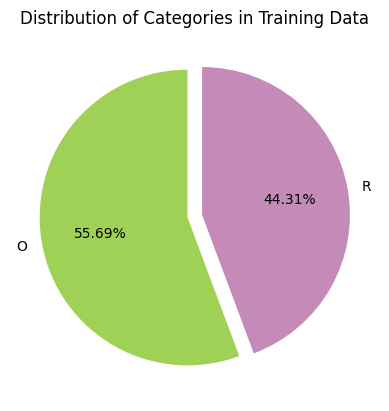

In [8]:
# Generate the pie chart only if data is available
if not data.label.value_counts().empty:
    value_counts = data.label.value_counts()  # Get category counts
    labels = value_counts.index.tolist()  # Extract labels dynamically
    colors = ['#a0d157', '#c48bb8', '#f4a261', '#2a9d8f', '#e76f51'][:len(labels)]  # Adjust colors dynamically
    explode = [0.05] * len(labels)  # Create explode values dynamically

    plt.pie(value_counts, labels=labels, autopct='%0.2f%%', colors=colors, startangle=90, explode=explode)
    plt.title("Distribution of Categories in Training Data")
    plt.show()
else:
    print("No data available to plot!")